In [1773]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cat
import ngboost as ng
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import *
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings(action='ignore')

In [1774]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\test.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\HackerEarth-Machine-Learning-Challenge-Carnival-Wars\sample_submission.csv')
prd_id = test.Product_id
train.rename({'charges_2 (%)':'charges_2'},inplace=True,axis=1)
test.rename({'charges_2 (%)':'charges_2'},inplace=True,axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1775]:
z = np.copy(test.Product_id)
train_samp = pd.DataFrame(np.copy(train),columns=train.columns)
test_samp = pd.DataFrame(np.copy(test),columns=test.columns)

In [1776]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

In [1777]:
test.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  SCHE4YSTDVPVZVXW      39.0  2016-01-13 07:45:08.000              205   
1  ACCEGCATKHNRXUHW      49.0  2015-08-23 20:37:05.000                3   
2  NKCE6GJ5XVJDXNNZ       1.0  2015-11-14 18:12:39.000              183   
3  NKCEB8BK3ZXDHDHM       8.0  2015-11-21 04:56:19.000              358   
4  TOPEFDXSAHRNPF94      33.0  2015-05-06 15:09:46.000              167   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0        Ivanka              No           Fashion      0      90   
1         Isaak              Yes          Fashion      0      87   
2      Analiese              No        Technology      2      55   
3         Rusty              Yes       Child_care      3      86   
4        Eloise              No        Technology      0      27   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  
0               0      380.0       16.0         2576.0           3340  
1               0      393.0       16.0         1202.0           1955  
2               0      493.0        9.0         7175.0          15715  
3               0      303.0       16.0         5404.0          13078  
4               0      567.0       16.0         4069.0           6244

In [1778]:
sample.head()

Product_id  Selling_Price
0  SCHE4YSTDVPVZVXW    3294.594688
1  ACCEGCATKHNRXUHW    1945.603968
2  NKCE6GJ5XVJDXNNZ   11871.830880
3  NKCEB8BK3ZXDHDHM    9421.143424
4  TOPEFDXSAHRNPF94    5717.420625

In [1779]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
Product_id          6368 non-null object
Stall_no            6363 non-null float64
instock_date        6368 non-null object
Market_Category     6368 non-null int64
Customer_name       6157 non-null object
Loyalty_customer    6368 non-null object
Product_Category    6368 non-null object
Grade               6368 non-null int64
Demand              6368 non-null int64
Discount_avail      6330 non-null float64
charges_1           6170 non-null float64
charges_2           6163 non-null float64
Minimum_price       6330 non-null float64
Maximum_price       6025 non-null float64
Selling_Price       6327 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.3+ KB


In [1780]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
Product_id          3430 non-null object
Stall_no            3429 non-null float64
instock_date        3430 non-null object
Market_Category     3430 non-null int64
Customer_name       3377 non-null object
Loyalty_customer    3430 non-null object
Product_Category    3430 non-null object
Grade               3430 non-null int64
Demand              3430 non-null int64
Discount_avail      3430 non-null int64
charges_1           3394 non-null float64
charges_2           3425 non-null float64
Minimum_price       3416 non-null float64
Maximum_price       3430 non-null int64
dtypes: float64(4), int64(5), object(5)
memory usage: 375.2+ KB


In [1781]:
train.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  6363.000000      6368.000000  6368.000000  6368.000000     6330.000000   
mean     25.309445       199.340609     0.643687    50.921168        0.140442   
std      14.328980       170.275570     1.025092    29.091922        0.347473   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      25.000000       132.000000     0.000000    51.000000        0.000000   
75%      37.000000       403.000000     2.000000    76.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1    charges_2  Minimum_price  Maximum_price  Selling_Price  
count  6170.000000  6163.000000    6330.000000    6025.000000    6327.000000  
mean    264.514100    10.146195    3531.349763    6432.545892    4563.242592  
std     124.483056     4.318339    2194.729604    3716.177364    2979.102408  
min     100.000000     1.000000       1.000000     404.000000   -6062.470000  
25%     163.000000     7.000000    1879.250000    3918.000000    2450.005280  
50%     252.000000    10.000000    3157.500000    5634.000000    4210.384640  
75%     314.000000    14.000000    4697.000000    8126.000000    6167.643252  
max     649.000000    17.000000   17580.000000   58812.000000   22638.325941

In [1782]:
test.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  3429.000000      3430.000000  3430.000000  3430.000000     3430.000000   
mean     25.633421       196.693878     0.667638    49.917493        0.146356   
std      14.389747       168.832500     1.045914    28.587214        0.353514   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      26.000000       124.000000     0.000000    50.000000        0.000000   
75%      38.000000       358.000000     2.000000    74.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1    charges_2  Minimum_price  Maximum_price  
count  3394.000000  3425.000000    3416.000000    3430.000000  
mean    265.484973    10.436204    3444.206089    6234.062391  
std     125.325455     4.232382    2178.418557    3575.968650  
min     100.000000     1.000000     124.000000     163.000000  
25%     162.000000     7.000000    1834.000000    3819.000000  
50%     252.000000    11.000000    3060.500000    5431.000000  
75%     319.000000    14.000000    4606.500000    7796.500000  
max     648.000000    17.000000   17182.000000   27954.000000

In [1783]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2           205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [1784]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2            5
Minimum_price       14
Maximum_price        0
dtype: int64

### Label Analysis

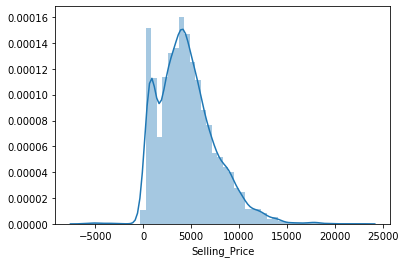

In [1785]:
sns.distplot(train.Selling_Price)

In [1786]:
train.drop(index=train[train.Selling_Price>20000].index,inplace=True)
train.reset_index(drop=True,inplace=True)

for i in range(train.shape[0]):
    if((train.loc[i,'Selling_Price']>train.loc[i,'Minimum_price']) and (train.loc[i,'Selling_Price']<train.loc[i,'Maximum_price'])):
        pass
    else:
        train.loc[i,'Selling_Price'] = train.loc[i,'Selling_Price'] * 10

In [1787]:
#l = list(train[train.Selling_Price<train.Minimum_price].Selling_Price.index)
#for i in l:
#    train.loc[i,'Selling_Price'] = train.loc[i,'Minimum_price']

In [1788]:
#l = list(train[train.Selling_Price>train.Maximum_price].Selling_Price.index)
#for i in l:
    #train.loc[i,'Selling_Price'] = train.loc[i,'Maximum_price']

In [1789]:
train.drop(index=train[train.Selling_Price<0].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [1790]:
#train[train.Selling_Price>train.Maximum_price].Selling_Price = train[train.Selling_Price>train.Maximum_price].Maximum_price 

In [1791]:
train.Selling_Price = train.Selling_Price.apply(lambda x: x if x>=0 else x*(-1))

In [1792]:
train.Selling_Price.isnull().sum()

41

a = train[train.Selling_Price.isnull()]
b.dropna(inplace=True)
l1 = np.log(b.Selling_Price)


b.Selling_Price = b.Selling_Price.apply(lambda x: x if x>=0 else x*(-1))
b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']] = b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']].astype('float')

xtrain,xtest,ytrain,ytest = train_test_split(b[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']],b.Selling_Price,test_size=0.3,random_state=8011)

m = lgb.LGBMRegressor(random_state=10070)
m.fit(xtrain,ytrain)
i_prd = m.predict(xtest)
np.sqrt(mean_squared_log_error(ytest,i_prd))

a.drop(columns=['Selling_Price'],inplace=True)

a.Maximum_price.fillna(a.Maximum_price.median(),inplace=True)
a.Minimum_price.fillna(a.Minimum_price.median(),inplace=True)
a.Discount_avail.fillna(a.Discount_avail.median(),inplace=True)
a.charges_2.fillna(a.charges_2.median(),inplace=True)

a['Selling_Price'] = m.predict(a[['Discount_avail','charges_1','charges_2','Minimum_price','Maximum_price']])
l = a.Selling_Price.index
for i in l:
    train.loc[i,'Selling_Price'] = a.loc[i,'Selling_Price']

In [1793]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       210
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           197
charges_2           205
Minimum_price        38
Maximum_price       342
Selling_Price        41
dtype: int64

In [1794]:
#train.isnull().sum()

In [1795]:
train.drop(index = train[train.Selling_Price.isnull()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [1796]:
#train.Selling_Price.fillna(train.Selling_Price.median(),inplace=True)

In [1797]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0  BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1  TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2  BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3  WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4  JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

## Feature by Feature Analysis

### Product ID

In [1798]:
train.Product_id = train.Product_id.apply(lambda x: [i for i in x][:5])
test.Product_id = test.Product_id.apply(lambda x: [i for i in x][:5])

In [1799]:
train.Product_id = train.Product_id.apply(lambda x: ''.join(x))
test.Product_id = test.Product_id.apply(lambda x: ''.join(x))

In [1800]:
l = list(set(train.Product_id).difference(test.Product_id))
m = list(set(test.Product_id).difference(train.Product_id))

In [1801]:
train.Product_id = train.Product_id.apply(lambda x: x  if x not in l else 'other')
test.Product_id = test.Product_id.apply(lambda x: x  if x not in m else 'other')

In [1802]:
train.Product_id.nunique(), test.Product_id.nunique()

(551, 551)

In [1803]:
z

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

### Stall no.

In [1804]:
test.Stall_no.nunique()

50

In [1805]:
train.Stall_no.isnull().sum(), test.Stall_no.isnull().sum()

(5, 1)

In [1806]:
train.Stall_no.fillna(20.0, inplace=True) #20
test.Stall_no.fillna(12.0,inplace=True)   #12

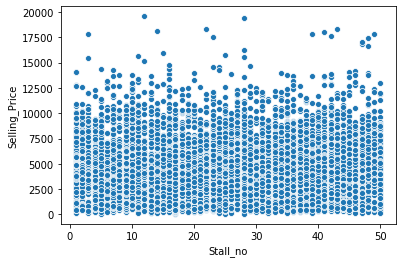

In [1807]:
sns.scatterplot(train.Stall_no,train.Selling_Price)

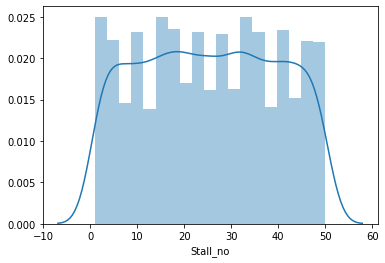

In [1808]:
sns.distplot(train.Stall_no)

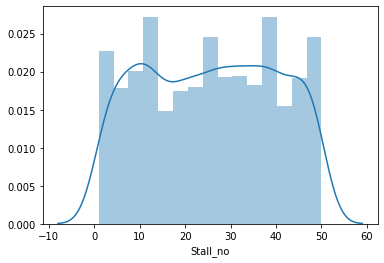

In [1809]:
sns.distplot(test.Stall_no)

### In Stock date

In [1810]:
#train['Date'] = train.instock_date.str.split(' ').apply(lambda x: x[0])
#test['Date'] = test.instock_date.str.split(' ').apply(lambda x: x[0])

In [1811]:
#train['Time'] = train.instock_date.str.split(' ').apply(lambda x: x[1])
#test['Time'] = test.instock_date.str.split(' ').apply(lambda x: x[1])

In [1812]:
#train['Hour'] = train.Time.str.split(':').apply(lambda x: x[0])
#test['Hour'] = test.Time.str.split(':').apply(lambda x: x[0])

#train['Minute'] = train.Time.str.split(':').apply(lambda x: x[1])
#test['Minute'] = test.Time.str.split(':').apply(lambda x: x[1])

#train['Second'] = train.Time.str.split(':').apply(lambda x: x[2])
#test['Second'] = test.Time.str.split(':').apply(lambda x: x[2])

In [1813]:
#train.drop(columns=['instock_date','Time'],inplace = True)
#test.drop(columns=['instock_date','Time'],inplace = True)

In [1814]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0      BRAE2      37.0  2015-08-22 18:36:12.000                2   
1      TUNE8      38.0  2016-03-27 21:19:13.000               24   
2      BRAEA       9.0  2015-08-18 19:25:22.000              447   
3      WATDZ      50.0  2016-03-28 21:53:01.000               23   
4      JWSEB       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

### Market Category

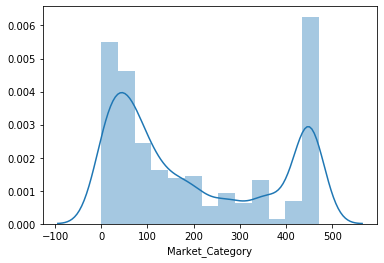

In [1815]:
sns.distplot(train.Market_Category)

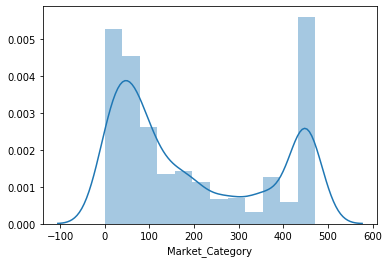

In [1816]:
sns.distplot(test.Market_Category)

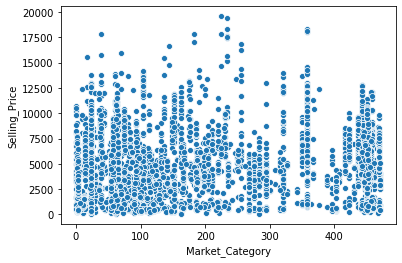

In [1817]:
sns.scatterplot(train.Market_Category,train.Selling_Price)

### Customer Name

In [1818]:
train.Customer_name.nunique(),test.Customer_name.nunique()

(5853, 3319)

In [1819]:
#train.drop(columns=['Customer_name'],inplace=True)
#test.drop(columns=['Customer_name'],inplace=True)

### Loyalty Customer

In [1820]:
train.Loyalty_customer.value_counts(), test.Loyalty_customer.value_counts()

(Yes    3850
 No     2461
 Name: Loyalty_customer, dtype: int64,
 Yes    2087
 No     1343
 Name: Loyalty_customer, dtype: int64)

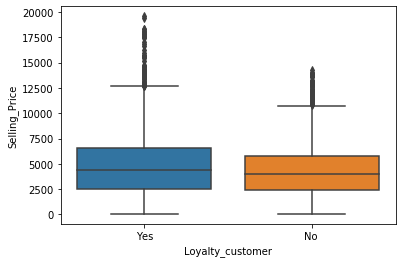

In [1821]:
sns.boxplot(train.Loyalty_customer,train.Selling_Price)

### Product Category

In [1822]:
train.Product_Category.value_counts()

Pet_care       674
Repair         665
Child_care     652
Cosmetics      643
Hospitality    626
Organic        618
Technology     616
Home_decor     609
Educational    605
Fashion        603
Name: Product_Category, dtype: int64

In [1823]:
test.Product_Category.value_counts()

Educational    355
Cosmetics      348
Child_care     348
Pet_care       346
Fashion        345
Repair         345
Technology     340
Home_decor     340
Organic        336
Hospitality    327
Name: Product_Category, dtype: int64

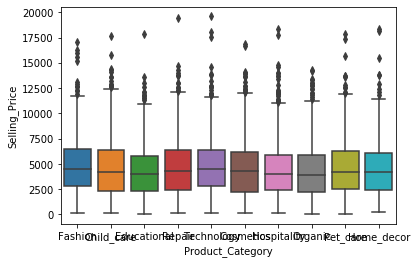

In [1824]:
sns.boxplot(train.Product_Category,train.Selling_Price)

### Grade

In [1825]:
train.Grade.value_counts()

0    4337
2    1093
3     502
1     379
Name: Grade, dtype: int64

In [1826]:
z

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

In [1827]:
test.Grade.value_counts()

0    2335
2     595
3     300
1     200
Name: Grade, dtype: int64

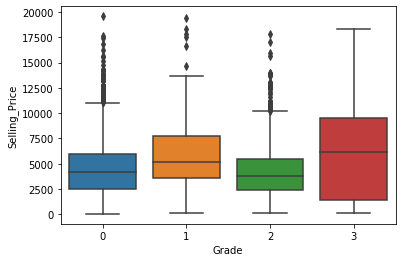

In [1828]:
sns.boxplot(train.Grade,train.Selling_Price)

### Demand

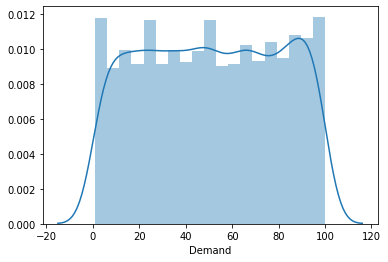

In [1829]:
sns.distplot(train.Demand)

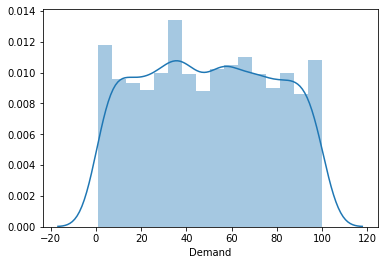

In [1830]:
sns.distplot(test.Demand)

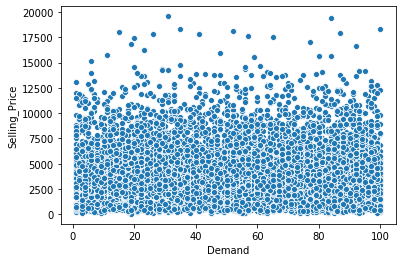

In [1831]:
sns.scatterplot(train.Demand,train.Selling_Price)

### Discount Avail

In [1832]:
train.Discount_avail.value_counts()

0.0    5394
1.0     880
Name: Discount_avail, dtype: int64

In [1833]:
#train.Discount_avail.fillna(1.0,inplace=True)

In [1834]:
train.drop(index = train[train.Discount_avail.isnull()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [1835]:
#train.Discount_avail.fillna(0.0,inplace=True)

In [1836]:
test.Discount_avail.value_counts()

0    2928
1     502
Name: Discount_avail, dtype: int64

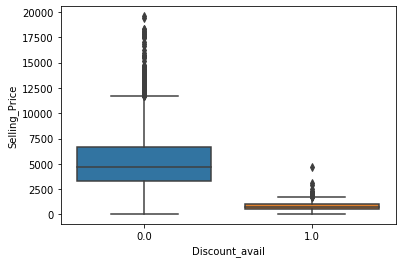

In [1837]:
sns.boxplot(train.Discount_avail,train.Selling_Price)

### Charges_1

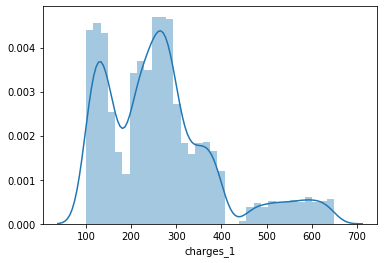

In [1838]:
sns.distplot(train.charges_1)

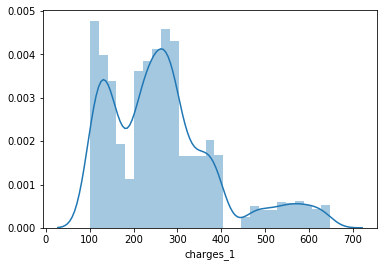

In [1839]:
sns.distplot(test.charges_1)

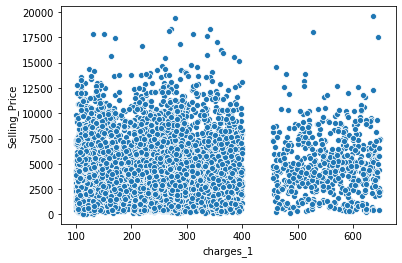

In [1840]:
sns.scatterplot(train.charges_1,train.Selling_Price)

In [1841]:
#train.drop(train[train.charges_1.isnull()].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [1842]:
#train.charges_1.fillna(train.charges_1.median(),inplace=True)
#test.charges_1.fillna(test.charges_1.median(),inplace=True)
# here also

### Charges_2(%)

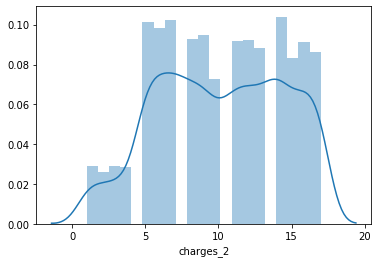

In [1843]:
sns.distplot(train.charges_2)

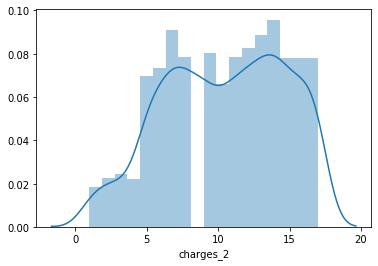

In [1844]:
sns.distplot(test.charges_2)

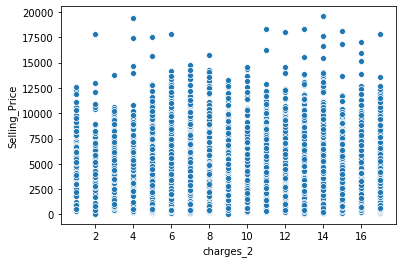

In [1845]:
sns.scatterplot(train.charges_2,train.Selling_Price)

In [1846]:
#train.charges_2.fillna(train.charges_2.median(),inplace=True)
#test.charges_2.fillna(test.charges_2.median(),inplace=True)
## here also

### Minimum price

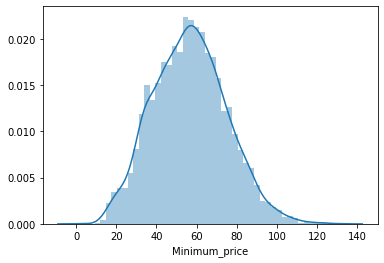

In [1847]:
sns.distplot(np.sqrt(train.Minimum_price))

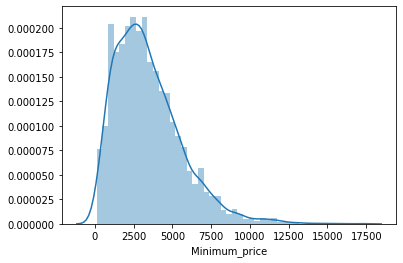

In [1848]:
sns.distplot(test.Minimum_price)

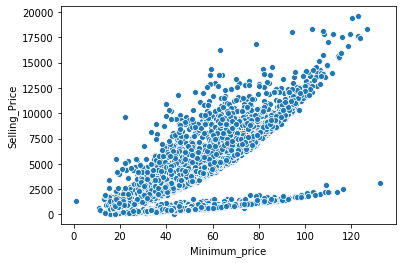

In [1849]:
sns.scatterplot(np.sqrt(train.Minimum_price),train.Selling_Price)

In [1850]:
#train.Minimum_price.fillna(train.Minimum_price.median(),inplace=True)
#test.Minimum_price.fillna(test.Minimum_price.median(),inplace=True)
## removed already but fillinf with df once

### Maximum Price

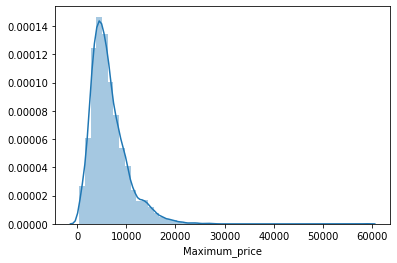

In [1851]:
sns.distplot((train.Maximum_price))

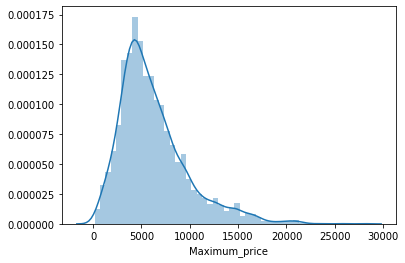

In [1852]:
sns.distplot((test.Maximum_price))

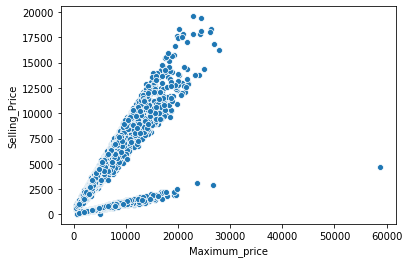

In [1853]:
sns.scatterplot(train.Maximum_price,train.Selling_Price)

In [1854]:
train.drop(index = train[train.Maximum_price==train.Maximum_price.max()].index, inplace=True)
train.reset_index(drop=True,inplace=True)

In [1855]:
#train.Maximum_price.fillna(train.Maximum_price.median(),inplace=True)

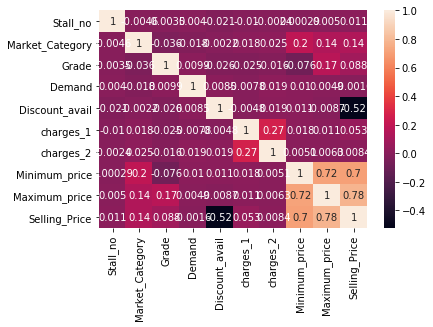

In [1856]:
sns.heatmap(train.corr(),annot=True)

### Feature  Engg.

In [1857]:
train.head()

Product_id  Stall_no             instock_date  Market_Category  \
0      BRAE2      37.0  2015-08-22 18:36:12.000                2   
1      TUNE8      38.0  2016-03-27 21:19:13.000               24   
2      BRAEA       9.0  2015-08-18 19:25:22.000              447   
3      WATDZ      50.0  2016-03-28 21:53:01.000               23   
4      JWSEB       7.0  2016-03-29 22:58:53.000               63   

  Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0      Lillyann              Yes          Fashion      1      68   
1         Klynn              Yes          Fashion      0      51   
2         Ridge              Yes       Child_care      0      10   
3         Abran              Yes      Educational      2      48   
4        Dustyn              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2  Minimum_price  Maximum_price  \
0             0.0      376.0       11.0         2983.0         4713.0   
1             0.0      397.0       12.0         7495.0        10352.0   
2             0.0      250.0        9.0         5752.0         7309.0   
3             0.0      144.0       13.0         5090.0        20814.0   
4             1.0      211.0        4.0         2430.0         9261.0   

   Selling_Price  
0    4185.947700  
1    9271.490256  
2    6785.701362  
3   13028.917824  
4     906.553935

In [1858]:
#train.drop(train.Minimum_price[np.log(train.Minimum_price)<5].index,inplace=True)
#train.reset_index(drop=True,inplace=True)

In [1859]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [1860]:
df.Maximum_price.fillna(df.Maximum_price.median(),inplace=True)
df.Minimum_price.fillna(df.Minimum_price.median(),inplace=True)
df.charges_2.fillna(df.charges_2.median(),inplace=True)
df.charges_1.fillna(df.charges_1.median(),inplace=True)

In [1861]:
df.head()

Customer_name  Demand  Discount_avail  Grade Loyalty_customer  \
0      Lillyann      68             0.0      1              Yes   
1         Klynn      51             0.0      0              Yes   
2         Ridge      10             0.0      0              Yes   
3         Abran      48             0.0      2              Yes   
4        Dustyn      35             1.0      1              Yes   

   Market_Category  Maximum_price  Minimum_price Product_Category Product_id  \
0                2         4713.0         2983.0          Fashion      BRAE2   
1               24        10352.0         7495.0          Fashion      TUNE8   
2              447         7309.0         5752.0       Child_care      BRAEA   
3               23        20814.0         5090.0      Educational      WATDZ   
4               63         9261.0         2430.0           Repair      JWSEB   

   Selling_Price  Stall_no  charges_1  charges_2             instock_date  
0    4185.947700      37.0      376.0       11.0  2015-08-22 18:36:12.000  
1    9271.490256      38.0      397.0       12.0  2016-03-27 21:19:13.000  
2    6785.701362       9.0      250.0        9.0  2015-08-18 19:25:22.000  
3   13028.917824      50.0      144.0       13.0  2016-03-28 21:53:01.000  
4     906.553935       7.0      211.0        4.0  2016-03-29 22:58:53.000

In [1862]:
#cat_col = ['Discount_avail','Grade','Loyalty_customer','Product_Category','Product_id']
#num_col = ['Demand','Maximum_price','Minimum_price','charges_1','charges_2']
#all_col = df.drop(columns=['instock_date','Selling_Price','Customer_name','Maximum_price','Minimum_price']).columns
#for i in cat_col:
#    for j in cat_col:
#        for k in num_col:
#            if(i==j):
#                pass
#            else:
#                df[i+' '+j+'meaned'+k] = df.drop(columns=['instock_date','Selling_Price','Customer_name']).groupby([i,j])[k].transform('mean')

In [1863]:
df.head()

Customer_name  Demand  Discount_avail  Grade Loyalty_customer  \
0      Lillyann      68             0.0      1              Yes   
1         Klynn      51             0.0      0              Yes   
2         Ridge      10             0.0      0              Yes   
3         Abran      48             0.0      2              Yes   
4        Dustyn      35             1.0      1              Yes   

   Market_Category  Maximum_price  Minimum_price Product_Category Product_id  \
0                2         4713.0         2983.0          Fashion      BRAE2   
1               24        10352.0         7495.0          Fashion      TUNE8   
2              447         7309.0         5752.0       Child_care      BRAEA   
3               23        20814.0         5090.0      Educational      WATDZ   
4               63         9261.0         2430.0           Repair      JWSEB   

   Selling_Price  Stall_no  charges_1  charges_2             instock_date  
0    4185.947700      37.0      376.0       11.0  2015-08-22 18:36:12.000  
1    9271.490256      38.0      397.0       12.0  2016-03-27 21:19:13.000  
2    6785.701362       9.0      250.0        9.0  2015-08-18 19:25:22.000  
3   13028.917824      50.0      144.0       13.0  2016-03-28 21:53:01.000  
4     906.553935       7.0      211.0        4.0  2016-03-29 22:58:53.000

In [1864]:
#df.groupby(['Discount_avail','Loyalty_customer'])['Maximum_price'].agg('sum')

In [1865]:
df['Sum'] = (df.Maximum_price**2) + (df.Minimum_price**2)
df['Diff_price'] = df.Maximum_price - df.Minimum_price
df['Mean_price'] = (df.Maximum_price + df.Minimum_price)/2
df['Mean_price_charged'] = (df.Maximum_price + df.Minimum_price) - df.charges_1
#df['Price_ratio'] = np.sqrt((df.Maximum_price**2) / (df.Minimum_price**2))
df['Date'] = df.instock_date.str.split(' ').apply(lambda x: x[0])
df.Date = pd.to_datetime(df.Date)
df['Max-price_per-demand'] = df.Maximum_price/df.Demand
df['Min-price_per-demand'] = df.Minimum_price/df.Demand
df['Total-price_per-demand'] = df.Sum/df.Demand


In [1866]:
#df.groupby(['Demand'])[['Minimum_price']].agg(('count','min','max','mean'))
#df['Demand_count_price_count'] = df.groupby(['Grade'])[['Sum']].transform('count')
#df['Demand_min_price_min'] = df.groupby(['Grade'])[['Sum']].transform('min')
#df['Demand_max_price_max'] = df.groupby(['Grade'])[['Sum']].transform('max')
#df['Demand_sum_price_sum'] = df.groupby(['Grade'])[['Sum']].transform('sum')

#df['Demand_max_price_count'] = df.groupby(['Demand'])[['Maximum_price']].transform('count')
#df['Demand_max_price_min'] = df.groupby(['Demand'])[['Maximum_price']].transform('min')
#df['Demand_max_price_max'] = df.groupby(['Demand'])[['Maximum_price']].transform('max')
#df['Demand_max_price_sum'] = df.groupby(['Demand'])[['Maximum_price']].transform('sum')

In [1867]:
df['Weekday'] = df.Date.dt.weekday
df['Day'] = df.Date.dt.day
#df['quarter'] = df.Date.dt.quarter
#df['year'] = df.Date.dt.year
df['DOY'] = df.Date.dt.dayofyear
df['WOY'] = df.Date.dt.weekofyear
df['DIM'] = df.Date.dt.daysinmonth
df['Month'] = df.Date.dt.month
#df['Is_weekend'] = np.where(df.Date.dt.dayofweek==6,1,0)
df['WeekDay_name'] = df.Date.dt.weekday_name

In [1868]:
df['Time'] = df.instock_date.str.split(' ').apply(lambda x: x[1])
#df['Hour'] = df.Time.str.split(':').apply(lambda x: int(x[0]))
df['Minute'] = df.Time.str.split(':').apply(lambda x: int(x[1]))
df['Second'] = df.Time.str.split(':').apply(lambda x: float(x[2]))

#df.Hour = df.Hour + (df.Minute/60) + (df.Second/3600)

In [1869]:
df.head()

Customer_name  Demand  Discount_avail  Grade Loyalty_customer  \
0      Lillyann      68             0.0      1              Yes   
1         Klynn      51             0.0      0              Yes   
2         Ridge      10             0.0      0              Yes   
3         Abran      48             0.0      2              Yes   
4        Dustyn      35             1.0      1              Yes   

   Market_Category  Maximum_price  Minimum_price Product_Category Product_id  \
0                2         4713.0         2983.0          Fashion      BRAE2   
1               24        10352.0         7495.0          Fashion      TUNE8   
2              447         7309.0         5752.0       Child_care      BRAEA   
3               23        20814.0         5090.0      Educational      WATDZ   
4               63         9261.0         2430.0           Repair      JWSEB   

   Selling_Price  Stall_no  charges_1  charges_2             instock_date  \
0    4185.947700      37.0      376.0       11.0  2015-08-22 18:36:12.000   
1    9271.490256      38.0      397.0       12.0  2016-03-27 21:19:13.000   
2    6785.701362       9.0      250.0        9.0  2015-08-18 19:25:22.000   
3   13028.917824      50.0      144.0       13.0  2016-03-28 21:53:01.000   
4     906.553935       7.0      211.0        4.0  2016-03-29 22:58:53.000   

           Sum  Diff_price  Mean_price  Mean_price_charged       Date  \
0   31110658.0      1730.0      3848.0              7320.0 2015-08-22   
1  163338929.0      2857.0      8923.5             17450.0 2016-03-27   
2   86506985.0      1557.0      6530.5             12811.0 2015-08-18   
3  459130696.0     15724.0     12952.0             25760.0 2016-03-28   
4   91671021.0      6831.0      5845.5             11480.0 2016-03-29   

   Max-price_per-demand  Min-price_per-demand  Total-price_per-demand  \
0             69.308824             43.867647            4.575097e+05   
1            202.980392            146.960784            3.202724e+06   
2            730.900000            575.200000            8.650698e+06   
3            433.625000            106.041667            9.565223e+06   
4            264.600000             69.428571            2.619172e+06   

   Weekday  Day  DOY  WOY  DIM  Month WeekDay_name          Time  Minute  \
0        5   22  234   34   31      8     Saturday  18:36:12.000      36   
1        6   27   87   12   31      3       Sunday  21:19:13.000      19   
2        1   18  230   34   31      8      Tuesday  19:25:22.000      25   
3        0   28   88   13   31      3       Monday  21:53:01.000      53   
4        1   29   89   13   31      3      Tuesday  22:58:53.000      58   

   Second  
0    12.0  
1    13.0  
2    22.0  
3     1.0  
4    53.0

df['Disc_day_month_year_maxpr_sum'] = df.groupby(['Discount_avail','Day','Month','year'])[['Maximum_price']].transform('sum')
df['Disc_day_month_year_minpr_sum'] = df.groupby(['Discount_avail','Day','Month','year'])[['Minimum_price']].transform('sum')

In [1870]:
#df[['Dis_Grad_Mar_Max_mean', 'Dis_Grad_Mar_Min_mean']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('mean')
#df[['Dis_Grad_Mar_Max_std', 'Dis_Grad_Mar_Min_std']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('std')
#df[['Dis_Grad_Mar_Max_count', 'Dis_Grad_Mar_Min_count']] = df.groupby(['Discount_avail','Grade','Market_Category'])[['Maximum_price','Minimum_price']].transform('count')

#df['Disc_in_week_sum'] = df.groupby(['Discount_avail','Weekday'])['Selling_Price'].transform('sum')
#df['Disc_in_week_std'] = df.groupby(['Discount_avail','Weekday'])['Selling_Price'].transform('std')
#df['Disc_in_week_count'] = df.groupby(['Discount_avail','Weekday'])['Product_id'].transform('count')

#df['Disc_in_weekend_sum'] = df.groupby(['Discount_avail','Is_weekend','Product_id'])['Selling_Price'].transform('sum')
#df['Disc_in_weekend_std'] = df.groupby(['Discount_avail','Is_weekend','Product_Category'])['Selling_Price'].transform('std')
#df['Disc_in_weekend_count'] = df.groupby(['Discount_avail','Is_weekend'])['Product_id'].transform('count')

#df['Disc_in_month_sum'] = df.groupby(['Discount_avail','Month','Product_id'])['Selling_Price'].transform('sum')
#df['Disc_in_month_count'] = df.groupby(['Discount_avail','Month'])['Product_id'].transform('count')
#df['Disc_in_month_mean'] = df.groupby(['Discount_avail','Month'])['Selling_Price'].transform('mean')


In [1871]:
#df['Month-discount-loyal-demand_count'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('count')
#df['Month-discount-loyal-demand_max'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('max')
#df['Month-discount-loyal-demand_min'] = df.groupby(['Month','Grade','Discount_avail'])[['Demand']].transform('min')

#df['Month-discount-loyal-mxp_count'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('count')
#df['Month-discount-loyal-mxp_max'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('max')
#df['Month-discount-loyal-mxp_min'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('min')
#df['Month-discount-loyal-mxp_mean'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('mean')
#df['Month-discount-loyal-mxp_std'] = df.groupby(['Month','Grade','Discount_avail'])[['Maximum_price']].transform('std')

#df['Month-discount-max_Price-mxp_count'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('count')
#df['Month-discount-max_Price-mxp_max'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('max')
#df['Month-discount-max_Price-mxp_min'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('min')
#df['Month-discount-max_Price-mxp_mean'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('mean')
#df['Month-discount-max_Price-mxp_std'] = df.groupby(['Discount_avail','Grade','Month'])[['Maximum_price']].transform('std')

In [1872]:
#df['Prd_cat_Max_pr_mean']=df.groupby(['Product_Category'])['Mean_price'].transform('mean')
#df['Prd_cat_Max_pr_max']=df.groupby(['Product_Category'])['Maximum_price'].transform('max')
#df['Prd_cat_Max_pr_min']=df.groupby(['Product_Category'])['Maximum_price'].transform('min')
#df['Prd_cat_Max_pr_count']=df.groupby(['Product_Category'])['Maximum_price'].transform('count')

#df['Prd_cat_Min_pr_mean']=df.groupby(['Product_Category'])['Minimum_price'].transform('mean')
#df['Prd_cat_Min_pr_med']=df.groupby(['Product_Category'])['Minimum_price'].transform('median')
#df['Prd_cat_Min_pr_max']=df.groupby(['Product_Category'])['Minimum_price'].transform('max')
#df['Prd_cat_Min_pr_min']=df.groupby(['Product_Category'])['Minimum_price'].transform('min')
#df['Prd_cat_Min_pr_count']=df.groupby(['Product_Category'])['Minimum_price'].transform('count')

#df['Prd_cat_Max_pr_mean']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('mean')
#df['Prd_cat_Max_pr_max']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('max')
#df['Prd_cat_Max_pr_min']=df.groupby(['Loyalty_customer'])['Maximum_price'].transform('min')
#df['Prd_cat_Max_pr_count']=df.groupby(['Loyalty_customer'])['Market_Category'].transform('count')

#df['Stall_cat_Min_pr_mean']=df.groupby(['Stall_no'])['Mean_price'].transform('mean')
#df['Stall_cat_Min_pr_max']=df.groupby(['Stall_no'])['Mean_price'].transform('max')
#df['Stall_cat_Min_pr_min']=df.groupby(['Stall_no'])['Mean_price'].transform('min')
#df['Stall_cat_Min_pr_count']=df.groupby(['Market_Category'])['Loyalty_customer'].transform('count')

#df['Stall_cat_Max_pr_mean']=df.groupby(['Discount_avail'])['Sum'].transform('mean')
#df['Stall_cat_Max_pr_max']=df.groupby(['Discount_avail'])['Sum'].transform('max')
#df['Stall_cat_Max_pr_min']=df.groupby(['Discount_avail'])['Sum'].transform('min')
#df['Stall_cat_Max_pr_count']=df.groupby(['Discount_avail'])['Sum'].transform('count')

In [1873]:
df['Charged_max_price'] = df.Maximum_price-(df.charges_1 + (df.charges_2*df.Maximum_price/100))
df['Charged_min_price'] = df.Minimum_price -(df.charges_1 + (df.charges_2*df.Minimum_price/100))
df['Total-charges'] = df.charges_1 + (df.charges_2/100)
df['Diff_Max_price'] = df.Maximum_price - df.Charged_max_price
df['Diff_Sum_price'] = df.Sum - df['Total-charges']
df['Min-Max_ratio'] = df.Maximum_price/df.Minimum_price
df['Charged_ratio'] = df.Charged_max_price/df.Charged_min_price
#df.Maximum_price = np.sqrt(df.Maximum_price)
#df.Minimum_price = np.sqrt(df.Minimum_price)

In [1874]:
df['Prd_cat_Min_pr_mean']=df.groupby(['Product_id'])['Minimum_price'].transform('mean')
df['Prd_cat_Min_pr_max']=df.groupby(['Product_id'])['Minimum_price'].transform('max')
df['Prd_cat_Min_pr_min']=df.groupby(['Product_id'])['Minimum_price'].transform('min')
df['Prd_cat_Min_pr_count']=df.groupby(['Product_id'])['Minimum_price'].transform('count')
df['Prd_cat_Min_pr_median']=df.groupby(['Product_id'])['Minimum_price'].transform('median')


df['Market_Loyal_pr_count']=df.groupby(['Market_Category'])['Loyalty_customer'].transform('count')
df['Product_Loyal_pr_count']=df.groupby(['Product_Category'])['Loyalty_customer'].transform('count')
df['Discount_Loyal_pr_count']=df.groupby(['Discount_avail'])['Loyalty_customer'].transform('count')
df['Id_Loyal_pr_count']=df.groupby(['Product_id'])['Loyalty_customer'].transform('count')


In [1875]:
#a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('median').values
#b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('median').values
#df['grade_min_max_medProduct_Category_ratio'] = b/a

#a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('mean').values
#b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('mean').values
#df['grade_min_max_meanProduct_Category_ratio'] = b/a

#a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('max').values
#b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('max').values
#df['grade_min_max_maxProduct_Category_ratio'] = b/a

#a = df.groupby(['Grade','Product_Category'])[['Maximum_price']].transform('min').values
#b = df.groupby(['Grade','Product_Category'])[['Minimum_price']].transform('min').values
#df['grade_min_max_minProduct_Category_ratio'] = b/a

a = df.groupby('Discount_avail')[['Maximum_price']].transform('median').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('median').values
c = df.groupby('Discount_avail')[['charges_1']].transform('median').values
d = df.groupby('Discount_avail')[['charges_2']].transform('median').values
e = df.groupby('Discount_avail')[['Sum']].transform('median').values
f = df.groupby('Discount_avail')[['Diff_price']].transform('median').values
#df['Discount_Min_Max_median_sum'] = a+b 
df['Discount_avail_min_max_med_ratio'] = b/a
df['Disc_charge_median_dif'] = c-d
df['Dif_Dif_median_rat'] = f/e

a = df.groupby('Discount_avail')[['Maximum_price']].transform('mean').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('mean').values
c = df.groupby('Discount_avail')[['charges_1']].transform('mean').values
d = df.groupby('Discount_avail')[['charges_2']].transform('mean').values
#df['Discount_Min_Max_mean_sum'] = a+b 
df['Discount_avail_min_max_mean_ratio'] = b/a
df['Disc_charge_mean_dif'] = c-(d/100)
e = df.groupby('Discount_avail')[['Maximum_price']].transform('mean').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('mean').values
df['Dif_Dif_mean_rat'] = f/e

a = df.groupby('Discount_avail')[['Maximum_price']].transform('sum').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('sum').values
c = df.groupby('Discount_avail')[['charges_1']].transform('sum').values
d = df.groupby('Discount_avail')[['charges_2']].transform('sum').values
#df['Discount_Min_Max_mean_sum'] = a+b 
df['Discount_avail_min_max_sum_ratio'] = b/a
df['Disc_charge_sum_dif'] = c-(d/100)
e = df.groupby('Discount_avail')[['Maximum_price']].transform('sum').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('sum').values
df['Dif_Dif_sum_rat'] = f/e


a = df.groupby('Discount_avail')[['Maximum_price']].transform('max').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('max').values
c = df.groupby('Discount_avail')[['charges_1']].transform('max').values
d = df.groupby('Discount_avail')[['charges_2']].transform('max').values
e = df.groupby('Discount_avail')[['Maximum_price']].transform('max').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('max').values
#df['Discount_Min_Max_Max_sum'] = a+b 
df['Dif_Dif_max_rat'] = f/e
df['Discount_avail_min_max_max_ratio'] = b/a
df['Disc_charge_max_dif'] = c-(d/100)


a = df.groupby('Discount_avail')[['Maximum_price']].transform('min').values
b = df.groupby('Discount_avail')[['Minimum_price']].transform('min').values
c = df.groupby('Discount_avail')[['charges_1']].transform('min').values
d = df.groupby('Discount_avail')[['charges_2']].transform('min').values
e = df.groupby('Discount_avail')[['Maximum_price']].transform('min').values
f = df.groupby('Discount_avail')[['Minimum_price']].transform('min').values
#df['Discount_min_max_min_sum'] = a+b 
df['Dif_Dif_min_rat'] = f/e
df['Discount_avail_min_max_min_ratio'] = b/a
#df['Disc_charge_min_dif'] = c-(d/100)



#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('median').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('median').values
#df['Product_Category_avail_min_max_med_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('mean').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('mean').values
#df['Product_Category_avail_min_max_mean_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('max').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('max').values
#df['Product_Category_avail_min_max_max_ratio'] = b/a

#a = df.groupby('Loyalty_customer')[['Maximum_price']].transform('min').values
#b = df.groupby('Loyalty_customer')[['Minimum_price']].transform('min').values
#df['Product_Category_avail_min_max_min_ratio'] = b/a



#df.Sum = df.Sum**0.2
#df.Mean_price = df.Mean_price**0.5
#df.Mean_price_charged = df.Mean_price_charged**0.5

df_samp = pd.DataFrame(np.copy(df),columns=df.columns)

df_samp['Diff_in_pr'] = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Fashion'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Fashion'].shift(1).Maximum_price
b = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Educational'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Educational'].shift(1).Maximum_price
c = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Cosmetics'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Cosmetics'].shift(1).Maximum_price
d = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Child_care'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Child_care'].shift(1).Maximum_price
e = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Pet_care'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Pet_care'].shift(1).Maximum_price
f = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Repair'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Repair'].shift(1).Maximum_price
g = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Technology'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Technology'].shift(1).Maximum_price
h = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Home_decor'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Home_decor'].shift(1).Maximum_price
m = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Organic'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Organic'].shift(1).Maximum_price
n = df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Hospitality'].Maximum_price - df_samp[df_samp.sort_values(by = ['instock_date']).Product_Category=='Hospitality'].shift(1).Maximum_price


for i in list(b.index):
    df_samp.loc[i,'Diff_in_pr'] = b.ix[i]
for i in list(c.index):
    df_samp.loc[i,'Diff_in_pr'] = c.ix[i]
for i in list(d.index):
    df_samp.loc[i,'Diff_in_pr'] = d.ix[i]
for i in list(e.index):
    df_samp.loc[i,'Diff_in_pr'] = e.ix[i]
for i in list(f.index):
    df_samp.loc[i,'Diff_in_pr'] = f.ix[i]
for i in list(g.index):
    df_samp.loc[i,'Diff_in_pr'] = g.ix[i]
for i in list(h.index):
    df_samp.loc[i,'Diff_in_pr'] = h.ix[i]
for i in list(m.index):
    df_samp.loc[i,'Diff_in_pr'] = m.ix[i]
for i in list(n.index):
    df_samp.loc[i,'Diff_in_pr'] = n.ix[i]

df_samp.Diff_in_pr.fillna(0,inplace=True)

df_samp[df_samp.Product_Category=='Technology'].sort_index(by='Date').sort_index(by='Product_Category')

df_samp.head()

df.sort_index(by='instock_date').sort_index(by='Product_Category')['Diff_in_max_price_next'] = df_samp.Diff_in_pr

df.head()

In [1876]:
df.Maximum_price = np.log(df.Maximum_price)
df.Minimum_price = np.sqrt(df.Minimum_price)

In [1877]:
#df = df.loc[:,~df.columns.duplicated()]

In [1878]:
df['Stall_Cust_count']=df.groupby(['Stall_no'])['Customer_name'].transform('count')

#df['Grade_sum_price_count'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('count')
#df['Grade_sum_price_min'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('min')#
#df['Grade_sum_price_max'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('max')#
df['Grade_sum_price_sum'] = df.groupby(['Discount_avail','Grade'])[['Sum']].transform('sum')

#df['Disc_sum_price_count'] = df.groupby(['Discount_avail','Grade'])[['Mean_price']].transform('count')
df['Disc_sum_price_min'] = df.groupby(['Discount_avail'])[['Mean_price']].transform('min')##
df['Disc_sum_price_max'] = df.groupby(['Discount_avail'])[['Mean_price']].transform('max')##
df['Disc_sum_price_sum'] = df.groupby(['Discount_avail','Grade'])[['Mean_price']].transform('sum')

#df = pd.concat([df,pd.get_dummies(df[['Market_Category']].astype('category'))],axis=1)

In [1879]:
le = LabelEncoder()
df.Loyalty_customer = le.fit_transform(df.Loyalty_customer)
df.Product_Category = le.fit_transform(df.Product_Category)
df.WeekDay_name = le.fit_transform(df.WeekDay_name)

In [1880]:
df.Product_id = le.fit_transform(df.Product_id)

In [1881]:
df.head()

Customer_name  Demand  Discount_avail  Grade  Loyalty_customer  \
0      Lillyann      68             0.0      1                 1   
1         Klynn      51             0.0      0                 1   
2         Ridge      10             0.0      0                 1   
3         Abran      48             0.0      2                 1   
4        Dustyn      35             1.0      1                 1   

   Market_Category  Maximum_price  Minimum_price  Product_Category  \
0                2       8.458080      54.616847                 3   
1               24       9.244935      86.573668                 3   
2              447       8.896862      75.841941                 0   
3               23       9.943381      71.344236                 2   
4               63       9.133567      49.295030                 8   

   Product_id  Selling_Price  Stall_no  charges_1  charges_2  \
0          54    4185.947700      37.0      376.0       11.0   
1         495    9271.490256      38.0      397.0       12.0   
2          62    6785.701362       9.0      250.0        9.0   
3         529   13028.917824      50.0      144.0       13.0   
4         182     906.553935       7.0      211.0        4.0   

              instock_date          Sum  Diff_price  Mean_price  \
0  2015-08-22 18:36:12.000   31110658.0      1730.0      3848.0   
1  2016-03-27 21:19:13.000  163338929.0      2857.0      8923.5   
2  2015-08-18 19:25:22.000   86506985.0      1557.0      6530.5   
3  2016-03-28 21:53:01.000  459130696.0     15724.0     12952.0   
4  2016-03-29 22:58:53.000   91671021.0      6831.0      5845.5   

   Mean_price_charged       Date  Max-price_per-demand  Min-price_per-demand  \
0              7320.0 2015-08-22             69.308824             43.867647   
1             17450.0 2016-03-27            202.980392            146.960784   
2             12811.0 2015-08-18            730.900000            575.200000   
3             25760.0 2016-03-28            433.625000            106.041667   
4             11480.0 2016-03-29            264.600000             69.428571   

   Total-price_per-demand  Weekday  Day  DOY  WOY  DIM  Month  WeekDay_name  \
0            4.575097e+05        5   22  234   34   31      8             2   
1            3.202724e+06        6   27   87   12   31      3             3   
2            8.650698e+06        1   18  230   34   31      8             5   
3            9.565223e+06        0   28   88   13   31      3             1   
4            2.619172e+06        1   29   89   13   31      3             5   

           Time  Minute  Second  Charged_max_price  Charged_min_price  \
0  18:36:12.000      36    12.0            3818.57            2278.87   
1  21:19:13.000      19    13.0            8712.76            6198.60   
2  19:25:22.000      25    22.0            6401.19            4984.32   
3  21:53:01.000      53     1.0           17964.18            4284.30   
4  22:58:53.000      58    53.0            8679.56            2121.80   

   Total-charges  Diff_Max_price  Diff_Sum_price  Min-Max_ratio  \
0         376.11          894.43    3.111028e+07       1.579953   
1         397.12         1639.24    1.633385e+08       1.381187   
2         250.09          907.81    8.650673e+07       1.270688   
3         144.13         2849.82    4.591306e+08       4.089194   
4         211.04          581.44    9.167081e+07       3.811111   

   Charged_ratio  Prd_cat_Min_pr_mean  Prd_cat_Min_pr_max  Prd_cat_Min_pr_min  \
0       1.675642          2606.166667              7945.0               448.0   
1       1.405601          3862.600000              7495.0               181.0   
2       1.284265          3015.269231              7805.0               485.0   
3       4.193026          4807.869565             17539.0               441.0   
4       4.090659          4510.461538             12018.0              1969.0   

   Prd_cat_Min_pr_count  Prd_cat_Min_pr_median  Market_Loyal_pr_count  \
0                    18   

In [1882]:
#df.drop(columns=['Loyalty_customer','Product_Category'],inplace=True)

### Modelling

In [1883]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
test.reset_index(drop=True,inplace=True)
label = np.log(train.Selling_Price)
test.drop(columns=['Selling_Price','Stall_no','Date','Time','instock_date','Customer_name','Minute','Second','Product_id'],inplace=True)
train.drop(columns=['Selling_Price','Stall_no','Date','Time','instock_date','Customer_name','Minute','Second','Product_id'],inplace=True)


In [1884]:
train.shape, test.shape

((6273, 59), (3430, 59))

In [1885]:
def model(m,train,label,test,folds,rnd_st):
    predicted = pd.DataFrame(np.zeros(shape=(test.shape[0],folds)))
    splitters = KFold(n_splits = folds, random_state=rnd_st)
    tr = []
    te = []
    
    for i,(tr_index,val_index) in enumerate(splitters.split(train,label)):
        xtrain,xval = train.loc[tr_index,:], train.loc[val_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[val_index]
        
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict(xtrain)
        val_pred = m.predict(xval)
        l1 = max(0,100-np.sqrt(mean_squared_error(ytrain,tr_pred)))
        l2 = max(0,100-np.sqrt(mean_squared_error(yval,val_pred)))
        
        print(l1,'\t\t\t\t\t',l2)
        tr.append(l1)
        te.append(l2)
        pd.Series(m.feature_importances_,index = train.columns).sort_values(ascending=True).plot.barh()
        predicted.iloc[:,i] = m.predict(test)

    print(np.mean(tr), np.mean(te))
    return(predicted)

In [1905]:
seed = 218760

99.99996427424136 					 99.89521777278847
99.99996492105265 					 99.95719015291256
99.9999634061857 					 99.9520552938941
99.99996432444473 					 99.81474386423217
99.99996559469264 					 99.92727754746441
99.99996356171002 					 99.93662484788855
99.99996391650994 					 99.93095607963704
99.99996466122387 					 99.93358314811287
99.9999641920284 					 99.91081159793109
99.9999643168988 99.91760670054015
Learning rate set to 0.00921
0:	learn: 0.8517481	total: 357ms	remaining: 59m 29s
1:	learn: 0.8445957	total: 507ms	remaining: 42m 14s
2:	learn: 0.8377966	total: 636ms	remaining: 35m 20s
3:	learn: 0.8312336	total: 651ms	remaining: 27m 7s
4:	learn: 0.8247522	total: 737ms	remaining: 24m 32s
5:	learn: 0.8179745	total: 805ms	remaining: 22m 21s
6:	learn: 0.8111591	total: 818ms	remaining: 19m 27s
7:	learn: 0.8045191	total: 930ms	remaining: 19m 22s
8:	learn: 0.7977578	total: 945ms	remaining: 17m 28s
9:	learn: 0.7913280	total: 972ms	remaining: 16m 11s
10:	learn: 0.7847342	total: 1.03s	remainin

180:	learn: 0.2203697	total: 2.25s	remaining: 2m 2s
181:	learn: 0.2190439	total: 2.25s	remaining: 2m 1s
182:	learn: 0.2177668	total: 2.26s	remaining: 2m 1s
183:	learn: 0.2164325	total: 2.26s	remaining: 2m
184:	learn: 0.2151875	total: 2.27s	remaining: 2m
185:	learn: 0.2139049	total: 2.27s	remaining: 1m 59s
186:	learn: 0.2126316	total: 2.28s	remaining: 1m 59s
187:	learn: 0.2113770	total: 2.28s	remaining: 1m 59s
188:	learn: 0.2101088	total: 2.29s	remaining: 1m 58s
189:	learn: 0.2089099	total: 2.29s	remaining: 1m 58s
190:	learn: 0.2076977	total: 2.29s	remaining: 1m 57s
191:	learn: 0.2065829	total: 2.3s	remaining: 1m 57s
192:	learn: 0.2053839	total: 2.3s	remaining: 1m 57s
193:	learn: 0.2042182	total: 2.31s	remaining: 1m 56s
194:	learn: 0.2029735	total: 2.31s	remaining: 1m 56s
195:	learn: 0.2017943	total: 2.32s	remaining: 1m 55s
196:	learn: 0.2006071	total: 2.32s	remaining: 1m 55s
197:	learn: 0.1995059	total: 2.33s	remaining: 1m 55s
198:	learn: 0.1983684	total: 2.33s	remaining: 1m 54s
199:	l

344:	learn: 0.1150060	total: 3.67s	remaining: 1m 42s
345:	learn: 0.1147685	total: 3.68s	remaining: 1m 42s
346:	learn: 0.1145466	total: 3.69s	remaining: 1m 42s
347:	learn: 0.1143207	total: 3.7s	remaining: 1m 42s
348:	learn: 0.1140885	total: 3.71s	remaining: 1m 42s
349:	learn: 0.1138633	total: 3.72s	remaining: 1m 42s
350:	learn: 0.1136337	total: 3.73s	remaining: 1m 42s
351:	learn: 0.1134242	total: 3.76s	remaining: 1m 42s
352:	learn: 0.1132038	total: 3.77s	remaining: 1m 42s
353:	learn: 0.1129852	total: 3.77s	remaining: 1m 42s
354:	learn: 0.1127759	total: 3.78s	remaining: 1m 42s
355:	learn: 0.1125481	total: 3.79s	remaining: 1m 42s
356:	learn: 0.1123176	total: 3.8s	remaining: 1m 42s
357:	learn: 0.1121192	total: 3.81s	remaining: 1m 42s
358:	learn: 0.1119022	total: 3.82s	remaining: 1m 42s
359:	learn: 0.1117042	total: 3.83s	remaining: 1m 42s
360:	learn: 0.1114955	total: 3.83s	remaining: 1m 42s
361:	learn: 0.1113087	total: 3.85s	remaining: 1m 42s
362:	learn: 0.1111181	total: 3.85s	remaining: 1m

509:	learn: 0.0956021	total: 5.26s	remaining: 1m 37s
510:	learn: 0.0955271	total: 5.27s	remaining: 1m 37s
511:	learn: 0.0954445	total: 5.28s	remaining: 1m 37s
512:	learn: 0.0953481	total: 5.29s	remaining: 1m 37s
513:	learn: 0.0953056	total: 5.3s	remaining: 1m 37s
514:	learn: 0.0952576	total: 5.31s	remaining: 1m 37s
515:	learn: 0.0952179	total: 5.32s	remaining: 1m 37s
516:	learn: 0.0951860	total: 5.33s	remaining: 1m 37s
517:	learn: 0.0951420	total: 5.33s	remaining: 1m 37s
518:	learn: 0.0950854	total: 5.34s	remaining: 1m 37s
519:	learn: 0.0950487	total: 5.35s	remaining: 1m 37s
520:	learn: 0.0949923	total: 5.36s	remaining: 1m 37s
521:	learn: 0.0949463	total: 5.37s	remaining: 1m 37s
522:	learn: 0.0948542	total: 5.38s	remaining: 1m 37s
523:	learn: 0.0948209	total: 5.39s	remaining: 1m 37s
524:	learn: 0.0947832	total: 5.4s	remaining: 1m 37s
525:	learn: 0.0946951	total: 5.41s	remaining: 1m 37s
526:	learn: 0.0946507	total: 5.42s	remaining: 1m 37s
527:	learn: 0.0946104	total: 5.43s	remaining: 1m

673:	learn: 0.0881999	total: 6.12s	remaining: 1m 24s
674:	learn: 0.0881791	total: 6.13s	remaining: 1m 24s
675:	learn: 0.0881089	total: 6.13s	remaining: 1m 24s
676:	learn: 0.0880949	total: 6.14s	remaining: 1m 24s
677:	learn: 0.0880569	total: 6.14s	remaining: 1m 24s
678:	learn: 0.0880300	total: 6.15s	remaining: 1m 24s
679:	learn: 0.0880076	total: 6.15s	remaining: 1m 24s
680:	learn: 0.0879934	total: 6.16s	remaining: 1m 24s
681:	learn: 0.0879674	total: 6.16s	remaining: 1m 24s
682:	learn: 0.0879462	total: 6.16s	remaining: 1m 24s
683:	learn: 0.0879003	total: 6.17s	remaining: 1m 24s
684:	learn: 0.0878725	total: 6.17s	remaining: 1m 23s
685:	learn: 0.0878520	total: 6.18s	remaining: 1m 23s
686:	learn: 0.0878224	total: 6.18s	remaining: 1m 23s
687:	learn: 0.0877577	total: 6.18s	remaining: 1m 23s
688:	learn: 0.0876654	total: 6.19s	remaining: 1m 23s
689:	learn: 0.0876198	total: 6.19s	remaining: 1m 23s
690:	learn: 0.0875626	total: 6.2s	remaining: 1m 23s
691:	learn: 0.0875062	total: 6.2s	remaining: 1m

828:	learn: 0.0804833	total: 6.82s	remaining: 1m 15s
829:	learn: 0.0804739	total: 6.83s	remaining: 1m 15s
830:	learn: 0.0804562	total: 6.83s	remaining: 1m 15s
831:	learn: 0.0804075	total: 6.83s	remaining: 1m 15s
832:	learn: 0.0803690	total: 6.84s	remaining: 1m 15s
833:	learn: 0.0803643	total: 6.84s	remaining: 1m 15s
834:	learn: 0.0802819	total: 6.85s	remaining: 1m 15s
835:	learn: 0.0802645	total: 6.85s	remaining: 1m 15s
836:	learn: 0.0802542	total: 6.86s	remaining: 1m 15s
837:	learn: 0.0802333	total: 6.86s	remaining: 1m 14s
838:	learn: 0.0801836	total: 6.86s	remaining: 1m 14s
839:	learn: 0.0801181	total: 6.87s	remaining: 1m 14s
840:	learn: 0.0800385	total: 6.87s	remaining: 1m 14s
841:	learn: 0.0800033	total: 6.88s	remaining: 1m 14s
842:	learn: 0.0799928	total: 6.88s	remaining: 1m 14s
843:	learn: 0.0799739	total: 6.88s	remaining: 1m 14s
844:	learn: 0.0799519	total: 6.89s	remaining: 1m 14s
845:	learn: 0.0799331	total: 6.89s	remaining: 1m 14s
846:	learn: 0.0799062	total: 6.9s	remaining: 1

991:	learn: 0.0739441	total: 7.52s	remaining: 1m 8s
992:	learn: 0.0739041	total: 7.52s	remaining: 1m 8s
993:	learn: 0.0738977	total: 7.53s	remaining: 1m 8s
994:	learn: 0.0738801	total: 7.53s	remaining: 1m 8s
995:	learn: 0.0738093	total: 7.54s	remaining: 1m 8s
996:	learn: 0.0738015	total: 7.54s	remaining: 1m 8s
997:	learn: 0.0737207	total: 7.54s	remaining: 1m 8s
998:	learn: 0.0737159	total: 7.55s	remaining: 1m 8s
999:	learn: 0.0736830	total: 7.55s	remaining: 1m 7s
1000:	learn: 0.0736683	total: 7.56s	remaining: 1m 7s
1001:	learn: 0.0735969	total: 7.56s	remaining: 1m 7s
1002:	learn: 0.0735549	total: 7.57s	remaining: 1m 7s
1003:	learn: 0.0735428	total: 7.57s	remaining: 1m 7s
1004:	learn: 0.0734725	total: 7.57s	remaining: 1m 7s
1005:	learn: 0.0734006	total: 7.58s	remaining: 1m 7s
1006:	learn: 0.0733600	total: 7.58s	remaining: 1m 7s
1007:	learn: 0.0732907	total: 7.59s	remaining: 1m 7s
1008:	learn: 0.0732590	total: 7.59s	remaining: 1m 7s
1009:	learn: 0.0731814	total: 7.6s	remaining: 1m 7s
101

1147:	learn: 0.0680334	total: 8.77s	remaining: 1m 7s
1148:	learn: 0.0680248	total: 8.77s	remaining: 1m 7s
1149:	learn: 0.0680210	total: 8.78s	remaining: 1m 7s
1150:	learn: 0.0679607	total: 8.79s	remaining: 1m 7s
1151:	learn: 0.0679473	total: 8.8s	remaining: 1m 7s
1152:	learn: 0.0679407	total: 8.81s	remaining: 1m 7s
1153:	learn: 0.0678792	total: 8.82s	remaining: 1m 7s
1154:	learn: 0.0678724	total: 8.82s	remaining: 1m 7s
1155:	learn: 0.0678148	total: 8.83s	remaining: 1m 7s
1156:	learn: 0.0678038	total: 8.84s	remaining: 1m 7s
1157:	learn: 0.0677919	total: 8.85s	remaining: 1m 7s
1158:	learn: 0.0677271	total: 8.86s	remaining: 1m 7s
1159:	learn: 0.0676995	total: 8.87s	remaining: 1m 7s
1160:	learn: 0.0676779	total: 8.88s	remaining: 1m 7s
1161:	learn: 0.0676720	total: 8.88s	remaining: 1m 7s
1162:	learn: 0.0676472	total: 8.89s	remaining: 1m 7s
1163:	learn: 0.0675940	total: 8.9s	remaining: 1m 7s
1164:	learn: 0.0675814	total: 8.91s	remaining: 1m 7s
1165:	learn: 0.0675504	total: 8.92s	remaining: 1

1309:	learn: 0.0633484	total: 10.2s	remaining: 1m 7s
1310:	learn: 0.0632950	total: 10.2s	remaining: 1m 7s
1311:	learn: 0.0632414	total: 10.2s	remaining: 1m 7s
1312:	learn: 0.0632315	total: 10.2s	remaining: 1m 7s
1313:	learn: 0.0632094	total: 10.2s	remaining: 1m 7s
1314:	learn: 0.0631893	total: 10.2s	remaining: 1m 7s
1315:	learn: 0.0631359	total: 10.2s	remaining: 1m 7s
1316:	learn: 0.0631302	total: 10.3s	remaining: 1m 7s
1317:	learn: 0.0630778	total: 10.3s	remaining: 1m 7s
1318:	learn: 0.0630405	total: 10.3s	remaining: 1m 7s
1319:	learn: 0.0629878	total: 10.3s	remaining: 1m 7s
1320:	learn: 0.0629627	total: 10.3s	remaining: 1m 7s
1321:	learn: 0.0629099	total: 10.3s	remaining: 1m 7s
1322:	learn: 0.0628519	total: 10.3s	remaining: 1m 7s
1323:	learn: 0.0628371	total: 10.3s	remaining: 1m 7s
1324:	learn: 0.0627858	total: 10.3s	remaining: 1m 7s
1325:	learn: 0.0627746	total: 10.3s	remaining: 1m 7s
1326:	learn: 0.0627219	total: 10.3s	remaining: 1m 7s
1327:	learn: 0.0626695	total: 10.3s	remaining:

1472:	learn: 0.0593855	total: 11.2s	remaining: 1m 5s
1473:	learn: 0.0593738	total: 11.2s	remaining: 1m 4s
1474:	learn: 0.0593232	total: 11.2s	remaining: 1m 4s
1475:	learn: 0.0592754	total: 11.2s	remaining: 1m 4s
1476:	learn: 0.0592672	total: 11.2s	remaining: 1m 4s
1477:	learn: 0.0592612	total: 11.3s	remaining: 1m 4s
1478:	learn: 0.0592530	total: 11.3s	remaining: 1m 4s
1479:	learn: 0.0592494	total: 11.3s	remaining: 1m 4s
1480:	learn: 0.0592025	total: 11.3s	remaining: 1m 4s
1481:	learn: 0.0591940	total: 11.3s	remaining: 1m 4s
1482:	learn: 0.0591667	total: 11.3s	remaining: 1m 4s
1483:	learn: 0.0591604	total: 11.3s	remaining: 1m 4s
1484:	learn: 0.0591492	total: 11.3s	remaining: 1m 4s
1485:	learn: 0.0591404	total: 11.3s	remaining: 1m 4s
1486:	learn: 0.0591030	total: 11.3s	remaining: 1m 4s
1487:	learn: 0.0590947	total: 11.3s	remaining: 1m 4s
1488:	learn: 0.0590834	total: 11.3s	remaining: 1m 4s
1489:	learn: 0.0590663	total: 11.3s	remaining: 1m 4s
1490:	learn: 0.0590586	total: 11.3s	remaining:

1628:	learn: 0.0559667	total: 11.9s	remaining: 1m 1s
1629:	learn: 0.0559469	total: 11.9s	remaining: 1m 1s
1630:	learn: 0.0559376	total: 11.9s	remaining: 1m 1s
1631:	learn: 0.0559284	total: 11.9s	remaining: 1m 1s
1632:	learn: 0.0559201	total: 11.9s	remaining: 1m 1s
1633:	learn: 0.0558851	total: 11.9s	remaining: 1m 1s
1634:	learn: 0.0558798	total: 12s	remaining: 1m 1s
1635:	learn: 0.0558734	total: 12s	remaining: 1m 1s
1636:	learn: 0.0558379	total: 12s	remaining: 1m 1s
1637:	learn: 0.0558320	total: 12s	remaining: 1m 1s
1638:	learn: 0.0558251	total: 12s	remaining: 1m 1s
1639:	learn: 0.0558169	total: 12s	remaining: 1m 1s
1640:	learn: 0.0557836	total: 12s	remaining: 1m 1s
1641:	learn: 0.0557778	total: 12s	remaining: 1m 1s
1642:	learn: 0.0557723	total: 12s	remaining: 1m
1643:	learn: 0.0557612	total: 12s	remaining: 1m
1644:	learn: 0.0557383	total: 12s	remaining: 1m
1645:	learn: 0.0557332	total: 12s	remaining: 1m
1646:	learn: 0.0556905	total: 12s	remaining: 1m
1647:	learn: 0.0556684	total: 12s	

1818:	learn: 0.0528188	total: 12.8s	remaining: 57.6s
1819:	learn: 0.0528110	total: 12.8s	remaining: 57.6s
1820:	learn: 0.0527803	total: 12.8s	remaining: 57.5s
1821:	learn: 0.0527325	total: 12.8s	remaining: 57.5s
1822:	learn: 0.0527265	total: 12.8s	remaining: 57.5s
1823:	learn: 0.0527208	total: 12.8s	remaining: 57.5s
1824:	learn: 0.0526800	total: 12.8s	remaining: 57.5s
1825:	learn: 0.0526728	total: 12.8s	remaining: 57.4s
1826:	learn: 0.0526516	total: 12.8s	remaining: 57.4s
1827:	learn: 0.0526379	total: 12.8s	remaining: 57.4s
1828:	learn: 0.0526333	total: 12.8s	remaining: 57.4s
1829:	learn: 0.0526008	total: 12.8s	remaining: 57.4s
1830:	learn: 0.0525738	total: 12.9s	remaining: 57.4s
1831:	learn: 0.0525509	total: 12.9s	remaining: 57.3s
1832:	learn: 0.0525420	total: 12.9s	remaining: 57.3s
1833:	learn: 0.0525352	total: 12.9s	remaining: 57.3s
1834:	learn: 0.0524982	total: 12.9s	remaining: 57.3s
1835:	learn: 0.0524679	total: 12.9s	remaining: 57.3s
1836:	learn: 0.0524204	total: 12.9s	remaining:

1984:	learn: 0.0497513	total: 14.2s	remaining: 57.2s
1985:	learn: 0.0497330	total: 14.2s	remaining: 57.2s
1986:	learn: 0.0497009	total: 14.2s	remaining: 57.2s
1987:	learn: 0.0496954	total: 14.2s	remaining: 57.2s
1988:	learn: 0.0496895	total: 14.2s	remaining: 57.2s
1989:	learn: 0.0496817	total: 14.2s	remaining: 57.2s
1990:	learn: 0.0496763	total: 14.2s	remaining: 57.2s
1991:	learn: 0.0496449	total: 14.2s	remaining: 57.2s
1992:	learn: 0.0496385	total: 14.2s	remaining: 57.2s
1993:	learn: 0.0496339	total: 14.2s	remaining: 57.2s
1994:	learn: 0.0496308	total: 14.2s	remaining: 57.2s
1995:	learn: 0.0496196	total: 14.3s	remaining: 57.2s
1996:	learn: 0.0496142	total: 14.3s	remaining: 57.2s
1997:	learn: 0.0495817	total: 14.3s	remaining: 57.2s
1998:	learn: 0.0495798	total: 14.3s	remaining: 57.2s
1999:	learn: 0.0495584	total: 14.3s	remaining: 57.2s
2000:	learn: 0.0495328	total: 14.3s	remaining: 57.2s
2001:	learn: 0.0494976	total: 14.3s	remaining: 57.2s
2002:	learn: 0.0494920	total: 14.3s	remaining:

2162:	learn: 0.0470713	total: 15.2s	remaining: 55.1s
2163:	learn: 0.0470442	total: 15.2s	remaining: 55.1s
2164:	learn: 0.0470134	total: 15.2s	remaining: 55s
2165:	learn: 0.0470057	total: 15.2s	remaining: 55s
2166:	learn: 0.0469805	total: 15.2s	remaining: 55s
2167:	learn: 0.0469478	total: 15.2s	remaining: 55s
2168:	learn: 0.0469383	total: 15.2s	remaining: 55s
2169:	learn: 0.0468939	total: 15.2s	remaining: 55s
2170:	learn: 0.0468879	total: 15.2s	remaining: 54.9s
2171:	learn: 0.0468833	total: 15.2s	remaining: 54.9s
2172:	learn: 0.0468740	total: 15.2s	remaining: 54.9s
2173:	learn: 0.0468416	total: 15.2s	remaining: 54.9s
2174:	learn: 0.0468399	total: 15.2s	remaining: 54.9s
2175:	learn: 0.0468053	total: 15.2s	remaining: 54.8s
2176:	learn: 0.0468017	total: 15.3s	remaining: 54.8s
2177:	learn: 0.0467881	total: 15.3s	remaining: 54.8s
2178:	learn: 0.0467589	total: 15.3s	remaining: 54.8s
2179:	learn: 0.0467370	total: 15.3s	remaining: 54.8s
2180:	learn: 0.0467070	total: 15.3s	remaining: 54.8s
2181:

2325:	learn: 0.0449016	total: 15.9s	remaining: 52.4s
2326:	learn: 0.0448819	total: 15.9s	remaining: 52.4s
2327:	learn: 0.0448524	total: 15.9s	remaining: 52.4s
2328:	learn: 0.0448270	total: 15.9s	remaining: 52.4s
2329:	learn: 0.0448227	total: 15.9s	remaining: 52.4s
2330:	learn: 0.0448029	total: 15.9s	remaining: 52.4s
2331:	learn: 0.0447953	total: 15.9s	remaining: 52.4s
2332:	learn: 0.0447918	total: 15.9s	remaining: 52.3s
2333:	learn: 0.0447881	total: 15.9s	remaining: 52.3s
2334:	learn: 0.0447822	total: 15.9s	remaining: 52.3s
2335:	learn: 0.0447775	total: 15.9s	remaining: 52.3s
2336:	learn: 0.0447616	total: 15.9s	remaining: 52.3s
2337:	learn: 0.0447576	total: 15.9s	remaining: 52.3s
2338:	learn: 0.0447560	total: 15.9s	remaining: 52.3s
2339:	learn: 0.0447267	total: 15.9s	remaining: 52.2s
2340:	learn: 0.0446985	total: 16s	remaining: 52.2s
2341:	learn: 0.0446822	total: 16s	remaining: 52.2s
2342:	learn: 0.0446778	total: 16s	remaining: 52.2s
2343:	learn: 0.0446722	total: 16s	remaining: 52.2s
2

2483:	learn: 0.0429996	total: 16.6s	remaining: 50.2s
2484:	learn: 0.0429949	total: 16.6s	remaining: 50.2s
2485:	learn: 0.0429920	total: 16.6s	remaining: 50.2s
2486:	learn: 0.0429870	total: 16.6s	remaining: 50.2s
2487:	learn: 0.0429797	total: 16.6s	remaining: 50.2s
2488:	learn: 0.0429655	total: 16.6s	remaining: 50.1s
2489:	learn: 0.0429626	total: 16.6s	remaining: 50.1s
2490:	learn: 0.0429577	total: 16.6s	remaining: 50.1s
2491:	learn: 0.0429535	total: 16.6s	remaining: 50.1s
2492:	learn: 0.0429496	total: 16.6s	remaining: 50.1s
2493:	learn: 0.0429375	total: 16.6s	remaining: 50.1s
2494:	learn: 0.0429294	total: 16.6s	remaining: 50.1s
2495:	learn: 0.0429260	total: 16.6s	remaining: 50s
2496:	learn: 0.0429197	total: 16.6s	remaining: 50s
2497:	learn: 0.0429168	total: 16.6s	remaining: 50s
2498:	learn: 0.0429102	total: 16.7s	remaining: 50s
2499:	learn: 0.0429069	total: 16.7s	remaining: 50s
2500:	learn: 0.0428859	total: 16.7s	remaining: 50s
2501:	learn: 0.0428753	total: 16.7s	remaining: 50s
2502:	l

2654:	learn: 0.0413836	total: 18s	remaining: 49.8s
2655:	learn: 0.0413805	total: 18s	remaining: 49.8s
2656:	learn: 0.0413768	total: 18s	remaining: 49.8s
2657:	learn: 0.0413733	total: 18s	remaining: 49.8s
2658:	learn: 0.0413694	total: 18s	remaining: 49.8s
2659:	learn: 0.0413658	total: 18.1s	remaining: 49.8s
2660:	learn: 0.0413614	total: 18.1s	remaining: 49.8s
2661:	learn: 0.0413572	total: 18.1s	remaining: 49.8s
2662:	learn: 0.0413531	total: 18.1s	remaining: 49.8s
2663:	learn: 0.0413292	total: 18.1s	remaining: 49.8s
2664:	learn: 0.0413260	total: 18.1s	remaining: 49.8s
2665:	learn: 0.0413232	total: 18.1s	remaining: 49.8s
2666:	learn: 0.0413219	total: 18.1s	remaining: 49.8s
2667:	learn: 0.0413172	total: 18.1s	remaining: 49.8s
2668:	learn: 0.0413145	total: 18.1s	remaining: 49.8s
2669:	learn: 0.0413018	total: 18.1s	remaining: 49.8s
2670:	learn: 0.0412925	total: 18.2s	remaining: 49.8s
2671:	learn: 0.0412862	total: 18.2s	remaining: 49.8s
2672:	learn: 0.0412823	total: 18.2s	remaining: 49.8s
267

2810:	learn: 0.0397799	total: 19.4s	remaining: 49.7s
2811:	learn: 0.0397728	total: 19.4s	remaining: 49.7s
2812:	learn: 0.0397693	total: 19.4s	remaining: 49.7s
2813:	learn: 0.0397662	total: 19.4s	remaining: 49.7s
2814:	learn: 0.0397430	total: 19.4s	remaining: 49.7s
2815:	learn: 0.0397368	total: 19.5s	remaining: 49.7s
2816:	learn: 0.0397343	total: 19.5s	remaining: 49.7s
2817:	learn: 0.0397310	total: 19.5s	remaining: 49.6s
2818:	learn: 0.0397286	total: 19.5s	remaining: 49.6s
2819:	learn: 0.0397171	total: 19.5s	remaining: 49.6s
2820:	learn: 0.0397132	total: 19.5s	remaining: 49.6s
2821:	learn: 0.0397095	total: 19.5s	remaining: 49.6s
2822:	learn: 0.0397067	total: 19.5s	remaining: 49.6s
2823:	learn: 0.0397033	total: 19.5s	remaining: 49.6s
2824:	learn: 0.0396999	total: 19.5s	remaining: 49.6s
2825:	learn: 0.0396975	total: 19.5s	remaining: 49.6s
2826:	learn: 0.0396762	total: 19.6s	remaining: 49.6s
2827:	learn: 0.0396735	total: 19.6s	remaining: 49.6s
2828:	learn: 0.0396701	total: 19.6s	remaining:

2986:	learn: 0.0383838	total: 20.5s	remaining: 48.1s
2987:	learn: 0.0383810	total: 20.5s	remaining: 48s
2988:	learn: 0.0383787	total: 20.5s	remaining: 48s
2989:	learn: 0.0383752	total: 20.5s	remaining: 48s
2990:	learn: 0.0383720	total: 20.5s	remaining: 48s
2991:	learn: 0.0383498	total: 20.5s	remaining: 48s
2992:	learn: 0.0383465	total: 20.5s	remaining: 48s
2993:	learn: 0.0383354	total: 20.5s	remaining: 48s
2994:	learn: 0.0383304	total: 20.5s	remaining: 47.9s
2995:	learn: 0.0383280	total: 20.5s	remaining: 47.9s
2996:	learn: 0.0383173	total: 20.5s	remaining: 47.9s
2997:	learn: 0.0383112	total: 20.5s	remaining: 47.9s
2998:	learn: 0.0383051	total: 20.5s	remaining: 47.9s
2999:	learn: 0.0383020	total: 20.5s	remaining: 47.9s
3000:	learn: 0.0382806	total: 20.5s	remaining: 47.9s
3001:	learn: 0.0382770	total: 20.5s	remaining: 47.9s
3002:	learn: 0.0382737	total: 20.5s	remaining: 47.8s
3003:	learn: 0.0382703	total: 20.5s	remaining: 47.8s
3004:	learn: 0.0382672	total: 20.5s	remaining: 47.8s
3005:	l

3148:	learn: 0.0368376	total: 21.2s	remaining: 46s
3149:	learn: 0.0368339	total: 21.2s	remaining: 46s
3150:	learn: 0.0368311	total: 21.2s	remaining: 46s
3151:	learn: 0.0368282	total: 21.2s	remaining: 46s
3152:	learn: 0.0368261	total: 21.2s	remaining: 46s
3153:	learn: 0.0368179	total: 21.2s	remaining: 46s
3154:	learn: 0.0368154	total: 21.2s	remaining: 46s
3155:	learn: 0.0368123	total: 21.2s	remaining: 46s
3156:	learn: 0.0367922	total: 21.2s	remaining: 45.9s
3157:	learn: 0.0367753	total: 21.2s	remaining: 45.9s
3158:	learn: 0.0367573	total: 21.2s	remaining: 45.9s
3159:	learn: 0.0367558	total: 21.2s	remaining: 45.9s
3160:	learn: 0.0367506	total: 21.2s	remaining: 45.9s
3161:	learn: 0.0367296	total: 21.2s	remaining: 45.9s
3162:	learn: 0.0367274	total: 21.2s	remaining: 45.9s
3163:	learn: 0.0367065	total: 21.2s	remaining: 45.9s
3164:	learn: 0.0367034	total: 21.2s	remaining: 45.9s
3165:	learn: 0.0366911	total: 21.2s	remaining: 45.8s
3166:	learn: 0.0366889	total: 21.2s	remaining: 45.8s
3167:	lea

3310:	learn: 0.0352282	total: 21.9s	remaining: 44.2s
3311:	learn: 0.0352100	total: 21.9s	remaining: 44.1s
3312:	learn: 0.0352061	total: 21.9s	remaining: 44.1s
3313:	learn: 0.0351919	total: 21.9s	remaining: 44.1s
3314:	learn: 0.0351896	total: 21.9s	remaining: 44.1s
3315:	learn: 0.0351766	total: 21.9s	remaining: 44.1s
3316:	learn: 0.0351642	total: 21.9s	remaining: 44.1s
3317:	learn: 0.0351536	total: 21.9s	remaining: 44.1s
3318:	learn: 0.0351502	total: 21.9s	remaining: 44.1s
3319:	learn: 0.0351475	total: 21.9s	remaining: 44.1s
3320:	learn: 0.0351455	total: 21.9s	remaining: 44s
3321:	learn: 0.0351418	total: 21.9s	remaining: 44s
3322:	learn: 0.0351394	total: 21.9s	remaining: 44s
3323:	learn: 0.0351349	total: 21.9s	remaining: 44s
3324:	learn: 0.0351308	total: 21.9s	remaining: 44s
3325:	learn: 0.0351284	total: 21.9s	remaining: 44s
3326:	learn: 0.0351250	total: 21.9s	remaining: 44s
3327:	learn: 0.0351156	total: 21.9s	remaining: 44s
3328:	learn: 0.0351052	total: 21.9s	remaining: 44s
3329:	learn

3486:	learn: 0.0337837	total: 23.3s	remaining: 43.4s
3487:	learn: 0.0337800	total: 23.3s	remaining: 43.4s
3488:	learn: 0.0337765	total: 23.3s	remaining: 43.4s
3489:	learn: 0.0337602	total: 23.3s	remaining: 43.4s
3490:	learn: 0.0337580	total: 23.3s	remaining: 43.4s
3491:	learn: 0.0337469	total: 23.3s	remaining: 43.4s
3492:	learn: 0.0337440	total: 23.3s	remaining: 43.4s
3493:	learn: 0.0337355	total: 23.3s	remaining: 43.4s
3494:	learn: 0.0337337	total: 23.3s	remaining: 43.4s
3495:	learn: 0.0337326	total: 23.3s	remaining: 43.4s
3496:	learn: 0.0337219	total: 23.3s	remaining: 43.4s
3497:	learn: 0.0337190	total: 23.4s	remaining: 43.4s
3498:	learn: 0.0337145	total: 23.4s	remaining: 43.4s
3499:	learn: 0.0336998	total: 23.4s	remaining: 43.4s
3500:	learn: 0.0336949	total: 23.4s	remaining: 43.4s
3501:	learn: 0.0336887	total: 23.4s	remaining: 43.4s
3502:	learn: 0.0336752	total: 23.4s	remaining: 43.4s
3503:	learn: 0.0336634	total: 23.4s	remaining: 43.4s
3504:	learn: 0.0336597	total: 23.4s	remaining:

3660:	learn: 0.0324990	total: 24.8s	remaining: 43s
3661:	learn: 0.0324964	total: 24.8s	remaining: 43s
3662:	learn: 0.0324938	total: 24.9s	remaining: 43s
3663:	learn: 0.0324925	total: 24.9s	remaining: 43s
3664:	learn: 0.0324851	total: 24.9s	remaining: 43s
3665:	learn: 0.0324829	total: 24.9s	remaining: 43s
3666:	learn: 0.0324764	total: 24.9s	remaining: 43s
3667:	learn: 0.0324726	total: 24.9s	remaining: 43s
3668:	learn: 0.0324694	total: 24.9s	remaining: 43s
3669:	learn: 0.0324674	total: 24.9s	remaining: 43s
3670:	learn: 0.0324635	total: 24.9s	remaining: 43s
3671:	learn: 0.0324621	total: 24.9s	remaining: 43s
3672:	learn: 0.0324604	total: 24.9s	remaining: 43s
3673:	learn: 0.0324564	total: 25s	remaining: 43s
3674:	learn: 0.0324496	total: 25s	remaining: 43s
3675:	learn: 0.0324479	total: 25s	remaining: 43s
3676:	learn: 0.0324444	total: 25s	remaining: 43s
3677:	learn: 0.0324371	total: 25s	remaining: 43s
3678:	learn: 0.0324299	total: 25s	remaining: 43s
3679:	learn: 0.0324277	total: 25s	remaining

3855:	learn: 0.0313787	total: 25.9s	remaining: 41.3s
3856:	learn: 0.0313754	total: 25.9s	remaining: 41.2s
3857:	learn: 0.0313689	total: 25.9s	remaining: 41.2s
3858:	learn: 0.0313668	total: 25.9s	remaining: 41.2s
3859:	learn: 0.0313648	total: 25.9s	remaining: 41.2s
3860:	learn: 0.0313620	total: 25.9s	remaining: 41.2s
3861:	learn: 0.0313605	total: 25.9s	remaining: 41.2s
3862:	learn: 0.0313476	total: 25.9s	remaining: 41.2s
3863:	learn: 0.0313448	total: 25.9s	remaining: 41.2s
3864:	learn: 0.0313321	total: 25.9s	remaining: 41.2s
3865:	learn: 0.0313201	total: 25.9s	remaining: 41.1s
3866:	learn: 0.0313128	total: 25.9s	remaining: 41.1s
3867:	learn: 0.0313109	total: 25.9s	remaining: 41.1s
3868:	learn: 0.0313091	total: 25.9s	remaining: 41.1s
3869:	learn: 0.0313069	total: 25.9s	remaining: 41.1s
3870:	learn: 0.0312950	total: 25.9s	remaining: 41.1s
3871:	learn: 0.0312882	total: 26s	remaining: 41.1s
3872:	learn: 0.0312763	total: 26s	remaining: 41.1s
3873:	learn: 0.0312743	total: 26s	remaining: 41.1s

4013:	learn: 0.0302921	total: 26.6s	remaining: 39.6s
4014:	learn: 0.0302892	total: 26.6s	remaining: 39.6s
4015:	learn: 0.0302872	total: 26.6s	remaining: 39.6s
4016:	learn: 0.0302826	total: 26.6s	remaining: 39.6s
4017:	learn: 0.0302795	total: 26.6s	remaining: 39.6s
4018:	learn: 0.0302770	total: 26.6s	remaining: 39.6s
4019:	learn: 0.0302467	total: 26.6s	remaining: 39.6s
4020:	learn: 0.0302447	total: 26.6s	remaining: 39.6s
4021:	learn: 0.0302419	total: 26.6s	remaining: 39.6s
4022:	learn: 0.0302391	total: 26.6s	remaining: 39.6s
4023:	learn: 0.0302366	total: 26.6s	remaining: 39.5s
4024:	learn: 0.0302349	total: 26.6s	remaining: 39.5s
4025:	learn: 0.0302332	total: 26.6s	remaining: 39.5s
4026:	learn: 0.0302260	total: 26.6s	remaining: 39.5s
4027:	learn: 0.0302236	total: 26.6s	remaining: 39.5s
4028:	learn: 0.0302205	total: 26.6s	remaining: 39.5s
4029:	learn: 0.0302160	total: 26.6s	remaining: 39.5s
4030:	learn: 0.0302019	total: 26.7s	remaining: 39.5s
4031:	learn: 0.0301997	total: 26.7s	remaining:

4171:	learn: 0.0294658	total: 27.3s	remaining: 38.1s
4172:	learn: 0.0294644	total: 27.3s	remaining: 38.1s
4173:	learn: 0.0294604	total: 27.3s	remaining: 38.1s
4174:	learn: 0.0294573	total: 27.3s	remaining: 38.1s
4175:	learn: 0.0294552	total: 27.3s	remaining: 38.1s
4176:	learn: 0.0294534	total: 27.3s	remaining: 38.1s
4177:	learn: 0.0294513	total: 27.3s	remaining: 38.1s
4178:	learn: 0.0294493	total: 27.3s	remaining: 38.1s
4179:	learn: 0.0294469	total: 27.3s	remaining: 38.1s
4180:	learn: 0.0294190	total: 27.3s	remaining: 38.1s
4181:	learn: 0.0294136	total: 27.4s	remaining: 38.1s
4182:	learn: 0.0293966	total: 27.4s	remaining: 38.1s
4183:	learn: 0.0293943	total: 27.4s	remaining: 38.1s
4184:	learn: 0.0293897	total: 27.4s	remaining: 38.1s
4185:	learn: 0.0293887	total: 27.4s	remaining: 38s
4186:	learn: 0.0293852	total: 27.4s	remaining: 38s
4187:	learn: 0.0293812	total: 27.4s	remaining: 38s
4188:	learn: 0.0293791	total: 27.4s	remaining: 38s
4189:	learn: 0.0293751	total: 27.4s	remaining: 38s
419

4346:	learn: 0.0284912	total: 28.9s	remaining: 37.5s
4347:	learn: 0.0284816	total: 28.9s	remaining: 37.5s
4348:	learn: 0.0284784	total: 28.9s	remaining: 37.5s
4349:	learn: 0.0284698	total: 28.9s	remaining: 37.5s
4350:	learn: 0.0284611	total: 28.9s	remaining: 37.5s
4351:	learn: 0.0284596	total: 28.9s	remaining: 37.5s
4352:	learn: 0.0284561	total: 28.9s	remaining: 37.5s
4353:	learn: 0.0284548	total: 28.9s	remaining: 37.5s
4354:	learn: 0.0284526	total: 28.9s	remaining: 37.5s
4355:	learn: 0.0284508	total: 28.9s	remaining: 37.5s
4356:	learn: 0.0284491	total: 29s	remaining: 37.5s
4357:	learn: 0.0284469	total: 29s	remaining: 37.5s
4358:	learn: 0.0284450	total: 29s	remaining: 37.5s
4359:	learn: 0.0284432	total: 29s	remaining: 37.5s
4360:	learn: 0.0284346	total: 29s	remaining: 37.5s
4361:	learn: 0.0284316	total: 29s	remaining: 37.5s
4362:	learn: 0.0284297	total: 29s	remaining: 37.5s
4363:	learn: 0.0284281	total: 29s	remaining: 37.5s
4364:	learn: 0.0284265	total: 29s	remaining: 37.5s
4365:	learn

4511:	learn: 0.0276668	total: 30.2s	remaining: 36.7s
4512:	learn: 0.0276638	total: 30.2s	remaining: 36.7s
4513:	learn: 0.0276621	total: 30.2s	remaining: 36.7s
4514:	learn: 0.0276570	total: 30.2s	remaining: 36.7s
4515:	learn: 0.0276558	total: 30.2s	remaining: 36.7s
4516:	learn: 0.0276499	total: 30.2s	remaining: 36.7s
4517:	learn: 0.0276439	total: 30.2s	remaining: 36.7s
4518:	learn: 0.0276410	total: 30.2s	remaining: 36.7s
4519:	learn: 0.0276391	total: 30.2s	remaining: 36.6s
4520:	learn: 0.0276334	total: 30.2s	remaining: 36.6s
4521:	learn: 0.0276316	total: 30.2s	remaining: 36.6s
4522:	learn: 0.0276277	total: 30.2s	remaining: 36.6s
4523:	learn: 0.0276252	total: 30.2s	remaining: 36.6s
4524:	learn: 0.0276235	total: 30.2s	remaining: 36.6s
4525:	learn: 0.0276213	total: 30.2s	remaining: 36.6s
4526:	learn: 0.0276169	total: 30.2s	remaining: 36.6s
4527:	learn: 0.0276155	total: 30.3s	remaining: 36.6s
4528:	learn: 0.0276004	total: 30.3s	remaining: 36.6s
4529:	learn: 0.0275956	total: 30.3s	remaining:

4672:	learn: 0.0268680	total: 30.9s	remaining: 35.2s
4673:	learn: 0.0268600	total: 30.9s	remaining: 35.2s
4674:	learn: 0.0268578	total: 30.9s	remaining: 35.2s
4675:	learn: 0.0268551	total: 30.9s	remaining: 35.2s
4676:	learn: 0.0268536	total: 30.9s	remaining: 35.2s
4677:	learn: 0.0268496	total: 30.9s	remaining: 35.2s
4678:	learn: 0.0268480	total: 30.9s	remaining: 35.2s
4679:	learn: 0.0268409	total: 30.9s	remaining: 35.1s
4680:	learn: 0.0268370	total: 30.9s	remaining: 35.1s
4681:	learn: 0.0268351	total: 30.9s	remaining: 35.1s
4682:	learn: 0.0268328	total: 30.9s	remaining: 35.1s
4683:	learn: 0.0268296	total: 30.9s	remaining: 35.1s
4684:	learn: 0.0268195	total: 30.9s	remaining: 35.1s
4685:	learn: 0.0268158	total: 30.9s	remaining: 35.1s
4686:	learn: 0.0268122	total: 30.9s	remaining: 35.1s
4687:	learn: 0.0268102	total: 30.9s	remaining: 35.1s
4688:	learn: 0.0268059	total: 30.9s	remaining: 35.1s
4689:	learn: 0.0267983	total: 31s	remaining: 35.1s
4690:	learn: 0.0267967	total: 31s	remaining: 35s

4834:	learn: 0.0261756	total: 31.6s	remaining: 33.7s
4835:	learn: 0.0261719	total: 31.6s	remaining: 33.7s
4836:	learn: 0.0261680	total: 31.6s	remaining: 33.7s
4837:	learn: 0.0261671	total: 31.6s	remaining: 33.7s
4838:	learn: 0.0261648	total: 31.6s	remaining: 33.7s
4839:	learn: 0.0261636	total: 31.6s	remaining: 33.7s
4840:	learn: 0.0261619	total: 31.6s	remaining: 33.7s
4841:	learn: 0.0261585	total: 31.6s	remaining: 33.7s
4842:	learn: 0.0261554	total: 31.6s	remaining: 33.7s
4843:	learn: 0.0261519	total: 31.6s	remaining: 33.7s
4844:	learn: 0.0261499	total: 31.6s	remaining: 33.7s
4845:	learn: 0.0261462	total: 31.6s	remaining: 33.6s
4846:	learn: 0.0261357	total: 31.6s	remaining: 33.6s
4847:	learn: 0.0261281	total: 31.6s	remaining: 33.6s
4848:	learn: 0.0261258	total: 31.6s	remaining: 33.6s
4849:	learn: 0.0261236	total: 31.6s	remaining: 33.6s
4850:	learn: 0.0261161	total: 31.6s	remaining: 33.6s
4851:	learn: 0.0261076	total: 31.7s	remaining: 33.6s
4852:	learn: 0.0261049	total: 31.7s	remaining:

4997:	learn: 0.0254286	total: 32.6s	remaining: 32.7s
4998:	learn: 0.0254268	total: 32.6s	remaining: 32.7s
4999:	learn: 0.0254195	total: 32.7s	remaining: 32.7s
5000:	learn: 0.0254116	total: 32.7s	remaining: 32.7s
5001:	learn: 0.0254099	total: 32.7s	remaining: 32.6s
5002:	learn: 0.0254082	total: 32.7s	remaining: 32.6s
5003:	learn: 0.0254028	total: 32.7s	remaining: 32.6s
5004:	learn: 0.0253986	total: 32.7s	remaining: 32.6s
5005:	learn: 0.0253911	total: 32.7s	remaining: 32.6s
5006:	learn: 0.0253896	total: 32.7s	remaining: 32.6s
5007:	learn: 0.0253876	total: 32.7s	remaining: 32.6s
5008:	learn: 0.0253797	total: 32.7s	remaining: 32.6s
5009:	learn: 0.0253780	total: 32.7s	remaining: 32.6s
5010:	learn: 0.0253749	total: 32.7s	remaining: 32.6s
5011:	learn: 0.0253736	total: 32.8s	remaining: 32.6s
5012:	learn: 0.0253668	total: 32.8s	remaining: 32.6s
5013:	learn: 0.0253655	total: 32.8s	remaining: 32.6s
5014:	learn: 0.0253581	total: 32.8s	remaining: 32.6s
5015:	learn: 0.0253545	total: 32.8s	remaining:

5172:	learn: 0.0246019	total: 34.2s	remaining: 31.9s
5173:	learn: 0.0245946	total: 34.2s	remaining: 31.9s
5174:	learn: 0.0245806	total: 34.2s	remaining: 31.9s
5175:	learn: 0.0245774	total: 34.2s	remaining: 31.9s
5176:	learn: 0.0245764	total: 34.2s	remaining: 31.9s
5177:	learn: 0.0245745	total: 34.2s	remaining: 31.9s
5178:	learn: 0.0245738	total: 34.3s	remaining: 31.9s
5179:	learn: 0.0245718	total: 34.3s	remaining: 31.9s
5180:	learn: 0.0245702	total: 34.3s	remaining: 31.9s
5181:	learn: 0.0245631	total: 34.3s	remaining: 31.9s
5182:	learn: 0.0245612	total: 34.3s	remaining: 31.9s
5183:	learn: 0.0245572	total: 34.3s	remaining: 31.9s
5184:	learn: 0.0245556	total: 34.3s	remaining: 31.9s
5185:	learn: 0.0245488	total: 34.3s	remaining: 31.9s
5186:	learn: 0.0245472	total: 34.3s	remaining: 31.9s
5187:	learn: 0.0245453	total: 34.3s	remaining: 31.9s
5188:	learn: 0.0245432	total: 34.3s	remaining: 31.8s
5189:	learn: 0.0245416	total: 34.4s	remaining: 31.8s
5190:	learn: 0.0245343	total: 34.4s	remaining:

5346:	learn: 0.0238823	total: 35.5s	remaining: 30.9s
5347:	learn: 0.0238805	total: 35.5s	remaining: 30.8s
5348:	learn: 0.0238786	total: 35.5s	remaining: 30.8s
5349:	learn: 0.0238724	total: 35.5s	remaining: 30.8s
5350:	learn: 0.0238711	total: 35.5s	remaining: 30.8s
5351:	learn: 0.0238684	total: 35.5s	remaining: 30.8s
5352:	learn: 0.0238638	total: 35.5s	remaining: 30.8s
5353:	learn: 0.0238620	total: 35.5s	remaining: 30.8s
5354:	learn: 0.0238543	total: 35.5s	remaining: 30.8s
5355:	learn: 0.0238527	total: 35.5s	remaining: 30.8s
5356:	learn: 0.0238500	total: 35.5s	remaining: 30.8s
5357:	learn: 0.0238462	total: 35.5s	remaining: 30.8s
5358:	learn: 0.0238415	total: 35.5s	remaining: 30.8s
5359:	learn: 0.0238356	total: 35.5s	remaining: 30.7s
5360:	learn: 0.0238325	total: 35.5s	remaining: 30.7s
5361:	learn: 0.0238282	total: 35.5s	remaining: 30.7s
5362:	learn: 0.0238212	total: 35.5s	remaining: 30.7s
5363:	learn: 0.0238196	total: 35.5s	remaining: 30.7s
5364:	learn: 0.0238132	total: 35.5s	remaining:

5504:	learn: 0.0231993	total: 36.1s	remaining: 29.5s
5505:	learn: 0.0231978	total: 36.2s	remaining: 29.5s
5506:	learn: 0.0231942	total: 36.2s	remaining: 29.5s
5507:	learn: 0.0231923	total: 36.2s	remaining: 29.5s
5508:	learn: 0.0231867	total: 36.2s	remaining: 29.5s
5509:	learn: 0.0231852	total: 36.2s	remaining: 29.5s
5510:	learn: 0.0231843	total: 36.2s	remaining: 29.5s
5511:	learn: 0.0231820	total: 36.2s	remaining: 29.5s
5512:	learn: 0.0231763	total: 36.2s	remaining: 29.5s
5513:	learn: 0.0231716	total: 36.2s	remaining: 29.4s
5514:	learn: 0.0231698	total: 36.2s	remaining: 29.4s
5515:	learn: 0.0231683	total: 36.2s	remaining: 29.4s
5516:	learn: 0.0231662	total: 36.2s	remaining: 29.4s
5517:	learn: 0.0231614	total: 36.2s	remaining: 29.4s
5518:	learn: 0.0231592	total: 36.2s	remaining: 29.4s
5519:	learn: 0.0231569	total: 36.2s	remaining: 29.4s
5520:	learn: 0.0231491	total: 36.2s	remaining: 29.4s
5521:	learn: 0.0231468	total: 36.2s	remaining: 29.4s
5522:	learn: 0.0231461	total: 36.2s	remaining:

5666:	learn: 0.0225993	total: 36.9s	remaining: 28.2s
5667:	learn: 0.0225986	total: 36.9s	remaining: 28.2s
5668:	learn: 0.0225964	total: 36.9s	remaining: 28.2s
5669:	learn: 0.0225933	total: 36.9s	remaining: 28.2s
5670:	learn: 0.0225916	total: 36.9s	remaining: 28.1s
5671:	learn: 0.0225880	total: 36.9s	remaining: 28.1s
5672:	learn: 0.0225867	total: 36.9s	remaining: 28.1s
5673:	learn: 0.0225849	total: 36.9s	remaining: 28.1s
5674:	learn: 0.0225843	total: 36.9s	remaining: 28.1s
5675:	learn: 0.0225815	total: 36.9s	remaining: 28.1s
5676:	learn: 0.0225731	total: 36.9s	remaining: 28.1s
5677:	learn: 0.0225667	total: 36.9s	remaining: 28.1s
5678:	learn: 0.0225660	total: 36.9s	remaining: 28.1s
5679:	learn: 0.0225637	total: 36.9s	remaining: 28.1s
5680:	learn: 0.0225619	total: 36.9s	remaining: 28.1s
5681:	learn: 0.0225566	total: 36.9s	remaining: 28.1s
5682:	learn: 0.0225548	total: 36.9s	remaining: 28.1s
5683:	learn: 0.0225516	total: 36.9s	remaining: 28s
5684:	learn: 0.0225502	total: 36.9s	remaining: 2

5829:	learn: 0.0220528	total: 37.9s	remaining: 27.1s
5830:	learn: 0.0220517	total: 37.9s	remaining: 27.1s
5831:	learn: 0.0220483	total: 37.9s	remaining: 27.1s
5832:	learn: 0.0220459	total: 37.9s	remaining: 27.1s
5833:	learn: 0.0220403	total: 37.9s	remaining: 27.1s
5834:	learn: 0.0220340	total: 38s	remaining: 27.1s
5835:	learn: 0.0220325	total: 38s	remaining: 27.1s
5836:	learn: 0.0220309	total: 38s	remaining: 27.1s
5837:	learn: 0.0220272	total: 38s	remaining: 27.1s
5838:	learn: 0.0220253	total: 38s	remaining: 27.1s
5839:	learn: 0.0220237	total: 38s	remaining: 27.1s
5840:	learn: 0.0220196	total: 38s	remaining: 27.1s
5841:	learn: 0.0220147	total: 38s	remaining: 27.1s
5842:	learn: 0.0220041	total: 38s	remaining: 27.1s
5843:	learn: 0.0219999	total: 38s	remaining: 27.1s
5844:	learn: 0.0219926	total: 38s	remaining: 27s
5845:	learn: 0.0219881	total: 38.1s	remaining: 27s
5846:	learn: 0.0219859	total: 38.1s	remaining: 27s
5847:	learn: 0.0219837	total: 38.1s	remaining: 27s
5848:	learn: 0.0219819	

5996:	learn: 0.0214763	total: 39.5s	remaining: 26.3s
5997:	learn: 0.0214751	total: 39.5s	remaining: 26.3s
5998:	learn: 0.0214743	total: 39.5s	remaining: 26.3s
5999:	learn: 0.0214727	total: 39.5s	remaining: 26.3s
6000:	learn: 0.0214643	total: 39.5s	remaining: 26.3s
6001:	learn: 0.0214550	total: 39.5s	remaining: 26.3s
6002:	learn: 0.0214533	total: 39.5s	remaining: 26.3s
6003:	learn: 0.0214472	total: 39.5s	remaining: 26.3s
6004:	learn: 0.0214465	total: 39.5s	remaining: 26.3s
6005:	learn: 0.0214441	total: 39.5s	remaining: 26.3s
6006:	learn: 0.0214360	total: 39.5s	remaining: 26.3s
6007:	learn: 0.0214348	total: 39.6s	remaining: 26.3s
6008:	learn: 0.0214279	total: 39.6s	remaining: 26.3s
6009:	learn: 0.0214186	total: 39.6s	remaining: 26.3s
6010:	learn: 0.0214093	total: 39.6s	remaining: 26.3s
6011:	learn: 0.0214062	total: 39.6s	remaining: 26.3s
6012:	learn: 0.0214043	total: 39.6s	remaining: 26.3s
6013:	learn: 0.0214025	total: 39.6s	remaining: 26.3s
6014:	learn: 0.0213937	total: 39.6s	remaining:

6171:	learn: 0.0208651	total: 40.6s	remaining: 25.2s
6172:	learn: 0.0208640	total: 40.6s	remaining: 25.2s
6173:	learn: 0.0208616	total: 40.6s	remaining: 25.2s
6174:	learn: 0.0208580	total: 40.6s	remaining: 25.1s
6175:	learn: 0.0208559	total: 40.6s	remaining: 25.1s
6176:	learn: 0.0208514	total: 40.6s	remaining: 25.1s
6177:	learn: 0.0208485	total: 40.6s	remaining: 25.1s
6178:	learn: 0.0208457	total: 40.6s	remaining: 25.1s
6179:	learn: 0.0208422	total: 40.6s	remaining: 25.1s
6180:	learn: 0.0208386	total: 40.6s	remaining: 25.1s
6181:	learn: 0.0208377	total: 40.6s	remaining: 25.1s
6182:	learn: 0.0208365	total: 40.6s	remaining: 25.1s
6183:	learn: 0.0208263	total: 40.6s	remaining: 25.1s
6184:	learn: 0.0208197	total: 40.6s	remaining: 25.1s
6185:	learn: 0.0208175	total: 40.6s	remaining: 25.1s
6186:	learn: 0.0208162	total: 40.6s	remaining: 25.1s
6187:	learn: 0.0208111	total: 40.7s	remaining: 25s
6188:	learn: 0.0208034	total: 40.7s	remaining: 25s
6189:	learn: 0.0207997	total: 40.7s	remaining: 25s

6333:	learn: 0.0203475	total: 41.3s	remaining: 23.9s
6334:	learn: 0.0203452	total: 41.3s	remaining: 23.9s
6335:	learn: 0.0203427	total: 41.3s	remaining: 23.9s
6336:	learn: 0.0203404	total: 41.3s	remaining: 23.9s
6337:	learn: 0.0203388	total: 41.3s	remaining: 23.9s
6338:	learn: 0.0203372	total: 41.3s	remaining: 23.9s
6339:	learn: 0.0203365	total: 41.3s	remaining: 23.8s
6340:	learn: 0.0203321	total: 41.3s	remaining: 23.8s
6341:	learn: 0.0203307	total: 41.3s	remaining: 23.8s
6342:	learn: 0.0203285	total: 41.3s	remaining: 23.8s
6343:	learn: 0.0203267	total: 41.3s	remaining: 23.8s
6344:	learn: 0.0203227	total: 41.3s	remaining: 23.8s
6345:	learn: 0.0203215	total: 41.3s	remaining: 23.8s
6346:	learn: 0.0203194	total: 41.3s	remaining: 23.8s
6347:	learn: 0.0203170	total: 41.3s	remaining: 23.8s
6348:	learn: 0.0203145	total: 41.3s	remaining: 23.8s
6349:	learn: 0.0203135	total: 41.3s	remaining: 23.8s
6350:	learn: 0.0203106	total: 41.4s	remaining: 23.8s
6351:	learn: 0.0203094	total: 41.4s	remaining:

6493:	learn: 0.0199114	total: 42s	remaining: 22.7s
6494:	learn: 0.0199101	total: 42s	remaining: 22.7s
6495:	learn: 0.0199085	total: 42s	remaining: 22.6s
6496:	learn: 0.0199069	total: 42s	remaining: 22.6s
6497:	learn: 0.0199059	total: 42s	remaining: 22.6s
6498:	learn: 0.0199027	total: 42s	remaining: 22.6s
6499:	learn: 0.0198941	total: 42s	remaining: 22.6s
6500:	learn: 0.0198924	total: 42s	remaining: 22.6s
6501:	learn: 0.0198902	total: 42s	remaining: 22.6s
6502:	learn: 0.0198880	total: 42s	remaining: 22.6s
6503:	learn: 0.0198811	total: 42s	remaining: 22.6s
6504:	learn: 0.0198804	total: 42s	remaining: 22.6s
6505:	learn: 0.0198789	total: 42s	remaining: 22.6s
6506:	learn: 0.0198753	total: 42.1s	remaining: 22.6s
6507:	learn: 0.0198742	total: 42.1s	remaining: 22.6s
6508:	learn: 0.0198716	total: 42.1s	remaining: 22.6s
6509:	learn: 0.0198667	total: 42.1s	remaining: 22.6s
6510:	learn: 0.0198642	total: 42.1s	remaining: 22.6s
6511:	learn: 0.0198601	total: 42.1s	remaining: 22.6s
6512:	learn: 0.0198

6658:	learn: 0.0194388	total: 43.4s	remaining: 21.8s
6659:	learn: 0.0194380	total: 43.4s	remaining: 21.8s
6660:	learn: 0.0194359	total: 43.4s	remaining: 21.8s
6661:	learn: 0.0194317	total: 43.4s	remaining: 21.8s
6662:	learn: 0.0194287	total: 43.4s	remaining: 21.8s
6663:	learn: 0.0194278	total: 43.5s	remaining: 21.8s
6664:	learn: 0.0194262	total: 43.5s	remaining: 21.8s
6665:	learn: 0.0194184	total: 43.5s	remaining: 21.7s
6666:	learn: 0.0194175	total: 43.5s	remaining: 21.7s
6667:	learn: 0.0194150	total: 43.5s	remaining: 21.7s
6668:	learn: 0.0194099	total: 43.5s	remaining: 21.7s
6669:	learn: 0.0194083	total: 43.5s	remaining: 21.7s
6670:	learn: 0.0194056	total: 43.5s	remaining: 21.7s
6671:	learn: 0.0194036	total: 43.5s	remaining: 21.7s
6672:	learn: 0.0194019	total: 43.5s	remaining: 21.7s
6673:	learn: 0.0193984	total: 43.5s	remaining: 21.7s
6674:	learn: 0.0193960	total: 43.5s	remaining: 21.7s
6675:	learn: 0.0193946	total: 43.6s	remaining: 21.7s
6676:	learn: 0.0193938	total: 43.6s	remaining:

6817:	learn: 0.0190117	total: 44.8s	remaining: 20.9s
6818:	learn: 0.0190109	total: 44.8s	remaining: 20.9s
6819:	learn: 0.0190084	total: 44.9s	remaining: 20.9s
6820:	learn: 0.0190063	total: 44.9s	remaining: 20.9s
6821:	learn: 0.0190055	total: 44.9s	remaining: 20.9s
6822:	learn: 0.0190033	total: 44.9s	remaining: 20.9s
6823:	learn: 0.0190002	total: 44.9s	remaining: 20.9s
6824:	learn: 0.0189985	total: 44.9s	remaining: 20.9s
6825:	learn: 0.0189943	total: 44.9s	remaining: 20.9s
6826:	learn: 0.0189931	total: 44.9s	remaining: 20.9s
6827:	learn: 0.0189914	total: 44.9s	remaining: 20.9s
6828:	learn: 0.0189882	total: 44.9s	remaining: 20.9s
6829:	learn: 0.0189835	total: 45s	remaining: 20.9s
6830:	learn: 0.0189811	total: 45s	remaining: 20.9s
6831:	learn: 0.0189778	total: 45s	remaining: 20.9s
6832:	learn: 0.0189763	total: 45s	remaining: 20.8s
6833:	learn: 0.0189735	total: 45s	remaining: 20.8s
6834:	learn: 0.0189725	total: 45s	remaining: 20.8s
6835:	learn: 0.0189696	total: 45s	remaining: 20.8s
6836:	l

7010:	learn: 0.0184672	total: 45.9s	remaining: 19.6s
7011:	learn: 0.0184656	total: 45.9s	remaining: 19.6s
7012:	learn: 0.0184623	total: 45.9s	remaining: 19.5s
7013:	learn: 0.0184610	total: 45.9s	remaining: 19.5s
7014:	learn: 0.0184591	total: 45.9s	remaining: 19.5s
7015:	learn: 0.0184543	total: 45.9s	remaining: 19.5s
7016:	learn: 0.0184512	total: 45.9s	remaining: 19.5s
7017:	learn: 0.0184433	total: 45.9s	remaining: 19.5s
7018:	learn: 0.0184419	total: 45.9s	remaining: 19.5s
7019:	learn: 0.0184395	total: 45.9s	remaining: 19.5s
7020:	learn: 0.0184337	total: 45.9s	remaining: 19.5s
7021:	learn: 0.0184321	total: 45.9s	remaining: 19.5s
7022:	learn: 0.0184306	total: 45.9s	remaining: 19.5s
7023:	learn: 0.0184246	total: 45.9s	remaining: 19.5s
7024:	learn: 0.0184229	total: 45.9s	remaining: 19.5s
7025:	learn: 0.0184188	total: 45.9s	remaining: 19.4s
7026:	learn: 0.0184162	total: 45.9s	remaining: 19.4s
7027:	learn: 0.0184156	total: 45.9s	remaining: 19.4s
7028:	learn: 0.0184131	total: 46s	remaining: 1

7172:	learn: 0.0180553	total: 46.6s	remaining: 18.4s
7173:	learn: 0.0180506	total: 46.6s	remaining: 18.4s
7174:	learn: 0.0180492	total: 46.6s	remaining: 18.3s
7175:	learn: 0.0180484	total: 46.6s	remaining: 18.3s
7176:	learn: 0.0180470	total: 46.6s	remaining: 18.3s
7177:	learn: 0.0180425	total: 46.6s	remaining: 18.3s
7178:	learn: 0.0180405	total: 46.6s	remaining: 18.3s
7179:	learn: 0.0180390	total: 46.6s	remaining: 18.3s
7180:	learn: 0.0180381	total: 46.6s	remaining: 18.3s
7181:	learn: 0.0180348	total: 46.6s	remaining: 18.3s
7182:	learn: 0.0180322	total: 46.6s	remaining: 18.3s
7183:	learn: 0.0180312	total: 46.6s	remaining: 18.3s
7184:	learn: 0.0180296	total: 46.6s	remaining: 18.3s
7185:	learn: 0.0180275	total: 46.6s	remaining: 18.3s
7186:	learn: 0.0180264	total: 46.6s	remaining: 18.3s
7187:	learn: 0.0180226	total: 46.6s	remaining: 18.2s
7188:	learn: 0.0180195	total: 46.6s	remaining: 18.2s
7189:	learn: 0.0180171	total: 46.6s	remaining: 18.2s
7190:	learn: 0.0180144	total: 46.7s	remaining:

7333:	learn: 0.0176649	total: 47.3s	remaining: 17.2s
7334:	learn: 0.0176629	total: 47.3s	remaining: 17.2s
7335:	learn: 0.0176567	total: 47.3s	remaining: 17.2s
7336:	learn: 0.0176537	total: 47.3s	remaining: 17.2s
7337:	learn: 0.0176516	total: 47.3s	remaining: 17.2s
7338:	learn: 0.0176483	total: 47.3s	remaining: 17.2s
7339:	learn: 0.0176466	total: 47.3s	remaining: 17.1s
7340:	learn: 0.0176426	total: 47.3s	remaining: 17.1s
7341:	learn: 0.0176410	total: 47.3s	remaining: 17.1s
7342:	learn: 0.0176402	total: 47.3s	remaining: 17.1s
7343:	learn: 0.0176390	total: 47.3s	remaining: 17.1s
7344:	learn: 0.0176290	total: 47.4s	remaining: 17.1s
7345:	learn: 0.0176272	total: 47.4s	remaining: 17.1s
7346:	learn: 0.0176254	total: 47.4s	remaining: 17.1s
7347:	learn: 0.0176243	total: 47.4s	remaining: 17.1s
7348:	learn: 0.0176236	total: 47.4s	remaining: 17.1s
7349:	learn: 0.0176206	total: 47.4s	remaining: 17.1s
7350:	learn: 0.0176170	total: 47.4s	remaining: 17.1s
7351:	learn: 0.0176113	total: 47.4s	remaining:

7492:	learn: 0.0173113	total: 48.7s	remaining: 16.3s
7493:	learn: 0.0173105	total: 48.7s	remaining: 16.3s
7494:	learn: 0.0173080	total: 48.7s	remaining: 16.3s
7495:	learn: 0.0173066	total: 48.7s	remaining: 16.3s
7496:	learn: 0.0173060	total: 48.7s	remaining: 16.3s
7497:	learn: 0.0173045	total: 48.7s	remaining: 16.3s
7498:	learn: 0.0173035	total: 48.7s	remaining: 16.3s
7499:	learn: 0.0173001	total: 48.7s	remaining: 16.3s
7500:	learn: 0.0172985	total: 48.8s	remaining: 16.2s
7501:	learn: 0.0172968	total: 48.8s	remaining: 16.2s
7502:	learn: 0.0172902	total: 48.8s	remaining: 16.2s
7503:	learn: 0.0172881	total: 48.8s	remaining: 16.2s
7504:	learn: 0.0172871	total: 48.8s	remaining: 16.2s
7505:	learn: 0.0172827	total: 48.8s	remaining: 16.2s
7506:	learn: 0.0172789	total: 48.8s	remaining: 16.2s
7507:	learn: 0.0172766	total: 48.8s	remaining: 16.2s
7508:	learn: 0.0172755	total: 48.8s	remaining: 16.2s
7509:	learn: 0.0172731	total: 48.8s	remaining: 16.2s
7510:	learn: 0.0172706	total: 48.8s	remaining:

7650:	learn: 0.0169659	total: 50.1s	remaining: 15.4s
7651:	learn: 0.0169636	total: 50.1s	remaining: 15.4s
7652:	learn: 0.0169530	total: 50.1s	remaining: 15.4s
7653:	learn: 0.0169496	total: 50.1s	remaining: 15.4s
7654:	learn: 0.0169439	total: 50.1s	remaining: 15.4s
7655:	learn: 0.0169408	total: 50.1s	remaining: 15.4s
7656:	learn: 0.0169396	total: 50.2s	remaining: 15.3s
7657:	learn: 0.0169387	total: 50.2s	remaining: 15.3s
7658:	learn: 0.0169373	total: 50.2s	remaining: 15.3s
7659:	learn: 0.0169330	total: 50.2s	remaining: 15.3s
7660:	learn: 0.0169325	total: 50.2s	remaining: 15.3s
7661:	learn: 0.0169304	total: 50.2s	remaining: 15.3s
7662:	learn: 0.0169295	total: 50.2s	remaining: 15.3s
7663:	learn: 0.0169272	total: 50.2s	remaining: 15.3s
7664:	learn: 0.0169238	total: 50.2s	remaining: 15.3s
7665:	learn: 0.0169184	total: 50.2s	remaining: 15.3s
7666:	learn: 0.0169143	total: 50.2s	remaining: 15.3s
7667:	learn: 0.0169122	total: 50.3s	remaining: 15.3s
7668:	learn: 0.0169113	total: 50.3s	remaining:

7840:	learn: 0.0165074	total: 51.1s	remaining: 14.1s
7841:	learn: 0.0165025	total: 51.1s	remaining: 14.1s
7842:	learn: 0.0165018	total: 51.1s	remaining: 14.1s
7843:	learn: 0.0165000	total: 51.1s	remaining: 14.1s
7844:	learn: 0.0164971	total: 51.1s	remaining: 14.1s
7845:	learn: 0.0164961	total: 51.2s	remaining: 14s
7846:	learn: 0.0164915	total: 51.2s	remaining: 14s
7847:	learn: 0.0164894	total: 51.2s	remaining: 14s
7848:	learn: 0.0164870	total: 51.2s	remaining: 14s
7849:	learn: 0.0164818	total: 51.2s	remaining: 14s
7850:	learn: 0.0164794	total: 51.2s	remaining: 14s
7851:	learn: 0.0164785	total: 51.2s	remaining: 14s
7852:	learn: 0.0164758	total: 51.2s	remaining: 14s
7853:	learn: 0.0164666	total: 51.2s	remaining: 14s
7854:	learn: 0.0164643	total: 51.2s	remaining: 14s
7855:	learn: 0.0164592	total: 51.2s	remaining: 14s
7856:	learn: 0.0164502	total: 51.2s	remaining: 14s
7857:	learn: 0.0164456	total: 51.2s	remaining: 14s
7858:	learn: 0.0164443	total: 51.2s	remaining: 14s
7859:	learn: 0.016443

8002:	learn: 0.0161579	total: 51.8s	remaining: 12.9s
8003:	learn: 0.0161557	total: 51.8s	remaining: 12.9s
8004:	learn: 0.0161525	total: 51.8s	remaining: 12.9s
8005:	learn: 0.0161502	total: 51.8s	remaining: 12.9s
8006:	learn: 0.0161482	total: 51.8s	remaining: 12.9s
8007:	learn: 0.0161475	total: 51.9s	remaining: 12.9s
8008:	learn: 0.0161459	total: 51.9s	remaining: 12.9s
8009:	learn: 0.0161436	total: 51.9s	remaining: 12.9s
8010:	learn: 0.0161425	total: 51.9s	remaining: 12.9s
8011:	learn: 0.0161361	total: 51.9s	remaining: 12.9s
8012:	learn: 0.0161323	total: 51.9s	remaining: 12.9s
8013:	learn: 0.0161316	total: 51.9s	remaining: 12.9s
8014:	learn: 0.0161300	total: 51.9s	remaining: 12.9s
8015:	learn: 0.0161289	total: 51.9s	remaining: 12.8s
8016:	learn: 0.0161283	total: 51.9s	remaining: 12.8s
8017:	learn: 0.0161269	total: 51.9s	remaining: 12.8s
8018:	learn: 0.0161255	total: 51.9s	remaining: 12.8s
8019:	learn: 0.0161239	total: 51.9s	remaining: 12.8s
8020:	learn: 0.0161235	total: 51.9s	remaining:

8162:	learn: 0.0158013	total: 52.5s	remaining: 11.8s
8163:	learn: 0.0157988	total: 52.5s	remaining: 11.8s
8164:	learn: 0.0157973	total: 52.5s	remaining: 11.8s
8165:	learn: 0.0157954	total: 52.5s	remaining: 11.8s
8166:	learn: 0.0157908	total: 52.5s	remaining: 11.8s
8167:	learn: 0.0157886	total: 52.5s	remaining: 11.8s
8168:	learn: 0.0157871	total: 52.6s	remaining: 11.8s
8169:	learn: 0.0157856	total: 52.6s	remaining: 11.8s
8170:	learn: 0.0157783	total: 52.6s	remaining: 11.8s
8171:	learn: 0.0157743	total: 52.6s	remaining: 11.8s
8172:	learn: 0.0157704	total: 52.6s	remaining: 11.8s
8173:	learn: 0.0157700	total: 52.6s	remaining: 11.7s
8174:	learn: 0.0157645	total: 52.6s	remaining: 11.7s
8175:	learn: 0.0157617	total: 52.6s	remaining: 11.7s
8176:	learn: 0.0157605	total: 52.6s	remaining: 11.7s
8177:	learn: 0.0157599	total: 52.6s	remaining: 11.7s
8178:	learn: 0.0157593	total: 52.6s	remaining: 11.7s
8179:	learn: 0.0157582	total: 52.6s	remaining: 11.7s
8180:	learn: 0.0157574	total: 52.6s	remaining:

8329:	learn: 0.0154524	total: 54s	remaining: 10.8s
8330:	learn: 0.0154480	total: 54s	remaining: 10.8s
8331:	learn: 0.0154458	total: 54s	remaining: 10.8s
8332:	learn: 0.0154446	total: 54s	remaining: 10.8s
8333:	learn: 0.0154394	total: 54s	remaining: 10.8s
8334:	learn: 0.0154381	total: 54s	remaining: 10.8s
8335:	learn: 0.0154364	total: 54s	remaining: 10.8s
8336:	learn: 0.0154339	total: 54s	remaining: 10.8s
8337:	learn: 0.0154331	total: 54s	remaining: 10.8s
8338:	learn: 0.0154324	total: 54s	remaining: 10.8s
8339:	learn: 0.0154304	total: 54s	remaining: 10.8s
8340:	learn: 0.0154292	total: 54.1s	remaining: 10.8s
8341:	learn: 0.0154280	total: 54.1s	remaining: 10.7s
8342:	learn: 0.0154251	total: 54.1s	remaining: 10.7s
8343:	learn: 0.0154241	total: 54.1s	remaining: 10.7s
8344:	learn: 0.0154234	total: 54.1s	remaining: 10.7s
8345:	learn: 0.0154224	total: 54.1s	remaining: 10.7s
8346:	learn: 0.0154161	total: 54.1s	remaining: 10.7s
8347:	learn: 0.0154136	total: 54.1s	remaining: 10.7s
8348:	learn: 0.

8488:	learn: 0.0151418	total: 55.4s	remaining: 9.86s
8489:	learn: 0.0151402	total: 55.4s	remaining: 9.85s
8490:	learn: 0.0151362	total: 55.4s	remaining: 9.84s
8491:	learn: 0.0151354	total: 55.4s	remaining: 9.84s
8492:	learn: 0.0151312	total: 55.4s	remaining: 9.83s
8493:	learn: 0.0151301	total: 55.4s	remaining: 9.82s
8494:	learn: 0.0151284	total: 55.4s	remaining: 9.82s
8495:	learn: 0.0151271	total: 55.4s	remaining: 9.81s
8496:	learn: 0.0151263	total: 55.4s	remaining: 9.81s
8497:	learn: 0.0151247	total: 55.4s	remaining: 9.8s
8498:	learn: 0.0151240	total: 55.5s	remaining: 9.79s
8499:	learn: 0.0151225	total: 55.5s	remaining: 9.79s
8500:	learn: 0.0151187	total: 55.5s	remaining: 9.78s
8501:	learn: 0.0151163	total: 55.5s	remaining: 9.78s
8502:	learn: 0.0151144	total: 55.5s	remaining: 9.77s
8503:	learn: 0.0151128	total: 55.5s	remaining: 9.76s
8504:	learn: 0.0151111	total: 55.5s	remaining: 9.76s
8505:	learn: 0.0151097	total: 55.5s	remaining: 9.75s
8506:	learn: 0.0151076	total: 55.5s	remaining: 

8679:	learn: 0.0147996	total: 56.4s	remaining: 8.58s
8680:	learn: 0.0147984	total: 56.4s	remaining: 8.57s
8681:	learn: 0.0147970	total: 56.4s	remaining: 8.56s
8682:	learn: 0.0147959	total: 56.4s	remaining: 8.56s
8683:	learn: 0.0147926	total: 56.4s	remaining: 8.55s
8684:	learn: 0.0147900	total: 56.4s	remaining: 8.54s
8685:	learn: 0.0147889	total: 56.4s	remaining: 8.54s
8686:	learn: 0.0147846	total: 56.4s	remaining: 8.53s
8687:	learn: 0.0147837	total: 56.4s	remaining: 8.52s
8688:	learn: 0.0147783	total: 56.4s	remaining: 8.52s
8689:	learn: 0.0147779	total: 56.5s	remaining: 8.51s
8690:	learn: 0.0147776	total: 56.5s	remaining: 8.5s
8691:	learn: 0.0147761	total: 56.5s	remaining: 8.5s
8692:	learn: 0.0147750	total: 56.5s	remaining: 8.49s
8693:	learn: 0.0147726	total: 56.5s	remaining: 8.48s
8694:	learn: 0.0147712	total: 56.5s	remaining: 8.48s
8695:	learn: 0.0147688	total: 56.5s	remaining: 8.47s
8696:	learn: 0.0147672	total: 56.5s	remaining: 8.46s
8697:	learn: 0.0147640	total: 56.5s	remaining: 8

8847:	learn: 0.0145095	total: 57.5s	remaining: 7.48s
8848:	learn: 0.0145089	total: 57.5s	remaining: 7.48s
8849:	learn: 0.0145075	total: 57.5s	remaining: 7.47s
8850:	learn: 0.0145061	total: 57.5s	remaining: 7.46s
8851:	learn: 0.0145022	total: 57.5s	remaining: 7.46s
8852:	learn: 0.0144979	total: 57.5s	remaining: 7.45s
8853:	learn: 0.0144971	total: 57.5s	remaining: 7.45s
8854:	learn: 0.0144959	total: 57.5s	remaining: 7.44s
8855:	learn: 0.0144951	total: 57.5s	remaining: 7.43s
8856:	learn: 0.0144887	total: 57.5s	remaining: 7.43s
8857:	learn: 0.0144882	total: 57.6s	remaining: 7.42s
8858:	learn: 0.0144873	total: 57.6s	remaining: 7.42s
8859:	learn: 0.0144872	total: 57.6s	remaining: 7.41s
8860:	learn: 0.0144865	total: 57.6s	remaining: 7.4s
8861:	learn: 0.0144807	total: 57.6s	remaining: 7.4s
8862:	learn: 0.0144787	total: 57.6s	remaining: 7.39s
8863:	learn: 0.0144769	total: 57.6s	remaining: 7.38s
8864:	learn: 0.0144758	total: 57.6s	remaining: 7.38s
8865:	learn: 0.0144735	total: 57.6s	remaining: 7

9005:	learn: 0.0141917	total: 58.9s	remaining: 6.5s
9006:	learn: 0.0141895	total: 58.9s	remaining: 6.49s
9007:	learn: 0.0141870	total: 58.9s	remaining: 6.49s
9008:	learn: 0.0141862	total: 58.9s	remaining: 6.48s
9009:	learn: 0.0141836	total: 58.9s	remaining: 6.47s
9010:	learn: 0.0141809	total: 58.9s	remaining: 6.47s
9011:	learn: 0.0141787	total: 58.9s	remaining: 6.46s
9012:	learn: 0.0141776	total: 58.9s	remaining: 6.45s
9013:	learn: 0.0141754	total: 58.9s	remaining: 6.45s
9014:	learn: 0.0141740	total: 59s	remaining: 6.44s
9015:	learn: 0.0141722	total: 59s	remaining: 6.43s
9016:	learn: 0.0141713	total: 59s	remaining: 6.43s
9017:	learn: 0.0141673	total: 59s	remaining: 6.42s
9018:	learn: 0.0141656	total: 59s	remaining: 6.42s
9019:	learn: 0.0141630	total: 59s	remaining: 6.41s
9020:	learn: 0.0141615	total: 59s	remaining: 6.4s
9021:	learn: 0.0141595	total: 59s	remaining: 6.4s
9022:	learn: 0.0141575	total: 59s	remaining: 6.39s
9023:	learn: 0.0141564	total: 59s	remaining: 6.38s
9024:	learn: 0.0

9192:	learn: 0.0138617	total: 1m	remaining: 5.29s
9193:	learn: 0.0138608	total: 1m	remaining: 5.29s
9194:	learn: 0.0138596	total: 1m	remaining: 5.28s
9195:	learn: 0.0138572	total: 1m	remaining: 5.27s
9196:	learn: 0.0138520	total: 1m	remaining: 5.26s
9197:	learn: 0.0138517	total: 1m	remaining: 5.26s
9198:	learn: 0.0138508	total: 1m	remaining: 5.25s
9199:	learn: 0.0138501	total: 1m	remaining: 5.25s
9200:	learn: 0.0138492	total: 1m	remaining: 5.24s
9201:	learn: 0.0138473	total: 1m	remaining: 5.23s
9202:	learn: 0.0138456	total: 1m	remaining: 5.22s
9203:	learn: 0.0138436	total: 1m	remaining: 5.22s
9204:	learn: 0.0138425	total: 1m	remaining: 5.21s
9205:	learn: 0.0138414	total: 1m	remaining: 5.2s
9206:	learn: 0.0138355	total: 1m	remaining: 5.2s
9207:	learn: 0.0138332	total: 1m	remaining: 5.19s
9208:	learn: 0.0138306	total: 1m	remaining: 5.18s
9209:	learn: 0.0138291	total: 1m	remaining: 5.18s
9210:	learn: 0.0138282	total: 1m	remaining: 5.17s
9211:	learn: 0.0138272	total: 1m	remaining: 5.16s
92

9357:	learn: 0.0135942	total: 1m	remaining: 4.18s
9358:	learn: 0.0135937	total: 1m	remaining: 4.18s
9359:	learn: 0.0135924	total: 1m	remaining: 4.17s
9360:	learn: 0.0135896	total: 1m 1s	remaining: 4.16s
9361:	learn: 0.0135889	total: 1m 1s	remaining: 4.16s
9362:	learn: 0.0135875	total: 1m 1s	remaining: 4.15s
9363:	learn: 0.0135857	total: 1m 1s	remaining: 4.14s
9364:	learn: 0.0135848	total: 1m 1s	remaining: 4.14s
9365:	learn: 0.0135830	total: 1m 1s	remaining: 4.13s
9366:	learn: 0.0135814	total: 1m 1s	remaining: 4.12s
9367:	learn: 0.0135805	total: 1m 1s	remaining: 4.12s
9368:	learn: 0.0135798	total: 1m 1s	remaining: 4.11s
9369:	learn: 0.0135784	total: 1m 1s	remaining: 4.1s
9370:	learn: 0.0135741	total: 1m 1s	remaining: 4.1s
9371:	learn: 0.0135712	total: 1m 1s	remaining: 4.09s
9372:	learn: 0.0135704	total: 1m 1s	remaining: 4.08s
9373:	learn: 0.0135696	total: 1m 1s	remaining: 4.08s
9374:	learn: 0.0135686	total: 1m 1s	remaining: 4.07s
9375:	learn: 0.0135664	total: 1m 1s	remaining: 4.06s
9376

9518:	learn: 0.0133334	total: 1m 1s	remaining: 3.12s
9519:	learn: 0.0133328	total: 1m 1s	remaining: 3.11s
9520:	learn: 0.0133317	total: 1m 1s	remaining: 3.1s
9521:	learn: 0.0133309	total: 1m 1s	remaining: 3.1s
9522:	learn: 0.0133281	total: 1m 1s	remaining: 3.09s
9523:	learn: 0.0133252	total: 1m 1s	remaining: 3.08s
9524:	learn: 0.0133241	total: 1m 1s	remaining: 3.08s
9525:	learn: 0.0133218	total: 1m 1s	remaining: 3.07s
9526:	learn: 0.0133212	total: 1m 1s	remaining: 3.06s
9527:	learn: 0.0133186	total: 1m 1s	remaining: 3.06s
9528:	learn: 0.0133179	total: 1m 1s	remaining: 3.05s
9529:	learn: 0.0133153	total: 1m 1s	remaining: 3.04s
9530:	learn: 0.0133145	total: 1m 1s	remaining: 3.04s
9531:	learn: 0.0133136	total: 1m 1s	remaining: 3.03s
9532:	learn: 0.0133110	total: 1m 1s	remaining: 3.02s
9533:	learn: 0.0133097	total: 1m 1s	remaining: 3.02s
9534:	learn: 0.0133088	total: 1m 1s	remaining: 3.01s
9535:	learn: 0.0133082	total: 1m 1s	remaining: 3s
9536:	learn: 0.0133077	total: 1m 1s	remaining: 3s
9

9691:	learn: 0.0130527	total: 1m 2s	remaining: 1.99s
9692:	learn: 0.0130500	total: 1m 2s	remaining: 1.99s
9693:	learn: 0.0130489	total: 1m 2s	remaining: 1.98s
9694:	learn: 0.0130465	total: 1m 2s	remaining: 1.97s
9695:	learn: 0.0130447	total: 1m 2s	remaining: 1.97s
9696:	learn: 0.0130432	total: 1m 2s	remaining: 1.96s
9697:	learn: 0.0130424	total: 1m 2s	remaining: 1.96s
9698:	learn: 0.0130406	total: 1m 2s	remaining: 1.95s
9699:	learn: 0.0130391	total: 1m 2s	remaining: 1.94s
9700:	learn: 0.0130337	total: 1m 2s	remaining: 1.94s
9701:	learn: 0.0130330	total: 1m 2s	remaining: 1.93s
9702:	learn: 0.0130320	total: 1m 2s	remaining: 1.92s
9703:	learn: 0.0130311	total: 1m 2s	remaining: 1.92s
9704:	learn: 0.0130296	total: 1m 2s	remaining: 1.91s
9705:	learn: 0.0130284	total: 1m 2s	remaining: 1.9s
9706:	learn: 0.0130269	total: 1m 2s	remaining: 1.9s
9707:	learn: 0.0130260	total: 1m 2s	remaining: 1.89s
9708:	learn: 0.0130251	total: 1m 2s	remaining: 1.89s
9709:	learn: 0.0130245	total: 1m 2s	remaining: 1

9848:	learn: 0.0127868	total: 1m 4s	remaining: 984ms
9849:	learn: 0.0127848	total: 1m 4s	remaining: 977ms
9850:	learn: 0.0127838	total: 1m 4s	remaining: 971ms
9851:	learn: 0.0127826	total: 1m 4s	remaining: 964ms
9852:	learn: 0.0127814	total: 1m 4s	remaining: 958ms
9853:	learn: 0.0127807	total: 1m 4s	remaining: 951ms
9854:	learn: 0.0127798	total: 1m 4s	remaining: 945ms
9855:	learn: 0.0127790	total: 1m 4s	remaining: 938ms
9856:	learn: 0.0127781	total: 1m 4s	remaining: 932ms
9857:	learn: 0.0127770	total: 1m 4s	remaining: 925ms
9858:	learn: 0.0127746	total: 1m 4s	remaining: 919ms
9859:	learn: 0.0127737	total: 1m 4s	remaining: 913ms
9860:	learn: 0.0127677	total: 1m 4s	remaining: 906ms
9861:	learn: 0.0127662	total: 1m 4s	remaining: 900ms
9862:	learn: 0.0127638	total: 1m 4s	remaining: 893ms
9863:	learn: 0.0127631	total: 1m 4s	remaining: 887ms
9864:	learn: 0.0127617	total: 1m 4s	remaining: 880ms
9865:	learn: 0.0127611	total: 1m 4s	remaining: 874ms
9866:	learn: 0.0127602	total: 1m 4s	remaining:

30:	learn: 0.6655372	total: 168ms	remaining: 53.9s
31:	learn: 0.6600993	total: 172ms	remaining: 53.6s
32:	learn: 0.6546098	total: 176ms	remaining: 53.2s
33:	learn: 0.6492852	total: 181ms	remaining: 52.9s
34:	learn: 0.6439979	total: 185ms	remaining: 52.6s
35:	learn: 0.6386908	total: 189ms	remaining: 52.3s
36:	learn: 0.6333234	total: 193ms	remaining: 52.1s
37:	learn: 0.6284378	total: 198ms	remaining: 51.8s
38:	learn: 0.6232429	total: 202ms	remaining: 51.6s
39:	learn: 0.6184283	total: 206ms	remaining: 51.4s
40:	learn: 0.6133935	total: 211ms	remaining: 51.3s
41:	learn: 0.6084510	total: 216ms	remaining: 51.1s
42:	learn: 0.6035560	total: 220ms	remaining: 50.9s
43:	learn: 0.5987004	total: 224ms	remaining: 50.7s
44:	learn: 0.5937933	total: 228ms	remaining: 50.5s
45:	learn: 0.5890119	total: 233ms	remaining: 50.3s
46:	learn: 0.5844667	total: 237ms	remaining: 50.2s
47:	learn: 0.5796813	total: 241ms	remaining: 50.1s
48:	learn: 0.5749741	total: 246ms	remaining: 49.9s
49:	learn: 0.5703182	total: 250

193:	learn: 0.2060608	total: 863ms	remaining: 43.6s
194:	learn: 0.2049127	total: 868ms	remaining: 43.6s
195:	learn: 0.2037622	total: 873ms	remaining: 43.6s
196:	learn: 0.2025809	total: 877ms	remaining: 43.6s
197:	learn: 0.2014791	total: 881ms	remaining: 43.6s
198:	learn: 0.2003351	total: 885ms	remaining: 43.6s
199:	learn: 0.1992172	total: 890ms	remaining: 43.6s
200:	learn: 0.1980608	total: 894ms	remaining: 43.6s
201:	learn: 0.1969176	total: 898ms	remaining: 43.6s
202:	learn: 0.1958198	total: 903ms	remaining: 43.6s
203:	learn: 0.1947279	total: 907ms	remaining: 43.6s
204:	learn: 0.1936517	total: 912ms	remaining: 43.6s
205:	learn: 0.1926020	total: 916ms	remaining: 43.6s
206:	learn: 0.1915907	total: 920ms	remaining: 43.5s
207:	learn: 0.1905454	total: 925ms	remaining: 43.5s
208:	learn: 0.1895349	total: 929ms	remaining: 43.5s
209:	learn: 0.1885246	total: 933ms	remaining: 43.5s
210:	learn: 0.1875421	total: 937ms	remaining: 43.5s
211:	learn: 0.1865292	total: 942ms	remaining: 43.5s
212:	learn: 

356:	learn: 0.1158466	total: 1.56s	remaining: 42.1s
357:	learn: 0.1156630	total: 1.56s	remaining: 42.1s
358:	learn: 0.1154609	total: 1.57s	remaining: 42.1s
359:	learn: 0.1152804	total: 1.57s	remaining: 42.1s
360:	learn: 0.1151082	total: 1.58s	remaining: 42.1s
361:	learn: 0.1149222	total: 1.58s	remaining: 42.1s
362:	learn: 0.1147333	total: 1.58s	remaining: 42.1s
363:	learn: 0.1145555	total: 1.59s	remaining: 42.1s
364:	learn: 0.1143518	total: 1.59s	remaining: 42.1s
365:	learn: 0.1141693	total: 1.6s	remaining: 42s
366:	learn: 0.1139898	total: 1.6s	remaining: 42s
367:	learn: 0.1138115	total: 1.61s	remaining: 42s
368:	learn: 0.1136483	total: 1.61s	remaining: 42s
369:	learn: 0.1134086	total: 1.61s	remaining: 42s
370:	learn: 0.1132512	total: 1.62s	remaining: 42s
371:	learn: 0.1130904	total: 1.62s	remaining: 42s
372:	learn: 0.1129253	total: 1.63s	remaining: 42s
373:	learn: 0.1127390	total: 1.63s	remaining: 42s
374:	learn: 0.1125775	total: 1.64s	remaining: 42s
375:	learn: 0.1124166	total: 1.64s

532:	learn: 0.0986230	total: 2.99s	remaining: 53.2s
533:	learn: 0.0985774	total: 3s	remaining: 53.2s
534:	learn: 0.0985405	total: 3.01s	remaining: 53.3s
535:	learn: 0.0984770	total: 3.02s	remaining: 53.3s
536:	learn: 0.0984407	total: 3.03s	remaining: 53.4s
537:	learn: 0.0984088	total: 3.04s	remaining: 53.4s
538:	learn: 0.0983650	total: 3.04s	remaining: 53.5s
539:	learn: 0.0983228	total: 3.05s	remaining: 53.5s
540:	learn: 0.0982770	total: 3.06s	remaining: 53.6s
541:	learn: 0.0982479	total: 3.07s	remaining: 53.6s
542:	learn: 0.0982122	total: 3.08s	remaining: 53.6s
543:	learn: 0.0981730	total: 3.09s	remaining: 53.7s
544:	learn: 0.0981386	total: 3.1s	remaining: 53.7s
545:	learn: 0.0980418	total: 3.1s	remaining: 53.8s
546:	learn: 0.0980026	total: 3.11s	remaining: 53.8s
547:	learn: 0.0979636	total: 3.12s	remaining: 53.9s
548:	learn: 0.0978323	total: 3.13s	remaining: 53.9s
549:	learn: 0.0977742	total: 3.14s	remaining: 54s
550:	learn: 0.0977267	total: 3.15s	remaining: 54s
551:	learn: 0.0976618

693:	learn: 0.0917212	total: 4.4s	remaining: 59s
694:	learn: 0.0916890	total: 4.41s	remaining: 59s
695:	learn: 0.0915844	total: 4.42s	remaining: 59s
696:	learn: 0.0914963	total: 4.42s	remaining: 59.1s
697:	learn: 0.0914801	total: 4.43s	remaining: 59.1s
698:	learn: 0.0913711	total: 4.44s	remaining: 59.1s
699:	learn: 0.0913396	total: 4.45s	remaining: 59.1s
700:	learn: 0.0913284	total: 4.46s	remaining: 59.2s
701:	learn: 0.0912416	total: 4.47s	remaining: 59.2s
702:	learn: 0.0912174	total: 4.48s	remaining: 59.2s
703:	learn: 0.0911876	total: 4.49s	remaining: 59.2s
704:	learn: 0.0911706	total: 4.49s	remaining: 59.2s
705:	learn: 0.0911191	total: 4.5s	remaining: 59.3s
706:	learn: 0.0910990	total: 4.51s	remaining: 59.3s
707:	learn: 0.0910118	total: 4.52s	remaining: 59.3s
708:	learn: 0.0909771	total: 4.53s	remaining: 59.3s
709:	learn: 0.0908932	total: 4.54s	remaining: 59.4s
710:	learn: 0.0908850	total: 4.54s	remaining: 59.3s
711:	learn: 0.0908255	total: 4.55s	remaining: 59.4s
712:	learn: 0.090792

882:	learn: 0.0833172	total: 5.45s	remaining: 56.3s
883:	learn: 0.0832716	total: 5.45s	remaining: 56.2s
884:	learn: 0.0832589	total: 5.46s	remaining: 56.2s
885:	learn: 0.0831648	total: 5.46s	remaining: 56.2s
886:	learn: 0.0831510	total: 5.46s	remaining: 56.1s
887:	learn: 0.0831311	total: 5.47s	remaining: 56.1s
888:	learn: 0.0830510	total: 5.47s	remaining: 56.1s
889:	learn: 0.0830142	total: 5.48s	remaining: 56.1s
890:	learn: 0.0830049	total: 5.48s	remaining: 56s
891:	learn: 0.0829829	total: 5.49s	remaining: 56s
892:	learn: 0.0829708	total: 5.49s	remaining: 56s
893:	learn: 0.0829306	total: 5.49s	remaining: 56s
894:	learn: 0.0828502	total: 5.5s	remaining: 55.9s
895:	learn: 0.0828260	total: 5.5s	remaining: 55.9s
896:	learn: 0.0828028	total: 5.51s	remaining: 55.9s
897:	learn: 0.0827887	total: 5.51s	remaining: 55.9s
898:	learn: 0.0827491	total: 5.51s	remaining: 55.8s
899:	learn: 0.0827260	total: 5.52s	remaining: 55.8s
900:	learn: 0.0827088	total: 5.52s	remaining: 55.8s
901:	learn: 0.0826520	

1042:	learn: 0.0776774	total: 6.14s	remaining: 52.8s
1043:	learn: 0.0776579	total: 6.15s	remaining: 52.7s
1044:	learn: 0.0776397	total: 6.15s	remaining: 52.7s
1045:	learn: 0.0776223	total: 6.16s	remaining: 52.7s
1046:	learn: 0.0775508	total: 6.16s	remaining: 52.7s
1047:	learn: 0.0775288	total: 6.16s	remaining: 52.7s
1048:	learn: 0.0775113	total: 6.17s	remaining: 52.6s
1049:	learn: 0.0774909	total: 6.17s	remaining: 52.6s
1050:	learn: 0.0774668	total: 6.18s	remaining: 52.6s
1051:	learn: 0.0774491	total: 6.18s	remaining: 52.6s
1052:	learn: 0.0774319	total: 6.18s	remaining: 52.6s
1053:	learn: 0.0774142	total: 6.19s	remaining: 52.5s
1054:	learn: 0.0773415	total: 6.19s	remaining: 52.5s
1055:	learn: 0.0772702	total: 6.2s	remaining: 52.5s
1056:	learn: 0.0772525	total: 6.2s	remaining: 52.5s
1057:	learn: 0.0772353	total: 6.21s	remaining: 52.5s
1058:	learn: 0.0772041	total: 6.21s	remaining: 52.4s
1059:	learn: 0.0771329	total: 6.21s	remaining: 52.4s
1060:	learn: 0.0771162	total: 6.22s	remaining: 5

1207:	learn: 0.0731020	total: 6.84s	remaining: 49.8s
1208:	learn: 0.0730357	total: 6.84s	remaining: 49.8s
1209:	learn: 0.0730234	total: 6.85s	remaining: 49.7s
1210:	learn: 0.0729560	total: 6.85s	remaining: 49.7s
1211:	learn: 0.0729432	total: 6.86s	remaining: 49.7s
1212:	learn: 0.0729308	total: 6.86s	remaining: 49.7s
1213:	learn: 0.0729228	total: 6.86s	remaining: 49.7s
1214:	learn: 0.0728580	total: 6.87s	remaining: 49.7s
1215:	learn: 0.0728090	total: 6.87s	remaining: 49.6s
1216:	learn: 0.0727968	total: 6.88s	remaining: 49.6s
1217:	learn: 0.0727825	total: 6.88s	remaining: 49.6s
1218:	learn: 0.0727694	total: 6.88s	remaining: 49.6s
1219:	learn: 0.0727510	total: 6.89s	remaining: 49.6s
1220:	learn: 0.0726964	total: 6.89s	remaining: 49.6s
1221:	learn: 0.0726842	total: 6.9s	remaining: 49.6s
1222:	learn: 0.0726178	total: 6.9s	remaining: 49.5s
1223:	learn: 0.0725528	total: 6.91s	remaining: 49.5s
1224:	learn: 0.0725406	total: 6.91s	remaining: 49.5s
1225:	learn: 0.0725289	total: 6.92s	remaining: 4

1363:	learn: 0.0689226	total: 8.08s	remaining: 51.2s
1364:	learn: 0.0688708	total: 8.09s	remaining: 51.2s
1365:	learn: 0.0688516	total: 8.1s	remaining: 51.2s
1366:	learn: 0.0687920	total: 8.11s	remaining: 51.2s
1367:	learn: 0.0687697	total: 8.12s	remaining: 51.2s
1368:	learn: 0.0687026	total: 8.13s	remaining: 51.2s
1369:	learn: 0.0686889	total: 8.13s	remaining: 51.2s
1370:	learn: 0.0686213	total: 8.14s	remaining: 51.3s
1371:	learn: 0.0686115	total: 8.15s	remaining: 51.3s
1372:	learn: 0.0686016	total: 8.16s	remaining: 51.3s
1373:	learn: 0.0685923	total: 8.17s	remaining: 51.3s
1374:	learn: 0.0685824	total: 8.18s	remaining: 51.3s
1375:	learn: 0.0685727	total: 8.19s	remaining: 51.3s
1376:	learn: 0.0685607	total: 8.2s	remaining: 51.4s
1377:	learn: 0.0685170	total: 8.21s	remaining: 51.4s
1378:	learn: 0.0685077	total: 8.22s	remaining: 51.4s
1379:	learn: 0.0684981	total: 8.23s	remaining: 51.4s
1380:	learn: 0.0684748	total: 8.24s	remaining: 51.4s
1381:	learn: 0.0684661	total: 8.24s	remaining: 5

1535:	learn: 0.0641820	total: 9.63s	remaining: 53.1s
1536:	learn: 0.0641742	total: 9.64s	remaining: 53.1s
1537:	learn: 0.0641588	total: 9.65s	remaining: 53.1s
1538:	learn: 0.0641514	total: 9.66s	remaining: 53.1s
1539:	learn: 0.0641142	total: 9.67s	remaining: 53.1s
1540:	learn: 0.0640551	total: 9.68s	remaining: 53.1s
1541:	learn: 0.0640482	total: 9.69s	remaining: 53.1s
1542:	learn: 0.0640347	total: 9.7s	remaining: 53.2s
1543:	learn: 0.0640276	total: 9.71s	remaining: 53.2s
1544:	learn: 0.0640134	total: 9.71s	remaining: 53.2s
1545:	learn: 0.0639454	total: 9.72s	remaining: 53.2s
1546:	learn: 0.0638893	total: 9.73s	remaining: 53.2s
1547:	learn: 0.0638304	total: 9.74s	remaining: 53.2s
1548:	learn: 0.0638225	total: 9.75s	remaining: 53.2s
1549:	learn: 0.0638104	total: 9.76s	remaining: 53.2s
1550:	learn: 0.0638039	total: 9.77s	remaining: 53.2s
1551:	learn: 0.0637688	total: 9.78s	remaining: 53.2s
1552:	learn: 0.0637631	total: 9.79s	remaining: 53.2s
1553:	learn: 0.0637286	total: 9.79s	remaining: 

1706:	learn: 0.0607133	total: 10.5s	remaining: 51s
1707:	learn: 0.0607041	total: 10.5s	remaining: 51s
1708:	learn: 0.0606970	total: 10.5s	remaining: 51s
1709:	learn: 0.0606470	total: 10.5s	remaining: 51s
1710:	learn: 0.0606402	total: 10.5s	remaining: 51s
1711:	learn: 0.0606331	total: 10.5s	remaining: 50.9s
1712:	learn: 0.0605841	total: 10.5s	remaining: 50.9s
1713:	learn: 0.0605775	total: 10.5s	remaining: 50.9s
1714:	learn: 0.0605276	total: 10.5s	remaining: 50.9s
1715:	learn: 0.0605220	total: 10.5s	remaining: 50.9s
1716:	learn: 0.0605150	total: 10.5s	remaining: 50.9s
1717:	learn: 0.0604647	total: 10.5s	remaining: 50.9s
1718:	learn: 0.0604584	total: 10.6s	remaining: 50.8s
1719:	learn: 0.0604306	total: 10.6s	remaining: 50.8s
1720:	learn: 0.0603810	total: 10.6s	remaining: 50.8s
1721:	learn: 0.0603430	total: 10.6s	remaining: 50.8s
1722:	learn: 0.0603383	total: 10.6s	remaining: 50.8s
1723:	learn: 0.0602891	total: 10.6s	remaining: 50.8s
1724:	learn: 0.0602406	total: 10.6s	remaining: 50.7s
172

1863:	learn: 0.0569545	total: 11.2s	remaining: 48.9s
1864:	learn: 0.0569486	total: 11.2s	remaining: 48.9s
1865:	learn: 0.0569281	total: 11.2s	remaining: 48.9s
1866:	learn: 0.0569183	total: 11.2s	remaining: 48.8s
1867:	learn: 0.0569084	total: 11.2s	remaining: 48.8s
1868:	learn: 0.0568658	total: 11.2s	remaining: 48.8s
1869:	learn: 0.0568234	total: 11.2s	remaining: 48.8s
1870:	learn: 0.0568175	total: 11.2s	remaining: 48.8s
1871:	learn: 0.0568125	total: 11.2s	remaining: 48.8s
1872:	learn: 0.0567698	total: 11.2s	remaining: 48.8s
1873:	learn: 0.0567639	total: 11.2s	remaining: 48.7s
1874:	learn: 0.0567590	total: 11.2s	remaining: 48.7s
1875:	learn: 0.0567211	total: 11.3s	remaining: 48.7s
1876:	learn: 0.0567155	total: 11.3s	remaining: 48.7s
1877:	learn: 0.0567097	total: 11.3s	remaining: 48.7s
1878:	learn: 0.0566619	total: 11.3s	remaining: 48.7s
1879:	learn: 0.0566486	total: 11.3s	remaining: 48.7s
1880:	learn: 0.0566433	total: 11.3s	remaining: 48.7s
1881:	learn: 0.0565964	total: 11.3s	remaining:

2024:	learn: 0.0540559	total: 11.9s	remaining: 46.8s
2025:	learn: 0.0540157	total: 11.9s	remaining: 46.8s
2026:	learn: 0.0540106	total: 11.9s	remaining: 46.8s
2027:	learn: 0.0539707	total: 11.9s	remaining: 46.8s
2028:	learn: 0.0539657	total: 11.9s	remaining: 46.8s
2029:	learn: 0.0539592	total: 11.9s	remaining: 46.8s
2030:	learn: 0.0539241	total: 11.9s	remaining: 46.8s
2031:	learn: 0.0539154	total: 11.9s	remaining: 46.8s
2032:	learn: 0.0538809	total: 11.9s	remaining: 46.7s
2033:	learn: 0.0538439	total: 11.9s	remaining: 46.7s
2034:	learn: 0.0538018	total: 11.9s	remaining: 46.7s
2035:	learn: 0.0537774	total: 11.9s	remaining: 46.7s
2036:	learn: 0.0537363	total: 12s	remaining: 46.7s
2037:	learn: 0.0537312	total: 12s	remaining: 46.7s
2038:	learn: 0.0536921	total: 12s	remaining: 46.7s
2039:	learn: 0.0536861	total: 12s	remaining: 46.7s
2040:	learn: 0.0536495	total: 12s	remaining: 46.7s
2041:	learn: 0.0536332	total: 12s	remaining: 46.8s
2042:	learn: 0.0535925	total: 12s	remaining: 46.8s
2043:	l

2192:	learn: 0.0512287	total: 13.3s	remaining: 47.4s
2193:	learn: 0.0512174	total: 13.3s	remaining: 47.4s
2194:	learn: 0.0512154	total: 13.3s	remaining: 47.4s
2195:	learn: 0.0511844	total: 13.3s	remaining: 47.4s
2196:	learn: 0.0511785	total: 13.3s	remaining: 47.4s
2197:	learn: 0.0511748	total: 13.4s	remaining: 47.4s
2198:	learn: 0.0511690	total: 13.4s	remaining: 47.4s
2199:	learn: 0.0511333	total: 13.4s	remaining: 47.4s
2200:	learn: 0.0510936	total: 13.4s	remaining: 47.4s
2201:	learn: 0.0510897	total: 13.4s	remaining: 47.4s
2202:	learn: 0.0510841	total: 13.4s	remaining: 47.4s
2203:	learn: 0.0510693	total: 13.4s	remaining: 47.4s
2204:	learn: 0.0510655	total: 13.4s	remaining: 47.4s
2205:	learn: 0.0510609	total: 13.4s	remaining: 47.4s
2206:	learn: 0.0510255	total: 13.4s	remaining: 47.4s
2207:	learn: 0.0510049	total: 13.4s	remaining: 47.4s
2208:	learn: 0.0509889	total: 13.4s	remaining: 47.4s
2209:	learn: 0.0509499	total: 13.5s	remaining: 47.4s
2210:	learn: 0.0509457	total: 13.5s	remaining:

2350:	learn: 0.0489833	total: 14.7s	remaining: 47.9s
2351:	learn: 0.0489526	total: 14.7s	remaining: 47.9s
2352:	learn: 0.0489456	total: 14.7s	remaining: 47.9s
2353:	learn: 0.0489153	total: 14.8s	remaining: 47.9s
2354:	learn: 0.0488949	total: 14.8s	remaining: 47.9s
2355:	learn: 0.0488883	total: 14.8s	remaining: 47.9s
2356:	learn: 0.0488678	total: 14.8s	remaining: 47.9s
2357:	learn: 0.0488528	total: 14.8s	remaining: 47.9s
2358:	learn: 0.0488449	total: 14.8s	remaining: 47.9s
2359:	learn: 0.0488405	total: 14.8s	remaining: 47.9s
2360:	learn: 0.0488366	total: 14.8s	remaining: 47.9s
2361:	learn: 0.0488058	total: 14.8s	remaining: 47.9s
2362:	learn: 0.0488002	total: 14.8s	remaining: 47.9s
2363:	learn: 0.0487831	total: 14.8s	remaining: 47.9s
2364:	learn: 0.0487527	total: 14.8s	remaining: 47.9s
2365:	learn: 0.0487477	total: 14.9s	remaining: 47.9s
2366:	learn: 0.0487129	total: 14.9s	remaining: 47.9s
2367:	learn: 0.0487011	total: 14.9s	remaining: 47.9s
2368:	learn: 0.0486709	total: 14.9s	remaining:

2516:	learn: 0.0469986	total: 15.7s	remaining: 46.7s
2517:	learn: 0.0469919	total: 15.7s	remaining: 46.7s
2518:	learn: 0.0469880	total: 15.7s	remaining: 46.7s
2519:	learn: 0.0469805	total: 15.7s	remaining: 46.7s
2520:	learn: 0.0469745	total: 15.7s	remaining: 46.6s
2521:	learn: 0.0469709	total: 15.7s	remaining: 46.6s
2522:	learn: 0.0469671	total: 15.7s	remaining: 46.6s
2523:	learn: 0.0469383	total: 15.7s	remaining: 46.6s
2524:	learn: 0.0469338	total: 15.7s	remaining: 46.6s
2525:	learn: 0.0469183	total: 15.7s	remaining: 46.6s
2526:	learn: 0.0468913	total: 15.7s	remaining: 46.6s
2527:	learn: 0.0468696	total: 15.8s	remaining: 46.6s
2528:	learn: 0.0468657	total: 15.8s	remaining: 46.5s
2529:	learn: 0.0468627	total: 15.8s	remaining: 46.5s
2530:	learn: 0.0468560	total: 15.8s	remaining: 46.5s
2531:	learn: 0.0468289	total: 15.8s	remaining: 46.5s
2532:	learn: 0.0468009	total: 15.8s	remaining: 46.5s
2533:	learn: 0.0467970	total: 15.8s	remaining: 46.5s
2534:	learn: 0.0467802	total: 15.8s	remaining:

2679:	learn: 0.0449856	total: 16.4s	remaining: 44.8s
2680:	learn: 0.0449795	total: 16.4s	remaining: 44.8s
2681:	learn: 0.0449504	total: 16.4s	remaining: 44.8s
2682:	learn: 0.0449453	total: 16.4s	remaining: 44.8s
2683:	learn: 0.0449417	total: 16.4s	remaining: 44.8s
2684:	learn: 0.0449387	total: 16.4s	remaining: 44.7s
2685:	learn: 0.0449353	total: 16.4s	remaining: 44.7s
2686:	learn: 0.0449111	total: 16.4s	remaining: 44.7s
2687:	learn: 0.0448981	total: 16.4s	remaining: 44.7s
2688:	learn: 0.0448939	total: 16.4s	remaining: 44.7s
2689:	learn: 0.0448827	total: 16.4s	remaining: 44.7s
2690:	learn: 0.0448798	total: 16.4s	remaining: 44.7s
2691:	learn: 0.0448542	total: 16.5s	remaining: 44.7s
2692:	learn: 0.0448301	total: 16.5s	remaining: 44.7s
2693:	learn: 0.0448019	total: 16.5s	remaining: 44.6s
2694:	learn: 0.0447812	total: 16.5s	remaining: 44.6s
2695:	learn: 0.0447532	total: 16.5s	remaining: 44.6s
2696:	learn: 0.0447322	total: 16.5s	remaining: 44.6s
2697:	learn: 0.0447261	total: 16.5s	remaining:

2840:	learn: 0.0430253	total: 17.1s	remaining: 43.1s
2841:	learn: 0.0430146	total: 17.1s	remaining: 43.1s
2842:	learn: 0.0430025	total: 17.1s	remaining: 43.1s
2843:	learn: 0.0429740	total: 17.1s	remaining: 43.1s
2844:	learn: 0.0429664	total: 17.1s	remaining: 43.1s
2845:	learn: 0.0429555	total: 17.2s	remaining: 43.1s
2846:	learn: 0.0429503	total: 17.2s	remaining: 43.1s
2847:	learn: 0.0429469	total: 17.2s	remaining: 43.1s
2848:	learn: 0.0429351	total: 17.2s	remaining: 43.1s
2849:	learn: 0.0429279	total: 17.2s	remaining: 43.1s
2850:	learn: 0.0429065	total: 17.2s	remaining: 43.1s
2851:	learn: 0.0429023	total: 17.2s	remaining: 43.1s
2852:	learn: 0.0428952	total: 17.2s	remaining: 43.1s
2853:	learn: 0.0428897	total: 17.2s	remaining: 43.1s
2854:	learn: 0.0428779	total: 17.2s	remaining: 43.1s
2855:	learn: 0.0428733	total: 17.2s	remaining: 43.1s
2856:	learn: 0.0428707	total: 17.2s	remaining: 43.1s
2857:	learn: 0.0428452	total: 17.3s	remaining: 43.1s
2858:	learn: 0.0428343	total: 17.3s	remaining:

3004:	learn: 0.0411849	total: 18.6s	remaining: 43.3s
3005:	learn: 0.0411823	total: 18.6s	remaining: 43.3s
3006:	learn: 0.0411781	total: 18.6s	remaining: 43.3s
3007:	learn: 0.0411586	total: 18.6s	remaining: 43.3s
3008:	learn: 0.0411412	total: 18.6s	remaining: 43.3s
3009:	learn: 0.0411342	total: 18.6s	remaining: 43.3s
3010:	learn: 0.0411264	total: 18.6s	remaining: 43.3s
3011:	learn: 0.0411127	total: 18.6s	remaining: 43.3s
3012:	learn: 0.0411028	total: 18.7s	remaining: 43.3s
3013:	learn: 0.0410996	total: 18.7s	remaining: 43.3s
3014:	learn: 0.0410965	total: 18.7s	remaining: 43.3s
3015:	learn: 0.0410938	total: 18.7s	remaining: 43.3s
3016:	learn: 0.0410871	total: 18.7s	remaining: 43.3s
3017:	learn: 0.0410616	total: 18.7s	remaining: 43.3s
3018:	learn: 0.0410582	total: 18.7s	remaining: 43.3s
3019:	learn: 0.0410517	total: 18.7s	remaining: 43.3s
3020:	learn: 0.0410461	total: 18.7s	remaining: 43.3s
3021:	learn: 0.0410427	total: 18.7s	remaining: 43.3s
3022:	learn: 0.0410371	total: 18.7s	remaining:

3187:	learn: 0.0396866	total: 19.6s	remaining: 41.9s
3188:	learn: 0.0396831	total: 19.6s	remaining: 41.9s
3189:	learn: 0.0396781	total: 19.6s	remaining: 41.9s
3190:	learn: 0.0396759	total: 19.6s	remaining: 41.9s
3191:	learn: 0.0396660	total: 19.6s	remaining: 41.9s
3192:	learn: 0.0396480	total: 19.6s	remaining: 41.9s
3193:	learn: 0.0396426	total: 19.6s	remaining: 41.9s
3194:	learn: 0.0396341	total: 19.6s	remaining: 41.8s
3195:	learn: 0.0396258	total: 19.6s	remaining: 41.8s
3196:	learn: 0.0396233	total: 19.6s	remaining: 41.8s
3197:	learn: 0.0396195	total: 19.7s	remaining: 41.8s
3198:	learn: 0.0396108	total: 19.7s	remaining: 41.8s
3199:	learn: 0.0396055	total: 19.7s	remaining: 41.8s
3200:	learn: 0.0395978	total: 19.7s	remaining: 41.8s
3201:	learn: 0.0395781	total: 19.7s	remaining: 41.8s
3202:	learn: 0.0395724	total: 19.7s	remaining: 41.8s
3203:	learn: 0.0395595	total: 19.7s	remaining: 41.8s
3204:	learn: 0.0395448	total: 19.7s	remaining: 41.7s
3205:	learn: 0.0395406	total: 19.7s	remaining:

3347:	learn: 0.0383305	total: 20.3s	remaining: 40.4s
3348:	learn: 0.0383110	total: 20.3s	remaining: 40.3s
3349:	learn: 0.0383024	total: 20.3s	remaining: 40.3s
3350:	learn: 0.0382972	total: 20.3s	remaining: 40.3s
3351:	learn: 0.0382939	total: 20.3s	remaining: 40.3s
3352:	learn: 0.0382776	total: 20.3s	remaining: 40.3s
3353:	learn: 0.0382740	total: 20.3s	remaining: 40.3s
3354:	learn: 0.0382687	total: 20.3s	remaining: 40.3s
3355:	learn: 0.0382642	total: 20.3s	remaining: 40.3s
3356:	learn: 0.0382599	total: 20.3s	remaining: 40.3s
3357:	learn: 0.0382542	total: 20.3s	remaining: 40.3s
3358:	learn: 0.0382494	total: 20.4s	remaining: 40.3s
3359:	learn: 0.0382460	total: 20.4s	remaining: 40.2s
3360:	learn: 0.0382442	total: 20.4s	remaining: 40.2s
3361:	learn: 0.0382403	total: 20.4s	remaining: 40.2s
3362:	learn: 0.0382359	total: 20.4s	remaining: 40.2s
3363:	learn: 0.0382323	total: 20.4s	remaining: 40.2s
3364:	learn: 0.0382296	total: 20.4s	remaining: 40.2s
3365:	learn: 0.0382259	total: 20.4s	remaining:

3507:	learn: 0.0371226	total: 21s	remaining: 38.9s
3508:	learn: 0.0371069	total: 21s	remaining: 38.9s
3509:	learn: 0.0371026	total: 21s	remaining: 38.9s
3510:	learn: 0.0370998	total: 21s	remaining: 38.8s
3511:	learn: 0.0370978	total: 21s	remaining: 38.8s
3512:	learn: 0.0370929	total: 21s	remaining: 38.8s
3513:	learn: 0.0370878	total: 21s	remaining: 38.8s
3514:	learn: 0.0370850	total: 21s	remaining: 38.8s
3515:	learn: 0.0370791	total: 21s	remaining: 38.8s
3516:	learn: 0.0370769	total: 21s	remaining: 38.8s
3517:	learn: 0.0370743	total: 21s	remaining: 38.8s
3518:	learn: 0.0370631	total: 21s	remaining: 38.8s
3519:	learn: 0.0370434	total: 21s	remaining: 38.8s
3520:	learn: 0.0370389	total: 21.1s	remaining: 38.7s
3521:	learn: 0.0370369	total: 21.1s	remaining: 38.7s
3522:	learn: 0.0370202	total: 21.1s	remaining: 38.7s
3523:	learn: 0.0370010	total: 21.1s	remaining: 38.7s
3524:	learn: 0.0369975	total: 21.1s	remaining: 38.7s
3525:	learn: 0.0369916	total: 21.1s	remaining: 38.7s
3526:	learn: 0.0369

3678:	learn: 0.0358177	total: 22.4s	remaining: 38.5s
3679:	learn: 0.0358061	total: 22.4s	remaining: 38.5s
3680:	learn: 0.0358029	total: 22.4s	remaining: 38.5s
3681:	learn: 0.0358004	total: 22.4s	remaining: 38.5s
3682:	learn: 0.0357823	total: 22.4s	remaining: 38.5s
3683:	learn: 0.0357780	total: 22.4s	remaining: 38.5s
3684:	learn: 0.0357753	total: 22.4s	remaining: 38.5s
3685:	learn: 0.0357588	total: 22.4s	remaining: 38.5s
3686:	learn: 0.0357560	total: 22.5s	remaining: 38.5s
3687:	learn: 0.0357525	total: 22.5s	remaining: 38.5s
3688:	learn: 0.0357333	total: 22.5s	remaining: 38.5s
3689:	learn: 0.0357236	total: 22.5s	remaining: 38.5s
3690:	learn: 0.0357188	total: 22.5s	remaining: 38.5s
3691:	learn: 0.0357114	total: 22.5s	remaining: 38.5s
3692:	learn: 0.0356998	total: 22.5s	remaining: 38.5s
3693:	learn: 0.0356969	total: 22.5s	remaining: 38.5s
3694:	learn: 0.0356950	total: 22.5s	remaining: 38.5s
3695:	learn: 0.0356812	total: 22.5s	remaining: 38.5s
3696:	learn: 0.0356740	total: 22.5s	remaining:

3836:	learn: 0.0345552	total: 23.8s	remaining: 38.2s
3837:	learn: 0.0345501	total: 23.8s	remaining: 38.2s
3838:	learn: 0.0345475	total: 23.8s	remaining: 38.2s
3839:	learn: 0.0345371	total: 23.8s	remaining: 38.2s
3840:	learn: 0.0345338	total: 23.8s	remaining: 38.2s
3841:	learn: 0.0345218	total: 23.8s	remaining: 38.2s
3842:	learn: 0.0345191	total: 23.8s	remaining: 38.2s
3843:	learn: 0.0345109	total: 23.9s	remaining: 38.2s
3844:	learn: 0.0345003	total: 23.9s	remaining: 38.2s
3845:	learn: 0.0344938	total: 23.9s	remaining: 38.2s
3846:	learn: 0.0344915	total: 23.9s	remaining: 38.2s
3847:	learn: 0.0344876	total: 23.9s	remaining: 38.2s
3848:	learn: 0.0344799	total: 23.9s	remaining: 38.2s
3849:	learn: 0.0344766	total: 23.9s	remaining: 38.2s
3850:	learn: 0.0344740	total: 23.9s	remaining: 38.2s
3851:	learn: 0.0344715	total: 23.9s	remaining: 38.2s
3852:	learn: 0.0344693	total: 23.9s	remaining: 38.2s
3853:	learn: 0.0344655	total: 23.9s	remaining: 38.2s
3854:	learn: 0.0344538	total: 24s	remaining: 3

4018:	learn: 0.0332915	total: 24.8s	remaining: 37s
4019:	learn: 0.0332864	total: 24.8s	remaining: 37s
4020:	learn: 0.0332831	total: 24.8s	remaining: 37s
4021:	learn: 0.0332688	total: 24.9s	remaining: 36.9s
4022:	learn: 0.0332591	total: 24.9s	remaining: 36.9s
4023:	learn: 0.0332378	total: 24.9s	remaining: 36.9s
4024:	learn: 0.0332168	total: 24.9s	remaining: 36.9s
4025:	learn: 0.0332008	total: 24.9s	remaining: 36.9s
4026:	learn: 0.0331947	total: 24.9s	remaining: 36.9s
4027:	learn: 0.0331836	total: 24.9s	remaining: 36.9s
4028:	learn: 0.0331816	total: 24.9s	remaining: 36.9s
4029:	learn: 0.0331746	total: 24.9s	remaining: 36.9s
4030:	learn: 0.0331710	total: 24.9s	remaining: 36.9s
4031:	learn: 0.0331608	total: 24.9s	remaining: 36.9s
4032:	learn: 0.0331508	total: 24.9s	remaining: 36.8s
4033:	learn: 0.0331408	total: 24.9s	remaining: 36.8s
4034:	learn: 0.0331318	total: 24.9s	remaining: 36.8s
4035:	learn: 0.0331293	total: 24.9s	remaining: 36.8s
4036:	learn: 0.0331271	total: 24.9s	remaining: 36.8s

4180:	learn: 0.0321472	total: 25.5s	remaining: 35.5s
4181:	learn: 0.0321352	total: 25.5s	remaining: 35.5s
4182:	learn: 0.0321321	total: 25.5s	remaining: 35.5s
4183:	learn: 0.0321291	total: 25.5s	remaining: 35.5s
4184:	learn: 0.0321206	total: 25.5s	remaining: 35.5s
4185:	learn: 0.0321121	total: 25.6s	remaining: 35.5s
4186:	learn: 0.0321096	total: 25.6s	remaining: 35.5s
4187:	learn: 0.0320997	total: 25.6s	remaining: 35.5s
4188:	learn: 0.0320973	total: 25.6s	remaining: 35.5s
4189:	learn: 0.0320870	total: 25.6s	remaining: 35.5s
4190:	learn: 0.0320843	total: 25.6s	remaining: 35.5s
4191:	learn: 0.0320748	total: 25.6s	remaining: 35.4s
4192:	learn: 0.0320721	total: 25.6s	remaining: 35.4s
4193:	learn: 0.0320702	total: 25.6s	remaining: 35.4s
4194:	learn: 0.0320608	total: 25.6s	remaining: 35.4s
4195:	learn: 0.0320520	total: 25.6s	remaining: 35.4s
4196:	learn: 0.0320429	total: 25.6s	remaining: 35.4s
4197:	learn: 0.0320322	total: 25.6s	remaining: 35.4s
4198:	learn: 0.0320289	total: 25.6s	remaining:

4344:	learn: 0.0311437	total: 26.2s	remaining: 34.1s
4345:	learn: 0.0311412	total: 26.2s	remaining: 34.1s
4346:	learn: 0.0311282	total: 26.2s	remaining: 34.1s
4347:	learn: 0.0311247	total: 26.2s	remaining: 34.1s
4348:	learn: 0.0311153	total: 26.2s	remaining: 34.1s
4349:	learn: 0.0311098	total: 26.2s	remaining: 34.1s
4350:	learn: 0.0311066	total: 26.3s	remaining: 34.1s
4351:	learn: 0.0311033	total: 26.3s	remaining: 34.1s
4352:	learn: 0.0310994	total: 26.3s	remaining: 34.1s
4353:	learn: 0.0310950	total: 26.3s	remaining: 34.1s
4354:	learn: 0.0310929	total: 26.3s	remaining: 34.1s
4355:	learn: 0.0310818	total: 26.3s	remaining: 34.1s
4356:	learn: 0.0310758	total: 26.3s	remaining: 34s
4357:	learn: 0.0310722	total: 26.3s	remaining: 34s
4358:	learn: 0.0310675	total: 26.3s	remaining: 34s
4359:	learn: 0.0310634	total: 26.3s	remaining: 34s
4360:	learn: 0.0310563	total: 26.3s	remaining: 34s
4361:	learn: 0.0310534	total: 26.3s	remaining: 34s
4362:	learn: 0.0310435	total: 26.3s	remaining: 34s
4363:	l

4506:	learn: 0.0303345	total: 27.5s	remaining: 33.5s
4507:	learn: 0.0303234	total: 27.5s	remaining: 33.5s
4508:	learn: 0.0303177	total: 27.5s	remaining: 33.5s
4509:	learn: 0.0303161	total: 27.5s	remaining: 33.5s
4510:	learn: 0.0303107	total: 27.5s	remaining: 33.5s
4511:	learn: 0.0303060	total: 27.5s	remaining: 33.5s
4512:	learn: 0.0303024	total: 27.5s	remaining: 33.5s
4513:	learn: 0.0303012	total: 27.5s	remaining: 33.5s
4514:	learn: 0.0302912	total: 27.5s	remaining: 33.5s
4515:	learn: 0.0302884	total: 27.5s	remaining: 33.5s
4516:	learn: 0.0302843	total: 27.6s	remaining: 33.5s
4517:	learn: 0.0302823	total: 27.6s	remaining: 33.4s
4518:	learn: 0.0302780	total: 27.6s	remaining: 33.4s
4519:	learn: 0.0302748	total: 27.6s	remaining: 33.4s
4520:	learn: 0.0302728	total: 27.6s	remaining: 33.4s
4521:	learn: 0.0302709	total: 27.6s	remaining: 33.4s
4522:	learn: 0.0302661	total: 27.6s	remaining: 33.4s
4523:	learn: 0.0302586	total: 27.6s	remaining: 33.4s
4524:	learn: 0.0302571	total: 27.6s	remaining:

4665:	learn: 0.0294205	total: 28.9s	remaining: 33s
4666:	learn: 0.0294184	total: 28.9s	remaining: 33s
4667:	learn: 0.0294135	total: 28.9s	remaining: 33s
4668:	learn: 0.0294053	total: 28.9s	remaining: 33s
4669:	learn: 0.0294037	total: 28.9s	remaining: 33s
4670:	learn: 0.0294008	total: 28.9s	remaining: 33s
4671:	learn: 0.0293974	total: 28.9s	remaining: 33s
4672:	learn: 0.0293941	total: 28.9s	remaining: 33s
4673:	learn: 0.0293837	total: 29s	remaining: 33s
4674:	learn: 0.0293749	total: 29s	remaining: 33s
4675:	learn: 0.0293732	total: 29s	remaining: 33s
4676:	learn: 0.0293652	total: 29s	remaining: 33s
4677:	learn: 0.0293540	total: 29s	remaining: 33s
4678:	learn: 0.0293450	total: 29s	remaining: 33s
4679:	learn: 0.0293332	total: 29s	remaining: 33s
4680:	learn: 0.0293200	total: 29s	remaining: 33s
4681:	learn: 0.0293152	total: 29s	remaining: 33s
4682:	learn: 0.0293107	total: 29s	remaining: 33s
4683:	learn: 0.0292963	total: 29s	remaining: 33s
4684:	learn: 0.0292948	total: 29s	remaining: 33s
4685

4826:	learn: 0.0285918	total: 29.9s	remaining: 32.1s
4827:	learn: 0.0285905	total: 30s	remaining: 32.1s
4828:	learn: 0.0285812	total: 30s	remaining: 32.1s
4829:	learn: 0.0285721	total: 30s	remaining: 32.1s
4830:	learn: 0.0285690	total: 30s	remaining: 32.1s
4831:	learn: 0.0285659	total: 30s	remaining: 32.1s
4832:	learn: 0.0285622	total: 30s	remaining: 32.1s
4833:	learn: 0.0285589	total: 30s	remaining: 32s
4834:	learn: 0.0285521	total: 30s	remaining: 32s
4835:	learn: 0.0285506	total: 30s	remaining: 32s
4836:	learn: 0.0285488	total: 30s	remaining: 32s
4837:	learn: 0.0285455	total: 30s	remaining: 32s
4838:	learn: 0.0285424	total: 30s	remaining: 32s
4839:	learn: 0.0285393	total: 30s	remaining: 32s
4840:	learn: 0.0285362	total: 30s	remaining: 32s
4841:	learn: 0.0285305	total: 30s	remaining: 32s
4842:	learn: 0.0285274	total: 30s	remaining: 32s
4843:	learn: 0.0285260	total: 30s	remaining: 32s
4844:	learn: 0.0285235	total: 30s	remaining: 32s
4845:	learn: 0.0285205	total: 30s	remaining: 31.9s
48

5019:	learn: 0.0277122	total: 30.8s	remaining: 30.6s
5020:	learn: 0.0277071	total: 30.8s	remaining: 30.6s
5021:	learn: 0.0277024	total: 30.8s	remaining: 30.5s
5022:	learn: 0.0276935	total: 30.8s	remaining: 30.5s
5023:	learn: 0.0276922	total: 30.8s	remaining: 30.5s
5024:	learn: 0.0276906	total: 30.8s	remaining: 30.5s
5025:	learn: 0.0276893	total: 30.8s	remaining: 30.5s
5026:	learn: 0.0276859	total: 30.8s	remaining: 30.5s
5027:	learn: 0.0276848	total: 30.8s	remaining: 30.5s
5028:	learn: 0.0276831	total: 30.8s	remaining: 30.5s
5029:	learn: 0.0276795	total: 30.8s	remaining: 30.5s
5030:	learn: 0.0276741	total: 30.8s	remaining: 30.5s
5031:	learn: 0.0276699	total: 30.8s	remaining: 30.5s
5032:	learn: 0.0276679	total: 30.9s	remaining: 30.5s
5033:	learn: 0.0276625	total: 30.9s	remaining: 30.4s
5034:	learn: 0.0276530	total: 30.9s	remaining: 30.4s
5035:	learn: 0.0276451	total: 30.9s	remaining: 30.4s
5036:	learn: 0.0276423	total: 30.9s	remaining: 30.4s
5037:	learn: 0.0276356	total: 30.9s	remaining:

5181:	learn: 0.0270351	total: 31.5s	remaining: 29.3s
5182:	learn: 0.0270266	total: 31.5s	remaining: 29.3s
5183:	learn: 0.0270240	total: 31.5s	remaining: 29.3s
5184:	learn: 0.0270222	total: 31.5s	remaining: 29.3s
5185:	learn: 0.0270183	total: 31.5s	remaining: 29.3s
5186:	learn: 0.0270164	total: 31.5s	remaining: 29.2s
5187:	learn: 0.0270112	total: 31.5s	remaining: 29.2s
5188:	learn: 0.0270082	total: 31.5s	remaining: 29.2s
5189:	learn: 0.0270000	total: 31.5s	remaining: 29.2s
5190:	learn: 0.0269978	total: 31.5s	remaining: 29.2s
5191:	learn: 0.0269889	total: 31.5s	remaining: 29.2s
5192:	learn: 0.0269863	total: 31.5s	remaining: 29.2s
5193:	learn: 0.0269811	total: 31.5s	remaining: 29.2s
5194:	learn: 0.0269622	total: 31.5s	remaining: 29.2s
5195:	learn: 0.0269541	total: 31.6s	remaining: 29.2s
5196:	learn: 0.0269467	total: 31.6s	remaining: 29.2s
5197:	learn: 0.0269445	total: 31.6s	remaining: 29.2s
5198:	learn: 0.0269332	total: 31.6s	remaining: 29.2s
5199:	learn: 0.0269274	total: 31.6s	remaining:

5341:	learn: 0.0264071	total: 32.7s	remaining: 28.5s
5342:	learn: 0.0264056	total: 32.7s	remaining: 28.5s
5343:	learn: 0.0264030	total: 32.7s	remaining: 28.5s
5344:	learn: 0.0263998	total: 32.8s	remaining: 28.5s
5345:	learn: 0.0263920	total: 32.8s	remaining: 28.5s
5346:	learn: 0.0263882	total: 32.8s	remaining: 28.5s
5347:	learn: 0.0263866	total: 32.8s	remaining: 28.5s
5348:	learn: 0.0263826	total: 32.8s	remaining: 28.5s
5349:	learn: 0.0263797	total: 32.8s	remaining: 28.5s
5350:	learn: 0.0263774	total: 32.8s	remaining: 28.5s
5351:	learn: 0.0263751	total: 32.8s	remaining: 28.5s
5352:	learn: 0.0263701	total: 32.8s	remaining: 28.5s
5353:	learn: 0.0263683	total: 32.8s	remaining: 28.5s
5354:	learn: 0.0263640	total: 32.8s	remaining: 28.5s
5355:	learn: 0.0263576	total: 32.9s	remaining: 28.5s
5356:	learn: 0.0263521	total: 32.9s	remaining: 28.5s
5357:	learn: 0.0263495	total: 32.9s	remaining: 28.5s
5358:	learn: 0.0263384	total: 32.9s	remaining: 28.5s
5359:	learn: 0.0263372	total: 32.9s	remaining:

5513:	learn: 0.0256969	total: 34.3s	remaining: 27.9s
5514:	learn: 0.0256945	total: 34.3s	remaining: 27.9s
5515:	learn: 0.0256909	total: 34.3s	remaining: 27.9s
5516:	learn: 0.0256872	total: 34.3s	remaining: 27.9s
5517:	learn: 0.0256855	total: 34.3s	remaining: 27.9s
5518:	learn: 0.0256835	total: 34.4s	remaining: 27.9s
5519:	learn: 0.0256806	total: 34.4s	remaining: 27.9s
5520:	learn: 0.0256620	total: 34.4s	remaining: 27.9s
5521:	learn: 0.0256584	total: 34.4s	remaining: 27.9s
5522:	learn: 0.0256545	total: 34.4s	remaining: 27.9s
5523:	learn: 0.0256531	total: 34.4s	remaining: 27.9s
5524:	learn: 0.0256441	total: 34.4s	remaining: 27.9s
5525:	learn: 0.0256424	total: 34.4s	remaining: 27.9s
5526:	learn: 0.0256386	total: 34.4s	remaining: 27.9s
5527:	learn: 0.0256340	total: 34.4s	remaining: 27.9s
5528:	learn: 0.0256254	total: 34.4s	remaining: 27.9s
5529:	learn: 0.0256218	total: 34.5s	remaining: 27.9s
5530:	learn: 0.0256190	total: 34.5s	remaining: 27.8s
5531:	learn: 0.0256152	total: 34.5s	remaining:

5692:	learn: 0.0249671	total: 35.4s	remaining: 26.8s
5693:	learn: 0.0249572	total: 35.4s	remaining: 26.8s
5694:	learn: 0.0249560	total: 35.4s	remaining: 26.7s
5695:	learn: 0.0249500	total: 35.4s	remaining: 26.7s
5696:	learn: 0.0249476	total: 35.4s	remaining: 26.7s
5697:	learn: 0.0249441	total: 35.4s	remaining: 26.7s
5698:	learn: 0.0249366	total: 35.4s	remaining: 26.7s
5699:	learn: 0.0249336	total: 35.4s	remaining: 26.7s
5700:	learn: 0.0249264	total: 35.4s	remaining: 26.7s
5701:	learn: 0.0249205	total: 35.4s	remaining: 26.7s
5702:	learn: 0.0249171	total: 35.4s	remaining: 26.7s
5703:	learn: 0.0249046	total: 35.4s	remaining: 26.7s
5704:	learn: 0.0249035	total: 35.4s	remaining: 26.7s
5705:	learn: 0.0248978	total: 35.4s	remaining: 26.7s
5706:	learn: 0.0248959	total: 35.4s	remaining: 26.7s
5707:	learn: 0.0248936	total: 35.4s	remaining: 26.6s
5708:	learn: 0.0248924	total: 35.4s	remaining: 26.6s
5709:	learn: 0.0248887	total: 35.4s	remaining: 26.6s
5710:	learn: 0.0248835	total: 35.4s	remaining:

5854:	learn: 0.0242520	total: 36.2s	remaining: 25.7s
5855:	learn: 0.0242504	total: 36.2s	remaining: 25.7s
5856:	learn: 0.0242484	total: 36.3s	remaining: 25.7s
5857:	learn: 0.0242417	total: 36.3s	remaining: 25.6s
5858:	learn: 0.0242379	total: 36.3s	remaining: 25.6s
5859:	learn: 0.0242358	total: 36.3s	remaining: 25.6s
5860:	learn: 0.0242226	total: 36.3s	remaining: 25.6s
5861:	learn: 0.0242208	total: 36.3s	remaining: 25.6s
5862:	learn: 0.0242190	total: 36.3s	remaining: 25.6s
5863:	learn: 0.0242175	total: 36.3s	remaining: 25.6s
5864:	learn: 0.0242161	total: 36.3s	remaining: 25.6s
5865:	learn: 0.0242136	total: 36.3s	remaining: 25.6s
5866:	learn: 0.0242123	total: 36.4s	remaining: 25.6s
5867:	learn: 0.0242058	total: 36.4s	remaining: 25.6s
5868:	learn: 0.0242035	total: 36.4s	remaining: 25.6s
5869:	learn: 0.0241987	total: 36.4s	remaining: 25.6s
5870:	learn: 0.0241974	total: 36.4s	remaining: 25.6s
5871:	learn: 0.0241954	total: 36.4s	remaining: 25.6s
5872:	learn: 0.0241932	total: 36.4s	remaining:

6012:	learn: 0.0236339	total: 37.6s	remaining: 25s
6013:	learn: 0.0236320	total: 37.7s	remaining: 25s
6014:	learn: 0.0236259	total: 37.7s	remaining: 25s
6015:	learn: 0.0236201	total: 37.7s	remaining: 25s
6016:	learn: 0.0236180	total: 37.7s	remaining: 24.9s
6017:	learn: 0.0236148	total: 37.7s	remaining: 24.9s
6018:	learn: 0.0236075	total: 37.7s	remaining: 24.9s
6019:	learn: 0.0236035	total: 37.7s	remaining: 24.9s
6020:	learn: 0.0236013	total: 37.7s	remaining: 24.9s
6021:	learn: 0.0235995	total: 37.7s	remaining: 24.9s
6022:	learn: 0.0235984	total: 37.7s	remaining: 24.9s
6023:	learn: 0.0235978	total: 37.7s	remaining: 24.9s
6024:	learn: 0.0235960	total: 37.8s	remaining: 24.9s
6025:	learn: 0.0235933	total: 37.8s	remaining: 24.9s
6026:	learn: 0.0235899	total: 37.8s	remaining: 24.9s
6027:	learn: 0.0235881	total: 37.8s	remaining: 24.9s
6028:	learn: 0.0235832	total: 37.8s	remaining: 24.9s
6029:	learn: 0.0235816	total: 37.8s	remaining: 24.9s
6030:	learn: 0.0235804	total: 37.8s	remaining: 24.9s
6

6172:	learn: 0.0230329	total: 39.1s	remaining: 24.2s
6173:	learn: 0.0230315	total: 39.1s	remaining: 24.2s
6174:	learn: 0.0230142	total: 39.1s	remaining: 24.2s
6175:	learn: 0.0230118	total: 39.1s	remaining: 24.2s
6176:	learn: 0.0230085	total: 39.1s	remaining: 24.2s
6177:	learn: 0.0230069	total: 39.1s	remaining: 24.2s
6178:	learn: 0.0230052	total: 39.1s	remaining: 24.2s
6179:	learn: 0.0229997	total: 39.1s	remaining: 24.2s
6180:	learn: 0.0229978	total: 39.1s	remaining: 24.2s
6181:	learn: 0.0229947	total: 39.1s	remaining: 24.2s
6182:	learn: 0.0229933	total: 39.1s	remaining: 24.2s
6183:	learn: 0.0229896	total: 39.1s	remaining: 24.2s
6184:	learn: 0.0229830	total: 39.1s	remaining: 24.1s
6185:	learn: 0.0229814	total: 39.1s	remaining: 24.1s
6186:	learn: 0.0229736	total: 39.1s	remaining: 24.1s
6187:	learn: 0.0229644	total: 39.1s	remaining: 24.1s
6188:	learn: 0.0229621	total: 39.2s	remaining: 24.1s
6189:	learn: 0.0229569	total: 39.2s	remaining: 24.1s
6190:	learn: 0.0229556	total: 39.2s	remaining:

6367:	learn: 0.0223152	total: 39.9s	remaining: 22.8s
6368:	learn: 0.0223002	total: 39.9s	remaining: 22.8s
6369:	learn: 0.0222972	total: 39.9s	remaining: 22.8s
6370:	learn: 0.0222954	total: 39.9s	remaining: 22.8s
6371:	learn: 0.0222899	total: 39.9s	remaining: 22.7s
6372:	learn: 0.0222852	total: 39.9s	remaining: 22.7s
6373:	learn: 0.0222844	total: 40s	remaining: 22.7s
6374:	learn: 0.0222829	total: 40s	remaining: 22.7s
6375:	learn: 0.0222802	total: 40s	remaining: 22.7s
6376:	learn: 0.0222782	total: 40s	remaining: 22.7s
6377:	learn: 0.0222756	total: 40s	remaining: 22.7s
6378:	learn: 0.0222737	total: 40s	remaining: 22.7s
6379:	learn: 0.0222715	total: 40s	remaining: 22.7s
6380:	learn: 0.0222628	total: 40s	remaining: 22.7s
6381:	learn: 0.0222611	total: 40s	remaining: 22.7s
6382:	learn: 0.0222595	total: 40s	remaining: 22.7s
6383:	learn: 0.0222577	total: 40s	remaining: 22.7s
6384:	learn: 0.0222563	total: 40s	remaining: 22.7s
6385:	learn: 0.0222550	total: 40s	remaining: 22.6s
6386:	learn: 0.0222

6533:	learn: 0.0217692	total: 41.2s	remaining: 21.8s
6534:	learn: 0.0217678	total: 41.2s	remaining: 21.8s
6535:	learn: 0.0217663	total: 41.2s	remaining: 21.8s
6536:	learn: 0.0217654	total: 41.2s	remaining: 21.8s
6537:	learn: 0.0217637	total: 41.2s	remaining: 21.8s
6538:	learn: 0.0217582	total: 41.2s	remaining: 21.8s
6539:	learn: 0.0217561	total: 41.2s	remaining: 21.8s
6540:	learn: 0.0217537	total: 41.2s	remaining: 21.8s
6541:	learn: 0.0217523	total: 41.2s	remaining: 21.8s
6542:	learn: 0.0217488	total: 41.2s	remaining: 21.8s
6543:	learn: 0.0217453	total: 41.3s	remaining: 21.8s
6544:	learn: 0.0217432	total: 41.3s	remaining: 21.8s
6545:	learn: 0.0217364	total: 41.3s	remaining: 21.8s
6546:	learn: 0.0217296	total: 41.3s	remaining: 21.8s
6547:	learn: 0.0217279	total: 41.3s	remaining: 21.8s
6548:	learn: 0.0217222	total: 41.3s	remaining: 21.8s
6549:	learn: 0.0217201	total: 41.3s	remaining: 21.8s
6550:	learn: 0.0217191	total: 41.3s	remaining: 21.8s
6551:	learn: 0.0217160	total: 41.3s	remaining:

6691:	learn: 0.0212737	total: 42.6s	remaining: 21s
6692:	learn: 0.0212725	total: 42.6s	remaining: 21s
6693:	learn: 0.0212669	total: 42.6s	remaining: 21s
6694:	learn: 0.0212622	total: 42.6s	remaining: 21s
6695:	learn: 0.0212619	total: 42.6s	remaining: 21s
6696:	learn: 0.0212601	total: 42.6s	remaining: 21s
6697:	learn: 0.0212585	total: 42.6s	remaining: 21s
6698:	learn: 0.0212575	total: 42.6s	remaining: 21s
6699:	learn: 0.0212493	total: 42.6s	remaining: 21s
6700:	learn: 0.0212441	total: 42.7s	remaining: 21s
6701:	learn: 0.0212406	total: 42.7s	remaining: 21s
6702:	learn: 0.0212391	total: 42.7s	remaining: 21s
6703:	learn: 0.0212361	total: 42.7s	remaining: 21s
6704:	learn: 0.0212334	total: 42.7s	remaining: 21s
6705:	learn: 0.0212279	total: 42.7s	remaining: 21s
6706:	learn: 0.0212258	total: 42.7s	remaining: 21s
6707:	learn: 0.0212234	total: 42.7s	remaining: 21s
6708:	learn: 0.0212207	total: 42.7s	remaining: 21s
6709:	learn: 0.0212192	total: 42.7s	remaining: 21s
6710:	learn: 0.0212170	total: 4

6884:	learn: 0.0206422	total: 43.8s	remaining: 19.8s
6885:	learn: 0.0206404	total: 43.8s	remaining: 19.8s
6886:	learn: 0.0206376	total: 43.8s	remaining: 19.8s
6887:	learn: 0.0206358	total: 43.8s	remaining: 19.8s
6888:	learn: 0.0206344	total: 43.8s	remaining: 19.8s
6889:	learn: 0.0206329	total: 43.8s	remaining: 19.8s
6890:	learn: 0.0206265	total: 43.8s	remaining: 19.8s
6891:	learn: 0.0206259	total: 43.8s	remaining: 19.8s
6892:	learn: 0.0206238	total: 43.8s	remaining: 19.8s
6893:	learn: 0.0206221	total: 43.8s	remaining: 19.8s
6894:	learn: 0.0206211	total: 43.8s	remaining: 19.7s
6895:	learn: 0.0206195	total: 43.8s	remaining: 19.7s
6896:	learn: 0.0206157	total: 43.9s	remaining: 19.7s
6897:	learn: 0.0206109	total: 43.9s	remaining: 19.7s
6898:	learn: 0.0206090	total: 43.9s	remaining: 19.7s
6899:	learn: 0.0206034	total: 43.9s	remaining: 19.7s
6900:	learn: 0.0205970	total: 43.9s	remaining: 19.7s
6901:	learn: 0.0205926	total: 43.9s	remaining: 19.7s
6902:	learn: 0.0205909	total: 43.9s	remaining:

7045:	learn: 0.0201305	total: 44.5s	remaining: 18.7s
7046:	learn: 0.0201278	total: 44.5s	remaining: 18.6s
7047:	learn: 0.0201252	total: 44.5s	remaining: 18.6s
7048:	learn: 0.0201202	total: 44.5s	remaining: 18.6s
7049:	learn: 0.0201189	total: 44.5s	remaining: 18.6s
7050:	learn: 0.0201176	total: 44.5s	remaining: 18.6s
7051:	learn: 0.0201134	total: 44.5s	remaining: 18.6s
7052:	learn: 0.0201093	total: 44.5s	remaining: 18.6s
7053:	learn: 0.0201075	total: 44.5s	remaining: 18.6s
7054:	learn: 0.0201062	total: 44.5s	remaining: 18.6s
7055:	learn: 0.0201016	total: 44.5s	remaining: 18.6s
7056:	learn: 0.0200990	total: 44.5s	remaining: 18.6s
7057:	learn: 0.0200976	total: 44.5s	remaining: 18.6s
7058:	learn: 0.0200948	total: 44.5s	remaining: 18.6s
7059:	learn: 0.0200913	total: 44.6s	remaining: 18.6s
7060:	learn: 0.0200899	total: 44.6s	remaining: 18.5s
7061:	learn: 0.0200876	total: 44.6s	remaining: 18.5s
7062:	learn: 0.0200831	total: 44.6s	remaining: 18.5s
7063:	learn: 0.0200789	total: 44.6s	remaining:

7208:	learn: 0.0196949	total: 45.2s	remaining: 17.5s
7209:	learn: 0.0196936	total: 45.2s	remaining: 17.5s
7210:	learn: 0.0196887	total: 45.2s	remaining: 17.5s
7211:	learn: 0.0196872	total: 45.2s	remaining: 17.5s
7212:	learn: 0.0196856	total: 45.2s	remaining: 17.5s
7213:	learn: 0.0196842	total: 45.2s	remaining: 17.5s
7214:	learn: 0.0196812	total: 45.2s	remaining: 17.5s
7215:	learn: 0.0196764	total: 45.2s	remaining: 17.4s
7216:	learn: 0.0196746	total: 45.2s	remaining: 17.4s
7217:	learn: 0.0196685	total: 45.2s	remaining: 17.4s
7218:	learn: 0.0196654	total: 45.2s	remaining: 17.4s
7219:	learn: 0.0196644	total: 45.2s	remaining: 17.4s
7220:	learn: 0.0196624	total: 45.2s	remaining: 17.4s
7221:	learn: 0.0196592	total: 45.3s	remaining: 17.4s
7222:	learn: 0.0196559	total: 45.3s	remaining: 17.4s
7223:	learn: 0.0196519	total: 45.3s	remaining: 17.4s
7224:	learn: 0.0196507	total: 45.3s	remaining: 17.4s
7225:	learn: 0.0196488	total: 45.3s	remaining: 17.4s
7226:	learn: 0.0196446	total: 45.3s	remaining:

7375:	learn: 0.0191933	total: 46.4s	remaining: 16.5s
7376:	learn: 0.0191913	total: 46.4s	remaining: 16.5s
7377:	learn: 0.0191865	total: 46.5s	remaining: 16.5s
7378:	learn: 0.0191826	total: 46.5s	remaining: 16.5s
7379:	learn: 0.0191810	total: 46.5s	remaining: 16.5s
7380:	learn: 0.0191798	total: 46.5s	remaining: 16.5s
7381:	learn: 0.0191753	total: 46.5s	remaining: 16.5s
7382:	learn: 0.0191741	total: 46.5s	remaining: 16.5s
7383:	learn: 0.0191679	total: 46.5s	remaining: 16.5s
7384:	learn: 0.0191630	total: 46.5s	remaining: 16.5s
7385:	learn: 0.0191583	total: 46.5s	remaining: 16.5s
7386:	learn: 0.0191565	total: 46.5s	remaining: 16.5s
7387:	learn: 0.0191519	total: 46.5s	remaining: 16.5s
7388:	learn: 0.0191484	total: 46.5s	remaining: 16.5s
7389:	learn: 0.0191470	total: 46.6s	remaining: 16.4s
7390:	learn: 0.0191458	total: 46.6s	remaining: 16.4s
7391:	learn: 0.0191438	total: 46.6s	remaining: 16.4s
7392:	learn: 0.0191384	total: 46.6s	remaining: 16.4s
7393:	learn: 0.0191369	total: 46.6s	remaining:

7536:	learn: 0.0187856	total: 47.9s	remaining: 15.6s
7537:	learn: 0.0187849	total: 47.9s	remaining: 15.6s
7538:	learn: 0.0187833	total: 47.9s	remaining: 15.6s
7539:	learn: 0.0187777	total: 47.9s	remaining: 15.6s
7540:	learn: 0.0187761	total: 47.9s	remaining: 15.6s
7541:	learn: 0.0187753	total: 47.9s	remaining: 15.6s
7542:	learn: 0.0187749	total: 47.9s	remaining: 15.6s
7543:	learn: 0.0187711	total: 47.9s	remaining: 15.6s
7544:	learn: 0.0187681	total: 47.9s	remaining: 15.6s
7545:	learn: 0.0187643	total: 47.9s	remaining: 15.6s
7546:	learn: 0.0187624	total: 47.9s	remaining: 15.6s
7547:	learn: 0.0187601	total: 48s	remaining: 15.6s
7548:	learn: 0.0187594	total: 48s	remaining: 15.6s
7549:	learn: 0.0187580	total: 48s	remaining: 15.6s
7550:	learn: 0.0187563	total: 48s	remaining: 15.6s
7551:	learn: 0.0187558	total: 48s	remaining: 15.6s
7552:	learn: 0.0187552	total: 48s	remaining: 15.6s
7553:	learn: 0.0187547	total: 48s	remaining: 15.5s
7554:	learn: 0.0187540	total: 48s	remaining: 15.5s
7555:	lea

7725:	learn: 0.0183282	total: 49.1s	remaining: 14.4s
7726:	learn: 0.0183249	total: 49.1s	remaining: 14.4s
7727:	learn: 0.0183224	total: 49.1s	remaining: 14.4s
7728:	learn: 0.0183213	total: 49.1s	remaining: 14.4s
7729:	learn: 0.0183197	total: 49.1s	remaining: 14.4s
7730:	learn: 0.0183189	total: 49.1s	remaining: 14.4s
7731:	learn: 0.0183175	total: 49.1s	remaining: 14.4s
7732:	learn: 0.0183145	total: 49.1s	remaining: 14.4s
7733:	learn: 0.0183137	total: 49.1s	remaining: 14.4s
7734:	learn: 0.0183091	total: 49.1s	remaining: 14.4s
7735:	learn: 0.0183077	total: 49.1s	remaining: 14.4s
7736:	learn: 0.0183063	total: 49.1s	remaining: 14.4s
7737:	learn: 0.0183051	total: 49.1s	remaining: 14.4s
7738:	learn: 0.0183044	total: 49.1s	remaining: 14.4s
7739:	learn: 0.0183032	total: 49.1s	remaining: 14.3s
7740:	learn: 0.0183017	total: 49.1s	remaining: 14.3s
7741:	learn: 0.0182968	total: 49.1s	remaining: 14.3s
7742:	learn: 0.0182945	total: 49.1s	remaining: 14.3s
7743:	learn: 0.0182925	total: 49.1s	remaining:

7895:	learn: 0.0179374	total: 50s	remaining: 13.3s
7896:	learn: 0.0179319	total: 50s	remaining: 13.3s
7897:	learn: 0.0179302	total: 50s	remaining: 13.3s
7898:	learn: 0.0179288	total: 50s	remaining: 13.3s
7899:	learn: 0.0179278	total: 50s	remaining: 13.3s
7900:	learn: 0.0179248	total: 50s	remaining: 13.3s
7901:	learn: 0.0179217	total: 50s	remaining: 13.3s
7902:	learn: 0.0179203	total: 50s	remaining: 13.3s
7903:	learn: 0.0179184	total: 50s	remaining: 13.3s
7904:	learn: 0.0179178	total: 50s	remaining: 13.3s
7905:	learn: 0.0179164	total: 50s	remaining: 13.3s
7906:	learn: 0.0179149	total: 50.1s	remaining: 13.3s
7907:	learn: 0.0179136	total: 50.1s	remaining: 13.2s
7908:	learn: 0.0179094	total: 50.1s	remaining: 13.2s
7909:	learn: 0.0179075	total: 50.1s	remaining: 13.2s
7910:	learn: 0.0179032	total: 50.1s	remaining: 13.2s
7911:	learn: 0.0179025	total: 50.1s	remaining: 13.2s
7912:	learn: 0.0179010	total: 50.1s	remaining: 13.2s
7913:	learn: 0.0178984	total: 50.1s	remaining: 13.2s
7914:	learn: 0.

8056:	learn: 0.0175821	total: 51.4s	remaining: 12.4s
8057:	learn: 0.0175811	total: 51.4s	remaining: 12.4s
8058:	learn: 0.0175770	total: 51.4s	remaining: 12.4s
8059:	learn: 0.0175759	total: 51.4s	remaining: 12.4s
8060:	learn: 0.0175745	total: 51.4s	remaining: 12.4s
8061:	learn: 0.0175733	total: 51.4s	remaining: 12.4s
8062:	learn: 0.0175715	total: 51.4s	remaining: 12.4s
8063:	learn: 0.0175698	total: 51.5s	remaining: 12.4s
8064:	learn: 0.0175686	total: 51.5s	remaining: 12.3s
8065:	learn: 0.0175671	total: 51.5s	remaining: 12.3s
8066:	learn: 0.0175642	total: 51.5s	remaining: 12.3s
8067:	learn: 0.0175626	total: 51.5s	remaining: 12.3s
8068:	learn: 0.0175602	total: 51.5s	remaining: 12.3s
8069:	learn: 0.0175593	total: 51.5s	remaining: 12.3s
8070:	learn: 0.0175588	total: 51.5s	remaining: 12.3s
8071:	learn: 0.0175558	total: 51.5s	remaining: 12.3s
8072:	learn: 0.0175552	total: 51.5s	remaining: 12.3s
8073:	learn: 0.0175495	total: 51.6s	remaining: 12.3s
8074:	learn: 0.0175480	total: 51.6s	remaining:

8212:	learn: 0.0172219	total: 52.8s	remaining: 11.5s
8213:	learn: 0.0172196	total: 52.8s	remaining: 11.5s
8214:	learn: 0.0172179	total: 52.8s	remaining: 11.5s
8215:	learn: 0.0172169	total: 52.8s	remaining: 11.5s
8216:	learn: 0.0172154	total: 52.8s	remaining: 11.5s
8217:	learn: 0.0172138	total: 52.8s	remaining: 11.5s
8218:	learn: 0.0172130	total: 52.8s	remaining: 11.5s
8219:	learn: 0.0172121	total: 52.9s	remaining: 11.4s
8220:	learn: 0.0172067	total: 52.9s	remaining: 11.4s
8221:	learn: 0.0172044	total: 52.9s	remaining: 11.4s
8222:	learn: 0.0172008	total: 52.9s	remaining: 11.4s
8223:	learn: 0.0171997	total: 52.9s	remaining: 11.4s
8224:	learn: 0.0171976	total: 52.9s	remaining: 11.4s
8225:	learn: 0.0171965	total: 52.9s	remaining: 11.4s
8226:	learn: 0.0171937	total: 52.9s	remaining: 11.4s
8227:	learn: 0.0171928	total: 52.9s	remaining: 11.4s
8228:	learn: 0.0171894	total: 52.9s	remaining: 11.4s
8229:	learn: 0.0171871	total: 52.9s	remaining: 11.4s
8230:	learn: 0.0171860	total: 52.9s	remaining:

8401:	learn: 0.0168301	total: 53.7s	remaining: 10.2s
8402:	learn: 0.0168285	total: 53.7s	remaining: 10.2s
8403:	learn: 0.0168274	total: 53.7s	remaining: 10.2s
8404:	learn: 0.0168260	total: 53.7s	remaining: 10.2s
8405:	learn: 0.0168244	total: 53.7s	remaining: 10.2s
8406:	learn: 0.0168238	total: 53.7s	remaining: 10.2s
8407:	learn: 0.0168223	total: 53.7s	remaining: 10.2s
8408:	learn: 0.0168176	total: 53.7s	remaining: 10.2s
8409:	learn: 0.0168154	total: 53.7s	remaining: 10.2s
8410:	learn: 0.0168144	total: 53.7s	remaining: 10.1s
8411:	learn: 0.0168106	total: 53.7s	remaining: 10.1s
8412:	learn: 0.0168101	total: 53.7s	remaining: 10.1s
8413:	learn: 0.0168085	total: 53.7s	remaining: 10.1s
8414:	learn: 0.0168068	total: 53.7s	remaining: 10.1s
8415:	learn: 0.0168056	total: 53.7s	remaining: 10.1s
8416:	learn: 0.0168043	total: 53.7s	remaining: 10.1s
8417:	learn: 0.0168014	total: 53.7s	remaining: 10.1s
8418:	learn: 0.0168005	total: 53.7s	remaining: 10.1s
8419:	learn: 0.0167994	total: 53.7s	remaining:

8558:	learn: 0.0165158	total: 54.4s	remaining: 9.15s
8559:	learn: 0.0165132	total: 54.4s	remaining: 9.15s
8560:	learn: 0.0165121	total: 54.4s	remaining: 9.14s
8561:	learn: 0.0165091	total: 54.4s	remaining: 9.13s
8562:	learn: 0.0165076	total: 54.4s	remaining: 9.13s
8563:	learn: 0.0165067	total: 54.4s	remaining: 9.12s
8564:	learn: 0.0165030	total: 54.4s	remaining: 9.11s
8565:	learn: 0.0165019	total: 54.4s	remaining: 9.11s
8566:	learn: 0.0165009	total: 54.4s	remaining: 9.1s
8567:	learn: 0.0164972	total: 54.4s	remaining: 9.09s
8568:	learn: 0.0164946	total: 54.4s	remaining: 9.09s
8569:	learn: 0.0164929	total: 54.4s	remaining: 9.08s
8570:	learn: 0.0164879	total: 54.4s	remaining: 9.07s
8571:	learn: 0.0164830	total: 54.4s	remaining: 9.06s
8572:	learn: 0.0164819	total: 54.4s	remaining: 9.06s
8573:	learn: 0.0164799	total: 54.4s	remaining: 9.05s
8574:	learn: 0.0164786	total: 54.4s	remaining: 9.04s
8575:	learn: 0.0164755	total: 54.4s	remaining: 9.04s
8576:	learn: 0.0164748	total: 54.4s	remaining: 

8727:	learn: 0.0161659	total: 55.2s	remaining: 8.05s
8728:	learn: 0.0161644	total: 55.3s	remaining: 8.05s
8729:	learn: 0.0161617	total: 55.3s	remaining: 8.04s
8730:	learn: 0.0161608	total: 55.3s	remaining: 8.04s
8731:	learn: 0.0161595	total: 55.3s	remaining: 8.03s
8732:	learn: 0.0161577	total: 55.3s	remaining: 8.02s
8733:	learn: 0.0161563	total: 55.3s	remaining: 8.02s
8734:	learn: 0.0161551	total: 55.3s	remaining: 8.01s
8735:	learn: 0.0161519	total: 55.3s	remaining: 8.01s
8736:	learn: 0.0161508	total: 55.3s	remaining: 8s
8737:	learn: 0.0161495	total: 55.3s	remaining: 7.99s
8738:	learn: 0.0161422	total: 55.4s	remaining: 7.99s
8739:	learn: 0.0161414	total: 55.4s	remaining: 7.98s
8740:	learn: 0.0161392	total: 55.4s	remaining: 7.98s
8741:	learn: 0.0161352	total: 55.4s	remaining: 7.97s
8742:	learn: 0.0161344	total: 55.4s	remaining: 7.96s
8743:	learn: 0.0161327	total: 55.4s	remaining: 7.96s
8744:	learn: 0.0161290	total: 55.4s	remaining: 7.95s
8745:	learn: 0.0161242	total: 55.4s	remaining: 7.

8898:	learn: 0.0158473	total: 56.8s	remaining: 7.03s
8899:	learn: 0.0158456	total: 56.8s	remaining: 7.03s
8900:	learn: 0.0158436	total: 56.8s	remaining: 7.02s
8901:	learn: 0.0158429	total: 56.9s	remaining: 7.01s
8902:	learn: 0.0158408	total: 56.9s	remaining: 7.01s
8903:	learn: 0.0158389	total: 56.9s	remaining: 7s
8904:	learn: 0.0158377	total: 56.9s	remaining: 7s
8905:	learn: 0.0158355	total: 56.9s	remaining: 6.99s
8906:	learn: 0.0158337	total: 56.9s	remaining: 6.98s
8907:	learn: 0.0158324	total: 56.9s	remaining: 6.98s
8908:	learn: 0.0158282	total: 56.9s	remaining: 6.97s
8909:	learn: 0.0158277	total: 56.9s	remaining: 6.96s
8910:	learn: 0.0158265	total: 56.9s	remaining: 6.96s
8911:	learn: 0.0158217	total: 56.9s	remaining: 6.95s
8912:	learn: 0.0158207	total: 57s	remaining: 6.95s
8913:	learn: 0.0158197	total: 57s	remaining: 6.94s
8914:	learn: 0.0158181	total: 57s	remaining: 6.93s
8915:	learn: 0.0158173	total: 57s	remaining: 6.93s
8916:	learn: 0.0158165	total: 57s	remaining: 6.92s
8917:	lea

9066:	learn: 0.0155813	total: 58.2s	remaining: 5.99s
9067:	learn: 0.0155807	total: 58.2s	remaining: 5.99s
9068:	learn: 0.0155796	total: 58.2s	remaining: 5.98s
9069:	learn: 0.0155758	total: 58.2s	remaining: 5.97s
9070:	learn: 0.0155752	total: 58.3s	remaining: 5.97s
9071:	learn: 0.0155712	total: 58.3s	remaining: 5.96s
9072:	learn: 0.0155708	total: 58.3s	remaining: 5.95s
9073:	learn: 0.0155701	total: 58.3s	remaining: 5.95s
9074:	learn: 0.0155689	total: 58.3s	remaining: 5.94s
9075:	learn: 0.0155673	total: 58.3s	remaining: 5.93s
9076:	learn: 0.0155658	total: 58.3s	remaining: 5.93s
9077:	learn: 0.0155637	total: 58.3s	remaining: 5.92s
9078:	learn: 0.0155630	total: 58.3s	remaining: 5.92s
9079:	learn: 0.0155608	total: 58.3s	remaining: 5.91s
9080:	learn: 0.0155604	total: 58.3s	remaining: 5.9s
9081:	learn: 0.0155592	total: 58.3s	remaining: 5.89s
9082:	learn: 0.0155584	total: 58.3s	remaining: 5.89s
9083:	learn: 0.0155561	total: 58.3s	remaining: 5.88s
9084:	learn: 0.0155543	total: 58.3s	remaining: 

9222:	learn: 0.0153012	total: 58.9s	remaining: 4.96s
9223:	learn: 0.0152986	total: 58.9s	remaining: 4.96s
9224:	learn: 0.0152975	total: 58.9s	remaining: 4.95s
9225:	learn: 0.0152957	total: 58.9s	remaining: 4.95s
9226:	learn: 0.0152949	total: 58.9s	remaining: 4.94s
9227:	learn: 0.0152933	total: 59s	remaining: 4.93s
9228:	learn: 0.0152926	total: 59s	remaining: 4.92s
9229:	learn: 0.0152904	total: 59s	remaining: 4.92s
9230:	learn: 0.0152895	total: 59s	remaining: 4.91s
9231:	learn: 0.0152885	total: 59s	remaining: 4.91s
9232:	learn: 0.0152876	total: 59s	remaining: 4.9s
9233:	learn: 0.0152859	total: 59s	remaining: 4.89s
9234:	learn: 0.0152854	total: 59s	remaining: 4.89s
9235:	learn: 0.0152825	total: 59s	remaining: 4.88s
9236:	learn: 0.0152790	total: 59s	remaining: 4.87s
9237:	learn: 0.0152776	total: 59s	remaining: 4.87s
9238:	learn: 0.0152758	total: 59s	remaining: 4.86s
9239:	learn: 0.0152754	total: 59s	remaining: 4.85s
9240:	learn: 0.0152736	total: 59s	remaining: 4.85s
9241:	learn: 0.0152649

9384:	learn: 0.0149732	total: 59.6s	remaining: 3.91s
9385:	learn: 0.0149721	total: 59.6s	remaining: 3.9s
9386:	learn: 0.0149707	total: 59.6s	remaining: 3.89s
9387:	learn: 0.0149692	total: 59.6s	remaining: 3.89s
9388:	learn: 0.0149680	total: 59.6s	remaining: 3.88s
9389:	learn: 0.0149664	total: 59.6s	remaining: 3.88s
9390:	learn: 0.0149656	total: 59.7s	remaining: 3.87s
9391:	learn: 0.0149644	total: 59.7s	remaining: 3.86s
9392:	learn: 0.0149603	total: 59.7s	remaining: 3.85s
9393:	learn: 0.0149585	total: 59.7s	remaining: 3.85s
9394:	learn: 0.0149551	total: 59.7s	remaining: 3.84s
9395:	learn: 0.0149535	total: 59.7s	remaining: 3.84s
9396:	learn: 0.0149523	total: 59.7s	remaining: 3.83s
9397:	learn: 0.0149497	total: 59.7s	remaining: 3.82s
9398:	learn: 0.0149478	total: 59.7s	remaining: 3.82s
9399:	learn: 0.0149458	total: 59.7s	remaining: 3.81s
9400:	learn: 0.0149451	total: 59.7s	remaining: 3.8s
9401:	learn: 0.0149425	total: 59.7s	remaining: 3.8s
9402:	learn: 0.0149415	total: 59.7s	remaining: 3.

9558:	learn: 0.0146715	total: 1m	remaining: 2.79s
9559:	learn: 0.0146707	total: 1m	remaining: 2.79s
9560:	learn: 0.0146698	total: 1m	remaining: 2.78s
9561:	learn: 0.0146672	total: 1m	remaining: 2.77s
9562:	learn: 0.0146652	total: 1m	remaining: 2.77s
9563:	learn: 0.0146644	total: 1m	remaining: 2.76s
9564:	learn: 0.0146591	total: 1m	remaining: 2.75s
9565:	learn: 0.0146571	total: 1m	remaining: 2.75s
9566:	learn: 0.0146560	total: 1m	remaining: 2.74s
9567:	learn: 0.0146549	total: 1m	remaining: 2.73s
9568:	learn: 0.0146530	total: 1m	remaining: 2.73s
9569:	learn: 0.0146508	total: 1m	remaining: 2.72s
9570:	learn: 0.0146497	total: 1m	remaining: 2.72s
9571:	learn: 0.0146478	total: 1m	remaining: 2.71s
9572:	learn: 0.0146468	total: 1m	remaining: 2.7s
9573:	learn: 0.0146456	total: 1m	remaining: 2.7s
9574:	learn: 0.0146449	total: 1m	remaining: 2.69s
9575:	learn: 0.0146425	total: 1m	remaining: 2.69s
9576:	learn: 0.0146403	total: 1m	remaining: 2.68s
9577:	learn: 0.0146394	total: 1m	remaining: 2.67s
95

9718:	learn: 0.0143676	total: 1m 1s	remaining: 1.79s
9719:	learn: 0.0143663	total: 1m 1s	remaining: 1.78s
9720:	learn: 0.0143650	total: 1m 1s	remaining: 1.78s
9721:	learn: 0.0143611	total: 1m 1s	remaining: 1.77s
9722:	learn: 0.0143553	total: 1m 1s	remaining: 1.76s
9723:	learn: 0.0143536	total: 1m 1s	remaining: 1.76s
9724:	learn: 0.0143524	total: 1m 1s	remaining: 1.75s
9725:	learn: 0.0143515	total: 1m 2s	remaining: 1.75s
9726:	learn: 0.0143506	total: 1m 2s	remaining: 1.74s
9727:	learn: 0.0143498	total: 1m 2s	remaining: 1.73s
9728:	learn: 0.0143488	total: 1m 2s	remaining: 1.73s
9729:	learn: 0.0143473	total: 1m 2s	remaining: 1.72s
9730:	learn: 0.0143448	total: 1m 2s	remaining: 1.72s
9731:	learn: 0.0143430	total: 1m 2s	remaining: 1.71s
9732:	learn: 0.0143421	total: 1m 2s	remaining: 1.7s
9733:	learn: 0.0143415	total: 1m 2s	remaining: 1.7s
9734:	learn: 0.0143412	total: 1m 2s	remaining: 1.69s
9735:	learn: 0.0143400	total: 1m 2s	remaining: 1.68s
9736:	learn: 0.0143381	total: 1m 2s	remaining: 1

9878:	learn: 0.0141193	total: 1m 3s	remaining: 776ms
9879:	learn: 0.0141190	total: 1m 3s	remaining: 770ms
9880:	learn: 0.0141181	total: 1m 3s	remaining: 763ms
9881:	learn: 0.0141157	total: 1m 3s	remaining: 757ms
9882:	learn: 0.0141152	total: 1m 3s	remaining: 751ms
9883:	learn: 0.0141130	total: 1m 3s	remaining: 744ms
9884:	learn: 0.0141104	total: 1m 3s	remaining: 738ms
9885:	learn: 0.0141100	total: 1m 3s	remaining: 731ms
9886:	learn: 0.0141088	total: 1m 3s	remaining: 725ms
9887:	learn: 0.0141084	total: 1m 3s	remaining: 719ms
9888:	learn: 0.0141078	total: 1m 3s	remaining: 712ms
9889:	learn: 0.0141072	total: 1m 3s	remaining: 706ms
9890:	learn: 0.0141053	total: 1m 3s	remaining: 699ms
9891:	learn: 0.0141044	total: 1m 3s	remaining: 693ms
9892:	learn: 0.0141040	total: 1m 3s	remaining: 687ms
9893:	learn: 0.0141015	total: 1m 3s	remaining: 680ms
9894:	learn: 0.0141000	total: 1m 3s	remaining: 674ms
9895:	learn: 0.0140995	total: 1m 3s	remaining: 667ms
9896:	learn: 0.0140943	total: 1m 3s	remaining:

36:	learn: 0.6323857	total: 193ms	remaining: 52s
37:	learn: 0.6273833	total: 198ms	remaining: 51.8s
38:	learn: 0.6221938	total: 202ms	remaining: 51.6s
39:	learn: 0.6174622	total: 207ms	remaining: 51.4s
40:	learn: 0.6124392	total: 211ms	remaining: 51.3s
41:	learn: 0.6075089	total: 216ms	remaining: 51.1s
42:	learn: 0.6026164	total: 220ms	remaining: 50.9s
43:	learn: 0.5977694	total: 224ms	remaining: 50.7s
44:	learn: 0.5928744	total: 229ms	remaining: 50.6s
45:	learn: 0.5881024	total: 233ms	remaining: 50.5s
46:	learn: 0.5834373	total: 238ms	remaining: 50.3s
47:	learn: 0.5786523	total: 243ms	remaining: 50.3s
48:	learn: 0.5739538	total: 247ms	remaining: 50.1s
49:	learn: 0.5693536	total: 251ms	remaining: 50s
50:	learn: 0.5648076	total: 256ms	remaining: 49.8s
51:	learn: 0.5603284	total: 260ms	remaining: 49.7s
52:	learn: 0.5559454	total: 264ms	remaining: 49.6s
53:	learn: 0.5517556	total: 269ms	remaining: 49.5s
54:	learn: 0.5472338	total: 273ms	remaining: 49.4s
55:	learn: 0.5430445	total: 277ms	r

198:	learn: 0.2008819	total: 1.07s	remaining: 52.9s
199:	learn: 0.1997741	total: 1.08s	remaining: 53.1s
200:	learn: 0.1986800	total: 1.09s	remaining: 53.2s
201:	learn: 0.1976337	total: 1.1s	remaining: 53.4s
202:	learn: 0.1965547	total: 1.11s	remaining: 53.5s
203:	learn: 0.1955174	total: 1.12s	remaining: 53.7s
204:	learn: 0.1944868	total: 1.13s	remaining: 53.8s
205:	learn: 0.1934969	total: 1.14s	remaining: 54s
206:	learn: 0.1924314	total: 1.14s	remaining: 54.1s
207:	learn: 0.1914756	total: 1.15s	remaining: 54.3s
208:	learn: 0.1904547	total: 1.16s	remaining: 54.4s
209:	learn: 0.1894711	total: 1.17s	remaining: 54.6s
210:	learn: 0.1884907	total: 1.18s	remaining: 54.7s
211:	learn: 0.1875527	total: 1.19s	remaining: 54.8s
212:	learn: 0.1865954	total: 1.2s	remaining: 55s
213:	learn: 0.1856010	total: 1.21s	remaining: 55.1s
214:	learn: 0.1847358	total: 1.21s	remaining: 55.2s
215:	learn: 0.1838178	total: 1.22s	remaining: 55.4s
216:	learn: 0.1828683	total: 1.23s	remaining: 55.5s
217:	learn: 0.1819

360:	learn: 0.1164924	total: 2.48s	remaining: 1m 6s
361:	learn: 0.1163139	total: 2.49s	remaining: 1m 6s
362:	learn: 0.1161457	total: 2.52s	remaining: 1m 6s
363:	learn: 0.1159426	total: 2.52s	remaining: 1m 6s
364:	learn: 0.1157561	total: 2.53s	remaining: 1m 6s
365:	learn: 0.1155851	total: 2.54s	remaining: 1m 6s
366:	learn: 0.1154250	total: 2.55s	remaining: 1m 6s
367:	learn: 0.1152474	total: 2.56s	remaining: 1m 6s
368:	learn: 0.1150993	total: 2.57s	remaining: 1m 7s
369:	learn: 0.1149325	total: 2.58s	remaining: 1m 7s
370:	learn: 0.1147623	total: 2.58s	remaining: 1m 7s
371:	learn: 0.1146051	total: 2.59s	remaining: 1m 7s
372:	learn: 0.1144562	total: 2.6s	remaining: 1m 7s
373:	learn: 0.1143037	total: 2.61s	remaining: 1m 7s
374:	learn: 0.1141113	total: 2.62s	remaining: 1m 7s
375:	learn: 0.1139574	total: 2.63s	remaining: 1m 7s
376:	learn: 0.1138050	total: 2.64s	remaining: 1m 7s
377:	learn: 0.1136657	total: 2.65s	remaining: 1m 7s
378:	learn: 0.1135062	total: 2.65s	remaining: 1m 7s
379:	learn: 0

521:	learn: 0.1008558	total: 3.91s	remaining: 1m 11s
522:	learn: 0.1008090	total: 3.92s	remaining: 1m 11s
523:	learn: 0.1007741	total: 3.93s	remaining: 1m 11s
524:	learn: 0.1006416	total: 3.93s	remaining: 1m 11s
525:	learn: 0.1005611	total: 3.94s	remaining: 1m 10s
526:	learn: 0.1005190	total: 3.94s	remaining: 1m 10s
527:	learn: 0.1004828	total: 3.95s	remaining: 1m 10s
528:	learn: 0.1004398	total: 3.95s	remaining: 1m 10s
529:	learn: 0.1004030	total: 3.96s	remaining: 1m 10s
530:	learn: 0.1003700	total: 3.96s	remaining: 1m 10s
531:	learn: 0.1003245	total: 3.96s	remaining: 1m 10s
532:	learn: 0.1002890	total: 3.97s	remaining: 1m 10s
533:	learn: 0.1002448	total: 3.97s	remaining: 1m 10s
534:	learn: 0.1001622	total: 3.98s	remaining: 1m 10s
535:	learn: 0.1000964	total: 3.98s	remaining: 1m 10s
536:	learn: 0.1000574	total: 3.98s	remaining: 1m 10s
537:	learn: 0.1000224	total: 3.99s	remaining: 1m 10s
538:	learn: 0.0999814	total: 3.99s	remaining: 1m 10s
539:	learn: 0.0999280	total: 4s	remaining: 1m 

680:	learn: 0.0934724	total: 4.6s	remaining: 1m 2s
681:	learn: 0.0934574	total: 4.6s	remaining: 1m 2s
682:	learn: 0.0934302	total: 4.61s	remaining: 1m 2s
683:	learn: 0.0933113	total: 4.61s	remaining: 1m 2s
684:	learn: 0.0932260	total: 4.62s	remaining: 1m 2s
685:	learn: 0.0932047	total: 4.62s	remaining: 1m 2s
686:	learn: 0.0931735	total: 4.62s	remaining: 1m 2s
687:	learn: 0.0931397	total: 4.63s	remaining: 1m 2s
688:	learn: 0.0930696	total: 4.63s	remaining: 1m 2s
689:	learn: 0.0930398	total: 4.64s	remaining: 1m 2s
690:	learn: 0.0930186	total: 4.64s	remaining: 1m 2s
691:	learn: 0.0930005	total: 4.64s	remaining: 1m 2s
692:	learn: 0.0929615	total: 4.65s	remaining: 1m 2s
693:	learn: 0.0929422	total: 4.65s	remaining: 1m 2s
694:	learn: 0.0928480	total: 4.66s	remaining: 1m 2s
695:	learn: 0.0928208	total: 4.66s	remaining: 1m 2s
696:	learn: 0.0927273	total: 4.67s	remaining: 1m 2s
697:	learn: 0.0927108	total: 4.67s	remaining: 1m 2s
698:	learn: 0.0926001	total: 4.67s	remaining: 1m 2s
699:	learn: 0.

878:	learn: 0.0843555	total: 5.46s	remaining: 56.6s
879:	learn: 0.0843455	total: 5.46s	remaining: 56.6s
880:	learn: 0.0843267	total: 5.47s	remaining: 56.6s
881:	learn: 0.0842869	total: 5.47s	remaining: 56.6s
882:	learn: 0.0842066	total: 5.47s	remaining: 56.5s
883:	learn: 0.0841832	total: 5.48s	remaining: 56.5s
884:	learn: 0.0841726	total: 5.48s	remaining: 56.5s
885:	learn: 0.0840790	total: 5.49s	remaining: 56.5s
886:	learn: 0.0840128	total: 5.49s	remaining: 56.4s
887:	learn: 0.0839373	total: 5.5s	remaining: 56.4s
888:	learn: 0.0838563	total: 5.5s	remaining: 56.4s
889:	learn: 0.0838190	total: 5.5s	remaining: 56.4s
890:	learn: 0.0837941	total: 5.51s	remaining: 56.3s
891:	learn: 0.0836984	total: 5.51s	remaining: 56.3s
892:	learn: 0.0836718	total: 5.52s	remaining: 56.3s
893:	learn: 0.0835843	total: 5.52s	remaining: 56.3s
894:	learn: 0.0834912	total: 5.53s	remaining: 56.2s
895:	learn: 0.0834765	total: 5.53s	remaining: 56.2s
896:	learn: 0.0834407	total: 5.54s	remaining: 56.2s
897:	learn: 0.0

1039:	learn: 0.0775693	total: 6.33s	remaining: 54.6s
1040:	learn: 0.0775479	total: 6.34s	remaining: 54.6s
1041:	learn: 0.0775104	total: 6.35s	remaining: 54.6s
1042:	learn: 0.0774978	total: 6.36s	remaining: 54.6s
1043:	learn: 0.0774140	total: 6.37s	remaining: 54.7s
1044:	learn: 0.0773933	total: 6.38s	remaining: 54.7s
1045:	learn: 0.0772730	total: 6.39s	remaining: 54.7s
1046:	learn: 0.0772465	total: 6.4s	remaining: 54.7s
1047:	learn: 0.0771750	total: 6.41s	remaining: 54.7s
1048:	learn: 0.0771544	total: 6.41s	remaining: 54.7s
1049:	learn: 0.0771390	total: 6.42s	remaining: 54.8s
1050:	learn: 0.0771257	total: 6.43s	remaining: 54.8s
1051:	learn: 0.0770590	total: 6.44s	remaining: 54.8s
1052:	learn: 0.0770493	total: 6.45s	remaining: 54.8s
1053:	learn: 0.0769821	total: 6.46s	remaining: 54.8s
1054:	learn: 0.0769165	total: 6.47s	remaining: 54.8s
1055:	learn: 0.0768512	total: 6.48s	remaining: 54.9s
1056:	learn: 0.0768052	total: 6.49s	remaining: 54.9s
1057:	learn: 0.0767869	total: 6.49s	remaining: 

1201:	learn: 0.0721851	total: 7.76s	remaining: 56.8s
1202:	learn: 0.0721387	total: 7.77s	remaining: 56.8s
1203:	learn: 0.0721280	total: 7.78s	remaining: 56.8s
1204:	learn: 0.0720813	total: 7.79s	remaining: 56.9s
1205:	learn: 0.0720645	total: 7.8s	remaining: 56.9s
1206:	learn: 0.0720487	total: 7.81s	remaining: 56.9s
1207:	learn: 0.0720367	total: 7.82s	remaining: 56.9s
1208:	learn: 0.0720183	total: 7.83s	remaining: 56.9s
1209:	learn: 0.0719855	total: 7.83s	remaining: 56.9s
1210:	learn: 0.0719527	total: 7.84s	remaining: 56.9s
1211:	learn: 0.0719385	total: 7.85s	remaining: 56.9s
1212:	learn: 0.0719225	total: 7.86s	remaining: 57s
1213:	learn: 0.0719065	total: 7.87s	remaining: 57s
1214:	learn: 0.0718490	total: 7.88s	remaining: 57s
1215:	learn: 0.0718328	total: 7.89s	remaining: 57s
1216:	learn: 0.0718043	total: 7.9s	remaining: 57s
1217:	learn: 0.0717643	total: 7.91s	remaining: 57s
1218:	learn: 0.0717364	total: 7.92s	remaining: 57s
1219:	learn: 0.0716778	total: 7.92s	remaining: 57s
1220:	learn

1360:	learn: 0.0677382	total: 9.19s	remaining: 58.3s
1361:	learn: 0.0677258	total: 9.2s	remaining: 58.3s
1362:	learn: 0.0676956	total: 9.21s	remaining: 58.3s
1363:	learn: 0.0676826	total: 9.21s	remaining: 58.3s
1364:	learn: 0.0676705	total: 9.21s	remaining: 58.3s
1365:	learn: 0.0676157	total: 9.22s	remaining: 58.3s
1366:	learn: 0.0675565	total: 9.22s	remaining: 58.3s
1367:	learn: 0.0675451	total: 9.23s	remaining: 58.2s
1368:	learn: 0.0674880	total: 9.23s	remaining: 58.2s
1369:	learn: 0.0674171	total: 9.24s	remaining: 58.2s
1370:	learn: 0.0674052	total: 9.24s	remaining: 58.2s
1371:	learn: 0.0673426	total: 9.24s	remaining: 58.1s
1372:	learn: 0.0673299	total: 9.25s	remaining: 58.1s
1373:	learn: 0.0673175	total: 9.25s	remaining: 58.1s
1374:	learn: 0.0673094	total: 9.26s	remaining: 58.1s
1375:	learn: 0.0673028	total: 9.26s	remaining: 58.1s
1376:	learn: 0.0672904	total: 9.27s	remaining: 58s
1377:	learn: 0.0672629	total: 9.27s	remaining: 58s
1378:	learn: 0.0672487	total: 9.28s	remaining: 58s


1516:	learn: 0.0636843	total: 9.86s	remaining: 55.2s
1517:	learn: 0.0636723	total: 9.87s	remaining: 55.1s
1518:	learn: 0.0636185	total: 9.87s	remaining: 55.1s
1519:	learn: 0.0636085	total: 9.88s	remaining: 55.1s
1520:	learn: 0.0635561	total: 9.88s	remaining: 55.1s
1521:	learn: 0.0635479	total: 9.89s	remaining: 55.1s
1522:	learn: 0.0635399	total: 9.89s	remaining: 55s
1523:	learn: 0.0634865	total: 9.89s	remaining: 55s
1524:	learn: 0.0634769	total: 9.9s	remaining: 55s
1525:	learn: 0.0634499	total: 9.9s	remaining: 55s
1526:	learn: 0.0634432	total: 9.91s	remaining: 55s
1527:	learn: 0.0634334	total: 9.91s	remaining: 55s
1528:	learn: 0.0633793	total: 9.91s	remaining: 54.9s
1529:	learn: 0.0633287	total: 9.92s	remaining: 54.9s
1530:	learn: 0.0632795	total: 9.92s	remaining: 54.9s
1531:	learn: 0.0632278	total: 9.93s	remaining: 54.9s
1532:	learn: 0.0632162	total: 9.93s	remaining: 54.9s
1533:	learn: 0.0631637	total: 9.94s	remaining: 54.8s
1534:	learn: 0.0631559	total: 9.94s	remaining: 54.8s
1535:	l

1677:	learn: 0.0598931	total: 10.6s	remaining: 52.4s
1678:	learn: 0.0598862	total: 10.6s	remaining: 52.3s
1679:	learn: 0.0598776	total: 10.6s	remaining: 52.3s
1680:	learn: 0.0598715	total: 10.6s	remaining: 52.3s
1681:	learn: 0.0598616	total: 10.6s	remaining: 52.3s
1682:	learn: 0.0598397	total: 10.6s	remaining: 52.3s
1683:	learn: 0.0598357	total: 10.6s	remaining: 52.3s
1684:	learn: 0.0597874	total: 10.6s	remaining: 52.3s
1685:	learn: 0.0597755	total: 10.6s	remaining: 52.2s
1686:	learn: 0.0597545	total: 10.6s	remaining: 52.2s
1687:	learn: 0.0597467	total: 10.6s	remaining: 52.2s
1688:	learn: 0.0597383	total: 10.6s	remaining: 52.2s
1689:	learn: 0.0596838	total: 10.6s	remaining: 52.2s
1690:	learn: 0.0596331	total: 10.6s	remaining: 52.2s
1691:	learn: 0.0596263	total: 10.6s	remaining: 52.1s
1692:	learn: 0.0596105	total: 10.6s	remaining: 52.1s
1693:	learn: 0.0595618	total: 10.6s	remaining: 52.1s
1694:	learn: 0.0595164	total: 10.6s	remaining: 52.1s
1695:	learn: 0.0594653	total: 10.6s	remaining:

1839:	learn: 0.0567951	total: 11.3s	remaining: 49.9s
1840:	learn: 0.0567882	total: 11.3s	remaining: 49.9s
1841:	learn: 0.0567815	total: 11.3s	remaining: 49.9s
1842:	learn: 0.0567709	total: 11.3s	remaining: 49.9s
1843:	learn: 0.0567285	total: 11.3s	remaining: 49.9s
1844:	learn: 0.0566996	total: 11.3s	remaining: 49.9s
1845:	learn: 0.0566521	total: 11.3s	remaining: 49.8s
1846:	learn: 0.0566386	total: 11.3s	remaining: 49.8s
1847:	learn: 0.0565965	total: 11.3s	remaining: 49.8s
1848:	learn: 0.0565870	total: 11.3s	remaining: 49.8s
1849:	learn: 0.0565803	total: 11.3s	remaining: 49.8s
1850:	learn: 0.0565742	total: 11.3s	remaining: 49.8s
1851:	learn: 0.0565279	total: 11.3s	remaining: 49.8s
1852:	learn: 0.0565201	total: 11.3s	remaining: 49.8s
1853:	learn: 0.0565107	total: 11.3s	remaining: 49.8s
1854:	learn: 0.0565046	total: 11.3s	remaining: 49.8s
1855:	learn: 0.0564973	total: 11.3s	remaining: 49.8s
1856:	learn: 0.0564552	total: 11.4s	remaining: 49.8s
1857:	learn: 0.0564180	total: 11.4s	remaining:

2006:	learn: 0.0539505	total: 12.7s	remaining: 50.5s
2007:	learn: 0.0539446	total: 12.7s	remaining: 50.5s
2008:	learn: 0.0539101	total: 12.7s	remaining: 50.5s
2009:	learn: 0.0539054	total: 12.7s	remaining: 50.5s
2010:	learn: 0.0538995	total: 12.7s	remaining: 50.5s
2011:	learn: 0.0538676	total: 12.7s	remaining: 50.5s
2012:	learn: 0.0538299	total: 12.7s	remaining: 50.5s
2013:	learn: 0.0537881	total: 12.7s	remaining: 50.6s
2014:	learn: 0.0537502	total: 12.8s	remaining: 50.6s
2015:	learn: 0.0537413	total: 12.8s	remaining: 50.6s
2016:	learn: 0.0537365	total: 12.8s	remaining: 50.6s
2017:	learn: 0.0537310	total: 12.8s	remaining: 50.6s
2018:	learn: 0.0537243	total: 12.8s	remaining: 50.6s
2019:	learn: 0.0537184	total: 12.8s	remaining: 50.6s
2020:	learn: 0.0537131	total: 12.8s	remaining: 50.6s
2021:	learn: 0.0537062	total: 12.8s	remaining: 50.6s
2022:	learn: 0.0537001	total: 12.8s	remaining: 50.6s
2023:	learn: 0.0536943	total: 12.8s	remaining: 50.6s
2024:	learn: 0.0536891	total: 12.8s	remaining:

2182:	learn: 0.0514121	total: 14.3s	remaining: 51.1s
2183:	learn: 0.0514084	total: 14.3s	remaining: 51.1s
2184:	learn: 0.0514037	total: 14.3s	remaining: 51.1s
2185:	learn: 0.0513985	total: 14.3s	remaining: 51.1s
2186:	learn: 0.0513930	total: 14.3s	remaining: 51.1s
2187:	learn: 0.0513887	total: 14.3s	remaining: 51.1s
2188:	learn: 0.0513699	total: 14.3s	remaining: 51.1s
2189:	learn: 0.0513649	total: 14.3s	remaining: 51.1s
2190:	learn: 0.0513257	total: 14.3s	remaining: 51.1s
2191:	learn: 0.0513221	total: 14.4s	remaining: 51.1s
2192:	learn: 0.0513080	total: 14.4s	remaining: 51.1s
2193:	learn: 0.0513029	total: 14.4s	remaining: 51.1s
2194:	learn: 0.0512942	total: 14.4s	remaining: 51.1s
2195:	learn: 0.0512594	total: 14.4s	remaining: 51.1s
2196:	learn: 0.0512244	total: 14.4s	remaining: 51.1s
2197:	learn: 0.0512208	total: 14.4s	remaining: 51.1s
2198:	learn: 0.0512162	total: 14.4s	remaining: 51.1s
2199:	learn: 0.0512113	total: 14.4s	remaining: 51.1s
2200:	learn: 0.0512077	total: 14.4s	remaining:

2353:	learn: 0.0489183	total: 15.1s	remaining: 49.2s
2354:	learn: 0.0489148	total: 15.1s	remaining: 49.1s
2355:	learn: 0.0489103	total: 15.1s	remaining: 49.1s
2356:	learn: 0.0488865	total: 15.1s	remaining: 49.1s
2357:	learn: 0.0488568	total: 15.2s	remaining: 49.1s
2358:	learn: 0.0488522	total: 15.2s	remaining: 49.1s
2359:	learn: 0.0488407	total: 15.2s	remaining: 49.1s
2360:	learn: 0.0488376	total: 15.2s	remaining: 49.1s
2361:	learn: 0.0488252	total: 15.2s	remaining: 49.1s
2362:	learn: 0.0487934	total: 15.2s	remaining: 49s
2363:	learn: 0.0487756	total: 15.2s	remaining: 49s
2364:	learn: 0.0487670	total: 15.2s	remaining: 49s
2365:	learn: 0.0487548	total: 15.2s	remaining: 49s
2366:	learn: 0.0487197	total: 15.2s	remaining: 49s
2367:	learn: 0.0486834	total: 15.2s	remaining: 49s
2368:	learn: 0.0486606	total: 15.2s	remaining: 49s
2369:	learn: 0.0486576	total: 15.2s	remaining: 49s
2370:	learn: 0.0486231	total: 15.2s	remaining: 48.9s
2371:	learn: 0.0486199	total: 15.2s	remaining: 48.9s
2372:	lea

2515:	learn: 0.0470145	total: 15.8s	remaining: 47.1s
2516:	learn: 0.0469804	total: 15.8s	remaining: 47.1s
2517:	learn: 0.0469683	total: 15.8s	remaining: 47.1s
2518:	learn: 0.0469492	total: 15.8s	remaining: 47s
2519:	learn: 0.0469379	total: 15.8s	remaining: 47s
2520:	learn: 0.0468926	total: 15.8s	remaining: 47s
2521:	learn: 0.0468885	total: 15.9s	remaining: 47s
2522:	learn: 0.0468769	total: 15.9s	remaining: 47s
2523:	learn: 0.0468740	total: 15.9s	remaining: 47s
2524:	learn: 0.0468699	total: 15.9s	remaining: 47s
2525:	learn: 0.0468255	total: 15.9s	remaining: 47s
2526:	learn: 0.0468209	total: 15.9s	remaining: 47s
2527:	learn: 0.0467671	total: 15.9s	remaining: 46.9s
2528:	learn: 0.0467632	total: 15.9s	remaining: 46.9s
2529:	learn: 0.0467605	total: 15.9s	remaining: 46.9s
2530:	learn: 0.0467560	total: 15.9s	remaining: 46.9s
2531:	learn: 0.0467479	total: 15.9s	remaining: 46.9s
2532:	learn: 0.0467418	total: 15.9s	remaining: 46.9s
2533:	learn: 0.0467207	total: 15.9s	remaining: 46.9s
2534:	learn

2681:	learn: 0.0448662	total: 16.5s	remaining: 45.1s
2682:	learn: 0.0448584	total: 16.5s	remaining: 45.1s
2683:	learn: 0.0448551	total: 16.5s	remaining: 45.1s
2684:	learn: 0.0448508	total: 16.6s	remaining: 45.1s
2685:	learn: 0.0448186	total: 16.6s	remaining: 45.1s
2686:	learn: 0.0447895	total: 16.6s	remaining: 45.1s
2687:	learn: 0.0447633	total: 16.6s	remaining: 45.1s
2688:	learn: 0.0447581	total: 16.6s	remaining: 45.1s
2689:	learn: 0.0447543	total: 16.6s	remaining: 45s
2690:	learn: 0.0447504	total: 16.6s	remaining: 45s
2691:	learn: 0.0447244	total: 16.6s	remaining: 45s
2692:	learn: 0.0447207	total: 16.6s	remaining: 45s
2693:	learn: 0.0447159	total: 16.6s	remaining: 45s
2694:	learn: 0.0447135	total: 16.6s	remaining: 45s
2695:	learn: 0.0447111	total: 16.6s	remaining: 45s
2696:	learn: 0.0446951	total: 16.6s	remaining: 45s
2697:	learn: 0.0446920	total: 16.6s	remaining: 45s
2698:	learn: 0.0446877	total: 16.6s	remaining: 45s
2699:	learn: 0.0446821	total: 16.7s	remaining: 45s
2700:	learn: 0.

2848:	learn: 0.0428731	total: 18s	remaining: 45.1s
2849:	learn: 0.0428503	total: 18s	remaining: 45.1s
2850:	learn: 0.0428307	total: 18s	remaining: 45.1s
2851:	learn: 0.0428076	total: 18s	remaining: 45.1s
2852:	learn: 0.0427927	total: 18s	remaining: 45.1s
2853:	learn: 0.0427897	total: 18s	remaining: 45.1s
2854:	learn: 0.0427676	total: 18s	remaining: 45.1s
2855:	learn: 0.0427490	total: 18s	remaining: 45.1s
2856:	learn: 0.0427429	total: 18.1s	remaining: 45.1s
2857:	learn: 0.0427236	total: 18.1s	remaining: 45.1s
2858:	learn: 0.0427211	total: 18.1s	remaining: 45.1s
2859:	learn: 0.0426969	total: 18.1s	remaining: 45.1s
2860:	learn: 0.0426730	total: 18.1s	remaining: 45.1s
2861:	learn: 0.0426699	total: 18.1s	remaining: 45.1s
2862:	learn: 0.0426673	total: 18.1s	remaining: 45.1s
2863:	learn: 0.0426611	total: 18.1s	remaining: 45.1s
2864:	learn: 0.0426553	total: 18.1s	remaining: 45.1s
2865:	learn: 0.0426480	total: 18.1s	remaining: 45.1s
2866:	learn: 0.0426422	total: 18.1s	remaining: 45.1s
2867:	lea

3005:	learn: 0.0412697	total: 19.4s	remaining: 45.1s
3006:	learn: 0.0412651	total: 19.4s	remaining: 45.1s
3007:	learn: 0.0412575	total: 19.4s	remaining: 45.1s
3008:	learn: 0.0412390	total: 19.4s	remaining: 45.1s
3009:	learn: 0.0412137	total: 19.4s	remaining: 45.1s
3010:	learn: 0.0412090	total: 19.4s	remaining: 45.1s
3011:	learn: 0.0412066	total: 19.5s	remaining: 45.1s
3012:	learn: 0.0411902	total: 19.5s	remaining: 45.1s
3013:	learn: 0.0411865	total: 19.5s	remaining: 45.1s
3014:	learn: 0.0411819	total: 19.5s	remaining: 45.1s
3015:	learn: 0.0411660	total: 19.5s	remaining: 45.1s
3016:	learn: 0.0411431	total: 19.5s	remaining: 45.1s
3017:	learn: 0.0411196	total: 19.5s	remaining: 45.1s
3018:	learn: 0.0411175	total: 19.5s	remaining: 45.1s
3019:	learn: 0.0410858	total: 19.5s	remaining: 45.1s
3020:	learn: 0.0410802	total: 19.5s	remaining: 45.1s
3021:	learn: 0.0410780	total: 19.5s	remaining: 45.1s
3022:	learn: 0.0410598	total: 19.6s	remaining: 45.1s
3023:	learn: 0.0410564	total: 19.6s	remaining:

3200:	learn: 0.0392295	total: 20.5s	remaining: 43.5s
3201:	learn: 0.0392241	total: 20.5s	remaining: 43.5s
3202:	learn: 0.0392014	total: 20.5s	remaining: 43.5s
3203:	learn: 0.0391880	total: 20.5s	remaining: 43.4s
3204:	learn: 0.0391764	total: 20.5s	remaining: 43.4s
3205:	learn: 0.0391650	total: 20.5s	remaining: 43.4s
3206:	learn: 0.0391337	total: 20.5s	remaining: 43.4s
3207:	learn: 0.0391259	total: 20.5s	remaining: 43.4s
3208:	learn: 0.0391070	total: 20.5s	remaining: 43.4s
3209:	learn: 0.0391017	total: 20.5s	remaining: 43.4s
3210:	learn: 0.0390930	total: 20.5s	remaining: 43.4s
3211:	learn: 0.0390910	total: 20.5s	remaining: 43.4s
3212:	learn: 0.0390877	total: 20.5s	remaining: 43.3s
3213:	learn: 0.0390821	total: 20.5s	remaining: 43.3s
3214:	learn: 0.0390796	total: 20.5s	remaining: 43.3s
3215:	learn: 0.0390773	total: 20.5s	remaining: 43.3s
3216:	learn: 0.0390731	total: 20.5s	remaining: 43.3s
3217:	learn: 0.0390657	total: 20.5s	remaining: 43.3s
3218:	learn: 0.0390461	total: 20.5s	remaining:

3364:	learn: 0.0376189	total: 21.5s	remaining: 42.5s
3365:	learn: 0.0376013	total: 21.6s	remaining: 42.5s
3366:	learn: 0.0375969	total: 21.6s	remaining: 42.5s
3367:	learn: 0.0375947	total: 21.6s	remaining: 42.5s
3368:	learn: 0.0375762	total: 21.6s	remaining: 42.5s
3369:	learn: 0.0375742	total: 21.6s	remaining: 42.5s
3370:	learn: 0.0375717	total: 21.6s	remaining: 42.5s
3371:	learn: 0.0375685	total: 21.6s	remaining: 42.5s
3372:	learn: 0.0375668	total: 21.6s	remaining: 42.5s
3373:	learn: 0.0375636	total: 21.6s	remaining: 42.5s
3374:	learn: 0.0375586	total: 21.6s	remaining: 42.5s
3375:	learn: 0.0375567	total: 21.6s	remaining: 42.5s
3376:	learn: 0.0375542	total: 21.6s	remaining: 42.5s
3377:	learn: 0.0375521	total: 21.7s	remaining: 42.5s
3378:	learn: 0.0375502	total: 21.7s	remaining: 42.5s
3379:	learn: 0.0375415	total: 21.7s	remaining: 42.5s
3380:	learn: 0.0375393	total: 21.7s	remaining: 42.5s
3381:	learn: 0.0375196	total: 21.7s	remaining: 42.5s
3382:	learn: 0.0375162	total: 21.7s	remaining:

3521:	learn: 0.0362284	total: 23s	remaining: 42.2s
3522:	learn: 0.0362132	total: 23s	remaining: 42.2s
3523:	learn: 0.0361968	total: 23s	remaining: 42.2s
3524:	learn: 0.0361897	total: 23s	remaining: 42.2s
3525:	learn: 0.0361578	total: 23s	remaining: 42.2s
3526:	learn: 0.0361451	total: 23s	remaining: 42.2s
3527:	learn: 0.0361424	total: 23s	remaining: 42.2s
3528:	learn: 0.0361367	total: 23s	remaining: 42.2s
3529:	learn: 0.0361183	total: 23s	remaining: 42.2s
3530:	learn: 0.0361143	total: 23s	remaining: 42.2s
3531:	learn: 0.0361089	total: 23s	remaining: 42.2s
3532:	learn: 0.0360938	total: 23.1s	remaining: 42.2s
3533:	learn: 0.0360620	total: 23.1s	remaining: 42.2s
3534:	learn: 0.0360582	total: 23.1s	remaining: 42.2s
3535:	learn: 0.0360523	total: 23.1s	remaining: 42.2s
3536:	learn: 0.0360504	total: 23.1s	remaining: 42.2s
3537:	learn: 0.0360478	total: 23.1s	remaining: 42.2s
3538:	learn: 0.0360318	total: 23.1s	remaining: 42.2s
3539:	learn: 0.0360249	total: 23.1s	remaining: 42.2s
3540:	learn: 0.

3678:	learn: 0.0349510	total: 24.2s	remaining: 41.6s
3679:	learn: 0.0349494	total: 24.2s	remaining: 41.6s
3680:	learn: 0.0349352	total: 24.2s	remaining: 41.5s
3681:	learn: 0.0349226	total: 24.2s	remaining: 41.5s
3682:	learn: 0.0349200	total: 24.2s	remaining: 41.5s
3683:	learn: 0.0349183	total: 24.2s	remaining: 41.5s
3684:	learn: 0.0349033	total: 24.2s	remaining: 41.5s
3685:	learn: 0.0348969	total: 24.2s	remaining: 41.5s
3686:	learn: 0.0348949	total: 24.2s	remaining: 41.5s
3687:	learn: 0.0348926	total: 24.2s	remaining: 41.5s
3688:	learn: 0.0348901	total: 24.2s	remaining: 41.5s
3689:	learn: 0.0348854	total: 24.2s	remaining: 41.4s
3690:	learn: 0.0348804	total: 24.2s	remaining: 41.4s
3691:	learn: 0.0348793	total: 24.2s	remaining: 41.4s
3692:	learn: 0.0348776	total: 24.3s	remaining: 41.4s
3693:	learn: 0.0348759	total: 24.3s	remaining: 41.4s
3694:	learn: 0.0348727	total: 24.3s	remaining: 41.4s
3695:	learn: 0.0348712	total: 24.3s	remaining: 41.4s
3696:	learn: 0.0348696	total: 24.3s	remaining:

3843:	learn: 0.0338390	total: 24.9s	remaining: 39.9s
3844:	learn: 0.0338368	total: 24.9s	remaining: 39.9s
3845:	learn: 0.0338223	total: 24.9s	remaining: 39.8s
3846:	learn: 0.0338067	total: 24.9s	remaining: 39.8s
3847:	learn: 0.0337900	total: 24.9s	remaining: 39.8s
3848:	learn: 0.0337864	total: 24.9s	remaining: 39.8s
3849:	learn: 0.0337855	total: 24.9s	remaining: 39.8s
3850:	learn: 0.0337819	total: 24.9s	remaining: 39.8s
3851:	learn: 0.0337776	total: 24.9s	remaining: 39.8s
3852:	learn: 0.0337629	total: 24.9s	remaining: 39.8s
3853:	learn: 0.0337361	total: 24.9s	remaining: 39.8s
3854:	learn: 0.0337227	total: 24.9s	remaining: 39.8s
3855:	learn: 0.0337196	total: 24.9s	remaining: 39.7s
3856:	learn: 0.0337177	total: 24.9s	remaining: 39.7s
3857:	learn: 0.0337060	total: 25s	remaining: 39.7s
3858:	learn: 0.0337016	total: 25s	remaining: 39.7s
3859:	learn: 0.0336992	total: 25s	remaining: 39.7s
3860:	learn: 0.0336839	total: 25s	remaining: 39.7s
3861:	learn: 0.0336723	total: 25s	remaining: 39.7s
386

4005:	learn: 0.0326051	total: 25.6s	remaining: 38.3s
4006:	learn: 0.0325948	total: 25.6s	remaining: 38.3s
4007:	learn: 0.0325809	total: 25.6s	remaining: 38.3s
4008:	learn: 0.0325781	total: 25.6s	remaining: 38.3s
4009:	learn: 0.0325767	total: 25.6s	remaining: 38.2s
4010:	learn: 0.0325644	total: 25.6s	remaining: 38.2s
4011:	learn: 0.0325513	total: 25.6s	remaining: 38.2s
4012:	learn: 0.0325502	total: 25.6s	remaining: 38.2s
4013:	learn: 0.0325444	total: 25.6s	remaining: 38.2s
4014:	learn: 0.0325402	total: 25.6s	remaining: 38.2s
4015:	learn: 0.0325382	total: 25.6s	remaining: 38.2s
4016:	learn: 0.0325340	total: 25.6s	remaining: 38.2s
4017:	learn: 0.0325250	total: 25.6s	remaining: 38.2s
4018:	learn: 0.0325181	total: 25.6s	remaining: 38.2s
4019:	learn: 0.0325115	total: 25.6s	remaining: 38.1s
4020:	learn: 0.0325036	total: 25.6s	remaining: 38.1s
4021:	learn: 0.0324994	total: 25.7s	remaining: 38.1s
4022:	learn: 0.0324967	total: 25.7s	remaining: 38.1s
4023:	learn: 0.0324934	total: 25.7s	remaining:

4171:	learn: 0.0315474	total: 26.5s	remaining: 37s
4172:	learn: 0.0315350	total: 26.5s	remaining: 37s
4173:	learn: 0.0315319	total: 26.5s	remaining: 37s
4174:	learn: 0.0315052	total: 26.5s	remaining: 37s
4175:	learn: 0.0314866	total: 26.5s	remaining: 37s
4176:	learn: 0.0314756	total: 26.5s	remaining: 37s
4177:	learn: 0.0314685	total: 26.5s	remaining: 37s
4178:	learn: 0.0314651	total: 26.5s	remaining: 37s
4179:	learn: 0.0314581	total: 26.5s	remaining: 37s
4180:	learn: 0.0314543	total: 26.6s	remaining: 37s
4181:	learn: 0.0314534	total: 26.6s	remaining: 37s
4182:	learn: 0.0314419	total: 26.6s	remaining: 36.9s
4183:	learn: 0.0314392	total: 26.6s	remaining: 36.9s
4184:	learn: 0.0314261	total: 26.6s	remaining: 36.9s
4185:	learn: 0.0314249	total: 26.6s	remaining: 36.9s
4186:	learn: 0.0314229	total: 26.6s	remaining: 36.9s
4187:	learn: 0.0314214	total: 26.6s	remaining: 36.9s
4188:	learn: 0.0314202	total: 26.6s	remaining: 36.9s
4189:	learn: 0.0314169	total: 26.6s	remaining: 36.9s
4190:	learn: 0.

4330:	learn: 0.0305357	total: 27.9s	remaining: 36.5s
4331:	learn: 0.0305278	total: 27.9s	remaining: 36.5s
4332:	learn: 0.0305174	total: 27.9s	remaining: 36.5s
4333:	learn: 0.0305136	total: 27.9s	remaining: 36.5s
4334:	learn: 0.0305032	total: 27.9s	remaining: 36.5s
4335:	learn: 0.0305004	total: 27.9s	remaining: 36.5s
4336:	learn: 0.0304867	total: 27.9s	remaining: 36.5s
4337:	learn: 0.0304759	total: 27.9s	remaining: 36.5s
4338:	learn: 0.0304674	total: 27.9s	remaining: 36.5s
4339:	learn: 0.0304580	total: 28s	remaining: 36.5s
4340:	learn: 0.0304539	total: 28s	remaining: 36.5s
4341:	learn: 0.0304515	total: 28s	remaining: 36.5s
4342:	learn: 0.0304462	total: 28s	remaining: 36.5s
4343:	learn: 0.0304450	total: 28s	remaining: 36.4s
4344:	learn: 0.0304396	total: 28s	remaining: 36.4s
4345:	learn: 0.0304375	total: 28s	remaining: 36.4s
4346:	learn: 0.0304233	total: 28s	remaining: 36.4s
4347:	learn: 0.0304206	total: 28s	remaining: 36.4s
4348:	learn: 0.0304189	total: 28s	remaining: 36.4s
4349:	learn: 

4489:	learn: 0.0295850	total: 29.3s	remaining: 35.9s
4490:	learn: 0.0295774	total: 29.3s	remaining: 35.9s
4491:	learn: 0.0295634	total: 29.3s	remaining: 35.9s
4492:	learn: 0.0295615	total: 29.3s	remaining: 35.9s
4493:	learn: 0.0295566	total: 29.3s	remaining: 35.9s
4494:	learn: 0.0295555	total: 29.3s	remaining: 35.9s
4495:	learn: 0.0295504	total: 29.3s	remaining: 35.9s
4496:	learn: 0.0295435	total: 29.3s	remaining: 35.9s
4497:	learn: 0.0295418	total: 29.3s	remaining: 35.9s
4498:	learn: 0.0295309	total: 29.3s	remaining: 35.9s
4499:	learn: 0.0295298	total: 29.3s	remaining: 35.9s
4500:	learn: 0.0295262	total: 29.3s	remaining: 35.9s
4501:	learn: 0.0295126	total: 29.4s	remaining: 35.8s
4502:	learn: 0.0295092	total: 29.4s	remaining: 35.8s
4503:	learn: 0.0295080	total: 29.4s	remaining: 35.8s
4504:	learn: 0.0295068	total: 29.4s	remaining: 35.8s
4505:	learn: 0.0294988	total: 29.4s	remaining: 35.8s
4506:	learn: 0.0294972	total: 29.4s	remaining: 35.8s
4507:	learn: 0.0294899	total: 29.4s	remaining:

4679:	learn: 0.0284968	total: 30.1s	remaining: 34.3s
4680:	learn: 0.0284899	total: 30.1s	remaining: 34.2s
4681:	learn: 0.0284866	total: 30.1s	remaining: 34.2s
4682:	learn: 0.0284793	total: 30.1s	remaining: 34.2s
4683:	learn: 0.0284779	total: 30.2s	remaining: 34.2s
4684:	learn: 0.0284593	total: 30.2s	remaining: 34.2s
4685:	learn: 0.0284571	total: 30.2s	remaining: 34.2s
4686:	learn: 0.0284531	total: 30.2s	remaining: 34.2s
4687:	learn: 0.0284512	total: 30.2s	remaining: 34.2s
4688:	learn: 0.0284487	total: 30.2s	remaining: 34.2s
4689:	learn: 0.0284470	total: 30.2s	remaining: 34.2s
4690:	learn: 0.0284456	total: 30.2s	remaining: 34.2s
4691:	learn: 0.0284440	total: 30.2s	remaining: 34.2s
4692:	learn: 0.0284392	total: 30.2s	remaining: 34.1s
4693:	learn: 0.0284375	total: 30.2s	remaining: 34.1s
4694:	learn: 0.0284342	total: 30.2s	remaining: 34.1s
4695:	learn: 0.0284235	total: 30.2s	remaining: 34.1s
4696:	learn: 0.0284211	total: 30.2s	remaining: 34.1s
4697:	learn: 0.0284150	total: 30.2s	remaining:

4842:	learn: 0.0276612	total: 30.8s	remaining: 32.8s
4843:	learn: 0.0276555	total: 30.8s	remaining: 32.8s
4844:	learn: 0.0276504	total: 30.8s	remaining: 32.8s
4845:	learn: 0.0276494	total: 30.8s	remaining: 32.8s
4846:	learn: 0.0276396	total: 30.9s	remaining: 32.8s
4847:	learn: 0.0276350	total: 30.9s	remaining: 32.8s
4848:	learn: 0.0276267	total: 30.9s	remaining: 32.8s
4849:	learn: 0.0276250	total: 30.9s	remaining: 32.8s
4850:	learn: 0.0276231	total: 30.9s	remaining: 32.8s
4851:	learn: 0.0276153	total: 30.9s	remaining: 32.8s
4852:	learn: 0.0276138	total: 30.9s	remaining: 32.7s
4853:	learn: 0.0276103	total: 30.9s	remaining: 32.7s
4854:	learn: 0.0276091	total: 30.9s	remaining: 32.7s
4855:	learn: 0.0276008	total: 30.9s	remaining: 32.7s
4856:	learn: 0.0275982	total: 30.9s	remaining: 32.7s
4857:	learn: 0.0275953	total: 30.9s	remaining: 32.7s
4858:	learn: 0.0275861	total: 30.9s	remaining: 32.7s
4859:	learn: 0.0275828	total: 30.9s	remaining: 32.7s
4860:	learn: 0.0275801	total: 30.9s	remaining:

5009:	learn: 0.0267845	total: 31.7s	remaining: 31.6s
5010:	learn: 0.0267824	total: 31.7s	remaining: 31.6s
5011:	learn: 0.0267730	total: 31.7s	remaining: 31.6s
5012:	learn: 0.0267706	total: 31.7s	remaining: 31.6s
5013:	learn: 0.0267624	total: 31.7s	remaining: 31.6s
5014:	learn: 0.0267427	total: 31.8s	remaining: 31.6s
5015:	learn: 0.0267334	total: 31.8s	remaining: 31.6s
5016:	learn: 0.0267322	total: 31.8s	remaining: 31.6s
5017:	learn: 0.0267312	total: 31.8s	remaining: 31.6s
5018:	learn: 0.0267286	total: 31.8s	remaining: 31.5s
5019:	learn: 0.0267269	total: 31.8s	remaining: 31.5s
5020:	learn: 0.0267233	total: 31.8s	remaining: 31.5s
5021:	learn: 0.0267191	total: 31.8s	remaining: 31.5s
5022:	learn: 0.0267172	total: 31.8s	remaining: 31.5s
5023:	learn: 0.0266970	total: 31.8s	remaining: 31.5s
5024:	learn: 0.0266916	total: 31.8s	remaining: 31.5s
5025:	learn: 0.0266908	total: 31.9s	remaining: 31.5s
5026:	learn: 0.0266826	total: 31.9s	remaining: 31.5s
5027:	learn: 0.0266805	total: 31.9s	remaining:

5170:	learn: 0.0260368	total: 33.1s	remaining: 30.9s
5171:	learn: 0.0260359	total: 33.1s	remaining: 30.9s
5172:	learn: 0.0260252	total: 33.1s	remaining: 30.9s
5173:	learn: 0.0260165	total: 33.1s	remaining: 30.9s
5174:	learn: 0.0260141	total: 33.2s	remaining: 30.9s
5175:	learn: 0.0260114	total: 33.2s	remaining: 30.9s
5176:	learn: 0.0260088	total: 33.2s	remaining: 30.9s
5177:	learn: 0.0259887	total: 33.2s	remaining: 30.9s
5178:	learn: 0.0259864	total: 33.2s	remaining: 30.9s
5179:	learn: 0.0259837	total: 33.2s	remaining: 30.9s
5180:	learn: 0.0259784	total: 33.2s	remaining: 30.9s
5181:	learn: 0.0259719	total: 33.2s	remaining: 30.9s
5182:	learn: 0.0259692	total: 33.2s	remaining: 30.9s
5183:	learn: 0.0259665	total: 33.2s	remaining: 30.9s
5184:	learn: 0.0259653	total: 33.2s	remaining: 30.9s
5185:	learn: 0.0259645	total: 33.3s	remaining: 30.9s
5186:	learn: 0.0259602	total: 33.3s	remaining: 30.9s
5187:	learn: 0.0259579	total: 33.3s	remaining: 30.9s
5188:	learn: 0.0259513	total: 33.3s	remaining:

5331:	learn: 0.0253941	total: 34.5s	remaining: 30.2s
5332:	learn: 0.0253915	total: 34.5s	remaining: 30.2s
5333:	learn: 0.0253887	total: 34.6s	remaining: 30.2s
5334:	learn: 0.0253746	total: 34.6s	remaining: 30.2s
5335:	learn: 0.0253720	total: 34.6s	remaining: 30.2s
5336:	learn: 0.0253660	total: 34.6s	remaining: 30.2s
5337:	learn: 0.0253623	total: 34.6s	remaining: 30.2s
5338:	learn: 0.0253609	total: 34.6s	remaining: 30.2s
5339:	learn: 0.0253560	total: 34.6s	remaining: 30.2s
5340:	learn: 0.0253527	total: 34.6s	remaining: 30.2s
5341:	learn: 0.0253472	total: 34.6s	remaining: 30.2s
5342:	learn: 0.0253404	total: 34.6s	remaining: 30.2s
5343:	learn: 0.0253364	total: 34.6s	remaining: 30.2s
5344:	learn: 0.0253332	total: 34.6s	remaining: 30.2s
5345:	learn: 0.0253291	total: 34.6s	remaining: 30.1s
5346:	learn: 0.0253279	total: 34.6s	remaining: 30.1s
5347:	learn: 0.0253263	total: 34.6s	remaining: 30.1s
5348:	learn: 0.0253209	total: 34.6s	remaining: 30.1s
5349:	learn: 0.0253119	total: 34.6s	remaining:

5488:	learn: 0.0247903	total: 35.2s	remaining: 29s
5489:	learn: 0.0247873	total: 35.2s	remaining: 29s
5490:	learn: 0.0247841	total: 35.2s	remaining: 28.9s
5491:	learn: 0.0247788	total: 35.3s	remaining: 28.9s
5492:	learn: 0.0247754	total: 35.3s	remaining: 28.9s
5493:	learn: 0.0247741	total: 35.3s	remaining: 28.9s
5494:	learn: 0.0247698	total: 35.3s	remaining: 28.9s
5495:	learn: 0.0247652	total: 35.3s	remaining: 28.9s
5496:	learn: 0.0247580	total: 35.3s	remaining: 28.9s
5497:	learn: 0.0247530	total: 35.3s	remaining: 28.9s
5498:	learn: 0.0247499	total: 35.3s	remaining: 28.9s
5499:	learn: 0.0247474	total: 35.3s	remaining: 28.9s
5500:	learn: 0.0247460	total: 35.3s	remaining: 28.9s
5501:	learn: 0.0247444	total: 35.3s	remaining: 28.9s
5502:	learn: 0.0247387	total: 35.3s	remaining: 28.8s
5503:	learn: 0.0247323	total: 35.3s	remaining: 28.8s
5504:	learn: 0.0247146	total: 35.3s	remaining: 28.8s
5505:	learn: 0.0247125	total: 35.3s	remaining: 28.8s
5506:	learn: 0.0247090	total: 35.3s	remaining: 28.

5656:	learn: 0.0241244	total: 36.3s	remaining: 27.9s
5657:	learn: 0.0241190	total: 36.3s	remaining: 27.9s
5658:	learn: 0.0241152	total: 36.3s	remaining: 27.9s
5659:	learn: 0.0241060	total: 36.3s	remaining: 27.9s
5660:	learn: 0.0241039	total: 36.3s	remaining: 27.8s
5661:	learn: 0.0241017	total: 36.3s	remaining: 27.8s
5662:	learn: 0.0240993	total: 36.3s	remaining: 27.8s
5663:	learn: 0.0240973	total: 36.4s	remaining: 27.8s
5664:	learn: 0.0240846	total: 36.4s	remaining: 27.8s
5665:	learn: 0.0240808	total: 36.4s	remaining: 27.8s
5666:	learn: 0.0240753	total: 36.4s	remaining: 27.8s
5667:	learn: 0.0240726	total: 36.4s	remaining: 27.8s
5668:	learn: 0.0240695	total: 36.4s	remaining: 27.8s
5669:	learn: 0.0240673	total: 36.4s	remaining: 27.8s
5670:	learn: 0.0240662	total: 36.4s	remaining: 27.8s
5671:	learn: 0.0240616	total: 36.4s	remaining: 27.8s
5672:	learn: 0.0240559	total: 36.4s	remaining: 27.8s
5673:	learn: 0.0240535	total: 36.4s	remaining: 27.8s
5674:	learn: 0.0240485	total: 36.5s	remaining:

5815:	learn: 0.0235260	total: 37.7s	remaining: 27.1s
5816:	learn: 0.0235247	total: 37.7s	remaining: 27.1s
5817:	learn: 0.0235199	total: 37.7s	remaining: 27.1s
5818:	learn: 0.0235183	total: 37.7s	remaining: 27.1s
5819:	learn: 0.0235157	total: 37.8s	remaining: 27.1s
5820:	learn: 0.0235091	total: 37.8s	remaining: 27.1s
5821:	learn: 0.0235083	total: 37.8s	remaining: 27.1s
5822:	learn: 0.0235062	total: 37.8s	remaining: 27.1s
5823:	learn: 0.0235037	total: 37.8s	remaining: 27.1s
5824:	learn: 0.0234996	total: 37.8s	remaining: 27.1s
5825:	learn: 0.0234932	total: 37.8s	remaining: 27.1s
5826:	learn: 0.0234876	total: 37.8s	remaining: 27.1s
5827:	learn: 0.0234845	total: 37.8s	remaining: 27.1s
5828:	learn: 0.0234834	total: 37.8s	remaining: 27.1s
5829:	learn: 0.0234758	total: 37.8s	remaining: 27.1s
5830:	learn: 0.0234719	total: 37.9s	remaining: 27.1s
5831:	learn: 0.0234668	total: 37.9s	remaining: 27.1s
5832:	learn: 0.0234653	total: 37.9s	remaining: 27.1s
5833:	learn: 0.0234573	total: 37.9s	remaining:

5982:	learn: 0.0229381	total: 39s	remaining: 26.2s
5983:	learn: 0.0229341	total: 39s	remaining: 26.2s
5984:	learn: 0.0229306	total: 39s	remaining: 26.2s
5985:	learn: 0.0229224	total: 39s	remaining: 26.2s
5986:	learn: 0.0229196	total: 39s	remaining: 26.2s
5987:	learn: 0.0229129	total: 39s	remaining: 26.2s
5988:	learn: 0.0229120	total: 39s	remaining: 26.1s
5989:	learn: 0.0229095	total: 39s	remaining: 26.1s
5990:	learn: 0.0229083	total: 39.1s	remaining: 26.1s
5991:	learn: 0.0229017	total: 39.1s	remaining: 26.1s
5992:	learn: 0.0229006	total: 39.1s	remaining: 26.1s
5993:	learn: 0.0228982	total: 39.1s	remaining: 26.1s
5994:	learn: 0.0228956	total: 39.1s	remaining: 26.1s
5995:	learn: 0.0228924	total: 39.1s	remaining: 26.1s
5996:	learn: 0.0228873	total: 39.1s	remaining: 26.1s
5997:	learn: 0.0228858	total: 39.1s	remaining: 26.1s
5998:	learn: 0.0228833	total: 39.1s	remaining: 26.1s
5999:	learn: 0.0228802	total: 39.1s	remaining: 26.1s
6000:	learn: 0.0228776	total: 39.1s	remaining: 26.1s
6001:	lea

6141:	learn: 0.0223065	total: 39.7s	remaining: 24.9s
6142:	learn: 0.0223051	total: 39.7s	remaining: 24.9s
6143:	learn: 0.0223046	total: 39.7s	remaining: 24.9s
6144:	learn: 0.0223025	total: 39.7s	remaining: 24.9s
6145:	learn: 0.0222919	total: 39.7s	remaining: 24.9s
6146:	learn: 0.0222906	total: 39.7s	remaining: 24.9s
6147:	learn: 0.0222866	total: 39.7s	remaining: 24.9s
6148:	learn: 0.0222844	total: 39.7s	remaining: 24.9s
6149:	learn: 0.0222793	total: 39.7s	remaining: 24.9s
6150:	learn: 0.0222751	total: 39.7s	remaining: 24.9s
6151:	learn: 0.0222735	total: 39.7s	remaining: 24.9s
6152:	learn: 0.0222715	total: 39.8s	remaining: 24.9s
6153:	learn: 0.0222697	total: 39.8s	remaining: 24.8s
6154:	learn: 0.0222686	total: 39.8s	remaining: 24.8s
6155:	learn: 0.0222668	total: 39.8s	remaining: 24.8s
6156:	learn: 0.0222656	total: 39.8s	remaining: 24.8s
6157:	learn: 0.0222611	total: 39.8s	remaining: 24.8s
6158:	learn: 0.0222593	total: 39.8s	remaining: 24.8s
6159:	learn: 0.0222505	total: 39.8s	remaining:

6300:	learn: 0.0217934	total: 40.4s	remaining: 23.7s
6301:	learn: 0.0217926	total: 40.4s	remaining: 23.7s
6302:	learn: 0.0217882	total: 40.4s	remaining: 23.7s
6303:	learn: 0.0217792	total: 40.4s	remaining: 23.7s
6304:	learn: 0.0217782	total: 40.4s	remaining: 23.7s
6305:	learn: 0.0217751	total: 40.4s	remaining: 23.7s
6306:	learn: 0.0217686	total: 40.4s	remaining: 23.7s
6307:	learn: 0.0217608	total: 40.4s	remaining: 23.7s
6308:	learn: 0.0217599	total: 40.4s	remaining: 23.7s
6309:	learn: 0.0217586	total: 40.4s	remaining: 23.6s
6310:	learn: 0.0217516	total: 40.4s	remaining: 23.6s
6311:	learn: 0.0217496	total: 40.4s	remaining: 23.6s
6312:	learn: 0.0217430	total: 40.5s	remaining: 23.6s
6313:	learn: 0.0217420	total: 40.5s	remaining: 23.6s
6314:	learn: 0.0217410	total: 40.5s	remaining: 23.6s
6315:	learn: 0.0217398	total: 40.5s	remaining: 23.6s
6316:	learn: 0.0217354	total: 40.5s	remaining: 23.6s
6317:	learn: 0.0217318	total: 40.5s	remaining: 23.6s
6318:	learn: 0.0217264	total: 40.5s	remaining:

6460:	learn: 0.0212943	total: 41.3s	remaining: 22.6s
6461:	learn: 0.0212928	total: 41.3s	remaining: 22.6s
6462:	learn: 0.0212881	total: 41.3s	remaining: 22.6s
6463:	learn: 0.0212871	total: 41.3s	remaining: 22.6s
6464:	learn: 0.0212861	total: 41.3s	remaining: 22.6s
6465:	learn: 0.0212848	total: 41.3s	remaining: 22.6s
6466:	learn: 0.0212811	total: 41.3s	remaining: 22.6s
6467:	learn: 0.0212755	total: 41.3s	remaining: 22.6s
6468:	learn: 0.0212745	total: 41.4s	remaining: 22.6s
6469:	learn: 0.0212720	total: 41.4s	remaining: 22.6s
6470:	learn: 0.0212586	total: 41.4s	remaining: 22.6s
6471:	learn: 0.0212555	total: 41.4s	remaining: 22.6s
6472:	learn: 0.0212536	total: 41.4s	remaining: 22.6s
6473:	learn: 0.0212527	total: 41.4s	remaining: 22.5s
6474:	learn: 0.0212491	total: 41.4s	remaining: 22.5s
6475:	learn: 0.0212456	total: 41.4s	remaining: 22.5s
6476:	learn: 0.0212396	total: 41.4s	remaining: 22.5s
6477:	learn: 0.0212374	total: 41.4s	remaining: 22.5s
6478:	learn: 0.0212343	total: 41.4s	remaining:

6616:	learn: 0.0208417	total: 42.7s	remaining: 21.8s
6617:	learn: 0.0208324	total: 42.7s	remaining: 21.8s
6618:	learn: 0.0208304	total: 42.7s	remaining: 21.8s
6619:	learn: 0.0208289	total: 42.7s	remaining: 21.8s
6620:	learn: 0.0208188	total: 42.7s	remaining: 21.8s
6621:	learn: 0.0208123	total: 42.7s	remaining: 21.8s
6622:	learn: 0.0208113	total: 42.7s	remaining: 21.8s
6623:	learn: 0.0208092	total: 42.8s	remaining: 21.8s
6624:	learn: 0.0208059	total: 42.8s	remaining: 21.8s
6625:	learn: 0.0208025	total: 42.8s	remaining: 21.8s
6626:	learn: 0.0208012	total: 42.8s	remaining: 21.8s
6627:	learn: 0.0207995	total: 42.8s	remaining: 21.8s
6628:	learn: 0.0207985	total: 42.8s	remaining: 21.8s
6629:	learn: 0.0207969	total: 42.8s	remaining: 21.8s
6630:	learn: 0.0207950	total: 42.8s	remaining: 21.8s
6631:	learn: 0.0207924	total: 42.8s	remaining: 21.7s
6632:	learn: 0.0207903	total: 42.8s	remaining: 21.7s
6633:	learn: 0.0207875	total: 42.8s	remaining: 21.7s
6634:	learn: 0.0207839	total: 42.8s	remaining:

6775:	learn: 0.0203326	total: 44.1s	remaining: 21s
6776:	learn: 0.0203311	total: 44.1s	remaining: 21s
6777:	learn: 0.0203290	total: 44.1s	remaining: 21s
6778:	learn: 0.0203271	total: 44.1s	remaining: 21s
6779:	learn: 0.0203247	total: 44.1s	remaining: 21s
6780:	learn: 0.0203231	total: 44.1s	remaining: 21s
6781:	learn: 0.0203191	total: 44.2s	remaining: 20.9s
6782:	learn: 0.0203176	total: 44.2s	remaining: 20.9s
6783:	learn: 0.0203135	total: 44.2s	remaining: 20.9s
6784:	learn: 0.0203100	total: 44.2s	remaining: 20.9s
6785:	learn: 0.0203085	total: 44.2s	remaining: 20.9s
6786:	learn: 0.0203074	total: 44.2s	remaining: 20.9s
6787:	learn: 0.0203043	total: 44.2s	remaining: 20.9s
6788:	learn: 0.0203018	total: 44.2s	remaining: 20.9s
6789:	learn: 0.0203007	total: 44.2s	remaining: 20.9s
6790:	learn: 0.0202980	total: 44.2s	remaining: 20.9s
6791:	learn: 0.0202952	total: 44.2s	remaining: 20.9s
6792:	learn: 0.0202937	total: 44.2s	remaining: 20.9s
6793:	learn: 0.0202917	total: 44.2s	remaining: 20.9s
6794:

6967:	learn: 0.0198059	total: 45s	remaining: 19.6s
6968:	learn: 0.0198039	total: 45s	remaining: 19.6s
6969:	learn: 0.0198028	total: 45s	remaining: 19.6s
6970:	learn: 0.0198002	total: 45s	remaining: 19.5s
6971:	learn: 0.0197959	total: 45s	remaining: 19.5s
6972:	learn: 0.0197950	total: 45s	remaining: 19.5s
6973:	learn: 0.0197922	total: 45s	remaining: 19.5s
6974:	learn: 0.0197907	total: 45s	remaining: 19.5s
6975:	learn: 0.0197866	total: 45s	remaining: 19.5s
6976:	learn: 0.0197827	total: 45s	remaining: 19.5s
6977:	learn: 0.0197815	total: 45s	remaining: 19.5s
6978:	learn: 0.0197779	total: 45s	remaining: 19.5s
6979:	learn: 0.0197738	total: 45s	remaining: 19.5s
6980:	learn: 0.0197729	total: 45s	remaining: 19.5s
6981:	learn: 0.0197693	total: 45s	remaining: 19.5s
6982:	learn: 0.0197655	total: 45s	remaining: 19.5s
6983:	learn: 0.0197622	total: 45s	remaining: 19.5s
6984:	learn: 0.0197620	total: 45.1s	remaining: 19.4s
6985:	learn: 0.0197589	total: 45.1s	remaining: 19.4s
6986:	learn: 0.0197541	tota

7130:	learn: 0.0193614	total: 46.2s	remaining: 18.6s
7131:	learn: 0.0193581	total: 46.2s	remaining: 18.6s
7132:	learn: 0.0193552	total: 46.2s	remaining: 18.6s
7133:	learn: 0.0193515	total: 46.3s	remaining: 18.6s
7134:	learn: 0.0193503	total: 46.3s	remaining: 18.6s
7135:	learn: 0.0193475	total: 46.3s	remaining: 18.6s
7136:	learn: 0.0193440	total: 46.3s	remaining: 18.6s
7137:	learn: 0.0193412	total: 46.3s	remaining: 18.6s
7138:	learn: 0.0193359	total: 46.3s	remaining: 18.6s
7139:	learn: 0.0193330	total: 46.3s	remaining: 18.5s
7140:	learn: 0.0193321	total: 46.3s	remaining: 18.5s
7141:	learn: 0.0193299	total: 46.3s	remaining: 18.5s
7142:	learn: 0.0193287	total: 46.3s	remaining: 18.5s
7143:	learn: 0.0193258	total: 46.3s	remaining: 18.5s
7144:	learn: 0.0193214	total: 46.3s	remaining: 18.5s
7145:	learn: 0.0193145	total: 46.4s	remaining: 18.5s
7146:	learn: 0.0193121	total: 46.4s	remaining: 18.5s
7147:	learn: 0.0193111	total: 46.4s	remaining: 18.5s
7148:	learn: 0.0193087	total: 46.4s	remaining:

7304:	learn: 0.0188601	total: 47.8s	remaining: 17.6s
7305:	learn: 0.0188590	total: 47.8s	remaining: 17.6s
7306:	learn: 0.0188578	total: 47.8s	remaining: 17.6s
7307:	learn: 0.0188570	total: 47.8s	remaining: 17.6s
7308:	learn: 0.0188561	total: 47.8s	remaining: 17.6s
7309:	learn: 0.0188541	total: 47.9s	remaining: 17.6s
7310:	learn: 0.0188521	total: 47.9s	remaining: 17.6s
7311:	learn: 0.0188450	total: 47.9s	remaining: 17.6s
7312:	learn: 0.0188441	total: 47.9s	remaining: 17.6s
7313:	learn: 0.0188427	total: 47.9s	remaining: 17.6s
7314:	learn: 0.0188398	total: 47.9s	remaining: 17.6s
7315:	learn: 0.0188384	total: 47.9s	remaining: 17.6s
7316:	learn: 0.0188357	total: 47.9s	remaining: 17.6s
7317:	learn: 0.0188317	total: 47.9s	remaining: 17.6s
7318:	learn: 0.0188307	total: 47.9s	remaining: 17.6s
7319:	learn: 0.0188265	total: 47.9s	remaining: 17.6s
7320:	learn: 0.0188245	total: 48s	remaining: 17.5s
7321:	learn: 0.0188228	total: 48s	remaining: 17.5s
7322:	learn: 0.0188212	total: 48s	remaining: 17.5s

7480:	learn: 0.0184662	total: 48.9s	remaining: 16.5s
7481:	learn: 0.0184633	total: 48.9s	remaining: 16.4s
7482:	learn: 0.0184610	total: 48.9s	remaining: 16.4s
7483:	learn: 0.0184591	total: 48.9s	remaining: 16.4s
7484:	learn: 0.0184580	total: 48.9s	remaining: 16.4s
7485:	learn: 0.0184532	total: 48.9s	remaining: 16.4s
7486:	learn: 0.0184517	total: 48.9s	remaining: 16.4s
7487:	learn: 0.0184480	total: 48.9s	remaining: 16.4s
7488:	learn: 0.0184471	total: 48.9s	remaining: 16.4s
7489:	learn: 0.0184441	total: 48.9s	remaining: 16.4s
7490:	learn: 0.0184425	total: 48.9s	remaining: 16.4s
7491:	learn: 0.0184412	total: 48.9s	remaining: 16.4s
7492:	learn: 0.0184403	total: 48.9s	remaining: 16.4s
7493:	learn: 0.0184387	total: 48.9s	remaining: 16.4s
7494:	learn: 0.0184337	total: 48.9s	remaining: 16.3s
7495:	learn: 0.0184327	total: 48.9s	remaining: 16.3s
7496:	learn: 0.0184306	total: 48.9s	remaining: 16.3s
7497:	learn: 0.0184292	total: 48.9s	remaining: 16.3s
7498:	learn: 0.0184277	total: 48.9s	remaining:

7638:	learn: 0.0180941	total: 49.6s	remaining: 15.3s
7639:	learn: 0.0180908	total: 49.6s	remaining: 15.3s
7640:	learn: 0.0180893	total: 49.6s	remaining: 15.3s
7641:	learn: 0.0180875	total: 49.6s	remaining: 15.3s
7642:	learn: 0.0180844	total: 49.6s	remaining: 15.3s
7643:	learn: 0.0180830	total: 49.6s	remaining: 15.3s
7644:	learn: 0.0180803	total: 49.6s	remaining: 15.3s
7645:	learn: 0.0180800	total: 49.6s	remaining: 15.3s
7646:	learn: 0.0180775	total: 49.6s	remaining: 15.3s
7647:	learn: 0.0180755	total: 49.6s	remaining: 15.3s
7648:	learn: 0.0180700	total: 49.6s	remaining: 15.2s
7649:	learn: 0.0180682	total: 49.6s	remaining: 15.2s
7650:	learn: 0.0180668	total: 49.6s	remaining: 15.2s
7651:	learn: 0.0180605	total: 49.6s	remaining: 15.2s
7652:	learn: 0.0180587	total: 49.6s	remaining: 15.2s
7653:	learn: 0.0180584	total: 49.6s	remaining: 15.2s
7654:	learn: 0.0180546	total: 49.6s	remaining: 15.2s
7655:	learn: 0.0180511	total: 49.6s	remaining: 15.2s
7656:	learn: 0.0180482	total: 49.6s	remaining:

7798:	learn: 0.0177312	total: 50.2s	remaining: 14.2s
7799:	learn: 0.0177293	total: 50.3s	remaining: 14.2s
7800:	learn: 0.0177277	total: 50.3s	remaining: 14.2s
7801:	learn: 0.0177261	total: 50.3s	remaining: 14.2s
7802:	learn: 0.0177243	total: 50.3s	remaining: 14.2s
7803:	learn: 0.0177231	total: 50.3s	remaining: 14.1s
7804:	learn: 0.0177217	total: 50.3s	remaining: 14.1s
7805:	learn: 0.0177198	total: 50.3s	remaining: 14.1s
7806:	learn: 0.0177187	total: 50.3s	remaining: 14.1s
7807:	learn: 0.0177173	total: 50.3s	remaining: 14.1s
7808:	learn: 0.0177157	total: 50.3s	remaining: 14.1s
7809:	learn: 0.0177142	total: 50.3s	remaining: 14.1s
7810:	learn: 0.0177101	total: 50.3s	remaining: 14.1s
7811:	learn: 0.0177075	total: 50.3s	remaining: 14.1s
7812:	learn: 0.0177068	total: 50.3s	remaining: 14.1s
7813:	learn: 0.0177066	total: 50.3s	remaining: 14.1s
7814:	learn: 0.0177053	total: 50.3s	remaining: 14.1s
7815:	learn: 0.0177043	total: 50.3s	remaining: 14.1s
7816:	learn: 0.0177029	total: 50.3s	remaining:

7962:	learn: 0.0173802	total: 51.5s	remaining: 13.2s
7963:	learn: 0.0173767	total: 51.5s	remaining: 13.2s
7964:	learn: 0.0173733	total: 51.5s	remaining: 13.2s
7965:	learn: 0.0173719	total: 51.5s	remaining: 13.2s
7966:	learn: 0.0173685	total: 51.5s	remaining: 13.1s
7967:	learn: 0.0173663	total: 51.5s	remaining: 13.1s
7968:	learn: 0.0173652	total: 51.5s	remaining: 13.1s
7969:	learn: 0.0173648	total: 51.6s	remaining: 13.1s
7970:	learn: 0.0173619	total: 51.6s	remaining: 13.1s
7971:	learn: 0.0173584	total: 51.6s	remaining: 13.1s
7972:	learn: 0.0173572	total: 51.6s	remaining: 13.1s
7973:	learn: 0.0173564	total: 51.6s	remaining: 13.1s
7974:	learn: 0.0173552	total: 51.6s	remaining: 13.1s
7975:	learn: 0.0173514	total: 51.6s	remaining: 13.1s
7976:	learn: 0.0173459	total: 51.6s	remaining: 13.1s
7977:	learn: 0.0173431	total: 51.6s	remaining: 13.1s
7978:	learn: 0.0173413	total: 51.6s	remaining: 13.1s
7979:	learn: 0.0173393	total: 51.6s	remaining: 13.1s
7980:	learn: 0.0173370	total: 51.6s	remaining:

8122:	learn: 0.0170295	total: 52.9s	remaining: 12.2s
8123:	learn: 0.0170281	total: 52.9s	remaining: 12.2s
8124:	learn: 0.0170258	total: 52.9s	remaining: 12.2s
8125:	learn: 0.0170253	total: 53s	remaining: 12.2s
8126:	learn: 0.0170238	total: 53s	remaining: 12.2s
8127:	learn: 0.0170227	total: 53s	remaining: 12.2s
8128:	learn: 0.0170207	total: 53s	remaining: 12.2s
8129:	learn: 0.0170189	total: 53s	remaining: 12.2s
8130:	learn: 0.0170183	total: 53s	remaining: 12.2s
8131:	learn: 0.0170159	total: 53s	remaining: 12.2s
8132:	learn: 0.0170129	total: 53s	remaining: 12.2s
8133:	learn: 0.0170114	total: 53s	remaining: 12.2s
8134:	learn: 0.0170106	total: 53s	remaining: 12.2s
8135:	learn: 0.0170074	total: 53s	remaining: 12.2s
8136:	learn: 0.0170056	total: 53.1s	remaining: 12.1s
8137:	learn: 0.0170024	total: 53.1s	remaining: 12.1s
8138:	learn: 0.0170003	total: 53.1s	remaining: 12.1s
8139:	learn: 0.0169982	total: 53.1s	remaining: 12.1s
8140:	learn: 0.0169970	total: 53.1s	remaining: 12.1s
8141:	learn: 0.

8279:	learn: 0.0167278	total: 54s	remaining: 11.2s
8280:	learn: 0.0167258	total: 54s	remaining: 11.2s
8281:	learn: 0.0167255	total: 54s	remaining: 11.2s
8282:	learn: 0.0167245	total: 54s	remaining: 11.2s
8283:	learn: 0.0167234	total: 54s	remaining: 11.2s
8284:	learn: 0.0167224	total: 54s	remaining: 11.2s
8285:	learn: 0.0167211	total: 54s	remaining: 11.2s
8286:	learn: 0.0167200	total: 54s	remaining: 11.2s
8287:	learn: 0.0167141	total: 54s	remaining: 11.2s
8288:	learn: 0.0167120	total: 54s	remaining: 11.1s
8289:	learn: 0.0167094	total: 54s	remaining: 11.1s
8290:	learn: 0.0167058	total: 54s	remaining: 11.1s
8291:	learn: 0.0167039	total: 54s	remaining: 11.1s
8292:	learn: 0.0167025	total: 54s	remaining: 11.1s
8293:	learn: 0.0167010	total: 54s	remaining: 11.1s
8294:	learn: 0.0166991	total: 54s	remaining: 11.1s
8295:	learn: 0.0166985	total: 54s	remaining: 11.1s
8296:	learn: 0.0166967	total: 54s	remaining: 11.1s
8297:	learn: 0.0166951	total: 54.1s	remaining: 11.1s
8298:	learn: 0.0166940	total:

8439:	learn: 0.0164086	total: 54.7s	remaining: 10.1s
8440:	learn: 0.0164071	total: 54.7s	remaining: 10.1s
8441:	learn: 0.0164052	total: 54.7s	remaining: 10.1s
8442:	learn: 0.0164026	total: 54.7s	remaining: 10.1s
8443:	learn: 0.0164010	total: 54.7s	remaining: 10.1s
8444:	learn: 0.0164001	total: 54.7s	remaining: 10.1s
8445:	learn: 0.0163982	total: 54.7s	remaining: 10.1s
8446:	learn: 0.0163919	total: 54.7s	remaining: 10.1s
8447:	learn: 0.0163894	total: 54.7s	remaining: 10s
8448:	learn: 0.0163875	total: 54.7s	remaining: 10s
8449:	learn: 0.0163851	total: 54.7s	remaining: 10s
8450:	learn: 0.0163844	total: 54.7s	remaining: 10s
8451:	learn: 0.0163833	total: 54.7s	remaining: 10s
8452:	learn: 0.0163826	total: 54.7s	remaining: 10s
8453:	learn: 0.0163783	total: 54.7s	remaining: 10s
8454:	learn: 0.0163775	total: 54.8s	remaining: 10s
8455:	learn: 0.0163759	total: 54.8s	remaining: 10s
8456:	learn: 0.0163728	total: 54.8s	remaining: 9.99s
8457:	learn: 0.0163724	total: 54.8s	remaining: 9.98s
8458:	learn

8634:	learn: 0.0160090	total: 55.5s	remaining: 8.78s
8635:	learn: 0.0160059	total: 55.5s	remaining: 8.77s
8636:	learn: 0.0160041	total: 55.5s	remaining: 8.76s
8637:	learn: 0.0160022	total: 55.5s	remaining: 8.76s
8638:	learn: 0.0159972	total: 55.5s	remaining: 8.75s
8639:	learn: 0.0159967	total: 55.6s	remaining: 8.74s
8640:	learn: 0.0159942	total: 55.6s	remaining: 8.74s
8641:	learn: 0.0159925	total: 55.6s	remaining: 8.73s
8642:	learn: 0.0159912	total: 55.6s	remaining: 8.72s
8643:	learn: 0.0159900	total: 55.6s	remaining: 8.72s
8644:	learn: 0.0159880	total: 55.6s	remaining: 8.71s
8645:	learn: 0.0159870	total: 55.6s	remaining: 8.7s
8646:	learn: 0.0159841	total: 55.6s	remaining: 8.7s
8647:	learn: 0.0159825	total: 55.6s	remaining: 8.69s
8648:	learn: 0.0159813	total: 55.6s	remaining: 8.68s
8649:	learn: 0.0159810	total: 55.6s	remaining: 8.68s
8650:	learn: 0.0159804	total: 55.6s	remaining: 8.67s
8651:	learn: 0.0159790	total: 55.6s	remaining: 8.66s
8652:	learn: 0.0159762	total: 55.6s	remaining: 8

8794:	learn: 0.0157179	total: 56.8s	remaining: 7.78s
8795:	learn: 0.0157159	total: 56.8s	remaining: 7.77s
8796:	learn: 0.0157155	total: 56.8s	remaining: 7.77s
8797:	learn: 0.0157143	total: 56.8s	remaining: 7.76s
8798:	learn: 0.0157136	total: 56.8s	remaining: 7.75s
8799:	learn: 0.0157125	total: 56.8s	remaining: 7.75s
8800:	learn: 0.0157121	total: 56.8s	remaining: 7.74s
8801:	learn: 0.0157084	total: 56.8s	remaining: 7.74s
8802:	learn: 0.0157056	total: 56.8s	remaining: 7.73s
8803:	learn: 0.0157036	total: 56.9s	remaining: 7.72s
8804:	learn: 0.0157022	total: 56.9s	remaining: 7.72s
8805:	learn: 0.0156995	total: 56.9s	remaining: 7.71s
8806:	learn: 0.0156988	total: 56.9s	remaining: 7.71s
8807:	learn: 0.0156973	total: 56.9s	remaining: 7.7s
8808:	learn: 0.0156953	total: 56.9s	remaining: 7.69s
8809:	learn: 0.0156947	total: 56.9s	remaining: 7.69s
8810:	learn: 0.0156918	total: 56.9s	remaining: 7.68s
8811:	learn: 0.0156906	total: 56.9s	remaining: 7.67s
8812:	learn: 0.0156892	total: 56.9s	remaining: 

8968:	learn: 0.0153995	total: 58.4s	remaining: 6.71s
8969:	learn: 0.0153983	total: 58.4s	remaining: 6.7s
8970:	learn: 0.0153977	total: 58.4s	remaining: 6.7s
8971:	learn: 0.0153970	total: 58.4s	remaining: 6.69s
8972:	learn: 0.0153962	total: 58.4s	remaining: 6.68s
8973:	learn: 0.0153952	total: 58.4s	remaining: 6.68s
8974:	learn: 0.0153944	total: 58.4s	remaining: 6.67s
8975:	learn: 0.0153911	total: 58.4s	remaining: 6.67s
8976:	learn: 0.0153901	total: 58.4s	remaining: 6.66s
8977:	learn: 0.0153849	total: 58.4s	remaining: 6.65s
8978:	learn: 0.0153844	total: 58.5s	remaining: 6.65s
8979:	learn: 0.0153803	total: 58.5s	remaining: 6.64s
8980:	learn: 0.0153779	total: 58.5s	remaining: 6.63s
8981:	learn: 0.0153766	total: 58.5s	remaining: 6.63s
8982:	learn: 0.0153743	total: 58.5s	remaining: 6.62s
8983:	learn: 0.0153733	total: 58.5s	remaining: 6.62s
8984:	learn: 0.0153709	total: 58.5s	remaining: 6.61s
8985:	learn: 0.0153701	total: 58.5s	remaining: 6.6s
8986:	learn: 0.0153693	total: 58.5s	remaining: 6.

9143:	learn: 0.0150913	total: 59.4s	remaining: 5.56s
9144:	learn: 0.0150860	total: 59.4s	remaining: 5.55s
9145:	learn: 0.0150852	total: 59.4s	remaining: 5.55s
9146:	learn: 0.0150838	total: 59.4s	remaining: 5.54s
9147:	learn: 0.0150806	total: 59.4s	remaining: 5.53s
9148:	learn: 0.0150796	total: 59.4s	remaining: 5.53s
9149:	learn: 0.0150782	total: 59.4s	remaining: 5.52s
9150:	learn: 0.0150772	total: 59.4s	remaining: 5.51s
9151:	learn: 0.0150765	total: 59.4s	remaining: 5.51s
9152:	learn: 0.0150741	total: 59.4s	remaining: 5.5s
9153:	learn: 0.0150710	total: 59.5s	remaining: 5.49s
9154:	learn: 0.0150695	total: 59.5s	remaining: 5.49s
9155:	learn: 0.0150678	total: 59.5s	remaining: 5.48s
9156:	learn: 0.0150674	total: 59.5s	remaining: 5.47s
9157:	learn: 0.0150652	total: 59.5s	remaining: 5.47s
9158:	learn: 0.0150643	total: 59.5s	remaining: 5.46s
9159:	learn: 0.0150635	total: 59.5s	remaining: 5.45s
9160:	learn: 0.0150610	total: 59.5s	remaining: 5.45s
9161:	learn: 0.0150590	total: 59.5s	remaining: 

9305:	learn: 0.0148173	total: 1m	remaining: 4.5s
9306:	learn: 0.0148162	total: 1m	remaining: 4.49s
9307:	learn: 0.0148157	total: 1m	remaining: 4.48s
9308:	learn: 0.0148145	total: 1m	remaining: 4.48s
9309:	learn: 0.0148138	total: 1m	remaining: 4.47s
9310:	learn: 0.0148127	total: 1m	remaining: 4.46s
9311:	learn: 0.0148115	total: 1m	remaining: 4.46s
9312:	learn: 0.0148098	total: 1m	remaining: 4.45s
9313:	learn: 0.0148086	total: 1m	remaining: 4.45s
9314:	learn: 0.0148063	total: 1m	remaining: 4.44s
9315:	learn: 0.0148048	total: 1m	remaining: 4.43s
9316:	learn: 0.0148037	total: 1m	remaining: 4.43s
9317:	learn: 0.0148013	total: 1m	remaining: 4.42s
9318:	learn: 0.0147989	total: 1m	remaining: 4.41s
9319:	learn: 0.0147939	total: 1m	remaining: 4.41s
9320:	learn: 0.0147902	total: 1m	remaining: 4.4s
9321:	learn: 0.0147893	total: 1m	remaining: 4.39s
9322:	learn: 0.0147871	total: 1m	remaining: 4.39s
9323:	learn: 0.0147865	total: 1m	remaining: 4.38s
9324:	learn: 0.0147859	total: 1m	remaining: 4.38s
93

9480:	learn: 0.0145444	total: 1m 1s	remaining: 3.39s
9481:	learn: 0.0145417	total: 1m 1s	remaining: 3.38s
9482:	learn: 0.0145407	total: 1m 1s	remaining: 3.37s
9483:	learn: 0.0145400	total: 1m 1s	remaining: 3.37s
9484:	learn: 0.0145395	total: 1m 1s	remaining: 3.36s
9485:	learn: 0.0145366	total: 1m 1s	remaining: 3.35s
9486:	learn: 0.0145357	total: 1m 1s	remaining: 3.35s
9487:	learn: 0.0145352	total: 1m 1s	remaining: 3.34s
9488:	learn: 0.0145338	total: 1m 1s	remaining: 3.34s
9489:	learn: 0.0145298	total: 1m 1s	remaining: 3.33s
9490:	learn: 0.0145287	total: 1m 1s	remaining: 3.32s
9491:	learn: 0.0145280	total: 1m 1s	remaining: 3.32s
9492:	learn: 0.0145277	total: 1m 1s	remaining: 3.31s
9493:	learn: 0.0145269	total: 1m 1s	remaining: 3.3s
9494:	learn: 0.0145246	total: 1m 2s	remaining: 3.3s
9495:	learn: 0.0145240	total: 1m 2s	remaining: 3.29s
9496:	learn: 0.0145206	total: 1m 2s	remaining: 3.28s
9497:	learn: 0.0145178	total: 1m 2s	remaining: 3.28s
9498:	learn: 0.0145170	total: 1m 2s	remaining: 3

9658:	learn: 0.0142517	total: 1m 3s	remaining: 2.23s
9659:	learn: 0.0142506	total: 1m 3s	remaining: 2.23s
9660:	learn: 0.0142495	total: 1m 3s	remaining: 2.22s
9661:	learn: 0.0142484	total: 1m 3s	remaining: 2.21s
9662:	learn: 0.0142468	total: 1m 3s	remaining: 2.21s
9663:	learn: 0.0142457	total: 1m 3s	remaining: 2.2s
9664:	learn: 0.0142443	total: 1m 3s	remaining: 2.19s
9665:	learn: 0.0142429	total: 1m 3s	remaining: 2.19s
9666:	learn: 0.0142422	total: 1m 3s	remaining: 2.18s
9667:	learn: 0.0142405	total: 1m 3s	remaining: 2.17s
9668:	learn: 0.0142398	total: 1m 3s	remaining: 2.17s
9669:	learn: 0.0142387	total: 1m 3s	remaining: 2.16s
9670:	learn: 0.0142348	total: 1m 3s	remaining: 2.15s
9671:	learn: 0.0142325	total: 1m 3s	remaining: 2.15s
9672:	learn: 0.0142311	total: 1m 3s	remaining: 2.14s
9673:	learn: 0.0142294	total: 1m 3s	remaining: 2.13s
9674:	learn: 0.0142279	total: 1m 3s	remaining: 2.13s
9675:	learn: 0.0142270	total: 1m 3s	remaining: 2.12s
9676:	learn: 0.0142253	total: 1m 3s	remaining: 

9818:	learn: 0.0140191	total: 1m 4s	remaining: 1.18s
9819:	learn: 0.0140180	total: 1m 4s	remaining: 1.17s
9820:	learn: 0.0140146	total: 1m 4s	remaining: 1.17s
9821:	learn: 0.0140105	total: 1m 4s	remaining: 1.16s
9822:	learn: 0.0140096	total: 1m 4s	remaining: 1.15s
9823:	learn: 0.0140089	total: 1m 4s	remaining: 1.15s
9824:	learn: 0.0140083	total: 1m 4s	remaining: 1.14s
9825:	learn: 0.0140070	total: 1m 4s	remaining: 1.13s
9826:	learn: 0.0140051	total: 1m 4s	remaining: 1.13s
9827:	learn: 0.0140029	total: 1m 4s	remaining: 1.12s
9828:	learn: 0.0140004	total: 1m 4s	remaining: 1.11s
9829:	learn: 0.0139978	total: 1m 4s	remaining: 1.11s
9830:	learn: 0.0139964	total: 1m 4s	remaining: 1.1s
9831:	learn: 0.0139959	total: 1m 4s	remaining: 1.09s
9832:	learn: 0.0139916	total: 1m 4s	remaining: 1.09s
9833:	learn: 0.0139911	total: 1m 4s	remaining: 1.08s
9834:	learn: 0.0139881	total: 1m 4s	remaining: 1.07s
9835:	learn: 0.0139866	total: 1m 4s	remaining: 1.07s
9836:	learn: 0.0139853	total: 1m 4s	remaining: 

9978:	learn: 0.0137601	total: 1m 5s	remaining: 137ms
9979:	learn: 0.0137590	total: 1m 5s	remaining: 131ms
9980:	learn: 0.0137577	total: 1m 5s	remaining: 124ms
9981:	learn: 0.0137558	total: 1m 5s	remaining: 118ms
9982:	learn: 0.0137552	total: 1m 5s	remaining: 111ms
9983:	learn: 0.0137526	total: 1m 5s	remaining: 105ms
9984:	learn: 0.0137498	total: 1m 5s	remaining: 98.1ms
9985:	learn: 0.0137481	total: 1m 5s	remaining: 91.6ms
9986:	learn: 0.0137461	total: 1m 5s	remaining: 85ms
9987:	learn: 0.0137436	total: 1m 5s	remaining: 78.5ms
9988:	learn: 0.0137422	total: 1m 5s	remaining: 71.9ms
9989:	learn: 0.0137417	total: 1m 5s	remaining: 65.4ms
9990:	learn: 0.0137401	total: 1m 5s	remaining: 58.9ms
9991:	learn: 0.0137395	total: 1m 5s	remaining: 52.3ms
9992:	learn: 0.0137390	total: 1m 5s	remaining: 45.8ms
9993:	learn: 0.0137371	total: 1m 5s	remaining: 39.2ms
9994:	learn: 0.0137355	total: 1m 5s	remaining: 32.7ms
9995:	learn: 0.0137329	total: 1m 5s	remaining: 26.2ms
9996:	learn: 0.0137318	total: 1m 5s	

140:	learn: 0.2806708	total: 1.23s	remaining: 1m 25s
141:	learn: 0.2787102	total: 1.23s	remaining: 1m 25s
142:	learn: 0.2767638	total: 1.24s	remaining: 1m 25s
143:	learn: 0.2747852	total: 1.24s	remaining: 1m 24s
144:	learn: 0.2727588	total: 1.24s	remaining: 1m 24s
145:	learn: 0.2708205	total: 1.25s	remaining: 1m 24s
146:	learn: 0.2689118	total: 1.25s	remaining: 1m 23s
147:	learn: 0.2670523	total: 1.26s	remaining: 1m 23s
148:	learn: 0.2651356	total: 1.26s	remaining: 1m 23s
149:	learn: 0.2632939	total: 1.27s	remaining: 1m 23s
150:	learn: 0.2614709	total: 1.27s	remaining: 1m 22s
151:	learn: 0.2596012	total: 1.27s	remaining: 1m 22s
152:	learn: 0.2577433	total: 1.28s	remaining: 1m 22s
153:	learn: 0.2559734	total: 1.28s	remaining: 1m 22s
154:	learn: 0.2541801	total: 1.29s	remaining: 1m 21s
155:	learn: 0.2524087	total: 1.29s	remaining: 1m 21s
156:	learn: 0.2506185	total: 1.3s	remaining: 1m 21s
157:	learn: 0.2488730	total: 1.3s	remaining: 1m 21s
158:	learn: 0.2471940	total: 1.3s	remaining: 1m 

301:	learn: 0.1145876	total: 1.92s	remaining: 1m 1s
302:	learn: 0.1141667	total: 1.93s	remaining: 1m 1s
303:	learn: 0.1137543	total: 1.93s	remaining: 1m 1s
304:	learn: 0.1133507	total: 1.94s	remaining: 1m 1s
305:	learn: 0.1129437	total: 1.94s	remaining: 1m 1s
306:	learn: 0.1125513	total: 1.95s	remaining: 1m 1s
307:	learn: 0.1121652	total: 1.95s	remaining: 1m 1s
308:	learn: 0.1117789	total: 1.96s	remaining: 1m 1s
309:	learn: 0.1113948	total: 1.96s	remaining: 1m 1s
310:	learn: 0.1109993	total: 1.96s	remaining: 1m 1s
311:	learn: 0.1106222	total: 1.97s	remaining: 1m 1s
312:	learn: 0.1102508	total: 1.97s	remaining: 1m 1s
313:	learn: 0.1099345	total: 1.98s	remaining: 1m 1s
314:	learn: 0.1096036	total: 1.98s	remaining: 1m
315:	learn: 0.1092829	total: 1.99s	remaining: 1m
316:	learn: 0.1089105	total: 1.99s	remaining: 1m
317:	learn: 0.1085816	total: 2s	remaining: 1m
318:	learn: 0.1082246	total: 2s	remaining: 1m
319:	learn: 0.1078527	total: 2s	remaining: 1m
320:	learn: 0.1075237	total: 2.01s	rema

488:	learn: 0.0799223	total: 2.78s	remaining: 54s
489:	learn: 0.0797687	total: 2.78s	remaining: 54s
490:	learn: 0.0797055	total: 2.79s	remaining: 54s
491:	learn: 0.0796283	total: 2.79s	remaining: 54s
492:	learn: 0.0795335	total: 2.8s	remaining: 53.9s
493:	learn: 0.0794672	total: 2.8s	remaining: 53.9s
494:	learn: 0.0793974	total: 2.81s	remaining: 53.9s
495:	learn: 0.0793286	total: 2.81s	remaining: 53.8s
496:	learn: 0.0792594	total: 2.81s	remaining: 53.8s
497:	learn: 0.0792032	total: 2.82s	remaining: 53.8s
498:	learn: 0.0791110	total: 2.82s	remaining: 53.8s
499:	learn: 0.0790564	total: 2.83s	remaining: 53.7s
500:	learn: 0.0789998	total: 2.83s	remaining: 53.7s
501:	learn: 0.0789297	total: 2.84s	remaining: 53.7s
502:	learn: 0.0788688	total: 2.84s	remaining: 53.7s
503:	learn: 0.0787596	total: 2.85s	remaining: 53.6s
504:	learn: 0.0786737	total: 2.85s	remaining: 53.6s
505:	learn: 0.0786138	total: 2.85s	remaining: 53.6s
506:	learn: 0.0785251	total: 2.86s	remaining: 53.6s
507:	learn: 0.0784642	

650:	learn: 0.0708406	total: 3.86s	remaining: 55.4s
651:	learn: 0.0708080	total: 3.87s	remaining: 55.5s
652:	learn: 0.0707851	total: 3.88s	remaining: 55.5s
653:	learn: 0.0707145	total: 3.89s	remaining: 55.6s
654:	learn: 0.0706828	total: 3.9s	remaining: 55.6s
655:	learn: 0.0706457	total: 3.91s	remaining: 55.7s
656:	learn: 0.0705818	total: 3.92s	remaining: 55.7s
657:	learn: 0.0705645	total: 3.93s	remaining: 55.8s
658:	learn: 0.0705288	total: 3.94s	remaining: 55.8s
659:	learn: 0.0705009	total: 3.95s	remaining: 55.9s
660:	learn: 0.0704555	total: 3.96s	remaining: 55.9s
661:	learn: 0.0704224	total: 3.97s	remaining: 56s
662:	learn: 0.0703993	total: 3.98s	remaining: 56s
663:	learn: 0.0703509	total: 3.99s	remaining: 56.1s
664:	learn: 0.0703237	total: 4s	remaining: 56.2s
665:	learn: 0.0701933	total: 4.01s	remaining: 56.3s
666:	learn: 0.0701406	total: 4.03s	remaining: 56.4s
667:	learn: 0.0701011	total: 4.04s	remaining: 56.4s
668:	learn: 0.0700514	total: 4.05s	remaining: 56.4s
669:	learn: 0.069930

825:	learn: 0.0648105	total: 5.46s	remaining: 1m
826:	learn: 0.0647791	total: 5.47s	remaining: 1m
827:	learn: 0.0647531	total: 5.48s	remaining: 1m
828:	learn: 0.0647084	total: 5.49s	remaining: 1m
829:	learn: 0.0646821	total: 5.49s	remaining: 1m
830:	learn: 0.0646655	total: 5.5s	remaining: 1m
831:	learn: 0.0646531	total: 5.51s	remaining: 1m
832:	learn: 0.0646255	total: 5.52s	remaining: 1m
833:	learn: 0.0645968	total: 5.53s	remaining: 1m
834:	learn: 0.0645715	total: 5.54s	remaining: 1m
835:	learn: 0.0645510	total: 5.55s	remaining: 1m
836:	learn: 0.0645201	total: 5.55s	remaining: 1m
837:	learn: 0.0644911	total: 5.56s	remaining: 1m
838:	learn: 0.0644760	total: 5.57s	remaining: 1m
839:	learn: 0.0644498	total: 5.58s	remaining: 1m
840:	learn: 0.0644293	total: 5.59s	remaining: 1m
841:	learn: 0.0644145	total: 5.6s	remaining: 1m
842:	learn: 0.0644016	total: 5.61s	remaining: 1m
843:	learn: 0.0643674	total: 5.62s	remaining: 1m
844:	learn: 0.0643394	total: 5.62s	remaining: 1m
845:	learn: 0.0643278	

993:	learn: 0.0600690	total: 6.69s	remaining: 1m
994:	learn: 0.0599919	total: 6.69s	remaining: 1m
995:	learn: 0.0599470	total: 6.7s	remaining: 1m
996:	learn: 0.0599064	total: 6.7s	remaining: 1m
997:	learn: 0.0598895	total: 6.7s	remaining: 1m
998:	learn: 0.0598684	total: 6.71s	remaining: 1m
999:	learn: 0.0598072	total: 6.71s	remaining: 1m
1000:	learn: 0.0597642	total: 6.72s	remaining: 1m
1001:	learn: 0.0597445	total: 6.72s	remaining: 1m
1002:	learn: 0.0597208	total: 6.72s	remaining: 1m
1003:	learn: 0.0596991	total: 6.73s	remaining: 1m
1004:	learn: 0.0596757	total: 6.73s	remaining: 1m
1005:	learn: 0.0596188	total: 6.74s	remaining: 1m
1006:	learn: 0.0595999	total: 6.74s	remaining: 1m
1007:	learn: 0.0595803	total: 6.75s	remaining: 1m
1008:	learn: 0.0595607	total: 6.75s	remaining: 1m
1009:	learn: 0.0595361	total: 6.75s	remaining: 1m
1010:	learn: 0.0595098	total: 6.76s	remaining: 1m
1011:	learn: 0.0594905	total: 6.76s	remaining: 1m
1012:	learn: 0.0594713	total: 6.77s	remaining: 1m
1013:	lear

1155:	learn: 0.0562007	total: 7.38s	remaining: 56.5s
1156:	learn: 0.0561856	total: 7.39s	remaining: 56.5s
1157:	learn: 0.0561668	total: 7.39s	remaining: 56.5s
1158:	learn: 0.0561421	total: 7.4s	remaining: 56.4s
1159:	learn: 0.0561270	total: 7.4s	remaining: 56.4s
1160:	learn: 0.0561178	total: 7.41s	remaining: 56.4s
1161:	learn: 0.0561033	total: 7.41s	remaining: 56.4s
1162:	learn: 0.0560699	total: 7.41s	remaining: 56.3s
1163:	learn: 0.0560553	total: 7.42s	remaining: 56.3s
1164:	learn: 0.0560223	total: 7.42s	remaining: 56.3s
1165:	learn: 0.0559753	total: 7.43s	remaining: 56.3s
1166:	learn: 0.0559553	total: 7.43s	remaining: 56.3s
1167:	learn: 0.0558767	total: 7.44s	remaining: 56.2s
1168:	learn: 0.0558060	total: 7.44s	remaining: 56.2s
1169:	learn: 0.0557914	total: 7.45s	remaining: 56.2s
1170:	learn: 0.0557571	total: 7.45s	remaining: 56.2s
1171:	learn: 0.0557430	total: 7.45s	remaining: 56.1s
1172:	learn: 0.0557234	total: 7.46s	remaining: 56.1s
1173:	learn: 0.0557047	total: 7.46s	remaining: 5

1315:	learn: 0.0527673	total: 8.07s	remaining: 53.3s
1316:	learn: 0.0527480	total: 8.08s	remaining: 53.3s
1317:	learn: 0.0527361	total: 8.08s	remaining: 53.2s
1318:	learn: 0.0527242	total: 8.09s	remaining: 53.2s
1319:	learn: 0.0527004	total: 8.09s	remaining: 53.2s
1320:	learn: 0.0526865	total: 8.1s	remaining: 53.2s
1321:	learn: 0.0526824	total: 8.1s	remaining: 53.2s
1322:	learn: 0.0526475	total: 8.11s	remaining: 53.2s
1323:	learn: 0.0526282	total: 8.11s	remaining: 53.1s
1324:	learn: 0.0526167	total: 8.11s	remaining: 53.1s
1325:	learn: 0.0525778	total: 8.12s	remaining: 53.1s
1326:	learn: 0.0525688	total: 8.12s	remaining: 53.1s
1327:	learn: 0.0525574	total: 8.13s	remaining: 53.1s
1328:	learn: 0.0525492	total: 8.13s	remaining: 53s
1329:	learn: 0.0525408	total: 8.13s	remaining: 53s
1330:	learn: 0.0524854	total: 8.14s	remaining: 53s
1331:	learn: 0.0524513	total: 8.14s	remaining: 53s
1332:	learn: 0.0524370	total: 8.15s	remaining: 53s
1333:	learn: 0.0524258	total: 8.15s	remaining: 53s
1334:	l

1489:	learn: 0.0495706	total: 9.15s	remaining: 52.2s
1490:	learn: 0.0495424	total: 9.16s	remaining: 52.3s
1491:	learn: 0.0495304	total: 9.16s	remaining: 52.3s
1492:	learn: 0.0495184	total: 9.17s	remaining: 52.3s
1493:	learn: 0.0494721	total: 9.18s	remaining: 52.3s
1494:	learn: 0.0494619	total: 9.19s	remaining: 52.3s
1495:	learn: 0.0494521	total: 9.2s	remaining: 52.3s
1496:	learn: 0.0494422	total: 9.21s	remaining: 52.3s
1497:	learn: 0.0494346	total: 9.22s	remaining: 52.3s
1498:	learn: 0.0494050	total: 9.23s	remaining: 52.3s
1499:	learn: 0.0493940	total: 9.24s	remaining: 52.3s
1500:	learn: 0.0493842	total: 9.24s	remaining: 52.3s
1501:	learn: 0.0493752	total: 9.25s	remaining: 52.4s
1502:	learn: 0.0493687	total: 9.26s	remaining: 52.4s
1503:	learn: 0.0493589	total: 9.27s	remaining: 52.4s
1504:	learn: 0.0493499	total: 9.28s	remaining: 52.4s
1505:	learn: 0.0493383	total: 9.29s	remaining: 52.4s
1506:	learn: 0.0493269	total: 9.3s	remaining: 52.4s
1507:	learn: 0.0493163	total: 9.31s	remaining: 5

1647:	learn: 0.0476942	total: 10.6s	remaining: 53.5s
1648:	learn: 0.0476860	total: 10.6s	remaining: 53.5s
1649:	learn: 0.0476768	total: 10.6s	remaining: 53.5s
1650:	learn: 0.0476724	total: 10.6s	remaining: 53.5s
1651:	learn: 0.0476555	total: 10.6s	remaining: 53.5s
1652:	learn: 0.0476465	total: 10.6s	remaining: 53.5s
1653:	learn: 0.0476368	total: 10.6s	remaining: 53.5s
1654:	learn: 0.0476314	total: 10.6s	remaining: 53.5s
1655:	learn: 0.0476235	total: 10.6s	remaining: 53.5s
1656:	learn: 0.0476133	total: 10.6s	remaining: 53.5s
1657:	learn: 0.0475805	total: 10.6s	remaining: 53.5s
1658:	learn: 0.0475714	total: 10.7s	remaining: 53.6s
1659:	learn: 0.0475633	total: 10.7s	remaining: 53.6s
1660:	learn: 0.0475377	total: 10.7s	remaining: 53.6s
1661:	learn: 0.0475289	total: 10.7s	remaining: 53.6s
1662:	learn: 0.0475036	total: 10.7s	remaining: 53.6s
1663:	learn: 0.0474953	total: 10.7s	remaining: 53.6s
1664:	learn: 0.0474432	total: 10.7s	remaining: 53.6s
1665:	learn: 0.0474371	total: 10.7s	remaining:

1826:	learn: 0.0451684	total: 11.9s	remaining: 53.4s
1827:	learn: 0.0451616	total: 11.9s	remaining: 53.4s
1828:	learn: 0.0451506	total: 11.9s	remaining: 53.4s
1829:	learn: 0.0451307	total: 12s	remaining: 53.4s
1830:	learn: 0.0451213	total: 12s	remaining: 53.3s
1831:	learn: 0.0451148	total: 12s	remaining: 53.3s
1832:	learn: 0.0451059	total: 12s	remaining: 53.3s
1833:	learn: 0.0450976	total: 12s	remaining: 53.3s
1834:	learn: 0.0450895	total: 12s	remaining: 53.3s
1835:	learn: 0.0450724	total: 12s	remaining: 53.3s
1836:	learn: 0.0450615	total: 12s	remaining: 53.3s
1837:	learn: 0.0450506	total: 12s	remaining: 53.2s
1838:	learn: 0.0450288	total: 12s	remaining: 53.2s
1839:	learn: 0.0450205	total: 12s	remaining: 53.2s
1840:	learn: 0.0450129	total: 12s	remaining: 53.2s
1841:	learn: 0.0450044	total: 12s	remaining: 53.2s
1842:	learn: 0.0449970	total: 12s	remaining: 53.2s
1843:	learn: 0.0449907	total: 12s	remaining: 53.2s
1844:	learn: 0.0449843	total: 12s	remaining: 53.1s
1845:	learn: 0.0449627	to

1982:	learn: 0.0436469	total: 12.6s	remaining: 51s
1983:	learn: 0.0436402	total: 12.6s	remaining: 51s
1984:	learn: 0.0436343	total: 12.6s	remaining: 51s
1985:	learn: 0.0436171	total: 12.6s	remaining: 51s
1986:	learn: 0.0436102	total: 12.6s	remaining: 51s
1987:	learn: 0.0436029	total: 12.6s	remaining: 51s
1988:	learn: 0.0435959	total: 12.7s	remaining: 51s
1989:	learn: 0.0435656	total: 12.7s	remaining: 50.9s
1990:	learn: 0.0435574	total: 12.7s	remaining: 50.9s
1991:	learn: 0.0435505	total: 12.7s	remaining: 50.9s
1992:	learn: 0.0435432	total: 12.7s	remaining: 50.9s
1993:	learn: 0.0435391	total: 12.7s	remaining: 50.9s
1994:	learn: 0.0435237	total: 12.7s	remaining: 50.9s
1995:	learn: 0.0435166	total: 12.7s	remaining: 50.9s
1996:	learn: 0.0435119	total: 12.7s	remaining: 50.8s
1997:	learn: 0.0434835	total: 12.7s	remaining: 50.8s
1998:	learn: 0.0434785	total: 12.7s	remaining: 50.8s
1999:	learn: 0.0434607	total: 12.7s	remaining: 50.8s
2000:	learn: 0.0434552	total: 12.7s	remaining: 50.8s
2001:	l

2153:	learn: 0.0417391	total: 14s	remaining: 51.1s
2154:	learn: 0.0417332	total: 14s	remaining: 51.1s
2155:	learn: 0.0417269	total: 14s	remaining: 51.1s
2156:	learn: 0.0417175	total: 14.1s	remaining: 51.1s
2157:	learn: 0.0416914	total: 14.1s	remaining: 51.1s
2158:	learn: 0.0416884	total: 14.1s	remaining: 51.1s
2159:	learn: 0.0416852	total: 14.1s	remaining: 51.1s
2160:	learn: 0.0416793	total: 14.1s	remaining: 51.1s
2161:	learn: 0.0416577	total: 14.1s	remaining: 51.1s
2162:	learn: 0.0416380	total: 14.1s	remaining: 51.1s
2163:	learn: 0.0416317	total: 14.1s	remaining: 51.1s
2164:	learn: 0.0416238	total: 14.1s	remaining: 51.1s
2165:	learn: 0.0416122	total: 14.1s	remaining: 51.1s
2166:	learn: 0.0416080	total: 14.1s	remaining: 51.1s
2167:	learn: 0.0416010	total: 14.2s	remaining: 51.1s
2168:	learn: 0.0415818	total: 14.2s	remaining: 51.1s
2169:	learn: 0.0415755	total: 14.2s	remaining: 51.1s
2170:	learn: 0.0415664	total: 14.2s	remaining: 51.1s
2171:	learn: 0.0415611	total: 14.2s	remaining: 51.1s

2311:	learn: 0.0399956	total: 15.4s	remaining: 51.3s
2312:	learn: 0.0399766	total: 15.4s	remaining: 51.3s
2313:	learn: 0.0399519	total: 15.4s	remaining: 51.3s
2314:	learn: 0.0399436	total: 15.5s	remaining: 51.3s
2315:	learn: 0.0399371	total: 15.5s	remaining: 51.3s
2316:	learn: 0.0399326	total: 15.5s	remaining: 51.3s
2317:	learn: 0.0399273	total: 15.5s	remaining: 51.3s
2318:	learn: 0.0399231	total: 15.5s	remaining: 51.3s
2319:	learn: 0.0399178	total: 15.5s	remaining: 51.3s
2320:	learn: 0.0399100	total: 15.5s	remaining: 51.3s
2321:	learn: 0.0399013	total: 15.5s	remaining: 51.3s
2322:	learn: 0.0398627	total: 15.5s	remaining: 51.3s
2323:	learn: 0.0398533	total: 15.5s	remaining: 51.3s
2324:	learn: 0.0398472	total: 15.5s	remaining: 51.3s
2325:	learn: 0.0398390	total: 15.6s	remaining: 51.3s
2326:	learn: 0.0398280	total: 15.6s	remaining: 51.3s
2327:	learn: 0.0398227	total: 15.6s	remaining: 51.3s
2328:	learn: 0.0398158	total: 15.6s	remaining: 51.3s
2329:	learn: 0.0398002	total: 15.6s	remaining:

2495:	learn: 0.0384804	total: 16.5s	remaining: 49.6s
2496:	learn: 0.0384702	total: 16.5s	remaining: 49.6s
2497:	learn: 0.0384641	total: 16.5s	remaining: 49.6s
2498:	learn: 0.0384605	total: 16.5s	remaining: 49.5s
2499:	learn: 0.0384334	total: 16.5s	remaining: 49.5s
2500:	learn: 0.0384276	total: 16.5s	remaining: 49.5s
2501:	learn: 0.0384219	total: 16.5s	remaining: 49.5s
2502:	learn: 0.0384163	total: 16.5s	remaining: 49.5s
2503:	learn: 0.0384119	total: 16.5s	remaining: 49.5s
2504:	learn: 0.0384086	total: 16.5s	remaining: 49.5s
2505:	learn: 0.0384012	total: 16.5s	remaining: 49.4s
2506:	learn: 0.0383911	total: 16.5s	remaining: 49.4s
2507:	learn: 0.0383818	total: 16.5s	remaining: 49.4s
2508:	learn: 0.0383784	total: 16.5s	remaining: 49.4s
2509:	learn: 0.0383736	total: 16.6s	remaining: 49.4s
2510:	learn: 0.0383598	total: 16.6s	remaining: 49.4s
2511:	learn: 0.0383550	total: 16.6s	remaining: 49.4s
2512:	learn: 0.0383339	total: 16.6s	remaining: 49.4s
2513:	learn: 0.0383288	total: 16.6s	remaining:

2652:	learn: 0.0371709	total: 17.2s	remaining: 47.6s
2653:	learn: 0.0371676	total: 17.2s	remaining: 47.5s
2654:	learn: 0.0371622	total: 17.2s	remaining: 47.5s
2655:	learn: 0.0371585	total: 17.2s	remaining: 47.5s
2656:	learn: 0.0371552	total: 17.2s	remaining: 47.5s
2657:	learn: 0.0371521	total: 17.2s	remaining: 47.5s
2658:	learn: 0.0371441	total: 17.2s	remaining: 47.5s
2659:	learn: 0.0371329	total: 17.2s	remaining: 47.5s
2660:	learn: 0.0371297	total: 17.2s	remaining: 47.5s
2661:	learn: 0.0371252	total: 17.2s	remaining: 47.4s
2662:	learn: 0.0371194	total: 17.2s	remaining: 47.4s
2663:	learn: 0.0371151	total: 17.2s	remaining: 47.4s
2664:	learn: 0.0371115	total: 17.2s	remaining: 47.4s
2665:	learn: 0.0371083	total: 17.2s	remaining: 47.4s
2666:	learn: 0.0371031	total: 17.2s	remaining: 47.4s
2667:	learn: 0.0370858	total: 17.2s	remaining: 47.4s
2668:	learn: 0.0370817	total: 17.2s	remaining: 47.4s
2669:	learn: 0.0370530	total: 17.2s	remaining: 47.3s
2670:	learn: 0.0370443	total: 17.2s	remaining:

2811:	learn: 0.0357727	total: 17.9s	remaining: 45.7s
2812:	learn: 0.0357697	total: 17.9s	remaining: 45.7s
2813:	learn: 0.0357658	total: 17.9s	remaining: 45.6s
2814:	learn: 0.0357608	total: 17.9s	remaining: 45.6s
2815:	learn: 0.0357559	total: 17.9s	remaining: 45.6s
2816:	learn: 0.0357510	total: 17.9s	remaining: 45.6s
2817:	learn: 0.0357451	total: 17.9s	remaining: 45.6s
2818:	learn: 0.0357155	total: 17.9s	remaining: 45.6s
2819:	learn: 0.0357122	total: 17.9s	remaining: 45.6s
2820:	learn: 0.0357101	total: 17.9s	remaining: 45.6s
2821:	learn: 0.0356995	total: 17.9s	remaining: 45.6s
2822:	learn: 0.0356958	total: 17.9s	remaining: 45.5s
2823:	learn: 0.0356904	total: 17.9s	remaining: 45.5s
2824:	learn: 0.0356862	total: 17.9s	remaining: 45.5s
2825:	learn: 0.0356812	total: 17.9s	remaining: 45.5s
2826:	learn: 0.0356769	total: 17.9s	remaining: 45.5s
2827:	learn: 0.0356742	total: 17.9s	remaining: 45.5s
2828:	learn: 0.0356703	total: 17.9s	remaining: 45.5s
2829:	learn: 0.0356562	total: 17.9s	remaining:

2969:	learn: 0.0346081	total: 19.1s	remaining: 45.2s
2970:	learn: 0.0346044	total: 19.1s	remaining: 45.2s
2971:	learn: 0.0346025	total: 19.1s	remaining: 45.2s
2972:	learn: 0.0345987	total: 19.1s	remaining: 45.2s
2973:	learn: 0.0345943	total: 19.1s	remaining: 45.2s
2974:	learn: 0.0345905	total: 19.1s	remaining: 45.2s
2975:	learn: 0.0345861	total: 19.2s	remaining: 45.2s
2976:	learn: 0.0345797	total: 19.2s	remaining: 45.2s
2977:	learn: 0.0345745	total: 19.2s	remaining: 45.2s
2978:	learn: 0.0345612	total: 19.2s	remaining: 45.2s
2979:	learn: 0.0345581	total: 19.2s	remaining: 45.2s
2980:	learn: 0.0345542	total: 19.2s	remaining: 45.2s
2981:	learn: 0.0345502	total: 19.2s	remaining: 45.2s
2982:	learn: 0.0345464	total: 19.2s	remaining: 45.2s
2983:	learn: 0.0345427	total: 19.2s	remaining: 45.2s
2984:	learn: 0.0345389	total: 19.2s	remaining: 45.2s
2985:	learn: 0.0345251	total: 19.3s	remaining: 45.2s
2986:	learn: 0.0345186	total: 19.3s	remaining: 45.2s
2987:	learn: 0.0345035	total: 19.3s	remaining:

3127:	learn: 0.0335357	total: 20.5s	remaining: 45.1s
3128:	learn: 0.0335310	total: 20.5s	remaining: 45.1s
3129:	learn: 0.0335276	total: 20.5s	remaining: 45.1s
3130:	learn: 0.0335206	total: 20.5s	remaining: 45.1s
3131:	learn: 0.0335170	total: 20.5s	remaining: 45s
3132:	learn: 0.0335137	total: 20.6s	remaining: 45s
3133:	learn: 0.0335119	total: 20.6s	remaining: 45s
3134:	learn: 0.0335062	total: 20.6s	remaining: 45s
3135:	learn: 0.0335015	total: 20.6s	remaining: 45s
3136:	learn: 0.0334978	total: 20.6s	remaining: 45s
3137:	learn: 0.0334934	total: 20.6s	remaining: 45s
3138:	learn: 0.0334889	total: 20.6s	remaining: 45s
3139:	learn: 0.0334857	total: 20.6s	remaining: 45s
3140:	learn: 0.0334840	total: 20.6s	remaining: 45s
3141:	learn: 0.0334789	total: 20.6s	remaining: 45s
3142:	learn: 0.0334759	total: 20.6s	remaining: 45s
3143:	learn: 0.0334740	total: 20.6s	remaining: 45s
3144:	learn: 0.0334646	total: 20.7s	remaining: 45s
3145:	learn: 0.0334599	total: 20.7s	remaining: 45s
3146:	learn: 0.0334565	

3286:	learn: 0.0324239	total: 21.6s	remaining: 44s
3287:	learn: 0.0324123	total: 21.6s	remaining: 44s
3288:	learn: 0.0324058	total: 21.6s	remaining: 44s
3289:	learn: 0.0324027	total: 21.6s	remaining: 44s
3290:	learn: 0.0323899	total: 21.6s	remaining: 44s
3291:	learn: 0.0323858	total: 21.6s	remaining: 44s
3292:	learn: 0.0323802	total: 21.6s	remaining: 44s
3293:	learn: 0.0323711	total: 21.6s	remaining: 43.9s
3294:	learn: 0.0323690	total: 21.6s	remaining: 43.9s
3295:	learn: 0.0323620	total: 21.6s	remaining: 43.9s
3296:	learn: 0.0323589	total: 21.6s	remaining: 43.9s
3297:	learn: 0.0323542	total: 21.6s	remaining: 43.9s
3298:	learn: 0.0323473	total: 21.6s	remaining: 43.9s
3299:	learn: 0.0323434	total: 21.6s	remaining: 43.9s
3300:	learn: 0.0323287	total: 21.6s	remaining: 43.9s
3301:	learn: 0.0323249	total: 21.6s	remaining: 43.9s
3302:	learn: 0.0323056	total: 21.6s	remaining: 43.8s
3303:	learn: 0.0323004	total: 21.6s	remaining: 43.8s
3304:	learn: 0.0322918	total: 21.6s	remaining: 43.8s
3305:	l

3446:	learn: 0.0313998	total: 22.2s	remaining: 42.3s
3447:	learn: 0.0313967	total: 22.3s	remaining: 42.3s
3448:	learn: 0.0313944	total: 22.3s	remaining: 42.3s
3449:	learn: 0.0313794	total: 22.3s	remaining: 42.3s
3450:	learn: 0.0313769	total: 22.3s	remaining: 42.3s
3451:	learn: 0.0313685	total: 22.3s	remaining: 42.3s
3452:	learn: 0.0313633	total: 22.3s	remaining: 42.3s
3453:	learn: 0.0313520	total: 22.3s	remaining: 42.3s
3454:	learn: 0.0313435	total: 22.3s	remaining: 42.3s
3455:	learn: 0.0313414	total: 22.3s	remaining: 42.3s
3456:	learn: 0.0313382	total: 22.3s	remaining: 42.3s
3457:	learn: 0.0313312	total: 22.3s	remaining: 42.3s
3458:	learn: 0.0313282	total: 22.4s	remaining: 42.3s
3459:	learn: 0.0313247	total: 22.4s	remaining: 42.3s
3460:	learn: 0.0313215	total: 22.4s	remaining: 42.3s
3461:	learn: 0.0313200	total: 22.4s	remaining: 42.3s
3462:	learn: 0.0313179	total: 22.4s	remaining: 42.3s
3463:	learn: 0.0313144	total: 22.4s	remaining: 42.3s
3464:	learn: 0.0313110	total: 22.4s	remaining:

3608:	learn: 0.0303853	total: 23.7s	remaining: 41.9s
3609:	learn: 0.0303829	total: 23.7s	remaining: 41.9s
3610:	learn: 0.0303782	total: 23.7s	remaining: 41.9s
3611:	learn: 0.0303679	total: 23.7s	remaining: 41.9s
3612:	learn: 0.0303658	total: 23.7s	remaining: 41.9s
3613:	learn: 0.0303514	total: 23.7s	remaining: 41.9s
3614:	learn: 0.0303475	total: 23.7s	remaining: 41.9s
3615:	learn: 0.0303461	total: 23.7s	remaining: 41.9s
3616:	learn: 0.0303436	total: 23.7s	remaining: 41.9s
3617:	learn: 0.0303422	total: 23.8s	remaining: 41.9s
3618:	learn: 0.0303391	total: 23.8s	remaining: 41.9s
3619:	learn: 0.0303247	total: 23.8s	remaining: 41.9s
3620:	learn: 0.0303232	total: 23.8s	remaining: 41.9s
3621:	learn: 0.0303206	total: 23.8s	remaining: 41.9s
3622:	learn: 0.0303049	total: 23.8s	remaining: 41.9s
3623:	learn: 0.0303014	total: 23.8s	remaining: 41.9s
3624:	learn: 0.0302977	total: 23.8s	remaining: 41.9s
3625:	learn: 0.0302945	total: 23.8s	remaining: 41.9s
3626:	learn: 0.0302900	total: 23.8s	remaining:

3765:	learn: 0.0294373	total: 25.1s	remaining: 41.5s
3766:	learn: 0.0294340	total: 25.1s	remaining: 41.5s
3767:	learn: 0.0294193	total: 25.1s	remaining: 41.5s
3768:	learn: 0.0294172	total: 25.1s	remaining: 41.5s
3769:	learn: 0.0294140	total: 25.1s	remaining: 41.5s
3770:	learn: 0.0293991	total: 25.1s	remaining: 41.5s
3771:	learn: 0.0293942	total: 25.1s	remaining: 41.5s
3772:	learn: 0.0293857	total: 25.1s	remaining: 41.5s
3773:	learn: 0.0293826	total: 25.2s	remaining: 41.5s
3774:	learn: 0.0293800	total: 25.2s	remaining: 41.5s
3775:	learn: 0.0293620	total: 25.2s	remaining: 41.5s
3776:	learn: 0.0293500	total: 25.2s	remaining: 41.5s
3777:	learn: 0.0293478	total: 25.2s	remaining: 41.5s
3778:	learn: 0.0293449	total: 25.2s	remaining: 41.5s
3779:	learn: 0.0293427	total: 25.2s	remaining: 41.5s
3780:	learn: 0.0293415	total: 25.2s	remaining: 41.5s
3781:	learn: 0.0293392	total: 25.2s	remaining: 41.5s
3782:	learn: 0.0293372	total: 25.2s	remaining: 41.5s
3783:	learn: 0.0293351	total: 25.2s	remaining:

3959:	learn: 0.0284391	total: 26.1s	remaining: 39.8s
3960:	learn: 0.0284378	total: 26.1s	remaining: 39.8s
3961:	learn: 0.0284350	total: 26.1s	remaining: 39.8s
3962:	learn: 0.0284316	total: 26.1s	remaining: 39.8s
3963:	learn: 0.0284241	total: 26.1s	remaining: 39.8s
3964:	learn: 0.0284215	total: 26.1s	remaining: 39.8s
3965:	learn: 0.0284149	total: 26.1s	remaining: 39.8s
3966:	learn: 0.0284138	total: 26.1s	remaining: 39.8s
3967:	learn: 0.0284102	total: 26.1s	remaining: 39.8s
3968:	learn: 0.0283979	total: 26.2s	remaining: 39.7s
3969:	learn: 0.0283842	total: 26.2s	remaining: 39.7s
3970:	learn: 0.0283831	total: 26.2s	remaining: 39.7s
3971:	learn: 0.0283814	total: 26.2s	remaining: 39.7s
3972:	learn: 0.0283696	total: 26.2s	remaining: 39.7s
3973:	learn: 0.0283643	total: 26.2s	remaining: 39.7s
3974:	learn: 0.0283582	total: 26.2s	remaining: 39.7s
3975:	learn: 0.0283558	total: 26.2s	remaining: 39.7s
3976:	learn: 0.0283520	total: 26.2s	remaining: 39.7s
3977:	learn: 0.0283444	total: 26.2s	remaining:

4119:	learn: 0.0276564	total: 26.8s	remaining: 38.3s
4120:	learn: 0.0276543	total: 26.8s	remaining: 38.3s
4121:	learn: 0.0276525	total: 26.8s	remaining: 38.2s
4122:	learn: 0.0276460	total: 26.8s	remaining: 38.2s
4123:	learn: 0.0276426	total: 26.8s	remaining: 38.2s
4124:	learn: 0.0276324	total: 26.8s	remaining: 38.2s
4125:	learn: 0.0276288	total: 26.8s	remaining: 38.2s
4126:	learn: 0.0276274	total: 26.8s	remaining: 38.2s
4127:	learn: 0.0276209	total: 26.8s	remaining: 38.2s
4128:	learn: 0.0276198	total: 26.8s	remaining: 38.2s
4129:	learn: 0.0276189	total: 26.9s	remaining: 38.2s
4130:	learn: 0.0276152	total: 26.9s	remaining: 38.2s
4131:	learn: 0.0276052	total: 26.9s	remaining: 38.1s
4132:	learn: 0.0276013	total: 26.9s	remaining: 38.1s
4133:	learn: 0.0275961	total: 26.9s	remaining: 38.1s
4134:	learn: 0.0275940	total: 26.9s	remaining: 38.1s
4135:	learn: 0.0275907	total: 26.9s	remaining: 38.1s
4136:	learn: 0.0275839	total: 26.9s	remaining: 38.1s
4137:	learn: 0.0275796	total: 26.9s	remaining:

4280:	learn: 0.0269418	total: 27.5s	remaining: 36.7s
4281:	learn: 0.0269396	total: 27.5s	remaining: 36.7s
4282:	learn: 0.0269353	total: 27.5s	remaining: 36.7s
4283:	learn: 0.0269331	total: 27.5s	remaining: 36.7s
4284:	learn: 0.0269309	total: 27.5s	remaining: 36.7s
4285:	learn: 0.0269262	total: 27.5s	remaining: 36.7s
4286:	learn: 0.0269237	total: 27.5s	remaining: 36.7s
4287:	learn: 0.0269193	total: 27.5s	remaining: 36.7s
4288:	learn: 0.0269148	total: 27.5s	remaining: 36.7s
4289:	learn: 0.0269063	total: 27.6s	remaining: 36.7s
4290:	learn: 0.0269033	total: 27.6s	remaining: 36.7s
4291:	learn: 0.0269013	total: 27.6s	remaining: 36.7s
4292:	learn: 0.0268982	total: 27.6s	remaining: 36.7s
4293:	learn: 0.0268971	total: 27.6s	remaining: 36.7s
4294:	learn: 0.0268950	total: 27.6s	remaining: 36.7s
4295:	learn: 0.0268892	total: 27.6s	remaining: 36.7s
4296:	learn: 0.0268871	total: 27.6s	remaining: 36.6s
4297:	learn: 0.0268862	total: 27.6s	remaining: 36.6s
4298:	learn: 0.0268839	total: 27.6s	remaining:

4444:	learn: 0.0262662	total: 28.9s	remaining: 36.2s
4445:	learn: 0.0262525	total: 28.9s	remaining: 36.2s
4446:	learn: 0.0262503	total: 29s	remaining: 36.2s
4447:	learn: 0.0262485	total: 29s	remaining: 36.2s
4448:	learn: 0.0262477	total: 29s	remaining: 36.1s
4449:	learn: 0.0262453	total: 29s	remaining: 36.1s
4450:	learn: 0.0262238	total: 29s	remaining: 36.1s
4451:	learn: 0.0262171	total: 29s	remaining: 36.1s
4452:	learn: 0.0262147	total: 29s	remaining: 36.1s
4453:	learn: 0.0262089	total: 29s	remaining: 36.1s
4454:	learn: 0.0262080	total: 29s	remaining: 36.1s
4455:	learn: 0.0261984	total: 29s	remaining: 36.1s
4456:	learn: 0.0261868	total: 29s	remaining: 36.1s
4457:	learn: 0.0261816	total: 29.1s	remaining: 36.1s
4458:	learn: 0.0261779	total: 29.1s	remaining: 36.1s
4459:	learn: 0.0261754	total: 29.1s	remaining: 36.1s
4460:	learn: 0.0261702	total: 29.1s	remaining: 36.1s
4461:	learn: 0.0261671	total: 29.1s	remaining: 36.1s
4462:	learn: 0.0261657	total: 29.1s	remaining: 36.1s
4463:	learn: 0.

4603:	learn: 0.0255147	total: 30.4s	remaining: 35.6s
4604:	learn: 0.0255109	total: 30.4s	remaining: 35.6s
4605:	learn: 0.0255060	total: 30.4s	remaining: 35.6s
4606:	learn: 0.0255056	total: 30.4s	remaining: 35.6s
4607:	learn: 0.0255029	total: 30.4s	remaining: 35.6s
4608:	learn: 0.0255003	total: 30.4s	remaining: 35.6s
4609:	learn: 0.0254954	total: 30.4s	remaining: 35.6s
4610:	learn: 0.0254937	total: 30.4s	remaining: 35.6s
4611:	learn: 0.0254925	total: 30.4s	remaining: 35.6s
4612:	learn: 0.0254781	total: 30.4s	remaining: 35.5s
4613:	learn: 0.0254754	total: 30.4s	remaining: 35.5s
4614:	learn: 0.0254696	total: 30.5s	remaining: 35.5s
4615:	learn: 0.0254651	total: 30.5s	remaining: 35.5s
4616:	learn: 0.0254618	total: 30.5s	remaining: 35.5s
4617:	learn: 0.0254595	total: 30.5s	remaining: 35.5s
4618:	learn: 0.0254558	total: 30.5s	remaining: 35.5s
4619:	learn: 0.0254526	total: 30.5s	remaining: 35.5s
4620:	learn: 0.0254475	total: 30.5s	remaining: 35.5s
4621:	learn: 0.0254442	total: 30.5s	remaining:

4762:	learn: 0.0248468	total: 31.2s	remaining: 34.4s
4763:	learn: 0.0248442	total: 31.2s	remaining: 34.3s
4764:	learn: 0.0248418	total: 31.3s	remaining: 34.3s
4765:	learn: 0.0248400	total: 31.3s	remaining: 34.3s
4766:	learn: 0.0248380	total: 31.3s	remaining: 34.3s
4767:	learn: 0.0248327	total: 31.3s	remaining: 34.3s
4768:	learn: 0.0248300	total: 31.3s	remaining: 34.3s
4769:	learn: 0.0248278	total: 31.3s	remaining: 34.3s
4770:	learn: 0.0248259	total: 31.3s	remaining: 34.3s
4771:	learn: 0.0248173	total: 31.3s	remaining: 34.3s
4772:	learn: 0.0248151	total: 31.3s	remaining: 34.3s
4773:	learn: 0.0248115	total: 31.3s	remaining: 34.3s
4774:	learn: 0.0248081	total: 31.3s	remaining: 34.2s
4775:	learn: 0.0248073	total: 31.3s	remaining: 34.2s
4776:	learn: 0.0248026	total: 31.3s	remaining: 34.2s
4777:	learn: 0.0247992	total: 31.3s	remaining: 34.2s
4778:	learn: 0.0247822	total: 31.3s	remaining: 34.2s
4779:	learn: 0.0247801	total: 31.3s	remaining: 34.2s
4780:	learn: 0.0247787	total: 31.3s	remaining:

4919:	learn: 0.0241175	total: 32.1s	remaining: 33.1s
4920:	learn: 0.0241087	total: 32.1s	remaining: 33.1s
4921:	learn: 0.0241076	total: 32.1s	remaining: 33.1s
4922:	learn: 0.0241057	total: 32.1s	remaining: 33.1s
4923:	learn: 0.0241043	total: 32.1s	remaining: 33.1s
4924:	learn: 0.0241023	total: 32.1s	remaining: 33.1s
4925:	learn: 0.0240940	total: 32.1s	remaining: 33.1s
4926:	learn: 0.0240892	total: 32.2s	remaining: 33.1s
4927:	learn: 0.0240842	total: 32.2s	remaining: 33.1s
4928:	learn: 0.0240815	total: 32.2s	remaining: 33.1s
4929:	learn: 0.0240804	total: 32.2s	remaining: 33.1s
4930:	learn: 0.0240733	total: 32.2s	remaining: 33.1s
4931:	learn: 0.0240726	total: 32.2s	remaining: 33.1s
4932:	learn: 0.0240686	total: 32.2s	remaining: 33.1s
4933:	learn: 0.0240675	total: 32.2s	remaining: 33.1s
4934:	learn: 0.0240659	total: 32.2s	remaining: 33.1s
4935:	learn: 0.0240544	total: 32.2s	remaining: 33.1s
4936:	learn: 0.0240464	total: 32.3s	remaining: 33.1s
4937:	learn: 0.0240425	total: 32.3s	remaining:

5092:	learn: 0.0234388	total: 33.7s	remaining: 32.4s
5093:	learn: 0.0234369	total: 33.7s	remaining: 32.4s
5094:	learn: 0.0234354	total: 33.7s	remaining: 32.4s
5095:	learn: 0.0234307	total: 33.7s	remaining: 32.4s
5096:	learn: 0.0234282	total: 33.7s	remaining: 32.4s
5097:	learn: 0.0234270	total: 33.7s	remaining: 32.4s
5098:	learn: 0.0234228	total: 33.7s	remaining: 32.4s
5099:	learn: 0.0234198	total: 33.7s	remaining: 32.4s
5100:	learn: 0.0234163	total: 33.7s	remaining: 32.4s
5101:	learn: 0.0234149	total: 33.8s	remaining: 32.4s
5102:	learn: 0.0234080	total: 33.8s	remaining: 32.4s
5103:	learn: 0.0233987	total: 33.8s	remaining: 32.4s
5104:	learn: 0.0233879	total: 33.8s	remaining: 32.4s
5105:	learn: 0.0233856	total: 33.8s	remaining: 32.4s
5106:	learn: 0.0233833	total: 33.8s	remaining: 32.4s
5107:	learn: 0.0233798	total: 33.8s	remaining: 32.4s
5108:	learn: 0.0233782	total: 33.8s	remaining: 32.4s
5109:	learn: 0.0233733	total: 33.8s	remaining: 32.4s
5110:	learn: 0.0233710	total: 33.8s	remaining:

5259:	learn: 0.0227629	total: 35.1s	remaining: 31.6s
5260:	learn: 0.0227576	total: 35.1s	remaining: 31.6s
5261:	learn: 0.0227522	total: 35.1s	remaining: 31.6s
5262:	learn: 0.0227493	total: 35.1s	remaining: 31.6s
5263:	learn: 0.0227431	total: 35.1s	remaining: 31.6s
5264:	learn: 0.0227418	total: 35.1s	remaining: 31.6s
5265:	learn: 0.0227399	total: 35.1s	remaining: 31.5s
5266:	learn: 0.0227346	total: 35.1s	remaining: 31.5s
5267:	learn: 0.0227313	total: 35.1s	remaining: 31.5s
5268:	learn: 0.0227289	total: 35.1s	remaining: 31.5s
5269:	learn: 0.0227242	total: 35.1s	remaining: 31.5s
5270:	learn: 0.0227220	total: 35.1s	remaining: 31.5s
5271:	learn: 0.0227187	total: 35.1s	remaining: 31.5s
5272:	learn: 0.0227174	total: 35.1s	remaining: 31.5s
5273:	learn: 0.0227103	total: 35.1s	remaining: 31.5s
5274:	learn: 0.0227066	total: 35.1s	remaining: 31.5s
5275:	learn: 0.0227054	total: 35.1s	remaining: 31.5s
5276:	learn: 0.0227031	total: 35.1s	remaining: 31.5s
5277:	learn: 0.0226999	total: 35.1s	remaining:

5418:	learn: 0.0222014	total: 35.8s	remaining: 30.2s
5419:	learn: 0.0221964	total: 35.8s	remaining: 30.2s
5420:	learn: 0.0221949	total: 35.8s	remaining: 30.2s
5421:	learn: 0.0221922	total: 35.8s	remaining: 30.2s
5422:	learn: 0.0221856	total: 35.8s	remaining: 30.2s
5423:	learn: 0.0221838	total: 35.8s	remaining: 30.2s
5424:	learn: 0.0221803	total: 35.8s	remaining: 30.2s
5425:	learn: 0.0221756	total: 35.8s	remaining: 30.2s
5426:	learn: 0.0221697	total: 35.8s	remaining: 30.2s
5427:	learn: 0.0221660	total: 35.8s	remaining: 30.2s
5428:	learn: 0.0221628	total: 35.8s	remaining: 30.1s
5429:	learn: 0.0221618	total: 35.8s	remaining: 30.1s
5430:	learn: 0.0221583	total: 35.8s	remaining: 30.1s
5431:	learn: 0.0221561	total: 35.8s	remaining: 30.1s
5432:	learn: 0.0221549	total: 35.8s	remaining: 30.1s
5433:	learn: 0.0221463	total: 35.8s	remaining: 30.1s
5434:	learn: 0.0221436	total: 35.8s	remaining: 30.1s
5435:	learn: 0.0221424	total: 35.8s	remaining: 30.1s
5436:	learn: 0.0221384	total: 35.8s	remaining:

5578:	learn: 0.0216246	total: 36.5s	remaining: 28.9s
5579:	learn: 0.0216170	total: 36.5s	remaining: 28.9s
5580:	learn: 0.0216161	total: 36.5s	remaining: 28.9s
5581:	learn: 0.0216117	total: 36.5s	remaining: 28.9s
5582:	learn: 0.0216098	total: 36.5s	remaining: 28.9s
5583:	learn: 0.0216086	total: 36.5s	remaining: 28.8s
5584:	learn: 0.0215991	total: 36.5s	remaining: 28.8s
5585:	learn: 0.0215962	total: 36.5s	remaining: 28.8s
5586:	learn: 0.0215937	total: 36.5s	remaining: 28.8s
5587:	learn: 0.0215921	total: 36.5s	remaining: 28.8s
5588:	learn: 0.0215901	total: 36.5s	remaining: 28.8s
5589:	learn: 0.0215812	total: 36.5s	remaining: 28.8s
5590:	learn: 0.0215795	total: 36.5s	remaining: 28.8s
5591:	learn: 0.0215751	total: 36.5s	remaining: 28.8s
5592:	learn: 0.0215722	total: 36.5s	remaining: 28.8s
5593:	learn: 0.0215662	total: 36.5s	remaining: 28.8s
5594:	learn: 0.0215654	total: 36.5s	remaining: 28.8s
5595:	learn: 0.0215580	total: 36.5s	remaining: 28.7s
5596:	learn: 0.0215554	total: 36.5s	remaining:

5745:	learn: 0.0210597	total: 37.3s	remaining: 27.6s
5746:	learn: 0.0210586	total: 37.3s	remaining: 27.6s
5747:	learn: 0.0210565	total: 37.4s	remaining: 27.6s
5748:	learn: 0.0210547	total: 37.4s	remaining: 27.6s
5749:	learn: 0.0210522	total: 37.4s	remaining: 27.6s
5750:	learn: 0.0210484	total: 37.4s	remaining: 27.6s
5751:	learn: 0.0210465	total: 37.4s	remaining: 27.6s
5752:	learn: 0.0210432	total: 37.4s	remaining: 27.6s
5753:	learn: 0.0210355	total: 37.4s	remaining: 27.6s
5754:	learn: 0.0210331	total: 37.4s	remaining: 27.6s
5755:	learn: 0.0210295	total: 37.4s	remaining: 27.6s
5756:	learn: 0.0210272	total: 37.4s	remaining: 27.6s
5757:	learn: 0.0210215	total: 37.4s	remaining: 27.6s
5758:	learn: 0.0210183	total: 37.5s	remaining: 27.6s
5759:	learn: 0.0210160	total: 37.5s	remaining: 27.6s
5760:	learn: 0.0210093	total: 37.5s	remaining: 27.6s
5761:	learn: 0.0210060	total: 37.5s	remaining: 27.6s
5762:	learn: 0.0210023	total: 37.5s	remaining: 27.6s
5763:	learn: 0.0210017	total: 37.5s	remaining:

5904:	learn: 0.0205548	total: 38.7s	remaining: 26.9s
5905:	learn: 0.0205410	total: 38.7s	remaining: 26.9s
5906:	learn: 0.0205401	total: 38.8s	remaining: 26.9s
5907:	learn: 0.0205382	total: 38.8s	remaining: 26.9s
5908:	learn: 0.0205329	total: 38.8s	remaining: 26.8s
5909:	learn: 0.0205310	total: 38.8s	remaining: 26.8s
5910:	learn: 0.0205295	total: 38.8s	remaining: 26.8s
5911:	learn: 0.0205236	total: 38.8s	remaining: 26.8s
5912:	learn: 0.0205226	total: 38.8s	remaining: 26.8s
5913:	learn: 0.0205199	total: 38.8s	remaining: 26.8s
5914:	learn: 0.0205182	total: 38.8s	remaining: 26.8s
5915:	learn: 0.0205160	total: 38.8s	remaining: 26.8s
5916:	learn: 0.0205111	total: 38.8s	remaining: 26.8s
5917:	learn: 0.0205093	total: 38.9s	remaining: 26.8s
5918:	learn: 0.0205074	total: 38.9s	remaining: 26.8s
5919:	learn: 0.0205069	total: 38.9s	remaining: 26.8s
5920:	learn: 0.0204997	total: 38.9s	remaining: 26.8s
5921:	learn: 0.0204973	total: 38.9s	remaining: 26.8s
5922:	learn: 0.0204960	total: 38.9s	remaining:

6067:	learn: 0.0200461	total: 40.2s	remaining: 26s
6068:	learn: 0.0200457	total: 40.2s	remaining: 26s
6069:	learn: 0.0200433	total: 40.2s	remaining: 26s
6070:	learn: 0.0200417	total: 40.2s	remaining: 26s
6071:	learn: 0.0200400	total: 40.2s	remaining: 26s
6072:	learn: 0.0200362	total: 40.2s	remaining: 26s
6073:	learn: 0.0200343	total: 40.2s	remaining: 26s
6074:	learn: 0.0200333	total: 40.2s	remaining: 26s
6075:	learn: 0.0200290	total: 40.2s	remaining: 26s
6076:	learn: 0.0200272	total: 40.3s	remaining: 26s
6077:	learn: 0.0200259	total: 40.3s	remaining: 26s
6078:	learn: 0.0200180	total: 40.3s	remaining: 26s
6079:	learn: 0.0200161	total: 40.3s	remaining: 26s
6080:	learn: 0.0200122	total: 40.3s	remaining: 26s
6081:	learn: 0.0200077	total: 40.3s	remaining: 25.9s
6082:	learn: 0.0200055	total: 40.3s	remaining: 25.9s
6083:	learn: 0.0200011	total: 40.3s	remaining: 25.9s
6084:	learn: 0.0199975	total: 40.3s	remaining: 25.9s
6085:	learn: 0.0199953	total: 40.3s	remaining: 25.9s
6086:	learn: 0.019994

6260:	learn: 0.0194704	total: 41s	remaining: 24.5s
6261:	learn: 0.0194679	total: 41s	remaining: 24.5s
6262:	learn: 0.0194644	total: 41.1s	remaining: 24.5s
6263:	learn: 0.0194633	total: 41.1s	remaining: 24.5s
6264:	learn: 0.0194524	total: 41.1s	remaining: 24.5s
6265:	learn: 0.0194513	total: 41.1s	remaining: 24.5s
6266:	learn: 0.0194487	total: 41.1s	remaining: 24.5s
6267:	learn: 0.0194409	total: 41.1s	remaining: 24.5s
6268:	learn: 0.0194401	total: 41.1s	remaining: 24.4s
6269:	learn: 0.0194375	total: 41.1s	remaining: 24.4s
6270:	learn: 0.0194355	total: 41.1s	remaining: 24.4s
6271:	learn: 0.0194321	total: 41.1s	remaining: 24.4s
6272:	learn: 0.0194293	total: 41.1s	remaining: 24.4s
6273:	learn: 0.0194279	total: 41.1s	remaining: 24.4s
6274:	learn: 0.0194246	total: 41.1s	remaining: 24.4s
6275:	learn: 0.0194232	total: 41.1s	remaining: 24.4s
6276:	learn: 0.0194192	total: 41.1s	remaining: 24.4s
6277:	learn: 0.0194162	total: 41.1s	remaining: 24.4s
6278:	learn: 0.0194131	total: 41.1s	remaining: 24.

6427:	learn: 0.0190054	total: 42.3s	remaining: 23.5s
6428:	learn: 0.0190038	total: 42.3s	remaining: 23.5s
6429:	learn: 0.0190030	total: 42.3s	remaining: 23.5s
6430:	learn: 0.0189958	total: 42.3s	remaining: 23.5s
6431:	learn: 0.0189939	total: 42.3s	remaining: 23.5s
6432:	learn: 0.0189886	total: 42.3s	remaining: 23.5s
6433:	learn: 0.0189878	total: 42.3s	remaining: 23.5s
6434:	learn: 0.0189857	total: 42.3s	remaining: 23.5s
6435:	learn: 0.0189848	total: 42.4s	remaining: 23.5s
6436:	learn: 0.0189819	total: 42.4s	remaining: 23.4s
6437:	learn: 0.0189724	total: 42.4s	remaining: 23.4s
6438:	learn: 0.0189699	total: 42.4s	remaining: 23.4s
6439:	learn: 0.0189672	total: 42.4s	remaining: 23.4s
6440:	learn: 0.0189640	total: 42.4s	remaining: 23.4s
6441:	learn: 0.0189625	total: 42.4s	remaining: 23.4s
6442:	learn: 0.0189606	total: 42.4s	remaining: 23.4s
6443:	learn: 0.0189589	total: 42.4s	remaining: 23.4s
6444:	learn: 0.0189581	total: 42.4s	remaining: 23.4s
6445:	learn: 0.0189561	total: 42.4s	remaining:

6583:	learn: 0.0185943	total: 43.7s	remaining: 22.7s
6584:	learn: 0.0185927	total: 43.7s	remaining: 22.7s
6585:	learn: 0.0185893	total: 43.7s	remaining: 22.7s
6586:	learn: 0.0185875	total: 43.7s	remaining: 22.6s
6587:	learn: 0.0185855	total: 43.7s	remaining: 22.6s
6588:	learn: 0.0185766	total: 43.7s	remaining: 22.6s
6589:	learn: 0.0185742	total: 43.7s	remaining: 22.6s
6590:	learn: 0.0185733	total: 43.7s	remaining: 22.6s
6591:	learn: 0.0185727	total: 43.8s	remaining: 22.6s
6592:	learn: 0.0185701	total: 43.8s	remaining: 22.6s
6593:	learn: 0.0185673	total: 43.8s	remaining: 22.6s
6594:	learn: 0.0185664	total: 43.8s	remaining: 22.6s
6595:	learn: 0.0185645	total: 43.8s	remaining: 22.6s
6596:	learn: 0.0185619	total: 43.8s	remaining: 22.6s
6597:	learn: 0.0185549	total: 43.8s	remaining: 22.6s
6598:	learn: 0.0185536	total: 43.8s	remaining: 22.6s
6599:	learn: 0.0185531	total: 43.8s	remaining: 22.6s
6600:	learn: 0.0185520	total: 43.8s	remaining: 22.6s
6601:	learn: 0.0185501	total: 43.8s	remaining:

6773:	learn: 0.0180427	total: 44.9s	remaining: 21.4s
6774:	learn: 0.0180413	total: 44.9s	remaining: 21.4s
6775:	learn: 0.0180366	total: 44.9s	remaining: 21.4s
6776:	learn: 0.0180305	total: 44.9s	remaining: 21.4s
6777:	learn: 0.0180284	total: 44.9s	remaining: 21.4s
6778:	learn: 0.0180259	total: 44.9s	remaining: 21.3s
6779:	learn: 0.0180243	total: 44.9s	remaining: 21.3s
6780:	learn: 0.0180233	total: 44.9s	remaining: 21.3s
6781:	learn: 0.0180223	total: 44.9s	remaining: 21.3s
6782:	learn: 0.0180205	total: 44.9s	remaining: 21.3s
6783:	learn: 0.0180190	total: 44.9s	remaining: 21.3s
6784:	learn: 0.0180164	total: 44.9s	remaining: 21.3s
6785:	learn: 0.0180131	total: 45s	remaining: 21.3s
6786:	learn: 0.0180117	total: 45s	remaining: 21.3s
6787:	learn: 0.0180097	total: 45s	remaining: 21.3s
6788:	learn: 0.0180044	total: 45s	remaining: 21.3s
6789:	learn: 0.0180035	total: 45s	remaining: 21.3s
6790:	learn: 0.0180014	total: 45s	remaining: 21.3s
6791:	learn: 0.0179982	total: 45s	remaining: 21.2s
6792:	l

6941:	learn: 0.0176493	total: 45.8s	remaining: 20.2s
6942:	learn: 0.0176481	total: 45.8s	remaining: 20.2s
6943:	learn: 0.0176464	total: 45.8s	remaining: 20.2s
6944:	learn: 0.0176450	total: 45.8s	remaining: 20.1s
6945:	learn: 0.0176437	total: 45.8s	remaining: 20.1s
6946:	learn: 0.0176394	total: 45.8s	remaining: 20.1s
6947:	learn: 0.0176389	total: 45.8s	remaining: 20.1s
6948:	learn: 0.0176380	total: 45.8s	remaining: 20.1s
6949:	learn: 0.0176371	total: 45.8s	remaining: 20.1s
6950:	learn: 0.0176362	total: 45.9s	remaining: 20.1s
6951:	learn: 0.0176335	total: 45.9s	remaining: 20.1s
6952:	learn: 0.0176323	total: 45.9s	remaining: 20.1s
6953:	learn: 0.0176309	total: 45.9s	remaining: 20.1s
6954:	learn: 0.0176289	total: 45.9s	remaining: 20.1s
6955:	learn: 0.0176280	total: 45.9s	remaining: 20.1s
6956:	learn: 0.0176246	total: 45.9s	remaining: 20.1s
6957:	learn: 0.0176221	total: 45.9s	remaining: 20.1s
6958:	learn: 0.0176158	total: 45.9s	remaining: 20.1s
6959:	learn: 0.0176149	total: 45.9s	remaining:

7100:	learn: 0.0172698	total: 47.2s	remaining: 19.3s
7101:	learn: 0.0172681	total: 47.2s	remaining: 19.3s
7102:	learn: 0.0172670	total: 47.2s	remaining: 19.3s
7103:	learn: 0.0172638	total: 47.2s	remaining: 19.3s
7104:	learn: 0.0172613	total: 47.2s	remaining: 19.2s
7105:	learn: 0.0172598	total: 47.2s	remaining: 19.2s
7106:	learn: 0.0172562	total: 47.3s	remaining: 19.2s
7107:	learn: 0.0172537	total: 47.3s	remaining: 19.2s
7108:	learn: 0.0172516	total: 47.3s	remaining: 19.2s
7109:	learn: 0.0172486	total: 47.3s	remaining: 19.2s
7110:	learn: 0.0172442	total: 47.3s	remaining: 19.2s
7111:	learn: 0.0172423	total: 47.3s	remaining: 19.2s
7112:	learn: 0.0172399	total: 47.3s	remaining: 19.2s
7113:	learn: 0.0172396	total: 47.3s	remaining: 19.2s
7114:	learn: 0.0172296	total: 47.3s	remaining: 19.2s
7115:	learn: 0.0172272	total: 47.3s	remaining: 19.2s
7116:	learn: 0.0172247	total: 47.3s	remaining: 19.2s
7117:	learn: 0.0172237	total: 47.4s	remaining: 19.2s
7118:	learn: 0.0172224	total: 47.4s	remaining:

7256:	learn: 0.0168775	total: 48.6s	remaining: 18.4s
7257:	learn: 0.0168763	total: 48.6s	remaining: 18.4s
7258:	learn: 0.0168752	total: 48.6s	remaining: 18.4s
7259:	learn: 0.0168739	total: 48.7s	remaining: 18.4s
7260:	learn: 0.0168727	total: 48.7s	remaining: 18.4s
7261:	learn: 0.0168708	total: 48.7s	remaining: 18.4s
7262:	learn: 0.0168697	total: 48.7s	remaining: 18.3s
7263:	learn: 0.0168686	total: 48.7s	remaining: 18.3s
7264:	learn: 0.0168667	total: 48.7s	remaining: 18.3s
7265:	learn: 0.0168648	total: 48.7s	remaining: 18.3s
7266:	learn: 0.0168642	total: 48.7s	remaining: 18.3s
7267:	learn: 0.0168610	total: 48.7s	remaining: 18.3s
7268:	learn: 0.0168483	total: 48.7s	remaining: 18.3s
7269:	learn: 0.0168463	total: 48.7s	remaining: 18.3s
7270:	learn: 0.0168454	total: 48.7s	remaining: 18.3s
7271:	learn: 0.0168417	total: 48.7s	remaining: 18.3s
7272:	learn: 0.0168411	total: 48.7s	remaining: 18.3s
7273:	learn: 0.0168393	total: 48.7s	remaining: 18.3s
7274:	learn: 0.0168360	total: 48.7s	remaining:

7443:	learn: 0.0164526	total: 49.5s	remaining: 17s
7444:	learn: 0.0164496	total: 49.5s	remaining: 17s
7445:	learn: 0.0164486	total: 49.5s	remaining: 17s
7446:	learn: 0.0164478	total: 49.5s	remaining: 17s
7447:	learn: 0.0164452	total: 49.5s	remaining: 17s
7448:	learn: 0.0164443	total: 49.5s	remaining: 17s
7449:	learn: 0.0164419	total: 49.5s	remaining: 16.9s
7450:	learn: 0.0164404	total: 49.5s	remaining: 16.9s
7451:	learn: 0.0164379	total: 49.5s	remaining: 16.9s
7452:	learn: 0.0164370	total: 49.5s	remaining: 16.9s
7453:	learn: 0.0164353	total: 49.5s	remaining: 16.9s
7454:	learn: 0.0164344	total: 49.5s	remaining: 16.9s
7455:	learn: 0.0164330	total: 49.5s	remaining: 16.9s
7456:	learn: 0.0164317	total: 49.5s	remaining: 16.9s
7457:	learn: 0.0164280	total: 49.6s	remaining: 16.9s
7458:	learn: 0.0164254	total: 49.6s	remaining: 16.9s
7459:	learn: 0.0164226	total: 49.6s	remaining: 16.9s
7460:	learn: 0.0164200	total: 49.6s	remaining: 16.9s
7461:	learn: 0.0164184	total: 49.6s	remaining: 16.9s
7462:

7604:	learn: 0.0161486	total: 50.2s	remaining: 15.8s
7605:	learn: 0.0161450	total: 50.2s	remaining: 15.8s
7606:	learn: 0.0161432	total: 50.2s	remaining: 15.8s
7607:	learn: 0.0161394	total: 50.2s	remaining: 15.8s
7608:	learn: 0.0161386	total: 50.2s	remaining: 15.8s
7609:	learn: 0.0161376	total: 50.2s	remaining: 15.8s
7610:	learn: 0.0161370	total: 50.2s	remaining: 15.8s
7611:	learn: 0.0161355	total: 50.2s	remaining: 15.8s
7612:	learn: 0.0161347	total: 50.2s	remaining: 15.7s
7613:	learn: 0.0161335	total: 50.2s	remaining: 15.7s
7614:	learn: 0.0161328	total: 50.2s	remaining: 15.7s
7615:	learn: 0.0161299	total: 50.2s	remaining: 15.7s
7616:	learn: 0.0161288	total: 50.2s	remaining: 15.7s
7617:	learn: 0.0161270	total: 50.2s	remaining: 15.7s
7618:	learn: 0.0161228	total: 50.3s	remaining: 15.7s
7619:	learn: 0.0161221	total: 50.3s	remaining: 15.7s
7620:	learn: 0.0161216	total: 50.3s	remaining: 15.7s
7621:	learn: 0.0161166	total: 50.3s	remaining: 15.7s
7622:	learn: 0.0161146	total: 50.3s	remaining:

7773:	learn: 0.0158524	total: 51.1s	remaining: 14.6s
7774:	learn: 0.0158500	total: 51.1s	remaining: 14.6s
7775:	learn: 0.0158488	total: 51.1s	remaining: 14.6s
7776:	learn: 0.0158474	total: 51.1s	remaining: 14.6s
7777:	learn: 0.0158465	total: 51.1s	remaining: 14.6s
7778:	learn: 0.0158448	total: 51.1s	remaining: 14.6s
7779:	learn: 0.0158441	total: 51.1s	remaining: 14.6s
7780:	learn: 0.0158417	total: 51.1s	remaining: 14.6s
7781:	learn: 0.0158365	total: 51.1s	remaining: 14.6s
7782:	learn: 0.0158350	total: 51.1s	remaining: 14.6s
7783:	learn: 0.0158326	total: 51.2s	remaining: 14.6s
7784:	learn: 0.0158296	total: 51.2s	remaining: 14.6s
7785:	learn: 0.0158288	total: 51.2s	remaining: 14.6s
7786:	learn: 0.0158278	total: 51.2s	remaining: 14.5s
7787:	learn: 0.0158270	total: 51.2s	remaining: 14.5s
7788:	learn: 0.0158258	total: 51.2s	remaining: 14.5s
7789:	learn: 0.0158251	total: 51.2s	remaining: 14.5s
7790:	learn: 0.0158239	total: 51.2s	remaining: 14.5s
7791:	learn: 0.0158215	total: 51.2s	remaining:

7936:	learn: 0.0155100	total: 52.5s	remaining: 13.6s
7937:	learn: 0.0155032	total: 52.5s	remaining: 13.6s
7938:	learn: 0.0155025	total: 52.5s	remaining: 13.6s
7939:	learn: 0.0155010	total: 52.5s	remaining: 13.6s
7940:	learn: 0.0154979	total: 52.5s	remaining: 13.6s
7941:	learn: 0.0154949	total: 52.6s	remaining: 13.6s
7942:	learn: 0.0154921	total: 52.6s	remaining: 13.6s
7943:	learn: 0.0154907	total: 52.6s	remaining: 13.6s
7944:	learn: 0.0154884	total: 52.6s	remaining: 13.6s
7945:	learn: 0.0154871	total: 52.6s	remaining: 13.6s
7946:	learn: 0.0154814	total: 52.6s	remaining: 13.6s
7947:	learn: 0.0154765	total: 52.6s	remaining: 13.6s
7948:	learn: 0.0154743	total: 52.6s	remaining: 13.6s
7949:	learn: 0.0154726	total: 52.6s	remaining: 13.6s
7950:	learn: 0.0154707	total: 52.6s	remaining: 13.6s
7951:	learn: 0.0154695	total: 52.6s	remaining: 13.6s
7952:	learn: 0.0154688	total: 52.7s	remaining: 13.6s
7953:	learn: 0.0154673	total: 52.7s	remaining: 13.5s
7954:	learn: 0.0154661	total: 52.7s	remaining:

8114:	learn: 0.0151600	total: 54s	remaining: 12.5s
8115:	learn: 0.0151586	total: 54s	remaining: 12.5s
8116:	learn: 0.0151573	total: 54s	remaining: 12.5s
8117:	learn: 0.0151556	total: 54s	remaining: 12.5s
8118:	learn: 0.0151543	total: 54s	remaining: 12.5s
8119:	learn: 0.0151532	total: 54s	remaining: 12.5s
8120:	learn: 0.0151509	total: 54s	remaining: 12.5s
8121:	learn: 0.0151484	total: 54s	remaining: 12.5s
8122:	learn: 0.0151467	total: 54s	remaining: 12.5s
8123:	learn: 0.0151440	total: 54s	remaining: 12.5s
8124:	learn: 0.0151413	total: 54.1s	remaining: 12.5s
8125:	learn: 0.0151403	total: 54.1s	remaining: 12.5s
8126:	learn: 0.0151392	total: 54.1s	remaining: 12.5s
8127:	learn: 0.0151369	total: 54.1s	remaining: 12.5s
8128:	learn: 0.0151353	total: 54.1s	remaining: 12.4s
8129:	learn: 0.0151329	total: 54.1s	remaining: 12.4s
8130:	learn: 0.0151316	total: 54.1s	remaining: 12.4s
8131:	learn: 0.0151251	total: 54.1s	remaining: 12.4s
8132:	learn: 0.0151246	total: 54.1s	remaining: 12.4s
8133:	learn: 

8307:	learn: 0.0148024	total: 54.9s	remaining: 11.2s
8308:	learn: 0.0148003	total: 54.9s	remaining: 11.2s
8309:	learn: 0.0147988	total: 54.9s	remaining: 11.2s
8310:	learn: 0.0147945	total: 54.9s	remaining: 11.2s
8311:	learn: 0.0147893	total: 54.9s	remaining: 11.1s
8312:	learn: 0.0147874	total: 54.9s	remaining: 11.1s
8313:	learn: 0.0147862	total: 54.9s	remaining: 11.1s
8314:	learn: 0.0147850	total: 54.9s	remaining: 11.1s
8315:	learn: 0.0147838	total: 54.9s	remaining: 11.1s
8316:	learn: 0.0147828	total: 54.9s	remaining: 11.1s
8317:	learn: 0.0147809	total: 54.9s	remaining: 11.1s
8318:	learn: 0.0147794	total: 54.9s	remaining: 11.1s
8319:	learn: 0.0147776	total: 54.9s	remaining: 11.1s
8320:	learn: 0.0147757	total: 54.9s	remaining: 11.1s
8321:	learn: 0.0147705	total: 54.9s	remaining: 11.1s
8322:	learn: 0.0147698	total: 54.9s	remaining: 11.1s
8323:	learn: 0.0147688	total: 54.9s	remaining: 11.1s
8324:	learn: 0.0147670	total: 54.9s	remaining: 11.1s
8325:	learn: 0.0147652	total: 54.9s	remaining:

8467:	learn: 0.0144985	total: 55.6s	remaining: 10.1s
8468:	learn: 0.0144973	total: 55.6s	remaining: 10s
8469:	learn: 0.0144966	total: 55.6s	remaining: 10s
8470:	learn: 0.0144959	total: 55.6s	remaining: 10s
8471:	learn: 0.0144947	total: 55.6s	remaining: 10s
8472:	learn: 0.0144940	total: 55.6s	remaining: 10s
8473:	learn: 0.0144921	total: 55.6s	remaining: 10s
8474:	learn: 0.0144909	total: 55.6s	remaining: 10s
8475:	learn: 0.0144899	total: 55.6s	remaining: 10s
8476:	learn: 0.0144889	total: 55.6s	remaining: 9.99s
8477:	learn: 0.0144874	total: 55.6s	remaining: 9.98s
8478:	learn: 0.0144867	total: 55.6s	remaining: 9.97s
8479:	learn: 0.0144854	total: 55.6s	remaining: 9.97s
8480:	learn: 0.0144842	total: 55.6s	remaining: 9.96s
8481:	learn: 0.0144781	total: 55.6s	remaining: 9.96s
8482:	learn: 0.0144770	total: 55.6s	remaining: 9.95s
8483:	learn: 0.0144757	total: 55.6s	remaining: 9.94s
8484:	learn: 0.0144751	total: 55.6s	remaining: 9.93s
8485:	learn: 0.0144733	total: 55.6s	remaining: 9.93s
8486:	lea

8635:	learn: 0.0142030	total: 56.6s	remaining: 8.94s
8636:	learn: 0.0142024	total: 56.6s	remaining: 8.94s
8637:	learn: 0.0142017	total: 56.6s	remaining: 8.93s
8638:	learn: 0.0141998	total: 56.6s	remaining: 8.92s
8639:	learn: 0.0141986	total: 56.7s	remaining: 8.92s
8640:	learn: 0.0141958	total: 56.7s	remaining: 8.91s
8641:	learn: 0.0141939	total: 56.7s	remaining: 8.9s
8642:	learn: 0.0141874	total: 56.7s	remaining: 8.9s
8643:	learn: 0.0141835	total: 56.7s	remaining: 8.89s
8644:	learn: 0.0141819	total: 56.7s	remaining: 8.89s
8645:	learn: 0.0141815	total: 56.7s	remaining: 8.88s
8646:	learn: 0.0141799	total: 56.7s	remaining: 8.87s
8647:	learn: 0.0141786	total: 56.7s	remaining: 8.87s
8648:	learn: 0.0141770	total: 56.7s	remaining: 8.86s
8649:	learn: 0.0141746	total: 56.7s	remaining: 8.86s
8650:	learn: 0.0141728	total: 56.8s	remaining: 8.85s
8651:	learn: 0.0141717	total: 56.8s	remaining: 8.84s
8652:	learn: 0.0141706	total: 56.8s	remaining: 8.84s
8653:	learn: 0.0141700	total: 56.8s	remaining: 8

8811:	learn: 0.0139156	total: 58.2s	remaining: 7.84s
8812:	learn: 0.0139126	total: 58.2s	remaining: 7.84s
8813:	learn: 0.0139110	total: 58.2s	remaining: 7.83s
8814:	learn: 0.0139102	total: 58.2s	remaining: 7.83s
8815:	learn: 0.0139087	total: 58.2s	remaining: 7.82s
8816:	learn: 0.0139063	total: 58.2s	remaining: 7.81s
8817:	learn: 0.0139044	total: 58.2s	remaining: 7.81s
8818:	learn: 0.0139031	total: 58.3s	remaining: 7.8s
8819:	learn: 0.0139010	total: 58.3s	remaining: 7.79s
8820:	learn: 0.0139005	total: 58.3s	remaining: 7.79s
8821:	learn: 0.0138995	total: 58.3s	remaining: 7.78s
8822:	learn: 0.0138986	total: 58.3s	remaining: 7.78s
8823:	learn: 0.0138971	total: 58.3s	remaining: 7.77s
8824:	learn: 0.0138962	total: 58.3s	remaining: 7.76s
8825:	learn: 0.0138958	total: 58.3s	remaining: 7.76s
8826:	learn: 0.0138947	total: 58.3s	remaining: 7.75s
8827:	learn: 0.0138932	total: 58.3s	remaining: 7.75s
8828:	learn: 0.0138898	total: 58.3s	remaining: 7.74s
8829:	learn: 0.0138893	total: 58.4s	remaining: 

8978:	learn: 0.0136459	total: 59.4s	remaining: 6.76s
8979:	learn: 0.0136436	total: 59.4s	remaining: 6.75s
8980:	learn: 0.0136419	total: 59.4s	remaining: 6.74s
8981:	learn: 0.0136385	total: 59.4s	remaining: 6.74s
8982:	learn: 0.0136380	total: 59.4s	remaining: 6.73s
8983:	learn: 0.0136346	total: 59.4s	remaining: 6.72s
8984:	learn: 0.0136320	total: 59.4s	remaining: 6.71s
8985:	learn: 0.0136295	total: 59.5s	remaining: 6.71s
8986:	learn: 0.0136274	total: 59.5s	remaining: 6.7s
8987:	learn: 0.0136264	total: 59.5s	remaining: 6.7s
8988:	learn: 0.0136257	total: 59.5s	remaining: 6.69s
8989:	learn: 0.0136245	total: 59.5s	remaining: 6.68s
8990:	learn: 0.0136232	total: 59.5s	remaining: 6.67s
8991:	learn: 0.0136227	total: 59.5s	remaining: 6.67s
8992:	learn: 0.0136216	total: 59.5s	remaining: 6.66s
8993:	learn: 0.0136208	total: 59.5s	remaining: 6.65s
8994:	learn: 0.0136199	total: 59.5s	remaining: 6.65s
8995:	learn: 0.0136193	total: 59.5s	remaining: 6.64s
8996:	learn: 0.0136187	total: 59.5s	remaining: 6

9173:	learn: 0.0133440	total: 1m	remaining: 5.43s
9174:	learn: 0.0133433	total: 1m	remaining: 5.42s
9175:	learn: 0.0133417	total: 1m	remaining: 5.42s
9176:	learn: 0.0133401	total: 1m	remaining: 5.41s
9177:	learn: 0.0133391	total: 1m	remaining: 5.4s
9178:	learn: 0.0133375	total: 1m	remaining: 5.39s
9179:	learn: 0.0133362	total: 1m	remaining: 5.39s
9180:	learn: 0.0133334	total: 1m	remaining: 5.38s
9181:	learn: 0.0133319	total: 1m	remaining: 5.37s
9182:	learn: 0.0133294	total: 1m	remaining: 5.37s
9183:	learn: 0.0133279	total: 1m	remaining: 5.36s
9184:	learn: 0.0133254	total: 1m	remaining: 5.35s
9185:	learn: 0.0133241	total: 1m	remaining: 5.35s
9186:	learn: 0.0133227	total: 1m	remaining: 5.34s
9187:	learn: 0.0133216	total: 1m	remaining: 5.33s
9188:	learn: 0.0133207	total: 1m	remaining: 5.33s
9189:	learn: 0.0133203	total: 1m	remaining: 5.32s
9190:	learn: 0.0133199	total: 1m	remaining: 5.31s
9191:	learn: 0.0133190	total: 1m	remaining: 5.31s
9192:	learn: 0.0133180	total: 1m	remaining: 5.3s
91

9372:	learn: 0.0130505	total: 1m 1s	remaining: 4.09s
9373:	learn: 0.0130493	total: 1m 1s	remaining: 4.08s
9374:	learn: 0.0130420	total: 1m 1s	remaining: 4.08s
9375:	learn: 0.0130414	total: 1m 1s	remaining: 4.07s
9376:	learn: 0.0130393	total: 1m 1s	remaining: 4.06s
9377:	learn: 0.0130384	total: 1m 1s	remaining: 4.06s
9378:	learn: 0.0130377	total: 1m 1s	remaining: 4.05s
9379:	learn: 0.0130365	total: 1m 1s	remaining: 4.04s
9380:	learn: 0.0130345	total: 1m 1s	remaining: 4.04s
9381:	learn: 0.0130335	total: 1m 1s	remaining: 4.03s
9382:	learn: 0.0130315	total: 1m 1s	remaining: 4.02s
9383:	learn: 0.0130289	total: 1m 1s	remaining: 4.02s
9384:	learn: 0.0130283	total: 1m 1s	remaining: 4.01s
9385:	learn: 0.0130237	total: 1m 1s	remaining: 4s
9386:	learn: 0.0130234	total: 1m 1s	remaining: 4s
9387:	learn: 0.0130213	total: 1m 1s	remaining: 3.99s
9388:	learn: 0.0130207	total: 1m 1s	remaining: 3.98s
9389:	learn: 0.0130192	total: 1m 1s	remaining: 3.98s
9390:	learn: 0.0130182	total: 1m 1s	remaining: 3.97s

9541:	learn: 0.0127974	total: 1m 2s	remaining: 3s
9542:	learn: 0.0127963	total: 1m 2s	remaining: 3s
9543:	learn: 0.0127951	total: 1m 2s	remaining: 2.99s
9544:	learn: 0.0127932	total: 1m 2s	remaining: 2.98s
9545:	learn: 0.0127929	total: 1m 2s	remaining: 2.98s
9546:	learn: 0.0127918	total: 1m 2s	remaining: 2.97s
9547:	learn: 0.0127909	total: 1m 2s	remaining: 2.96s
9548:	learn: 0.0127902	total: 1m 2s	remaining: 2.96s
9549:	learn: 0.0127892	total: 1m 2s	remaining: 2.95s
9550:	learn: 0.0127883	total: 1m 2s	remaining: 2.95s
9551:	learn: 0.0127863	total: 1m 2s	remaining: 2.94s
9552:	learn: 0.0127850	total: 1m 2s	remaining: 2.93s
9553:	learn: 0.0127836	total: 1m 2s	remaining: 2.93s
9554:	learn: 0.0127829	total: 1m 2s	remaining: 2.92s
9555:	learn: 0.0127816	total: 1m 2s	remaining: 2.91s
9556:	learn: 0.0127803	total: 1m 2s	remaining: 2.91s
9557:	learn: 0.0127784	total: 1m 2s	remaining: 2.9s
9558:	learn: 0.0127776	total: 1m 2s	remaining: 2.89s
9559:	learn: 0.0127763	total: 1m 2s	remaining: 2.89s


9700:	learn: 0.0125743	total: 1m 4s	remaining: 1.97s
9701:	learn: 0.0125731	total: 1m 4s	remaining: 1.97s
9702:	learn: 0.0125726	total: 1m 4s	remaining: 1.96s
9703:	learn: 0.0125715	total: 1m 4s	remaining: 1.95s
9704:	learn: 0.0125703	total: 1m 4s	remaining: 1.95s
9705:	learn: 0.0125691	total: 1m 4s	remaining: 1.94s
9706:	learn: 0.0125685	total: 1m 4s	remaining: 1.93s
9707:	learn: 0.0125678	total: 1m 4s	remaining: 1.93s
9708:	learn: 0.0125674	total: 1m 4s	remaining: 1.92s
9709:	learn: 0.0125665	total: 1m 4s	remaining: 1.91s
9710:	learn: 0.0125658	total: 1m 4s	remaining: 1.91s
9711:	learn: 0.0125630	total: 1m 4s	remaining: 1.9s
9712:	learn: 0.0125592	total: 1m 4s	remaining: 1.89s
9713:	learn: 0.0125583	total: 1m 4s	remaining: 1.89s
9714:	learn: 0.0125563	total: 1m 4s	remaining: 1.88s
9715:	learn: 0.0125554	total: 1m 4s	remaining: 1.87s
9716:	learn: 0.0125543	total: 1m 4s	remaining: 1.87s
9717:	learn: 0.0125540	total: 1m 4s	remaining: 1.86s
9718:	learn: 0.0125529	total: 1m 4s	remaining: 

9888:	learn: 0.0123124	total: 1m 5s	remaining: 730ms
9889:	learn: 0.0123115	total: 1m 5s	remaining: 724ms
9890:	learn: 0.0123065	total: 1m 5s	remaining: 717ms
9891:	learn: 0.0123058	total: 1m 5s	remaining: 710ms
9892:	learn: 0.0123033	total: 1m 5s	remaining: 704ms
9893:	learn: 0.0123022	total: 1m 5s	remaining: 697ms
9894:	learn: 0.0123007	total: 1m 5s	remaining: 691ms
9895:	learn: 0.0123001	total: 1m 5s	remaining: 684ms
9896:	learn: 0.0122989	total: 1m 5s	remaining: 677ms
9897:	learn: 0.0122978	total: 1m 5s	remaining: 671ms
9898:	learn: 0.0122961	total: 1m 5s	remaining: 664ms
9899:	learn: 0.0122954	total: 1m 5s	remaining: 658ms
9900:	learn: 0.0122920	total: 1m 5s	remaining: 651ms
9901:	learn: 0.0122916	total: 1m 5s	remaining: 644ms
9902:	learn: 0.0122908	total: 1m 5s	remaining: 638ms
9903:	learn: 0.0122902	total: 1m 5s	remaining: 631ms
9904:	learn: 0.0122886	total: 1m 5s	remaining: 625ms
9905:	learn: 0.0122878	total: 1m 5s	remaining: 618ms
9906:	learn: 0.0122856	total: 1m 5s	remaining:

57:	learn: 0.5352078	total: 543ms	remaining: 1m 33s
58:	learn: 0.5310421	total: 552ms	remaining: 1m 33s
59:	learn: 0.5268191	total: 561ms	remaining: 1m 32s
60:	learn: 0.5228133	total: 570ms	remaining: 1m 32s
61:	learn: 0.5186629	total: 579ms	remaining: 1m 32s
62:	learn: 0.5145699	total: 587ms	remaining: 1m 32s
63:	learn: 0.5105046	total: 596ms	remaining: 1m 32s
64:	learn: 0.5065861	total: 605ms	remaining: 1m 32s
65:	learn: 0.5029125	total: 613ms	remaining: 1m 32s
66:	learn: 0.4989292	total: 622ms	remaining: 1m 32s
67:	learn: 0.4949868	total: 631ms	remaining: 1m 32s
68:	learn: 0.4909835	total: 640ms	remaining: 1m 32s
69:	learn: 0.4871342	total: 650ms	remaining: 1m 32s
70:	learn: 0.4834001	total: 658ms	remaining: 1m 32s
71:	learn: 0.4796215	total: 667ms	remaining: 1m 31s
72:	learn: 0.4759493	total: 676ms	remaining: 1m 31s
73:	learn: 0.4722426	total: 685ms	remaining: 1m 31s
74:	learn: 0.4685986	total: 694ms	remaining: 1m 31s
75:	learn: 0.4648606	total: 703ms	remaining: 1m 31s
76:	learn: 0

216:	learn: 0.1813178	total: 1.94s	remaining: 1m 27s
217:	learn: 0.1803972	total: 1.95s	remaining: 1m 27s
218:	learn: 0.1795528	total: 1.95s	remaining: 1m 27s
219:	learn: 0.1786345	total: 1.96s	remaining: 1m 27s
220:	learn: 0.1777335	total: 1.97s	remaining: 1m 27s
221:	learn: 0.1768444	total: 1.98s	remaining: 1m 27s
222:	learn: 0.1759538	total: 1.99s	remaining: 1m 27s
223:	learn: 0.1750993	total: 2s	remaining: 1m 27s
224:	learn: 0.1742260	total: 2.01s	remaining: 1m 27s
225:	learn: 0.1735190	total: 2.01s	remaining: 1m 26s
226:	learn: 0.1726676	total: 2.02s	remaining: 1m 26s
227:	learn: 0.1718519	total: 2.03s	remaining: 1m 26s
228:	learn: 0.1710503	total: 2.04s	remaining: 1m 26s
229:	learn: 0.1703054	total: 2.05s	remaining: 1m 26s
230:	learn: 0.1695291	total: 2.06s	remaining: 1m 26s
231:	learn: 0.1687643	total: 2.06s	remaining: 1m 26s
232:	learn: 0.1680027	total: 2.07s	remaining: 1m 26s
233:	learn: 0.1672361	total: 2.08s	remaining: 1m 26s
234:	learn: 0.1664442	total: 2.09s	remaining: 1m 

392:	learn: 0.1097314	total: 2.82s	remaining: 1m 8s
393:	learn: 0.1096049	total: 2.83s	remaining: 1m 8s
394:	learn: 0.1094676	total: 2.83s	remaining: 1m 8s
395:	learn: 0.1093518	total: 2.83s	remaining: 1m 8s
396:	learn: 0.1092256	total: 2.84s	remaining: 1m 8s
397:	learn: 0.1091246	total: 2.84s	remaining: 1m 8s
398:	learn: 0.1090113	total: 2.85s	remaining: 1m 8s
399:	learn: 0.1088758	total: 2.85s	remaining: 1m 8s
400:	learn: 0.1087534	total: 2.85s	remaining: 1m 8s
401:	learn: 0.1086296	total: 2.86s	remaining: 1m 8s
402:	learn: 0.1085178	total: 2.86s	remaining: 1m 8s
403:	learn: 0.1084000	total: 2.87s	remaining: 1m 8s
404:	learn: 0.1082743	total: 2.87s	remaining: 1m 8s
405:	learn: 0.1081131	total: 2.88s	remaining: 1m 7s
406:	learn: 0.1079908	total: 2.88s	remaining: 1m 7s
407:	learn: 0.1078828	total: 2.88s	remaining: 1m 7s
408:	learn: 0.1077798	total: 2.89s	remaining: 1m 7s
409:	learn: 0.1076758	total: 2.89s	remaining: 1m 7s
410:	learn: 0.1075276	total: 2.9s	remaining: 1m 7s
411:	learn: 0

554:	learn: 0.0973473	total: 3.52s	remaining: 59.9s
555:	learn: 0.0972662	total: 3.52s	remaining: 59.8s
556:	learn: 0.0972369	total: 3.53s	remaining: 59.8s
557:	learn: 0.0971749	total: 3.53s	remaining: 59.8s
558:	learn: 0.0971270	total: 3.54s	remaining: 59.7s
559:	learn: 0.0970987	total: 3.54s	remaining: 59.7s
560:	learn: 0.0970563	total: 3.54s	remaining: 59.7s
561:	learn: 0.0970130	total: 3.55s	remaining: 59.6s
562:	learn: 0.0969801	total: 3.55s	remaining: 59.6s
563:	learn: 0.0968988	total: 3.56s	remaining: 59.5s
564:	learn: 0.0968541	total: 3.56s	remaining: 59.5s
565:	learn: 0.0968252	total: 3.57s	remaining: 59.5s
566:	learn: 0.0967952	total: 3.57s	remaining: 59.4s
567:	learn: 0.0967493	total: 3.58s	remaining: 59.4s
568:	learn: 0.0967199	total: 3.58s	remaining: 59.3s
569:	learn: 0.0966465	total: 3.58s	remaining: 59.3s
570:	learn: 0.0966169	total: 3.59s	remaining: 59.3s
571:	learn: 0.0965757	total: 3.59s	remaining: 59.2s
572:	learn: 0.0965416	total: 3.6s	remaining: 59.2s
573:	learn: 0

713:	learn: 0.0903187	total: 4.21s	remaining: 54.8s
714:	learn: 0.0902670	total: 4.21s	remaining: 54.7s
715:	learn: 0.0901757	total: 4.22s	remaining: 54.7s
716:	learn: 0.0901551	total: 4.22s	remaining: 54.7s
717:	learn: 0.0901341	total: 4.23s	remaining: 54.7s
718:	learn: 0.0900484	total: 4.23s	remaining: 54.6s
719:	learn: 0.0900371	total: 4.24s	remaining: 54.6s
720:	learn: 0.0900208	total: 4.24s	remaining: 54.6s
721:	learn: 0.0899162	total: 4.25s	remaining: 54.6s
722:	learn: 0.0898849	total: 4.25s	remaining: 54.5s
723:	learn: 0.0898560	total: 4.25s	remaining: 54.5s
724:	learn: 0.0898218	total: 4.26s	remaining: 54.5s
725:	learn: 0.0898008	total: 4.26s	remaining: 54.5s
726:	learn: 0.0897583	total: 4.27s	remaining: 54.5s
727:	learn: 0.0897391	total: 4.28s	remaining: 54.5s
728:	learn: 0.0897164	total: 4.29s	remaining: 54.5s
729:	learn: 0.0896331	total: 4.29s	remaining: 54.6s
730:	learn: 0.0895959	total: 4.3s	remaining: 54.6s
731:	learn: 0.0895813	total: 4.31s	remaining: 54.6s
732:	learn: 0

881:	learn: 0.0825079	total: 5.65s	remaining: 58.4s
882:	learn: 0.0824343	total: 5.66s	remaining: 58.4s
883:	learn: 0.0823926	total: 5.66s	remaining: 58.4s
884:	learn: 0.0823013	total: 5.67s	remaining: 58.4s
885:	learn: 0.0822263	total: 5.68s	remaining: 58.5s
886:	learn: 0.0821472	total: 5.69s	remaining: 58.5s
887:	learn: 0.0821233	total: 5.7s	remaining: 58.5s
888:	learn: 0.0821183	total: 5.71s	remaining: 58.5s
889:	learn: 0.0821047	total: 5.72s	remaining: 58.5s
890:	learn: 0.0820689	total: 5.73s	remaining: 58.6s
891:	learn: 0.0819859	total: 5.74s	remaining: 58.6s
892:	learn: 0.0819110	total: 5.74s	remaining: 58.6s
893:	learn: 0.0818921	total: 5.75s	remaining: 58.6s
894:	learn: 0.0818522	total: 5.76s	remaining: 58.6s
895:	learn: 0.0818317	total: 5.77s	remaining: 58.6s
896:	learn: 0.0817539	total: 5.78s	remaining: 58.7s
897:	learn: 0.0817439	total: 5.79s	remaining: 58.7s
898:	learn: 0.0816982	total: 5.8s	remaining: 58.7s
899:	learn: 0.0816741	total: 5.81s	remaining: 58.7s
900:	learn: 0.

1043:	learn: 0.0763026	total: 7.1s	remaining: 1m
1044:	learn: 0.0762833	total: 7.11s	remaining: 1m
1045:	learn: 0.0762630	total: 7.12s	remaining: 1m
1046:	learn: 0.0762302	total: 7.13s	remaining: 1m
1047:	learn: 0.0761644	total: 7.14s	remaining: 1m
1048:	learn: 0.0761432	total: 7.15s	remaining: 1m
1049:	learn: 0.0761237	total: 7.16s	remaining: 1m 1s
1050:	learn: 0.0761043	total: 7.17s	remaining: 1m 1s
1051:	learn: 0.0760948	total: 7.17s	remaining: 1m 1s
1052:	learn: 0.0760759	total: 7.18s	remaining: 1m 1s
1053:	learn: 0.0759947	total: 7.19s	remaining: 1m 1s
1054:	learn: 0.0759573	total: 7.2s	remaining: 1m 1s
1055:	learn: 0.0759401	total: 7.21s	remaining: 1m 1s
1056:	learn: 0.0759289	total: 7.22s	remaining: 1m 1s
1057:	learn: 0.0759228	total: 7.23s	remaining: 1m 1s
1058:	learn: 0.0759038	total: 7.24s	remaining: 1m 1s
1059:	learn: 0.0758628	total: 7.25s	remaining: 1m 1s
1060:	learn: 0.0758421	total: 7.26s	remaining: 1m 1s
1061:	learn: 0.0757583	total: 7.27s	remaining: 1m 1s
1062:	learn: 

1239:	learn: 0.0698843	total: 8.14s	remaining: 57.5s
1240:	learn: 0.0698701	total: 8.15s	remaining: 57.5s
1241:	learn: 0.0698382	total: 8.15s	remaining: 57.5s
1242:	learn: 0.0698223	total: 8.16s	remaining: 57.5s
1243:	learn: 0.0698071	total: 8.16s	remaining: 57.4s
1244:	learn: 0.0697464	total: 8.17s	remaining: 57.4s
1245:	learn: 0.0696830	total: 8.17s	remaining: 57.4s
1246:	learn: 0.0696694	total: 8.17s	remaining: 57.4s
1247:	learn: 0.0696593	total: 8.18s	remaining: 57.4s
1248:	learn: 0.0696217	total: 8.18s	remaining: 57.3s
1249:	learn: 0.0696022	total: 8.19s	remaining: 57.3s
1250:	learn: 0.0695477	total: 8.19s	remaining: 57.3s
1251:	learn: 0.0695308	total: 8.2s	remaining: 57.3s
1252:	learn: 0.0695161	total: 8.2s	remaining: 57.2s
1253:	learn: 0.0694529	total: 8.21s	remaining: 57.2s
1254:	learn: 0.0694395	total: 8.21s	remaining: 57.2s
1255:	learn: 0.0694251	total: 8.21s	remaining: 57.2s
1256:	learn: 0.0693455	total: 8.22s	remaining: 57.2s
1257:	learn: 0.0693314	total: 8.22s	remaining: 5

1401:	learn: 0.0652784	total: 8.84s	remaining: 54.2s
1402:	learn: 0.0652257	total: 8.84s	remaining: 54.2s
1403:	learn: 0.0651801	total: 8.85s	remaining: 54.2s
1404:	learn: 0.0651733	total: 8.85s	remaining: 54.2s
1405:	learn: 0.0651625	total: 8.86s	remaining: 54.1s
1406:	learn: 0.0651422	total: 8.86s	remaining: 54.1s
1407:	learn: 0.0651262	total: 8.87s	remaining: 54.1s
1408:	learn: 0.0650814	total: 8.87s	remaining: 54.1s
1409:	learn: 0.0650638	total: 8.87s	remaining: 54.1s
1410:	learn: 0.0650489	total: 8.88s	remaining: 54s
1411:	learn: 0.0649930	total: 8.88s	remaining: 54s
1412:	learn: 0.0649899	total: 8.89s	remaining: 54s
1413:	learn: 0.0649666	total: 8.89s	remaining: 54s
1414:	learn: 0.0649546	total: 8.9s	remaining: 54s
1415:	learn: 0.0649434	total: 8.9s	remaining: 54s
1416:	learn: 0.0649403	total: 8.9s	remaining: 53.9s
1417:	learn: 0.0649204	total: 8.91s	remaining: 53.9s
1418:	learn: 0.0648651	total: 8.91s	remaining: 53.9s
1419:	learn: 0.0648131	total: 8.92s	remaining: 53.9s
1420:	le

1562:	learn: 0.0617521	total: 9.54s	remaining: 51.5s
1563:	learn: 0.0617191	total: 9.54s	remaining: 51.5s
1564:	learn: 0.0617036	total: 9.55s	remaining: 51.5s
1565:	learn: 0.0616965	total: 9.55s	remaining: 51.4s
1566:	learn: 0.0616942	total: 9.55s	remaining: 51.4s
1567:	learn: 0.0616614	total: 9.56s	remaining: 51.4s
1568:	learn: 0.0616291	total: 9.57s	remaining: 51.4s
1569:	learn: 0.0616219	total: 9.58s	remaining: 51.4s
1570:	learn: 0.0616060	total: 9.59s	remaining: 51.5s
1571:	learn: 0.0615960	total: 9.6s	remaining: 51.5s
1572:	learn: 0.0615871	total: 9.61s	remaining: 51.5s
1573:	learn: 0.0615383	total: 9.62s	remaining: 51.5s
1574:	learn: 0.0615360	total: 9.63s	remaining: 51.5s
1575:	learn: 0.0615206	total: 9.63s	remaining: 51.5s
1576:	learn: 0.0615134	total: 9.64s	remaining: 51.5s
1577:	learn: 0.0614857	total: 9.65s	remaining: 51.5s
1578:	learn: 0.0614769	total: 9.66s	remaining: 51.5s
1579:	learn: 0.0614688	total: 9.67s	remaining: 51.5s
1580:	learn: 0.0614590	total: 9.68s	remaining: 

1724:	learn: 0.0581833	total: 11s	remaining: 52.6s
1725:	learn: 0.0581746	total: 11s	remaining: 52.6s
1726:	learn: 0.0581684	total: 11s	remaining: 52.6s
1727:	learn: 0.0581647	total: 11s	remaining: 52.6s
1728:	learn: 0.0581629	total: 11s	remaining: 52.6s
1729:	learn: 0.0581130	total: 11s	remaining: 52.6s
1730:	learn: 0.0580624	total: 11s	remaining: 52.6s
1731:	learn: 0.0580340	total: 11s	remaining: 52.6s
1732:	learn: 0.0580169	total: 11s	remaining: 52.6s
1733:	learn: 0.0579673	total: 11s	remaining: 52.7s
1734:	learn: 0.0579578	total: 11.1s	remaining: 52.7s
1735:	learn: 0.0579476	total: 11.1s	remaining: 52.7s
1736:	learn: 0.0579373	total: 11.1s	remaining: 52.7s
1737:	learn: 0.0578925	total: 11.1s	remaining: 52.7s
1738:	learn: 0.0578615	total: 11.1s	remaining: 52.7s
1739:	learn: 0.0578529	total: 11.1s	remaining: 52.7s
1740:	learn: 0.0578301	total: 11.1s	remaining: 52.7s
1741:	learn: 0.0578126	total: 11.1s	remaining: 52.7s
1742:	learn: 0.0577855	total: 11.1s	remaining: 52.7s
1743:	learn: 

1900:	learn: 0.0547428	total: 12.6s	remaining: 53.5s
1901:	learn: 0.0547020	total: 12.6s	remaining: 53.5s
1902:	learn: 0.0546604	total: 12.6s	remaining: 53.5s
1903:	learn: 0.0546547	total: 12.6s	remaining: 53.5s
1904:	learn: 0.0546497	total: 12.6s	remaining: 53.5s
1905:	learn: 0.0546386	total: 12.6s	remaining: 53.5s
1906:	learn: 0.0546127	total: 12.6s	remaining: 53.5s
1907:	learn: 0.0546013	total: 12.6s	remaining: 53.5s
1908:	learn: 0.0545908	total: 12.6s	remaining: 53.5s
1909:	learn: 0.0545676	total: 12.6s	remaining: 53.5s
1910:	learn: 0.0545635	total: 12.6s	remaining: 53.5s
1911:	learn: 0.0545595	total: 12.6s	remaining: 53.5s
1912:	learn: 0.0545491	total: 12.7s	remaining: 53.5s
1913:	learn: 0.0545459	total: 12.7s	remaining: 53.5s
1914:	learn: 0.0545029	total: 12.7s	remaining: 53.5s
1915:	learn: 0.0544988	total: 12.7s	remaining: 53.5s
1916:	learn: 0.0544895	total: 12.7s	remaining: 53.5s
1917:	learn: 0.0544636	total: 12.7s	remaining: 53.5s
1918:	learn: 0.0544609	total: 12.7s	remaining:

2078:	learn: 0.0520727	total: 13.4s	remaining: 51.1s
2079:	learn: 0.0520692	total: 13.4s	remaining: 51.1s
2080:	learn: 0.0520594	total: 13.4s	remaining: 51.1s
2081:	learn: 0.0520176	total: 13.4s	remaining: 51.1s
2082:	learn: 0.0520083	total: 13.4s	remaining: 51.1s
2083:	learn: 0.0520048	total: 13.4s	remaining: 51.1s
2084:	learn: 0.0519961	total: 13.4s	remaining: 51s
2085:	learn: 0.0519927	total: 13.5s	remaining: 51s
2086:	learn: 0.0519880	total: 13.5s	remaining: 51s
2087:	learn: 0.0519478	total: 13.5s	remaining: 51s
2088:	learn: 0.0519384	total: 13.5s	remaining: 51s
2089:	learn: 0.0519325	total: 13.5s	remaining: 51s
2090:	learn: 0.0519258	total: 13.5s	remaining: 51s
2091:	learn: 0.0519228	total: 13.5s	remaining: 50.9s
2092:	learn: 0.0519177	total: 13.5s	remaining: 50.9s
2093:	learn: 0.0519147	total: 13.5s	remaining: 50.9s
2094:	learn: 0.0519081	total: 13.5s	remaining: 50.9s
2095:	learn: 0.0518997	total: 13.5s	remaining: 50.9s
2096:	learn: 0.0518960	total: 13.5s	remaining: 50.9s
2097:	l

2270:	learn: 0.0499425	total: 14.3s	remaining: 48.6s
2271:	learn: 0.0499335	total: 14.3s	remaining: 48.6s
2272:	learn: 0.0499274	total: 14.3s	remaining: 48.6s
2273:	learn: 0.0499152	total: 14.3s	remaining: 48.6s
2274:	learn: 0.0498756	total: 14.3s	remaining: 48.5s
2275:	learn: 0.0498700	total: 14.3s	remaining: 48.5s
2276:	learn: 0.0498675	total: 14.3s	remaining: 48.5s
2277:	learn: 0.0498594	total: 14.3s	remaining: 48.5s
2278:	learn: 0.0498514	total: 14.3s	remaining: 48.5s
2279:	learn: 0.0498193	total: 14.3s	remaining: 48.5s
2280:	learn: 0.0498177	total: 14.3s	remaining: 48.5s
2281:	learn: 0.0497789	total: 14.3s	remaining: 48.5s
2282:	learn: 0.0497753	total: 14.3s	remaining: 48.4s
2283:	learn: 0.0497737	total: 14.3s	remaining: 48.4s
2284:	learn: 0.0497534	total: 14.3s	remaining: 48.4s
2285:	learn: 0.0497409	total: 14.3s	remaining: 48.4s
2286:	learn: 0.0497162	total: 14.3s	remaining: 48.4s
2287:	learn: 0.0497153	total: 14.4s	remaining: 48.4s
2288:	learn: 0.0497109	total: 14.4s	remaining:

2433:	learn: 0.0479617	total: 15.2s	remaining: 47.1s
2434:	learn: 0.0479575	total: 15.2s	remaining: 47.1s
2435:	learn: 0.0479489	total: 15.2s	remaining: 47.1s
2436:	learn: 0.0479132	total: 15.2s	remaining: 47.1s
2437:	learn: 0.0479111	total: 15.2s	remaining: 47.1s
2438:	learn: 0.0478984	total: 15.2s	remaining: 47.1s
2439:	learn: 0.0478656	total: 15.2s	remaining: 47.1s
2440:	learn: 0.0478634	total: 15.2s	remaining: 47.1s
2441:	learn: 0.0478583	total: 15.2s	remaining: 47.1s
2442:	learn: 0.0478250	total: 15.2s	remaining: 47.2s
2443:	learn: 0.0478216	total: 15.3s	remaining: 47.2s
2444:	learn: 0.0477976	total: 15.3s	remaining: 47.2s
2445:	learn: 0.0477644	total: 15.3s	remaining: 47.2s
2446:	learn: 0.0477612	total: 15.3s	remaining: 47.2s
2447:	learn: 0.0477568	total: 15.3s	remaining: 47.2s
2448:	learn: 0.0477463	total: 15.3s	remaining: 47.2s
2449:	learn: 0.0477436	total: 15.3s	remaining: 47.2s
2450:	learn: 0.0477413	total: 15.3s	remaining: 47.2s
2451:	learn: 0.0477165	total: 15.3s	remaining:

2592:	learn: 0.0460056	total: 16.6s	remaining: 47.4s
2593:	learn: 0.0460024	total: 16.6s	remaining: 47.4s
2594:	learn: 0.0459945	total: 16.6s	remaining: 47.4s
2595:	learn: 0.0459877	total: 16.6s	remaining: 47.4s
2596:	learn: 0.0459797	total: 16.6s	remaining: 47.4s
2597:	learn: 0.0459643	total: 16.6s	remaining: 47.4s
2598:	learn: 0.0459404	total: 16.7s	remaining: 47.4s
2599:	learn: 0.0459142	total: 16.7s	remaining: 47.4s
2600:	learn: 0.0458905	total: 16.7s	remaining: 47.4s
2601:	learn: 0.0458567	total: 16.7s	remaining: 47.4s
2602:	learn: 0.0458315	total: 16.7s	remaining: 47.4s
2603:	learn: 0.0458280	total: 16.7s	remaining: 47.4s
2604:	learn: 0.0458233	total: 16.7s	remaining: 47.4s
2605:	learn: 0.0458184	total: 16.7s	remaining: 47.4s
2606:	learn: 0.0457863	total: 16.7s	remaining: 47.4s
2607:	learn: 0.0457605	total: 16.7s	remaining: 47.5s
2608:	learn: 0.0457537	total: 16.8s	remaining: 47.5s
2609:	learn: 0.0457354	total: 16.8s	remaining: 47.5s
2610:	learn: 0.0457216	total: 16.8s	remaining:

2748:	learn: 0.0438761	total: 18s	remaining: 47.5s
2749:	learn: 0.0438717	total: 18s	remaining: 47.5s
2750:	learn: 0.0438612	total: 18s	remaining: 47.5s
2751:	learn: 0.0438577	total: 18s	remaining: 47.5s
2752:	learn: 0.0438539	total: 18s	remaining: 47.5s
2753:	learn: 0.0438347	total: 18s	remaining: 47.5s
2754:	learn: 0.0438142	total: 18.1s	remaining: 47.5s
2755:	learn: 0.0438057	total: 18.1s	remaining: 47.5s
2756:	learn: 0.0438009	total: 18.1s	remaining: 47.4s
2757:	learn: 0.0437861	total: 18.1s	remaining: 47.4s
2758:	learn: 0.0437697	total: 18.1s	remaining: 47.4s
2759:	learn: 0.0437484	total: 18.1s	remaining: 47.4s
2760:	learn: 0.0437416	total: 18.1s	remaining: 47.4s
2761:	learn: 0.0437373	total: 18.1s	remaining: 47.4s
2762:	learn: 0.0437351	total: 18.1s	remaining: 47.4s
2763:	learn: 0.0437311	total: 18.1s	remaining: 47.4s
2764:	learn: 0.0437257	total: 18.1s	remaining: 47.3s
2765:	learn: 0.0436986	total: 18.1s	remaining: 47.3s
2766:	learn: 0.0436851	total: 18.1s	remaining: 47.3s
2767:

2904:	learn: 0.0421967	total: 18.7s	remaining: 45.7s
2905:	learn: 0.0421942	total: 18.7s	remaining: 45.7s
2906:	learn: 0.0421905	total: 18.7s	remaining: 45.7s
2907:	learn: 0.0421842	total: 18.7s	remaining: 45.7s
2908:	learn: 0.0421807	total: 18.7s	remaining: 45.7s
2909:	learn: 0.0421755	total: 18.7s	remaining: 45.6s
2910:	learn: 0.0421702	total: 18.7s	remaining: 45.6s
2911:	learn: 0.0421650	total: 18.7s	remaining: 45.6s
2912:	learn: 0.0421610	total: 18.7s	remaining: 45.6s
2913:	learn: 0.0421579	total: 18.8s	remaining: 45.6s
2914:	learn: 0.0421516	total: 18.8s	remaining: 45.6s
2915:	learn: 0.0421453	total: 18.8s	remaining: 45.6s
2916:	learn: 0.0421322	total: 18.8s	remaining: 45.6s
2917:	learn: 0.0421283	total: 18.8s	remaining: 45.5s
2918:	learn: 0.0421236	total: 18.8s	remaining: 45.5s
2919:	learn: 0.0421198	total: 18.8s	remaining: 45.5s
2920:	learn: 0.0421178	total: 18.8s	remaining: 45.5s
2921:	learn: 0.0421116	total: 18.8s	remaining: 45.5s
2922:	learn: 0.0420941	total: 18.8s	remaining:

3064:	learn: 0.0406672	total: 19.8s	remaining: 44.7s
3065:	learn: 0.0406529	total: 19.8s	remaining: 44.7s
3066:	learn: 0.0406172	total: 19.8s	remaining: 44.7s
3067:	learn: 0.0406114	total: 19.8s	remaining: 44.7s
3068:	learn: 0.0406083	total: 19.8s	remaining: 44.7s
3069:	learn: 0.0406028	total: 19.8s	remaining: 44.7s
3070:	learn: 0.0405768	total: 19.8s	remaining: 44.7s
3071:	learn: 0.0405580	total: 19.8s	remaining: 44.7s
3072:	learn: 0.0405447	total: 19.8s	remaining: 44.7s
3073:	learn: 0.0405380	total: 19.9s	remaining: 44.7s
3074:	learn: 0.0405325	total: 19.9s	remaining: 44.7s
3075:	learn: 0.0405102	total: 19.9s	remaining: 44.7s
3076:	learn: 0.0405050	total: 19.9s	remaining: 44.7s
3077:	learn: 0.0404801	total: 19.9s	remaining: 44.7s
3078:	learn: 0.0404774	total: 19.9s	remaining: 44.7s
3079:	learn: 0.0404748	total: 19.9s	remaining: 44.7s
3080:	learn: 0.0404619	total: 19.9s	remaining: 44.7s
3081:	learn: 0.0404553	total: 19.9s	remaining: 44.7s
3082:	learn: 0.0404520	total: 19.9s	remaining:

3221:	learn: 0.0391887	total: 21.2s	remaining: 44.6s
3222:	learn: 0.0391814	total: 21.2s	remaining: 44.5s
3223:	learn: 0.0391775	total: 21.2s	remaining: 44.5s
3224:	learn: 0.0391693	total: 21.2s	remaining: 44.5s
3225:	learn: 0.0391659	total: 21.2s	remaining: 44.5s
3226:	learn: 0.0391625	total: 21.2s	remaining: 44.5s
3227:	learn: 0.0391537	total: 21.2s	remaining: 44.5s
3228:	learn: 0.0391459	total: 21.2s	remaining: 44.5s
3229:	learn: 0.0391363	total: 21.3s	remaining: 44.5s
3230:	learn: 0.0391334	total: 21.3s	remaining: 44.5s
3231:	learn: 0.0391025	total: 21.3s	remaining: 44.5s
3232:	learn: 0.0390958	total: 21.3s	remaining: 44.5s
3233:	learn: 0.0390916	total: 21.3s	remaining: 44.5s
3234:	learn: 0.0390897	total: 21.3s	remaining: 44.5s
3235:	learn: 0.0390798	total: 21.3s	remaining: 44.5s
3236:	learn: 0.0390752	total: 21.3s	remaining: 44.5s
3237:	learn: 0.0390487	total: 21.3s	remaining: 44.5s
3238:	learn: 0.0390415	total: 21.3s	remaining: 44.5s
3239:	learn: 0.0390204	total: 21.3s	remaining:

3409:	learn: 0.0376217	total: 22.6s	remaining: 43.6s
3410:	learn: 0.0376006	total: 22.6s	remaining: 43.6s
3411:	learn: 0.0375986	total: 22.6s	remaining: 43.6s
3412:	learn: 0.0375962	total: 22.6s	remaining: 43.6s
3413:	learn: 0.0375850	total: 22.6s	remaining: 43.6s
3414:	learn: 0.0375779	total: 22.6s	remaining: 43.6s
3415:	learn: 0.0375712	total: 22.6s	remaining: 43.6s
3416:	learn: 0.0375657	total: 22.6s	remaining: 43.6s
3417:	learn: 0.0375629	total: 22.6s	remaining: 43.5s
3418:	learn: 0.0375604	total: 22.6s	remaining: 43.5s
3419:	learn: 0.0375379	total: 22.6s	remaining: 43.5s
3420:	learn: 0.0375278	total: 22.6s	remaining: 43.5s
3421:	learn: 0.0375238	total: 22.6s	remaining: 43.5s
3422:	learn: 0.0375019	total: 22.6s	remaining: 43.5s
3423:	learn: 0.0374815	total: 22.6s	remaining: 43.5s
3424:	learn: 0.0374762	total: 22.6s	remaining: 43.5s
3425:	learn: 0.0374545	total: 22.6s	remaining: 43.5s
3426:	learn: 0.0374328	total: 22.7s	remaining: 43.4s
3427:	learn: 0.0374288	total: 22.7s	remaining:

3566:	learn: 0.0362604	total: 23.3s	remaining: 42s
3567:	learn: 0.0362559	total: 23.3s	remaining: 42s
3568:	learn: 0.0362494	total: 23.3s	remaining: 41.9s
3569:	learn: 0.0362468	total: 23.3s	remaining: 41.9s
3570:	learn: 0.0362371	total: 23.3s	remaining: 41.9s
3571:	learn: 0.0362326	total: 23.3s	remaining: 41.9s
3572:	learn: 0.0362207	total: 23.3s	remaining: 41.9s
3573:	learn: 0.0362016	total: 23.3s	remaining: 41.9s
3574:	learn: 0.0361994	total: 23.3s	remaining: 41.9s
3575:	learn: 0.0361926	total: 23.3s	remaining: 41.9s
3576:	learn: 0.0361730	total: 23.3s	remaining: 41.9s
3577:	learn: 0.0361663	total: 23.3s	remaining: 41.9s
3578:	learn: 0.0361584	total: 23.3s	remaining: 41.9s
3579:	learn: 0.0361547	total: 23.4s	remaining: 41.9s
3580:	learn: 0.0361514	total: 23.4s	remaining: 41.9s
3581:	learn: 0.0361338	total: 23.4s	remaining: 41.9s
3582:	learn: 0.0361081	total: 23.4s	remaining: 41.9s
3583:	learn: 0.0360882	total: 23.4s	remaining: 41.9s
3584:	learn: 0.0360650	total: 23.4s	remaining: 41.

3729:	learn: 0.0349883	total: 24.7s	remaining: 41.5s
3730:	learn: 0.0349690	total: 24.7s	remaining: 41.5s
3731:	learn: 0.0349665	total: 24.7s	remaining: 41.5s
3732:	learn: 0.0349428	total: 24.7s	remaining: 41.5s
3733:	learn: 0.0349193	total: 24.7s	remaining: 41.5s
3734:	learn: 0.0349109	total: 24.8s	remaining: 41.5s
3735:	learn: 0.0349098	total: 24.8s	remaining: 41.5s
3736:	learn: 0.0349063	total: 24.8s	remaining: 41.5s
3737:	learn: 0.0349027	total: 24.8s	remaining: 41.5s
3738:	learn: 0.0348989	total: 24.8s	remaining: 41.5s
3739:	learn: 0.0348754	total: 24.8s	remaining: 41.5s
3740:	learn: 0.0348639	total: 24.8s	remaining: 41.5s
3741:	learn: 0.0348451	total: 24.8s	remaining: 41.5s
3742:	learn: 0.0348424	total: 24.8s	remaining: 41.5s
3743:	learn: 0.0348367	total: 24.8s	remaining: 41.5s
3744:	learn: 0.0348328	total: 24.8s	remaining: 41.5s
3745:	learn: 0.0348154	total: 24.9s	remaining: 41.5s
3746:	learn: 0.0348113	total: 24.9s	remaining: 41.5s
3747:	learn: 0.0348064	total: 24.9s	remaining:

3904:	learn: 0.0335857	total: 26.3s	remaining: 41s
3905:	learn: 0.0335724	total: 26.3s	remaining: 41s
3906:	learn: 0.0335563	total: 26.3s	remaining: 41s
3907:	learn: 0.0335526	total: 26.3s	remaining: 41s
3908:	learn: 0.0335446	total: 26.3s	remaining: 41s
3909:	learn: 0.0335337	total: 26.3s	remaining: 41s
3910:	learn: 0.0335176	total: 26.3s	remaining: 41s
3911:	learn: 0.0335147	total: 26.4s	remaining: 41s
3912:	learn: 0.0335119	total: 26.4s	remaining: 41s
3913:	learn: 0.0335096	total: 26.4s	remaining: 41s
3914:	learn: 0.0334946	total: 26.4s	remaining: 41s
3915:	learn: 0.0334851	total: 26.4s	remaining: 41s
3916:	learn: 0.0334799	total: 26.4s	remaining: 41s
3917:	learn: 0.0334634	total: 26.4s	remaining: 41s
3918:	learn: 0.0334602	total: 26.4s	remaining: 41s
3919:	learn: 0.0334553	total: 26.4s	remaining: 41s
3920:	learn: 0.0334532	total: 26.4s	remaining: 41s
3921:	learn: 0.0334362	total: 26.4s	remaining: 41s
3922:	learn: 0.0334331	total: 26.5s	remaining: 41s
3923:	learn: 0.0334310	total: 2

4080:	learn: 0.0323472	total: 27.2s	remaining: 39.4s
4081:	learn: 0.0323442	total: 27.2s	remaining: 39.4s
4082:	learn: 0.0323426	total: 27.2s	remaining: 39.4s
4083:	learn: 0.0323371	total: 27.2s	remaining: 39.4s
4084:	learn: 0.0323319	total: 27.2s	remaining: 39.4s
4085:	learn: 0.0323287	total: 27.2s	remaining: 39.3s
4086:	learn: 0.0323259	total: 27.2s	remaining: 39.3s
4087:	learn: 0.0323111	total: 27.2s	remaining: 39.3s
4088:	learn: 0.0322959	total: 27.2s	remaining: 39.3s
4089:	learn: 0.0322931	total: 27.2s	remaining: 39.3s
4090:	learn: 0.0322895	total: 27.2s	remaining: 39.3s
4091:	learn: 0.0322705	total: 27.2s	remaining: 39.3s
4092:	learn: 0.0322541	total: 27.2s	remaining: 39.3s
4093:	learn: 0.0322515	total: 27.2s	remaining: 39.3s
4094:	learn: 0.0322487	total: 27.2s	remaining: 39.3s
4095:	learn: 0.0322449	total: 27.2s	remaining: 39.2s
4096:	learn: 0.0322408	total: 27.2s	remaining: 39.2s
4097:	learn: 0.0322143	total: 27.2s	remaining: 39.2s
4098:	learn: 0.0322119	total: 27.2s	remaining:

4243:	learn: 0.0312168	total: 28.2s	remaining: 38.3s
4244:	learn: 0.0312141	total: 28.2s	remaining: 38.3s
4245:	learn: 0.0311994	total: 28.2s	remaining: 38.3s
4246:	learn: 0.0311851	total: 28.2s	remaining: 38.3s
4247:	learn: 0.0311713	total: 28.3s	remaining: 38.3s
4248:	learn: 0.0311669	total: 28.3s	remaining: 38.2s
4249:	learn: 0.0311643	total: 28.3s	remaining: 38.2s
4250:	learn: 0.0311572	total: 28.3s	remaining: 38.2s
4251:	learn: 0.0311434	total: 28.3s	remaining: 38.2s
4252:	learn: 0.0311404	total: 28.3s	remaining: 38.2s
4253:	learn: 0.0311297	total: 28.3s	remaining: 38.2s
4254:	learn: 0.0311285	total: 28.3s	remaining: 38.2s
4255:	learn: 0.0311157	total: 28.3s	remaining: 38.2s
4256:	learn: 0.0311097	total: 28.3s	remaining: 38.2s
4257:	learn: 0.0311078	total: 28.3s	remaining: 38.2s
4258:	learn: 0.0311066	total: 28.3s	remaining: 38.2s
4259:	learn: 0.0310952	total: 28.4s	remaining: 38.2s
4260:	learn: 0.0310930	total: 28.4s	remaining: 38.2s
4261:	learn: 0.0310799	total: 28.4s	remaining:

4400:	learn: 0.0302300	total: 29.6s	remaining: 37.7s
4401:	learn: 0.0302279	total: 29.6s	remaining: 37.7s
4402:	learn: 0.0302180	total: 29.6s	remaining: 37.7s
4403:	learn: 0.0302158	total: 29.6s	remaining: 37.7s
4404:	learn: 0.0302118	total: 29.7s	remaining: 37.7s
4405:	learn: 0.0301935	total: 29.7s	remaining: 37.7s
4406:	learn: 0.0301908	total: 29.7s	remaining: 37.7s
4407:	learn: 0.0301785	total: 29.7s	remaining: 37.7s
4408:	learn: 0.0301732	total: 29.7s	remaining: 37.7s
4409:	learn: 0.0301618	total: 29.7s	remaining: 37.6s
4410:	learn: 0.0301591	total: 29.7s	remaining: 37.6s
4411:	learn: 0.0301555	total: 29.7s	remaining: 37.6s
4412:	learn: 0.0301525	total: 29.7s	remaining: 37.6s
4413:	learn: 0.0301402	total: 29.7s	remaining: 37.6s
4414:	learn: 0.0301370	total: 29.7s	remaining: 37.6s
4415:	learn: 0.0301313	total: 29.8s	remaining: 37.6s
4416:	learn: 0.0301196	total: 29.8s	remaining: 37.6s
4417:	learn: 0.0301161	total: 29.8s	remaining: 37.6s
4418:	learn: 0.0301128	total: 29.8s	remaining:

4594:	learn: 0.0291390	total: 31s	remaining: 36.5s
4595:	learn: 0.0291334	total: 31s	remaining: 36.5s
4596:	learn: 0.0291308	total: 31s	remaining: 36.5s
4597:	learn: 0.0291213	total: 31s	remaining: 36.5s
4598:	learn: 0.0291192	total: 31s	remaining: 36.5s
4599:	learn: 0.0291178	total: 31s	remaining: 36.4s
4600:	learn: 0.0291157	total: 31.1s	remaining: 36.4s
4601:	learn: 0.0291064	total: 31.1s	remaining: 36.4s
4602:	learn: 0.0291036	total: 31.1s	remaining: 36.4s
4603:	learn: 0.0291009	total: 31.1s	remaining: 36.4s
4604:	learn: 0.0290980	total: 31.1s	remaining: 36.4s
4605:	learn: 0.0290953	total: 31.1s	remaining: 36.4s
4606:	learn: 0.0290849	total: 31.1s	remaining: 36.4s
4607:	learn: 0.0290708	total: 31.1s	remaining: 36.4s
4608:	learn: 0.0290682	total: 31.1s	remaining: 36.4s
4609:	learn: 0.0290654	total: 31.1s	remaining: 36.3s
4610:	learn: 0.0290642	total: 31.1s	remaining: 36.3s
4611:	learn: 0.0290614	total: 31.1s	remaining: 36.3s
4612:	learn: 0.0290544	total: 31.1s	remaining: 36.3s
4613:

4786:	learn: 0.0280938	total: 31.9s	remaining: 34.7s
4787:	learn: 0.0280909	total: 31.9s	remaining: 34.7s
4788:	learn: 0.0280883	total: 31.9s	remaining: 34.7s
4789:	learn: 0.0280860	total: 31.9s	remaining: 34.7s
4790:	learn: 0.0280841	total: 31.9s	remaining: 34.7s
4791:	learn: 0.0280828	total: 31.9s	remaining: 34.7s
4792:	learn: 0.0280729	total: 31.9s	remaining: 34.7s
4793:	learn: 0.0280658	total: 31.9s	remaining: 34.7s
4794:	learn: 0.0280648	total: 31.9s	remaining: 34.6s
4795:	learn: 0.0280614	total: 31.9s	remaining: 34.6s
4796:	learn: 0.0280586	total: 31.9s	remaining: 34.6s
4797:	learn: 0.0280564	total: 31.9s	remaining: 34.6s
4798:	learn: 0.0280349	total: 31.9s	remaining: 34.6s
4799:	learn: 0.0280249	total: 31.9s	remaining: 34.6s
4800:	learn: 0.0280148	total: 31.9s	remaining: 34.6s
4801:	learn: 0.0280129	total: 31.9s	remaining: 34.6s
4802:	learn: 0.0280110	total: 32s	remaining: 34.6s
4803:	learn: 0.0280091	total: 32s	remaining: 34.6s
4804:	learn: 0.0280059	total: 32s	remaining: 34.6s

4946:	learn: 0.0273641	total: 32.6s	remaining: 33.3s
4947:	learn: 0.0273621	total: 32.6s	remaining: 33.3s
4948:	learn: 0.0273604	total: 32.6s	remaining: 33.3s
4949:	learn: 0.0273540	total: 32.6s	remaining: 33.2s
4950:	learn: 0.0273495	total: 32.6s	remaining: 33.2s
4951:	learn: 0.0273484	total: 32.6s	remaining: 33.2s
4952:	learn: 0.0273468	total: 32.6s	remaining: 33.2s
4953:	learn: 0.0273316	total: 32.6s	remaining: 33.2s
4954:	learn: 0.0273249	total: 32.6s	remaining: 33.2s
4955:	learn: 0.0273218	total: 32.6s	remaining: 33.2s
4956:	learn: 0.0273159	total: 32.6s	remaining: 33.2s
4957:	learn: 0.0272955	total: 32.6s	remaining: 33.2s
4958:	learn: 0.0272836	total: 32.6s	remaining: 33.2s
4959:	learn: 0.0272805	total: 32.6s	remaining: 33.2s
4960:	learn: 0.0272755	total: 32.6s	remaining: 33.2s
4961:	learn: 0.0272739	total: 32.6s	remaining: 33.1s
4962:	learn: 0.0272718	total: 32.6s	remaining: 33.1s
4963:	learn: 0.0272679	total: 32.7s	remaining: 33.1s
4964:	learn: 0.0272591	total: 32.7s	remaining:

5108:	learn: 0.0265358	total: 33.8s	remaining: 32.4s
5109:	learn: 0.0265297	total: 33.8s	remaining: 32.4s
5110:	learn: 0.0265287	total: 33.8s	remaining: 32.4s
5111:	learn: 0.0265207	total: 33.8s	remaining: 32.4s
5112:	learn: 0.0265097	total: 33.8s	remaining: 32.4s
5113:	learn: 0.0265077	total: 33.9s	remaining: 32.3s
5114:	learn: 0.0264964	total: 33.9s	remaining: 32.3s
5115:	learn: 0.0264835	total: 33.9s	remaining: 32.3s
5116:	learn: 0.0264819	total: 33.9s	remaining: 32.3s
5117:	learn: 0.0264792	total: 33.9s	remaining: 32.3s
5118:	learn: 0.0264748	total: 33.9s	remaining: 32.3s
5119:	learn: 0.0264734	total: 33.9s	remaining: 32.3s
5120:	learn: 0.0264705	total: 33.9s	remaining: 32.3s
5121:	learn: 0.0264696	total: 33.9s	remaining: 32.3s
5122:	learn: 0.0264666	total: 33.9s	remaining: 32.3s
5123:	learn: 0.0264586	total: 33.9s	remaining: 32.3s
5124:	learn: 0.0264563	total: 34s	remaining: 32.3s
5125:	learn: 0.0264542	total: 34s	remaining: 32.3s
5126:	learn: 0.0264501	total: 34s	remaining: 32.3s

5267:	learn: 0.0257688	total: 35.2s	remaining: 31.6s
5268:	learn: 0.0257670	total: 35.2s	remaining: 31.6s
5269:	learn: 0.0257665	total: 35.3s	remaining: 31.6s
5270:	learn: 0.0257635	total: 35.3s	remaining: 31.6s
5271:	learn: 0.0257621	total: 35.3s	remaining: 31.6s
5272:	learn: 0.0257600	total: 35.3s	remaining: 31.6s
5273:	learn: 0.0257580	total: 35.3s	remaining: 31.6s
5274:	learn: 0.0257565	total: 35.3s	remaining: 31.6s
5275:	learn: 0.0257538	total: 35.3s	remaining: 31.6s
5276:	learn: 0.0257525	total: 35.3s	remaining: 31.6s
5277:	learn: 0.0257458	total: 35.3s	remaining: 31.6s
5278:	learn: 0.0257381	total: 35.3s	remaining: 31.6s
5279:	learn: 0.0257366	total: 35.3s	remaining: 31.6s
5280:	learn: 0.0257350	total: 35.4s	remaining: 31.6s
5281:	learn: 0.0257256	total: 35.4s	remaining: 31.6s
5282:	learn: 0.0257178	total: 35.4s	remaining: 31.6s
5283:	learn: 0.0257161	total: 35.4s	remaining: 31.6s
5284:	learn: 0.0257127	total: 35.4s	remaining: 31.6s
5285:	learn: 0.0257053	total: 35.4s	remaining:

5454:	learn: 0.0249094	total: 36.5s	remaining: 30.4s
5455:	learn: 0.0249070	total: 36.5s	remaining: 30.4s
5456:	learn: 0.0249054	total: 36.5s	remaining: 30.4s
5457:	learn: 0.0249021	total: 36.5s	remaining: 30.4s
5458:	learn: 0.0248937	total: 36.5s	remaining: 30.3s
5459:	learn: 0.0248888	total: 36.5s	remaining: 30.3s
5460:	learn: 0.0248874	total: 36.5s	remaining: 30.3s
5461:	learn: 0.0248814	total: 36.5s	remaining: 30.3s
5462:	learn: 0.0248797	total: 36.5s	remaining: 30.3s
5463:	learn: 0.0248727	total: 36.5s	remaining: 30.3s
5464:	learn: 0.0248715	total: 36.5s	remaining: 30.3s
5465:	learn: 0.0248686	total: 36.5s	remaining: 30.3s
5466:	learn: 0.0248668	total: 36.5s	remaining: 30.3s
5467:	learn: 0.0248632	total: 36.5s	remaining: 30.3s
5468:	learn: 0.0248611	total: 36.5s	remaining: 30.3s
5469:	learn: 0.0248598	total: 36.5s	remaining: 30.3s
5470:	learn: 0.0248523	total: 36.5s	remaining: 30.2s
5471:	learn: 0.0248379	total: 36.5s	remaining: 30.2s
5472:	learn: 0.0248358	total: 36.5s	remaining:

5612:	learn: 0.0242783	total: 37.2s	remaining: 29s
5613:	learn: 0.0242770	total: 37.2s	remaining: 29s
5614:	learn: 0.0242756	total: 37.2s	remaining: 29s
5615:	learn: 0.0242690	total: 37.2s	remaining: 29s
5616:	learn: 0.0242676	total: 37.2s	remaining: 29s
5617:	learn: 0.0242653	total: 37.2s	remaining: 29s
5618:	learn: 0.0242596	total: 37.2s	remaining: 29s
5619:	learn: 0.0242580	total: 37.2s	remaining: 29s
5620:	learn: 0.0242505	total: 37.2s	remaining: 29s
5621:	learn: 0.0242482	total: 37.2s	remaining: 29s
5622:	learn: 0.0242450	total: 37.2s	remaining: 29s
5623:	learn: 0.0242260	total: 37.2s	remaining: 28.9s
5624:	learn: 0.0242243	total: 37.2s	remaining: 28.9s
5625:	learn: 0.0242200	total: 37.2s	remaining: 28.9s
5626:	learn: 0.0242179	total: 37.2s	remaining: 28.9s
5627:	learn: 0.0242159	total: 37.2s	remaining: 28.9s
5628:	learn: 0.0242106	total: 37.2s	remaining: 28.9s
5629:	learn: 0.0241965	total: 37.2s	remaining: 28.9s
5630:	learn: 0.0241899	total: 37.2s	remaining: 28.9s
5631:	learn: 0.

5772:	learn: 0.0236787	total: 37.9s	remaining: 27.7s
5773:	learn: 0.0236750	total: 37.9s	remaining: 27.7s
5774:	learn: 0.0236691	total: 37.9s	remaining: 27.7s
5775:	learn: 0.0236667	total: 37.9s	remaining: 27.7s
5776:	learn: 0.0236626	total: 37.9s	remaining: 27.7s
5777:	learn: 0.0236611	total: 37.9s	remaining: 27.7s
5778:	learn: 0.0236585	total: 37.9s	remaining: 27.7s
5779:	learn: 0.0236565	total: 37.9s	remaining: 27.7s
5780:	learn: 0.0236544	total: 37.9s	remaining: 27.6s
5781:	learn: 0.0236518	total: 37.9s	remaining: 27.6s
5782:	learn: 0.0236501	total: 37.9s	remaining: 27.6s
5783:	learn: 0.0236440	total: 37.9s	remaining: 27.6s
5784:	learn: 0.0236385	total: 37.9s	remaining: 27.6s
5785:	learn: 0.0236375	total: 37.9s	remaining: 27.6s
5786:	learn: 0.0236339	total: 37.9s	remaining: 27.6s
5787:	learn: 0.0236258	total: 37.9s	remaining: 27.6s
5788:	learn: 0.0236203	total: 37.9s	remaining: 27.6s
5789:	learn: 0.0236196	total: 37.9s	remaining: 27.6s
5790:	learn: 0.0236182	total: 37.9s	remaining:

5936:	learn: 0.0230674	total: 39.1s	remaining: 26.8s
5937:	learn: 0.0230659	total: 39.1s	remaining: 26.7s
5938:	learn: 0.0230626	total: 39.1s	remaining: 26.7s
5939:	learn: 0.0230582	total: 39.1s	remaining: 26.7s
5940:	learn: 0.0230548	total: 39.1s	remaining: 26.7s
5941:	learn: 0.0230497	total: 39.1s	remaining: 26.7s
5942:	learn: 0.0230419	total: 39.1s	remaining: 26.7s
5943:	learn: 0.0230348	total: 39.2s	remaining: 26.7s
5944:	learn: 0.0230341	total: 39.2s	remaining: 26.7s
5945:	learn: 0.0230326	total: 39.2s	remaining: 26.7s
5946:	learn: 0.0230250	total: 39.2s	remaining: 26.7s
5947:	learn: 0.0230238	total: 39.2s	remaining: 26.7s
5948:	learn: 0.0230139	total: 39.2s	remaining: 26.7s
5949:	learn: 0.0230084	total: 39.2s	remaining: 26.7s
5950:	learn: 0.0230054	total: 39.2s	remaining: 26.7s
5951:	learn: 0.0230029	total: 39.2s	remaining: 26.7s
5952:	learn: 0.0229984	total: 39.2s	remaining: 26.7s
5953:	learn: 0.0229890	total: 39.2s	remaining: 26.7s
5954:	learn: 0.0229863	total: 39.2s	remaining:

6093:	learn: 0.0224523	total: 40.5s	remaining: 26s
6094:	learn: 0.0224492	total: 40.5s	remaining: 26s
6095:	learn: 0.0224444	total: 40.5s	remaining: 25.9s
6096:	learn: 0.0224429	total: 40.5s	remaining: 25.9s
6097:	learn: 0.0224392	total: 40.5s	remaining: 25.9s
6098:	learn: 0.0224360	total: 40.5s	remaining: 25.9s
6099:	learn: 0.0224304	total: 40.6s	remaining: 25.9s
6100:	learn: 0.0224296	total: 40.6s	remaining: 25.9s
6101:	learn: 0.0224275	total: 40.6s	remaining: 25.9s
6102:	learn: 0.0224266	total: 40.6s	remaining: 25.9s
6103:	learn: 0.0224246	total: 40.6s	remaining: 25.9s
6104:	learn: 0.0224227	total: 40.6s	remaining: 25.9s
6105:	learn: 0.0224078	total: 40.6s	remaining: 25.9s
6106:	learn: 0.0224049	total: 40.6s	remaining: 25.9s
6107:	learn: 0.0224017	total: 40.6s	remaining: 25.9s
6108:	learn: 0.0223976	total: 40.6s	remaining: 25.9s
6109:	learn: 0.0223935	total: 40.7s	remaining: 25.9s
6110:	learn: 0.0223890	total: 40.7s	remaining: 25.9s
6111:	learn: 0.0223850	total: 40.7s	remaining: 25.

6280:	learn: 0.0217523	total: 41.7s	remaining: 24.7s
6281:	learn: 0.0217472	total: 41.7s	remaining: 24.7s
6282:	learn: 0.0217414	total: 41.7s	remaining: 24.7s
6283:	learn: 0.0217348	total: 41.7s	remaining: 24.7s
6284:	learn: 0.0217315	total: 41.7s	remaining: 24.7s
6285:	learn: 0.0217269	total: 41.7s	remaining: 24.7s
6286:	learn: 0.0217240	total: 41.7s	remaining: 24.7s
6287:	learn: 0.0217182	total: 41.8s	remaining: 24.6s
6288:	learn: 0.0217107	total: 41.8s	remaining: 24.6s
6289:	learn: 0.0217070	total: 41.8s	remaining: 24.6s
6290:	learn: 0.0217047	total: 41.8s	remaining: 24.6s
6291:	learn: 0.0217031	total: 41.8s	remaining: 24.6s
6292:	learn: 0.0217010	total: 41.8s	remaining: 24.6s
6293:	learn: 0.0216957	total: 41.8s	remaining: 24.6s
6294:	learn: 0.0216886	total: 41.8s	remaining: 24.6s
6295:	learn: 0.0216867	total: 41.8s	remaining: 24.6s
6296:	learn: 0.0216843	total: 41.8s	remaining: 24.6s
6297:	learn: 0.0216826	total: 41.8s	remaining: 24.6s
6298:	learn: 0.0216792	total: 41.8s	remaining:

6445:	learn: 0.0211705	total: 42.6s	remaining: 23.5s
6446:	learn: 0.0211646	total: 42.6s	remaining: 23.5s
6447:	learn: 0.0211640	total: 42.6s	remaining: 23.5s
6448:	learn: 0.0211605	total: 42.6s	remaining: 23.5s
6449:	learn: 0.0211579	total: 42.6s	remaining: 23.5s
6450:	learn: 0.0211561	total: 42.6s	remaining: 23.5s
6451:	learn: 0.0211543	total: 42.7s	remaining: 23.5s
6452:	learn: 0.0211512	total: 42.7s	remaining: 23.4s
6453:	learn: 0.0211443	total: 42.7s	remaining: 23.4s
6454:	learn: 0.0211426	total: 42.7s	remaining: 23.4s
6455:	learn: 0.0211360	total: 42.7s	remaining: 23.4s
6456:	learn: 0.0211316	total: 42.7s	remaining: 23.4s
6457:	learn: 0.0211303	total: 42.7s	remaining: 23.4s
6458:	learn: 0.0211244	total: 42.7s	remaining: 23.4s
6459:	learn: 0.0211204	total: 42.7s	remaining: 23.4s
6460:	learn: 0.0211159	total: 42.7s	remaining: 23.4s
6461:	learn: 0.0211127	total: 42.7s	remaining: 23.4s
6462:	learn: 0.0211115	total: 42.8s	remaining: 23.4s
6463:	learn: 0.0211102	total: 42.8s	remaining:

6605:	learn: 0.0206714	total: 44s	remaining: 22.6s
6606:	learn: 0.0206705	total: 44s	remaining: 22.6s
6607:	learn: 0.0206695	total: 44s	remaining: 22.6s
6608:	learn: 0.0206667	total: 44.1s	remaining: 22.6s
6609:	learn: 0.0206577	total: 44.1s	remaining: 22.6s
6610:	learn: 0.0206567	total: 44.1s	remaining: 22.6s
6611:	learn: 0.0206531	total: 44.1s	remaining: 22.6s
6612:	learn: 0.0206507	total: 44.1s	remaining: 22.6s
6613:	learn: 0.0206499	total: 44.1s	remaining: 22.6s
6614:	learn: 0.0206485	total: 44.1s	remaining: 22.6s
6615:	learn: 0.0206444	total: 44.1s	remaining: 22.6s
6616:	learn: 0.0206409	total: 44.1s	remaining: 22.6s
6617:	learn: 0.0206393	total: 44.1s	remaining: 22.6s
6618:	learn: 0.0206386	total: 44.1s	remaining: 22.5s
6619:	learn: 0.0206348	total: 44.2s	remaining: 22.5s
6620:	learn: 0.0206329	total: 44.2s	remaining: 22.5s
6621:	learn: 0.0206301	total: 44.2s	remaining: 22.5s
6622:	learn: 0.0206282	total: 44.2s	remaining: 22.5s
6623:	learn: 0.0206228	total: 44.2s	remaining: 22.5s

6765:	learn: 0.0201743	total: 45.5s	remaining: 21.7s
6766:	learn: 0.0201725	total: 45.5s	remaining: 21.7s
6767:	learn: 0.0201711	total: 45.5s	remaining: 21.7s
6768:	learn: 0.0201705	total: 45.5s	remaining: 21.7s
6769:	learn: 0.0201681	total: 45.5s	remaining: 21.7s
6770:	learn: 0.0201554	total: 45.5s	remaining: 21.7s
6771:	learn: 0.0201529	total: 45.5s	remaining: 21.7s
6772:	learn: 0.0201518	total: 45.5s	remaining: 21.7s
6773:	learn: 0.0201436	total: 45.5s	remaining: 21.7s
6774:	learn: 0.0201422	total: 45.5s	remaining: 21.7s
6775:	learn: 0.0201413	total: 45.5s	remaining: 21.7s
6776:	learn: 0.0201388	total: 45.5s	remaining: 21.7s
6777:	learn: 0.0201361	total: 45.5s	remaining: 21.6s
6778:	learn: 0.0201344	total: 45.5s	remaining: 21.6s
6779:	learn: 0.0201318	total: 45.5s	remaining: 21.6s
6780:	learn: 0.0201304	total: 45.5s	remaining: 21.6s
6781:	learn: 0.0201277	total: 45.5s	remaining: 21.6s
6782:	learn: 0.0201250	total: 45.6s	remaining: 21.6s
6783:	learn: 0.0201218	total: 45.6s	remaining:

6955:	learn: 0.0196105	total: 46.3s	remaining: 20.3s
6956:	learn: 0.0196062	total: 46.3s	remaining: 20.3s
6957:	learn: 0.0196031	total: 46.3s	remaining: 20.3s
6958:	learn: 0.0196012	total: 46.3s	remaining: 20.2s
6959:	learn: 0.0195932	total: 46.3s	remaining: 20.2s
6960:	learn: 0.0195920	total: 46.3s	remaining: 20.2s
6961:	learn: 0.0195887	total: 46.3s	remaining: 20.2s
6962:	learn: 0.0195868	total: 46.3s	remaining: 20.2s
6963:	learn: 0.0195847	total: 46.3s	remaining: 20.2s
6964:	learn: 0.0195817	total: 46.4s	remaining: 20.2s
6965:	learn: 0.0195803	total: 46.4s	remaining: 20.2s
6966:	learn: 0.0195759	total: 46.4s	remaining: 20.2s
6967:	learn: 0.0195726	total: 46.4s	remaining: 20.2s
6968:	learn: 0.0195682	total: 46.4s	remaining: 20.2s
6969:	learn: 0.0195648	total: 46.4s	remaining: 20.2s
6970:	learn: 0.0195620	total: 46.4s	remaining: 20.2s
6971:	learn: 0.0195578	total: 46.4s	remaining: 20.1s
6972:	learn: 0.0195548	total: 46.4s	remaining: 20.1s
6973:	learn: 0.0195482	total: 46.4s	remaining:

7143:	learn: 0.0191035	total: 47.2s	remaining: 18.9s
7144:	learn: 0.0191009	total: 47.2s	remaining: 18.9s
7145:	learn: 0.0190999	total: 47.2s	remaining: 18.8s
7146:	learn: 0.0190979	total: 47.2s	remaining: 18.8s
7147:	learn: 0.0190963	total: 47.2s	remaining: 18.8s
7148:	learn: 0.0190943	total: 47.2s	remaining: 18.8s
7149:	learn: 0.0190929	total: 47.2s	remaining: 18.8s
7150:	learn: 0.0190912	total: 47.2s	remaining: 18.8s
7151:	learn: 0.0190896	total: 47.2s	remaining: 18.8s
7152:	learn: 0.0190872	total: 47.2s	remaining: 18.8s
7153:	learn: 0.0190842	total: 47.2s	remaining: 18.8s
7154:	learn: 0.0190748	total: 47.2s	remaining: 18.8s
7155:	learn: 0.0190742	total: 47.2s	remaining: 18.8s
7156:	learn: 0.0190625	total: 47.2s	remaining: 18.8s
7157:	learn: 0.0190614	total: 47.2s	remaining: 18.8s
7158:	learn: 0.0190587	total: 47.2s	remaining: 18.7s
7159:	learn: 0.0190556	total: 47.2s	remaining: 18.7s
7160:	learn: 0.0190530	total: 47.2s	remaining: 18.7s
7161:	learn: 0.0190502	total: 47.2s	remaining:

7309:	learn: 0.0186379	total: 48.2s	remaining: 17.7s
7310:	learn: 0.0186305	total: 48.2s	remaining: 17.7s
7311:	learn: 0.0186267	total: 48.2s	remaining: 17.7s
7312:	learn: 0.0186251	total: 48.3s	remaining: 17.7s
7313:	learn: 0.0186228	total: 48.3s	remaining: 17.7s
7314:	learn: 0.0186171	total: 48.3s	remaining: 17.7s
7315:	learn: 0.0186146	total: 48.3s	remaining: 17.7s
7316:	learn: 0.0186121	total: 48.3s	remaining: 17.7s
7317:	learn: 0.0186103	total: 48.3s	remaining: 17.7s
7318:	learn: 0.0186090	total: 48.3s	remaining: 17.7s
7319:	learn: 0.0186074	total: 48.3s	remaining: 17.7s
7320:	learn: 0.0186065	total: 48.3s	remaining: 17.7s
7321:	learn: 0.0186037	total: 48.3s	remaining: 17.7s
7322:	learn: 0.0186022	total: 48.3s	remaining: 17.7s
7323:	learn: 0.0185985	total: 48.4s	remaining: 17.7s
7324:	learn: 0.0185970	total: 48.4s	remaining: 17.7s
7325:	learn: 0.0185954	total: 48.4s	remaining: 17.7s
7326:	learn: 0.0185826	total: 48.4s	remaining: 17.7s
7327:	learn: 0.0185817	total: 48.4s	remaining:

7482:	learn: 0.0181673	total: 49.8s	remaining: 16.8s
7483:	learn: 0.0181654	total: 49.8s	remaining: 16.7s
7484:	learn: 0.0181649	total: 49.8s	remaining: 16.7s
7485:	learn: 0.0181575	total: 49.8s	remaining: 16.7s
7486:	learn: 0.0181558	total: 49.8s	remaining: 16.7s
7487:	learn: 0.0181533	total: 49.9s	remaining: 16.7s
7488:	learn: 0.0181510	total: 49.9s	remaining: 16.7s
7489:	learn: 0.0181500	total: 49.9s	remaining: 16.7s
7490:	learn: 0.0181496	total: 49.9s	remaining: 16.7s
7491:	learn: 0.0181467	total: 49.9s	remaining: 16.7s
7492:	learn: 0.0181452	total: 49.9s	remaining: 16.7s
7493:	learn: 0.0181391	total: 49.9s	remaining: 16.7s
7494:	learn: 0.0181384	total: 49.9s	remaining: 16.7s
7495:	learn: 0.0181364	total: 49.9s	remaining: 16.7s
7496:	learn: 0.0181341	total: 49.9s	remaining: 16.7s
7497:	learn: 0.0181313	total: 49.9s	remaining: 16.7s
7498:	learn: 0.0181305	total: 50s	remaining: 16.7s
7499:	learn: 0.0181263	total: 50s	remaining: 16.7s
7500:	learn: 0.0181214	total: 50s	remaining: 16.6s

7640:	learn: 0.0177888	total: 51s	remaining: 15.8s
7641:	learn: 0.0177828	total: 51s	remaining: 15.7s
7642:	learn: 0.0177793	total: 51s	remaining: 15.7s
7643:	learn: 0.0177775	total: 51s	remaining: 15.7s
7644:	learn: 0.0177770	total: 51s	remaining: 15.7s
7645:	learn: 0.0177731	total: 51s	remaining: 15.7s
7646:	learn: 0.0177723	total: 51s	remaining: 15.7s
7647:	learn: 0.0177714	total: 51.1s	remaining: 15.7s
7648:	learn: 0.0177662	total: 51.1s	remaining: 15.7s
7649:	learn: 0.0177643	total: 51.1s	remaining: 15.7s
7650:	learn: 0.0177637	total: 51.1s	remaining: 15.7s
7651:	learn: 0.0177584	total: 51.1s	remaining: 15.7s
7652:	learn: 0.0177557	total: 51.1s	remaining: 15.7s
7653:	learn: 0.0177510	total: 51.1s	remaining: 15.7s
7654:	learn: 0.0177493	total: 51.1s	remaining: 15.6s
7655:	learn: 0.0177461	total: 51.1s	remaining: 15.6s
7656:	learn: 0.0177446	total: 51.1s	remaining: 15.6s
7657:	learn: 0.0177433	total: 51.1s	remaining: 15.6s
7658:	learn: 0.0177393	total: 51.1s	remaining: 15.6s
7659:	l

7797:	learn: 0.0174243	total: 51.7s	remaining: 14.6s
7798:	learn: 0.0174211	total: 51.7s	remaining: 14.6s
7799:	learn: 0.0174193	total: 51.7s	remaining: 14.6s
7800:	learn: 0.0174168	total: 51.7s	remaining: 14.6s
7801:	learn: 0.0174153	total: 51.7s	remaining: 14.6s
7802:	learn: 0.0174130	total: 51.7s	remaining: 14.6s
7803:	learn: 0.0174113	total: 51.7s	remaining: 14.6s
7804:	learn: 0.0174097	total: 51.8s	remaining: 14.6s
7805:	learn: 0.0174037	total: 51.8s	remaining: 14.5s
7806:	learn: 0.0174024	total: 51.8s	remaining: 14.5s
7807:	learn: 0.0174011	total: 51.8s	remaining: 14.5s
7808:	learn: 0.0174001	total: 51.8s	remaining: 14.5s
7809:	learn: 0.0173968	total: 51.8s	remaining: 14.5s
7810:	learn: 0.0173937	total: 51.8s	remaining: 14.5s
7811:	learn: 0.0173923	total: 51.8s	remaining: 14.5s
7812:	learn: 0.0173912	total: 51.8s	remaining: 14.5s
7813:	learn: 0.0173898	total: 51.8s	remaining: 14.5s
7814:	learn: 0.0173879	total: 51.8s	remaining: 14.5s
7815:	learn: 0.0173852	total: 51.8s	remaining:

7957:	learn: 0.0170522	total: 52.4s	remaining: 13.4s
7958:	learn: 0.0170510	total: 52.4s	remaining: 13.4s
7959:	learn: 0.0170496	total: 52.4s	remaining: 13.4s
7960:	learn: 0.0170474	total: 52.4s	remaining: 13.4s
7961:	learn: 0.0170449	total: 52.4s	remaining: 13.4s
7962:	learn: 0.0170425	total: 52.4s	remaining: 13.4s
7963:	learn: 0.0170408	total: 52.4s	remaining: 13.4s
7964:	learn: 0.0170369	total: 52.4s	remaining: 13.4s
7965:	learn: 0.0170352	total: 52.5s	remaining: 13.4s
7966:	learn: 0.0170339	total: 52.5s	remaining: 13.4s
7967:	learn: 0.0170286	total: 52.5s	remaining: 13.4s
7968:	learn: 0.0170268	total: 52.5s	remaining: 13.4s
7969:	learn: 0.0170260	total: 52.5s	remaining: 13.4s
7970:	learn: 0.0170241	total: 52.5s	remaining: 13.4s
7971:	learn: 0.0170221	total: 52.5s	remaining: 13.3s
7972:	learn: 0.0170202	total: 52.5s	remaining: 13.3s
7973:	learn: 0.0170165	total: 52.5s	remaining: 13.3s
7974:	learn: 0.0170145	total: 52.5s	remaining: 13.3s
7975:	learn: 0.0170131	total: 52.5s	remaining:

8127:	learn: 0.0166798	total: 53.5s	remaining: 12.3s
8128:	learn: 0.0166791	total: 53.5s	remaining: 12.3s
8129:	learn: 0.0166775	total: 53.5s	remaining: 12.3s
8130:	learn: 0.0166763	total: 53.5s	remaining: 12.3s
8131:	learn: 0.0166748	total: 53.5s	remaining: 12.3s
8132:	learn: 0.0166722	total: 53.5s	remaining: 12.3s
8133:	learn: 0.0166715	total: 53.5s	remaining: 12.3s
8134:	learn: 0.0166708	total: 53.5s	remaining: 12.3s
8135:	learn: 0.0166700	total: 53.6s	remaining: 12.3s
8136:	learn: 0.0166673	total: 53.6s	remaining: 12.3s
8137:	learn: 0.0166667	total: 53.6s	remaining: 12.3s
8138:	learn: 0.0166632	total: 53.6s	remaining: 12.3s
8139:	learn: 0.0166620	total: 53.6s	remaining: 12.2s
8140:	learn: 0.0166598	total: 53.6s	remaining: 12.2s
8141:	learn: 0.0166589	total: 53.6s	remaining: 12.2s
8142:	learn: 0.0166575	total: 53.6s	remaining: 12.2s
8143:	learn: 0.0166563	total: 53.6s	remaining: 12.2s
8144:	learn: 0.0166556	total: 53.6s	remaining: 12.2s
8145:	learn: 0.0166543	total: 53.6s	remaining:

8287:	learn: 0.0163642	total: 54.9s	remaining: 11.3s
8288:	learn: 0.0163635	total: 54.9s	remaining: 11.3s
8289:	learn: 0.0163561	total: 54.9s	remaining: 11.3s
8290:	learn: 0.0163535	total: 54.9s	remaining: 11.3s
8291:	learn: 0.0163498	total: 54.9s	remaining: 11.3s
8292:	learn: 0.0163490	total: 55s	remaining: 11.3s
8293:	learn: 0.0163457	total: 55s	remaining: 11.3s
8294:	learn: 0.0163436	total: 55s	remaining: 11.3s
8295:	learn: 0.0163405	total: 55s	remaining: 11.3s
8296:	learn: 0.0163374	total: 55s	remaining: 11.3s
8297:	learn: 0.0163364	total: 55s	remaining: 11.3s
8298:	learn: 0.0163341	total: 55s	remaining: 11.3s
8299:	learn: 0.0163338	total: 55s	remaining: 11.3s
8300:	learn: 0.0163327	total: 55s	remaining: 11.3s
8301:	learn: 0.0163278	total: 55s	remaining: 11.3s
8302:	learn: 0.0163256	total: 55s	remaining: 11.2s
8303:	learn: 0.0163247	total: 55s	remaining: 11.2s
8304:	learn: 0.0163230	total: 55.1s	remaining: 11.2s
8305:	learn: 0.0163201	total: 55.1s	remaining: 11.2s
8306:	learn: 0.01

8476:	learn: 0.0159598	total: 56.3s	remaining: 10.1s
8477:	learn: 0.0159578	total: 56.3s	remaining: 10.1s
8478:	learn: 0.0159569	total: 56.3s	remaining: 10.1s
8479:	learn: 0.0159544	total: 56.3s	remaining: 10.1s
8480:	learn: 0.0159531	total: 56.3s	remaining: 10.1s
8481:	learn: 0.0159517	total: 56.3s	remaining: 10.1s
8482:	learn: 0.0159503	total: 56.3s	remaining: 10.1s
8483:	learn: 0.0159469	total: 56.3s	remaining: 10.1s
8484:	learn: 0.0159441	total: 56.4s	remaining: 10.1s
8485:	learn: 0.0159433	total: 56.4s	remaining: 10.1s
8486:	learn: 0.0159402	total: 56.4s	remaining: 10s
8487:	learn: 0.0159381	total: 56.4s	remaining: 10s
8488:	learn: 0.0159367	total: 56.4s	remaining: 10s
8489:	learn: 0.0159343	total: 56.4s	remaining: 10s
8490:	learn: 0.0159335	total: 56.4s	remaining: 10s
8491:	learn: 0.0159317	total: 56.4s	remaining: 10s
8492:	learn: 0.0159301	total: 56.4s	remaining: 10s
8493:	learn: 0.0159275	total: 56.4s	remaining: 10s
8494:	learn: 0.0159255	total: 56.4s	remaining: 9.99s
8495:	lea

8635:	learn: 0.0156381	total: 57s	remaining: 9s
8636:	learn: 0.0156371	total: 57s	remaining: 9s
8637:	learn: 0.0156363	total: 57s	remaining: 8.99s
8638:	learn: 0.0156327	total: 57s	remaining: 8.98s
8639:	learn: 0.0156317	total: 57s	remaining: 8.98s
8640:	learn: 0.0156309	total: 57s	remaining: 8.97s
8641:	learn: 0.0156297	total: 57s	remaining: 8.96s
8642:	learn: 0.0156265	total: 57s	remaining: 8.96s
8643:	learn: 0.0156250	total: 57s	remaining: 8.95s
8644:	learn: 0.0156245	total: 57s	remaining: 8.94s
8645:	learn: 0.0156236	total: 57.1s	remaining: 8.93s
8646:	learn: 0.0156205	total: 57.1s	remaining: 8.93s
8647:	learn: 0.0156188	total: 57.1s	remaining: 8.92s
8648:	learn: 0.0156157	total: 57.1s	remaining: 8.91s
8649:	learn: 0.0156142	total: 57.1s	remaining: 8.91s
8650:	learn: 0.0156079	total: 57.1s	remaining: 8.9s
8651:	learn: 0.0156049	total: 57.1s	remaining: 8.89s
8652:	learn: 0.0156012	total: 57.1s	remaining: 8.88s
8653:	learn: 0.0155993	total: 57.1s	remaining: 8.88s
8654:	learn: 0.01559

8803:	learn: 0.0153103	total: 58.4s	remaining: 7.94s
8804:	learn: 0.0153085	total: 58.4s	remaining: 7.93s
8805:	learn: 0.0153082	total: 58.4s	remaining: 7.92s
8806:	learn: 0.0153068	total: 58.5s	remaining: 7.92s
8807:	learn: 0.0153059	total: 58.5s	remaining: 7.91s
8808:	learn: 0.0153013	total: 58.5s	remaining: 7.91s
8809:	learn: 0.0152990	total: 58.5s	remaining: 7.9s
8810:	learn: 0.0152975	total: 58.5s	remaining: 7.89s
8811:	learn: 0.0152961	total: 58.5s	remaining: 7.89s
8812:	learn: 0.0152952	total: 58.5s	remaining: 7.88s
8813:	learn: 0.0152944	total: 58.5s	remaining: 7.87s
8814:	learn: 0.0152933	total: 58.5s	remaining: 7.87s
8815:	learn: 0.0152906	total: 58.5s	remaining: 7.86s
8816:	learn: 0.0152892	total: 58.5s	remaining: 7.85s
8817:	learn: 0.0152874	total: 58.5s	remaining: 7.85s
8818:	learn: 0.0152859	total: 58.6s	remaining: 7.84s
8819:	learn: 0.0152842	total: 58.6s	remaining: 7.83s
8820:	learn: 0.0152816	total: 58.6s	remaining: 7.83s
8821:	learn: 0.0152804	total: 58.6s	remaining: 

8963:	learn: 0.0150319	total: 59.8s	remaining: 6.92s
8964:	learn: 0.0150309	total: 59.9s	remaining: 6.91s
8965:	learn: 0.0150302	total: 59.9s	remaining: 6.9s
8966:	learn: 0.0150281	total: 59.9s	remaining: 6.9s
8967:	learn: 0.0150277	total: 59.9s	remaining: 6.89s
8968:	learn: 0.0150272	total: 59.9s	remaining: 6.88s
8969:	learn: 0.0150260	total: 59.9s	remaining: 6.88s
8970:	learn: 0.0150244	total: 59.9s	remaining: 6.87s
8971:	learn: 0.0150233	total: 59.9s	remaining: 6.86s
8972:	learn: 0.0150220	total: 59.9s	remaining: 6.86s
8973:	learn: 0.0150210	total: 59.9s	remaining: 6.85s
8974:	learn: 0.0150149	total: 59.9s	remaining: 6.84s
8975:	learn: 0.0150130	total: 60s	remaining: 6.84s
8976:	learn: 0.0150122	total: 60s	remaining: 6.83s
8977:	learn: 0.0150119	total: 60s	remaining: 6.83s
8978:	learn: 0.0150101	total: 60s	remaining: 6.82s
8979:	learn: 0.0150081	total: 60s	remaining: 6.81s
8980:	learn: 0.0150074	total: 60s	remaining: 6.81s
8981:	learn: 0.0150067	total: 1m	remaining: 6.8s
8982:	learn

9131:	learn: 0.0147489	total: 1m	remaining: 5.78s
9132:	learn: 0.0147481	total: 1m	remaining: 5.77s
9133:	learn: 0.0147472	total: 1m	remaining: 5.77s
9134:	learn: 0.0147432	total: 1m	remaining: 5.76s
9135:	learn: 0.0147422	total: 1m	remaining: 5.75s
9136:	learn: 0.0147396	total: 1m	remaining: 5.75s
9137:	learn: 0.0147384	total: 1m	remaining: 5.74s
9138:	learn: 0.0147367	total: 1m	remaining: 5.73s
9139:	learn: 0.0147354	total: 1m	remaining: 5.72s
9140:	learn: 0.0147331	total: 1m	remaining: 5.72s
9141:	learn: 0.0147315	total: 1m	remaining: 5.71s
9142:	learn: 0.0147305	total: 1m	remaining: 5.71s
9143:	learn: 0.0147294	total: 1m	remaining: 5.7s
9144:	learn: 0.0147283	total: 1m	remaining: 5.69s
9145:	learn: 0.0147271	total: 1m	remaining: 5.68s
9146:	learn: 0.0147253	total: 1m	remaining: 5.68s
9147:	learn: 0.0147241	total: 1m	remaining: 5.67s
9148:	learn: 0.0147216	total: 1m	remaining: 5.66s
9149:	learn: 0.0147207	total: 1m	remaining: 5.66s
9150:	learn: 0.0147167	total: 1m	remaining: 5.65s
9

9292:	learn: 0.0144667	total: 1m 1s	remaining: 4.68s
9293:	learn: 0.0144610	total: 1m 1s	remaining: 4.67s
9294:	learn: 0.0144602	total: 1m 1s	remaining: 4.67s
9295:	learn: 0.0144582	total: 1m 1s	remaining: 4.66s
9296:	learn: 0.0144568	total: 1m 1s	remaining: 4.65s
9297:	learn: 0.0144550	total: 1m 1s	remaining: 4.64s
9298:	learn: 0.0144533	total: 1m 1s	remaining: 4.64s
9299:	learn: 0.0144508	total: 1m 1s	remaining: 4.63s
9300:	learn: 0.0144486	total: 1m 1s	remaining: 4.63s
9301:	learn: 0.0144452	total: 1m 1s	remaining: 4.62s
9302:	learn: 0.0144434	total: 1m 1s	remaining: 4.61s
9303:	learn: 0.0144410	total: 1m 1s	remaining: 4.61s
9304:	learn: 0.0144394	total: 1m 1s	remaining: 4.6s
9305:	learn: 0.0144388	total: 1m 1s	remaining: 4.59s
9306:	learn: 0.0144373	total: 1m 1s	remaining: 4.58s
9307:	learn: 0.0144365	total: 1m 1s	remaining: 4.58s
9308:	learn: 0.0144359	total: 1m 1s	remaining: 4.57s
9309:	learn: 0.0144342	total: 1m 1s	remaining: 4.56s
9310:	learn: 0.0144333	total: 1m 1s	remaining: 

9458:	learn: 0.0141978	total: 1m 2s	remaining: 3.57s
9459:	learn: 0.0141952	total: 1m 2s	remaining: 3.56s
9460:	learn: 0.0141932	total: 1m 2s	remaining: 3.56s
9461:	learn: 0.0141916	total: 1m 2s	remaining: 3.55s
9462:	learn: 0.0141908	total: 1m 2s	remaining: 3.54s
9463:	learn: 0.0141900	total: 1m 2s	remaining: 3.54s
9464:	learn: 0.0141879	total: 1m 2s	remaining: 3.53s
9465:	learn: 0.0141848	total: 1m 2s	remaining: 3.52s
9466:	learn: 0.0141825	total: 1m 2s	remaining: 3.52s
9467:	learn: 0.0141816	total: 1m 2s	remaining: 3.51s
9468:	learn: 0.0141807	total: 1m 2s	remaining: 3.5s
9469:	learn: 0.0141792	total: 1m 2s	remaining: 3.5s
9470:	learn: 0.0141774	total: 1m 2s	remaining: 3.49s
9471:	learn: 0.0141733	total: 1m 2s	remaining: 3.48s
9472:	learn: 0.0141723	total: 1m 2s	remaining: 3.48s
9473:	learn: 0.0141699	total: 1m 2s	remaining: 3.47s
9474:	learn: 0.0141674	total: 1m 2s	remaining: 3.46s
9475:	learn: 0.0141663	total: 1m 2s	remaining: 3.46s
9476:	learn: 0.0141649	total: 1m 2s	remaining: 3

9619:	learn: 0.0139268	total: 1m 3s	remaining: 2.52s
9620:	learn: 0.0139261	total: 1m 3s	remaining: 2.52s
9621:	learn: 0.0139255	total: 1m 3s	remaining: 2.51s
9622:	learn: 0.0139230	total: 1m 3s	remaining: 2.5s
9623:	learn: 0.0139208	total: 1m 3s	remaining: 2.5s
9624:	learn: 0.0139191	total: 1m 3s	remaining: 2.49s
9625:	learn: 0.0139180	total: 1m 3s	remaining: 2.48s
9626:	learn: 0.0139137	total: 1m 3s	remaining: 2.48s
9627:	learn: 0.0139128	total: 1m 3s	remaining: 2.47s
9628:	learn: 0.0139119	total: 1m 3s	remaining: 2.46s
9629:	learn: 0.0139111	total: 1m 3s	remaining: 2.46s
9630:	learn: 0.0139097	total: 1m 3s	remaining: 2.45s
9631:	learn: 0.0139084	total: 1m 3s	remaining: 2.44s
9632:	learn: 0.0139077	total: 1m 3s	remaining: 2.44s
9633:	learn: 0.0139063	total: 1m 3s	remaining: 2.43s
9634:	learn: 0.0139048	total: 1m 3s	remaining: 2.42s
9635:	learn: 0.0139035	total: 1m 3s	remaining: 2.42s
9636:	learn: 0.0139025	total: 1m 3s	remaining: 2.41s
9637:	learn: 0.0139015	total: 1m 4s	remaining: 2

9780:	learn: 0.0136938	total: 1m 5s	remaining: 1.46s
9781:	learn: 0.0136931	total: 1m 5s	remaining: 1.45s
9782:	learn: 0.0136927	total: 1m 5s	remaining: 1.45s
9783:	learn: 0.0136906	total: 1m 5s	remaining: 1.44s
9784:	learn: 0.0136889	total: 1m 5s	remaining: 1.43s
9785:	learn: 0.0136873	total: 1m 5s	remaining: 1.43s
9786:	learn: 0.0136861	total: 1m 5s	remaining: 1.42s
9787:	learn: 0.0136850	total: 1m 5s	remaining: 1.41s
9788:	learn: 0.0136831	total: 1m 5s	remaining: 1.41s
9789:	learn: 0.0136823	total: 1m 5s	remaining: 1.4s
9790:	learn: 0.0136806	total: 1m 5s	remaining: 1.39s
9791:	learn: 0.0136795	total: 1m 5s	remaining: 1.39s
9792:	learn: 0.0136786	total: 1m 5s	remaining: 1.38s
9793:	learn: 0.0136728	total: 1m 5s	remaining: 1.37s
9794:	learn: 0.0136717	total: 1m 5s	remaining: 1.37s
9795:	learn: 0.0136710	total: 1m 5s	remaining: 1.36s
9796:	learn: 0.0136678	total: 1m 5s	remaining: 1.35s
9797:	learn: 0.0136646	total: 1m 5s	remaining: 1.35s
9798:	learn: 0.0136640	total: 1m 5s	remaining: 

9940:	learn: 0.0134465	total: 1m 5s	remaining: 392ms
9941:	learn: 0.0134420	total: 1m 5s	remaining: 385ms
9942:	learn: 0.0134384	total: 1m 5s	remaining: 378ms
9943:	learn: 0.0134361	total: 1m 5s	remaining: 372ms
9944:	learn: 0.0134348	total: 1m 5s	remaining: 365ms
9945:	learn: 0.0134331	total: 1m 6s	remaining: 358ms
9946:	learn: 0.0134311	total: 1m 6s	remaining: 352ms
9947:	learn: 0.0134302	total: 1m 6s	remaining: 345ms
9948:	learn: 0.0134295	total: 1m 6s	remaining: 338ms
9949:	learn: 0.0134284	total: 1m 6s	remaining: 332ms
9950:	learn: 0.0134278	total: 1m 6s	remaining: 325ms
9951:	learn: 0.0134270	total: 1m 6s	remaining: 318ms
9952:	learn: 0.0134260	total: 1m 6s	remaining: 312ms
9953:	learn: 0.0134241	total: 1m 6s	remaining: 305ms
9954:	learn: 0.0134224	total: 1m 6s	remaining: 299ms
9955:	learn: 0.0134209	total: 1m 6s	remaining: 292ms
9956:	learn: 0.0134180	total: 1m 6s	remaining: 285ms
9957:	learn: 0.0134158	total: 1m 6s	remaining: 279ms
9958:	learn: 0.0134149	total: 1m 6s	remaining:

119:	learn: 0.3330273	total: 628ms	remaining: 51.7s
120:	learn: 0.3306508	total: 632ms	remaining: 51.6s
121:	learn: 0.3282935	total: 637ms	remaining: 51.5s
122:	learn: 0.3258835	total: 641ms	remaining: 51.5s
123:	learn: 0.3235633	total: 645ms	remaining: 51.4s
124:	learn: 0.3212315	total: 649ms	remaining: 51.3s
125:	learn: 0.3190049	total: 654ms	remaining: 51.2s
126:	learn: 0.3168488	total: 658ms	remaining: 51.1s
127:	learn: 0.3145877	total: 662ms	remaining: 51.1s
128:	learn: 0.3123207	total: 666ms	remaining: 51s
129:	learn: 0.3100727	total: 671ms	remaining: 50.9s
130:	learn: 0.3078853	total: 675ms	remaining: 50.9s
131:	learn: 0.3056765	total: 679ms	remaining: 50.8s
132:	learn: 0.3035217	total: 684ms	remaining: 50.7s
133:	learn: 0.3014629	total: 688ms	remaining: 50.6s
134:	learn: 0.2993748	total: 692ms	remaining: 50.6s
135:	learn: 0.2972539	total: 696ms	remaining: 50.5s
136:	learn: 0.2950925	total: 701ms	remaining: 50.4s
137:	learn: 0.2930055	total: 705ms	remaining: 50.4s
138:	learn: 0.

279:	learn: 0.1391889	total: 1.68s	remaining: 58.5s
280:	learn: 0.1387444	total: 1.69s	remaining: 58.6s
281:	learn: 0.1382631	total: 1.7s	remaining: 58.7s
282:	learn: 0.1378139	total: 1.71s	remaining: 58.8s
283:	learn: 0.1373556	total: 1.72s	remaining: 58.8s
284:	learn: 0.1369253	total: 1.73s	remaining: 58.9s
285:	learn: 0.1364680	total: 1.74s	remaining: 59s
286:	learn: 0.1360356	total: 1.75s	remaining: 59.1s
287:	learn: 0.1355982	total: 1.75s	remaining: 59.2s
288:	learn: 0.1351698	total: 1.76s	remaining: 59.3s
289:	learn: 0.1347579	total: 1.77s	remaining: 59.3s
290:	learn: 0.1343609	total: 1.78s	remaining: 59.4s
291:	learn: 0.1339421	total: 1.79s	remaining: 59.5s
292:	learn: 0.1335321	total: 1.8s	remaining: 59.6s
293:	learn: 0.1331153	total: 1.81s	remaining: 59.7s
294:	learn: 0.1326948	total: 1.81s	remaining: 59.7s
295:	learn: 0.1323119	total: 1.82s	remaining: 59.8s
296:	learn: 0.1319192	total: 1.83s	remaining: 59.9s
297:	learn: 0.1315360	total: 1.84s	remaining: 60s
298:	learn: 0.1311

439:	learn: 0.1042776	total: 3.09s	remaining: 1m 7s
440:	learn: 0.1041853	total: 3.1s	remaining: 1m 7s
441:	learn: 0.1041201	total: 3.11s	remaining: 1m 7s
442:	learn: 0.1039855	total: 3.12s	remaining: 1m 7s
443:	learn: 0.1039046	total: 3.12s	remaining: 1m 7s
444:	learn: 0.1038226	total: 3.13s	remaining: 1m 7s
445:	learn: 0.1037445	total: 3.14s	remaining: 1m 7s
446:	learn: 0.1036657	total: 3.15s	remaining: 1m 7s
447:	learn: 0.1035962	total: 3.16s	remaining: 1m 7s
448:	learn: 0.1035104	total: 3.17s	remaining: 1m 7s
449:	learn: 0.1034426	total: 3.18s	remaining: 1m 7s
450:	learn: 0.1033633	total: 3.19s	remaining: 1m 7s
451:	learn: 0.1032831	total: 3.19s	remaining: 1m 7s
452:	learn: 0.1032201	total: 3.2s	remaining: 1m 7s
453:	learn: 0.1031193	total: 3.21s	remaining: 1m 7s
454:	learn: 0.1030316	total: 3.22s	remaining: 1m 7s
455:	learn: 0.1029667	total: 3.23s	remaining: 1m 7s
456:	learn: 0.1028879	total: 3.24s	remaining: 1m 7s
457:	learn: 0.1028131	total: 3.25s	remaining: 1m 7s
458:	learn: 0.

625:	learn: 0.0937771	total: 4.47s	remaining: 1m 7s
626:	learn: 0.0937556	total: 4.48s	remaining: 1m 6s
627:	learn: 0.0937237	total: 4.48s	remaining: 1m 6s
628:	learn: 0.0936314	total: 4.49s	remaining: 1m 6s
629:	learn: 0.0936040	total: 4.49s	remaining: 1m 6s
630:	learn: 0.0935721	total: 4.5s	remaining: 1m 6s
631:	learn: 0.0935369	total: 4.5s	remaining: 1m 6s
632:	learn: 0.0934211	total: 4.5s	remaining: 1m 6s
633:	learn: 0.0933916	total: 4.51s	remaining: 1m 6s
634:	learn: 0.0933655	total: 4.51s	remaining: 1m 6s
635:	learn: 0.0933217	total: 4.52s	remaining: 1m 6s
636:	learn: 0.0932797	total: 4.52s	remaining: 1m 6s
637:	learn: 0.0932547	total: 4.53s	remaining: 1m 6s
638:	learn: 0.0932302	total: 4.53s	remaining: 1m 6s
639:	learn: 0.0931946	total: 4.54s	remaining: 1m 6s
640:	learn: 0.0931488	total: 4.54s	remaining: 1m 6s
641:	learn: 0.0931255	total: 4.54s	remaining: 1m 6s
642:	learn: 0.0931019	total: 4.55s	remaining: 1m 6s
643:	learn: 0.0930347	total: 4.55s	remaining: 1m 6s
644:	learn: 0.0

787:	learn: 0.0870141	total: 5.17s	remaining: 1m
788:	learn: 0.0869989	total: 5.17s	remaining: 1m
789:	learn: 0.0869718	total: 5.18s	remaining: 1m
790:	learn: 0.0869650	total: 5.18s	remaining: 1m
791:	learn: 0.0868757	total: 5.18s	remaining: 1m
792:	learn: 0.0868608	total: 5.19s	remaining: 1m
793:	learn: 0.0867609	total: 5.19s	remaining: 1m
794:	learn: 0.0867473	total: 5.2s	remaining: 1m
795:	learn: 0.0867211	total: 5.2s	remaining: 1m
796:	learn: 0.0866933	total: 5.21s	remaining: 1m
797:	learn: 0.0866110	total: 5.21s	remaining: 1m
798:	learn: 0.0865859	total: 5.21s	remaining: 1m
799:	learn: 0.0865737	total: 5.22s	remaining: 1m
800:	learn: 0.0865390	total: 5.22s	remaining: 60s
801:	learn: 0.0865284	total: 5.23s	remaining: 60s
802:	learn: 0.0864997	total: 5.23s	remaining: 59.9s
803:	learn: 0.0863855	total: 5.24s	remaining: 59.9s
804:	learn: 0.0863701	total: 5.24s	remaining: 59.9s
805:	learn: 0.0863539	total: 5.24s	remaining: 59.8s
806:	learn: 0.0863311	total: 5.25s	remaining: 59.8s
807:	

950:	learn: 0.0801767	total: 5.87s	remaining: 55.8s
951:	learn: 0.0801375	total: 5.87s	remaining: 55.8s
952:	learn: 0.0800623	total: 5.87s	remaining: 55.8s
953:	learn: 0.0799784	total: 5.88s	remaining: 55.7s
954:	learn: 0.0799682	total: 5.88s	remaining: 55.7s
955:	learn: 0.0799476	total: 5.89s	remaining: 55.7s
956:	learn: 0.0799199	total: 5.89s	remaining: 55.7s
957:	learn: 0.0799074	total: 5.89s	remaining: 55.6s
958:	learn: 0.0798400	total: 5.9s	remaining: 55.6s
959:	learn: 0.0798173	total: 5.9s	remaining: 55.6s
960:	learn: 0.0797754	total: 5.91s	remaining: 55.6s
961:	learn: 0.0797341	total: 5.91s	remaining: 55.5s
962:	learn: 0.0796561	total: 5.92s	remaining: 55.5s
963:	learn: 0.0796358	total: 5.92s	remaining: 55.5s
964:	learn: 0.0796149	total: 5.92s	remaining: 55.5s
965:	learn: 0.0795708	total: 5.93s	remaining: 55.5s
966:	learn: 0.0795441	total: 5.93s	remaining: 55.4s
967:	learn: 0.0795212	total: 5.94s	remaining: 55.4s
968:	learn: 0.0794794	total: 5.94s	remaining: 55.4s
969:	learn: 0.

1118:	learn: 0.0746847	total: 6.93s	remaining: 55s
1119:	learn: 0.0746567	total: 6.93s	remaining: 55s
1120:	learn: 0.0746413	total: 6.94s	remaining: 55s
1121:	learn: 0.0746240	total: 6.95s	remaining: 55s
1122:	learn: 0.0745772	total: 6.96s	remaining: 55s
1123:	learn: 0.0745697	total: 6.97s	remaining: 55s
1124:	learn: 0.0745586	total: 6.98s	remaining: 55.1s
1125:	learn: 0.0745408	total: 6.99s	remaining: 55.1s
1126:	learn: 0.0745089	total: 7s	remaining: 55.1s
1127:	learn: 0.0744346	total: 7s	remaining: 55.1s
1128:	learn: 0.0744189	total: 7.01s	remaining: 55.1s
1129:	learn: 0.0744109	total: 7.02s	remaining: 55.1s
1130:	learn: 0.0743781	total: 7.03s	remaining: 55.1s
1131:	learn: 0.0743761	total: 7.04s	remaining: 55.2s
1132:	learn: 0.0743029	total: 7.05s	remaining: 55.2s
1133:	learn: 0.0742883	total: 7.06s	remaining: 55.2s
1134:	learn: 0.0742161	total: 7.07s	remaining: 55.2s
1135:	learn: 0.0741999	total: 7.08s	remaining: 55.2s
1136:	learn: 0.0741840	total: 7.08s	remaining: 55.2s
1137:	learn

1279:	learn: 0.0704153	total: 8.33s	remaining: 56.8s
1280:	learn: 0.0704011	total: 8.34s	remaining: 56.8s
1281:	learn: 0.0703879	total: 8.35s	remaining: 56.8s
1282:	learn: 0.0703766	total: 8.36s	remaining: 56.8s
1283:	learn: 0.0703647	total: 8.37s	remaining: 56.8s
1284:	learn: 0.0703516	total: 8.37s	remaining: 56.8s
1285:	learn: 0.0703407	total: 8.38s	remaining: 56.8s
1286:	learn: 0.0703338	total: 8.39s	remaining: 56.8s
1287:	learn: 0.0703079	total: 8.4s	remaining: 56.8s
1288:	learn: 0.0703000	total: 8.41s	remaining: 56.8s
1289:	learn: 0.0702853	total: 8.42s	remaining: 56.8s
1290:	learn: 0.0702750	total: 8.43s	remaining: 56.8s
1291:	learn: 0.0702058	total: 8.43s	remaining: 56.9s
1292:	learn: 0.0701375	total: 8.44s	remaining: 56.9s
1293:	learn: 0.0701317	total: 8.45s	remaining: 56.9s
1294:	learn: 0.0701197	total: 8.46s	remaining: 56.9s
1295:	learn: 0.0701081	total: 8.47s	remaining: 56.9s
1296:	learn: 0.0700839	total: 8.48s	remaining: 56.9s
1297:	learn: 0.0700752	total: 8.49s	remaining: 

1436:	learn: 0.0660248	total: 9.57s	remaining: 57s
1437:	learn: 0.0660132	total: 9.58s	remaining: 57s
1438:	learn: 0.0659982	total: 9.58s	remaining: 57s
1439:	learn: 0.0659724	total: 9.59s	remaining: 57s
1440:	learn: 0.0659671	total: 9.59s	remaining: 57s
1441:	learn: 0.0659619	total: 9.59s	remaining: 56.9s
1442:	learn: 0.0659477	total: 9.6s	remaining: 56.9s
1443:	learn: 0.0659372	total: 9.6s	remaining: 56.9s
1444:	learn: 0.0659313	total: 9.61s	remaining: 56.9s
1445:	learn: 0.0659196	total: 9.61s	remaining: 56.9s
1446:	learn: 0.0658562	total: 9.62s	remaining: 56.8s
1447:	learn: 0.0658511	total: 9.62s	remaining: 56.8s
1448:	learn: 0.0658386	total: 9.62s	remaining: 56.8s
1449:	learn: 0.0658269	total: 9.63s	remaining: 56.8s
1450:	learn: 0.0658162	total: 9.63s	remaining: 56.8s
1451:	learn: 0.0658050	total: 9.64s	remaining: 56.7s
1452:	learn: 0.0657928	total: 9.64s	remaining: 56.7s
1453:	learn: 0.0657814	total: 9.64s	remaining: 56.7s
1454:	learn: 0.0657418	total: 9.65s	remaining: 56.7s
1455:

1596:	learn: 0.0625039	total: 10.3s	remaining: 54s
1597:	learn: 0.0625013	total: 10.3s	remaining: 54s
1598:	learn: 0.0624414	total: 10.3s	remaining: 54s
1599:	learn: 0.0623838	total: 10.3s	remaining: 53.9s
1600:	learn: 0.0623727	total: 10.3s	remaining: 53.9s
1601:	learn: 0.0623649	total: 10.3s	remaining: 53.9s
1602:	learn: 0.0623624	total: 10.3s	remaining: 53.9s
1603:	learn: 0.0623038	total: 10.3s	remaining: 53.9s
1604:	learn: 0.0622454	total: 10.3s	remaining: 53.9s
1605:	learn: 0.0622427	total: 10.3s	remaining: 53.8s
1606:	learn: 0.0622331	total: 10.3s	remaining: 53.8s
1607:	learn: 0.0622302	total: 10.3s	remaining: 53.8s
1608:	learn: 0.0622272	total: 10.3s	remaining: 53.8s
1609:	learn: 0.0622024	total: 10.3s	remaining: 53.8s
1610:	learn: 0.0621434	total: 10.3s	remaining: 53.7s
1611:	learn: 0.0621348	total: 10.3s	remaining: 53.7s
1612:	learn: 0.0621320	total: 10.3s	remaining: 53.7s
1613:	learn: 0.0621278	total: 10.3s	remaining: 53.7s
1614:	learn: 0.0620790	total: 10.3s	remaining: 53.7s

1759:	learn: 0.0590469	total: 11s	remaining: 51.3s
1760:	learn: 0.0590446	total: 11s	remaining: 51.3s
1761:	learn: 0.0590200	total: 11s	remaining: 51.3s
1762:	learn: 0.0590168	total: 11s	remaining: 51.3s
1763:	learn: 0.0590145	total: 11s	remaining: 51.3s
1764:	learn: 0.0590123	total: 11s	remaining: 51.2s
1765:	learn: 0.0590096	total: 11s	remaining: 51.2s
1766:	learn: 0.0590025	total: 11s	remaining: 51.2s
1767:	learn: 0.0589458	total: 11s	remaining: 51.2s
1768:	learn: 0.0589362	total: 11s	remaining: 51.2s
1769:	learn: 0.0588839	total: 11s	remaining: 51.2s
1770:	learn: 0.0588304	total: 11s	remaining: 51.1s
1771:	learn: 0.0588229	total: 11s	remaining: 51.1s
1772:	learn: 0.0588208	total: 11s	remaining: 51.1s
1773:	learn: 0.0587647	total: 11s	remaining: 51.1s
1774:	learn: 0.0587627	total: 11s	remaining: 51.1s
1775:	learn: 0.0587589	total: 11s	remaining: 51.1s
1776:	learn: 0.0587065	total: 11s	remaining: 51.1s
1777:	learn: 0.0586557	total: 11s	remaining: 51s
1778:	learn: 0.0586520	total: 11s

1928:	learn: 0.0559552	total: 11.8s	remaining: 49.5s
1929:	learn: 0.0559477	total: 11.9s	remaining: 49.6s
1930:	learn: 0.0559366	total: 11.9s	remaining: 49.6s
1931:	learn: 0.0559290	total: 11.9s	remaining: 49.6s
1932:	learn: 0.0559212	total: 11.9s	remaining: 49.6s
1933:	learn: 0.0559131	total: 11.9s	remaining: 49.6s
1934:	learn: 0.0559043	total: 11.9s	remaining: 49.6s
1935:	learn: 0.0558994	total: 11.9s	remaining: 49.6s
1936:	learn: 0.0558625	total: 11.9s	remaining: 49.6s
1937:	learn: 0.0558155	total: 11.9s	remaining: 49.6s
1938:	learn: 0.0558093	total: 11.9s	remaining: 49.6s
1939:	learn: 0.0557763	total: 11.9s	remaining: 49.6s
1940:	learn: 0.0557673	total: 11.9s	remaining: 49.6s
1941:	learn: 0.0557148	total: 12s	remaining: 49.6s
1942:	learn: 0.0557075	total: 12s	remaining: 49.6s
1943:	learn: 0.0557010	total: 12s	remaining: 49.6s
1944:	learn: 0.0556951	total: 12s	remaining: 49.6s
1945:	learn: 0.0556604	total: 12s	remaining: 49.6s
1946:	learn: 0.0556532	total: 12s	remaining: 49.6s
1947:

2092:	learn: 0.0523373	total: 13.3s	remaining: 50.2s
2093:	learn: 0.0523297	total: 13.3s	remaining: 50.2s
2094:	learn: 0.0523232	total: 13.3s	remaining: 50.2s
2095:	learn: 0.0523157	total: 13.3s	remaining: 50.2s
2096:	learn: 0.0523108	total: 13.3s	remaining: 50.2s
2097:	learn: 0.0523049	total: 13.3s	remaining: 50.2s
2098:	learn: 0.0522949	total: 13.3s	remaining: 50.2s
2099:	learn: 0.0522517	total: 13.3s	remaining: 50.2s
2100:	learn: 0.0522451	total: 13.4s	remaining: 50.2s
2101:	learn: 0.0522278	total: 13.4s	remaining: 50.2s
2102:	learn: 0.0522218	total: 13.4s	remaining: 50.2s
2103:	learn: 0.0521780	total: 13.4s	remaining: 50.2s
2104:	learn: 0.0521379	total: 13.4s	remaining: 50.2s
2105:	learn: 0.0521201	total: 13.4s	remaining: 50.2s
2106:	learn: 0.0521126	total: 13.4s	remaining: 50.2s
2107:	learn: 0.0521057	total: 13.4s	remaining: 50.2s
2108:	learn: 0.0520983	total: 13.4s	remaining: 50.2s
2109:	learn: 0.0520549	total: 13.4s	remaining: 50.2s
2110:	learn: 0.0520390	total: 13.4s	remaining:

2252:	learn: 0.0493796	total: 14.7s	remaining: 50.5s
2253:	learn: 0.0493740	total: 14.7s	remaining: 50.5s
2254:	learn: 0.0493339	total: 14.7s	remaining: 50.5s
2255:	learn: 0.0492953	total: 14.7s	remaining: 50.5s
2256:	learn: 0.0492631	total: 14.7s	remaining: 50.5s
2257:	learn: 0.0492589	total: 14.7s	remaining: 50.5s
2258:	learn: 0.0492530	total: 14.7s	remaining: 50.5s
2259:	learn: 0.0492364	total: 14.7s	remaining: 50.5s
2260:	learn: 0.0492039	total: 14.8s	remaining: 50.5s
2261:	learn: 0.0491885	total: 14.8s	remaining: 50.5s
2262:	learn: 0.0491855	total: 14.8s	remaining: 50.5s
2263:	learn: 0.0491661	total: 14.8s	remaining: 50.5s
2264:	learn: 0.0491343	total: 14.8s	remaining: 50.4s
2265:	learn: 0.0491290	total: 14.8s	remaining: 50.4s
2266:	learn: 0.0491221	total: 14.8s	remaining: 50.4s
2267:	learn: 0.0491187	total: 14.8s	remaining: 50.4s
2268:	learn: 0.0490793	total: 14.8s	remaining: 50.4s
2269:	learn: 0.0490726	total: 14.8s	remaining: 50.4s
2270:	learn: 0.0490658	total: 14.8s	remaining:

2408:	learn: 0.0472698	total: 15.4s	remaining: 48.5s
2409:	learn: 0.0472599	total: 15.4s	remaining: 48.5s
2410:	learn: 0.0472536	total: 15.4s	remaining: 48.5s
2411:	learn: 0.0472477	total: 15.4s	remaining: 48.4s
2412:	learn: 0.0472425	total: 15.4s	remaining: 48.4s
2413:	learn: 0.0472211	total: 15.4s	remaining: 48.4s
2414:	learn: 0.0471911	total: 15.4s	remaining: 48.4s
2415:	learn: 0.0471875	total: 15.4s	remaining: 48.4s
2416:	learn: 0.0471552	total: 15.4s	remaining: 48.4s
2417:	learn: 0.0471494	total: 15.4s	remaining: 48.4s
2418:	learn: 0.0471186	total: 15.4s	remaining: 48.4s
2419:	learn: 0.0471162	total: 15.4s	remaining: 48.3s
2420:	learn: 0.0471118	total: 15.4s	remaining: 48.3s
2421:	learn: 0.0471064	total: 15.4s	remaining: 48.3s
2422:	learn: 0.0471026	total: 15.4s	remaining: 48.3s
2423:	learn: 0.0470970	total: 15.5s	remaining: 48.3s
2424:	learn: 0.0470877	total: 15.5s	remaining: 48.3s
2425:	learn: 0.0470780	total: 15.5s	remaining: 48.3s
2426:	learn: 0.0470715	total: 15.5s	remaining:

2569:	learn: 0.0451490	total: 16.1s	remaining: 46.5s
2570:	learn: 0.0451387	total: 16.1s	remaining: 46.5s
2571:	learn: 0.0451093	total: 16.1s	remaining: 46.5s
2572:	learn: 0.0451042	total: 16.1s	remaining: 46.4s
2573:	learn: 0.0450765	total: 16.1s	remaining: 46.4s
2574:	learn: 0.0450675	total: 16.1s	remaining: 46.4s
2575:	learn: 0.0450523	total: 16.1s	remaining: 46.4s
2576:	learn: 0.0450481	total: 16.1s	remaining: 46.4s
2577:	learn: 0.0450424	total: 16.1s	remaining: 46.4s
2578:	learn: 0.0450132	total: 16.1s	remaining: 46.4s
2579:	learn: 0.0450043	total: 16.1s	remaining: 46.4s
2580:	learn: 0.0450015	total: 16.1s	remaining: 46.3s
2581:	learn: 0.0449926	total: 16.1s	remaining: 46.3s
2582:	learn: 0.0449838	total: 16.1s	remaining: 46.3s
2583:	learn: 0.0449797	total: 16.1s	remaining: 46.3s
2584:	learn: 0.0449717	total: 16.1s	remaining: 46.3s
2585:	learn: 0.0449676	total: 16.1s	remaining: 46.3s
2586:	learn: 0.0449599	total: 16.1s	remaining: 46.3s
2587:	learn: 0.0449564	total: 16.2s	remaining:

2731:	learn: 0.0433871	total: 16.8s	remaining: 44.6s
2732:	learn: 0.0433823	total: 16.8s	remaining: 44.6s
2733:	learn: 0.0433784	total: 16.8s	remaining: 44.6s
2734:	learn: 0.0433613	total: 16.8s	remaining: 44.6s
2735:	learn: 0.0433368	total: 16.8s	remaining: 44.6s
2736:	learn: 0.0433349	total: 16.8s	remaining: 44.6s
2737:	learn: 0.0433318	total: 16.8s	remaining: 44.6s
2738:	learn: 0.0433282	total: 16.8s	remaining: 44.5s
2739:	learn: 0.0433032	total: 16.8s	remaining: 44.5s
2740:	learn: 0.0432974	total: 16.8s	remaining: 44.5s
2741:	learn: 0.0432929	total: 16.8s	remaining: 44.5s
2742:	learn: 0.0432717	total: 16.8s	remaining: 44.5s
2743:	learn: 0.0432566	total: 16.8s	remaining: 44.5s
2744:	learn: 0.0432522	total: 16.8s	remaining: 44.5s
2745:	learn: 0.0432483	total: 16.8s	remaining: 44.5s
2746:	learn: 0.0432233	total: 16.8s	remaining: 44.5s
2747:	learn: 0.0432189	total: 16.9s	remaining: 44.5s
2748:	learn: 0.0432081	total: 16.9s	remaining: 44.5s
2749:	learn: 0.0432046	total: 16.9s	remaining:

2900:	learn: 0.0415114	total: 18.2s	remaining: 44.5s
2901:	learn: 0.0414981	total: 18.2s	remaining: 44.5s
2902:	learn: 0.0414905	total: 18.2s	remaining: 44.5s
2903:	learn: 0.0414777	total: 18.2s	remaining: 44.5s
2904:	learn: 0.0414674	total: 18.2s	remaining: 44.5s
2905:	learn: 0.0414455	total: 18.2s	remaining: 44.5s
2906:	learn: 0.0414239	total: 18.2s	remaining: 44.5s
2907:	learn: 0.0414174	total: 18.3s	remaining: 44.5s
2908:	learn: 0.0414149	total: 18.3s	remaining: 44.5s
2909:	learn: 0.0414083	total: 18.3s	remaining: 44.5s
2910:	learn: 0.0413866	total: 18.3s	remaining: 44.5s
2911:	learn: 0.0413826	total: 18.3s	remaining: 44.5s
2912:	learn: 0.0413787	total: 18.3s	remaining: 44.5s
2913:	learn: 0.0413609	total: 18.3s	remaining: 44.5s
2914:	learn: 0.0413544	total: 18.3s	remaining: 44.5s
2915:	learn: 0.0413464	total: 18.3s	remaining: 44.5s
2916:	learn: 0.0413391	total: 18.3s	remaining: 44.5s
2917:	learn: 0.0413326	total: 18.3s	remaining: 44.5s
2918:	learn: 0.0413230	total: 18.4s	remaining:

3062:	learn: 0.0397751	total: 19.6s	remaining: 44.4s
3063:	learn: 0.0397567	total: 19.6s	remaining: 44.4s
3064:	learn: 0.0397461	total: 19.6s	remaining: 44.4s
3065:	learn: 0.0397399	total: 19.6s	remaining: 44.4s
3066:	learn: 0.0397346	total: 19.7s	remaining: 44.4s
3067:	learn: 0.0397312	total: 19.7s	remaining: 44.4s
3068:	learn: 0.0397246	total: 19.7s	remaining: 44.4s
3069:	learn: 0.0397137	total: 19.7s	remaining: 44.4s
3070:	learn: 0.0397082	total: 19.7s	remaining: 44.4s
3071:	learn: 0.0396904	total: 19.7s	remaining: 44.4s
3072:	learn: 0.0396856	total: 19.7s	remaining: 44.4s
3073:	learn: 0.0396664	total: 19.7s	remaining: 44.4s
3074:	learn: 0.0396575	total: 19.7s	remaining: 44.4s
3075:	learn: 0.0396550	total: 19.7s	remaining: 44.4s
3076:	learn: 0.0396375	total: 19.8s	remaining: 44.4s
3077:	learn: 0.0396339	total: 19.8s	remaining: 44.4s
3078:	learn: 0.0396298	total: 19.8s	remaining: 44.4s
3079:	learn: 0.0396115	total: 19.8s	remaining: 44.4s
3080:	learn: 0.0396061	total: 19.8s	remaining:

3248:	learn: 0.0380071	total: 20.6s	remaining: 42.8s
3249:	learn: 0.0379706	total: 20.6s	remaining: 42.8s
3250:	learn: 0.0379654	total: 20.6s	remaining: 42.8s
3251:	learn: 0.0379607	total: 20.6s	remaining: 42.7s
3252:	learn: 0.0379388	total: 20.6s	remaining: 42.7s
3253:	learn: 0.0379223	total: 20.6s	remaining: 42.7s
3254:	learn: 0.0378874	total: 20.6s	remaining: 42.7s
3255:	learn: 0.0378712	total: 20.6s	remaining: 42.7s
3256:	learn: 0.0378677	total: 20.6s	remaining: 42.7s
3257:	learn: 0.0378511	total: 20.6s	remaining: 42.7s
3258:	learn: 0.0378342	total: 20.6s	remaining: 42.7s
3259:	learn: 0.0378245	total: 20.6s	remaining: 42.7s
3260:	learn: 0.0378078	total: 20.6s	remaining: 42.6s
3261:	learn: 0.0378002	total: 20.6s	remaining: 42.6s
3262:	learn: 0.0377792	total: 20.6s	remaining: 42.6s
3263:	learn: 0.0377759	total: 20.6s	remaining: 42.6s
3264:	learn: 0.0377715	total: 20.7s	remaining: 42.6s
3265:	learn: 0.0377683	total: 20.7s	remaining: 42.6s
3266:	learn: 0.0377654	total: 20.7s	remaining:

3419:	learn: 0.0364903	total: 21.7s	remaining: 41.7s
3420:	learn: 0.0364860	total: 21.7s	remaining: 41.7s
3421:	learn: 0.0364822	total: 21.7s	remaining: 41.7s
3422:	learn: 0.0364777	total: 21.7s	remaining: 41.7s
3423:	learn: 0.0364622	total: 21.7s	remaining: 41.7s
3424:	learn: 0.0364275	total: 21.7s	remaining: 41.7s
3425:	learn: 0.0364246	total: 21.7s	remaining: 41.7s
3426:	learn: 0.0364125	total: 21.7s	remaining: 41.7s
3427:	learn: 0.0364093	total: 21.7s	remaining: 41.7s
3428:	learn: 0.0364028	total: 21.7s	remaining: 41.7s
3429:	learn: 0.0363860	total: 21.8s	remaining: 41.7s
3430:	learn: 0.0363836	total: 21.8s	remaining: 41.7s
3431:	learn: 0.0363808	total: 21.8s	remaining: 41.7s
3432:	learn: 0.0363470	total: 21.8s	remaining: 41.7s
3433:	learn: 0.0363398	total: 21.8s	remaining: 41.7s
3434:	learn: 0.0363360	total: 21.8s	remaining: 41.7s
3435:	learn: 0.0363194	total: 21.8s	remaining: 41.7s
3436:	learn: 0.0363134	total: 21.8s	remaining: 41.7s
3437:	learn: 0.0363012	total: 21.8s	remaining:

3582:	learn: 0.0353359	total: 23.1s	remaining: 41.4s
3583:	learn: 0.0353245	total: 23.1s	remaining: 41.4s
3584:	learn: 0.0353199	total: 23.1s	remaining: 41.4s
3585:	learn: 0.0353169	total: 23.1s	remaining: 41.4s
3586:	learn: 0.0353108	total: 23.1s	remaining: 41.4s
3587:	learn: 0.0353058	total: 23.1s	remaining: 41.4s
3588:	learn: 0.0353016	total: 23.1s	remaining: 41.4s
3589:	learn: 0.0352987	total: 23.2s	remaining: 41.3s
3590:	learn: 0.0352896	total: 23.2s	remaining: 41.3s
3591:	learn: 0.0352847	total: 23.2s	remaining: 41.3s
3592:	learn: 0.0352682	total: 23.2s	remaining: 41.3s
3593:	learn: 0.0352512	total: 23.2s	remaining: 41.3s
3594:	learn: 0.0352472	total: 23.2s	remaining: 41.3s
3595:	learn: 0.0352402	total: 23.2s	remaining: 41.3s
3596:	learn: 0.0352239	total: 23.2s	remaining: 41.3s
3597:	learn: 0.0352212	total: 23.2s	remaining: 41.3s
3598:	learn: 0.0352182	total: 23.2s	remaining: 41.3s
3599:	learn: 0.0352133	total: 23.2s	remaining: 41.3s
3600:	learn: 0.0352090	total: 23.3s	remaining:

3741:	learn: 0.0342249	total: 24.3s	remaining: 40.7s
3742:	learn: 0.0342222	total: 24.3s	remaining: 40.7s
3743:	learn: 0.0342201	total: 24.3s	remaining: 40.7s
3744:	learn: 0.0342074	total: 24.4s	remaining: 40.7s
3745:	learn: 0.0341930	total: 24.4s	remaining: 40.7s
3746:	learn: 0.0341805	total: 24.4s	remaining: 40.7s
3747:	learn: 0.0341776	total: 24.4s	remaining: 40.6s
3748:	learn: 0.0341695	total: 24.4s	remaining: 40.6s
3749:	learn: 0.0341512	total: 24.4s	remaining: 40.6s
3750:	learn: 0.0341475	total: 24.4s	remaining: 40.6s
3751:	learn: 0.0341465	total: 24.4s	remaining: 40.6s
3752:	learn: 0.0341405	total: 24.4s	remaining: 40.6s
3753:	learn: 0.0341093	total: 24.4s	remaining: 40.6s
3754:	learn: 0.0341077	total: 24.4s	remaining: 40.6s
3755:	learn: 0.0341051	total: 24.4s	remaining: 40.6s
3756:	learn: 0.0341005	total: 24.4s	remaining: 40.5s
3757:	learn: 0.0340844	total: 24.4s	remaining: 40.5s
3758:	learn: 0.0340795	total: 24.4s	remaining: 40.5s
3759:	learn: 0.0340771	total: 24.4s	remaining:

3903:	learn: 0.0332190	total: 25s	remaining: 39.1s
3904:	learn: 0.0332150	total: 25s	remaining: 39.1s
3905:	learn: 0.0332111	total: 25s	remaining: 39.1s
3906:	learn: 0.0332083	total: 25s	remaining: 39.1s
3907:	learn: 0.0332073	total: 25.1s	remaining: 39s
3908:	learn: 0.0332020	total: 25.1s	remaining: 39s
3909:	learn: 0.0331987	total: 25.1s	remaining: 39s
3910:	learn: 0.0331950	total: 25.1s	remaining: 39s
3911:	learn: 0.0331937	total: 25.1s	remaining: 39s
3912:	learn: 0.0331899	total: 25.1s	remaining: 39s
3913:	learn: 0.0331885	total: 25.1s	remaining: 39s
3914:	learn: 0.0331810	total: 25.1s	remaining: 39s
3915:	learn: 0.0331774	total: 25.1s	remaining: 39s
3916:	learn: 0.0331735	total: 25.1s	remaining: 39s
3917:	learn: 0.0331659	total: 25.1s	remaining: 39s
3918:	learn: 0.0331630	total: 25.1s	remaining: 38.9s
3919:	learn: 0.0331574	total: 25.1s	remaining: 38.9s
3920:	learn: 0.0331536	total: 25.1s	remaining: 38.9s
3921:	learn: 0.0331443	total: 25.1s	remaining: 38.9s
3922:	learn: 0.0331413	

4065:	learn: 0.0321680	total: 25.7s	remaining: 37.5s
4066:	learn: 0.0321531	total: 25.7s	remaining: 37.5s
4067:	learn: 0.0321522	total: 25.7s	remaining: 37.5s
4068:	learn: 0.0321498	total: 25.7s	remaining: 37.5s
4069:	learn: 0.0321356	total: 25.7s	remaining: 37.5s
4070:	learn: 0.0321315	total: 25.7s	remaining: 37.5s
4071:	learn: 0.0321290	total: 25.8s	remaining: 37.5s
4072:	learn: 0.0321273	total: 25.8s	remaining: 37.5s
4073:	learn: 0.0321140	total: 25.8s	remaining: 37.5s
4074:	learn: 0.0320993	total: 25.8s	remaining: 37.5s
4075:	learn: 0.0320937	total: 25.8s	remaining: 37.5s
4076:	learn: 0.0320801	total: 25.8s	remaining: 37.4s
4077:	learn: 0.0320767	total: 25.8s	remaining: 37.4s
4078:	learn: 0.0320582	total: 25.8s	remaining: 37.4s
4079:	learn: 0.0320559	total: 25.8s	remaining: 37.4s
4080:	learn: 0.0320469	total: 25.8s	remaining: 37.4s
4081:	learn: 0.0320423	total: 25.8s	remaining: 37.4s
4082:	learn: 0.0320278	total: 25.8s	remaining: 37.4s
4083:	learn: 0.0320244	total: 25.8s	remaining:

4230:	learn: 0.0311753	total: 26.6s	remaining: 36.3s
4231:	learn: 0.0311662	total: 26.6s	remaining: 36.3s
4232:	learn: 0.0311607	total: 26.6s	remaining: 36.3s
4233:	learn: 0.0311491	total: 26.6s	remaining: 36.3s
4234:	learn: 0.0311300	total: 26.6s	remaining: 36.3s
4235:	learn: 0.0311282	total: 26.7s	remaining: 36.3s
4236:	learn: 0.0311233	total: 26.7s	remaining: 36.3s
4237:	learn: 0.0311179	total: 26.7s	remaining: 36.3s
4238:	learn: 0.0311096	total: 26.7s	remaining: 36.3s
4239:	learn: 0.0311020	total: 26.7s	remaining: 36.3s
4240:	learn: 0.0311003	total: 26.7s	remaining: 36.3s
4241:	learn: 0.0310974	total: 26.7s	remaining: 36.2s
4242:	learn: 0.0310930	total: 26.7s	remaining: 36.2s
4243:	learn: 0.0310848	total: 26.7s	remaining: 36.2s
4244:	learn: 0.0310719	total: 26.7s	remaining: 36.2s
4245:	learn: 0.0310666	total: 26.7s	remaining: 36.2s
4246:	learn: 0.0310585	total: 26.7s	remaining: 36.2s
4247:	learn: 0.0310478	total: 26.8s	remaining: 36.2s
4248:	learn: 0.0310450	total: 26.8s	remaining:

4392:	learn: 0.0301599	total: 28s	remaining: 35.8s
4393:	learn: 0.0301493	total: 28s	remaining: 35.8s
4394:	learn: 0.0301463	total: 28.1s	remaining: 35.8s
4395:	learn: 0.0301397	total: 28.1s	remaining: 35.8s
4396:	learn: 0.0301364	total: 28.1s	remaining: 35.8s
4397:	learn: 0.0301297	total: 28.1s	remaining: 35.8s
4398:	learn: 0.0301154	total: 28.1s	remaining: 35.8s
4399:	learn: 0.0300978	total: 28.1s	remaining: 35.8s
4400:	learn: 0.0300926	total: 28.1s	remaining: 35.8s
4401:	learn: 0.0300829	total: 28.1s	remaining: 35.7s
4402:	learn: 0.0300774	total: 28.1s	remaining: 35.7s
4403:	learn: 0.0300646	total: 28.1s	remaining: 35.7s
4404:	learn: 0.0300619	total: 28.1s	remaining: 35.7s
4405:	learn: 0.0300587	total: 28.1s	remaining: 35.7s
4406:	learn: 0.0300535	total: 28.2s	remaining: 35.7s
4407:	learn: 0.0300394	total: 28.2s	remaining: 35.7s
4408:	learn: 0.0300333	total: 28.2s	remaining: 35.7s
4409:	learn: 0.0300313	total: 28.2s	remaining: 35.7s
4410:	learn: 0.0300285	total: 28.2s	remaining: 35.

4553:	learn: 0.0292658	total: 29.4s	remaining: 35.2s
4554:	learn: 0.0292584	total: 29.5s	remaining: 35.2s
4555:	learn: 0.0292572	total: 29.5s	remaining: 35.2s
4556:	learn: 0.0292537	total: 29.5s	remaining: 35.2s
4557:	learn: 0.0292529	total: 29.5s	remaining: 35.2s
4558:	learn: 0.0292500	total: 29.5s	remaining: 35.2s
4559:	learn: 0.0292403	total: 29.5s	remaining: 35.2s
4560:	learn: 0.0292371	total: 29.5s	remaining: 35.2s
4561:	learn: 0.0292346	total: 29.5s	remaining: 35.2s
4562:	learn: 0.0292337	total: 29.5s	remaining: 35.1s
4563:	learn: 0.0292307	total: 29.5s	remaining: 35.1s
4564:	learn: 0.0292277	total: 29.5s	remaining: 35.1s
4565:	learn: 0.0292254	total: 29.5s	remaining: 35.1s
4566:	learn: 0.0292244	total: 29.5s	remaining: 35.1s
4567:	learn: 0.0292219	total: 29.5s	remaining: 35.1s
4568:	learn: 0.0292208	total: 29.5s	remaining: 35.1s
4569:	learn: 0.0292128	total: 29.5s	remaining: 35.1s
4570:	learn: 0.0292116	total: 29.5s	remaining: 35.1s
4571:	learn: 0.0291960	total: 29.5s	remaining:

4734:	learn: 0.0283703	total: 30.2s	remaining: 33.6s
4735:	learn: 0.0283617	total: 30.3s	remaining: 33.6s
4736:	learn: 0.0283569	total: 30.3s	remaining: 33.6s
4737:	learn: 0.0283537	total: 30.3s	remaining: 33.6s
4738:	learn: 0.0283444	total: 30.3s	remaining: 33.6s
4739:	learn: 0.0283350	total: 30.3s	remaining: 33.6s
4740:	learn: 0.0283268	total: 30.3s	remaining: 33.6s
4741:	learn: 0.0283102	total: 30.3s	remaining: 33.6s
4742:	learn: 0.0283089	total: 30.3s	remaining: 33.6s
4743:	learn: 0.0283050	total: 30.3s	remaining: 33.6s
4744:	learn: 0.0283038	total: 30.3s	remaining: 33.5s
4745:	learn: 0.0283020	total: 30.3s	remaining: 33.5s
4746:	learn: 0.0282998	total: 30.3s	remaining: 33.5s
4747:	learn: 0.0282930	total: 30.3s	remaining: 33.5s
4748:	learn: 0.0282908	total: 30.3s	remaining: 33.5s
4749:	learn: 0.0282885	total: 30.3s	remaining: 33.5s
4750:	learn: 0.0282794	total: 30.3s	remaining: 33.5s
4751:	learn: 0.0282767	total: 30.3s	remaining: 33.5s
4752:	learn: 0.0282750	total: 30.3s	remaining:

4896:	learn: 0.0276053	total: 30.9s	remaining: 32.2s
4897:	learn: 0.0276032	total: 30.9s	remaining: 32.2s
4898:	learn: 0.0276007	total: 31s	remaining: 32.2s
4899:	learn: 0.0275977	total: 31s	remaining: 32.2s
4900:	learn: 0.0275954	total: 31s	remaining: 32.2s
4901:	learn: 0.0275933	total: 31s	remaining: 32.2s
4902:	learn: 0.0275894	total: 31s	remaining: 32.2s
4903:	learn: 0.0275779	total: 31s	remaining: 32.2s
4904:	learn: 0.0275756	total: 31s	remaining: 32.2s
4905:	learn: 0.0275730	total: 31s	remaining: 32.2s
4906:	learn: 0.0275714	total: 31s	remaining: 32.2s
4907:	learn: 0.0275666	total: 31s	remaining: 32.2s
4908:	learn: 0.0275638	total: 31s	remaining: 32.1s
4909:	learn: 0.0275575	total: 31s	remaining: 32.1s
4910:	learn: 0.0275567	total: 31s	remaining: 32.1s
4911:	learn: 0.0275537	total: 31s	remaining: 32.1s
4912:	learn: 0.0275443	total: 31s	remaining: 32.1s
4913:	learn: 0.0275342	total: 31s	remaining: 32.1s
4914:	learn: 0.0275314	total: 31s	remaining: 32.1s
4915:	learn: 0.0275303	tota

5059:	learn: 0.0270062	total: 32s	remaining: 31.2s
5060:	learn: 0.0270048	total: 32s	remaining: 31.2s
5061:	learn: 0.0269978	total: 32s	remaining: 31.2s
5062:	learn: 0.0269957	total: 32s	remaining: 31.2s
5063:	learn: 0.0269925	total: 32s	remaining: 31.2s
5064:	learn: 0.0269912	total: 32s	remaining: 31.2s
5065:	learn: 0.0269888	total: 32.1s	remaining: 31.2s
5066:	learn: 0.0269804	total: 32.1s	remaining: 31.2s
5067:	learn: 0.0269788	total: 32.1s	remaining: 31.2s
5068:	learn: 0.0269689	total: 32.1s	remaining: 31.2s
5069:	learn: 0.0269606	total: 32.1s	remaining: 31.2s
5070:	learn: 0.0269579	total: 32.1s	remaining: 31.2s
5071:	learn: 0.0269467	total: 32.1s	remaining: 31.2s
5072:	learn: 0.0269438	total: 32.1s	remaining: 31.2s
5073:	learn: 0.0269362	total: 32.1s	remaining: 31.2s
5074:	learn: 0.0269351	total: 32.1s	remaining: 31.2s
5075:	learn: 0.0269348	total: 32.1s	remaining: 31.2s
5076:	learn: 0.0269277	total: 32.1s	remaining: 31.2s
5077:	learn: 0.0269258	total: 32.2s	remaining: 31.2s
5078:

5220:	learn: 0.0263958	total: 33.4s	remaining: 30.6s
5221:	learn: 0.0263864	total: 33.4s	remaining: 30.6s
5222:	learn: 0.0263841	total: 33.4s	remaining: 30.6s
5223:	learn: 0.0263690	total: 33.4s	remaining: 30.6s
5224:	learn: 0.0263615	total: 33.4s	remaining: 30.6s
5225:	learn: 0.0263528	total: 33.5s	remaining: 30.6s
5226:	learn: 0.0263455	total: 33.5s	remaining: 30.6s
5227:	learn: 0.0263437	total: 33.5s	remaining: 30.6s
5228:	learn: 0.0263390	total: 33.5s	remaining: 30.6s
5229:	learn: 0.0263299	total: 33.5s	remaining: 30.5s
5230:	learn: 0.0263204	total: 33.5s	remaining: 30.5s
5231:	learn: 0.0263127	total: 33.5s	remaining: 30.5s
5232:	learn: 0.0263108	total: 33.5s	remaining: 30.5s
5233:	learn: 0.0263015	total: 33.5s	remaining: 30.5s
5234:	learn: 0.0262993	total: 33.5s	remaining: 30.5s
5235:	learn: 0.0262980	total: 33.5s	remaining: 30.5s
5236:	learn: 0.0262899	total: 33.6s	remaining: 30.5s
5237:	learn: 0.0262893	total: 33.6s	remaining: 30.5s
5238:	learn: 0.0262831	total: 33.6s	remaining:

5416:	learn: 0.0255823	total: 34.8s	remaining: 29.5s
5417:	learn: 0.0255749	total: 34.8s	remaining: 29.4s
5418:	learn: 0.0255677	total: 34.8s	remaining: 29.4s
5419:	learn: 0.0255656	total: 34.8s	remaining: 29.4s
5420:	learn: 0.0255642	total: 34.8s	remaining: 29.4s
5421:	learn: 0.0255619	total: 34.8s	remaining: 29.4s
5422:	learn: 0.0255532	total: 34.8s	remaining: 29.4s
5423:	learn: 0.0255496	total: 34.8s	remaining: 29.4s
5424:	learn: 0.0255414	total: 34.8s	remaining: 29.4s
5425:	learn: 0.0255386	total: 34.9s	remaining: 29.4s
5426:	learn: 0.0255363	total: 34.9s	remaining: 29.4s
5427:	learn: 0.0255345	total: 34.9s	remaining: 29.4s
5428:	learn: 0.0255310	total: 34.9s	remaining: 29.4s
5429:	learn: 0.0255305	total: 34.9s	remaining: 29.3s
5430:	learn: 0.0255290	total: 34.9s	remaining: 29.3s
5431:	learn: 0.0255279	total: 34.9s	remaining: 29.3s
5432:	learn: 0.0255267	total: 34.9s	remaining: 29.3s
5433:	learn: 0.0255227	total: 34.9s	remaining: 29.3s
5434:	learn: 0.0255159	total: 34.9s	remaining:

5578:	learn: 0.0249327	total: 35.5s	remaining: 28.1s
5579:	learn: 0.0249242	total: 35.5s	remaining: 28.1s
5580:	learn: 0.0249177	total: 35.5s	remaining: 28.1s
5581:	learn: 0.0249168	total: 35.5s	remaining: 28.1s
5582:	learn: 0.0249152	total: 35.5s	remaining: 28.1s
5583:	learn: 0.0249142	total: 35.5s	remaining: 28.1s
5584:	learn: 0.0249124	total: 35.5s	remaining: 28.1s
5585:	learn: 0.0249101	total: 35.5s	remaining: 28.1s
5586:	learn: 0.0249040	total: 35.5s	remaining: 28.1s
5587:	learn: 0.0248944	total: 35.5s	remaining: 28.1s
5588:	learn: 0.0248916	total: 35.6s	remaining: 28.1s
5589:	learn: 0.0248883	total: 35.6s	remaining: 28.1s
5590:	learn: 0.0248777	total: 35.6s	remaining: 28s
5591:	learn: 0.0248764	total: 35.6s	remaining: 28s
5592:	learn: 0.0248735	total: 35.6s	remaining: 28s
5593:	learn: 0.0248721	total: 35.6s	remaining: 28s
5594:	learn: 0.0248713	total: 35.6s	remaining: 28s
5595:	learn: 0.0248636	total: 35.6s	remaining: 28s
5596:	learn: 0.0248609	total: 35.6s	remaining: 28s
5597:	l

5740:	learn: 0.0244093	total: 36.2s	remaining: 26.9s
5741:	learn: 0.0244079	total: 36.2s	remaining: 26.8s
5742:	learn: 0.0244065	total: 36.2s	remaining: 26.8s
5743:	learn: 0.0244021	total: 36.2s	remaining: 26.8s
5744:	learn: 0.0244007	total: 36.2s	remaining: 26.8s
5745:	learn: 0.0243972	total: 36.2s	remaining: 26.8s
5746:	learn: 0.0243956	total: 36.2s	remaining: 26.8s
5747:	learn: 0.0243929	total: 36.2s	remaining: 26.8s
5748:	learn: 0.0243917	total: 36.2s	remaining: 26.8s
5749:	learn: 0.0243909	total: 36.2s	remaining: 26.8s
5750:	learn: 0.0243890	total: 36.2s	remaining: 26.8s
5751:	learn: 0.0243858	total: 36.2s	remaining: 26.8s
5752:	learn: 0.0243841	total: 36.3s	remaining: 26.8s
5753:	learn: 0.0243798	total: 36.3s	remaining: 26.8s
5754:	learn: 0.0243762	total: 36.3s	remaining: 26.7s
5755:	learn: 0.0243721	total: 36.3s	remaining: 26.7s
5756:	learn: 0.0243713	total: 36.3s	remaining: 26.7s
5757:	learn: 0.0243699	total: 36.3s	remaining: 26.7s
5758:	learn: 0.0243675	total: 36.3s	remaining:

5903:	learn: 0.0238775	total: 37.3s	remaining: 25.8s
5904:	learn: 0.0238756	total: 37.3s	remaining: 25.8s
5905:	learn: 0.0238735	total: 37.3s	remaining: 25.8s
5906:	learn: 0.0238716	total: 37.3s	remaining: 25.8s
5907:	learn: 0.0238679	total: 37.3s	remaining: 25.8s
5908:	learn: 0.0238655	total: 37.3s	remaining: 25.8s
5909:	learn: 0.0238629	total: 37.3s	remaining: 25.8s
5910:	learn: 0.0238604	total: 37.3s	remaining: 25.8s
5911:	learn: 0.0238576	total: 37.3s	remaining: 25.8s
5912:	learn: 0.0238558	total: 37.3s	remaining: 25.8s
5913:	learn: 0.0238545	total: 37.3s	remaining: 25.8s
5914:	learn: 0.0238532	total: 37.4s	remaining: 25.8s
5915:	learn: 0.0238526	total: 37.4s	remaining: 25.8s
5916:	learn: 0.0238514	total: 37.4s	remaining: 25.8s
5917:	learn: 0.0238501	total: 37.4s	remaining: 25.8s
5918:	learn: 0.0238454	total: 37.4s	remaining: 25.8s
5919:	learn: 0.0238434	total: 37.4s	remaining: 25.8s
5920:	learn: 0.0238412	total: 37.4s	remaining: 25.8s
5921:	learn: 0.0238399	total: 37.4s	remaining:

6070:	learn: 0.0232999	total: 38.9s	remaining: 25.1s
6071:	learn: 0.0232973	total: 38.9s	remaining: 25.1s
6072:	learn: 0.0232946	total: 38.9s	remaining: 25.1s
6073:	learn: 0.0232836	total: 38.9s	remaining: 25.1s
6074:	learn: 0.0232825	total: 38.9s	remaining: 25.1s
6075:	learn: 0.0232809	total: 38.9s	remaining: 25.1s
6076:	learn: 0.0232785	total: 38.9s	remaining: 25.1s
6077:	learn: 0.0232767	total: 38.9s	remaining: 25.1s
6078:	learn: 0.0232758	total: 38.9s	remaining: 25.1s
6079:	learn: 0.0232749	total: 39s	remaining: 25.1s
6080:	learn: 0.0232740	total: 39s	remaining: 25.1s
6081:	learn: 0.0232717	total: 39s	remaining: 25.1s
6082:	learn: 0.0232709	total: 39s	remaining: 25.1s
6083:	learn: 0.0232603	total: 39s	remaining: 25.1s
6084:	learn: 0.0232593	total: 39s	remaining: 25.1s
6085:	learn: 0.0232553	total: 39s	remaining: 25.1s
6086:	learn: 0.0232534	total: 39s	remaining: 25.1s
6087:	learn: 0.0232518	total: 39s	remaining: 25.1s
6088:	learn: 0.0232432	total: 39s	remaining: 25.1s
6089:	learn: 

6229:	learn: 0.0227066	total: 40.1s	remaining: 24.3s
6230:	learn: 0.0227009	total: 40.1s	remaining: 24.2s
6231:	learn: 0.0226980	total: 40.1s	remaining: 24.2s
6232:	learn: 0.0226921	total: 40.1s	remaining: 24.2s
6233:	learn: 0.0226900	total: 40.1s	remaining: 24.2s
6234:	learn: 0.0226888	total: 40.1s	remaining: 24.2s
6235:	learn: 0.0226879	total: 40.1s	remaining: 24.2s
6236:	learn: 0.0226845	total: 40.1s	remaining: 24.2s
6237:	learn: 0.0226775	total: 40.1s	remaining: 24.2s
6238:	learn: 0.0226757	total: 40.1s	remaining: 24.2s
6239:	learn: 0.0226685	total: 40.1s	remaining: 24.2s
6240:	learn: 0.0226678	total: 40.1s	remaining: 24.2s
6241:	learn: 0.0226664	total: 40.1s	remaining: 24.2s
6242:	learn: 0.0226635	total: 40.1s	remaining: 24.1s
6243:	learn: 0.0226565	total: 40.1s	remaining: 24.1s
6244:	learn: 0.0226546	total: 40.1s	remaining: 24.1s
6245:	learn: 0.0226537	total: 40.1s	remaining: 24.1s
6246:	learn: 0.0226510	total: 40.1s	remaining: 24.1s
6247:	learn: 0.0226499	total: 40.2s	remaining:

6391:	learn: 0.0221763	total: 40.8s	remaining: 23s
6392:	learn: 0.0221738	total: 40.8s	remaining: 23s
6393:	learn: 0.0221708	total: 40.8s	remaining: 23s
6394:	learn: 0.0221640	total: 40.8s	remaining: 23s
6395:	learn: 0.0221628	total: 40.8s	remaining: 23s
6396:	learn: 0.0221617	total: 40.8s	remaining: 23s
6397:	learn: 0.0221600	total: 40.8s	remaining: 23s
6398:	learn: 0.0221498	total: 40.8s	remaining: 23s
6399:	learn: 0.0221460	total: 40.8s	remaining: 22.9s
6400:	learn: 0.0221441	total: 40.8s	remaining: 22.9s
6401:	learn: 0.0221421	total: 40.8s	remaining: 22.9s
6402:	learn: 0.0221380	total: 40.8s	remaining: 22.9s
6403:	learn: 0.0221353	total: 40.8s	remaining: 22.9s
6404:	learn: 0.0221336	total: 40.8s	remaining: 22.9s
6405:	learn: 0.0221312	total: 40.8s	remaining: 22.9s
6406:	learn: 0.0221304	total: 40.8s	remaining: 22.9s
6407:	learn: 0.0221297	total: 40.8s	remaining: 22.9s
6408:	learn: 0.0221259	total: 40.9s	remaining: 22.9s
6409:	learn: 0.0221243	total: 40.9s	remaining: 22.9s
6410:	lea

6562:	learn: 0.0216766	total: 42.2s	remaining: 22.1s
6563:	learn: 0.0216758	total: 42.2s	remaining: 22.1s
6564:	learn: 0.0216724	total: 42.2s	remaining: 22.1s
6565:	learn: 0.0216715	total: 42.2s	remaining: 22.1s
6566:	learn: 0.0216708	total: 42.2s	remaining: 22.1s
6567:	learn: 0.0216694	total: 42.2s	remaining: 22.1s
6568:	learn: 0.0216609	total: 42.3s	remaining: 22.1s
6569:	learn: 0.0216581	total: 42.3s	remaining: 22.1s
6570:	learn: 0.0216574	total: 42.3s	remaining: 22.1s
6571:	learn: 0.0216565	total: 42.3s	remaining: 22.1s
6572:	learn: 0.0216518	total: 42.3s	remaining: 22s
6573:	learn: 0.0216509	total: 42.3s	remaining: 22s
6574:	learn: 0.0216480	total: 42.3s	remaining: 22s
6575:	learn: 0.0216446	total: 42.3s	remaining: 22s
6576:	learn: 0.0216429	total: 42.3s	remaining: 22s
6577:	learn: 0.0216418	total: 42.3s	remaining: 22s
6578:	learn: 0.0216409	total: 42.3s	remaining: 22s
6579:	learn: 0.0216388	total: 42.4s	remaining: 22s
6580:	learn: 0.0216379	total: 42.4s	remaining: 22s
6581:	learn

6730:	learn: 0.0211650	total: 43.4s	remaining: 21.1s
6731:	learn: 0.0211561	total: 43.4s	remaining: 21.1s
6732:	learn: 0.0211553	total: 43.4s	remaining: 21.1s
6733:	learn: 0.0211545	total: 43.4s	remaining: 21.1s
6734:	learn: 0.0211532	total: 43.4s	remaining: 21.1s
6735:	learn: 0.0211487	total: 43.4s	remaining: 21.1s
6736:	learn: 0.0211469	total: 43.5s	remaining: 21s
6737:	learn: 0.0211454	total: 43.5s	remaining: 21s
6738:	learn: 0.0211451	total: 43.5s	remaining: 21s
6739:	learn: 0.0211360	total: 43.5s	remaining: 21s
6740:	learn: 0.0211350	total: 43.5s	remaining: 21s
6741:	learn: 0.0211315	total: 43.5s	remaining: 21s
6742:	learn: 0.0211306	total: 43.5s	remaining: 21s
6743:	learn: 0.0211290	total: 43.5s	remaining: 21s
6744:	learn: 0.0211283	total: 43.5s	remaining: 21s
6745:	learn: 0.0211235	total: 43.5s	remaining: 21s
6746:	learn: 0.0211192	total: 43.5s	remaining: 21s
6747:	learn: 0.0211186	total: 43.5s	remaining: 21s
6748:	learn: 0.0211130	total: 43.5s	remaining: 21s
6749:	learn: 0.0211

6892:	learn: 0.0206524	total: 44.1s	remaining: 19.9s
6893:	learn: 0.0206518	total: 44.1s	remaining: 19.9s
6894:	learn: 0.0206447	total: 44.1s	remaining: 19.9s
6895:	learn: 0.0206395	total: 44.1s	remaining: 19.9s
6896:	learn: 0.0206347	total: 44.1s	remaining: 19.9s
6897:	learn: 0.0206330	total: 44.1s	remaining: 19.9s
6898:	learn: 0.0206280	total: 44.1s	remaining: 19.8s
6899:	learn: 0.0206272	total: 44.1s	remaining: 19.8s
6900:	learn: 0.0206229	total: 44.2s	remaining: 19.8s
6901:	learn: 0.0206222	total: 44.2s	remaining: 19.8s
6902:	learn: 0.0206208	total: 44.2s	remaining: 19.8s
6903:	learn: 0.0206200	total: 44.2s	remaining: 19.8s
6904:	learn: 0.0206181	total: 44.2s	remaining: 19.8s
6905:	learn: 0.0206176	total: 44.2s	remaining: 19.8s
6906:	learn: 0.0206161	total: 44.2s	remaining: 19.8s
6907:	learn: 0.0206139	total: 44.2s	remaining: 19.8s
6908:	learn: 0.0206134	total: 44.2s	remaining: 19.8s
6909:	learn: 0.0206126	total: 44.2s	remaining: 19.8s
6910:	learn: 0.0206111	total: 44.2s	remaining:

7054:	learn: 0.0202164	total: 44.8s	remaining: 18.7s
7055:	learn: 0.0202154	total: 44.8s	remaining: 18.7s
7056:	learn: 0.0202140	total: 44.8s	remaining: 18.7s
7057:	learn: 0.0202117	total: 44.8s	remaining: 18.7s
7058:	learn: 0.0202097	total: 44.8s	remaining: 18.7s
7059:	learn: 0.0202082	total: 44.8s	remaining: 18.7s
7060:	learn: 0.0202071	total: 44.8s	remaining: 18.7s
7061:	learn: 0.0202020	total: 44.8s	remaining: 18.7s
7062:	learn: 0.0202011	total: 44.8s	remaining: 18.6s
7063:	learn: 0.0201960	total: 44.9s	remaining: 18.6s
7064:	learn: 0.0201846	total: 44.9s	remaining: 18.6s
7065:	learn: 0.0201829	total: 44.9s	remaining: 18.6s
7066:	learn: 0.0201810	total: 44.9s	remaining: 18.6s
7067:	learn: 0.0201787	total: 44.9s	remaining: 18.6s
7068:	learn: 0.0201777	total: 44.9s	remaining: 18.6s
7069:	learn: 0.0201700	total: 44.9s	remaining: 18.6s
7070:	learn: 0.0201659	total: 44.9s	remaining: 18.6s
7071:	learn: 0.0201607	total: 44.9s	remaining: 18.6s
7072:	learn: 0.0201521	total: 44.9s	remaining:

7212:	learn: 0.0197719	total: 45.7s	remaining: 17.7s
7213:	learn: 0.0197675	total: 45.7s	remaining: 17.7s
7214:	learn: 0.0197665	total: 45.7s	remaining: 17.7s
7215:	learn: 0.0197585	total: 45.7s	remaining: 17.6s
7216:	learn: 0.0197547	total: 45.7s	remaining: 17.6s
7217:	learn: 0.0197542	total: 45.8s	remaining: 17.6s
7218:	learn: 0.0197527	total: 45.8s	remaining: 17.6s
7219:	learn: 0.0197521	total: 45.8s	remaining: 17.6s
7220:	learn: 0.0197420	total: 45.8s	remaining: 17.6s
7221:	learn: 0.0197414	total: 45.8s	remaining: 17.6s
7222:	learn: 0.0197398	total: 45.8s	remaining: 17.6s
7223:	learn: 0.0197385	total: 45.8s	remaining: 17.6s
7224:	learn: 0.0197377	total: 45.8s	remaining: 17.6s
7225:	learn: 0.0197362	total: 45.8s	remaining: 17.6s
7226:	learn: 0.0197343	total: 45.8s	remaining: 17.6s
7227:	learn: 0.0197336	total: 45.8s	remaining: 17.6s
7228:	learn: 0.0197274	total: 45.9s	remaining: 17.6s
7229:	learn: 0.0197267	total: 45.9s	remaining: 17.6s
7230:	learn: 0.0197202	total: 45.9s	remaining:

7373:	learn: 0.0193254	total: 47.1s	remaining: 16.8s
7374:	learn: 0.0193231	total: 47.1s	remaining: 16.8s
7375:	learn: 0.0193191	total: 47.1s	remaining: 16.8s
7376:	learn: 0.0193182	total: 47.2s	remaining: 16.8s
7377:	learn: 0.0193164	total: 47.2s	remaining: 16.8s
7378:	learn: 0.0193125	total: 47.2s	remaining: 16.8s
7379:	learn: 0.0193112	total: 47.2s	remaining: 16.7s
7380:	learn: 0.0193037	total: 47.2s	remaining: 16.7s
7381:	learn: 0.0193023	total: 47.2s	remaining: 16.7s
7382:	learn: 0.0193004	total: 47.2s	remaining: 16.7s
7383:	learn: 0.0192999	total: 47.2s	remaining: 16.7s
7384:	learn: 0.0192950	total: 47.2s	remaining: 16.7s
7385:	learn: 0.0192944	total: 47.2s	remaining: 16.7s
7386:	learn: 0.0192926	total: 47.2s	remaining: 16.7s
7387:	learn: 0.0192917	total: 47.2s	remaining: 16.7s
7388:	learn: 0.0192908	total: 47.3s	remaining: 16.7s
7389:	learn: 0.0192894	total: 47.3s	remaining: 16.7s
7390:	learn: 0.0192879	total: 47.3s	remaining: 16.7s
7391:	learn: 0.0192863	total: 47.3s	remaining:

7535:	learn: 0.0189438	total: 48.5s	remaining: 15.9s
7536:	learn: 0.0189397	total: 48.5s	remaining: 15.8s
7537:	learn: 0.0189354	total: 48.5s	remaining: 15.8s
7538:	learn: 0.0189328	total: 48.5s	remaining: 15.8s
7539:	learn: 0.0189321	total: 48.5s	remaining: 15.8s
7540:	learn: 0.0189235	total: 48.5s	remaining: 15.8s
7541:	learn: 0.0189231	total: 48.5s	remaining: 15.8s
7542:	learn: 0.0189222	total: 48.5s	remaining: 15.8s
7543:	learn: 0.0189213	total: 48.5s	remaining: 15.8s
7544:	learn: 0.0189179	total: 48.5s	remaining: 15.8s
7545:	learn: 0.0189086	total: 48.5s	remaining: 15.8s
7546:	learn: 0.0189082	total: 48.5s	remaining: 15.8s
7547:	learn: 0.0189075	total: 48.5s	remaining: 15.8s
7548:	learn: 0.0189059	total: 48.5s	remaining: 15.8s
7549:	learn: 0.0189052	total: 48.5s	remaining: 15.8s
7550:	learn: 0.0189008	total: 48.6s	remaining: 15.7s
7551:	learn: 0.0188972	total: 48.6s	remaining: 15.7s
7552:	learn: 0.0188960	total: 48.6s	remaining: 15.7s
7553:	learn: 0.0188919	total: 48.6s	remaining:

7697:	learn: 0.0184992	total: 49.2s	remaining: 14.7s
7698:	learn: 0.0184968	total: 49.2s	remaining: 14.7s
7699:	learn: 0.0184963	total: 49.2s	remaining: 14.7s
7700:	learn: 0.0184939	total: 49.2s	remaining: 14.7s
7701:	learn: 0.0184832	total: 49.2s	remaining: 14.7s
7702:	learn: 0.0184824	total: 49.2s	remaining: 14.7s
7703:	learn: 0.0184728	total: 49.2s	remaining: 14.7s
7704:	learn: 0.0184720	total: 49.2s	remaining: 14.7s
7705:	learn: 0.0184696	total: 49.2s	remaining: 14.7s
7706:	learn: 0.0184683	total: 49.2s	remaining: 14.6s
7707:	learn: 0.0184671	total: 49.2s	remaining: 14.6s
7708:	learn: 0.0184631	total: 49.2s	remaining: 14.6s
7709:	learn: 0.0184625	total: 49.2s	remaining: 14.6s
7710:	learn: 0.0184588	total: 49.2s	remaining: 14.6s
7711:	learn: 0.0184562	total: 49.2s	remaining: 14.6s
7712:	learn: 0.0184545	total: 49.3s	remaining: 14.6s
7713:	learn: 0.0184450	total: 49.3s	remaining: 14.6s
7714:	learn: 0.0184431	total: 49.3s	remaining: 14.6s
7715:	learn: 0.0184390	total: 49.3s	remaining:

7857:	learn: 0.0180332	total: 49.9s	remaining: 13.6s
7858:	learn: 0.0180315	total: 49.9s	remaining: 13.6s
7859:	learn: 0.0180263	total: 49.9s	remaining: 13.6s
7860:	learn: 0.0180228	total: 49.9s	remaining: 13.6s
7861:	learn: 0.0180212	total: 49.9s	remaining: 13.6s
7862:	learn: 0.0180178	total: 49.9s	remaining: 13.6s
7863:	learn: 0.0180157	total: 49.9s	remaining: 13.6s
7864:	learn: 0.0180131	total: 49.9s	remaining: 13.5s
7865:	learn: 0.0180120	total: 49.9s	remaining: 13.5s
7866:	learn: 0.0180109	total: 49.9s	remaining: 13.5s
7867:	learn: 0.0180095	total: 49.9s	remaining: 13.5s
7868:	learn: 0.0180072	total: 49.9s	remaining: 13.5s
7869:	learn: 0.0180054	total: 49.9s	remaining: 13.5s
7870:	learn: 0.0180020	total: 49.9s	remaining: 13.5s
7871:	learn: 0.0179988	total: 49.9s	remaining: 13.5s
7872:	learn: 0.0179961	total: 49.9s	remaining: 13.5s
7873:	learn: 0.0179879	total: 49.9s	remaining: 13.5s
7874:	learn: 0.0179844	total: 50s	remaining: 13.5s
7875:	learn: 0.0179815	total: 50s	remaining: 13.

8032:	learn: 0.0175509	total: 50.8s	remaining: 12.4s
8033:	learn: 0.0175489	total: 50.8s	remaining: 12.4s
8034:	learn: 0.0175474	total: 50.8s	remaining: 12.4s
8035:	learn: 0.0175463	total: 50.8s	remaining: 12.4s
8036:	learn: 0.0175451	total: 50.8s	remaining: 12.4s
8037:	learn: 0.0175433	total: 50.8s	remaining: 12.4s
8038:	learn: 0.0175372	total: 50.8s	remaining: 12.4s
8039:	learn: 0.0175352	total: 50.8s	remaining: 12.4s
8040:	learn: 0.0175337	total: 50.8s	remaining: 12.4s
8041:	learn: 0.0175315	total: 50.8s	remaining: 12.4s
8042:	learn: 0.0175305	total: 50.9s	remaining: 12.4s
8043:	learn: 0.0175281	total: 50.9s	remaining: 12.4s
8044:	learn: 0.0175275	total: 50.9s	remaining: 12.4s
8045:	learn: 0.0175239	total: 50.9s	remaining: 12.4s
8046:	learn: 0.0175189	total: 50.9s	remaining: 12.3s
8047:	learn: 0.0175144	total: 50.9s	remaining: 12.3s
8048:	learn: 0.0175110	total: 50.9s	remaining: 12.3s
8049:	learn: 0.0175099	total: 50.9s	remaining: 12.3s
8050:	learn: 0.0175092	total: 50.9s	remaining:

8192:	learn: 0.0171339	total: 52.2s	remaining: 11.5s
8193:	learn: 0.0171327	total: 52.2s	remaining: 11.5s
8194:	learn: 0.0171307	total: 52.2s	remaining: 11.5s
8195:	learn: 0.0171296	total: 52.2s	remaining: 11.5s
8196:	learn: 0.0171269	total: 52.2s	remaining: 11.5s
8197:	learn: 0.0171251	total: 52.2s	remaining: 11.5s
8198:	learn: 0.0171228	total: 52.2s	remaining: 11.5s
8199:	learn: 0.0171219	total: 52.2s	remaining: 11.5s
8200:	learn: 0.0171214	total: 52.2s	remaining: 11.5s
8201:	learn: 0.0171196	total: 52.2s	remaining: 11.5s
8202:	learn: 0.0171181	total: 52.3s	remaining: 11.4s
8203:	learn: 0.0171176	total: 52.3s	remaining: 11.4s
8204:	learn: 0.0171168	total: 52.3s	remaining: 11.4s
8205:	learn: 0.0171149	total: 52.3s	remaining: 11.4s
8206:	learn: 0.0171141	total: 52.3s	remaining: 11.4s
8207:	learn: 0.0171117	total: 52.3s	remaining: 11.4s
8208:	learn: 0.0171101	total: 52.3s	remaining: 11.4s
8209:	learn: 0.0171094	total: 52.3s	remaining: 11.4s
8210:	learn: 0.0171055	total: 52.3s	remaining:

8355:	learn: 0.0167427	total: 53.6s	remaining: 10.5s
8356:	learn: 0.0167356	total: 53.6s	remaining: 10.5s
8357:	learn: 0.0167348	total: 53.6s	remaining: 10.5s
8358:	learn: 0.0167303	total: 53.6s	remaining: 10.5s
8359:	learn: 0.0167296	total: 53.6s	remaining: 10.5s
8360:	learn: 0.0167290	total: 53.6s	remaining: 10.5s
8361:	learn: 0.0167278	total: 53.7s	remaining: 10.5s
8362:	learn: 0.0167247	total: 53.7s	remaining: 10.5s
8363:	learn: 0.0167229	total: 53.7s	remaining: 10.5s
8364:	learn: 0.0167210	total: 53.7s	remaining: 10.5s
8365:	learn: 0.0167191	total: 53.7s	remaining: 10.5s
8366:	learn: 0.0167174	total: 53.7s	remaining: 10.5s
8367:	learn: 0.0167157	total: 53.7s	remaining: 10.5s
8368:	learn: 0.0167125	total: 53.7s	remaining: 10.5s
8369:	learn: 0.0167115	total: 53.7s	remaining: 10.5s
8370:	learn: 0.0167066	total: 53.7s	remaining: 10.5s
8371:	learn: 0.0167036	total: 53.7s	remaining: 10.4s
8372:	learn: 0.0167015	total: 53.7s	remaining: 10.4s
8373:	learn: 0.0166995	total: 53.7s	remaining:

8543:	learn: 0.0162944	total: 54.5s	remaining: 9.28s
8544:	learn: 0.0162928	total: 54.5s	remaining: 9.27s
8545:	learn: 0.0162907	total: 54.5s	remaining: 9.27s
8546:	learn: 0.0162882	total: 54.5s	remaining: 9.26s
8547:	learn: 0.0162835	total: 54.5s	remaining: 9.25s
8548:	learn: 0.0162818	total: 54.5s	remaining: 9.25s
8549:	learn: 0.0162806	total: 54.5s	remaining: 9.24s
8550:	learn: 0.0162789	total: 54.5s	remaining: 9.23s
8551:	learn: 0.0162779	total: 54.5s	remaining: 9.23s
8552:	learn: 0.0162771	total: 54.5s	remaining: 9.22s
8553:	learn: 0.0162745	total: 54.5s	remaining: 9.21s
8554:	learn: 0.0162725	total: 54.5s	remaining: 9.21s
8555:	learn: 0.0162715	total: 54.5s	remaining: 9.2s
8556:	learn: 0.0162676	total: 54.5s	remaining: 9.19s
8557:	learn: 0.0162637	total: 54.5s	remaining: 9.19s
8558:	learn: 0.0162627	total: 54.5s	remaining: 9.18s
8559:	learn: 0.0162613	total: 54.5s	remaining: 9.17s
8560:	learn: 0.0162608	total: 54.5s	remaining: 9.17s
8561:	learn: 0.0162586	total: 54.5s	remaining: 

8718:	learn: 0.0159384	total: 55.7s	remaining: 8.18s
8719:	learn: 0.0159351	total: 55.7s	remaining: 8.18s
8720:	learn: 0.0159333	total: 55.7s	remaining: 8.17s
8721:	learn: 0.0159294	total: 55.7s	remaining: 8.16s
8722:	learn: 0.0159227	total: 55.7s	remaining: 8.16s
8723:	learn: 0.0159221	total: 55.7s	remaining: 8.15s
8724:	learn: 0.0159189	total: 55.7s	remaining: 8.15s
8725:	learn: 0.0159158	total: 55.8s	remaining: 8.14s
8726:	learn: 0.0159155	total: 55.8s	remaining: 8.13s
8727:	learn: 0.0159147	total: 55.8s	remaining: 8.13s
8728:	learn: 0.0159077	total: 55.8s	remaining: 8.12s
8729:	learn: 0.0159065	total: 55.8s	remaining: 8.12s
8730:	learn: 0.0159030	total: 55.8s	remaining: 8.11s
8731:	learn: 0.0159006	total: 55.8s	remaining: 8.1s
8732:	learn: 0.0158988	total: 55.8s	remaining: 8.1s
8733:	learn: 0.0158956	total: 55.8s	remaining: 8.09s
8734:	learn: 0.0158938	total: 55.8s	remaining: 8.09s
8735:	learn: 0.0158917	total: 55.8s	remaining: 8.08s
8736:	learn: 0.0158907	total: 55.9s	remaining: 8

8879:	learn: 0.0155886	total: 57.1s	remaining: 7.2s
8880:	learn: 0.0155867	total: 57.1s	remaining: 7.2s
8881:	learn: 0.0155848	total: 57.1s	remaining: 7.19s
8882:	learn: 0.0155818	total: 57.1s	remaining: 7.18s
8883:	learn: 0.0155784	total: 57.1s	remaining: 7.18s
8884:	learn: 0.0155745	total: 57.2s	remaining: 7.17s
8885:	learn: 0.0155723	total: 57.2s	remaining: 7.17s
8886:	learn: 0.0155704	total: 57.2s	remaining: 7.16s
8887:	learn: 0.0155695	total: 57.2s	remaining: 7.15s
8888:	learn: 0.0155674	total: 57.2s	remaining: 7.15s
8889:	learn: 0.0155662	total: 57.2s	remaining: 7.14s
8890:	learn: 0.0155644	total: 57.2s	remaining: 7.13s
8891:	learn: 0.0155627	total: 57.2s	remaining: 7.13s
8892:	learn: 0.0155613	total: 57.2s	remaining: 7.12s
8893:	learn: 0.0155599	total: 57.2s	remaining: 7.12s
8894:	learn: 0.0155588	total: 57.2s	remaining: 7.11s
8895:	learn: 0.0155574	total: 57.2s	remaining: 7.1s
8896:	learn: 0.0155560	total: 57.3s	remaining: 7.1s
8897:	learn: 0.0155544	total: 57.3s	remaining: 7.0

9056:	learn: 0.0152203	total: 58.3s	remaining: 6.07s
9057:	learn: 0.0152195	total: 58.3s	remaining: 6.06s
9058:	learn: 0.0152179	total: 58.3s	remaining: 6.06s
9059:	learn: 0.0152146	total: 58.3s	remaining: 6.05s
9060:	learn: 0.0152135	total: 58.3s	remaining: 6.04s
9061:	learn: 0.0152105	total: 58.3s	remaining: 6.04s
9062:	learn: 0.0152089	total: 58.3s	remaining: 6.03s
9063:	learn: 0.0152078	total: 58.3s	remaining: 6.02s
9064:	learn: 0.0152070	total: 58.3s	remaining: 6.02s
9065:	learn: 0.0152035	total: 58.3s	remaining: 6.01s
9066:	learn: 0.0152015	total: 58.4s	remaining: 6s
9067:	learn: 0.0151994	total: 58.4s	remaining: 6s
9068:	learn: 0.0151960	total: 58.4s	remaining: 5.99s
9069:	learn: 0.0151923	total: 58.4s	remaining: 5.98s
9070:	learn: 0.0151911	total: 58.4s	remaining: 5.98s
9071:	learn: 0.0151905	total: 58.4s	remaining: 5.97s
9072:	learn: 0.0151894	total: 58.4s	remaining: 5.96s
9073:	learn: 0.0151887	total: 58.4s	remaining: 5.96s
9074:	learn: 0.0151874	total: 58.4s	remaining: 5.95s

9218:	learn: 0.0148937	total: 59s	remaining: 5s
9219:	learn: 0.0148911	total: 59s	remaining: 4.99s
9220:	learn: 0.0148907	total: 59s	remaining: 4.99s
9221:	learn: 0.0148885	total: 59s	remaining: 4.98s
9222:	learn: 0.0148878	total: 59s	remaining: 4.97s
9223:	learn: 0.0148860	total: 59s	remaining: 4.96s
9224:	learn: 0.0148835	total: 59s	remaining: 4.96s
9225:	learn: 0.0148824	total: 59s	remaining: 4.95s
9226:	learn: 0.0148813	total: 59s	remaining: 4.95s
9227:	learn: 0.0148804	total: 59s	remaining: 4.94s
9228:	learn: 0.0148784	total: 59s	remaining: 4.93s
9229:	learn: 0.0148737	total: 59.1s	remaining: 4.93s
9230:	learn: 0.0148719	total: 59.1s	remaining: 4.92s
9231:	learn: 0.0148707	total: 59.1s	remaining: 4.91s
9232:	learn: 0.0148687	total: 59.1s	remaining: 4.91s
9233:	learn: 0.0148663	total: 59.1s	remaining: 4.9s
9234:	learn: 0.0148652	total: 59.1s	remaining: 4.89s
9235:	learn: 0.0148640	total: 59.1s	remaining: 4.89s
9236:	learn: 0.0148629	total: 59.1s	remaining: 4.88s
9237:	learn: 0.0148

9380:	learn: 0.0145928	total: 59.7s	remaining: 3.94s
9381:	learn: 0.0145920	total: 59.7s	remaining: 3.93s
9382:	learn: 0.0145906	total: 59.7s	remaining: 3.93s
9383:	learn: 0.0145899	total: 59.7s	remaining: 3.92s
9384:	learn: 0.0145869	total: 59.7s	remaining: 3.91s
9385:	learn: 0.0145847	total: 59.7s	remaining: 3.91s
9386:	learn: 0.0145824	total: 59.7s	remaining: 3.9s
9387:	learn: 0.0145800	total: 59.7s	remaining: 3.89s
9388:	learn: 0.0145776	total: 59.7s	remaining: 3.89s
9389:	learn: 0.0145758	total: 59.7s	remaining: 3.88s
9390:	learn: 0.0145748	total: 59.7s	remaining: 3.87s
9391:	learn: 0.0145717	total: 59.7s	remaining: 3.87s
9392:	learn: 0.0145694	total: 59.8s	remaining: 3.86s
9393:	learn: 0.0145681	total: 59.8s	remaining: 3.85s
9394:	learn: 0.0145659	total: 59.8s	remaining: 3.85s
9395:	learn: 0.0145632	total: 59.8s	remaining: 3.84s
9396:	learn: 0.0145620	total: 59.8s	remaining: 3.83s
9397:	learn: 0.0145602	total: 59.8s	remaining: 3.83s
9398:	learn: 0.0145592	total: 59.8s	remaining: 

9558:	learn: 0.0142463	total: 1m	remaining: 2.81s
9559:	learn: 0.0142443	total: 1m	remaining: 2.81s
9560:	learn: 0.0142426	total: 1m	remaining: 2.8s
9561:	learn: 0.0142405	total: 1m	remaining: 2.79s
9562:	learn: 0.0142380	total: 1m	remaining: 2.79s
9563:	learn: 0.0142368	total: 1m 1s	remaining: 2.78s
9564:	learn: 0.0142349	total: 1m 1s	remaining: 2.77s
9565:	learn: 0.0142337	total: 1m 1s	remaining: 2.77s
9566:	learn: 0.0142318	total: 1m 1s	remaining: 2.76s
9567:	learn: 0.0142306	total: 1m 1s	remaining: 2.75s
9568:	learn: 0.0142290	total: 1m 1s	remaining: 2.75s
9569:	learn: 0.0142253	total: 1m 1s	remaining: 2.74s
9570:	learn: 0.0142242	total: 1m 1s	remaining: 2.74s
9571:	learn: 0.0142238	total: 1m 1s	remaining: 2.73s
9572:	learn: 0.0142228	total: 1m 1s	remaining: 2.72s
9573:	learn: 0.0142218	total: 1m 1s	remaining: 2.72s
9574:	learn: 0.0142160	total: 1m 1s	remaining: 2.71s
9575:	learn: 0.0142133	total: 1m 1s	remaining: 2.71s
9576:	learn: 0.0142097	total: 1m 1s	remaining: 2.7s
9577:	lear

9718:	learn: 0.0139357	total: 1m 2s	remaining: 1.8s
9719:	learn: 0.0139349	total: 1m 2s	remaining: 1.8s
9720:	learn: 0.0139335	total: 1m 2s	remaining: 1.79s
9721:	learn: 0.0139326	total: 1m 2s	remaining: 1.78s
9722:	learn: 0.0139314	total: 1m 2s	remaining: 1.78s
9723:	learn: 0.0139300	total: 1m 2s	remaining: 1.77s
9724:	learn: 0.0139288	total: 1m 2s	remaining: 1.76s
9725:	learn: 0.0139272	total: 1m 2s	remaining: 1.76s
9726:	learn: 0.0139266	total: 1m 2s	remaining: 1.75s
9727:	learn: 0.0139248	total: 1m 2s	remaining: 1.75s
9728:	learn: 0.0139244	total: 1m 2s	remaining: 1.74s
9729:	learn: 0.0139232	total: 1m 2s	remaining: 1.73s
9730:	learn: 0.0139224	total: 1m 2s	remaining: 1.73s
9731:	learn: 0.0139191	total: 1m 2s	remaining: 1.72s
9732:	learn: 0.0139173	total: 1m 2s	remaining: 1.71s
9733:	learn: 0.0139156	total: 1m 2s	remaining: 1.71s
9734:	learn: 0.0139135	total: 1m 2s	remaining: 1.7s
9735:	learn: 0.0139122	total: 1m 2s	remaining: 1.7s
9736:	learn: 0.0139117	total: 1m 2s	remaining: 1.6

9902:	learn: 0.0136203	total: 1m 3s	remaining: 623ms
9903:	learn: 0.0136181	total: 1m 3s	remaining: 616ms
9904:	learn: 0.0136173	total: 1m 3s	remaining: 610ms
9905:	learn: 0.0136164	total: 1m 3s	remaining: 603ms
9906:	learn: 0.0136156	total: 1m 3s	remaining: 597ms
9907:	learn: 0.0136149	total: 1m 3s	remaining: 591ms
9908:	learn: 0.0136136	total: 1m 3s	remaining: 584ms
9909:	learn: 0.0136114	total: 1m 3s	remaining: 578ms
9910:	learn: 0.0136091	total: 1m 3s	remaining: 571ms
9911:	learn: 0.0136084	total: 1m 3s	remaining: 565ms
9912:	learn: 0.0136075	total: 1m 3s	remaining: 558ms
9913:	learn: 0.0136048	total: 1m 3s	remaining: 552ms
9914:	learn: 0.0135998	total: 1m 3s	remaining: 546ms
9915:	learn: 0.0135960	total: 1m 3s	remaining: 539ms
9916:	learn: 0.0135936	total: 1m 3s	remaining: 533ms
9917:	learn: 0.0135927	total: 1m 3s	remaining: 526ms
9918:	learn: 0.0135915	total: 1m 3s	remaining: 520ms
9919:	learn: 0.0135898	total: 1m 3s	remaining: 513ms
9920:	learn: 0.0135886	total: 1m 3s	remaining:

78:	learn: 0.4526067	total: 344ms	remaining: 43.2s
79:	learn: 0.4491286	total: 348ms	remaining: 43.2s
80:	learn: 0.4457531	total: 352ms	remaining: 43.1s
81:	learn: 0.4422490	total: 356ms	remaining: 43.1s
82:	learn: 0.4388849	total: 361ms	remaining: 43.1s
83:	learn: 0.4355477	total: 365ms	remaining: 43.1s
84:	learn: 0.4321824	total: 369ms	remaining: 43.1s
85:	learn: 0.4289575	total: 374ms	remaining: 43.1s
86:	learn: 0.4257281	total: 378ms	remaining: 43.1s
87:	learn: 0.4225382	total: 382ms	remaining: 43.1s
88:	learn: 0.4193690	total: 386ms	remaining: 43s
89:	learn: 0.4160900	total: 391ms	remaining: 43s
90:	learn: 0.4128402	total: 395ms	remaining: 43s
91:	learn: 0.4098242	total: 399ms	remaining: 43s
92:	learn: 0.4068322	total: 403ms	remaining: 43s
93:	learn: 0.4036825	total: 408ms	remaining: 43s
94:	learn: 0.4006865	total: 412ms	remaining: 43s
95:	learn: 0.3977259	total: 416ms	remaining: 42.9s
96:	learn: 0.3947557	total: 419ms	remaining: 42.8s
97:	learn: 0.3917510	total: 423ms	remaining: 

242:	learn: 0.1593209	total: 1.04s	remaining: 41.7s
243:	learn: 0.1587089	total: 1.04s	remaining: 41.6s
244:	learn: 0.1580004	total: 1.04s	remaining: 41.6s
245:	learn: 0.1573128	total: 1.05s	remaining: 41.6s
246:	learn: 0.1566213	total: 1.05s	remaining: 41.6s
247:	learn: 0.1559685	total: 1.06s	remaining: 41.6s
248:	learn: 0.1552858	total: 1.06s	remaining: 41.6s
249:	learn: 0.1546357	total: 1.06s	remaining: 41.6s
250:	learn: 0.1540326	total: 1.07s	remaining: 41.6s
251:	learn: 0.1534232	total: 1.07s	remaining: 41.5s
252:	learn: 0.1527785	total: 1.08s	remaining: 41.5s
253:	learn: 0.1521447	total: 1.08s	remaining: 41.5s
254:	learn: 0.1515266	total: 1.09s	remaining: 41.5s
255:	learn: 0.1508939	total: 1.09s	remaining: 41.5s
256:	learn: 0.1502886	total: 1.09s	remaining: 41.5s
257:	learn: 0.1497100	total: 1.1s	remaining: 41.5s
258:	learn: 0.1491123	total: 1.1s	remaining: 41.5s
259:	learn: 0.1485055	total: 1.11s	remaining: 41.5s
260:	learn: 0.1479028	total: 1.11s	remaining: 41.5s
261:	learn: 0.

419:	learn: 0.1055461	total: 2.43s	remaining: 55.5s
420:	learn: 0.1054458	total: 2.44s	remaining: 55.6s
421:	learn: 0.1053369	total: 2.45s	remaining: 55.6s
422:	learn: 0.1052437	total: 2.46s	remaining: 55.7s
423:	learn: 0.1051347	total: 2.47s	remaining: 55.7s
424:	learn: 0.1050492	total: 2.48s	remaining: 55.8s
425:	learn: 0.1049502	total: 2.48s	remaining: 55.9s
426:	learn: 0.1048478	total: 2.49s	remaining: 55.9s
427:	learn: 0.1047590	total: 2.5s	remaining: 56s
428:	learn: 0.1046532	total: 2.51s	remaining: 56s
429:	learn: 0.1045691	total: 2.52s	remaining: 56.1s
430:	learn: 0.1044820	total: 2.53s	remaining: 56.2s
431:	learn: 0.1044047	total: 2.54s	remaining: 56.2s
432:	learn: 0.1043165	total: 2.55s	remaining: 56.3s
433:	learn: 0.1042350	total: 2.56s	remaining: 56.3s
434:	learn: 0.1041520	total: 2.56s	remaining: 56.4s
435:	learn: 0.1040695	total: 2.57s	remaining: 56.4s
436:	learn: 0.1039804	total: 2.58s	remaining: 56.5s
437:	learn: 0.1039032	total: 2.59s	remaining: 56.6s
438:	learn: 0.103

581:	learn: 0.0950500	total: 3.84s	remaining: 1m 2s
582:	learn: 0.0950220	total: 3.85s	remaining: 1m 2s
583:	learn: 0.0949820	total: 3.86s	remaining: 1m 2s
584:	learn: 0.0949534	total: 3.87s	remaining: 1m 2s
585:	learn: 0.0949257	total: 3.88s	remaining: 1m 2s
586:	learn: 0.0948738	total: 3.89s	remaining: 1m 2s
587:	learn: 0.0948000	total: 3.9s	remaining: 1m 2s
588:	learn: 0.0947271	total: 3.9s	remaining: 1m 2s
589:	learn: 0.0946230	total: 3.91s	remaining: 1m 2s
590:	learn: 0.0945610	total: 3.92s	remaining: 1m 2s
591:	learn: 0.0945259	total: 3.93s	remaining: 1m 2s
592:	learn: 0.0944960	total: 3.94s	remaining: 1m 2s
593:	learn: 0.0944644	total: 3.95s	remaining: 1m 2s
594:	learn: 0.0944309	total: 3.96s	remaining: 1m 2s
595:	learn: 0.0944033	total: 3.96s	remaining: 1m 2s
596:	learn: 0.0943634	total: 3.97s	remaining: 1m 2s
597:	learn: 0.0942544	total: 3.98s	remaining: 1m 2s
598:	learn: 0.0942255	total: 3.99s	remaining: 1m 2s
599:	learn: 0.0941987	total: 4s	remaining: 1m 2s
600:	learn: 0.094

762:	learn: 0.0870727	total: 4.88s	remaining: 59.1s
763:	learn: 0.0870311	total: 4.88s	remaining: 59s
764:	learn: 0.0869970	total: 4.89s	remaining: 59s
765:	learn: 0.0869769	total: 4.89s	remaining: 59s
766:	learn: 0.0869160	total: 4.9s	remaining: 58.9s
767:	learn: 0.0869025	total: 4.9s	remaining: 58.9s
768:	learn: 0.0868647	total: 4.91s	remaining: 58.9s
769:	learn: 0.0868078	total: 4.91s	remaining: 58.8s
770:	learn: 0.0867922	total: 4.92s	remaining: 58.8s
771:	learn: 0.0867080	total: 4.92s	remaining: 58.8s
772:	learn: 0.0866776	total: 4.92s	remaining: 58.8s
773:	learn: 0.0866527	total: 4.93s	remaining: 58.7s
774:	learn: 0.0866290	total: 4.93s	remaining: 58.7s
775:	learn: 0.0865780	total: 4.94s	remaining: 58.7s
776:	learn: 0.0865675	total: 4.94s	remaining: 58.6s
777:	learn: 0.0865505	total: 4.95s	remaining: 58.6s
778:	learn: 0.0864658	total: 4.95s	remaining: 58.6s
779:	learn: 0.0863815	total: 4.95s	remaining: 58.6s
780:	learn: 0.0862971	total: 4.96s	remaining: 58.5s
781:	learn: 0.086282

924:	learn: 0.0802132	total: 5.58s	remaining: 54.7s
925:	learn: 0.0802043	total: 5.58s	remaining: 54.7s
926:	learn: 0.0801890	total: 5.58s	remaining: 54.7s
927:	learn: 0.0801577	total: 5.59s	remaining: 54.6s
928:	learn: 0.0801374	total: 5.59s	remaining: 54.6s
929:	learn: 0.0800845	total: 5.6s	remaining: 54.6s
930:	learn: 0.0800174	total: 5.6s	remaining: 54.6s
931:	learn: 0.0799973	total: 5.61s	remaining: 54.5s
932:	learn: 0.0799238	total: 5.61s	remaining: 54.5s
933:	learn: 0.0799164	total: 5.61s	remaining: 54.5s
934:	learn: 0.0798581	total: 5.62s	remaining: 54.5s
935:	learn: 0.0797717	total: 5.62s	remaining: 54.5s
936:	learn: 0.0797525	total: 5.63s	remaining: 54.4s
937:	learn: 0.0797334	total: 5.63s	remaining: 54.4s
938:	learn: 0.0796982	total: 5.63s	remaining: 54.4s
939:	learn: 0.0796207	total: 5.64s	remaining: 54.4s
940:	learn: 0.0795448	total: 5.64s	remaining: 54.3s
941:	learn: 0.0794999	total: 5.65s	remaining: 54.3s
942:	learn: 0.0794889	total: 5.65s	remaining: 54.3s
943:	learn: 0.

1091:	learn: 0.0752052	total: 6.28s	remaining: 51.3s
1092:	learn: 0.0751683	total: 6.29s	remaining: 51.2s
1093:	learn: 0.0750993	total: 6.29s	remaining: 51.2s
1094:	learn: 0.0750499	total: 6.3s	remaining: 51.2s
1095:	learn: 0.0749799	total: 6.3s	remaining: 51.2s
1096:	learn: 0.0749131	total: 6.3s	remaining: 51.2s
1097:	learn: 0.0748988	total: 6.31s	remaining: 51.2s
1098:	learn: 0.0748818	total: 6.31s	remaining: 51.1s
1099:	learn: 0.0748717	total: 6.32s	remaining: 51.1s
1100:	learn: 0.0748320	total: 6.32s	remaining: 51.1s
1101:	learn: 0.0747619	total: 6.33s	remaining: 51.1s
1102:	learn: 0.0747500	total: 6.33s	remaining: 51.1s
1103:	learn: 0.0746820	total: 6.33s	remaining: 51s
1104:	learn: 0.0746676	total: 6.34s	remaining: 51s
1105:	learn: 0.0746538	total: 6.34s	remaining: 51s
1106:	learn: 0.0746324	total: 6.35s	remaining: 51s
1107:	learn: 0.0746190	total: 6.35s	remaining: 51s
1108:	learn: 0.0746037	total: 6.36s	remaining: 51s
1109:	learn: 0.0745274	total: 6.36s	remaining: 50.9s
1110:	le

1252:	learn: 0.0709231	total: 7.52s	remaining: 52.5s
1253:	learn: 0.0709132	total: 7.53s	remaining: 52.5s
1254:	learn: 0.0709034	total: 7.54s	remaining: 52.5s
1255:	learn: 0.0708930	total: 7.54s	remaining: 52.5s
1256:	learn: 0.0708828	total: 7.55s	remaining: 52.5s
1257:	learn: 0.0708724	total: 7.56s	remaining: 52.5s
1258:	learn: 0.0708571	total: 7.57s	remaining: 52.6s
1259:	learn: 0.0707917	total: 7.58s	remaining: 52.6s
1260:	learn: 0.0707647	total: 7.59s	remaining: 52.6s
1261:	learn: 0.0707454	total: 7.59s	remaining: 52.6s
1262:	learn: 0.0706809	total: 7.6s	remaining: 52.6s
1263:	learn: 0.0706163	total: 7.61s	remaining: 52.6s
1264:	learn: 0.0706048	total: 7.62s	remaining: 52.6s
1265:	learn: 0.0705946	total: 7.63s	remaining: 52.6s
1266:	learn: 0.0705832	total: 7.64s	remaining: 52.7s
1267:	learn: 0.0705092	total: 7.65s	remaining: 52.7s
1268:	learn: 0.0704437	total: 7.66s	remaining: 52.7s
1269:	learn: 0.0703814	total: 7.67s	remaining: 52.7s
1270:	learn: 0.0703674	total: 7.67s	remaining: 

1427:	learn: 0.0665169	total: 9.07s	remaining: 54.5s
1428:	learn: 0.0664598	total: 9.08s	remaining: 54.5s
1429:	learn: 0.0664509	total: 9.09s	remaining: 54.5s
1430:	learn: 0.0664313	total: 9.1s	remaining: 54.5s
1431:	learn: 0.0664225	total: 9.11s	remaining: 54.5s
1432:	learn: 0.0664112	total: 9.11s	remaining: 54.5s
1433:	learn: 0.0663950	total: 9.12s	remaining: 54.5s
1434:	learn: 0.0663922	total: 9.13s	remaining: 54.5s
1435:	learn: 0.0663729	total: 9.14s	remaining: 54.5s
1436:	learn: 0.0663590	total: 9.15s	remaining: 54.5s
1437:	learn: 0.0662992	total: 9.16s	remaining: 54.5s
1438:	learn: 0.0662964	total: 9.17s	remaining: 54.5s
1439:	learn: 0.0662359	total: 9.18s	remaining: 54.5s
1440:	learn: 0.0662235	total: 9.18s	remaining: 54.5s
1441:	learn: 0.0661693	total: 9.19s	remaining: 54.6s
1442:	learn: 0.0661090	total: 9.2s	remaining: 54.6s
1443:	learn: 0.0661055	total: 9.21s	remaining: 54.6s
1444:	learn: 0.0661024	total: 9.22s	remaining: 54.6s
1445:	learn: 0.0660834	total: 9.23s	remaining: 5

1616:	learn: 0.0627312	total: 10.1s	remaining: 52.4s
1617:	learn: 0.0627289	total: 10.1s	remaining: 52.4s
1618:	learn: 0.0626725	total: 10.1s	remaining: 52.4s
1619:	learn: 0.0626628	total: 10.1s	remaining: 52.4s
1620:	learn: 0.0626595	total: 10.1s	remaining: 52.4s
1621:	learn: 0.0626357	total: 10.1s	remaining: 52.3s
1622:	learn: 0.0626190	total: 10.1s	remaining: 52.3s
1623:	learn: 0.0626111	total: 10.1s	remaining: 52.3s
1624:	learn: 0.0625946	total: 10.1s	remaining: 52.3s
1625:	learn: 0.0625930	total: 10.2s	remaining: 52.3s
1626:	learn: 0.0625653	total: 10.2s	remaining: 52.3s
1627:	learn: 0.0625630	total: 10.2s	remaining: 52.2s
1628:	learn: 0.0625045	total: 10.2s	remaining: 52.2s
1629:	learn: 0.0624821	total: 10.2s	remaining: 52.2s
1630:	learn: 0.0624800	total: 10.2s	remaining: 52.2s
1631:	learn: 0.0624778	total: 10.2s	remaining: 52.2s
1632:	learn: 0.0624755	total: 10.2s	remaining: 52.2s
1633:	learn: 0.0624653	total: 10.2s	remaining: 52.1s
1634:	learn: 0.0624294	total: 10.2s	remaining:

1779:	learn: 0.0602767	total: 10.8s	remaining: 49.9s
1780:	learn: 0.0602445	total: 10.8s	remaining: 49.9s
1781:	learn: 0.0602388	total: 10.8s	remaining: 49.9s
1782:	learn: 0.0602366	total: 10.8s	remaining: 49.9s
1783:	learn: 0.0601765	total: 10.8s	remaining: 49.8s
1784:	learn: 0.0601645	total: 10.8s	remaining: 49.8s
1785:	learn: 0.0601454	total: 10.8s	remaining: 49.8s
1786:	learn: 0.0601344	total: 10.8s	remaining: 49.8s
1787:	learn: 0.0600753	total: 10.8s	remaining: 49.8s
1788:	learn: 0.0600732	total: 10.8s	remaining: 49.8s
1789:	learn: 0.0600646	total: 10.8s	remaining: 49.8s
1790:	learn: 0.0600545	total: 10.9s	remaining: 49.7s
1791:	learn: 0.0600524	total: 10.9s	remaining: 49.7s
1792:	learn: 0.0600249	total: 10.9s	remaining: 49.7s
1793:	learn: 0.0600073	total: 10.9s	remaining: 49.7s
1794:	learn: 0.0600000	total: 10.9s	remaining: 49.7s
1795:	learn: 0.0599898	total: 10.9s	remaining: 49.7s
1796:	learn: 0.0599876	total: 10.9s	remaining: 49.7s
1797:	learn: 0.0599823	total: 10.9s	remaining:

1943:	learn: 0.0575480	total: 11.5s	remaining: 47.7s
1944:	learn: 0.0574980	total: 11.5s	remaining: 47.7s
1945:	learn: 0.0574902	total: 11.5s	remaining: 47.7s
1946:	learn: 0.0574839	total: 11.5s	remaining: 47.6s
1947:	learn: 0.0574353	total: 11.5s	remaining: 47.6s
1948:	learn: 0.0574312	total: 11.5s	remaining: 47.6s
1949:	learn: 0.0573703	total: 11.5s	remaining: 47.6s
1950:	learn: 0.0573584	total: 11.5s	remaining: 47.6s
1951:	learn: 0.0573529	total: 11.5s	remaining: 47.6s
1952:	learn: 0.0573428	total: 11.5s	remaining: 47.6s
1953:	learn: 0.0573396	total: 11.5s	remaining: 47.6s
1954:	learn: 0.0573321	total: 11.6s	remaining: 47.5s
1955:	learn: 0.0572937	total: 11.6s	remaining: 47.5s
1956:	learn: 0.0572880	total: 11.6s	remaining: 47.5s
1957:	learn: 0.0572779	total: 11.6s	remaining: 47.5s
1958:	learn: 0.0572532	total: 11.6s	remaining: 47.5s
1959:	learn: 0.0572460	total: 11.6s	remaining: 47.5s
1960:	learn: 0.0572413	total: 11.6s	remaining: 47.5s
1961:	learn: 0.0572319	total: 11.6s	remaining:

2108:	learn: 0.0551816	total: 12.8s	remaining: 48.1s
2109:	learn: 0.0551767	total: 12.9s	remaining: 48.1s
2110:	learn: 0.0551431	total: 12.9s	remaining: 48.1s
2111:	learn: 0.0551238	total: 12.9s	remaining: 48.1s
2112:	learn: 0.0550877	total: 12.9s	remaining: 48.1s
2113:	learn: 0.0550410	total: 12.9s	remaining: 48.1s
2114:	learn: 0.0549842	total: 12.9s	remaining: 48.1s
2115:	learn: 0.0549781	total: 12.9s	remaining: 48.1s
2116:	learn: 0.0549490	total: 12.9s	remaining: 48.1s
2117:	learn: 0.0549439	total: 12.9s	remaining: 48.1s
2118:	learn: 0.0549404	total: 12.9s	remaining: 48.1s
2119:	learn: 0.0549044	total: 12.9s	remaining: 48.1s
2120:	learn: 0.0548479	total: 12.9s	remaining: 48.1s
2121:	learn: 0.0548426	total: 13s	remaining: 48.1s
2122:	learn: 0.0548376	total: 13s	remaining: 48.1s
2123:	learn: 0.0547815	total: 13s	remaining: 48.1s
2124:	learn: 0.0547460	total: 13s	remaining: 48.1s
2125:	learn: 0.0547383	total: 13s	remaining: 48.1s
2126:	learn: 0.0547334	total: 13s	remaining: 48.1s
2127:

2270:	learn: 0.0519292	total: 14.3s	remaining: 48.5s
2271:	learn: 0.0519235	total: 14.3s	remaining: 48.5s
2272:	learn: 0.0518728	total: 14.3s	remaining: 48.5s
2273:	learn: 0.0518555	total: 14.3s	remaining: 48.5s
2274:	learn: 0.0518511	total: 14.3s	remaining: 48.5s
2275:	learn: 0.0518445	total: 14.3s	remaining: 48.5s
2276:	learn: 0.0518126	total: 14.3s	remaining: 48.5s
2277:	learn: 0.0518076	total: 14.3s	remaining: 48.6s
2278:	learn: 0.0517733	total: 14.3s	remaining: 48.6s
2279:	learn: 0.0517684	total: 14.3s	remaining: 48.6s
2280:	learn: 0.0517414	total: 14.3s	remaining: 48.6s
2281:	learn: 0.0517358	total: 14.4s	remaining: 48.6s
2282:	learn: 0.0517242	total: 14.4s	remaining: 48.6s
2283:	learn: 0.0517073	total: 14.4s	remaining: 48.6s
2284:	learn: 0.0516755	total: 14.4s	remaining: 48.6s
2285:	learn: 0.0516440	total: 14.4s	remaining: 48.6s
2286:	learn: 0.0516127	total: 14.4s	remaining: 48.6s
2287:	learn: 0.0515677	total: 14.4s	remaining: 48.6s
2288:	learn: 0.0515264	total: 14.4s	remaining:

2457:	learn: 0.0490240	total: 15.3s	remaining: 47s
2458:	learn: 0.0490087	total: 15.3s	remaining: 47s
2459:	learn: 0.0490046	total: 15.3s	remaining: 46.9s
2460:	learn: 0.0489998	total: 15.3s	remaining: 46.9s
2461:	learn: 0.0489760	total: 15.3s	remaining: 46.9s
2462:	learn: 0.0489560	total: 15.3s	remaining: 46.9s
2463:	learn: 0.0489513	total: 15.3s	remaining: 46.9s
2464:	learn: 0.0489460	total: 15.3s	remaining: 46.9s
2465:	learn: 0.0489423	total: 15.3s	remaining: 46.9s
2466:	learn: 0.0489388	total: 15.3s	remaining: 46.9s
2467:	learn: 0.0488987	total: 15.3s	remaining: 46.8s
2468:	learn: 0.0488959	total: 15.4s	remaining: 46.8s
2469:	learn: 0.0488702	total: 15.4s	remaining: 46.8s
2470:	learn: 0.0488551	total: 15.4s	remaining: 46.8s
2471:	learn: 0.0488392	total: 15.4s	remaining: 46.8s
2472:	learn: 0.0488015	total: 15.4s	remaining: 46.8s
2473:	learn: 0.0487968	total: 15.4s	remaining: 46.8s
2474:	learn: 0.0487612	total: 15.4s	remaining: 46.8s
2475:	learn: 0.0487359	total: 15.4s	remaining: 46.

2620:	learn: 0.0465446	total: 16s	remaining: 45.1s
2621:	learn: 0.0465388	total: 16s	remaining: 45s
2622:	learn: 0.0465324	total: 16s	remaining: 45s
2623:	learn: 0.0465264	total: 16s	remaining: 45s
2624:	learn: 0.0465185	total: 16s	remaining: 45s
2625:	learn: 0.0465159	total: 16s	remaining: 45s
2626:	learn: 0.0465110	total: 16s	remaining: 45s
2627:	learn: 0.0464864	total: 16s	remaining: 45s
2628:	learn: 0.0464825	total: 16s	remaining: 45s
2629:	learn: 0.0464786	total: 16s	remaining: 44.9s
2630:	learn: 0.0464723	total: 16s	remaining: 44.9s
2631:	learn: 0.0464459	total: 16s	remaining: 44.9s
2632:	learn: 0.0464125	total: 16.1s	remaining: 44.9s
2633:	learn: 0.0464034	total: 16.1s	remaining: 44.9s
2634:	learn: 0.0463685	total: 16.1s	remaining: 44.9s
2635:	learn: 0.0463540	total: 16.1s	remaining: 44.9s
2636:	learn: 0.0463193	total: 16.1s	remaining: 44.9s
2637:	learn: 0.0463050	total: 16.1s	remaining: 44.9s
2638:	learn: 0.0463004	total: 16.1s	remaining: 44.8s
2639:	learn: 0.0462674	total: 16.

2783:	learn: 0.0443767	total: 16.7s	remaining: 43.3s
2784:	learn: 0.0443700	total: 16.7s	remaining: 43.3s
2785:	learn: 0.0443571	total: 16.7s	remaining: 43.3s
2786:	learn: 0.0443191	total: 16.7s	remaining: 43.3s
2787:	learn: 0.0443122	total: 16.7s	remaining: 43.2s
2788:	learn: 0.0443068	total: 16.7s	remaining: 43.2s
2789:	learn: 0.0443029	total: 16.7s	remaining: 43.2s
2790:	learn: 0.0442963	total: 16.7s	remaining: 43.2s
2791:	learn: 0.0442917	total: 16.7s	remaining: 43.2s
2792:	learn: 0.0442862	total: 16.7s	remaining: 43.2s
2793:	learn: 0.0442745	total: 16.7s	remaining: 43.2s
2794:	learn: 0.0442707	total: 16.7s	remaining: 43.2s
2795:	learn: 0.0442666	total: 16.7s	remaining: 43.2s
2796:	learn: 0.0442631	total: 16.8s	remaining: 43.1s
2797:	learn: 0.0442320	total: 16.8s	remaining: 43.1s
2798:	learn: 0.0442274	total: 16.8s	remaining: 43.1s
2799:	learn: 0.0442087	total: 16.8s	remaining: 43.1s
2800:	learn: 0.0441954	total: 16.8s	remaining: 43.1s
2801:	learn: 0.0441828	total: 16.8s	remaining:

2960:	learn: 0.0421927	total: 18.1s	remaining: 43.1s
2961:	learn: 0.0421675	total: 18.1s	remaining: 43.1s
2962:	learn: 0.0421616	total: 18.1s	remaining: 43.1s
2963:	learn: 0.0421569	total: 18.1s	remaining: 43.1s
2964:	learn: 0.0421298	total: 18.1s	remaining: 43.1s
2965:	learn: 0.0421231	total: 18.2s	remaining: 43.1s
2966:	learn: 0.0421178	total: 18.2s	remaining: 43.1s
2967:	learn: 0.0421028	total: 18.2s	remaining: 43.1s
2968:	learn: 0.0420845	total: 18.2s	remaining: 43.1s
2969:	learn: 0.0420793	total: 18.2s	remaining: 43.1s
2970:	learn: 0.0420751	total: 18.2s	remaining: 43.1s
2971:	learn: 0.0420504	total: 18.2s	remaining: 43.1s
2972:	learn: 0.0420479	total: 18.2s	remaining: 43.1s
2973:	learn: 0.0420286	total: 18.2s	remaining: 43.1s
2974:	learn: 0.0420119	total: 18.2s	remaining: 43.1s
2975:	learn: 0.0419873	total: 18.2s	remaining: 43.1s
2976:	learn: 0.0419838	total: 18.2s	remaining: 43.1s
2977:	learn: 0.0419733	total: 18.3s	remaining: 43.1s
2978:	learn: 0.0419677	total: 18.3s	remaining:

3134:	learn: 0.0403269	total: 19.6s	remaining: 43s
3135:	learn: 0.0403230	total: 19.6s	remaining: 43s
3136:	learn: 0.0403185	total: 19.7s	remaining: 43s
3137:	learn: 0.0402966	total: 19.7s	remaining: 43s
3138:	learn: 0.0402752	total: 19.7s	remaining: 43s
3139:	learn: 0.0402722	total: 19.7s	remaining: 43s
3140:	learn: 0.0402572	total: 19.7s	remaining: 43s
3141:	learn: 0.0402349	total: 19.7s	remaining: 43s
3142:	learn: 0.0402307	total: 19.7s	remaining: 43s
3143:	learn: 0.0402173	total: 19.7s	remaining: 43s
3144:	learn: 0.0402119	total: 19.7s	remaining: 43s
3145:	learn: 0.0402071	total: 19.7s	remaining: 43s
3146:	learn: 0.0401853	total: 19.7s	remaining: 43s
3147:	learn: 0.0401684	total: 19.7s	remaining: 43s
3148:	learn: 0.0401662	total: 19.7s	remaining: 43s
3149:	learn: 0.0401636	total: 19.7s	remaining: 42.9s
3150:	learn: 0.0401582	total: 19.8s	remaining: 42.9s
3151:	learn: 0.0401542	total: 19.8s	remaining: 42.9s
3152:	learn: 0.0401512	total: 19.8s	remaining: 42.9s
3153:	learn: 0.0401484	

3319:	learn: 0.0387930	total: 20.5s	remaining: 41.2s
3320:	learn: 0.0387772	total: 20.5s	remaining: 41.2s
3321:	learn: 0.0387620	total: 20.5s	remaining: 41.2s
3322:	learn: 0.0387481	total: 20.5s	remaining: 41.2s
3323:	learn: 0.0387420	total: 20.5s	remaining: 41.2s
3324:	learn: 0.0387283	total: 20.5s	remaining: 41.2s
3325:	learn: 0.0387218	total: 20.5s	remaining: 41.2s
3326:	learn: 0.0387181	total: 20.5s	remaining: 41.2s
3327:	learn: 0.0387146	total: 20.5s	remaining: 41.1s
3328:	learn: 0.0386935	total: 20.5s	remaining: 41.1s
3329:	learn: 0.0386854	total: 20.5s	remaining: 41.1s
3330:	learn: 0.0386735	total: 20.5s	remaining: 41.1s
3331:	learn: 0.0386694	total: 20.5s	remaining: 41.1s
3332:	learn: 0.0386581	total: 20.5s	remaining: 41.1s
3333:	learn: 0.0386543	total: 20.5s	remaining: 41.1s
3334:	learn: 0.0386508	total: 20.6s	remaining: 41.1s
3335:	learn: 0.0386428	total: 20.6s	remaining: 41.1s
3336:	learn: 0.0386391	total: 20.6s	remaining: 41.1s
3337:	learn: 0.0386367	total: 20.6s	remaining:

3482:	learn: 0.0374495	total: 21.2s	remaining: 39.6s
3483:	learn: 0.0374437	total: 21.2s	remaining: 39.6s
3484:	learn: 0.0374406	total: 21.2s	remaining: 39.6s
3485:	learn: 0.0374155	total: 21.2s	remaining: 39.6s
3486:	learn: 0.0374042	total: 21.2s	remaining: 39.6s
3487:	learn: 0.0373983	total: 21.2s	remaining: 39.6s
3488:	learn: 0.0373951	total: 21.2s	remaining: 39.6s
3489:	learn: 0.0373917	total: 21.2s	remaining: 39.6s
3490:	learn: 0.0373893	total: 21.2s	remaining: 39.6s
3491:	learn: 0.0373869	total: 21.2s	remaining: 39.6s
3492:	learn: 0.0373832	total: 21.2s	remaining: 39.5s
3493:	learn: 0.0373776	total: 21.2s	remaining: 39.5s
3494:	learn: 0.0373746	total: 21.2s	remaining: 39.5s
3495:	learn: 0.0373607	total: 21.2s	remaining: 39.5s
3496:	learn: 0.0373494	total: 21.2s	remaining: 39.5s
3497:	learn: 0.0373452	total: 21.3s	remaining: 39.5s
3498:	learn: 0.0373338	total: 21.3s	remaining: 39.5s
3499:	learn: 0.0373227	total: 21.3s	remaining: 39.5s
3500:	learn: 0.0373171	total: 21.3s	remaining:

3637:	learn: 0.0362966	total: 21.9s	remaining: 38.3s
3638:	learn: 0.0362865	total: 21.9s	remaining: 38.3s
3639:	learn: 0.0362833	total: 21.9s	remaining: 38.3s
3640:	learn: 0.0362803	total: 21.9s	remaining: 38.3s
3641:	learn: 0.0362773	total: 21.9s	remaining: 38.3s
3642:	learn: 0.0362732	total: 21.9s	remaining: 38.3s
3643:	learn: 0.0362706	total: 21.9s	remaining: 38.3s
3644:	learn: 0.0362521	total: 21.9s	remaining: 38.3s
3645:	learn: 0.0362490	total: 22s	remaining: 38.3s
3646:	learn: 0.0362465	total: 22s	remaining: 38.3s
3647:	learn: 0.0362362	total: 22s	remaining: 38.3s
3648:	learn: 0.0362291	total: 22s	remaining: 38.3s
3649:	learn: 0.0362241	total: 22s	remaining: 38.3s
3650:	learn: 0.0362048	total: 22s	remaining: 38.3s
3651:	learn: 0.0361995	total: 22s	remaining: 38.3s
3652:	learn: 0.0361897	total: 22s	remaining: 38.2s
3653:	learn: 0.0361869	total: 22s	remaining: 38.2s
3654:	learn: 0.0361725	total: 22s	remaining: 38.2s
3655:	learn: 0.0361681	total: 22s	remaining: 38.2s
3656:	learn: 0.

3801:	learn: 0.0352063	total: 23.3s	remaining: 38s
3802:	learn: 0.0352018	total: 23.3s	remaining: 38s
3803:	learn: 0.0352001	total: 23.3s	remaining: 38s
3804:	learn: 0.0351975	total: 23.3s	remaining: 38s
3805:	learn: 0.0351952	total: 23.4s	remaining: 38s
3806:	learn: 0.0351912	total: 23.4s	remaining: 38s
3807:	learn: 0.0351886	total: 23.4s	remaining: 38s
3808:	learn: 0.0351846	total: 23.4s	remaining: 38s
3809:	learn: 0.0351805	total: 23.4s	remaining: 38s
3810:	learn: 0.0351786	total: 23.4s	remaining: 38s
3811:	learn: 0.0351746	total: 23.4s	remaining: 38s
3812:	learn: 0.0351402	total: 23.4s	remaining: 38s
3813:	learn: 0.0351360	total: 23.4s	remaining: 38s
3814:	learn: 0.0351337	total: 23.5s	remaining: 38s
3815:	learn: 0.0351316	total: 23.5s	remaining: 38s
3816:	learn: 0.0351283	total: 23.5s	remaining: 38s
3817:	learn: 0.0351233	total: 23.5s	remaining: 38s
3818:	learn: 0.0351135	total: 23.5s	remaining: 38s
3819:	learn: 0.0351108	total: 23.5s	remaining: 38s
3820:	learn: 0.0350899	total: 2

3975:	learn: 0.0340206	total: 24.9s	remaining: 37.7s
3976:	learn: 0.0340175	total: 24.9s	remaining: 37.7s
3977:	learn: 0.0340085	total: 24.9s	remaining: 37.7s
3978:	learn: 0.0340073	total: 24.9s	remaining: 37.7s
3979:	learn: 0.0340055	total: 24.9s	remaining: 37.7s
3980:	learn: 0.0340028	total: 25s	remaining: 37.7s
3981:	learn: 0.0339894	total: 25s	remaining: 37.7s
3982:	learn: 0.0339853	total: 25s	remaining: 37.7s
3983:	learn: 0.0339817	total: 25s	remaining: 37.7s
3984:	learn: 0.0339763	total: 25s	remaining: 37.7s
3985:	learn: 0.0339730	total: 25s	remaining: 37.7s
3986:	learn: 0.0339608	total: 25s	remaining: 37.7s
3987:	learn: 0.0339584	total: 25s	remaining: 37.7s
3988:	learn: 0.0339567	total: 25s	remaining: 37.7s
3989:	learn: 0.0339525	total: 25s	remaining: 37.7s
3990:	learn: 0.0339484	total: 25s	remaining: 37.7s
3991:	learn: 0.0339298	total: 25s	remaining: 37.7s
3992:	learn: 0.0339257	total: 25s	remaining: 37.7s
3993:	learn: 0.0339062	total: 25s	remaining: 37.7s
3994:	learn: 0.033889

4138:	learn: 0.0328427	total: 25.7s	remaining: 36.4s
4139:	learn: 0.0328262	total: 25.7s	remaining: 36.3s
4140:	learn: 0.0328218	total: 25.7s	remaining: 36.3s
4141:	learn: 0.0328072	total: 25.7s	remaining: 36.3s
4142:	learn: 0.0328036	total: 25.7s	remaining: 36.3s
4143:	learn: 0.0327990	total: 25.7s	remaining: 36.3s
4144:	learn: 0.0327844	total: 25.7s	remaining: 36.3s
4145:	learn: 0.0327797	total: 25.7s	remaining: 36.3s
4146:	learn: 0.0327778	total: 25.7s	remaining: 36.3s
4147:	learn: 0.0327569	total: 25.7s	remaining: 36.3s
4148:	learn: 0.0327470	total: 25.7s	remaining: 36.3s
4149:	learn: 0.0327448	total: 25.7s	remaining: 36.3s
4150:	learn: 0.0327430	total: 25.7s	remaining: 36.2s
4151:	learn: 0.0327410	total: 25.7s	remaining: 36.2s
4152:	learn: 0.0327329	total: 25.7s	remaining: 36.2s
4153:	learn: 0.0327236	total: 25.7s	remaining: 36.2s
4154:	learn: 0.0327216	total: 25.7s	remaining: 36.2s
4155:	learn: 0.0327073	total: 25.7s	remaining: 36.2s
4156:	learn: 0.0326929	total: 25.8s	remaining:

4301:	learn: 0.0316966	total: 26.4s	remaining: 34.9s
4302:	learn: 0.0316933	total: 26.4s	remaining: 34.9s
4303:	learn: 0.0316909	total: 26.4s	remaining: 34.9s
4304:	learn: 0.0316770	total: 26.4s	remaining: 34.9s
4305:	learn: 0.0316734	total: 26.4s	remaining: 34.9s
4306:	learn: 0.0316719	total: 26.4s	remaining: 34.9s
4307:	learn: 0.0316698	total: 26.4s	remaining: 34.9s
4308:	learn: 0.0316682	total: 26.4s	remaining: 34.9s
4309:	learn: 0.0316653	total: 26.4s	remaining: 34.9s
4310:	learn: 0.0316624	total: 26.4s	remaining: 34.8s
4311:	learn: 0.0316599	total: 26.4s	remaining: 34.8s
4312:	learn: 0.0316583	total: 26.4s	remaining: 34.8s
4313:	learn: 0.0316571	total: 26.4s	remaining: 34.8s
4314:	learn: 0.0316549	total: 26.4s	remaining: 34.8s
4315:	learn: 0.0316478	total: 26.4s	remaining: 34.8s
4316:	learn: 0.0316463	total: 26.4s	remaining: 34.8s
4317:	learn: 0.0316415	total: 26.4s	remaining: 34.8s
4318:	learn: 0.0316391	total: 26.4s	remaining: 34.8s
4319:	learn: 0.0316343	total: 26.4s	remaining:

4477:	learn: 0.0306532	total: 27.4s	remaining: 33.8s
4478:	learn: 0.0306507	total: 27.4s	remaining: 33.8s
4479:	learn: 0.0306395	total: 27.4s	remaining: 33.8s
4480:	learn: 0.0306264	total: 27.4s	remaining: 33.8s
4481:	learn: 0.0306240	total: 27.5s	remaining: 33.8s
4482:	learn: 0.0306116	total: 27.5s	remaining: 33.8s
4483:	learn: 0.0306031	total: 27.5s	remaining: 33.8s
4484:	learn: 0.0305997	total: 27.5s	remaining: 33.8s
4485:	learn: 0.0305953	total: 27.5s	remaining: 33.8s
4486:	learn: 0.0305922	total: 27.5s	remaining: 33.8s
4487:	learn: 0.0305806	total: 27.5s	remaining: 33.8s
4488:	learn: 0.0305779	total: 27.5s	remaining: 33.8s
4489:	learn: 0.0305671	total: 27.5s	remaining: 33.8s
4490:	learn: 0.0305649	total: 27.5s	remaining: 33.8s
4491:	learn: 0.0305637	total: 27.5s	remaining: 33.8s
4492:	learn: 0.0305620	total: 27.6s	remaining: 33.8s
4493:	learn: 0.0305597	total: 27.6s	remaining: 33.8s
4494:	learn: 0.0305474	total: 27.6s	remaining: 33.8s
4495:	learn: 0.0305398	total: 27.6s	remaining:

4640:	learn: 0.0296356	total: 28.8s	remaining: 33.3s
4641:	learn: 0.0296335	total: 28.8s	remaining: 33.3s
4642:	learn: 0.0296310	total: 28.9s	remaining: 33.3s
4643:	learn: 0.0296292	total: 28.9s	remaining: 33.3s
4644:	learn: 0.0296116	total: 28.9s	remaining: 33.3s
4645:	learn: 0.0296043	total: 28.9s	remaining: 33.3s
4646:	learn: 0.0296000	total: 28.9s	remaining: 33.3s
4647:	learn: 0.0295957	total: 28.9s	remaining: 33.3s
4648:	learn: 0.0295930	total: 28.9s	remaining: 33.3s
4649:	learn: 0.0295907	total: 28.9s	remaining: 33.3s
4650:	learn: 0.0295822	total: 28.9s	remaining: 33.3s
4651:	learn: 0.0295693	total: 28.9s	remaining: 33.3s
4652:	learn: 0.0295667	total: 28.9s	remaining: 33.3s
4653:	learn: 0.0295553	total: 28.9s	remaining: 33.3s
4654:	learn: 0.0295538	total: 29s	remaining: 33.2s
4655:	learn: 0.0295465	total: 29s	remaining: 33.2s
4656:	learn: 0.0295452	total: 29s	remaining: 33.2s
4657:	learn: 0.0295406	total: 29s	remaining: 33.2s
4658:	learn: 0.0295383	total: 29s	remaining: 33.2s
465

4826:	learn: 0.0286316	total: 30.2s	remaining: 32.4s
4827:	learn: 0.0286309	total: 30.2s	remaining: 32.4s
4828:	learn: 0.0286270	total: 30.2s	remaining: 32.4s
4829:	learn: 0.0286210	total: 30.2s	remaining: 32.4s
4830:	learn: 0.0286192	total: 30.3s	remaining: 32.4s
4831:	learn: 0.0286140	total: 30.3s	remaining: 32.4s
4832:	learn: 0.0286120	total: 30.3s	remaining: 32.4s
4833:	learn: 0.0286102	total: 30.3s	remaining: 32.3s
4834:	learn: 0.0286034	total: 30.3s	remaining: 32.3s
4835:	learn: 0.0285974	total: 30.3s	remaining: 32.3s
4836:	learn: 0.0285860	total: 30.3s	remaining: 32.3s
4837:	learn: 0.0285787	total: 30.3s	remaining: 32.3s
4838:	learn: 0.0285746	total: 30.3s	remaining: 32.3s
4839:	learn: 0.0285660	total: 30.3s	remaining: 32.3s
4840:	learn: 0.0285635	total: 30.3s	remaining: 32.3s
4841:	learn: 0.0285517	total: 30.3s	remaining: 32.3s
4842:	learn: 0.0285408	total: 30.3s	remaining: 32.3s
4843:	learn: 0.0285380	total: 30.3s	remaining: 32.3s
4844:	learn: 0.0285357	total: 30.3s	remaining:

4989:	learn: 0.0277182	total: 30.9s	remaining: 31.1s
4990:	learn: 0.0277164	total: 30.9s	remaining: 31s
4991:	learn: 0.0277141	total: 30.9s	remaining: 31s
4992:	learn: 0.0277132	total: 30.9s	remaining: 31s
4993:	learn: 0.0277076	total: 30.9s	remaining: 31s
4994:	learn: 0.0277061	total: 31s	remaining: 31s
4995:	learn: 0.0277020	total: 31s	remaining: 31s
4996:	learn: 0.0277001	total: 31s	remaining: 31s
4997:	learn: 0.0276990	total: 31s	remaining: 31s
4998:	learn: 0.0276964	total: 31s	remaining: 31s
4999:	learn: 0.0276941	total: 31s	remaining: 31s
5000:	learn: 0.0276840	total: 31s	remaining: 31s
5001:	learn: 0.0276824	total: 31s	remaining: 31s
5002:	learn: 0.0276718	total: 31s	remaining: 30.9s
5003:	learn: 0.0276698	total: 31s	remaining: 30.9s
5004:	learn: 0.0276616	total: 31s	remaining: 30.9s
5005:	learn: 0.0276582	total: 31s	remaining: 30.9s
5006:	learn: 0.0276507	total: 31s	remaining: 30.9s
5007:	learn: 0.0276495	total: 31s	remaining: 30.9s
5008:	learn: 0.0276470	total: 31s	remaining: 

5147:	learn: 0.0269523	total: 32.2s	remaining: 30.3s
5148:	learn: 0.0269476	total: 32.2s	remaining: 30.3s
5149:	learn: 0.0269464	total: 32.2s	remaining: 30.3s
5150:	learn: 0.0269442	total: 32.2s	remaining: 30.3s
5151:	learn: 0.0269408	total: 32.2s	remaining: 30.3s
5152:	learn: 0.0269395	total: 32.2s	remaining: 30.3s
5153:	learn: 0.0269357	total: 32.2s	remaining: 30.3s
5154:	learn: 0.0269338	total: 32.2s	remaining: 30.3s
5155:	learn: 0.0269311	total: 32.2s	remaining: 30.3s
5156:	learn: 0.0269275	total: 32.2s	remaining: 30.3s
5157:	learn: 0.0269264	total: 32.3s	remaining: 30.3s
5158:	learn: 0.0269251	total: 32.3s	remaining: 30.3s
5159:	learn: 0.0269217	total: 32.3s	remaining: 30.3s
5160:	learn: 0.0269185	total: 32.3s	remaining: 30.3s
5161:	learn: 0.0269080	total: 32.3s	remaining: 30.3s
5162:	learn: 0.0269063	total: 32.3s	remaining: 30.3s
5163:	learn: 0.0269051	total: 32.3s	remaining: 30.3s
5164:	learn: 0.0268976	total: 32.3s	remaining: 30.3s
5165:	learn: 0.0268960	total: 32.3s	remaining:

5309:	learn: 0.0263134	total: 33.6s	remaining: 29.7s
5310:	learn: 0.0263110	total: 33.6s	remaining: 29.7s
5311:	learn: 0.0263088	total: 33.6s	remaining: 29.6s
5312:	learn: 0.0263053	total: 33.6s	remaining: 29.6s
5313:	learn: 0.0263018	total: 33.6s	remaining: 29.6s
5314:	learn: 0.0262891	total: 33.6s	remaining: 29.6s
5315:	learn: 0.0262831	total: 33.6s	remaining: 29.6s
5316:	learn: 0.0262778	total: 33.6s	remaining: 29.6s
5317:	learn: 0.0262758	total: 33.6s	remaining: 29.6s
5318:	learn: 0.0262733	total: 33.7s	remaining: 29.6s
5319:	learn: 0.0262695	total: 33.7s	remaining: 29.6s
5320:	learn: 0.0262611	total: 33.7s	remaining: 29.6s
5321:	learn: 0.0262595	total: 33.7s	remaining: 29.6s
5322:	learn: 0.0262580	total: 33.7s	remaining: 29.6s
5323:	learn: 0.0262556	total: 33.7s	remaining: 29.6s
5324:	learn: 0.0262533	total: 33.7s	remaining: 29.6s
5325:	learn: 0.0262488	total: 33.7s	remaining: 29.6s
5326:	learn: 0.0262419	total: 33.7s	remaining: 29.6s
5327:	learn: 0.0262391	total: 33.7s	remaining:

5474:	learn: 0.0256099	total: 34.6s	remaining: 28.6s
5475:	learn: 0.0256008	total: 34.6s	remaining: 28.6s
5476:	learn: 0.0255985	total: 34.6s	remaining: 28.6s
5477:	learn: 0.0255911	total: 34.6s	remaining: 28.6s
5478:	learn: 0.0255895	total: 34.6s	remaining: 28.6s
5479:	learn: 0.0255876	total: 34.6s	remaining: 28.6s
5480:	learn: 0.0255856	total: 34.6s	remaining: 28.6s
5481:	learn: 0.0255832	total: 34.7s	remaining: 28.6s
5482:	learn: 0.0255813	total: 34.7s	remaining: 28.6s
5483:	learn: 0.0255775	total: 34.7s	remaining: 28.5s
5484:	learn: 0.0255742	total: 34.7s	remaining: 28.5s
5485:	learn: 0.0255709	total: 34.7s	remaining: 28.5s
5486:	learn: 0.0255610	total: 34.7s	remaining: 28.5s
5487:	learn: 0.0255520	total: 34.7s	remaining: 28.5s
5488:	learn: 0.0255511	total: 34.7s	remaining: 28.5s
5489:	learn: 0.0255410	total: 34.7s	remaining: 28.5s
5490:	learn: 0.0255371	total: 34.7s	remaining: 28.5s
5491:	learn: 0.0255338	total: 34.7s	remaining: 28.5s
5492:	learn: 0.0255252	total: 34.7s	remaining:

5635:	learn: 0.0249787	total: 35.3s	remaining: 27.4s
5636:	learn: 0.0249707	total: 35.3s	remaining: 27.4s
5637:	learn: 0.0249690	total: 35.4s	remaining: 27.3s
5638:	learn: 0.0249613	total: 35.4s	remaining: 27.3s
5639:	learn: 0.0249599	total: 35.4s	remaining: 27.3s
5640:	learn: 0.0249579	total: 35.4s	remaining: 27.3s
5641:	learn: 0.0249521	total: 35.4s	remaining: 27.3s
5642:	learn: 0.0249503	total: 35.4s	remaining: 27.3s
5643:	learn: 0.0249488	total: 35.4s	remaining: 27.3s
5644:	learn: 0.0249443	total: 35.4s	remaining: 27.3s
5645:	learn: 0.0249423	total: 35.4s	remaining: 27.3s
5646:	learn: 0.0249338	total: 35.4s	remaining: 27.3s
5647:	learn: 0.0249332	total: 35.4s	remaining: 27.3s
5648:	learn: 0.0249247	total: 35.5s	remaining: 27.3s
5649:	learn: 0.0249227	total: 35.5s	remaining: 27.3s
5650:	learn: 0.0249189	total: 35.5s	remaining: 27.3s
5651:	learn: 0.0249130	total: 35.5s	remaining: 27.3s
5652:	learn: 0.0249110	total: 35.5s	remaining: 27.3s
5653:	learn: 0.0249096	total: 35.5s	remaining:

5806:	learn: 0.0242627	total: 36.8s	remaining: 26.6s
5807:	learn: 0.0242578	total: 36.8s	remaining: 26.6s
5808:	learn: 0.0242443	total: 36.9s	remaining: 26.6s
5809:	learn: 0.0242425	total: 36.9s	remaining: 26.6s
5810:	learn: 0.0242389	total: 36.9s	remaining: 26.6s
5811:	learn: 0.0242360	total: 36.9s	remaining: 26.6s
5812:	learn: 0.0242311	total: 36.9s	remaining: 26.6s
5813:	learn: 0.0242233	total: 36.9s	remaining: 26.6s
5814:	learn: 0.0242169	total: 36.9s	remaining: 26.6s
5815:	learn: 0.0242147	total: 36.9s	remaining: 26.6s
5816:	learn: 0.0242097	total: 36.9s	remaining: 26.6s
5817:	learn: 0.0242077	total: 36.9s	remaining: 26.5s
5818:	learn: 0.0242058	total: 36.9s	remaining: 26.5s
5819:	learn: 0.0242043	total: 37s	remaining: 26.5s
5820:	learn: 0.0241997	total: 37s	remaining: 26.5s
5821:	learn: 0.0241984	total: 37s	remaining: 26.5s
5822:	learn: 0.0241966	total: 37s	remaining: 26.5s
5823:	learn: 0.0241894	total: 37s	remaining: 26.5s
5824:	learn: 0.0241785	total: 37s	remaining: 26.5s
5825:

5979:	learn: 0.0236086	total: 38.1s	remaining: 25.6s
5980:	learn: 0.0236076	total: 38.1s	remaining: 25.6s
5981:	learn: 0.0236002	total: 38.1s	remaining: 25.6s
5982:	learn: 0.0235979	total: 38.1s	remaining: 25.6s
5983:	learn: 0.0235958	total: 38.1s	remaining: 25.6s
5984:	learn: 0.0235928	total: 38.1s	remaining: 25.6s
5985:	learn: 0.0235855	total: 38.1s	remaining: 25.6s
5986:	learn: 0.0235845	total: 38.1s	remaining: 25.5s
5987:	learn: 0.0235834	total: 38.1s	remaining: 25.5s
5988:	learn: 0.0235816	total: 38.1s	remaining: 25.5s
5989:	learn: 0.0235756	total: 38.1s	remaining: 25.5s
5990:	learn: 0.0235703	total: 38.1s	remaining: 25.5s
5991:	learn: 0.0235574	total: 38.1s	remaining: 25.5s
5992:	learn: 0.0235510	total: 38.1s	remaining: 25.5s
5993:	learn: 0.0235463	total: 38.1s	remaining: 25.5s
5994:	learn: 0.0235449	total: 38.1s	remaining: 25.5s
5995:	learn: 0.0235432	total: 38.1s	remaining: 25.5s
5996:	learn: 0.0235404	total: 38.2s	remaining: 25.5s
5997:	learn: 0.0235375	total: 38.2s	remaining:

6145:	learn: 0.0229648	total: 38.8s	remaining: 24.3s
6146:	learn: 0.0229631	total: 38.8s	remaining: 24.3s
6147:	learn: 0.0229606	total: 38.8s	remaining: 24.3s
6148:	learn: 0.0229523	total: 38.8s	remaining: 24.3s
6149:	learn: 0.0229496	total: 38.8s	remaining: 24.3s
6150:	learn: 0.0229468	total: 38.8s	remaining: 24.3s
6151:	learn: 0.0229455	total: 38.8s	remaining: 24.3s
6152:	learn: 0.0229420	total: 38.8s	remaining: 24.3s
6153:	learn: 0.0229388	total: 38.8s	remaining: 24.3s
6154:	learn: 0.0229374	total: 38.8s	remaining: 24.3s
6155:	learn: 0.0229339	total: 38.8s	remaining: 24.2s
6156:	learn: 0.0229297	total: 38.8s	remaining: 24.2s
6157:	learn: 0.0229277	total: 38.8s	remaining: 24.2s
6158:	learn: 0.0229261	total: 38.8s	remaining: 24.2s
6159:	learn: 0.0229226	total: 38.9s	remaining: 24.2s
6160:	learn: 0.0229201	total: 38.9s	remaining: 24.2s
6161:	learn: 0.0229181	total: 38.9s	remaining: 24.2s
6162:	learn: 0.0229170	total: 38.9s	remaining: 24.2s
6163:	learn: 0.0229154	total: 38.9s	remaining:

6307:	learn: 0.0224459	total: 39.5s	remaining: 23.1s
6308:	learn: 0.0224416	total: 39.5s	remaining: 23.1s
6309:	learn: 0.0224403	total: 39.5s	remaining: 23.1s
6310:	learn: 0.0224392	total: 39.5s	remaining: 23.1s
6311:	learn: 0.0224379	total: 39.5s	remaining: 23.1s
6312:	learn: 0.0224364	total: 39.5s	remaining: 23.1s
6313:	learn: 0.0224303	total: 39.5s	remaining: 23.1s
6314:	learn: 0.0224271	total: 39.5s	remaining: 23.1s
6315:	learn: 0.0224263	total: 39.5s	remaining: 23.1s
6316:	learn: 0.0224237	total: 39.5s	remaining: 23s
6317:	learn: 0.0224180	total: 39.5s	remaining: 23s
6318:	learn: 0.0224167	total: 39.5s	remaining: 23s
6319:	learn: 0.0224152	total: 39.5s	remaining: 23s
6320:	learn: 0.0224136	total: 39.5s	remaining: 23s
6321:	learn: 0.0224125	total: 39.5s	remaining: 23s
6322:	learn: 0.0224066	total: 39.5s	remaining: 23s
6323:	learn: 0.0224011	total: 39.6s	remaining: 23s
6324:	learn: 0.0224002	total: 39.6s	remaining: 23s
6325:	learn: 0.0223990	total: 39.6s	remaining: 23s
6326:	learn: 

6479:	learn: 0.0218897	total: 40.5s	remaining: 22s
6480:	learn: 0.0218883	total: 40.6s	remaining: 22s
6481:	learn: 0.0218846	total: 40.6s	remaining: 22s
6482:	learn: 0.0218793	total: 40.6s	remaining: 22s
6483:	learn: 0.0218733	total: 40.6s	remaining: 22s
6484:	learn: 0.0218681	total: 40.6s	remaining: 22s
6485:	learn: 0.0218624	total: 40.6s	remaining: 22s
6486:	learn: 0.0218572	total: 40.6s	remaining: 22s
6487:	learn: 0.0218564	total: 40.6s	remaining: 22s
6488:	learn: 0.0218528	total: 40.6s	remaining: 22s
6489:	learn: 0.0218482	total: 40.6s	remaining: 22s
6490:	learn: 0.0218453	total: 40.6s	remaining: 22s
6491:	learn: 0.0218408	total: 40.7s	remaining: 22s
6492:	learn: 0.0218398	total: 40.7s	remaining: 22s
6493:	learn: 0.0218324	total: 40.7s	remaining: 22s
6494:	learn: 0.0218268	total: 40.7s	remaining: 22s
6495:	learn: 0.0218254	total: 40.7s	remaining: 21.9s
6496:	learn: 0.0218206	total: 40.7s	remaining: 21.9s
6497:	learn: 0.0218191	total: 40.7s	remaining: 21.9s
6498:	learn: 0.0218132	to

6644:	learn: 0.0213829	total: 42s	remaining: 21.2s
6645:	learn: 0.0213769	total: 42s	remaining: 21.2s
6646:	learn: 0.0213757	total: 42s	remaining: 21.2s
6647:	learn: 0.0213697	total: 42s	remaining: 21.2s
6648:	learn: 0.0213643	total: 42s	remaining: 21.2s
6649:	learn: 0.0213589	total: 42s	remaining: 21.2s
6650:	learn: 0.0213540	total: 42s	remaining: 21.2s
6651:	learn: 0.0213526	total: 42.1s	remaining: 21.2s
6652:	learn: 0.0213516	total: 42.1s	remaining: 21.2s
6653:	learn: 0.0213503	total: 42.1s	remaining: 21.2s
6654:	learn: 0.0213489	total: 42.1s	remaining: 21.2s
6655:	learn: 0.0213479	total: 42.1s	remaining: 21.1s
6656:	learn: 0.0213462	total: 42.1s	remaining: 21.1s
6657:	learn: 0.0213420	total: 42.1s	remaining: 21.1s
6658:	learn: 0.0213371	total: 42.1s	remaining: 21.1s
6659:	learn: 0.0213347	total: 42.1s	remaining: 21.1s
6660:	learn: 0.0213325	total: 42.1s	remaining: 21.1s
6661:	learn: 0.0213277	total: 42.1s	remaining: 21.1s
6662:	learn: 0.0213247	total: 42.2s	remaining: 21.1s
6663:	l

6823:	learn: 0.0207972	total: 43s	remaining: 20s
6824:	learn: 0.0207952	total: 43s	remaining: 20s
6825:	learn: 0.0207938	total: 43s	remaining: 20s
6826:	learn: 0.0207922	total: 43.1s	remaining: 20s
6827:	learn: 0.0207883	total: 43.1s	remaining: 20s
6828:	learn: 0.0207870	total: 43.1s	remaining: 20s
6829:	learn: 0.0207816	total: 43.1s	remaining: 20s
6830:	learn: 0.0207762	total: 43.1s	remaining: 20s
6831:	learn: 0.0207711	total: 43.1s	remaining: 20s
6832:	learn: 0.0207702	total: 43.1s	remaining: 20s
6833:	learn: 0.0207686	total: 43.1s	remaining: 20s
6834:	learn: 0.0207666	total: 43.1s	remaining: 20s
6835:	learn: 0.0207652	total: 43.1s	remaining: 19.9s
6836:	learn: 0.0207611	total: 43.1s	remaining: 19.9s
6837:	learn: 0.0207603	total: 43.1s	remaining: 19.9s
6838:	learn: 0.0207555	total: 43.1s	remaining: 19.9s
6839:	learn: 0.0207550	total: 43.1s	remaining: 19.9s
6840:	learn: 0.0207429	total: 43.1s	remaining: 19.9s
6841:	learn: 0.0207414	total: 43.1s	remaining: 19.9s
6842:	learn: 0.0207395	

6986:	learn: 0.0203421	total: 43.7s	remaining: 18.9s
6987:	learn: 0.0203409	total: 43.7s	remaining: 18.9s
6988:	learn: 0.0203387	total: 43.7s	remaining: 18.8s
6989:	learn: 0.0203374	total: 43.8s	remaining: 18.8s
6990:	learn: 0.0203365	total: 43.8s	remaining: 18.8s
6991:	learn: 0.0203350	total: 43.8s	remaining: 18.8s
6992:	learn: 0.0203303	total: 43.8s	remaining: 18.8s
6993:	learn: 0.0203279	total: 43.8s	remaining: 18.8s
6994:	learn: 0.0203238	total: 43.8s	remaining: 18.8s
6995:	learn: 0.0203176	total: 43.8s	remaining: 18.8s
6996:	learn: 0.0203108	total: 43.8s	remaining: 18.8s
6997:	learn: 0.0203075	total: 43.8s	remaining: 18.8s
6998:	learn: 0.0203052	total: 43.8s	remaining: 18.8s
6999:	learn: 0.0203041	total: 43.8s	remaining: 18.8s
7000:	learn: 0.0203021	total: 43.8s	remaining: 18.8s
7001:	learn: 0.0203005	total: 43.8s	remaining: 18.8s
7002:	learn: 0.0202990	total: 43.8s	remaining: 18.7s
7003:	learn: 0.0202979	total: 43.8s	remaining: 18.7s
7004:	learn: 0.0202927	total: 43.8s	remaining:

7149:	learn: 0.0198670	total: 44.4s	remaining: 17.7s
7150:	learn: 0.0198659	total: 44.4s	remaining: 17.7s
7151:	learn: 0.0198596	total: 44.4s	remaining: 17.7s
7152:	learn: 0.0198587	total: 44.4s	remaining: 17.7s
7153:	learn: 0.0198566	total: 44.4s	remaining: 17.7s
7154:	learn: 0.0198522	total: 44.5s	remaining: 17.7s
7155:	learn: 0.0198509	total: 44.5s	remaining: 17.7s
7156:	learn: 0.0198497	total: 44.5s	remaining: 17.7s
7157:	learn: 0.0198485	total: 44.5s	remaining: 17.7s
7158:	learn: 0.0198466	total: 44.5s	remaining: 17.6s
7159:	learn: 0.0198443	total: 44.5s	remaining: 17.6s
7160:	learn: 0.0198431	total: 44.5s	remaining: 17.6s
7161:	learn: 0.0198417	total: 44.5s	remaining: 17.6s
7162:	learn: 0.0198406	total: 44.5s	remaining: 17.6s
7163:	learn: 0.0198368	total: 44.5s	remaining: 17.6s
7164:	learn: 0.0198356	total: 44.5s	remaining: 17.6s
7165:	learn: 0.0198266	total: 44.5s	remaining: 17.6s
7166:	learn: 0.0198157	total: 44.5s	remaining: 17.6s
7167:	learn: 0.0198144	total: 44.5s	remaining:

7313:	learn: 0.0193787	total: 45.7s	remaining: 16.8s
7314:	learn: 0.0193744	total: 45.7s	remaining: 16.8s
7315:	learn: 0.0193727	total: 45.7s	remaining: 16.8s
7316:	learn: 0.0193707	total: 45.7s	remaining: 16.8s
7317:	learn: 0.0193694	total: 45.7s	remaining: 16.7s
7318:	learn: 0.0193675	total: 45.7s	remaining: 16.7s
7319:	learn: 0.0193656	total: 45.7s	remaining: 16.7s
7320:	learn: 0.0193644	total: 45.7s	remaining: 16.7s
7321:	learn: 0.0193635	total: 45.7s	remaining: 16.7s
7322:	learn: 0.0193576	total: 45.7s	remaining: 16.7s
7323:	learn: 0.0193568	total: 45.8s	remaining: 16.7s
7324:	learn: 0.0193555	total: 45.8s	remaining: 16.7s
7325:	learn: 0.0193539	total: 45.8s	remaining: 16.7s
7326:	learn: 0.0193496	total: 45.8s	remaining: 16.7s
7327:	learn: 0.0193482	total: 45.8s	remaining: 16.7s
7328:	learn: 0.0193451	total: 45.8s	remaining: 16.7s
7329:	learn: 0.0193398	total: 45.8s	remaining: 16.7s
7330:	learn: 0.0193390	total: 45.8s	remaining: 16.7s
7331:	learn: 0.0193373	total: 45.8s	remaining:

7476:	learn: 0.0189820	total: 47.1s	remaining: 15.9s
7477:	learn: 0.0189783	total: 47.1s	remaining: 15.9s
7478:	learn: 0.0189760	total: 47.1s	remaining: 15.9s
7479:	learn: 0.0189748	total: 47.1s	remaining: 15.9s
7480:	learn: 0.0189730	total: 47.1s	remaining: 15.9s
7481:	learn: 0.0189686	total: 47.1s	remaining: 15.9s
7482:	learn: 0.0189658	total: 47.1s	remaining: 15.9s
7483:	learn: 0.0189651	total: 47.2s	remaining: 15.9s
7484:	learn: 0.0189638	total: 47.2s	remaining: 15.8s
7485:	learn: 0.0189622	total: 47.2s	remaining: 15.8s
7486:	learn: 0.0189595	total: 47.2s	remaining: 15.8s
7487:	learn: 0.0189586	total: 47.2s	remaining: 15.8s
7488:	learn: 0.0189566	total: 47.2s	remaining: 15.8s
7489:	learn: 0.0189523	total: 47.2s	remaining: 15.8s
7490:	learn: 0.0189510	total: 47.2s	remaining: 15.8s
7491:	learn: 0.0189489	total: 47.2s	remaining: 15.8s
7492:	learn: 0.0189472	total: 47.2s	remaining: 15.8s
7493:	learn: 0.0189449	total: 47.2s	remaining: 15.8s
7494:	learn: 0.0189422	total: 47.2s	remaining:

7633:	learn: 0.0186123	total: 48.1s	remaining: 14.9s
7634:	learn: 0.0186082	total: 48.1s	remaining: 14.9s
7635:	learn: 0.0186047	total: 48.1s	remaining: 14.9s
7636:	learn: 0.0186036	total: 48.1s	remaining: 14.9s
7637:	learn: 0.0185931	total: 48.2s	remaining: 14.9s
7638:	learn: 0.0185887	total: 48.2s	remaining: 14.9s
7639:	learn: 0.0185872	total: 48.2s	remaining: 14.9s
7640:	learn: 0.0185851	total: 48.2s	remaining: 14.9s
7641:	learn: 0.0185767	total: 48.2s	remaining: 14.9s
7642:	learn: 0.0185757	total: 48.2s	remaining: 14.9s
7643:	learn: 0.0185745	total: 48.2s	remaining: 14.8s
7644:	learn: 0.0185655	total: 48.2s	remaining: 14.8s
7645:	learn: 0.0185644	total: 48.2s	remaining: 14.8s
7646:	learn: 0.0185589	total: 48.2s	remaining: 14.8s
7647:	learn: 0.0185568	total: 48.2s	remaining: 14.8s
7648:	learn: 0.0185547	total: 48.2s	remaining: 14.8s
7649:	learn: 0.0185506	total: 48.2s	remaining: 14.8s
7650:	learn: 0.0185498	total: 48.2s	remaining: 14.8s
7651:	learn: 0.0185477	total: 48.2s	remaining:

7796:	learn: 0.0181933	total: 48.8s	remaining: 13.8s
7797:	learn: 0.0181923	total: 48.8s	remaining: 13.8s
7798:	learn: 0.0181905	total: 48.8s	remaining: 13.8s
7799:	learn: 0.0181846	total: 48.8s	remaining: 13.8s
7800:	learn: 0.0181835	total: 48.9s	remaining: 13.8s
7801:	learn: 0.0181808	total: 48.9s	remaining: 13.8s
7802:	learn: 0.0181772	total: 48.9s	remaining: 13.8s
7803:	learn: 0.0181755	total: 48.9s	remaining: 13.8s
7804:	learn: 0.0181736	total: 48.9s	remaining: 13.7s
7805:	learn: 0.0181675	total: 48.9s	remaining: 13.7s
7806:	learn: 0.0181656	total: 48.9s	remaining: 13.7s
7807:	learn: 0.0181610	total: 48.9s	remaining: 13.7s
7808:	learn: 0.0181600	total: 48.9s	remaining: 13.7s
7809:	learn: 0.0181578	total: 48.9s	remaining: 13.7s
7810:	learn: 0.0181567	total: 48.9s	remaining: 13.7s
7811:	learn: 0.0181555	total: 48.9s	remaining: 13.7s
7812:	learn: 0.0181529	total: 49s	remaining: 13.7s
7813:	learn: 0.0181519	total: 49s	remaining: 13.7s
7814:	learn: 0.0181495	total: 49s	remaining: 13.7s

7962:	learn: 0.0178284	total: 50.3s	remaining: 12.9s
7963:	learn: 0.0178183	total: 50.3s	remaining: 12.9s
7964:	learn: 0.0178171	total: 50.3s	remaining: 12.8s
7965:	learn: 0.0178164	total: 50.3s	remaining: 12.8s
7966:	learn: 0.0178155	total: 50.3s	remaining: 12.8s
7967:	learn: 0.0178143	total: 50.3s	remaining: 12.8s
7968:	learn: 0.0178122	total: 50.3s	remaining: 12.8s
7969:	learn: 0.0178116	total: 50.3s	remaining: 12.8s
7970:	learn: 0.0178081	total: 50.3s	remaining: 12.8s
7971:	learn: 0.0178058	total: 50.3s	remaining: 12.8s
7972:	learn: 0.0178046	total: 50.4s	remaining: 12.8s
7973:	learn: 0.0178008	total: 50.4s	remaining: 12.8s
7974:	learn: 0.0177990	total: 50.4s	remaining: 12.8s
7975:	learn: 0.0177964	total: 50.4s	remaining: 12.8s
7976:	learn: 0.0177953	total: 50.4s	remaining: 12.8s
7977:	learn: 0.0177938	total: 50.4s	remaining: 12.8s
7978:	learn: 0.0177929	total: 50.4s	remaining: 12.8s
7979:	learn: 0.0177886	total: 50.4s	remaining: 12.8s
7980:	learn: 0.0177858	total: 50.4s	remaining:

8123:	learn: 0.0174756	total: 51.7s	remaining: 11.9s
8124:	learn: 0.0174725	total: 51.7s	remaining: 11.9s
8125:	learn: 0.0174718	total: 51.7s	remaining: 11.9s
8126:	learn: 0.0174694	total: 51.7s	remaining: 11.9s
8127:	learn: 0.0174668	total: 51.7s	remaining: 11.9s
8128:	learn: 0.0174651	total: 51.7s	remaining: 11.9s
8129:	learn: 0.0174640	total: 51.7s	remaining: 11.9s
8130:	learn: 0.0174627	total: 51.7s	remaining: 11.9s
8131:	learn: 0.0174552	total: 51.7s	remaining: 11.9s
8132:	learn: 0.0174529	total: 51.8s	remaining: 11.9s
8133:	learn: 0.0174522	total: 51.8s	remaining: 11.9s
8134:	learn: 0.0174505	total: 51.8s	remaining: 11.9s
8135:	learn: 0.0174492	total: 51.8s	remaining: 11.9s
8136:	learn: 0.0174456	total: 51.8s	remaining: 11.9s
8137:	learn: 0.0174441	total: 51.8s	remaining: 11.9s
8138:	learn: 0.0174429	total: 51.8s	remaining: 11.8s
8139:	learn: 0.0174423	total: 51.8s	remaining: 11.8s
8140:	learn: 0.0174409	total: 51.8s	remaining: 11.8s
8141:	learn: 0.0174383	total: 51.8s	remaining:

8282:	learn: 0.0171390	total: 52.6s	remaining: 10.9s
8283:	learn: 0.0171381	total: 52.6s	remaining: 10.9s
8284:	learn: 0.0171365	total: 52.6s	remaining: 10.9s
8285:	learn: 0.0171347	total: 52.6s	remaining: 10.9s
8286:	learn: 0.0171337	total: 52.6s	remaining: 10.9s
8287:	learn: 0.0171307	total: 52.6s	remaining: 10.9s
8288:	learn: 0.0171248	total: 52.6s	remaining: 10.9s
8289:	learn: 0.0171207	total: 52.6s	remaining: 10.8s
8290:	learn: 0.0171200	total: 52.6s	remaining: 10.8s
8291:	learn: 0.0171166	total: 52.6s	remaining: 10.8s
8292:	learn: 0.0171153	total: 52.6s	remaining: 10.8s
8293:	learn: 0.0171140	total: 52.6s	remaining: 10.8s
8294:	learn: 0.0171118	total: 52.6s	remaining: 10.8s
8295:	learn: 0.0171077	total: 52.6s	remaining: 10.8s
8296:	learn: 0.0171063	total: 52.6s	remaining: 10.8s
8297:	learn: 0.0171041	total: 52.6s	remaining: 10.8s
8298:	learn: 0.0171010	total: 52.6s	remaining: 10.8s
8299:	learn: 0.0170972	total: 52.6s	remaining: 10.8s
8300:	learn: 0.0170941	total: 52.6s	remaining:

8444:	learn: 0.0167946	total: 53.3s	remaining: 9.81s
8445:	learn: 0.0167932	total: 53.3s	remaining: 9.8s
8446:	learn: 0.0167913	total: 53.3s	remaining: 9.79s
8447:	learn: 0.0167896	total: 53.3s	remaining: 9.79s
8448:	learn: 0.0167880	total: 53.3s	remaining: 9.78s
8449:	learn: 0.0167872	total: 53.3s	remaining: 9.77s
8450:	learn: 0.0167861	total: 53.3s	remaining: 9.77s
8451:	learn: 0.0167841	total: 53.3s	remaining: 9.76s
8452:	learn: 0.0167806	total: 53.3s	remaining: 9.75s
8453:	learn: 0.0167795	total: 53.3s	remaining: 9.75s
8454:	learn: 0.0167787	total: 53.3s	remaining: 9.74s
8455:	learn: 0.0167774	total: 53.3s	remaining: 9.73s
8456:	learn: 0.0167766	total: 53.3s	remaining: 9.73s
8457:	learn: 0.0167756	total: 53.3s	remaining: 9.72s
8458:	learn: 0.0167746	total: 53.3s	remaining: 9.71s
8459:	learn: 0.0167742	total: 53.3s	remaining: 9.71s
8460:	learn: 0.0167714	total: 53.3s	remaining: 9.7s
8461:	learn: 0.0167705	total: 53.3s	remaining: 9.69s
8462:	learn: 0.0167690	total: 53.3s	remaining: 9

8608:	learn: 0.0164701	total: 54.5s	remaining: 8.81s
8609:	learn: 0.0164656	total: 54.5s	remaining: 8.8s
8610:	learn: 0.0164640	total: 54.5s	remaining: 8.79s
8611:	learn: 0.0164602	total: 54.5s	remaining: 8.79s
8612:	learn: 0.0164584	total: 54.5s	remaining: 8.78s
8613:	learn: 0.0164554	total: 54.5s	remaining: 8.78s
8614:	learn: 0.0164548	total: 54.6s	remaining: 8.77s
8615:	learn: 0.0164529	total: 54.6s	remaining: 8.76s
8616:	learn: 0.0164515	total: 54.6s	remaining: 8.76s
8617:	learn: 0.0164486	total: 54.6s	remaining: 8.75s
8618:	learn: 0.0164468	total: 54.6s	remaining: 8.75s
8619:	learn: 0.0164457	total: 54.6s	remaining: 8.74s
8620:	learn: 0.0164436	total: 54.6s	remaining: 8.73s
8621:	learn: 0.0164420	total: 54.6s	remaining: 8.73s
8622:	learn: 0.0164403	total: 54.6s	remaining: 8.72s
8623:	learn: 0.0164395	total: 54.6s	remaining: 8.72s
8624:	learn: 0.0164374	total: 54.6s	remaining: 8.71s
8625:	learn: 0.0164363	total: 54.6s	remaining: 8.7s
8626:	learn: 0.0164356	total: 54.7s	remaining: 8

8782:	learn: 0.0161084	total: 56s	remaining: 7.76s
8783:	learn: 0.0161065	total: 56s	remaining: 7.76s
8784:	learn: 0.0161050	total: 56.1s	remaining: 7.75s
8785:	learn: 0.0161040	total: 56.1s	remaining: 7.75s
8786:	learn: 0.0161019	total: 56.1s	remaining: 7.74s
8787:	learn: 0.0161008	total: 56.1s	remaining: 7.73s
8788:	learn: 0.0160998	total: 56.1s	remaining: 7.73s
8789:	learn: 0.0160981	total: 56.1s	remaining: 7.72s
8790:	learn: 0.0160967	total: 56.1s	remaining: 7.72s
8791:	learn: 0.0160939	total: 56.1s	remaining: 7.71s
8792:	learn: 0.0160922	total: 56.1s	remaining: 7.7s
8793:	learn: 0.0160901	total: 56.1s	remaining: 7.7s
8794:	learn: 0.0160865	total: 56.1s	remaining: 7.69s
8795:	learn: 0.0160850	total: 56.1s	remaining: 7.68s
8796:	learn: 0.0160833	total: 56.2s	remaining: 7.68s
8797:	learn: 0.0160816	total: 56.2s	remaining: 7.67s
8798:	learn: 0.0160808	total: 56.2s	remaining: 7.67s
8799:	learn: 0.0160794	total: 56.2s	remaining: 7.66s
8800:	learn: 0.0160771	total: 56.2s	remaining: 7.65s

8959:	learn: 0.0157862	total: 56.9s	remaining: 6.6s
8960:	learn: 0.0157846	total: 56.9s	remaining: 6.59s
8961:	learn: 0.0157820	total: 56.9s	remaining: 6.59s
8962:	learn: 0.0157765	total: 56.9s	remaining: 6.58s
8963:	learn: 0.0157754	total: 56.9s	remaining: 6.57s
8964:	learn: 0.0157744	total: 56.9s	remaining: 6.57s
8965:	learn: 0.0157733	total: 56.9s	remaining: 6.56s
8966:	learn: 0.0157720	total: 56.9s	remaining: 6.55s
8967:	learn: 0.0157706	total: 56.9s	remaining: 6.55s
8968:	learn: 0.0157691	total: 56.9s	remaining: 6.54s
8969:	learn: 0.0157677	total: 56.9s	remaining: 6.54s
8970:	learn: 0.0157662	total: 56.9s	remaining: 6.53s
8971:	learn: 0.0157652	total: 56.9s	remaining: 6.52s
8972:	learn: 0.0157635	total: 56.9s	remaining: 6.51s
8973:	learn: 0.0157631	total: 56.9s	remaining: 6.51s
8974:	learn: 0.0157620	total: 56.9s	remaining: 6.5s
8975:	learn: 0.0157598	total: 56.9s	remaining: 6.5s
8976:	learn: 0.0157576	total: 56.9s	remaining: 6.49s
8977:	learn: 0.0157561	total: 56.9s	remaining: 6.

9121:	learn: 0.0155049	total: 57.6s	remaining: 5.54s
9122:	learn: 0.0155035	total: 57.6s	remaining: 5.53s
9123:	learn: 0.0155024	total: 57.6s	remaining: 5.53s
9124:	learn: 0.0155018	total: 57.6s	remaining: 5.52s
9125:	learn: 0.0155007	total: 57.6s	remaining: 5.51s
9126:	learn: 0.0154997	total: 57.6s	remaining: 5.51s
9127:	learn: 0.0154990	total: 57.6s	remaining: 5.5s
9128:	learn: 0.0154982	total: 57.6s	remaining: 5.5s
9129:	learn: 0.0154970	total: 57.6s	remaining: 5.49s
9130:	learn: 0.0154954	total: 57.6s	remaining: 5.48s
9131:	learn: 0.0154906	total: 57.6s	remaining: 5.47s
9132:	learn: 0.0154899	total: 57.6s	remaining: 5.47s
9133:	learn: 0.0154885	total: 57.6s	remaining: 5.46s
9134:	learn: 0.0154836	total: 57.6s	remaining: 5.46s
9135:	learn: 0.0154825	total: 57.6s	remaining: 5.45s
9136:	learn: 0.0154815	total: 57.6s	remaining: 5.44s
9137:	learn: 0.0154799	total: 57.6s	remaining: 5.44s
9138:	learn: 0.0154788	total: 57.6s	remaining: 5.43s
9139:	learn: 0.0154779	total: 57.6s	remaining: 5

9283:	learn: 0.0152190	total: 58.6s	remaining: 4.52s
9284:	learn: 0.0152172	total: 58.6s	remaining: 4.51s
9285:	learn: 0.0152165	total: 58.6s	remaining: 4.51s
9286:	learn: 0.0152144	total: 58.6s	remaining: 4.5s
9287:	learn: 0.0152138	total: 58.7s	remaining: 4.5s
9288:	learn: 0.0152108	total: 58.7s	remaining: 4.49s
9289:	learn: 0.0152075	total: 58.7s	remaining: 4.48s
9290:	learn: 0.0152064	total: 58.7s	remaining: 4.48s
9291:	learn: 0.0152049	total: 58.7s	remaining: 4.47s
9292:	learn: 0.0152039	total: 58.7s	remaining: 4.46s
9293:	learn: 0.0152027	total: 58.7s	remaining: 4.46s
9294:	learn: 0.0152009	total: 58.7s	remaining: 4.45s
9295:	learn: 0.0151996	total: 58.7s	remaining: 4.45s
9296:	learn: 0.0151982	total: 58.7s	remaining: 4.44s
9297:	learn: 0.0151972	total: 58.7s	remaining: 4.43s
9298:	learn: 0.0151961	total: 58.8s	remaining: 4.43s
9299:	learn: 0.0151952	total: 58.8s	remaining: 4.42s
9300:	learn: 0.0151938	total: 58.8s	remaining: 4.42s
9301:	learn: 0.0151905	total: 58.8s	remaining: 4

9444:	learn: 0.0149303	total: 1m	remaining: 3.53s
9445:	learn: 0.0149294	total: 1m	remaining: 3.52s
9446:	learn: 0.0149287	total: 1m	remaining: 3.52s
9447:	learn: 0.0149248	total: 1m	remaining: 3.51s
9448:	learn: 0.0149238	total: 1m	remaining: 3.5s
9449:	learn: 0.0149198	total: 1m	remaining: 3.5s
9450:	learn: 0.0149181	total: 1m	remaining: 3.49s
9451:	learn: 0.0149169	total: 1m	remaining: 3.48s
9452:	learn: 0.0149151	total: 1m	remaining: 3.48s
9453:	learn: 0.0149144	total: 1m	remaining: 3.47s
9454:	learn: 0.0149125	total: 1m	remaining: 3.46s
9455:	learn: 0.0149120	total: 1m	remaining: 3.46s
9456:	learn: 0.0149111	total: 1m	remaining: 3.45s
9457:	learn: 0.0149107	total: 1m	remaining: 3.45s
9458:	learn: 0.0149087	total: 1m	remaining: 3.44s
9459:	learn: 0.0149078	total: 1m	remaining: 3.43s
9460:	learn: 0.0149066	total: 1m	remaining: 3.43s
9461:	learn: 0.0149057	total: 1m	remaining: 3.42s
9462:	learn: 0.0149013	total: 1m	remaining: 3.42s
9463:	learn: 0.0149001	total: 1m	remaining: 3.41s
94

9642:	learn: 0.0146081	total: 1m 1s	remaining: 2.27s
9643:	learn: 0.0146074	total: 1m 1s	remaining: 2.27s
9644:	learn: 0.0146064	total: 1m 1s	remaining: 2.26s
9645:	learn: 0.0146053	total: 1m 1s	remaining: 2.25s
9646:	learn: 0.0146023	total: 1m 1s	remaining: 2.25s
9647:	learn: 0.0146011	total: 1m 1s	remaining: 2.24s
9648:	learn: 0.0145978	total: 1m 1s	remaining: 2.23s
9649:	learn: 0.0145969	total: 1m 1s	remaining: 2.23s
9650:	learn: 0.0145957	total: 1m 1s	remaining: 2.22s
9651:	learn: 0.0145935	total: 1m 1s	remaining: 2.22s
9652:	learn: 0.0145878	total: 1m 1s	remaining: 2.21s
9653:	learn: 0.0145865	total: 1m 1s	remaining: 2.2s
9654:	learn: 0.0145833	total: 1m 1s	remaining: 2.2s
9655:	learn: 0.0145808	total: 1m 1s	remaining: 2.19s
9656:	learn: 0.0145770	total: 1m 1s	remaining: 2.18s
9657:	learn: 0.0145759	total: 1m 1s	remaining: 2.18s
9658:	learn: 0.0145746	total: 1m 1s	remaining: 2.17s
9659:	learn: 0.0145737	total: 1m 1s	remaining: 2.16s
9660:	learn: 0.0145729	total: 1m 1s	remaining: 2

9801:	learn: 0.0143692	total: 1m 2s	remaining: 1.25s
9802:	learn: 0.0143683	total: 1m 2s	remaining: 1.25s
9803:	learn: 0.0143658	total: 1m 2s	remaining: 1.24s
9804:	learn: 0.0143650	total: 1m 2s	remaining: 1.24s
9805:	learn: 0.0143629	total: 1m 2s	remaining: 1.23s
9806:	learn: 0.0143622	total: 1m 2s	remaining: 1.22s
9807:	learn: 0.0143595	total: 1m 2s	remaining: 1.22s
9808:	learn: 0.0143585	total: 1m 2s	remaining: 1.21s
9809:	learn: 0.0143566	total: 1m 2s	remaining: 1.2s
9810:	learn: 0.0143556	total: 1m 2s	remaining: 1.2s
9811:	learn: 0.0143546	total: 1m 2s	remaining: 1.19s
9812:	learn: 0.0143538	total: 1m 2s	remaining: 1.19s
9813:	learn: 0.0143532	total: 1m 2s	remaining: 1.18s
9814:	learn: 0.0143520	total: 1m 2s	remaining: 1.17s
9815:	learn: 0.0143508	total: 1m 2s	remaining: 1.17s
9816:	learn: 0.0143490	total: 1m 2s	remaining: 1.16s
9817:	learn: 0.0143464	total: 1m 2s	remaining: 1.15s
9818:	learn: 0.0143455	total: 1m 2s	remaining: 1.15s
9819:	learn: 0.0143439	total: 1m 2s	remaining: 1

9962:	learn: 0.0141222	total: 1m 2s	remaining: 233ms
9963:	learn: 0.0141214	total: 1m 2s	remaining: 227ms
9964:	learn: 0.0141203	total: 1m 2s	remaining: 221ms
9965:	learn: 0.0141192	total: 1m 2s	remaining: 215ms
9966:	learn: 0.0141179	total: 1m 2s	remaining: 208ms
9967:	learn: 0.0141160	total: 1m 2s	remaining: 202ms
9968:	learn: 0.0141138	total: 1m 2s	remaining: 196ms
9969:	learn: 0.0141088	total: 1m 2s	remaining: 189ms
9970:	learn: 0.0141078	total: 1m 2s	remaining: 183ms
9971:	learn: 0.0141070	total: 1m 2s	remaining: 177ms
9972:	learn: 0.0141047	total: 1m 2s	remaining: 170ms
9973:	learn: 0.0141040	total: 1m 2s	remaining: 164ms
9974:	learn: 0.0141009	total: 1m 2s	remaining: 158ms
9975:	learn: 0.0140998	total: 1m 2s	remaining: 151ms
9976:	learn: 0.0140992	total: 1m 2s	remaining: 145ms
9977:	learn: 0.0140973	total: 1m 2s	remaining: 139ms
9978:	learn: 0.0140968	total: 1m 2s	remaining: 132ms
9979:	learn: 0.0140869	total: 1m 2s	remaining: 126ms
9980:	learn: 0.0140854	total: 1m 2s	remaining:

122:	learn: 0.3242164	total: 1.05s	remaining: 1m 24s
123:	learn: 0.3218072	total: 1.05s	remaining: 1m 24s
124:	learn: 0.3194850	total: 1.06s	remaining: 1m 23s
125:	learn: 0.3172581	total: 1.06s	remaining: 1m 23s
126:	learn: 0.3149035	total: 1.07s	remaining: 1m 23s
127:	learn: 0.3127518	total: 1.07s	remaining: 1m 22s
128:	learn: 0.3105251	total: 1.08s	remaining: 1m 22s
129:	learn: 0.3083224	total: 1.08s	remaining: 1m 22s
130:	learn: 0.3061206	total: 1.09s	remaining: 1m 21s
131:	learn: 0.3039671	total: 1.09s	remaining: 1m 21s
132:	learn: 0.3019053	total: 1.09s	remaining: 1m 21s
133:	learn: 0.2997470	total: 1.1s	remaining: 1m 20s
134:	learn: 0.2977079	total: 1.1s	remaining: 1m 20s
135:	learn: 0.2955819	total: 1.11s	remaining: 1m 20s
136:	learn: 0.2935148	total: 1.11s	remaining: 1m 20s
137:	learn: 0.2915219	total: 1.12s	remaining: 1m 19s
138:	learn: 0.2894531	total: 1.12s	remaining: 1m 19s
139:	learn: 0.2874508	total: 1.13s	remaining: 1m 19s
140:	learn: 0.2854724	total: 1.13s	remaining: 1m

284:	learn: 0.1360746	total: 1.75s	remaining: 59.7s
285:	learn: 0.1356445	total: 1.75s	remaining: 59.6s
286:	learn: 0.1351931	total: 1.76s	remaining: 59.5s
287:	learn: 0.1348099	total: 1.76s	remaining: 59.5s
288:	learn: 0.1343776	total: 1.77s	remaining: 59.4s
289:	learn: 0.1339772	total: 1.77s	remaining: 59.3s
290:	learn: 0.1335578	total: 1.78s	remaining: 59.3s
291:	learn: 0.1331552	total: 1.78s	remaining: 59.2s
292:	learn: 0.1327602	total: 1.78s	remaining: 59.1s
293:	learn: 0.1323556	total: 1.79s	remaining: 59.1s
294:	learn: 0.1319879	total: 1.79s	remaining: 59s
295:	learn: 0.1316155	total: 1.8s	remaining: 58.9s
296:	learn: 0.1312354	total: 1.8s	remaining: 58.9s
297:	learn: 0.1308637	total: 1.81s	remaining: 58.8s
298:	learn: 0.1305220	total: 1.81s	remaining: 58.8s
299:	learn: 0.1301411	total: 1.81s	remaining: 58.7s
300:	learn: 0.1298036	total: 1.82s	remaining: 58.6s
301:	learn: 0.1294546	total: 1.82s	remaining: 58.6s
302:	learn: 0.1291134	total: 1.83s	remaining: 58.5s
303:	learn: 0.12

445:	learn: 0.1031807	total: 2.45s	remaining: 52.4s
446:	learn: 0.1031057	total: 2.45s	remaining: 52.4s
447:	learn: 0.1030359	total: 2.45s	remaining: 52.3s
448:	learn: 0.1029586	total: 2.46s	remaining: 52.3s
449:	learn: 0.1028818	total: 2.46s	remaining: 52.3s
450:	learn: 0.1028134	total: 2.47s	remaining: 52.2s
451:	learn: 0.1027167	total: 2.47s	remaining: 52.2s
452:	learn: 0.1026440	total: 2.48s	remaining: 52.2s
453:	learn: 0.1025658	total: 2.48s	remaining: 52.2s
454:	learn: 0.1024849	total: 2.48s	remaining: 52.1s
455:	learn: 0.1024172	total: 2.49s	remaining: 52.1s
456:	learn: 0.1023390	total: 2.49s	remaining: 52.1s
457:	learn: 0.1022683	total: 2.5s	remaining: 52s
458:	learn: 0.1021877	total: 2.5s	remaining: 52s
459:	learn: 0.1021167	total: 2.51s	remaining: 52s
460:	learn: 0.1020547	total: 2.51s	remaining: 52s
461:	learn: 0.1019808	total: 2.51s	remaining: 51.9s
462:	learn: 0.1019242	total: 2.52s	remaining: 51.9s
463:	learn: 0.1018479	total: 2.52s	remaining: 51.9s
464:	learn: 0.1017544	

604:	learn: 0.0943465	total: 3.15s	remaining: 49s
605:	learn: 0.0943023	total: 3.16s	remaining: 49s
606:	learn: 0.0942673	total: 3.17s	remaining: 49.1s
607:	learn: 0.0942312	total: 3.18s	remaining: 49.1s
608:	learn: 0.0941441	total: 3.19s	remaining: 49.2s
609:	learn: 0.0940674	total: 3.2s	remaining: 49.2s
610:	learn: 0.0940378	total: 3.21s	remaining: 49.3s
611:	learn: 0.0939793	total: 3.21s	remaining: 49.3s
612:	learn: 0.0939362	total: 3.22s	remaining: 49.4s
613:	learn: 0.0938964	total: 3.23s	remaining: 49.4s
614:	learn: 0.0938020	total: 3.24s	remaining: 49.5s
615:	learn: 0.0937724	total: 3.25s	remaining: 49.5s
616:	learn: 0.0936746	total: 3.26s	remaining: 49.6s
617:	learn: 0.0936339	total: 3.27s	remaining: 49.6s
618:	learn: 0.0936111	total: 3.28s	remaining: 49.7s
619:	learn: 0.0935688	total: 3.28s	remaining: 49.7s
620:	learn: 0.0935314	total: 3.29s	remaining: 49.7s
621:	learn: 0.0935060	total: 3.3s	remaining: 49.8s
622:	learn: 0.0934770	total: 3.31s	remaining: 49.8s
623:	learn: 0.0934

764:	learn: 0.0871881	total: 4.57s	remaining: 55.2s
765:	learn: 0.0871045	total: 4.58s	remaining: 55.2s
766:	learn: 0.0870662	total: 4.59s	remaining: 55.3s
767:	learn: 0.0869669	total: 4.6s	remaining: 55.3s
768:	learn: 0.0869426	total: 4.61s	remaining: 55.3s
769:	learn: 0.0869279	total: 4.62s	remaining: 55.4s
770:	learn: 0.0868515	total: 4.63s	remaining: 55.4s
771:	learn: 0.0868344	total: 4.64s	remaining: 55.4s
772:	learn: 0.0868211	total: 4.64s	remaining: 55.4s
773:	learn: 0.0867725	total: 4.65s	remaining: 55.5s
774:	learn: 0.0866826	total: 4.66s	remaining: 55.5s
775:	learn: 0.0866345	total: 4.67s	remaining: 55.5s
776:	learn: 0.0866222	total: 4.68s	remaining: 55.6s
777:	learn: 0.0864777	total: 4.69s	remaining: 55.6s
778:	learn: 0.0864173	total: 4.7s	remaining: 55.6s
779:	learn: 0.0863884	total: 4.71s	remaining: 55.6s
780:	learn: 0.0863771	total: 4.71s	remaining: 55.7s
781:	learn: 0.0863056	total: 4.72s	remaining: 55.7s
782:	learn: 0.0862939	total: 4.73s	remaining: 55.7s
783:	learn: 0.

923:	learn: 0.0806159	total: 5.98s	remaining: 58.8s
924:	learn: 0.0805252	total: 5.99s	remaining: 58.8s
925:	learn: 0.0804839	total: 6s	remaining: 58.8s
926:	learn: 0.0804586	total: 6.01s	remaining: 58.8s
927:	learn: 0.0804260	total: 6.02s	remaining: 58.8s
928:	learn: 0.0804042	total: 6.03s	remaining: 58.8s
929:	learn: 0.0803302	total: 6.03s	remaining: 58.9s
930:	learn: 0.0803214	total: 6.04s	remaining: 58.9s
931:	learn: 0.0802293	total: 6.05s	remaining: 58.9s
932:	learn: 0.0801997	total: 6.06s	remaining: 58.9s
933:	learn: 0.0801913	total: 6.07s	remaining: 59s
934:	learn: 0.0801645	total: 6.08s	remaining: 59s
935:	learn: 0.0801427	total: 6.09s	remaining: 59s
936:	learn: 0.0801210	total: 6.1s	remaining: 59s
937:	learn: 0.0800994	total: 6.11s	remaining: 59s
938:	learn: 0.0800863	total: 6.12s	remaining: 59s
939:	learn: 0.0800712	total: 6.13s	remaining: 59s
940:	learn: 0.0800645	total: 6.13s	remaining: 59.1s
941:	learn: 0.0799912	total: 6.14s	remaining: 59.1s
942:	learn: 0.0799824	total: 6

1088:	learn: 0.0749493	total: 6.86s	remaining: 56.1s
1089:	learn: 0.0749384	total: 6.87s	remaining: 56.1s
1090:	learn: 0.0749208	total: 6.87s	remaining: 56.1s
1091:	learn: 0.0749016	total: 6.87s	remaining: 56.1s
1092:	learn: 0.0748924	total: 6.88s	remaining: 56.1s
1093:	learn: 0.0748754	total: 6.88s	remaining: 56s
1094:	learn: 0.0748576	total: 6.89s	remaining: 56s
1095:	learn: 0.0748425	total: 6.89s	remaining: 56s
1096:	learn: 0.0747745	total: 6.9s	remaining: 56s
1097:	learn: 0.0747582	total: 6.9s	remaining: 55.9s
1098:	learn: 0.0747414	total: 6.9s	remaining: 55.9s
1099:	learn: 0.0746814	total: 6.91s	remaining: 55.9s
1100:	learn: 0.0746533	total: 6.91s	remaining: 55.9s
1101:	learn: 0.0745879	total: 6.92s	remaining: 55.9s
1102:	learn: 0.0745711	total: 6.92s	remaining: 55.8s
1103:	learn: 0.0745136	total: 6.93s	remaining: 55.8s
1104:	learn: 0.0744959	total: 6.93s	remaining: 55.8s
1105:	learn: 0.0744783	total: 6.93s	remaining: 55.8s
1106:	learn: 0.0744616	total: 6.94s	remaining: 55.7s
1107

1252:	learn: 0.0703126	total: 7.57s	remaining: 52.8s
1253:	learn: 0.0703008	total: 7.57s	remaining: 52.8s
1254:	learn: 0.0702619	total: 7.57s	remaining: 52.8s
1255:	learn: 0.0702493	total: 7.58s	remaining: 52.8s
1256:	learn: 0.0702374	total: 7.58s	remaining: 52.7s
1257:	learn: 0.0702240	total: 7.59s	remaining: 52.7s
1258:	learn: 0.0701631	total: 7.59s	remaining: 52.7s
1259:	learn: 0.0701516	total: 7.59s	remaining: 52.7s
1260:	learn: 0.0701372	total: 7.6s	remaining: 52.7s
1261:	learn: 0.0700729	total: 7.6s	remaining: 52.6s
1262:	learn: 0.0700611	total: 7.61s	remaining: 52.6s
1263:	learn: 0.0700493	total: 7.61s	remaining: 52.6s
1264:	learn: 0.0700376	total: 7.62s	remaining: 52.6s
1265:	learn: 0.0700070	total: 7.62s	remaining: 52.6s
1266:	learn: 0.0699472	total: 7.62s	remaining: 52.6s
1267:	learn: 0.0699337	total: 7.63s	remaining: 52.5s
1268:	learn: 0.0699224	total: 7.63s	remaining: 52.5s
1269:	learn: 0.0699107	total: 7.64s	remaining: 52.5s
1270:	learn: 0.0698972	total: 7.64s	remaining: 5

1408:	learn: 0.0661031	total: 8.24s	remaining: 50.3s
1409:	learn: 0.0660927	total: 8.25s	remaining: 50.3s
1410:	learn: 0.0660823	total: 8.25s	remaining: 50.2s
1411:	learn: 0.0660772	total: 8.26s	remaining: 50.2s
1412:	learn: 0.0660662	total: 8.26s	remaining: 50.2s
1413:	learn: 0.0660522	total: 8.27s	remaining: 50.2s
1414:	learn: 0.0660311	total: 8.27s	remaining: 50.2s
1415:	learn: 0.0660230	total: 8.27s	remaining: 50.2s
1416:	learn: 0.0660122	total: 8.28s	remaining: 50.1s
1417:	learn: 0.0659914	total: 8.28s	remaining: 50.1s
1418:	learn: 0.0659743	total: 8.29s	remaining: 50.1s
1419:	learn: 0.0659651	total: 8.29s	remaining: 50.1s
1420:	learn: 0.0659360	total: 8.3s	remaining: 50.1s
1421:	learn: 0.0659252	total: 8.3s	remaining: 50.1s
1422:	learn: 0.0659161	total: 8.3s	remaining: 50.1s
1423:	learn: 0.0659016	total: 8.31s	remaining: 50s
1424:	learn: 0.0658915	total: 8.31s	remaining: 50s
1425:	learn: 0.0658826	total: 8.32s	remaining: 50s
1426:	learn: 0.0658726	total: 8.32s	remaining: 50s
1427

1566:	learn: 0.0628392	total: 9.49s	remaining: 51.1s
1567:	learn: 0.0628172	total: 9.5s	remaining: 51.1s
1568:	learn: 0.0628138	total: 9.51s	remaining: 51.1s
1569:	learn: 0.0628050	total: 9.51s	remaining: 51.1s
1570:	learn: 0.0627963	total: 9.52s	remaining: 51.1s
1571:	learn: 0.0627407	total: 9.53s	remaining: 51.1s
1572:	learn: 0.0627374	total: 9.54s	remaining: 51.1s
1573:	learn: 0.0627287	total: 9.55s	remaining: 51.1s
1574:	learn: 0.0627212	total: 9.56s	remaining: 51.1s
1575:	learn: 0.0627179	total: 9.57s	remaining: 51.1s
1576:	learn: 0.0627092	total: 9.57s	remaining: 51.1s
1577:	learn: 0.0626835	total: 9.58s	remaining: 51.2s
1578:	learn: 0.0626749	total: 9.59s	remaining: 51.2s
1579:	learn: 0.0626495	total: 9.6s	remaining: 51.2s
1580:	learn: 0.0626248	total: 9.61s	remaining: 51.2s
1581:	learn: 0.0626106	total: 9.62s	remaining: 51.2s
1582:	learn: 0.0625540	total: 9.63s	remaining: 51.2s
1583:	learn: 0.0625026	total: 9.64s	remaining: 51.2s
1584:	learn: 0.0624940	total: 9.64s	remaining: 5

1728:	learn: 0.0597923	total: 10.9s	remaining: 52.2s
1729:	learn: 0.0597859	total: 10.9s	remaining: 52.2s
1730:	learn: 0.0597795	total: 10.9s	remaining: 52.2s
1731:	learn: 0.0597569	total: 10.9s	remaining: 52.2s
1732:	learn: 0.0597050	total: 10.9s	remaining: 52.2s
1733:	learn: 0.0596986	total: 11s	remaining: 52.2s
1734:	learn: 0.0596961	total: 11s	remaining: 52.2s
1735:	learn: 0.0596827	total: 11s	remaining: 52.2s
1736:	learn: 0.0596297	total: 11s	remaining: 52.3s
1737:	learn: 0.0596208	total: 11s	remaining: 52.3s
1738:	learn: 0.0596125	total: 11s	remaining: 52.3s
1739:	learn: 0.0596060	total: 11s	remaining: 52.3s
1740:	learn: 0.0595997	total: 11s	remaining: 52.3s
1741:	learn: 0.0595568	total: 11s	remaining: 52.3s
1742:	learn: 0.0595014	total: 11s	remaining: 52.3s
1743:	learn: 0.0594504	total: 11s	remaining: 52.3s
1744:	learn: 0.0594442	total: 11.1s	remaining: 52.3s
1745:	learn: 0.0594362	total: 11.1s	remaining: 52.3s
1746:	learn: 0.0594300	total: 11.1s	remaining: 52.3s
1747:	learn: 0.

1888:	learn: 0.0571062	total: 12s	remaining: 51.3s
1889:	learn: 0.0570999	total: 12s	remaining: 51.3s
1890:	learn: 0.0570581	total: 12s	remaining: 51.3s
1891:	learn: 0.0570035	total: 12s	remaining: 51.3s
1892:	learn: 0.0569557	total: 12s	remaining: 51.3s
1893:	learn: 0.0569482	total: 12s	remaining: 51.2s
1894:	learn: 0.0568957	total: 12s	remaining: 51.2s
1895:	learn: 0.0568717	total: 12s	remaining: 51.2s
1896:	learn: 0.0568694	total: 12s	remaining: 51.2s
1897:	learn: 0.0568671	total: 12s	remaining: 51.2s
1898:	learn: 0.0568645	total: 12s	remaining: 51.2s
1899:	learn: 0.0568171	total: 12s	remaining: 51.2s
1900:	learn: 0.0568022	total: 12s	remaining: 51.1s
1901:	learn: 0.0567912	total: 12s	remaining: 51.1s
1902:	learn: 0.0567861	total: 12s	remaining: 51.1s
1903:	learn: 0.0567799	total: 12s	remaining: 51.1s
1904:	learn: 0.0567725	total: 12s	remaining: 51.1s
1905:	learn: 0.0567166	total: 12s	remaining: 51.1s
1906:	learn: 0.0567104	total: 12s	remaining: 51s
1907:	learn: 0.0566956	total: 12s

2049:	learn: 0.0544187	total: 12.6s	remaining: 49s
2050:	learn: 0.0544120	total: 12.6s	remaining: 49s
2051:	learn: 0.0544028	total: 12.7s	remaining: 49s
2052:	learn: 0.0543956	total: 12.7s	remaining: 49s
2053:	learn: 0.0543906	total: 12.7s	remaining: 49s
2054:	learn: 0.0543549	total: 12.7s	remaining: 49s
2055:	learn: 0.0543473	total: 12.7s	remaining: 49s
2056:	learn: 0.0543155	total: 12.7s	remaining: 49s
2057:	learn: 0.0542729	total: 12.7s	remaining: 48.9s
2058:	learn: 0.0542679	total: 12.7s	remaining: 48.9s
2059:	learn: 0.0542621	total: 12.7s	remaining: 48.9s
2060:	learn: 0.0542279	total: 12.7s	remaining: 48.9s
2061:	learn: 0.0541739	total: 12.7s	remaining: 48.9s
2062:	learn: 0.0541710	total: 12.7s	remaining: 48.9s
2063:	learn: 0.0541693	total: 12.7s	remaining: 48.9s
2064:	learn: 0.0541503	total: 12.7s	remaining: 48.9s
2065:	learn: 0.0541056	total: 12.7s	remaining: 48.8s
2066:	learn: 0.0541022	total: 12.7s	remaining: 48.8s
2067:	learn: 0.0540970	total: 12.7s	remaining: 48.8s
2068:	lea

2208:	learn: 0.0516542	total: 13.3s	remaining: 47s
2209:	learn: 0.0516512	total: 13.3s	remaining: 47s
2210:	learn: 0.0516085	total: 13.3s	remaining: 47s
2211:	learn: 0.0515689	total: 13.4s	remaining: 47s
2212:	learn: 0.0515387	total: 13.4s	remaining: 47s
2213:	learn: 0.0514992	total: 13.4s	remaining: 47s
2214:	learn: 0.0514959	total: 13.4s	remaining: 47s
2215:	learn: 0.0514910	total: 13.4s	remaining: 47s
2216:	learn: 0.0514857	total: 13.4s	remaining: 47s
2217:	learn: 0.0514804	total: 13.4s	remaining: 46.9s
2218:	learn: 0.0514684	total: 13.4s	remaining: 46.9s
2219:	learn: 0.0514524	total: 13.4s	remaining: 46.9s
2220:	learn: 0.0514472	total: 13.4s	remaining: 46.9s
2221:	learn: 0.0514050	total: 13.4s	remaining: 46.9s
2222:	learn: 0.0514009	total: 13.4s	remaining: 46.9s
2223:	learn: 0.0513933	total: 13.4s	remaining: 46.9s
2224:	learn: 0.0513505	total: 13.4s	remaining: 46.9s
2225:	learn: 0.0513477	total: 13.4s	remaining: 46.8s
2226:	learn: 0.0513394	total: 13.4s	remaining: 46.8s
2227:	learn

2369:	learn: 0.0490390	total: 14.4s	remaining: 46.4s
2370:	learn: 0.0490231	total: 14.4s	remaining: 46.4s
2371:	learn: 0.0490187	total: 14.4s	remaining: 46.4s
2372:	learn: 0.0490029	total: 14.4s	remaining: 46.4s
2373:	learn: 0.0489985	total: 14.4s	remaining: 46.4s
2374:	learn: 0.0489938	total: 14.4s	remaining: 46.4s
2375:	learn: 0.0489805	total: 14.5s	remaining: 46.4s
2376:	learn: 0.0489468	total: 14.5s	remaining: 46.4s
2377:	learn: 0.0489412	total: 14.5s	remaining: 46.4s
2378:	learn: 0.0489353	total: 14.5s	remaining: 46.4s
2379:	learn: 0.0489016	total: 14.5s	remaining: 46.4s
2380:	learn: 0.0488975	total: 14.5s	remaining: 46.4s
2381:	learn: 0.0488950	total: 14.5s	remaining: 46.4s
2382:	learn: 0.0488919	total: 14.5s	remaining: 46.4s
2383:	learn: 0.0488852	total: 14.5s	remaining: 46.4s
2384:	learn: 0.0488822	total: 14.5s	remaining: 46.4s
2385:	learn: 0.0488450	total: 14.5s	remaining: 46.4s
2386:	learn: 0.0488327	total: 14.5s	remaining: 46.4s
2387:	learn: 0.0488277	total: 14.6s	remaining:

2531:	learn: 0.0471464	total: 15.8s	remaining: 46.7s
2532:	learn: 0.0471150	total: 15.8s	remaining: 46.7s
2533:	learn: 0.0470809	total: 15.8s	remaining: 46.7s
2534:	learn: 0.0470732	total: 15.8s	remaining: 46.7s
2535:	learn: 0.0470695	total: 15.9s	remaining: 46.7s
2536:	learn: 0.0470587	total: 15.9s	remaining: 46.7s
2537:	learn: 0.0470534	total: 15.9s	remaining: 46.7s
2538:	learn: 0.0470506	total: 15.9s	remaining: 46.7s
2539:	learn: 0.0470429	total: 15.9s	remaining: 46.7s
2540:	learn: 0.0470314	total: 15.9s	remaining: 46.7s
2541:	learn: 0.0470272	total: 15.9s	remaining: 46.7s
2542:	learn: 0.0469966	total: 15.9s	remaining: 46.7s
2543:	learn: 0.0469819	total: 15.9s	remaining: 46.7s
2544:	learn: 0.0469777	total: 15.9s	remaining: 46.7s
2545:	learn: 0.0469531	total: 15.9s	remaining: 46.7s
2546:	learn: 0.0469197	total: 16s	remaining: 46.7s
2547:	learn: 0.0469169	total: 16s	remaining: 46.7s
2548:	learn: 0.0469141	total: 16s	remaining: 46.7s
2549:	learn: 0.0468842	total: 16s	remaining: 46.7s
2

2726:	learn: 0.0448247	total: 17.2s	remaining: 45.9s
2727:	learn: 0.0448216	total: 17.2s	remaining: 45.9s
2728:	learn: 0.0448191	total: 17.2s	remaining: 45.9s
2729:	learn: 0.0447921	total: 17.2s	remaining: 45.9s
2730:	learn: 0.0447743	total: 17.2s	remaining: 45.9s
2731:	learn: 0.0447705	total: 17.2s	remaining: 45.9s
2732:	learn: 0.0447672	total: 17.2s	remaining: 45.9s
2733:	learn: 0.0447619	total: 17.3s	remaining: 45.9s
2734:	learn: 0.0447548	total: 17.3s	remaining: 45.8s
2735:	learn: 0.0447241	total: 17.3s	remaining: 45.8s
2736:	learn: 0.0447088	total: 17.3s	remaining: 45.8s
2737:	learn: 0.0446829	total: 17.3s	remaining: 45.8s
2738:	learn: 0.0446695	total: 17.3s	remaining: 45.8s
2739:	learn: 0.0446390	total: 17.3s	remaining: 45.8s
2740:	learn: 0.0446364	total: 17.3s	remaining: 45.8s
2741:	learn: 0.0446227	total: 17.3s	remaining: 45.8s
2742:	learn: 0.0446110	total: 17.3s	remaining: 45.7s
2743:	learn: 0.0446059	total: 17.3s	remaining: 45.7s
2744:	learn: 0.0446009	total: 17.3s	remaining:

2890:	learn: 0.0429664	total: 17.9s	remaining: 44.1s
2891:	learn: 0.0429428	total: 17.9s	remaining: 44.1s
2892:	learn: 0.0429335	total: 17.9s	remaining: 44.1s
2893:	learn: 0.0428994	total: 17.9s	remaining: 44.1s
2894:	learn: 0.0428898	total: 17.9s	remaining: 44s
2895:	learn: 0.0428634	total: 18s	remaining: 44s
2896:	learn: 0.0428611	total: 18s	remaining: 44s
2897:	learn: 0.0428585	total: 18s	remaining: 44s
2898:	learn: 0.0428533	total: 18s	remaining: 44s
2899:	learn: 0.0428507	total: 18s	remaining: 44s
2900:	learn: 0.0428437	total: 18s	remaining: 44s
2901:	learn: 0.0428350	total: 18s	remaining: 44s
2902:	learn: 0.0428260	total: 18s	remaining: 44s
2903:	learn: 0.0427985	total: 18s	remaining: 43.9s
2904:	learn: 0.0427921	total: 18s	remaining: 43.9s
2905:	learn: 0.0427892	total: 18s	remaining: 43.9s
2906:	learn: 0.0427814	total: 18s	remaining: 43.9s
2907:	learn: 0.0427763	total: 18s	remaining: 43.9s
2908:	learn: 0.0427719	total: 18s	remaining: 43.9s
2909:	learn: 0.0427692	total: 18s	remai

3058:	learn: 0.0412915	total: 19s	remaining: 43s
3059:	learn: 0.0412727	total: 19s	remaining: 43s
3060:	learn: 0.0412685	total: 19s	remaining: 43s
3061:	learn: 0.0412375	total: 19s	remaining: 43s
3062:	learn: 0.0412336	total: 19s	remaining: 43s
3063:	learn: 0.0412316	total: 19s	remaining: 43s
3064:	learn: 0.0412000	total: 19s	remaining: 43s
3065:	learn: 0.0411991	total: 19s	remaining: 43s
3066:	learn: 0.0411939	total: 19s	remaining: 43s
3067:	learn: 0.0411872	total: 19s	remaining: 43s
3068:	learn: 0.0411621	total: 19s	remaining: 43s
3069:	learn: 0.0411438	total: 19.1s	remaining: 43s
3070:	learn: 0.0411353	total: 19.1s	remaining: 43s
3071:	learn: 0.0411305	total: 19.1s	remaining: 43s
3072:	learn: 0.0411220	total: 19.1s	remaining: 43s
3073:	learn: 0.0411183	total: 19.1s	remaining: 43s
3074:	learn: 0.0411153	total: 19.1s	remaining: 43s
3075:	learn: 0.0411116	total: 19.1s	remaining: 43s
3076:	learn: 0.0411068	total: 19.1s	remaining: 43s
3077:	learn: 0.0411046	total: 19.1s	remaining: 43s
30

3236:	learn: 0.0396613	total: 20.5s	remaining: 42.9s
3237:	learn: 0.0396598	total: 20.5s	remaining: 42.9s
3238:	learn: 0.0396568	total: 20.6s	remaining: 42.9s
3239:	learn: 0.0396450	total: 20.6s	remaining: 42.9s
3240:	learn: 0.0396389	total: 20.6s	remaining: 42.9s
3241:	learn: 0.0396150	total: 20.6s	remaining: 42.9s
3242:	learn: 0.0396078	total: 20.6s	remaining: 42.9s
3243:	learn: 0.0396012	total: 20.6s	remaining: 42.9s
3244:	learn: 0.0395989	total: 20.6s	remaining: 42.9s
3245:	learn: 0.0395909	total: 20.6s	remaining: 42.9s
3246:	learn: 0.0395628	total: 20.6s	remaining: 42.9s
3247:	learn: 0.0395488	total: 20.6s	remaining: 42.9s
3248:	learn: 0.0395350	total: 20.6s	remaining: 42.9s
3249:	learn: 0.0395321	total: 20.7s	remaining: 42.9s
3250:	learn: 0.0395283	total: 20.7s	remaining: 42.9s
3251:	learn: 0.0395078	total: 20.7s	remaining: 42.9s
3252:	learn: 0.0394983	total: 20.7s	remaining: 42.9s
3253:	learn: 0.0394749	total: 20.7s	remaining: 42.9s
3254:	learn: 0.0394684	total: 20.7s	remaining:

3427:	learn: 0.0380825	total: 21.9s	remaining: 42.1s
3428:	learn: 0.0380801	total: 21.9s	remaining: 42s
3429:	learn: 0.0380512	total: 21.9s	remaining: 42s
3430:	learn: 0.0380295	total: 22s	remaining: 42s
3431:	learn: 0.0380218	total: 22s	remaining: 42s
3432:	learn: 0.0380146	total: 22s	remaining: 42s
3433:	learn: 0.0379930	total: 22s	remaining: 42s
3434:	learn: 0.0379847	total: 22s	remaining: 42s
3435:	learn: 0.0379656	total: 22s	remaining: 42s
3436:	learn: 0.0379496	total: 22s	remaining: 42s
3437:	learn: 0.0379298	total: 22s	remaining: 42s
3438:	learn: 0.0379284	total: 22s	remaining: 41.9s
3439:	learn: 0.0379207	total: 22s	remaining: 41.9s
3440:	learn: 0.0378999	total: 22s	remaining: 41.9s
3441:	learn: 0.0378897	total: 22s	remaining: 41.9s
3442:	learn: 0.0378686	total: 22s	remaining: 41.9s
3443:	learn: 0.0378617	total: 22s	remaining: 41.9s
3444:	learn: 0.0378557	total: 22s	remaining: 41.9s
3445:	learn: 0.0378537	total: 22s	remaining: 41.9s
3446:	learn: 0.0378458	total: 22s	remaining: 

3617:	learn: 0.0362734	total: 22.8s	remaining: 40.2s
3618:	learn: 0.0362691	total: 22.8s	remaining: 40.2s
3619:	learn: 0.0362666	total: 22.8s	remaining: 40.2s
3620:	learn: 0.0362632	total: 22.8s	remaining: 40.2s
3621:	learn: 0.0362585	total: 22.8s	remaining: 40.2s
3622:	learn: 0.0362248	total: 22.8s	remaining: 40.2s
3623:	learn: 0.0362225	total: 22.8s	remaining: 40.2s
3624:	learn: 0.0362205	total: 22.8s	remaining: 40.2s
3625:	learn: 0.0362023	total: 22.8s	remaining: 40.2s
3626:	learn: 0.0361988	total: 22.9s	remaining: 40.2s
3627:	learn: 0.0361857	total: 22.9s	remaining: 40.1s
3628:	learn: 0.0361811	total: 22.9s	remaining: 40.1s
3629:	learn: 0.0361566	total: 22.9s	remaining: 40.1s
3630:	learn: 0.0361544	total: 22.9s	remaining: 40.1s
3631:	learn: 0.0361435	total: 22.9s	remaining: 40.1s
3632:	learn: 0.0361393	total: 22.9s	remaining: 40.1s
3633:	learn: 0.0361360	total: 22.9s	remaining: 40.1s
3634:	learn: 0.0361329	total: 22.9s	remaining: 40.1s
3635:	learn: 0.0361292	total: 22.9s	remaining:

3777:	learn: 0.0351070	total: 23.5s	remaining: 38.7s
3778:	learn: 0.0351047	total: 23.5s	remaining: 38.7s
3779:	learn: 0.0351002	total: 23.5s	remaining: 38.7s
3780:	learn: 0.0350970	total: 23.5s	remaining: 38.7s
3781:	learn: 0.0350919	total: 23.5s	remaining: 38.7s
3782:	learn: 0.0350890	total: 23.5s	remaining: 38.7s
3783:	learn: 0.0350872	total: 23.5s	remaining: 38.7s
3784:	learn: 0.0350853	total: 23.5s	remaining: 38.6s
3785:	learn: 0.0350812	total: 23.5s	remaining: 38.6s
3786:	learn: 0.0350745	total: 23.5s	remaining: 38.6s
3787:	learn: 0.0350614	total: 23.5s	remaining: 38.6s
3788:	learn: 0.0350426	total: 23.6s	remaining: 38.6s
3789:	learn: 0.0350390	total: 23.6s	remaining: 38.6s
3790:	learn: 0.0350332	total: 23.6s	remaining: 38.6s
3791:	learn: 0.0350154	total: 23.6s	remaining: 38.6s
3792:	learn: 0.0350115	total: 23.6s	remaining: 38.6s
3793:	learn: 0.0350095	total: 23.6s	remaining: 38.6s
3794:	learn: 0.0350036	total: 23.6s	remaining: 38.6s
3795:	learn: 0.0349955	total: 23.6s	remaining:

3948:	learn: 0.0339477	total: 24.9s	remaining: 38.2s
3949:	learn: 0.0339466	total: 24.9s	remaining: 38.2s
3950:	learn: 0.0339308	total: 25s	remaining: 38.2s
3951:	learn: 0.0339169	total: 25s	remaining: 38.2s
3952:	learn: 0.0339113	total: 25s	remaining: 38.2s
3953:	learn: 0.0338947	total: 25s	remaining: 38.2s
3954:	learn: 0.0338918	total: 25s	remaining: 38.2s
3955:	learn: 0.0338837	total: 25s	remaining: 38.2s
3956:	learn: 0.0338799	total: 25s	remaining: 38.2s
3957:	learn: 0.0338745	total: 25s	remaining: 38.2s
3958:	learn: 0.0338509	total: 25s	remaining: 38.2s
3959:	learn: 0.0338477	total: 25.1s	remaining: 38.2s
3960:	learn: 0.0338438	total: 25.1s	remaining: 38.2s
3961:	learn: 0.0338388	total: 25.1s	remaining: 38.2s
3962:	learn: 0.0338349	total: 25.1s	remaining: 38.2s
3963:	learn: 0.0338181	total: 25.1s	remaining: 38.2s
3964:	learn: 0.0338171	total: 25.1s	remaining: 38.2s
3965:	learn: 0.0338122	total: 25.1s	remaining: 38.2s
3966:	learn: 0.0338081	total: 25.1s	remaining: 38.2s
3967:	learn

4111:	learn: 0.0329296	total: 26.5s	remaining: 38s
4112:	learn: 0.0329174	total: 26.5s	remaining: 38s
4113:	learn: 0.0329136	total: 26.5s	remaining: 38s
4114:	learn: 0.0329103	total: 26.6s	remaining: 38s
4115:	learn: 0.0328967	total: 26.6s	remaining: 38s
4116:	learn: 0.0328786	total: 26.6s	remaining: 38s
4117:	learn: 0.0328726	total: 26.6s	remaining: 38s
4118:	learn: 0.0328710	total: 26.6s	remaining: 38s
4119:	learn: 0.0328524	total: 26.6s	remaining: 38s
4120:	learn: 0.0328369	total: 26.6s	remaining: 38s
4121:	learn: 0.0328343	total: 26.6s	remaining: 38s
4122:	learn: 0.0328329	total: 26.6s	remaining: 38s
4123:	learn: 0.0328118	total: 26.6s	remaining: 38s
4124:	learn: 0.0328071	total: 26.6s	remaining: 38s
4125:	learn: 0.0327917	total: 26.7s	remaining: 38s
4126:	learn: 0.0327852	total: 26.7s	remaining: 37.9s
4127:	learn: 0.0327817	total: 26.7s	remaining: 37.9s
4128:	learn: 0.0327699	total: 26.7s	remaining: 37.9s
4129:	learn: 0.0327673	total: 26.7s	remaining: 37.9s
4130:	learn: 0.0327651	

4272:	learn: 0.0319241	total: 27.4s	remaining: 36.7s
4273:	learn: 0.0319226	total: 27.4s	remaining: 36.7s
4274:	learn: 0.0319176	total: 27.4s	remaining: 36.7s
4275:	learn: 0.0319130	total: 27.4s	remaining: 36.7s
4276:	learn: 0.0319116	total: 27.4s	remaining: 36.7s
4277:	learn: 0.0318973	total: 27.4s	remaining: 36.7s
4278:	learn: 0.0318959	total: 27.4s	remaining: 36.7s
4279:	learn: 0.0318940	total: 27.4s	remaining: 36.7s
4280:	learn: 0.0318906	total: 27.4s	remaining: 36.6s
4281:	learn: 0.0318861	total: 27.4s	remaining: 36.6s
4282:	learn: 0.0318804	total: 27.4s	remaining: 36.6s
4283:	learn: 0.0318790	total: 27.4s	remaining: 36.6s
4284:	learn: 0.0318673	total: 27.4s	remaining: 36.6s
4285:	learn: 0.0318499	total: 27.4s	remaining: 36.6s
4286:	learn: 0.0318457	total: 27.5s	remaining: 36.6s
4287:	learn: 0.0318441	total: 27.5s	remaining: 36.6s
4288:	learn: 0.0318403	total: 27.5s	remaining: 36.6s
4289:	learn: 0.0318393	total: 27.5s	remaining: 36.6s
4290:	learn: 0.0318346	total: 27.5s	remaining:

4446:	learn: 0.0308572	total: 28.2s	remaining: 35.2s
4447:	learn: 0.0308551	total: 28.2s	remaining: 35.2s
4448:	learn: 0.0308534	total: 28.2s	remaining: 35.2s
4449:	learn: 0.0308502	total: 28.2s	remaining: 35.2s
4450:	learn: 0.0308468	total: 28.2s	remaining: 35.2s
4451:	learn: 0.0308424	total: 28.2s	remaining: 35.2s
4452:	learn: 0.0308373	total: 28.2s	remaining: 35.2s
4453:	learn: 0.0308351	total: 28.2s	remaining: 35.1s
4454:	learn: 0.0308233	total: 28.2s	remaining: 35.1s
4455:	learn: 0.0308212	total: 28.2s	remaining: 35.1s
4456:	learn: 0.0308077	total: 28.2s	remaining: 35.1s
4457:	learn: 0.0308037	total: 28.2s	remaining: 35.1s
4458:	learn: 0.0307998	total: 28.3s	remaining: 35.1s
4459:	learn: 0.0307971	total: 28.3s	remaining: 35.1s
4460:	learn: 0.0307920	total: 28.3s	remaining: 35.1s
4461:	learn: 0.0307897	total: 28.3s	remaining: 35.1s
4462:	learn: 0.0307855	total: 28.3s	remaining: 35.1s
4463:	learn: 0.0307832	total: 28.3s	remaining: 35.1s
4464:	learn: 0.0307772	total: 28.3s	remaining:

4615:	learn: 0.0299778	total: 29.1s	remaining: 33.9s
4616:	learn: 0.0299760	total: 29.1s	remaining: 33.9s
4617:	learn: 0.0299734	total: 29.1s	remaining: 33.9s
4618:	learn: 0.0299717	total: 29.1s	remaining: 33.9s
4619:	learn: 0.0299667	total: 29.1s	remaining: 33.9s
4620:	learn: 0.0299496	total: 29.1s	remaining: 33.9s
4621:	learn: 0.0299468	total: 29.1s	remaining: 33.9s
4622:	learn: 0.0299447	total: 29.1s	remaining: 33.9s
4623:	learn: 0.0299423	total: 29.1s	remaining: 33.9s
4624:	learn: 0.0299389	total: 29.1s	remaining: 33.9s
4625:	learn: 0.0299377	total: 29.2s	remaining: 33.9s
4626:	learn: 0.0299347	total: 29.2s	remaining: 33.9s
4627:	learn: 0.0299326	total: 29.2s	remaining: 33.9s
4628:	learn: 0.0299305	total: 29.2s	remaining: 33.9s
4629:	learn: 0.0299292	total: 29.2s	remaining: 33.9s
4630:	learn: 0.0299274	total: 29.2s	remaining: 33.9s
4631:	learn: 0.0299165	total: 29.2s	remaining: 33.9s
4632:	learn: 0.0299146	total: 29.2s	remaining: 33.9s
4633:	learn: 0.0299122	total: 29.2s	remaining:

4776:	learn: 0.0291142	total: 30.5s	remaining: 33.3s
4777:	learn: 0.0291117	total: 30.5s	remaining: 33.3s
4778:	learn: 0.0291070	total: 30.5s	remaining: 33.3s
4779:	learn: 0.0291042	total: 30.5s	remaining: 33.3s
4780:	learn: 0.0290948	total: 30.5s	remaining: 33.3s
4781:	learn: 0.0290811	total: 30.5s	remaining: 33.3s
4782:	learn: 0.0290798	total: 30.5s	remaining: 33.3s
4783:	learn: 0.0290647	total: 30.6s	remaining: 33.3s
4784:	learn: 0.0290525	total: 30.6s	remaining: 33.3s
4785:	learn: 0.0290489	total: 30.6s	remaining: 33.3s
4786:	learn: 0.0290464	total: 30.6s	remaining: 33.3s
4787:	learn: 0.0290434	total: 30.6s	remaining: 33.3s
4788:	learn: 0.0290410	total: 30.6s	remaining: 33.3s
4789:	learn: 0.0290374	total: 30.6s	remaining: 33.3s
4790:	learn: 0.0290261	total: 30.6s	remaining: 33.3s
4791:	learn: 0.0290211	total: 30.6s	remaining: 33.3s
4792:	learn: 0.0290145	total: 30.6s	remaining: 33.3s
4793:	learn: 0.0290048	total: 30.6s	remaining: 33.3s
4794:	learn: 0.0290028	total: 30.7s	remaining:

4937:	learn: 0.0283386	total: 31.9s	remaining: 32.7s
4938:	learn: 0.0283294	total: 31.9s	remaining: 32.7s
4939:	learn: 0.0283231	total: 31.9s	remaining: 32.7s
4940:	learn: 0.0283198	total: 31.9s	remaining: 32.7s
4941:	learn: 0.0283117	total: 32s	remaining: 32.7s
4942:	learn: 0.0283101	total: 32s	remaining: 32.7s
4943:	learn: 0.0283087	total: 32s	remaining: 32.7s
4944:	learn: 0.0282910	total: 32s	remaining: 32.7s
4945:	learn: 0.0282872	total: 32s	remaining: 32.7s
4946:	learn: 0.0282790	total: 32s	remaining: 32.7s
4947:	learn: 0.0282772	total: 32s	remaining: 32.7s
4948:	learn: 0.0282751	total: 32s	remaining: 32.7s
4949:	learn: 0.0282724	total: 32s	remaining: 32.7s
4950:	learn: 0.0282656	total: 32s	remaining: 32.6s
4951:	learn: 0.0282641	total: 32s	remaining: 32.6s
4952:	learn: 0.0282616	total: 32s	remaining: 32.6s
4953:	learn: 0.0282518	total: 32s	remaining: 32.6s
4954:	learn: 0.0282436	total: 32s	remaining: 32.6s
4955:	learn: 0.0282337	total: 32s	remaining: 32.6s
4956:	learn: 0.0282325	

5129:	learn: 0.0274043	total: 32.8s	remaining: 31.1s
5130:	learn: 0.0274008	total: 32.8s	remaining: 31.1s
5131:	learn: 0.0273985	total: 32.8s	remaining: 31.1s
5132:	learn: 0.0273957	total: 32.8s	remaining: 31.1s
5133:	learn: 0.0273918	total: 32.8s	remaining: 31.1s
5134:	learn: 0.0273903	total: 32.8s	remaining: 31.1s
5135:	learn: 0.0273817	total: 32.8s	remaining: 31.1s
5136:	learn: 0.0273743	total: 32.8s	remaining: 31.1s
5137:	learn: 0.0273676	total: 32.8s	remaining: 31.1s
5138:	learn: 0.0273612	total: 32.8s	remaining: 31s
5139:	learn: 0.0273588	total: 32.8s	remaining: 31s
5140:	learn: 0.0273507	total: 32.8s	remaining: 31s
5141:	learn: 0.0273494	total: 32.8s	remaining: 31s
5142:	learn: 0.0273480	total: 32.8s	remaining: 31s
5143:	learn: 0.0273461	total: 32.8s	remaining: 31s
5144:	learn: 0.0273424	total: 32.9s	remaining: 31s
5145:	learn: 0.0273336	total: 32.9s	remaining: 31s
5146:	learn: 0.0273269	total: 32.9s	remaining: 31s
5147:	learn: 0.0273239	total: 32.9s	remaining: 31s
5148:	learn: 

5290:	learn: 0.0267143	total: 33.5s	remaining: 29.8s
5291:	learn: 0.0267072	total: 33.5s	remaining: 29.8s
5292:	learn: 0.0267008	total: 33.5s	remaining: 29.8s
5293:	learn: 0.0266902	total: 33.5s	remaining: 29.8s
5294:	learn: 0.0266888	total: 33.5s	remaining: 29.8s
5295:	learn: 0.0266824	total: 33.5s	remaining: 29.8s
5296:	learn: 0.0266724	total: 33.5s	remaining: 29.7s
5297:	learn: 0.0266700	total: 33.5s	remaining: 29.7s
5298:	learn: 0.0266692	total: 33.5s	remaining: 29.7s
5299:	learn: 0.0266651	total: 33.5s	remaining: 29.7s
5300:	learn: 0.0266628	total: 33.5s	remaining: 29.7s
5301:	learn: 0.0266611	total: 33.5s	remaining: 29.7s
5302:	learn: 0.0266559	total: 33.5s	remaining: 29.7s
5303:	learn: 0.0266500	total: 33.5s	remaining: 29.7s
5304:	learn: 0.0266482	total: 33.5s	remaining: 29.7s
5305:	learn: 0.0266453	total: 33.5s	remaining: 29.7s
5306:	learn: 0.0266379	total: 33.5s	remaining: 29.7s
5307:	learn: 0.0266363	total: 33.6s	remaining: 29.7s
5308:	learn: 0.0266279	total: 33.6s	remaining:

5457:	learn: 0.0260058	total: 34.4s	remaining: 28.6s
5458:	learn: 0.0260028	total: 34.4s	remaining: 28.6s
5459:	learn: 0.0259990	total: 34.4s	remaining: 28.6s
5460:	learn: 0.0259960	total: 34.4s	remaining: 28.6s
5461:	learn: 0.0259924	total: 34.4s	remaining: 28.6s
5462:	learn: 0.0259908	total: 34.4s	remaining: 28.6s
5463:	learn: 0.0259842	total: 34.4s	remaining: 28.6s
5464:	learn: 0.0259828	total: 34.4s	remaining: 28.6s
5465:	learn: 0.0259805	total: 34.4s	remaining: 28.6s
5466:	learn: 0.0259759	total: 34.4s	remaining: 28.6s
5467:	learn: 0.0259706	total: 34.4s	remaining: 28.6s
5468:	learn: 0.0259649	total: 34.5s	remaining: 28.5s
5469:	learn: 0.0259635	total: 34.5s	remaining: 28.5s
5470:	learn: 0.0259605	total: 34.5s	remaining: 28.5s
5471:	learn: 0.0259522	total: 34.5s	remaining: 28.5s
5472:	learn: 0.0259507	total: 34.5s	remaining: 28.5s
5473:	learn: 0.0259439	total: 34.5s	remaining: 28.5s
5474:	learn: 0.0259420	total: 34.5s	remaining: 28.5s
5475:	learn: 0.0259393	total: 34.5s	remaining:

5625:	learn: 0.0253457	total: 35.9s	remaining: 27.9s
5626:	learn: 0.0253403	total: 35.9s	remaining: 27.9s
5627:	learn: 0.0253369	total: 35.9s	remaining: 27.9s
5628:	learn: 0.0253300	total: 35.9s	remaining: 27.9s
5629:	learn: 0.0253288	total: 35.9s	remaining: 27.9s
5630:	learn: 0.0253257	total: 35.9s	remaining: 27.9s
5631:	learn: 0.0253203	total: 35.9s	remaining: 27.8s
5632:	learn: 0.0253139	total: 35.9s	remaining: 27.8s
5633:	learn: 0.0253081	total: 35.9s	remaining: 27.8s
5634:	learn: 0.0253047	total: 35.9s	remaining: 27.8s
5635:	learn: 0.0252952	total: 35.9s	remaining: 27.8s
5636:	learn: 0.0252933	total: 35.9s	remaining: 27.8s
5637:	learn: 0.0252743	total: 36s	remaining: 27.8s
5638:	learn: 0.0252686	total: 36s	remaining: 27.8s
5639:	learn: 0.0252498	total: 36s	remaining: 27.8s
5640:	learn: 0.0252448	total: 36s	remaining: 27.8s
5641:	learn: 0.0252423	total: 36s	remaining: 27.8s
5642:	learn: 0.0252410	total: 36s	remaining: 27.8s
5643:	learn: 0.0252400	total: 36s	remaining: 27.8s
5644:	l

5817:	learn: 0.0245994	total: 37.1s	remaining: 26.6s
5818:	learn: 0.0245951	total: 37.1s	remaining: 26.6s
5819:	learn: 0.0245925	total: 37.1s	remaining: 26.6s
5820:	learn: 0.0245914	total: 37.1s	remaining: 26.6s
5821:	learn: 0.0245893	total: 37.1s	remaining: 26.6s
5822:	learn: 0.0245886	total: 37.1s	remaining: 26.6s
5823:	learn: 0.0245872	total: 37.1s	remaining: 26.6s
5824:	learn: 0.0245837	total: 37.1s	remaining: 26.6s
5825:	learn: 0.0245824	total: 37.1s	remaining: 26.6s
5826:	learn: 0.0245799	total: 37.1s	remaining: 26.6s
5827:	learn: 0.0245782	total: 37.1s	remaining: 26.6s
5828:	learn: 0.0245756	total: 37.1s	remaining: 26.6s
5829:	learn: 0.0245743	total: 37.1s	remaining: 26.6s
5830:	learn: 0.0245718	total: 37.1s	remaining: 26.5s
5831:	learn: 0.0245657	total: 37.1s	remaining: 26.5s
5832:	learn: 0.0245635	total: 37.1s	remaining: 26.5s
5833:	learn: 0.0245530	total: 37.1s	remaining: 26.5s
5834:	learn: 0.0245467	total: 37.1s	remaining: 26.5s
5835:	learn: 0.0245407	total: 37.2s	remaining:

5978:	learn: 0.0239598	total: 37.8s	remaining: 25.4s
5979:	learn: 0.0239573	total: 37.8s	remaining: 25.4s
5980:	learn: 0.0239541	total: 37.8s	remaining: 25.4s
5981:	learn: 0.0239515	total: 37.8s	remaining: 25.4s
5982:	learn: 0.0239490	total: 37.8s	remaining: 25.4s
5983:	learn: 0.0239469	total: 37.8s	remaining: 25.4s
5984:	learn: 0.0239407	total: 37.8s	remaining: 25.4s
5985:	learn: 0.0239361	total: 37.8s	remaining: 25.3s
5986:	learn: 0.0239342	total: 37.8s	remaining: 25.3s
5987:	learn: 0.0239325	total: 37.8s	remaining: 25.3s
5988:	learn: 0.0239268	total: 37.8s	remaining: 25.3s
5989:	learn: 0.0239228	total: 37.8s	remaining: 25.3s
5990:	learn: 0.0239193	total: 37.8s	remaining: 25.3s
5991:	learn: 0.0239181	total: 37.8s	remaining: 25.3s
5992:	learn: 0.0239157	total: 37.8s	remaining: 25.3s
5993:	learn: 0.0239128	total: 37.8s	remaining: 25.3s
5994:	learn: 0.0239080	total: 37.8s	remaining: 25.3s
5995:	learn: 0.0239051	total: 37.8s	remaining: 25.3s
5996:	learn: 0.0239038	total: 37.8s	remaining:

6139:	learn: 0.0233592	total: 38.5s	remaining: 24.2s
6140:	learn: 0.0233540	total: 38.5s	remaining: 24.2s
6141:	learn: 0.0233520	total: 38.5s	remaining: 24.2s
6142:	learn: 0.0233484	total: 38.5s	remaining: 24.2s
6143:	learn: 0.0233466	total: 38.5s	remaining: 24.1s
6144:	learn: 0.0233444	total: 38.5s	remaining: 24.1s
6145:	learn: 0.0233436	total: 38.5s	remaining: 24.1s
6146:	learn: 0.0233415	total: 38.5s	remaining: 24.1s
6147:	learn: 0.0233397	total: 38.5s	remaining: 24.1s
6148:	learn: 0.0233376	total: 38.5s	remaining: 24.1s
6149:	learn: 0.0233358	total: 38.5s	remaining: 24.1s
6150:	learn: 0.0233285	total: 38.5s	remaining: 24.1s
6151:	learn: 0.0233273	total: 38.5s	remaining: 24.1s
6152:	learn: 0.0233211	total: 38.5s	remaining: 24.1s
6153:	learn: 0.0233192	total: 38.5s	remaining: 24.1s
6154:	learn: 0.0233114	total: 38.5s	remaining: 24.1s
6155:	learn: 0.0233087	total: 38.5s	remaining: 24.1s
6156:	learn: 0.0233011	total: 38.5s	remaining: 24.1s
6157:	learn: 0.0232847	total: 38.5s	remaining:

6304:	learn: 0.0228172	total: 39.7s	remaining: 23.3s
6305:	learn: 0.0228151	total: 39.7s	remaining: 23.3s
6306:	learn: 0.0228101	total: 39.7s	remaining: 23.3s
6307:	learn: 0.0228093	total: 39.7s	remaining: 23.2s
6308:	learn: 0.0228071	total: 39.7s	remaining: 23.2s
6309:	learn: 0.0228017	total: 39.7s	remaining: 23.2s
6310:	learn: 0.0227989	total: 39.7s	remaining: 23.2s
6311:	learn: 0.0227974	total: 39.8s	remaining: 23.2s
6312:	learn: 0.0227922	total: 39.8s	remaining: 23.2s
6313:	learn: 0.0227856	total: 39.8s	remaining: 23.2s
6314:	learn: 0.0227835	total: 39.8s	remaining: 23.2s
6315:	learn: 0.0227775	total: 39.8s	remaining: 23.2s
6316:	learn: 0.0227743	total: 39.8s	remaining: 23.2s
6317:	learn: 0.0227715	total: 39.8s	remaining: 23.2s
6318:	learn: 0.0227691	total: 39.8s	remaining: 23.2s
6319:	learn: 0.0227676	total: 39.8s	remaining: 23.2s
6320:	learn: 0.0227631	total: 39.9s	remaining: 23.2s
6321:	learn: 0.0227619	total: 39.9s	remaining: 23.2s
6322:	learn: 0.0227516	total: 39.9s	remaining:

6476:	learn: 0.0221750	total: 41.2s	remaining: 22.4s
6477:	learn: 0.0221713	total: 41.3s	remaining: 22.4s
6478:	learn: 0.0221618	total: 41.3s	remaining: 22.4s
6479:	learn: 0.0221611	total: 41.3s	remaining: 22.4s
6480:	learn: 0.0221566	total: 41.3s	remaining: 22.4s
6481:	learn: 0.0221543	total: 41.3s	remaining: 22.4s
6482:	learn: 0.0221535	total: 41.3s	remaining: 22.4s
6483:	learn: 0.0221513	total: 41.3s	remaining: 22.4s
6484:	learn: 0.0221471	total: 41.3s	remaining: 22.4s
6485:	learn: 0.0221461	total: 41.3s	remaining: 22.4s
6486:	learn: 0.0221443	total: 41.3s	remaining: 22.4s
6487:	learn: 0.0221389	total: 41.3s	remaining: 22.4s
6488:	learn: 0.0221379	total: 41.3s	remaining: 22.4s
6489:	learn: 0.0221264	total: 41.4s	remaining: 22.4s
6490:	learn: 0.0221215	total: 41.4s	remaining: 22.4s
6491:	learn: 0.0221169	total: 41.4s	remaining: 22.4s
6492:	learn: 0.0221150	total: 41.4s	remaining: 22.4s
6493:	learn: 0.0221120	total: 41.4s	remaining: 22.3s
6494:	learn: 0.0221086	total: 41.4s	remaining:

6660:	learn: 0.0215203	total: 42.3s	remaining: 21.2s
6661:	learn: 0.0215190	total: 42.3s	remaining: 21.2s
6662:	learn: 0.0215173	total: 42.3s	remaining: 21.2s
6663:	learn: 0.0215163	total: 42.3s	remaining: 21.2s
6664:	learn: 0.0215156	total: 42.3s	remaining: 21.2s
6665:	learn: 0.0215064	total: 42.3s	remaining: 21.2s
6666:	learn: 0.0215015	total: 42.3s	remaining: 21.1s
6667:	learn: 0.0214981	total: 42.3s	remaining: 21.1s
6668:	learn: 0.0214942	total: 42.3s	remaining: 21.1s
6669:	learn: 0.0214912	total: 42.3s	remaining: 21.1s
6670:	learn: 0.0214899	total: 42.3s	remaining: 21.1s
6671:	learn: 0.0214876	total: 42.3s	remaining: 21.1s
6672:	learn: 0.0214866	total: 42.3s	remaining: 21.1s
6673:	learn: 0.0214838	total: 42.3s	remaining: 21.1s
6674:	learn: 0.0214824	total: 42.3s	remaining: 21.1s
6675:	learn: 0.0214808	total: 42.3s	remaining: 21.1s
6676:	learn: 0.0214751	total: 42.3s	remaining: 21.1s
6677:	learn: 0.0214742	total: 42.4s	remaining: 21.1s
6678:	learn: 0.0214721	total: 42.4s	remaining:

6819:	learn: 0.0210176	total: 43.2s	remaining: 20.1s
6820:	learn: 0.0210152	total: 43.2s	remaining: 20.1s
6821:	learn: 0.0210119	total: 43.2s	remaining: 20.1s
6822:	learn: 0.0210103	total: 43.2s	remaining: 20.1s
6823:	learn: 0.0210056	total: 43.2s	remaining: 20.1s
6824:	learn: 0.0210046	total: 43.2s	remaining: 20.1s
6825:	learn: 0.0210033	total: 43.2s	remaining: 20.1s
6826:	learn: 0.0210017	total: 43.2s	remaining: 20.1s
6827:	learn: 0.0209999	total: 43.3s	remaining: 20.1s
6828:	learn: 0.0209992	total: 43.3s	remaining: 20.1s
6829:	learn: 0.0209950	total: 43.3s	remaining: 20.1s
6830:	learn: 0.0209893	total: 43.3s	remaining: 20.1s
6831:	learn: 0.0209883	total: 43.3s	remaining: 20.1s
6832:	learn: 0.0209872	total: 43.3s	remaining: 20.1s
6833:	learn: 0.0209818	total: 43.3s	remaining: 20.1s
6834:	learn: 0.0209779	total: 43.3s	remaining: 20.1s
6835:	learn: 0.0209754	total: 43.3s	remaining: 20.1s
6836:	learn: 0.0209721	total: 43.3s	remaining: 20s
6837:	learn: 0.0209707	total: 43.3s	remaining: 2

6976:	learn: 0.0205513	total: 44.6s	remaining: 19.3s
6977:	learn: 0.0205489	total: 44.6s	remaining: 19.3s
6978:	learn: 0.0205383	total: 44.6s	remaining: 19.3s
6979:	learn: 0.0205352	total: 44.6s	remaining: 19.3s
6980:	learn: 0.0205305	total: 44.6s	remaining: 19.3s
6981:	learn: 0.0205287	total: 44.6s	remaining: 19.3s
6982:	learn: 0.0205261	total: 44.6s	remaining: 19.3s
6983:	learn: 0.0205242	total: 44.6s	remaining: 19.3s
6984:	learn: 0.0205215	total: 44.6s	remaining: 19.3s
6985:	learn: 0.0205198	total: 44.7s	remaining: 19.3s
6986:	learn: 0.0205139	total: 44.7s	remaining: 19.3s
6987:	learn: 0.0205050	total: 44.7s	remaining: 19.3s
6988:	learn: 0.0205037	total: 44.7s	remaining: 19.3s
6989:	learn: 0.0205014	total: 44.7s	remaining: 19.2s
6990:	learn: 0.0204990	total: 44.7s	remaining: 19.2s
6991:	learn: 0.0204964	total: 44.7s	remaining: 19.2s
6992:	learn: 0.0204947	total: 44.7s	remaining: 19.2s
6993:	learn: 0.0204855	total: 44.7s	remaining: 19.2s
6994:	learn: 0.0204830	total: 44.7s	remaining:

7141:	learn: 0.0200649	total: 46s	remaining: 18.4s
7142:	learn: 0.0200594	total: 46s	remaining: 18.4s
7143:	learn: 0.0200581	total: 46s	remaining: 18.4s
7144:	learn: 0.0200484	total: 46s	remaining: 18.4s
7145:	learn: 0.0200472	total: 46s	remaining: 18.4s
7146:	learn: 0.0200452	total: 46s	remaining: 18.4s
7147:	learn: 0.0200427	total: 46s	remaining: 18.4s
7148:	learn: 0.0200412	total: 46s	remaining: 18.4s
7149:	learn: 0.0200386	total: 46s	remaining: 18.3s
7150:	learn: 0.0200369	total: 46s	remaining: 18.3s
7151:	learn: 0.0200359	total: 46s	remaining: 18.3s
7152:	learn: 0.0200339	total: 46s	remaining: 18.3s
7153:	learn: 0.0200305	total: 46s	remaining: 18.3s
7154:	learn: 0.0200261	total: 46s	remaining: 18.3s
7155:	learn: 0.0200224	total: 46s	remaining: 18.3s
7156:	learn: 0.0200176	total: 46.1s	remaining: 18.3s
7157:	learn: 0.0200171	total: 46.1s	remaining: 18.3s
7158:	learn: 0.0200133	total: 46.1s	remaining: 18.3s
7159:	learn: 0.0200061	total: 46.1s	remaining: 18.3s
7160:	learn: 0.0200056	

7302:	learn: 0.0196349	total: 46.7s	remaining: 17.2s
7303:	learn: 0.0196327	total: 46.7s	remaining: 17.2s
7304:	learn: 0.0196287	total: 46.7s	remaining: 17.2s
7305:	learn: 0.0196282	total: 46.7s	remaining: 17.2s
7306:	learn: 0.0196261	total: 46.7s	remaining: 17.2s
7307:	learn: 0.0196252	total: 46.7s	remaining: 17.2s
7308:	learn: 0.0196233	total: 46.7s	remaining: 17.2s
7309:	learn: 0.0196216	total: 46.7s	remaining: 17.2s
7310:	learn: 0.0196193	total: 46.7s	remaining: 17.2s
7311:	learn: 0.0196173	total: 46.7s	remaining: 17.2s
7312:	learn: 0.0196149	total: 46.7s	remaining: 17.2s
7313:	learn: 0.0196140	total: 46.7s	remaining: 17.2s
7314:	learn: 0.0196055	total: 46.7s	remaining: 17.2s
7315:	learn: 0.0196038	total: 46.7s	remaining: 17.1s
7316:	learn: 0.0195976	total: 46.7s	remaining: 17.1s
7317:	learn: 0.0195970	total: 46.8s	remaining: 17.1s
7318:	learn: 0.0195956	total: 46.8s	remaining: 17.1s
7319:	learn: 0.0195915	total: 46.8s	remaining: 17.1s
7320:	learn: 0.0195884	total: 46.8s	remaining:

7477:	learn: 0.0191884	total: 47.5s	remaining: 16s
7478:	learn: 0.0191815	total: 47.5s	remaining: 16s
7479:	learn: 0.0191803	total: 47.5s	remaining: 16s
7480:	learn: 0.0191796	total: 47.5s	remaining: 16s
7481:	learn: 0.0191780	total: 47.5s	remaining: 16s
7482:	learn: 0.0191770	total: 47.5s	remaining: 16s
7483:	learn: 0.0191745	total: 47.5s	remaining: 16s
7484:	learn: 0.0191728	total: 47.5s	remaining: 16s
7485:	learn: 0.0191698	total: 47.5s	remaining: 16s
7486:	learn: 0.0191678	total: 47.5s	remaining: 16s
7487:	learn: 0.0191661	total: 47.5s	remaining: 15.9s
7488:	learn: 0.0191645	total: 47.5s	remaining: 15.9s
7489:	learn: 0.0191633	total: 47.6s	remaining: 15.9s
7490:	learn: 0.0191535	total: 47.6s	remaining: 15.9s
7491:	learn: 0.0191523	total: 47.6s	remaining: 15.9s
7492:	learn: 0.0191511	total: 47.6s	remaining: 15.9s
7493:	learn: 0.0191472	total: 47.6s	remaining: 15.9s
7494:	learn: 0.0191405	total: 47.6s	remaining: 15.9s
7495:	learn: 0.0191393	total: 47.6s	remaining: 15.9s
7496:	learn: 

7633:	learn: 0.0187816	total: 48.4s	remaining: 15s
7634:	learn: 0.0187739	total: 48.4s	remaining: 15s
7635:	learn: 0.0187725	total: 48.4s	remaining: 15s
7636:	learn: 0.0187683	total: 48.4s	remaining: 15s
7637:	learn: 0.0187660	total: 48.4s	remaining: 15s
7638:	learn: 0.0187614	total: 48.4s	remaining: 15s
7639:	learn: 0.0187598	total: 48.4s	remaining: 15s
7640:	learn: 0.0187584	total: 48.5s	remaining: 15s
7641:	learn: 0.0187577	total: 48.5s	remaining: 15s
7642:	learn: 0.0187570	total: 48.5s	remaining: 14.9s
7643:	learn: 0.0187501	total: 48.5s	remaining: 14.9s
7644:	learn: 0.0187453	total: 48.5s	remaining: 14.9s
7645:	learn: 0.0187443	total: 48.5s	remaining: 14.9s
7646:	learn: 0.0187433	total: 48.5s	remaining: 14.9s
7647:	learn: 0.0187408	total: 48.5s	remaining: 14.9s
7648:	learn: 0.0187358	total: 48.5s	remaining: 14.9s
7649:	learn: 0.0187316	total: 48.5s	remaining: 14.9s
7650:	learn: 0.0187299	total: 48.5s	remaining: 14.9s
7651:	learn: 0.0187274	total: 48.6s	remaining: 14.9s
7652:	learn

7794:	learn: 0.0183513	total: 49.8s	remaining: 14.1s
7795:	learn: 0.0183504	total: 49.8s	remaining: 14.1s
7796:	learn: 0.0183497	total: 49.8s	remaining: 14.1s
7797:	learn: 0.0183470	total: 49.8s	remaining: 14.1s
7798:	learn: 0.0183448	total: 49.9s	remaining: 14.1s
7799:	learn: 0.0183427	total: 49.9s	remaining: 14.1s
7800:	learn: 0.0183413	total: 49.9s	remaining: 14.1s
7801:	learn: 0.0183388	total: 49.9s	remaining: 14.1s
7802:	learn: 0.0183345	total: 49.9s	remaining: 14s
7803:	learn: 0.0183312	total: 49.9s	remaining: 14s
7804:	learn: 0.0183296	total: 49.9s	remaining: 14s
7805:	learn: 0.0183279	total: 49.9s	remaining: 14s
7806:	learn: 0.0183260	total: 49.9s	remaining: 14s
7807:	learn: 0.0183247	total: 49.9s	remaining: 14s
7808:	learn: 0.0183242	total: 49.9s	remaining: 14s
7809:	learn: 0.0183200	total: 50s	remaining: 14s
7810:	learn: 0.0183135	total: 50s	remaining: 14s
7811:	learn: 0.0183118	total: 50s	remaining: 14s
7812:	learn: 0.0183108	total: 50s	remaining: 14s
7813:	learn: 0.0183090	

7958:	learn: 0.0179708	total: 51.2s	remaining: 13.1s
7959:	learn: 0.0179699	total: 51.2s	remaining: 13.1s
7960:	learn: 0.0179674	total: 51.2s	remaining: 13.1s
7961:	learn: 0.0179657	total: 51.2s	remaining: 13.1s
7962:	learn: 0.0179612	total: 51.2s	remaining: 13.1s
7963:	learn: 0.0179605	total: 51.2s	remaining: 13.1s
7964:	learn: 0.0179595	total: 51.2s	remaining: 13.1s
7965:	learn: 0.0179579	total: 51.3s	remaining: 13.1s
7966:	learn: 0.0179518	total: 51.3s	remaining: 13.1s
7967:	learn: 0.0179511	total: 51.3s	remaining: 13.1s
7968:	learn: 0.0179496	total: 51.3s	remaining: 13.1s
7969:	learn: 0.0179473	total: 51.3s	remaining: 13.1s
7970:	learn: 0.0179460	total: 51.3s	remaining: 13.1s
7971:	learn: 0.0179435	total: 51.3s	remaining: 13s
7972:	learn: 0.0179420	total: 51.3s	remaining: 13s
7973:	learn: 0.0179402	total: 51.3s	remaining: 13s
7974:	learn: 0.0179394	total: 51.3s	remaining: 13s
7975:	learn: 0.0179379	total: 51.3s	remaining: 13s
7976:	learn: 0.0179356	total: 51.3s	remaining: 13s
7977:

8119:	learn: 0.0176206	total: 51.9s	remaining: 12s
8120:	learn: 0.0176203	total: 51.9s	remaining: 12s
8121:	learn: 0.0176177	total: 51.9s	remaining: 12s
8122:	learn: 0.0176156	total: 51.9s	remaining: 12s
8123:	learn: 0.0176136	total: 51.9s	remaining: 12s
8124:	learn: 0.0176121	total: 51.9s	remaining: 12s
8125:	learn: 0.0176108	total: 51.9s	remaining: 12s
8126:	learn: 0.0176073	total: 51.9s	remaining: 12s
8127:	learn: 0.0176033	total: 52s	remaining: 12s
8128:	learn: 0.0176025	total: 52s	remaining: 12s
8129:	learn: 0.0175994	total: 52s	remaining: 12s
8130:	learn: 0.0175970	total: 52s	remaining: 11.9s
8131:	learn: 0.0175952	total: 52s	remaining: 11.9s
8132:	learn: 0.0175904	total: 52s	remaining: 11.9s
8133:	learn: 0.0175885	total: 52s	remaining: 11.9s
8134:	learn: 0.0175870	total: 52s	remaining: 11.9s
8135:	learn: 0.0175853	total: 52s	remaining: 11.9s
8136:	learn: 0.0175844	total: 52s	remaining: 11.9s
8137:	learn: 0.0175762	total: 52s	remaining: 11.9s
8138:	learn: 0.0175748	total: 52s	rem

8288:	learn: 0.0172226	total: 52.7s	remaining: 10.9s
8289:	learn: 0.0172216	total: 52.7s	remaining: 10.9s
8290:	learn: 0.0172130	total: 52.7s	remaining: 10.9s
8291:	learn: 0.0172107	total: 52.7s	remaining: 10.9s
8292:	learn: 0.0172103	total: 52.7s	remaining: 10.9s
8293:	learn: 0.0172077	total: 52.7s	remaining: 10.8s
8294:	learn: 0.0172039	total: 52.7s	remaining: 10.8s
8295:	learn: 0.0172032	total: 52.7s	remaining: 10.8s
8296:	learn: 0.0172015	total: 52.7s	remaining: 10.8s
8297:	learn: 0.0172002	total: 52.7s	remaining: 10.8s
8298:	learn: 0.0171985	total: 52.7s	remaining: 10.8s
8299:	learn: 0.0171976	total: 52.7s	remaining: 10.8s
8300:	learn: 0.0171960	total: 52.8s	remaining: 10.8s
8301:	learn: 0.0171943	total: 52.8s	remaining: 10.8s
8302:	learn: 0.0171897	total: 52.8s	remaining: 10.8s
8303:	learn: 0.0171878	total: 52.8s	remaining: 10.8s
8304:	learn: 0.0171861	total: 52.8s	remaining: 10.8s
8305:	learn: 0.0171855	total: 52.8s	remaining: 10.8s
8306:	learn: 0.0171839	total: 52.8s	remaining:

8461:	learn: 0.0168796	total: 53.8s	remaining: 9.77s
8462:	learn: 0.0168779	total: 53.8s	remaining: 9.76s
8463:	learn: 0.0168754	total: 53.8s	remaining: 9.76s
8464:	learn: 0.0168729	total: 53.8s	remaining: 9.75s
8465:	learn: 0.0168708	total: 53.8s	remaining: 9.75s
8466:	learn: 0.0168697	total: 53.8s	remaining: 9.74s
8467:	learn: 0.0168684	total: 53.8s	remaining: 9.73s
8468:	learn: 0.0168666	total: 53.8s	remaining: 9.73s
8469:	learn: 0.0168651	total: 53.8s	remaining: 9.72s
8470:	learn: 0.0168626	total: 53.8s	remaining: 9.72s
8471:	learn: 0.0168613	total: 53.8s	remaining: 9.71s
8472:	learn: 0.0168579	total: 53.9s	remaining: 9.71s
8473:	learn: 0.0168561	total: 53.9s	remaining: 9.7s
8474:	learn: 0.0168551	total: 53.9s	remaining: 9.69s
8475:	learn: 0.0168524	total: 53.9s	remaining: 9.69s
8476:	learn: 0.0168506	total: 53.9s	remaining: 9.68s
8477:	learn: 0.0168493	total: 53.9s	remaining: 9.68s
8478:	learn: 0.0168475	total: 53.9s	remaining: 9.67s
8479:	learn: 0.0168467	total: 53.9s	remaining: 

8622:	learn: 0.0165373	total: 55.2s	remaining: 8.81s
8623:	learn: 0.0165362	total: 55.2s	remaining: 8.81s
8624:	learn: 0.0165348	total: 55.2s	remaining: 8.8s
8625:	learn: 0.0165304	total: 55.2s	remaining: 8.79s
8626:	learn: 0.0165292	total: 55.2s	remaining: 8.79s
8627:	learn: 0.0165260	total: 55.2s	remaining: 8.78s
8628:	learn: 0.0165210	total: 55.2s	remaining: 8.78s
8629:	learn: 0.0165196	total: 55.2s	remaining: 8.77s
8630:	learn: 0.0165187	total: 55.3s	remaining: 8.76s
8631:	learn: 0.0165181	total: 55.3s	remaining: 8.76s
8632:	learn: 0.0165167	total: 55.3s	remaining: 8.75s
8633:	learn: 0.0165156	total: 55.3s	remaining: 8.75s
8634:	learn: 0.0165120	total: 55.3s	remaining: 8.74s
8635:	learn: 0.0165112	total: 55.3s	remaining: 8.73s
8636:	learn: 0.0165077	total: 55.3s	remaining: 8.73s
8637:	learn: 0.0165069	total: 55.3s	remaining: 8.72s
8638:	learn: 0.0165062	total: 55.3s	remaining: 8.72s
8639:	learn: 0.0165045	total: 55.3s	remaining: 8.71s
8640:	learn: 0.0165040	total: 55.3s	remaining: 

8807:	learn: 0.0161825	total: 56.6s	remaining: 7.66s
8808:	learn: 0.0161814	total: 56.6s	remaining: 7.65s
8809:	learn: 0.0161809	total: 56.6s	remaining: 7.64s
8810:	learn: 0.0161771	total: 56.6s	remaining: 7.64s
8811:	learn: 0.0161757	total: 56.6s	remaining: 7.63s
8812:	learn: 0.0161746	total: 56.6s	remaining: 7.63s
8813:	learn: 0.0161706	total: 56.6s	remaining: 7.62s
8814:	learn: 0.0161700	total: 56.6s	remaining: 7.61s
8815:	learn: 0.0161686	total: 56.6s	remaining: 7.61s
8816:	learn: 0.0161650	total: 56.6s	remaining: 7.6s
8817:	learn: 0.0161631	total: 56.6s	remaining: 7.59s
8818:	learn: 0.0161617	total: 56.6s	remaining: 7.58s
8819:	learn: 0.0161605	total: 56.6s	remaining: 7.58s
8820:	learn: 0.0161583	total: 56.7s	remaining: 7.57s
8821:	learn: 0.0161565	total: 56.7s	remaining: 7.57s
8822:	learn: 0.0161529	total: 56.7s	remaining: 7.56s
8823:	learn: 0.0161513	total: 56.7s	remaining: 7.55s
8824:	learn: 0.0161488	total: 56.7s	remaining: 7.54s
8825:	learn: 0.0161458	total: 56.7s	remaining: 

8968:	learn: 0.0158585	total: 57.3s	remaining: 6.58s
8969:	learn: 0.0158575	total: 57.3s	remaining: 6.58s
8970:	learn: 0.0158561	total: 57.3s	remaining: 6.57s
8971:	learn: 0.0158547	total: 57.3s	remaining: 6.57s
8972:	learn: 0.0158523	total: 57.3s	remaining: 6.56s
8973:	learn: 0.0158507	total: 57.3s	remaining: 6.55s
8974:	learn: 0.0158497	total: 57.3s	remaining: 6.55s
8975:	learn: 0.0158468	total: 57.3s	remaining: 6.54s
8976:	learn: 0.0158455	total: 57.3s	remaining: 6.53s
8977:	learn: 0.0158424	total: 57.3s	remaining: 6.53s
8978:	learn: 0.0158365	total: 57.3s	remaining: 6.52s
8979:	learn: 0.0158357	total: 57.3s	remaining: 6.51s
8980:	learn: 0.0158334	total: 57.3s	remaining: 6.51s
8981:	learn: 0.0158311	total: 57.3s	remaining: 6.5s
8982:	learn: 0.0158297	total: 57.4s	remaining: 6.49s
8983:	learn: 0.0158283	total: 57.4s	remaining: 6.49s
8984:	learn: 0.0158259	total: 57.4s	remaining: 6.48s
8985:	learn: 0.0158238	total: 57.4s	remaining: 6.47s
8986:	learn: 0.0158234	total: 57.4s	remaining: 

9128:	learn: 0.0155554	total: 58s	remaining: 5.53s
9129:	learn: 0.0155519	total: 58s	remaining: 5.53s
9130:	learn: 0.0155511	total: 58s	remaining: 5.52s
9131:	learn: 0.0155499	total: 58s	remaining: 5.51s
9132:	learn: 0.0155482	total: 58s	remaining: 5.51s
9133:	learn: 0.0155457	total: 58s	remaining: 5.5s
9134:	learn: 0.0155437	total: 58s	remaining: 5.49s
9135:	learn: 0.0155426	total: 58s	remaining: 5.49s
9136:	learn: 0.0155412	total: 58s	remaining: 5.48s
9137:	learn: 0.0155399	total: 58s	remaining: 5.47s
9138:	learn: 0.0155388	total: 58s	remaining: 5.47s
9139:	learn: 0.0155321	total: 58s	remaining: 5.46s
9140:	learn: 0.0155285	total: 58s	remaining: 5.45s
9141:	learn: 0.0155262	total: 58s	remaining: 5.45s
9142:	learn: 0.0155239	total: 58s	remaining: 5.44s
9143:	learn: 0.0155226	total: 58s	remaining: 5.43s
9144:	learn: 0.0155215	total: 58.1s	remaining: 5.43s
9145:	learn: 0.0155197	total: 58.1s	remaining: 5.42s
9146:	learn: 0.0155189	total: 58.1s	remaining: 5.41s
9147:	learn: 0.0155179	tot

9303:	learn: 0.0152105	total: 59s	remaining: 4.42s
9304:	learn: 0.0152096	total: 59.1s	remaining: 4.41s
9305:	learn: 0.0152084	total: 59.1s	remaining: 4.4s
9306:	learn: 0.0152076	total: 59.1s	remaining: 4.4s
9307:	learn: 0.0152071	total: 59.1s	remaining: 4.39s
9308:	learn: 0.0152054	total: 59.1s	remaining: 4.39s
9309:	learn: 0.0152020	total: 59.1s	remaining: 4.38s
9310:	learn: 0.0151994	total: 59.1s	remaining: 4.37s
9311:	learn: 0.0151976	total: 59.1s	remaining: 4.37s
9312:	learn: 0.0151944	total: 59.1s	remaining: 4.36s
9313:	learn: 0.0151934	total: 59.1s	remaining: 4.36s
9314:	learn: 0.0151919	total: 59.1s	remaining: 4.35s
9315:	learn: 0.0151908	total: 59.2s	remaining: 4.34s
9316:	learn: 0.0151900	total: 59.2s	remaining: 4.34s
9317:	learn: 0.0151886	total: 59.2s	remaining: 4.33s
9318:	learn: 0.0151841	total: 59.2s	remaining: 4.32s
9319:	learn: 0.0151819	total: 59.2s	remaining: 4.32s
9320:	learn: 0.0151813	total: 59.2s	remaining: 4.31s
9321:	learn: 0.0151770	total: 59.2s	remaining: 4.3

9481:	learn: 0.0149253	total: 1m	remaining: 3.31s
9482:	learn: 0.0149242	total: 1m	remaining: 3.31s
9483:	learn: 0.0149230	total: 1m	remaining: 3.3s
9484:	learn: 0.0149191	total: 1m	remaining: 3.29s
9485:	learn: 0.0149176	total: 1m	remaining: 3.29s
9486:	learn: 0.0149169	total: 1m	remaining: 3.28s
9487:	learn: 0.0149148	total: 1m	remaining: 3.27s
9488:	learn: 0.0149140	total: 1m	remaining: 3.27s
9489:	learn: 0.0149125	total: 1m	remaining: 3.26s
9490:	learn: 0.0149120	total: 1m	remaining: 3.26s
9491:	learn: 0.0149110	total: 1m	remaining: 3.25s
9492:	learn: 0.0149090	total: 1m	remaining: 3.24s
9493:	learn: 0.0149076	total: 1m	remaining: 3.24s
9494:	learn: 0.0149057	total: 1m	remaining: 3.23s
9495:	learn: 0.0149040	total: 1m	remaining: 3.22s
9496:	learn: 0.0148998	total: 1m	remaining: 3.22s
9497:	learn: 0.0148978	total: 1m	remaining: 3.21s
9498:	learn: 0.0148961	total: 1m	remaining: 3.21s
9499:	learn: 0.0148904	total: 1m	remaining: 3.2s
9500:	learn: 0.0148881	total: 1m	remaining: 3.19s
95

9645:	learn: 0.0146313	total: 1m 1s	remaining: 2.27s
9646:	learn: 0.0146309	total: 1m 1s	remaining: 2.26s
9647:	learn: 0.0146303	total: 1m 1s	remaining: 2.26s
9648:	learn: 0.0146275	total: 1m 1s	remaining: 2.25s
9649:	learn: 0.0146213	total: 1m 1s	remaining: 2.24s
9650:	learn: 0.0146190	total: 1m 1s	remaining: 2.24s
9651:	learn: 0.0146176	total: 1m 1s	remaining: 2.23s
9652:	learn: 0.0146137	total: 1m 1s	remaining: 2.23s
9653:	learn: 0.0146131	total: 1m 1s	remaining: 2.22s
9654:	learn: 0.0146112	total: 1m 1s	remaining: 2.21s
9655:	learn: 0.0146099	total: 1m 1s	remaining: 2.21s
9656:	learn: 0.0146084	total: 1m 1s	remaining: 2.2s
9657:	learn: 0.0146074	total: 1m 1s	remaining: 2.19s
9658:	learn: 0.0146063	total: 1m 1s	remaining: 2.19s
9659:	learn: 0.0146056	total: 1m 1s	remaining: 2.18s
9660:	learn: 0.0146040	total: 1m 1s	remaining: 2.17s
9661:	learn: 0.0145993	total: 1m 1s	remaining: 2.17s
9662:	learn: 0.0145975	total: 1m 1s	remaining: 2.16s
9663:	learn: 0.0145965	total: 1m 1s	remaining: 

9805:	learn: 0.0143495	total: 1m 2s	remaining: 1.24s
9806:	learn: 0.0143476	total: 1m 2s	remaining: 1.23s
9807:	learn: 0.0143443	total: 1m 2s	remaining: 1.23s
9808:	learn: 0.0143429	total: 1m 2s	remaining: 1.22s
9809:	learn: 0.0143421	total: 1m 2s	remaining: 1.21s
9810:	learn: 0.0143412	total: 1m 2s	remaining: 1.21s
9811:	learn: 0.0143399	total: 1m 2s	remaining: 1.2s
9812:	learn: 0.0143389	total: 1m 2s	remaining: 1.19s
9813:	learn: 0.0143379	total: 1m 2s	remaining: 1.19s
9814:	learn: 0.0143362	total: 1m 2s	remaining: 1.18s
9815:	learn: 0.0143355	total: 1m 2s	remaining: 1.17s
9816:	learn: 0.0143346	total: 1m 2s	remaining: 1.17s
9817:	learn: 0.0143336	total: 1m 2s	remaining: 1.16s
9818:	learn: 0.0143317	total: 1m 2s	remaining: 1.15s
9819:	learn: 0.0143310	total: 1m 2s	remaining: 1.15s
9820:	learn: 0.0143298	total: 1m 2s	remaining: 1.14s
9821:	learn: 0.0143272	total: 1m 2s	remaining: 1.14s
9822:	learn: 0.0143244	total: 1m 2s	remaining: 1.13s
9823:	learn: 0.0143231	total: 1m 2s	remaining: 

9961:	learn: 0.0141028	total: 1m 3s	remaining: 243ms
9962:	learn: 0.0141009	total: 1m 3s	remaining: 237ms
9963:	learn: 0.0140981	total: 1m 3s	remaining: 231ms
9964:	learn: 0.0140946	total: 1m 3s	remaining: 224ms
9965:	learn: 0.0140929	total: 1m 3s	remaining: 218ms
9966:	learn: 0.0140917	total: 1m 3s	remaining: 211ms
9967:	learn: 0.0140911	total: 1m 3s	remaining: 205ms
9968:	learn: 0.0140897	total: 1m 3s	remaining: 199ms
9969:	learn: 0.0140889	total: 1m 3s	remaining: 192ms
9970:	learn: 0.0140874	total: 1m 3s	remaining: 186ms
9971:	learn: 0.0140862	total: 1m 3s	remaining: 179ms
9972:	learn: 0.0140856	total: 1m 3s	remaining: 173ms
9973:	learn: 0.0140845	total: 1m 3s	remaining: 167ms
9974:	learn: 0.0140827	total: 1m 3s	remaining: 160ms
9975:	learn: 0.0140822	total: 1m 3s	remaining: 154ms
9976:	learn: 0.0140813	total: 1m 3s	remaining: 147ms
9977:	learn: 0.0140808	total: 1m 3s	remaining: 141ms
9978:	learn: 0.0140798	total: 1m 3s	remaining: 135ms
9979:	learn: 0.0140794	total: 1m 3s	remaining:

124:	learn: 0.3219955	total: 1.09s	remaining: 1m 26s
125:	learn: 0.3197417	total: 1.1s	remaining: 1m 25s
126:	learn: 0.3175522	total: 1.1s	remaining: 1m 25s
127:	learn: 0.3153565	total: 1.1s	remaining: 1m 25s
128:	learn: 0.3130823	total: 1.11s	remaining: 1m 24s
129:	learn: 0.3108209	total: 1.11s	remaining: 1m 24s
130:	learn: 0.3086150	total: 1.12s	remaining: 1m 24s
131:	learn: 0.3063890	total: 1.12s	remaining: 1m 23s
132:	learn: 0.3041911	total: 1.13s	remaining: 1m 23s
133:	learn: 0.3021097	total: 1.13s	remaining: 1m 23s
134:	learn: 0.2999487	total: 1.14s	remaining: 1m 23s
135:	learn: 0.2978127	total: 1.14s	remaining: 1m 22s
136:	learn: 0.2957933	total: 1.14s	remaining: 1m 22s
137:	learn: 0.2937549	total: 1.15s	remaining: 1m 22s
138:	learn: 0.2917478	total: 1.15s	remaining: 1m 21s
139:	learn: 0.2897517	total: 1.16s	remaining: 1m 21s
140:	learn: 0.2876933	total: 1.16s	remaining: 1m 21s
141:	learn: 0.2856634	total: 1.17s	remaining: 1m 20s
142:	learn: 0.2837639	total: 1.17s	remaining: 1m 

287:	learn: 0.1346844	total: 1.79s	remaining: 1m
288:	learn: 0.1342603	total: 1.79s	remaining: 1m
289:	learn: 0.1338286	total: 1.8s	remaining: 1m
290:	learn: 0.1333941	total: 1.8s	remaining: 1m
291:	learn: 0.1329906	total: 1.81s	remaining: 1m
292:	learn: 0.1326198	total: 1.81s	remaining: 60s
293:	learn: 0.1322152	total: 1.81s	remaining: 59.9s
294:	learn: 0.1318041	total: 1.82s	remaining: 59.9s
295:	learn: 0.1313869	total: 1.82s	remaining: 59.8s
296:	learn: 0.1309710	total: 1.83s	remaining: 59.7s
297:	learn: 0.1305524	total: 1.83s	remaining: 59.6s
298:	learn: 0.1301748	total: 1.84s	remaining: 59.6s
299:	learn: 0.1297929	total: 1.84s	remaining: 59.5s
300:	learn: 0.1294284	total: 1.84s	remaining: 59.4s
301:	learn: 0.1290716	total: 1.85s	remaining: 59.4s
302:	learn: 0.1287332	total: 1.85s	remaining: 59.3s
303:	learn: 0.1283788	total: 1.86s	remaining: 59.2s
304:	learn: 0.1280289	total: 1.86s	remaining: 59.2s
305:	learn: 0.1277175	total: 1.86s	remaining: 59.1s
306:	learn: 0.1273379	total: 1.

449:	learn: 0.1020982	total: 2.48s	remaining: 52.7s
450:	learn: 0.1019754	total: 2.49s	remaining: 52.7s
451:	learn: 0.1018935	total: 2.49s	remaining: 52.7s
452:	learn: 0.1018194	total: 2.5s	remaining: 52.6s
453:	learn: 0.1017311	total: 2.5s	remaining: 52.6s
454:	learn: 0.1016565	total: 2.51s	remaining: 52.6s
455:	learn: 0.1015846	total: 2.51s	remaining: 52.6s
456:	learn: 0.1015076	total: 2.52s	remaining: 52.5s
457:	learn: 0.1014079	total: 2.52s	remaining: 52.5s
458:	learn: 0.1013405	total: 2.52s	remaining: 52.5s
459:	learn: 0.1012663	total: 2.53s	remaining: 52.4s
460:	learn: 0.1011713	total: 2.53s	remaining: 52.4s
461:	learn: 0.1010903	total: 2.54s	remaining: 52.4s
462:	learn: 0.1010202	total: 2.54s	remaining: 52.3s
463:	learn: 0.1009460	total: 2.54s	remaining: 52.3s
464:	learn: 0.1008761	total: 2.55s	remaining: 52.3s
465:	learn: 0.1008226	total: 2.55s	remaining: 52.2s
466:	learn: 0.1007670	total: 2.56s	remaining: 52.2s
467:	learn: 0.1007046	total: 2.56s	remaining: 52.2s
468:	learn: 0.

628:	learn: 0.0920251	total: 3.37s	remaining: 50.1s
629:	learn: 0.0919896	total: 3.37s	remaining: 50.2s
630:	learn: 0.0919420	total: 3.38s	remaining: 50.2s
631:	learn: 0.0919236	total: 3.39s	remaining: 50.3s
632:	learn: 0.0918950	total: 3.4s	remaining: 50.3s
633:	learn: 0.0918090	total: 3.41s	remaining: 50.4s
634:	learn: 0.0917811	total: 3.42s	remaining: 50.4s
635:	learn: 0.0917530	total: 3.43s	remaining: 50.4s
636:	learn: 0.0916613	total: 3.44s	remaining: 50.5s
637:	learn: 0.0916423	total: 3.44s	remaining: 50.5s
638:	learn: 0.0915496	total: 3.45s	remaining: 50.6s
639:	learn: 0.0915254	total: 3.46s	remaining: 50.6s
640:	learn: 0.0914487	total: 3.47s	remaining: 50.7s
641:	learn: 0.0914164	total: 3.48s	remaining: 50.7s
642:	learn: 0.0913731	total: 3.49s	remaining: 50.8s
643:	learn: 0.0913407	total: 3.5s	remaining: 50.8s
644:	learn: 0.0913171	total: 3.5s	remaining: 50.8s
645:	learn: 0.0912917	total: 3.51s	remaining: 50.9s
646:	learn: 0.0912689	total: 3.52s	remaining: 50.9s
647:	learn: 0.0

787:	learn: 0.0842721	total: 4.76s	remaining: 55.7s
788:	learn: 0.0841918	total: 4.77s	remaining: 55.7s
789:	learn: 0.0841778	total: 4.78s	remaining: 55.8s
790:	learn: 0.0841350	total: 4.79s	remaining: 55.8s
791:	learn: 0.0840346	total: 4.8s	remaining: 55.8s
792:	learn: 0.0839838	total: 4.81s	remaining: 55.8s
793:	learn: 0.0838872	total: 4.82s	remaining: 55.9s
794:	learn: 0.0838724	total: 4.83s	remaining: 55.9s
795:	learn: 0.0838329	total: 4.83s	remaining: 55.9s
796:	learn: 0.0837548	total: 4.84s	remaining: 55.9s
797:	learn: 0.0836767	total: 4.85s	remaining: 56s
798:	learn: 0.0835991	total: 4.86s	remaining: 56s
799:	learn: 0.0835684	total: 4.87s	remaining: 56s
800:	learn: 0.0834876	total: 4.88s	remaining: 56s
801:	learn: 0.0834500	total: 4.89s	remaining: 56.1s
802:	learn: 0.0834382	total: 4.9s	remaining: 56.1s
803:	learn: 0.0834085	total: 4.91s	remaining: 56.1s
804:	learn: 0.0833273	total: 4.92s	remaining: 56.1s
805:	learn: 0.0832892	total: 4.92s	remaining: 56.2s
806:	learn: 0.0832622	

948:	learn: 0.0776944	total: 6.18s	remaining: 58.9s
949:	learn: 0.0776547	total: 6.19s	remaining: 58.9s
950:	learn: 0.0776259	total: 6.2s	remaining: 59s
951:	learn: 0.0775542	total: 6.21s	remaining: 59s
952:	learn: 0.0775223	total: 6.21s	remaining: 59s
953:	learn: 0.0774319	total: 6.22s	remaining: 59s
954:	learn: 0.0773416	total: 6.23s	remaining: 59s
955:	learn: 0.0772503	total: 6.24s	remaining: 59s
956:	learn: 0.0771712	total: 6.25s	remaining: 59.1s
957:	learn: 0.0771351	total: 6.26s	remaining: 59.1s
958:	learn: 0.0771172	total: 6.27s	remaining: 59.1s
959:	learn: 0.0770956	total: 6.28s	remaining: 59.1s
960:	learn: 0.0770747	total: 6.28s	remaining: 59.1s
961:	learn: 0.0770515	total: 6.29s	remaining: 59.1s
962:	learn: 0.0770093	total: 6.3s	remaining: 59.1s
963:	learn: 0.0769917	total: 6.31s	remaining: 59.1s
964:	learn: 0.0769702	total: 6.32s	remaining: 59.2s
965:	learn: 0.0769485	total: 6.33s	remaining: 59.2s
966:	learn: 0.0768770	total: 6.34s	remaining: 59.2s
967:	learn: 0.0768529	tota

1128:	learn: 0.0713153	total: 7.04s	remaining: 55.3s
1129:	learn: 0.0712989	total: 7.04s	remaining: 55.3s
1130:	learn: 0.0712910	total: 7.05s	remaining: 55.3s
1131:	learn: 0.0712205	total: 7.05s	remaining: 55.2s
1132:	learn: 0.0712036	total: 7.06s	remaining: 55.2s
1133:	learn: 0.0711873	total: 7.06s	remaining: 55.2s
1134:	learn: 0.0711553	total: 7.06s	remaining: 55.2s
1135:	learn: 0.0711447	total: 7.07s	remaining: 55.2s
1136:	learn: 0.0711286	total: 7.07s	remaining: 55.1s
1137:	learn: 0.0711124	total: 7.08s	remaining: 55.1s
1138:	learn: 0.0710964	total: 7.08s	remaining: 55.1s
1139:	learn: 0.0710811	total: 7.08s	remaining: 55.1s
1140:	learn: 0.0710659	total: 7.09s	remaining: 55s
1141:	learn: 0.0710495	total: 7.09s	remaining: 55s
1142:	learn: 0.0710340	total: 7.1s	remaining: 55s
1143:	learn: 0.0709699	total: 7.1s	remaining: 55s
1144:	learn: 0.0709540	total: 7.11s	remaining: 55s
1145:	learn: 0.0709391	total: 7.11s	remaining: 54.9s
1146:	learn: 0.0709226	total: 7.12s	remaining: 54.9s
1147:

1291:	learn: 0.0665244	total: 7.73s	remaining: 52.1s
1292:	learn: 0.0665127	total: 7.74s	remaining: 52.1s
1293:	learn: 0.0664537	total: 7.74s	remaining: 52.1s
1294:	learn: 0.0664420	total: 7.75s	remaining: 52.1s
1295:	learn: 0.0663835	total: 7.75s	remaining: 52.1s
1296:	learn: 0.0663718	total: 7.75s	remaining: 52s
1297:	learn: 0.0663518	total: 7.76s	remaining: 52s
1298:	learn: 0.0663409	total: 7.76s	remaining: 52s
1299:	learn: 0.0663267	total: 7.77s	remaining: 52s
1300:	learn: 0.0663160	total: 7.77s	remaining: 52s
1301:	learn: 0.0662573	total: 7.78s	remaining: 52s
1302:	learn: 0.0661939	total: 7.78s	remaining: 51.9s
1303:	learn: 0.0661830	total: 7.79s	remaining: 51.9s
1304:	learn: 0.0661569	total: 7.79s	remaining: 51.9s
1305:	learn: 0.0661430	total: 7.79s	remaining: 51.9s
1306:	learn: 0.0660920	total: 7.8s	remaining: 51.9s
1307:	learn: 0.0660795	total: 7.8s	remaining: 51.8s
1308:	learn: 0.0660181	total: 7.81s	remaining: 51.8s
1309:	learn: 0.0660075	total: 7.81s	remaining: 51.8s
1310:	l

1453:	learn: 0.0621980	total: 8.43s	remaining: 49.5s
1454:	learn: 0.0621864	total: 8.43s	remaining: 49.5s
1455:	learn: 0.0621769	total: 8.44s	remaining: 49.5s
1456:	learn: 0.0621224	total: 8.45s	remaining: 49.5s
1457:	learn: 0.0621129	total: 8.46s	remaining: 49.6s
1458:	learn: 0.0620697	total: 8.47s	remaining: 49.6s
1459:	learn: 0.0620605	total: 8.47s	remaining: 49.6s
1460:	learn: 0.0620508	total: 8.48s	remaining: 49.6s
1461:	learn: 0.0620161	total: 8.49s	remaining: 49.6s
1462:	learn: 0.0619970	total: 8.5s	remaining: 49.6s
1463:	learn: 0.0619890	total: 8.51s	remaining: 49.6s
1464:	learn: 0.0619799	total: 8.52s	remaining: 49.6s
1465:	learn: 0.0619620	total: 8.53s	remaining: 49.6s
1466:	learn: 0.0619445	total: 8.54s	remaining: 49.7s
1467:	learn: 0.0619353	total: 8.54s	remaining: 49.7s
1468:	learn: 0.0619262	total: 8.55s	remaining: 49.7s
1469:	learn: 0.0618992	total: 8.56s	remaining: 49.7s
1470:	learn: 0.0618888	total: 8.57s	remaining: 49.7s
1471:	learn: 0.0618798	total: 8.58s	remaining: 

1616:	learn: 0.0592757	total: 9.85s	remaining: 51s
1617:	learn: 0.0592664	total: 9.85s	remaining: 51.1s
1618:	learn: 0.0592544	total: 9.86s	remaining: 51.1s
1619:	learn: 0.0592474	total: 9.87s	remaining: 51.1s
1620:	learn: 0.0592404	total: 9.88s	remaining: 51.1s
1621:	learn: 0.0592334	total: 9.89s	remaining: 51.1s
1622:	learn: 0.0592259	total: 9.9s	remaining: 51.1s
1623:	learn: 0.0592184	total: 9.91s	remaining: 51.1s
1624:	learn: 0.0592066	total: 9.91s	remaining: 51.1s
1625:	learn: 0.0591996	total: 9.92s	remaining: 51.1s
1626:	learn: 0.0591467	total: 9.93s	remaining: 51.1s
1627:	learn: 0.0591398	total: 9.94s	remaining: 51.1s
1628:	learn: 0.0590900	total: 9.95s	remaining: 51.1s
1629:	learn: 0.0590733	total: 9.96s	remaining: 51.1s
1630:	learn: 0.0590644	total: 9.97s	remaining: 51.1s
1631:	learn: 0.0590546	total: 9.97s	remaining: 51.1s
1632:	learn: 0.0590446	total: 9.98s	remaining: 51.2s
1633:	learn: 0.0590377	total: 9.99s	remaining: 51.2s
1634:	learn: 0.0589959	total: 10s	remaining: 51.2

1779:	learn: 0.0562636	total: 11.3s	remaining: 52s
1780:	learn: 0.0562581	total: 11.3s	remaining: 52.1s
1781:	learn: 0.0562498	total: 11.3s	remaining: 52.1s
1782:	learn: 0.0561999	total: 11.3s	remaining: 52.1s
1783:	learn: 0.0561542	total: 11.3s	remaining: 52.1s
1784:	learn: 0.0561494	total: 11.3s	remaining: 52.1s
1785:	learn: 0.0561049	total: 11.3s	remaining: 52.1s
1786:	learn: 0.0560583	total: 11.3s	remaining: 52.1s
1787:	learn: 0.0560506	total: 11.3s	remaining: 52.1s
1788:	learn: 0.0560471	total: 11.3s	remaining: 52.1s
1789:	learn: 0.0560411	total: 11.4s	remaining: 52.1s
1790:	learn: 0.0560351	total: 11.4s	remaining: 52.1s
1791:	learn: 0.0560304	total: 11.4s	remaining: 52.1s
1792:	learn: 0.0560249	total: 11.4s	remaining: 52.1s
1793:	learn: 0.0560191	total: 11.4s	remaining: 52.1s
1794:	learn: 0.0560116	total: 11.4s	remaining: 52.1s
1795:	learn: 0.0560062	total: 11.4s	remaining: 52.1s
1796:	learn: 0.0559619	total: 11.4s	remaining: 52.1s
1797:	learn: 0.0559565	total: 11.4s	remaining: 5

1965:	learn: 0.0533186	total: 12.3s	remaining: 50.1s
1966:	learn: 0.0532977	total: 12.3s	remaining: 50.1s
1967:	learn: 0.0532926	total: 12.3s	remaining: 50.1s
1968:	learn: 0.0532523	total: 12.3s	remaining: 50.1s
1969:	learn: 0.0532472	total: 12.3s	remaining: 50.1s
1970:	learn: 0.0532068	total: 12.3s	remaining: 50.1s
1971:	learn: 0.0532014	total: 12.3s	remaining: 50.1s
1972:	learn: 0.0531973	total: 12.3s	remaining: 50s
1973:	learn: 0.0531559	total: 12.3s	remaining: 50s
1974:	learn: 0.0531493	total: 12.3s	remaining: 50s
1975:	learn: 0.0531426	total: 12.3s	remaining: 50s
1976:	learn: 0.0531336	total: 12.3s	remaining: 50s
1977:	learn: 0.0531269	total: 12.3s	remaining: 50s
1978:	learn: 0.0531224	total: 12.3s	remaining: 50s
1979:	learn: 0.0531079	total: 12.3s	remaining: 50s
1980:	learn: 0.0531001	total: 12.3s	remaining: 49.9s
1981:	learn: 0.0530940	total: 12.3s	remaining: 49.9s
1982:	learn: 0.0530896	total: 12.3s	remaining: 49.9s
1983:	learn: 0.0530486	total: 12.3s	remaining: 49.9s
1984:	lea

2122:	learn: 0.0506129	total: 13.3s	remaining: 49.4s
2123:	learn: 0.0506078	total: 13.3s	remaining: 49.4s
2124:	learn: 0.0505701	total: 13.3s	remaining: 49.4s
2125:	learn: 0.0505668	total: 13.4s	remaining: 49.5s
2126:	learn: 0.0505448	total: 13.4s	remaining: 49.5s
2127:	learn: 0.0505322	total: 13.4s	remaining: 49.5s
2128:	learn: 0.0505264	total: 13.4s	remaining: 49.5s
2129:	learn: 0.0505198	total: 13.4s	remaining: 49.5s
2130:	learn: 0.0505086	total: 13.4s	remaining: 49.5s
2131:	learn: 0.0504926	total: 13.4s	remaining: 49.5s
2132:	learn: 0.0504566	total: 13.4s	remaining: 49.5s
2133:	learn: 0.0504453	total: 13.4s	remaining: 49.5s
2134:	learn: 0.0504415	total: 13.4s	remaining: 49.5s
2135:	learn: 0.0504380	total: 13.4s	remaining: 49.5s
2136:	learn: 0.0504351	total: 13.4s	remaining: 49.5s
2137:	learn: 0.0504295	total: 13.5s	remaining: 49.5s
2138:	learn: 0.0503966	total: 13.5s	remaining: 49.5s
2139:	learn: 0.0503813	total: 13.5s	remaining: 49.5s
2140:	learn: 0.0503779	total: 13.5s	remaining:

2293:	learn: 0.0479003	total: 14.8s	remaining: 49.9s
2294:	learn: 0.0478969	total: 14.8s	remaining: 49.9s
2295:	learn: 0.0478872	total: 14.9s	remaining: 49.9s
2296:	learn: 0.0478767	total: 14.9s	remaining: 49.9s
2297:	learn: 0.0478659	total: 14.9s	remaining: 49.9s
2298:	learn: 0.0478625	total: 14.9s	remaining: 49.9s
2299:	learn: 0.0478422	total: 14.9s	remaining: 49.9s
2300:	learn: 0.0478392	total: 14.9s	remaining: 49.9s
2301:	learn: 0.0477958	total: 14.9s	remaining: 49.9s
2302:	learn: 0.0477918	total: 14.9s	remaining: 49.9s
2303:	learn: 0.0477586	total: 14.9s	remaining: 49.9s
2304:	learn: 0.0477519	total: 14.9s	remaining: 49.9s
2305:	learn: 0.0477241	total: 14.9s	remaining: 49.9s
2306:	learn: 0.0477115	total: 15s	remaining: 49.9s
2307:	learn: 0.0476796	total: 15s	remaining: 49.9s
2308:	learn: 0.0476439	total: 15s	remaining: 49.9s
2309:	learn: 0.0476240	total: 15s	remaining: 49.9s
2310:	learn: 0.0476195	total: 15s	remaining: 49.9s
2311:	learn: 0.0475877	total: 15s	remaining: 49.9s
2312:

2459:	learn: 0.0452945	total: 15.9s	remaining: 48.7s
2460:	learn: 0.0452851	total: 15.9s	remaining: 48.7s
2461:	learn: 0.0452668	total: 15.9s	remaining: 48.7s
2462:	learn: 0.0452541	total: 15.9s	remaining: 48.7s
2463:	learn: 0.0452513	total: 15.9s	remaining: 48.6s
2464:	learn: 0.0452446	total: 15.9s	remaining: 48.6s
2465:	learn: 0.0452399	total: 15.9s	remaining: 48.6s
2466:	learn: 0.0452218	total: 15.9s	remaining: 48.6s
2467:	learn: 0.0451878	total: 15.9s	remaining: 48.6s
2468:	learn: 0.0451844	total: 15.9s	remaining: 48.6s
2469:	learn: 0.0451722	total: 15.9s	remaining: 48.6s
2470:	learn: 0.0451688	total: 15.9s	remaining: 48.6s
2471:	learn: 0.0451623	total: 15.9s	remaining: 48.5s
2472:	learn: 0.0451593	total: 15.9s	remaining: 48.5s
2473:	learn: 0.0451364	total: 15.9s	remaining: 48.5s
2474:	learn: 0.0451273	total: 16s	remaining: 48.5s
2475:	learn: 0.0450945	total: 16s	remaining: 48.5s
2476:	learn: 0.0450899	total: 16s	remaining: 48.5s
2477:	learn: 0.0450864	total: 16s	remaining: 48.5s
2

2621:	learn: 0.0433677	total: 16.6s	remaining: 46.7s
2622:	learn: 0.0433645	total: 16.6s	remaining: 46.7s
2623:	learn: 0.0433367	total: 16.6s	remaining: 46.6s
2624:	learn: 0.0433244	total: 16.6s	remaining: 46.6s
2625:	learn: 0.0433151	total: 16.6s	remaining: 46.6s
2626:	learn: 0.0433118	total: 16.6s	remaining: 46.6s
2627:	learn: 0.0433044	total: 16.6s	remaining: 46.6s
2628:	learn: 0.0432750	total: 16.6s	remaining: 46.6s
2629:	learn: 0.0432693	total: 16.6s	remaining: 46.6s
2630:	learn: 0.0432439	total: 16.6s	remaining: 46.6s
2631:	learn: 0.0432417	total: 16.6s	remaining: 46.5s
2632:	learn: 0.0432123	total: 16.6s	remaining: 46.5s
2633:	learn: 0.0432070	total: 16.6s	remaining: 46.5s
2634:	learn: 0.0431907	total: 16.6s	remaining: 46.5s
2635:	learn: 0.0431655	total: 16.6s	remaining: 46.5s
2636:	learn: 0.0431632	total: 16.6s	remaining: 46.5s
2637:	learn: 0.0431338	total: 16.7s	remaining: 46.5s
2638:	learn: 0.0431275	total: 16.7s	remaining: 46.5s
2639:	learn: 0.0431240	total: 16.7s	remaining:

2782:	learn: 0.0416281	total: 17.3s	remaining: 44.8s
2783:	learn: 0.0416205	total: 17.3s	remaining: 44.8s
2784:	learn: 0.0415917	total: 17.3s	remaining: 44.8s
2785:	learn: 0.0415898	total: 17.3s	remaining: 44.8s
2786:	learn: 0.0415878	total: 17.3s	remaining: 44.8s
2787:	learn: 0.0415800	total: 17.3s	remaining: 44.7s
2788:	learn: 0.0415781	total: 17.3s	remaining: 44.7s
2789:	learn: 0.0415353	total: 17.3s	remaining: 44.7s
2790:	learn: 0.0415117	total: 17.3s	remaining: 44.7s
2791:	learn: 0.0414795	total: 17.3s	remaining: 44.7s
2792:	learn: 0.0414776	total: 17.3s	remaining: 44.7s
2793:	learn: 0.0414747	total: 17.3s	remaining: 44.7s
2794:	learn: 0.0414691	total: 17.3s	remaining: 44.7s
2795:	learn: 0.0414635	total: 17.3s	remaining: 44.7s
2796:	learn: 0.0414568	total: 17.3s	remaining: 44.6s
2797:	learn: 0.0414502	total: 17.3s	remaining: 44.6s
2798:	learn: 0.0414308	total: 17.3s	remaining: 44.6s
2799:	learn: 0.0414085	total: 17.3s	remaining: 44.6s
2800:	learn: 0.0414039	total: 17.4s	remaining:

2939:	learn: 0.0396578	total: 18.4s	remaining: 44.1s
2940:	learn: 0.0396519	total: 18.4s	remaining: 44.1s
2941:	learn: 0.0396470	total: 18.4s	remaining: 44.1s
2942:	learn: 0.0396453	total: 18.4s	remaining: 44.1s
2943:	learn: 0.0396212	total: 18.4s	remaining: 44.1s
2944:	learn: 0.0396184	total: 18.4s	remaining: 44.1s
2945:	learn: 0.0396150	total: 18.4s	remaining: 44.1s
2946:	learn: 0.0395821	total: 18.4s	remaining: 44.1s
2947:	learn: 0.0395778	total: 18.4s	remaining: 44.1s
2948:	learn: 0.0395679	total: 18.4s	remaining: 44.1s
2949:	learn: 0.0395660	total: 18.4s	remaining: 44.1s
2950:	learn: 0.0395604	total: 18.4s	remaining: 44.1s
2951:	learn: 0.0395531	total: 18.5s	remaining: 44.1s
2952:	learn: 0.0395491	total: 18.5s	remaining: 44.1s
2953:	learn: 0.0395372	total: 18.5s	remaining: 44.1s
2954:	learn: 0.0395310	total: 18.5s	remaining: 44.1s
2955:	learn: 0.0395058	total: 18.5s	remaining: 44.1s
2956:	learn: 0.0394876	total: 18.5s	remaining: 44.1s
2957:	learn: 0.0394831	total: 18.5s	remaining:

3101:	learn: 0.0378956	total: 19.8s	remaining: 44s
3102:	learn: 0.0378681	total: 19.8s	remaining: 44s
3103:	learn: 0.0378516	total: 19.8s	remaining: 44s
3104:	learn: 0.0378291	total: 19.8s	remaining: 44s
3105:	learn: 0.0378168	total: 19.8s	remaining: 44s
3106:	learn: 0.0378129	total: 19.8s	remaining: 44s
3107:	learn: 0.0378051	total: 19.8s	remaining: 44s
3108:	learn: 0.0377840	total: 19.8s	remaining: 44s
3109:	learn: 0.0377772	total: 19.8s	remaining: 44s
3110:	learn: 0.0377554	total: 19.9s	remaining: 44s
3111:	learn: 0.0377471	total: 19.9s	remaining: 44s
3112:	learn: 0.0377425	total: 19.9s	remaining: 44s
3113:	learn: 0.0377198	total: 19.9s	remaining: 44s
3114:	learn: 0.0377125	total: 19.9s	remaining: 44s
3115:	learn: 0.0376855	total: 19.9s	remaining: 44s
3116:	learn: 0.0376623	total: 19.9s	remaining: 44s
3117:	learn: 0.0376577	total: 19.9s	remaining: 44s
3118:	learn: 0.0376390	total: 19.9s	remaining: 44s
3119:	learn: 0.0376196	total: 19.9s	remaining: 44s
3120:	learn: 0.0376161	total: 1

3267:	learn: 0.0360769	total: 21s	remaining: 43.3s
3268:	learn: 0.0360587	total: 21s	remaining: 43.2s
3269:	learn: 0.0360547	total: 21s	remaining: 43.2s
3270:	learn: 0.0360526	total: 21s	remaining: 43.2s
3271:	learn: 0.0360421	total: 21s	remaining: 43.2s
3272:	learn: 0.0360328	total: 21s	remaining: 43.2s
3273:	learn: 0.0360263	total: 21s	remaining: 43.2s
3274:	learn: 0.0360219	total: 21s	remaining: 43.2s
3275:	learn: 0.0360152	total: 21s	remaining: 43.2s
3276:	learn: 0.0360119	total: 21s	remaining: 43.2s
3277:	learn: 0.0359909	total: 21s	remaining: 43.1s
3278:	learn: 0.0359890	total: 21s	remaining: 43.1s
3279:	learn: 0.0359739	total: 21s	remaining: 43.1s
3280:	learn: 0.0359641	total: 21.1s	remaining: 43.1s
3281:	learn: 0.0359473	total: 21.1s	remaining: 43.1s
3282:	learn: 0.0359220	total: 21.1s	remaining: 43.1s
3283:	learn: 0.0359024	total: 21.1s	remaining: 43.1s
3284:	learn: 0.0358811	total: 21.1s	remaining: 43.1s
3285:	learn: 0.0358743	total: 21.1s	remaining: 43.1s
3286:	learn: 0.0358

3456:	learn: 0.0343291	total: 21.8s	remaining: 41.3s
3457:	learn: 0.0343251	total: 21.8s	remaining: 41.3s
3458:	learn: 0.0343210	total: 21.9s	remaining: 41.3s
3459:	learn: 0.0343141	total: 21.9s	remaining: 41.3s
3460:	learn: 0.0343107	total: 21.9s	remaining: 41.3s
3461:	learn: 0.0343098	total: 21.9s	remaining: 41.3s
3462:	learn: 0.0342954	total: 21.9s	remaining: 41.3s
3463:	learn: 0.0342885	total: 21.9s	remaining: 41.3s
3464:	learn: 0.0342778	total: 21.9s	remaining: 41.3s
3465:	learn: 0.0342726	total: 21.9s	remaining: 41.2s
3466:	learn: 0.0342703	total: 21.9s	remaining: 41.2s
3467:	learn: 0.0342529	total: 21.9s	remaining: 41.2s
3468:	learn: 0.0342490	total: 21.9s	remaining: 41.2s
3469:	learn: 0.0342462	total: 21.9s	remaining: 41.2s
3470:	learn: 0.0342450	total: 21.9s	remaining: 41.2s
3471:	learn: 0.0342413	total: 21.9s	remaining: 41.2s
3472:	learn: 0.0342360	total: 21.9s	remaining: 41.2s
3473:	learn: 0.0342316	total: 21.9s	remaining: 41.2s
3474:	learn: 0.0342272	total: 21.9s	remaining:

3618:	learn: 0.0330028	total: 22.5s	remaining: 39.7s
3619:	learn: 0.0330001	total: 22.5s	remaining: 39.7s
3620:	learn: 0.0329962	total: 22.5s	remaining: 39.7s
3621:	learn: 0.0329925	total: 22.6s	remaining: 39.7s
3622:	learn: 0.0329754	total: 22.6s	remaining: 39.7s
3623:	learn: 0.0329719	total: 22.6s	remaining: 39.7s
3624:	learn: 0.0329699	total: 22.6s	remaining: 39.7s
3625:	learn: 0.0329674	total: 22.6s	remaining: 39.7s
3626:	learn: 0.0329504	total: 22.6s	remaining: 39.7s
3627:	learn: 0.0329474	total: 22.6s	remaining: 39.7s
3628:	learn: 0.0329440	total: 22.6s	remaining: 39.6s
3629:	learn: 0.0329348	total: 22.6s	remaining: 39.6s
3630:	learn: 0.0329293	total: 22.6s	remaining: 39.6s
3631:	learn: 0.0329266	total: 22.6s	remaining: 39.6s
3632:	learn: 0.0329170	total: 22.6s	remaining: 39.6s
3633:	learn: 0.0329115	total: 22.6s	remaining: 39.6s
3634:	learn: 0.0328948	total: 22.6s	remaining: 39.6s
3635:	learn: 0.0328910	total: 22.6s	remaining: 39.6s
3636:	learn: 0.0328751	total: 22.6s	remaining:

3792:	learn: 0.0318338	total: 23.8s	remaining: 38.9s
3793:	learn: 0.0318308	total: 23.8s	remaining: 38.9s
3794:	learn: 0.0318275	total: 23.8s	remaining: 38.9s
3795:	learn: 0.0318248	total: 23.8s	remaining: 38.9s
3796:	learn: 0.0318184	total: 23.8s	remaining: 38.9s
3797:	learn: 0.0318135	total: 23.8s	remaining: 38.9s
3798:	learn: 0.0318109	total: 23.8s	remaining: 38.9s
3799:	learn: 0.0318049	total: 23.8s	remaining: 38.9s
3800:	learn: 0.0318021	total: 23.8s	remaining: 38.9s
3801:	learn: 0.0317978	total: 23.8s	remaining: 38.9s
3802:	learn: 0.0317931	total: 23.9s	remaining: 38.9s
3803:	learn: 0.0317800	total: 23.9s	remaining: 38.9s
3804:	learn: 0.0317751	total: 23.9s	remaining: 38.9s
3805:	learn: 0.0317729	total: 23.9s	remaining: 38.9s
3806:	learn: 0.0317706	total: 23.9s	remaining: 38.9s
3807:	learn: 0.0317658	total: 23.9s	remaining: 38.9s
3808:	learn: 0.0317505	total: 23.9s	remaining: 38.9s
3809:	learn: 0.0317483	total: 23.9s	remaining: 38.9s
3810:	learn: 0.0317440	total: 23.9s	remaining:

3952:	learn: 0.0308514	total: 25.2s	remaining: 38.5s
3953:	learn: 0.0308478	total: 25.2s	remaining: 38.5s
3954:	learn: 0.0308447	total: 25.2s	remaining: 38.5s
3955:	learn: 0.0308415	total: 25.2s	remaining: 38.5s
3956:	learn: 0.0308387	total: 25.2s	remaining: 38.5s
3957:	learn: 0.0308338	total: 25.2s	remaining: 38.5s
3958:	learn: 0.0308197	total: 25.2s	remaining: 38.5s
3959:	learn: 0.0308109	total: 25.2s	remaining: 38.5s
3960:	learn: 0.0308067	total: 25.2s	remaining: 38.5s
3961:	learn: 0.0307938	total: 25.3s	remaining: 38.5s
3962:	learn: 0.0307884	total: 25.3s	remaining: 38.5s
3963:	learn: 0.0307841	total: 25.3s	remaining: 38.5s
3964:	learn: 0.0307659	total: 25.3s	remaining: 38.5s
3965:	learn: 0.0307589	total: 25.3s	remaining: 38.5s
3966:	learn: 0.0307496	total: 25.3s	remaining: 38.5s
3967:	learn: 0.0307458	total: 25.3s	remaining: 38.5s
3968:	learn: 0.0307429	total: 25.3s	remaining: 38.5s
3969:	learn: 0.0307402	total: 25.3s	remaining: 38.5s
3970:	learn: 0.0307372	total: 25.3s	remaining:

4136:	learn: 0.0297461	total: 26.4s	remaining: 37.4s
4137:	learn: 0.0297377	total: 26.4s	remaining: 37.4s
4138:	learn: 0.0297352	total: 26.4s	remaining: 37.4s
4139:	learn: 0.0297276	total: 26.4s	remaining: 37.4s
4140:	learn: 0.0297173	total: 26.4s	remaining: 37.4s
4141:	learn: 0.0297149	total: 26.4s	remaining: 37.4s
4142:	learn: 0.0297099	total: 26.4s	remaining: 37.4s
4143:	learn: 0.0297085	total: 26.4s	remaining: 37.4s
4144:	learn: 0.0296964	total: 26.4s	remaining: 37.3s
4145:	learn: 0.0296933	total: 26.4s	remaining: 37.3s
4146:	learn: 0.0296912	total: 26.4s	remaining: 37.3s
4147:	learn: 0.0296894	total: 26.4s	remaining: 37.3s
4148:	learn: 0.0296844	total: 26.5s	remaining: 37.3s
4149:	learn: 0.0296827	total: 26.5s	remaining: 37.3s
4150:	learn: 0.0296803	total: 26.5s	remaining: 37.3s
4151:	learn: 0.0296771	total: 26.5s	remaining: 37.3s
4152:	learn: 0.0296761	total: 26.5s	remaining: 37.3s
4153:	learn: 0.0296731	total: 26.5s	remaining: 37.3s
4154:	learn: 0.0296713	total: 26.5s	remaining:

4294:	learn: 0.0289478	total: 27.1s	remaining: 36s
4295:	learn: 0.0289460	total: 27.1s	remaining: 36s
4296:	learn: 0.0289363	total: 27.1s	remaining: 36s
4297:	learn: 0.0289317	total: 27.1s	remaining: 36s
4298:	learn: 0.0289292	total: 27.1s	remaining: 36s
4299:	learn: 0.0289268	total: 27.1s	remaining: 36s
4300:	learn: 0.0289254	total: 27.1s	remaining: 36s
4301:	learn: 0.0289172	total: 27.2s	remaining: 36s
4302:	learn: 0.0289161	total: 27.2s	remaining: 36s
4303:	learn: 0.0289106	total: 27.2s	remaining: 36s
4304:	learn: 0.0289093	total: 27.2s	remaining: 36s
4305:	learn: 0.0289058	total: 27.2s	remaining: 36s
4306:	learn: 0.0289029	total: 27.2s	remaining: 36s
4307:	learn: 0.0289000	total: 27.2s	remaining: 36s
4308:	learn: 0.0288988	total: 27.2s	remaining: 36s
4309:	learn: 0.0288959	total: 27.2s	remaining: 35.9s
4310:	learn: 0.0288941	total: 27.2s	remaining: 35.9s
4311:	learn: 0.0288915	total: 27.2s	remaining: 35.9s
4312:	learn: 0.0288881	total: 27.3s	remaining: 35.9s
4313:	learn: 0.0288863	

4454:	learn: 0.0281278	total: 28.5s	remaining: 35.5s
4455:	learn: 0.0281227	total: 28.5s	remaining: 35.5s
4456:	learn: 0.0281210	total: 28.5s	remaining: 35.5s
4457:	learn: 0.0281187	total: 28.5s	remaining: 35.5s
4458:	learn: 0.0281170	total: 28.5s	remaining: 35.5s
4459:	learn: 0.0281152	total: 28.6s	remaining: 35.5s
4460:	learn: 0.0281128	total: 28.6s	remaining: 35.5s
4461:	learn: 0.0281111	total: 28.6s	remaining: 35.5s
4462:	learn: 0.0281086	total: 28.6s	remaining: 35.5s
4463:	learn: 0.0281040	total: 28.6s	remaining: 35.5s
4464:	learn: 0.0281013	total: 28.6s	remaining: 35.4s
4465:	learn: 0.0280970	total: 28.6s	remaining: 35.4s
4466:	learn: 0.0280926	total: 28.6s	remaining: 35.4s
4467:	learn: 0.0280829	total: 28.6s	remaining: 35.4s
4468:	learn: 0.0280728	total: 28.6s	remaining: 35.4s
4469:	learn: 0.0280708	total: 28.6s	remaining: 35.4s
4470:	learn: 0.0280680	total: 28.6s	remaining: 35.4s
4471:	learn: 0.0280666	total: 28.7s	remaining: 35.4s
4472:	learn: 0.0280602	total: 28.7s	remaining:

4614:	learn: 0.0274295	total: 29.9s	remaining: 34.9s
4615:	learn: 0.0274273	total: 29.9s	remaining: 34.9s
4616:	learn: 0.0274189	total: 29.9s	remaining: 34.9s
4617:	learn: 0.0274060	total: 29.9s	remaining: 34.9s
4618:	learn: 0.0274036	total: 29.9s	remaining: 34.9s
4619:	learn: 0.0274005	total: 30s	remaining: 34.9s
4620:	learn: 0.0273987	total: 30s	remaining: 34.9s
4621:	learn: 0.0273885	total: 30s	remaining: 34.9s
4622:	learn: 0.0273865	total: 30s	remaining: 34.9s
4623:	learn: 0.0273802	total: 30s	remaining: 34.9s
4624:	learn: 0.0273763	total: 30s	remaining: 34.9s
4625:	learn: 0.0273736	total: 30s	remaining: 34.9s
4626:	learn: 0.0273587	total: 30s	remaining: 34.9s
4627:	learn: 0.0273535	total: 30s	remaining: 34.9s
4628:	learn: 0.0273487	total: 30s	remaining: 34.9s
4629:	learn: 0.0273473	total: 30s	remaining: 34.8s
4630:	learn: 0.0273444	total: 30.1s	remaining: 34.8s
4631:	learn: 0.0273396	total: 30.1s	remaining: 34.8s
4632:	learn: 0.0273376	total: 30.1s	remaining: 34.8s
4633:	learn: 0.

4774:	learn: 0.0267207	total: 30.8s	remaining: 33.7s
4775:	learn: 0.0267195	total: 30.8s	remaining: 33.7s
4776:	learn: 0.0267150	total: 30.8s	remaining: 33.7s
4777:	learn: 0.0267114	total: 30.8s	remaining: 33.7s
4778:	learn: 0.0267086	total: 30.8s	remaining: 33.6s
4779:	learn: 0.0267013	total: 30.8s	remaining: 33.6s
4780:	learn: 0.0266968	total: 30.8s	remaining: 33.6s
4781:	learn: 0.0266937	total: 30.8s	remaining: 33.6s
4782:	learn: 0.0266848	total: 30.8s	remaining: 33.6s
4783:	learn: 0.0266792	total: 30.8s	remaining: 33.6s
4784:	learn: 0.0266730	total: 30.8s	remaining: 33.6s
4785:	learn: 0.0266704	total: 30.8s	remaining: 33.6s
4786:	learn: 0.0266677	total: 30.8s	remaining: 33.6s
4787:	learn: 0.0266662	total: 30.8s	remaining: 33.6s
4788:	learn: 0.0266640	total: 30.8s	remaining: 33.6s
4789:	learn: 0.0266531	total: 30.8s	remaining: 33.6s
4790:	learn: 0.0266371	total: 30.9s	remaining: 33.5s
4791:	learn: 0.0266352	total: 30.9s	remaining: 33.5s
4792:	learn: 0.0266316	total: 30.9s	remaining:

4934:	learn: 0.0260263	total: 31.7s	remaining: 32.5s
4935:	learn: 0.0260194	total: 31.7s	remaining: 32.5s
4936:	learn: 0.0260181	total: 31.7s	remaining: 32.5s
4937:	learn: 0.0260098	total: 31.7s	remaining: 32.5s
4938:	learn: 0.0260077	total: 31.7s	remaining: 32.5s
4939:	learn: 0.0260031	total: 31.7s	remaining: 32.5s
4940:	learn: 0.0259975	total: 31.7s	remaining: 32.5s
4941:	learn: 0.0259968	total: 31.7s	remaining: 32.5s
4942:	learn: 0.0259933	total: 31.7s	remaining: 32.5s
4943:	learn: 0.0259889	total: 31.7s	remaining: 32.5s
4944:	learn: 0.0259867	total: 31.8s	remaining: 32.5s
4945:	learn: 0.0259860	total: 31.8s	remaining: 32.5s
4946:	learn: 0.0259769	total: 31.8s	remaining: 32.5s
4947:	learn: 0.0259759	total: 31.8s	remaining: 32.4s
4948:	learn: 0.0259745	total: 31.8s	remaining: 32.4s
4949:	learn: 0.0259735	total: 31.8s	remaining: 32.4s
4950:	learn: 0.0259726	total: 31.8s	remaining: 32.4s
4951:	learn: 0.0259625	total: 31.8s	remaining: 32.4s
4952:	learn: 0.0259547	total: 31.8s	remaining:

5095:	learn: 0.0254044	total: 33.1s	remaining: 31.8s
5096:	learn: 0.0253967	total: 33.1s	remaining: 31.8s
5097:	learn: 0.0253952	total: 33.1s	remaining: 31.8s
5098:	learn: 0.0253918	total: 33.1s	remaining: 31.8s
5099:	learn: 0.0253847	total: 33.1s	remaining: 31.8s
5100:	learn: 0.0253838	total: 33.1s	remaining: 31.8s
5101:	learn: 0.0253817	total: 33.1s	remaining: 31.8s
5102:	learn: 0.0253801	total: 33.1s	remaining: 31.8s
5103:	learn: 0.0253691	total: 33.2s	remaining: 31.8s
5104:	learn: 0.0253623	total: 33.2s	remaining: 31.8s
5105:	learn: 0.0253591	total: 33.2s	remaining: 31.8s
5106:	learn: 0.0253565	total: 33.2s	remaining: 31.8s
5107:	learn: 0.0253497	total: 33.2s	remaining: 31.8s
5108:	learn: 0.0253490	total: 33.2s	remaining: 31.8s
5109:	learn: 0.0253472	total: 33.2s	remaining: 31.8s
5110:	learn: 0.0253463	total: 33.2s	remaining: 31.8s
5111:	learn: 0.0253437	total: 33.2s	remaining: 31.8s
5112:	learn: 0.0253407	total: 33.2s	remaining: 31.8s
5113:	learn: 0.0253379	total: 33.2s	remaining:

5254:	learn: 0.0248328	total: 34.5s	remaining: 31.1s
5255:	learn: 0.0248291	total: 34.5s	remaining: 31.1s
5256:	learn: 0.0248227	total: 34.5s	remaining: 31.1s
5257:	learn: 0.0248182	total: 34.5s	remaining: 31.1s
5258:	learn: 0.0248160	total: 34.5s	remaining: 31.1s
5259:	learn: 0.0248103	total: 34.5s	remaining: 31.1s
5260:	learn: 0.0248000	total: 34.5s	remaining: 31.1s
5261:	learn: 0.0247934	total: 34.5s	remaining: 31.1s
5262:	learn: 0.0247900	total: 34.5s	remaining: 31.1s
5263:	learn: 0.0247835	total: 34.5s	remaining: 31s
5264:	learn: 0.0247811	total: 34.5s	remaining: 31s
5265:	learn: 0.0247733	total: 34.5s	remaining: 31s
5266:	learn: 0.0247707	total: 34.5s	remaining: 31s
5267:	learn: 0.0247663	total: 34.5s	remaining: 31s
5268:	learn: 0.0247598	total: 34.5s	remaining: 31s
5269:	learn: 0.0247581	total: 34.5s	remaining: 31s
5270:	learn: 0.0247567	total: 34.5s	remaining: 31s
5271:	learn: 0.0247536	total: 34.5s	remaining: 31s
5272:	learn: 0.0247434	total: 34.5s	remaining: 31s
5273:	learn: 

5415:	learn: 0.0240719	total: 35.2s	remaining: 29.8s
5416:	learn: 0.0240626	total: 35.2s	remaining: 29.8s
5417:	learn: 0.0240556	total: 35.2s	remaining: 29.7s
5418:	learn: 0.0240486	total: 35.2s	remaining: 29.7s
5419:	learn: 0.0240468	total: 35.2s	remaining: 29.7s
5420:	learn: 0.0240400	total: 35.2s	remaining: 29.7s
5421:	learn: 0.0240378	total: 35.2s	remaining: 29.7s
5422:	learn: 0.0240358	total: 35.2s	remaining: 29.7s
5423:	learn: 0.0240347	total: 35.2s	remaining: 29.7s
5424:	learn: 0.0240287	total: 35.2s	remaining: 29.7s
5425:	learn: 0.0240261	total: 35.2s	remaining: 29.7s
5426:	learn: 0.0240243	total: 35.2s	remaining: 29.7s
5427:	learn: 0.0240185	total: 35.2s	remaining: 29.7s
5428:	learn: 0.0240127	total: 35.2s	remaining: 29.7s
5429:	learn: 0.0240078	total: 35.2s	remaining: 29.6s
5430:	learn: 0.0240004	total: 35.2s	remaining: 29.6s
5431:	learn: 0.0239920	total: 35.2s	remaining: 29.6s
5432:	learn: 0.0239881	total: 35.2s	remaining: 29.6s
5433:	learn: 0.0239859	total: 35.2s	remaining:

5576:	learn: 0.0234215	total: 35.9s	remaining: 28.4s
5577:	learn: 0.0234151	total: 35.9s	remaining: 28.4s
5578:	learn: 0.0234139	total: 35.9s	remaining: 28.4s
5579:	learn: 0.0234059	total: 35.9s	remaining: 28.4s
5580:	learn: 0.0234049	total: 35.9s	remaining: 28.4s
5581:	learn: 0.0234038	total: 35.9s	remaining: 28.4s
5582:	learn: 0.0234030	total: 35.9s	remaining: 28.4s
5583:	learn: 0.0234005	total: 35.9s	remaining: 28.4s
5584:	learn: 0.0233984	total: 35.9s	remaining: 28.4s
5585:	learn: 0.0233922	total: 35.9s	remaining: 28.4s
5586:	learn: 0.0233901	total: 35.9s	remaining: 28.4s
5587:	learn: 0.0233838	total: 35.9s	remaining: 28.3s
5588:	learn: 0.0233810	total: 35.9s	remaining: 28.3s
5589:	learn: 0.0233636	total: 35.9s	remaining: 28.3s
5590:	learn: 0.0233595	total: 35.9s	remaining: 28.3s
5591:	learn: 0.0233531	total: 35.9s	remaining: 28.3s
5592:	learn: 0.0233519	total: 35.9s	remaining: 28.3s
5593:	learn: 0.0233463	total: 35.9s	remaining: 28.3s
5594:	learn: 0.0233412	total: 35.9s	remaining:

5734:	learn: 0.0228280	total: 36.6s	remaining: 27.2s
5735:	learn: 0.0228256	total: 36.6s	remaining: 27.2s
5736:	learn: 0.0228210	total: 36.6s	remaining: 27.2s
5737:	learn: 0.0228155	total: 36.6s	remaining: 27.2s
5738:	learn: 0.0228129	total: 36.6s	remaining: 27.2s
5739:	learn: 0.0228105	total: 36.6s	remaining: 27.2s
5740:	learn: 0.0228064	total: 36.6s	remaining: 27.2s
5741:	learn: 0.0228007	total: 36.6s	remaining: 27.2s
5742:	learn: 0.0227965	total: 36.6s	remaining: 27.2s
5743:	learn: 0.0227946	total: 36.6s	remaining: 27.1s
5744:	learn: 0.0227937	total: 36.6s	remaining: 27.1s
5745:	learn: 0.0227906	total: 36.7s	remaining: 27.1s
5746:	learn: 0.0227845	total: 36.7s	remaining: 27.1s
5747:	learn: 0.0227794	total: 36.7s	remaining: 27.1s
5748:	learn: 0.0227762	total: 36.7s	remaining: 27.1s
5749:	learn: 0.0227737	total: 36.7s	remaining: 27.1s
5750:	learn: 0.0227677	total: 36.7s	remaining: 27.1s
5751:	learn: 0.0227670	total: 36.7s	remaining: 27.1s
5752:	learn: 0.0227654	total: 36.7s	remaining:

5895:	learn: 0.0222689	total: 38s	remaining: 26.4s
5896:	learn: 0.0222651	total: 38s	remaining: 26.4s
5897:	learn: 0.0222628	total: 38s	remaining: 26.4s
5898:	learn: 0.0222594	total: 38s	remaining: 26.4s
5899:	learn: 0.0222523	total: 38s	remaining: 26.4s
5900:	learn: 0.0222498	total: 38s	remaining: 26.4s
5901:	learn: 0.0222449	total: 38s	remaining: 26.4s
5902:	learn: 0.0222411	total: 38s	remaining: 26.4s
5903:	learn: 0.0222368	total: 38.1s	remaining: 26.4s
5904:	learn: 0.0222362	total: 38.1s	remaining: 26.4s
5905:	learn: 0.0222315	total: 38.1s	remaining: 26.4s
5906:	learn: 0.0222301	total: 38.1s	remaining: 26.4s
5907:	learn: 0.0222286	total: 38.1s	remaining: 26.4s
5908:	learn: 0.0222244	total: 38.1s	remaining: 26.4s
5909:	learn: 0.0222210	total: 38.1s	remaining: 26.4s
5910:	learn: 0.0222176	total: 38.1s	remaining: 26.4s
5911:	learn: 0.0222152	total: 38.1s	remaining: 26.4s
5912:	learn: 0.0222135	total: 38.1s	remaining: 26.4s
5913:	learn: 0.0222102	total: 38.1s	remaining: 26.4s
5914:	lea

6055:	learn: 0.0217510	total: 39.4s	remaining: 25.7s
6056:	learn: 0.0217479	total: 39.4s	remaining: 25.6s
6057:	learn: 0.0217444	total: 39.4s	remaining: 25.6s
6058:	learn: 0.0217371	total: 39.4s	remaining: 25.6s
6059:	learn: 0.0217280	total: 39.4s	remaining: 25.6s
6060:	learn: 0.0217231	total: 39.4s	remaining: 25.6s
6061:	learn: 0.0217215	total: 39.4s	remaining: 25.6s
6062:	learn: 0.0217177	total: 39.5s	remaining: 25.6s
6063:	learn: 0.0217123	total: 39.5s	remaining: 25.6s
6064:	learn: 0.0217090	total: 39.5s	remaining: 25.6s
6065:	learn: 0.0217071	total: 39.5s	remaining: 25.6s
6066:	learn: 0.0217008	total: 39.5s	remaining: 25.6s
6067:	learn: 0.0216980	total: 39.5s	remaining: 25.6s
6068:	learn: 0.0216932	total: 39.5s	remaining: 25.6s
6069:	learn: 0.0216917	total: 39.5s	remaining: 25.6s
6070:	learn: 0.0216873	total: 39.5s	remaining: 25.6s
6071:	learn: 0.0216829	total: 39.5s	remaining: 25.6s
6072:	learn: 0.0216793	total: 39.5s	remaining: 25.6s
6073:	learn: 0.0216777	total: 39.5s	remaining:

6217:	learn: 0.0211784	total: 40.3s	remaining: 24.5s
6218:	learn: 0.0211729	total: 40.3s	remaining: 24.5s
6219:	learn: 0.0211718	total: 40.3s	remaining: 24.5s
6220:	learn: 0.0211652	total: 40.3s	remaining: 24.5s
6221:	learn: 0.0211641	total: 40.3s	remaining: 24.5s
6222:	learn: 0.0211627	total: 40.3s	remaining: 24.4s
6223:	learn: 0.0211553	total: 40.3s	remaining: 24.4s
6224:	learn: 0.0211537	total: 40.3s	remaining: 24.4s
6225:	learn: 0.0211525	total: 40.3s	remaining: 24.4s
6226:	learn: 0.0211491	total: 40.3s	remaining: 24.4s
6227:	learn: 0.0211449	total: 40.3s	remaining: 24.4s
6228:	learn: 0.0211374	total: 40.3s	remaining: 24.4s
6229:	learn: 0.0211366	total: 40.3s	remaining: 24.4s
6230:	learn: 0.0211347	total: 40.3s	remaining: 24.4s
6231:	learn: 0.0211332	total: 40.3s	remaining: 24.4s
6232:	learn: 0.0211328	total: 40.3s	remaining: 24.4s
6233:	learn: 0.0211323	total: 40.3s	remaining: 24.4s
6234:	learn: 0.0211308	total: 40.3s	remaining: 24.4s
6235:	learn: 0.0211266	total: 40.3s	remaining:

6376:	learn: 0.0206438	total: 41.1s	remaining: 23.4s
6377:	learn: 0.0206425	total: 41.1s	remaining: 23.4s
6378:	learn: 0.0206400	total: 41.2s	remaining: 23.4s
6379:	learn: 0.0206355	total: 41.2s	remaining: 23.4s
6380:	learn: 0.0206315	total: 41.2s	remaining: 23.4s
6381:	learn: 0.0206291	total: 41.2s	remaining: 23.3s
6382:	learn: 0.0206239	total: 41.2s	remaining: 23.3s
6383:	learn: 0.0206199	total: 41.2s	remaining: 23.3s
6384:	learn: 0.0206178	total: 41.2s	remaining: 23.3s
6385:	learn: 0.0206121	total: 41.2s	remaining: 23.3s
6386:	learn: 0.0206098	total: 41.2s	remaining: 23.3s
6387:	learn: 0.0206064	total: 41.2s	remaining: 23.3s
6388:	learn: 0.0206059	total: 41.2s	remaining: 23.3s
6389:	learn: 0.0206009	total: 41.3s	remaining: 23.3s
6390:	learn: 0.0205993	total: 41.3s	remaining: 23.3s
6391:	learn: 0.0205954	total: 41.3s	remaining: 23.3s
6392:	learn: 0.0205947	total: 41.3s	remaining: 23.3s
6393:	learn: 0.0205911	total: 41.3s	remaining: 23.3s
6394:	learn: 0.0205882	total: 41.3s	remaining:

6535:	learn: 0.0201981	total: 42.5s	remaining: 22.5s
6536:	learn: 0.0201934	total: 42.5s	remaining: 22.5s
6537:	learn: 0.0201817	total: 42.6s	remaining: 22.5s
6538:	learn: 0.0201805	total: 42.6s	remaining: 22.5s
6539:	learn: 0.0201784	total: 42.6s	remaining: 22.5s
6540:	learn: 0.0201747	total: 42.6s	remaining: 22.5s
6541:	learn: 0.0201737	total: 42.6s	remaining: 22.5s
6542:	learn: 0.0201732	total: 42.6s	remaining: 22.5s
6543:	learn: 0.0201686	total: 42.6s	remaining: 22.5s
6544:	learn: 0.0201661	total: 42.6s	remaining: 22.5s
6545:	learn: 0.0201649	total: 42.6s	remaining: 22.5s
6546:	learn: 0.0201614	total: 42.6s	remaining: 22.5s
6547:	learn: 0.0201602	total: 42.6s	remaining: 22.5s
6548:	learn: 0.0201574	total: 42.7s	remaining: 22.5s
6549:	learn: 0.0201558	total: 42.7s	remaining: 22.5s
6550:	learn: 0.0201530	total: 42.7s	remaining: 22.5s
6551:	learn: 0.0201516	total: 42.7s	remaining: 22.5s
6552:	learn: 0.0201504	total: 42.7s	remaining: 22.5s
6553:	learn: 0.0201427	total: 42.7s	remaining:

6695:	learn: 0.0197173	total: 43.9s	remaining: 21.7s
6696:	learn: 0.0197151	total: 44s	remaining: 21.7s
6697:	learn: 0.0197134	total: 44s	remaining: 21.7s
6698:	learn: 0.0197085	total: 44s	remaining: 21.7s
6699:	learn: 0.0197078	total: 44s	remaining: 21.7s
6700:	learn: 0.0197054	total: 44s	remaining: 21.6s
6701:	learn: 0.0197029	total: 44s	remaining: 21.6s
6702:	learn: 0.0197009	total: 44s	remaining: 21.6s
6703:	learn: 0.0197001	total: 44s	remaining: 21.6s
6704:	learn: 0.0196985	total: 44s	remaining: 21.6s
6705:	learn: 0.0196949	total: 44s	remaining: 21.6s
6706:	learn: 0.0196875	total: 44s	remaining: 21.6s
6707:	learn: 0.0196792	total: 44s	remaining: 21.6s
6708:	learn: 0.0196710	total: 44s	remaining: 21.6s
6709:	learn: 0.0196700	total: 44s	remaining: 21.6s
6710:	learn: 0.0196695	total: 44s	remaining: 21.6s
6711:	learn: 0.0196680	total: 44s	remaining: 21.6s
6712:	learn: 0.0196659	total: 44s	remaining: 21.6s
6713:	learn: 0.0196620	total: 44s	remaining: 21.5s
6714:	learn: 0.0196607	total:

6855:	learn: 0.0192741	total: 44.6s	remaining: 20.5s
6856:	learn: 0.0192728	total: 44.6s	remaining: 20.5s
6857:	learn: 0.0192705	total: 44.6s	remaining: 20.5s
6858:	learn: 0.0192651	total: 44.7s	remaining: 20.4s
6859:	learn: 0.0192644	total: 44.7s	remaining: 20.4s
6860:	learn: 0.0192625	total: 44.7s	remaining: 20.4s
6861:	learn: 0.0192599	total: 44.7s	remaining: 20.4s
6862:	learn: 0.0192586	total: 44.7s	remaining: 20.4s
6863:	learn: 0.0192571	total: 44.7s	remaining: 20.4s
6864:	learn: 0.0192552	total: 44.7s	remaining: 20.4s
6865:	learn: 0.0192543	total: 44.7s	remaining: 20.4s
6866:	learn: 0.0192532	total: 44.7s	remaining: 20.4s
6867:	learn: 0.0192519	total: 44.7s	remaining: 20.4s
6868:	learn: 0.0192505	total: 44.7s	remaining: 20.4s
6869:	learn: 0.0192482	total: 44.7s	remaining: 20.4s
6870:	learn: 0.0192455	total: 44.7s	remaining: 20.4s
6871:	learn: 0.0192445	total: 44.7s	remaining: 20.4s
6872:	learn: 0.0192412	total: 44.7s	remaining: 20.3s
6873:	learn: 0.0192405	total: 44.7s	remaining:

7017:	learn: 0.0188771	total: 45.3s	remaining: 19.3s
7018:	learn: 0.0188764	total: 45.3s	remaining: 19.3s
7019:	learn: 0.0188732	total: 45.3s	remaining: 19.2s
7020:	learn: 0.0188675	total: 45.3s	remaining: 19.2s
7021:	learn: 0.0188645	total: 45.4s	remaining: 19.2s
7022:	learn: 0.0188635	total: 45.4s	remaining: 19.2s
7023:	learn: 0.0188616	total: 45.4s	remaining: 19.2s
7024:	learn: 0.0188584	total: 45.4s	remaining: 19.2s
7025:	learn: 0.0188537	total: 45.4s	remaining: 19.2s
7026:	learn: 0.0188531	total: 45.4s	remaining: 19.2s
7027:	learn: 0.0188503	total: 45.4s	remaining: 19.2s
7028:	learn: 0.0188492	total: 45.4s	remaining: 19.2s
7029:	learn: 0.0188480	total: 45.4s	remaining: 19.2s
7030:	learn: 0.0188466	total: 45.4s	remaining: 19.2s
7031:	learn: 0.0188436	total: 45.4s	remaining: 19.2s
7032:	learn: 0.0188417	total: 45.4s	remaining: 19.2s
7033:	learn: 0.0188408	total: 45.4s	remaining: 19.1s
7034:	learn: 0.0188367	total: 45.4s	remaining: 19.1s
7035:	learn: 0.0188331	total: 45.4s	remaining:

7179:	learn: 0.0185038	total: 46s	remaining: 18.1s
7180:	learn: 0.0185026	total: 46s	remaining: 18.1s
7181:	learn: 0.0185002	total: 46s	remaining: 18.1s
7182:	learn: 0.0184984	total: 46.1s	remaining: 18.1s
7183:	learn: 0.0184964	total: 46.1s	remaining: 18.1s
7184:	learn: 0.0184948	total: 46.1s	remaining: 18.1s
7185:	learn: 0.0184920	total: 46.1s	remaining: 18s
7186:	learn: 0.0184874	total: 46.1s	remaining: 18s
7187:	learn: 0.0184856	total: 46.1s	remaining: 18s
7188:	learn: 0.0184846	total: 46.1s	remaining: 18s
7189:	learn: 0.0184826	total: 46.1s	remaining: 18s
7190:	learn: 0.0184800	total: 46.1s	remaining: 18s
7191:	learn: 0.0184779	total: 46.1s	remaining: 18s
7192:	learn: 0.0184773	total: 46.1s	remaining: 18s
7193:	learn: 0.0184763	total: 46.2s	remaining: 18s
7194:	learn: 0.0184756	total: 46.2s	remaining: 18s
7195:	learn: 0.0184740	total: 46.2s	remaining: 18s
7196:	learn: 0.0184723	total: 46.2s	remaining: 18s
7197:	learn: 0.0184699	total: 46.2s	remaining: 18s
7198:	learn: 0.0184667	to

7340:	learn: 0.0181298	total: 47.5s	remaining: 17.2s
7341:	learn: 0.0181261	total: 47.5s	remaining: 17.2s
7342:	learn: 0.0181247	total: 47.5s	remaining: 17.2s
7343:	learn: 0.0181166	total: 47.5s	remaining: 17.2s
7344:	learn: 0.0181084	total: 47.5s	remaining: 17.2s
7345:	learn: 0.0181069	total: 47.5s	remaining: 17.2s
7346:	learn: 0.0181055	total: 47.5s	remaining: 17.2s
7347:	learn: 0.0181037	total: 47.5s	remaining: 17.1s
7348:	learn: 0.0181011	total: 47.5s	remaining: 17.1s
7349:	learn: 0.0180970	total: 47.5s	remaining: 17.1s
7350:	learn: 0.0180946	total: 47.5s	remaining: 17.1s
7351:	learn: 0.0180919	total: 47.5s	remaining: 17.1s
7352:	learn: 0.0180820	total: 47.6s	remaining: 17.1s
7353:	learn: 0.0180730	total: 47.6s	remaining: 17.1s
7354:	learn: 0.0180680	total: 47.6s	remaining: 17.1s
7355:	learn: 0.0180659	total: 47.6s	remaining: 17.1s
7356:	learn: 0.0180646	total: 47.6s	remaining: 17.1s
7357:	learn: 0.0180633	total: 47.6s	remaining: 17.1s
7358:	learn: 0.0180583	total: 47.6s	remaining:

7500:	learn: 0.0176744	total: 48.9s	remaining: 16.3s
7501:	learn: 0.0176724	total: 48.9s	remaining: 16.3s
7502:	learn: 0.0176698	total: 48.9s	remaining: 16.3s
7503:	learn: 0.0176685	total: 48.9s	remaining: 16.3s
7504:	learn: 0.0176671	total: 48.9s	remaining: 16.3s
7505:	learn: 0.0176658	total: 48.9s	remaining: 16.2s
7506:	learn: 0.0176603	total: 48.9s	remaining: 16.2s
7507:	learn: 0.0176577	total: 48.9s	remaining: 16.2s
7508:	learn: 0.0176568	total: 48.9s	remaining: 16.2s
7509:	learn: 0.0176544	total: 48.9s	remaining: 16.2s
7510:	learn: 0.0176521	total: 48.9s	remaining: 16.2s
7511:	learn: 0.0176467	total: 49s	remaining: 16.2s
7512:	learn: 0.0176430	total: 49s	remaining: 16.2s
7513:	learn: 0.0176376	total: 49s	remaining: 16.2s
7514:	learn: 0.0176352	total: 49s	remaining: 16.2s
7515:	learn: 0.0176333	total: 49s	remaining: 16.2s
7516:	learn: 0.0176321	total: 49s	remaining: 16.2s
7517:	learn: 0.0176286	total: 49s	remaining: 16.2s
7518:	learn: 0.0176259	total: 49s	remaining: 16.2s
7519:	lea

7688:	learn: 0.0172735	total: 49.9s	remaining: 15s
7689:	learn: 0.0172713	total: 49.9s	remaining: 15s
7690:	learn: 0.0172696	total: 49.9s	remaining: 15s
7691:	learn: 0.0172677	total: 49.9s	remaining: 15s
7692:	learn: 0.0172662	total: 49.9s	remaining: 15s
7693:	learn: 0.0172650	total: 49.9s	remaining: 15s
7694:	learn: 0.0172624	total: 49.9s	remaining: 14.9s
7695:	learn: 0.0172617	total: 49.9s	remaining: 14.9s
7696:	learn: 0.0172610	total: 49.9s	remaining: 14.9s
7697:	learn: 0.0172598	total: 49.9s	remaining: 14.9s
7698:	learn: 0.0172571	total: 49.9s	remaining: 14.9s
7699:	learn: 0.0172560	total: 49.9s	remaining: 14.9s
7700:	learn: 0.0172548	total: 49.9s	remaining: 14.9s
7701:	learn: 0.0172458	total: 49.9s	remaining: 14.9s
7702:	learn: 0.0172439	total: 49.9s	remaining: 14.9s
7703:	learn: 0.0172424	total: 49.9s	remaining: 14.9s
7704:	learn: 0.0172400	total: 50s	remaining: 14.9s
7705:	learn: 0.0172374	total: 50s	remaining: 14.9s
7706:	learn: 0.0172367	total: 50s	remaining: 14.9s
7707:	learn

7850:	learn: 0.0169106	total: 50.6s	remaining: 13.8s
7851:	learn: 0.0169079	total: 50.6s	remaining: 13.8s
7852:	learn: 0.0169067	total: 50.6s	remaining: 13.8s
7853:	learn: 0.0169057	total: 50.6s	remaining: 13.8s
7854:	learn: 0.0169007	total: 50.6s	remaining: 13.8s
7855:	learn: 0.0168972	total: 50.6s	remaining: 13.8s
7856:	learn: 0.0168944	total: 50.6s	remaining: 13.8s
7857:	learn: 0.0168921	total: 50.6s	remaining: 13.8s
7858:	learn: 0.0168830	total: 50.6s	remaining: 13.8s
7859:	learn: 0.0168780	total: 50.6s	remaining: 13.8s
7860:	learn: 0.0168774	total: 50.6s	remaining: 13.8s
7861:	learn: 0.0168752	total: 50.6s	remaining: 13.8s
7862:	learn: 0.0168741	total: 50.6s	remaining: 13.8s
7863:	learn: 0.0168666	total: 50.6s	remaining: 13.8s
7864:	learn: 0.0168649	total: 50.6s	remaining: 13.7s
7865:	learn: 0.0168643	total: 50.6s	remaining: 13.7s
7866:	learn: 0.0168626	total: 50.6s	remaining: 13.7s
7867:	learn: 0.0168597	total: 50.7s	remaining: 13.7s
7868:	learn: 0.0168588	total: 50.7s	remaining:

8011:	learn: 0.0165481	total: 51.3s	remaining: 12.7s
8012:	learn: 0.0165465	total: 51.3s	remaining: 12.7s
8013:	learn: 0.0165457	total: 51.3s	remaining: 12.7s
8014:	learn: 0.0165426	total: 51.3s	remaining: 12.7s
8015:	learn: 0.0165415	total: 51.3s	remaining: 12.7s
8016:	learn: 0.0165392	total: 51.3s	remaining: 12.7s
8017:	learn: 0.0165377	total: 51.3s	remaining: 12.7s
8018:	learn: 0.0165362	total: 51.3s	remaining: 12.7s
8019:	learn: 0.0165355	total: 51.3s	remaining: 12.7s
8020:	learn: 0.0165347	total: 51.3s	remaining: 12.7s
8021:	learn: 0.0165310	total: 51.3s	remaining: 12.7s
8022:	learn: 0.0165302	total: 51.3s	remaining: 12.6s
8023:	learn: 0.0165248	total: 51.3s	remaining: 12.6s
8024:	learn: 0.0165213	total: 51.3s	remaining: 12.6s
8025:	learn: 0.0165198	total: 51.4s	remaining: 12.6s
8026:	learn: 0.0165191	total: 51.4s	remaining: 12.6s
8027:	learn: 0.0165184	total: 51.4s	remaining: 12.6s
8028:	learn: 0.0165135	total: 51.4s	remaining: 12.6s
8029:	learn: 0.0165130	total: 51.4s	remaining:

8176:	learn: 0.0161890	total: 52.7s	remaining: 11.7s
8177:	learn: 0.0161871	total: 52.7s	remaining: 11.7s
8178:	learn: 0.0161851	total: 52.7s	remaining: 11.7s
8179:	learn: 0.0161826	total: 52.7s	remaining: 11.7s
8180:	learn: 0.0161807	total: 52.7s	remaining: 11.7s
8181:	learn: 0.0161792	total: 52.7s	remaining: 11.7s
8182:	learn: 0.0161788	total: 52.7s	remaining: 11.7s
8183:	learn: 0.0161772	total: 52.7s	remaining: 11.7s
8184:	learn: 0.0161767	total: 52.8s	remaining: 11.7s
8185:	learn: 0.0161726	total: 52.8s	remaining: 11.7s
8186:	learn: 0.0161703	total: 52.8s	remaining: 11.7s
8187:	learn: 0.0161688	total: 52.8s	remaining: 11.7s
8188:	learn: 0.0161676	total: 52.8s	remaining: 11.7s
8189:	learn: 0.0161645	total: 52.8s	remaining: 11.7s
8190:	learn: 0.0161623	total: 52.8s	remaining: 11.7s
8191:	learn: 0.0161610	total: 52.8s	remaining: 11.7s
8192:	learn: 0.0161539	total: 52.8s	remaining: 11.7s
8193:	learn: 0.0161520	total: 52.8s	remaining: 11.6s
8194:	learn: 0.0161510	total: 52.8s	remaining:

8336:	learn: 0.0158294	total: 54.1s	remaining: 10.8s
8337:	learn: 0.0158259	total: 54.1s	remaining: 10.8s
8338:	learn: 0.0158231	total: 54.1s	remaining: 10.8s
8339:	learn: 0.0158209	total: 54.1s	remaining: 10.8s
8340:	learn: 0.0158193	total: 54.1s	remaining: 10.8s
8341:	learn: 0.0158180	total: 54.1s	remaining: 10.8s
8342:	learn: 0.0158164	total: 54.1s	remaining: 10.8s
8343:	learn: 0.0158152	total: 54.2s	remaining: 10.7s
8344:	learn: 0.0158139	total: 54.2s	remaining: 10.7s
8345:	learn: 0.0158126	total: 54.2s	remaining: 10.7s
8346:	learn: 0.0158111	total: 54.2s	remaining: 10.7s
8347:	learn: 0.0158098	total: 54.2s	remaining: 10.7s
8348:	learn: 0.0158089	total: 54.2s	remaining: 10.7s
8349:	learn: 0.0158073	total: 54.2s	remaining: 10.7s
8350:	learn: 0.0158057	total: 54.2s	remaining: 10.7s
8351:	learn: 0.0158042	total: 54.2s	remaining: 10.7s
8352:	learn: 0.0158023	total: 54.2s	remaining: 10.7s
8353:	learn: 0.0157983	total: 54.2s	remaining: 10.7s
8354:	learn: 0.0157968	total: 54.3s	remaining:

8530:	learn: 0.0154502	total: 55.1s	remaining: 9.49s
8531:	learn: 0.0154488	total: 55.1s	remaining: 9.49s
8532:	learn: 0.0154464	total: 55.1s	remaining: 9.48s
8533:	learn: 0.0154450	total: 55.1s	remaining: 9.47s
8534:	learn: 0.0154437	total: 55.2s	remaining: 9.47s
8535:	learn: 0.0154424	total: 55.2s	remaining: 9.46s
8536:	learn: 0.0154382	total: 55.2s	remaining: 9.45s
8537:	learn: 0.0154365	total: 55.2s	remaining: 9.45s
8538:	learn: 0.0154341	total: 55.2s	remaining: 9.44s
8539:	learn: 0.0154328	total: 55.2s	remaining: 9.43s
8540:	learn: 0.0154302	total: 55.2s	remaining: 9.43s
8541:	learn: 0.0154262	total: 55.2s	remaining: 9.42s
8542:	learn: 0.0154242	total: 55.2s	remaining: 9.41s
8543:	learn: 0.0154211	total: 55.2s	remaining: 9.4s
8544:	learn: 0.0154199	total: 55.2s	remaining: 9.4s
8545:	learn: 0.0154187	total: 55.2s	remaining: 9.39s
8546:	learn: 0.0154174	total: 55.2s	remaining: 9.38s
8547:	learn: 0.0154165	total: 55.2s	remaining: 9.38s
8548:	learn: 0.0154150	total: 55.2s	remaining: 9

8699:	learn: 0.0151268	total: 56.2s	remaining: 8.4s
8700:	learn: 0.0151224	total: 56.2s	remaining: 8.39s
8701:	learn: 0.0151213	total: 56.2s	remaining: 8.38s
8702:	learn: 0.0151194	total: 56.2s	remaining: 8.38s
8703:	learn: 0.0151181	total: 56.2s	remaining: 8.37s
8704:	learn: 0.0151174	total: 56.2s	remaining: 8.37s
8705:	learn: 0.0151169	total: 56.2s	remaining: 8.36s
8706:	learn: 0.0151149	total: 56.3s	remaining: 8.35s
8707:	learn: 0.0151096	total: 56.3s	remaining: 8.35s
8708:	learn: 0.0151026	total: 56.3s	remaining: 8.34s
8709:	learn: 0.0151021	total: 56.3s	remaining: 8.34s
8710:	learn: 0.0151005	total: 56.3s	remaining: 8.33s
8711:	learn: 0.0150995	total: 56.3s	remaining: 8.32s
8712:	learn: 0.0150986	total: 56.3s	remaining: 8.32s
8713:	learn: 0.0150974	total: 56.3s	remaining: 8.31s
8714:	learn: 0.0150956	total: 56.3s	remaining: 8.3s
8715:	learn: 0.0150947	total: 56.3s	remaining: 8.3s
8716:	learn: 0.0150936	total: 56.3s	remaining: 8.29s
8717:	learn: 0.0150922	total: 56.3s	remaining: 8.

8861:	learn: 0.0148285	total: 57.6s	remaining: 7.4s
8862:	learn: 0.0148276	total: 57.6s	remaining: 7.39s
8863:	learn: 0.0148261	total: 57.6s	remaining: 7.39s
8864:	learn: 0.0148249	total: 57.6s	remaining: 7.38s
8865:	learn: 0.0148229	total: 57.7s	remaining: 7.37s
8866:	learn: 0.0148208	total: 57.7s	remaining: 7.37s
8867:	learn: 0.0148189	total: 57.7s	remaining: 7.36s
8868:	learn: 0.0148182	total: 57.7s	remaining: 7.36s
8869:	learn: 0.0148176	total: 57.7s	remaining: 7.35s
8870:	learn: 0.0148157	total: 57.7s	remaining: 7.34s
8871:	learn: 0.0148150	total: 57.7s	remaining: 7.34s
8872:	learn: 0.0148134	total: 57.7s	remaining: 7.33s
8873:	learn: 0.0148121	total: 57.7s	remaining: 7.33s
8874:	learn: 0.0148097	total: 57.7s	remaining: 7.32s
8875:	learn: 0.0148086	total: 57.8s	remaining: 7.31s
8876:	learn: 0.0148014	total: 57.8s	remaining: 7.31s
8877:	learn: 0.0148001	total: 57.8s	remaining: 7.3s
8878:	learn: 0.0147978	total: 57.8s	remaining: 7.29s
8879:	learn: 0.0147962	total: 57.8s	remaining: 7

9050:	learn: 0.0144812	total: 59s	remaining: 6.19s
9051:	learn: 0.0144790	total: 59s	remaining: 6.18s
9052:	learn: 0.0144776	total: 59s	remaining: 6.17s
9053:	learn: 0.0144759	total: 59s	remaining: 6.17s
9054:	learn: 0.0144720	total: 59s	remaining: 6.16s
9055:	learn: 0.0144711	total: 59s	remaining: 6.15s
9056:	learn: 0.0144694	total: 59s	remaining: 6.15s
9057:	learn: 0.0144680	total: 59s	remaining: 6.14s
9058:	learn: 0.0144674	total: 59s	remaining: 6.13s
9059:	learn: 0.0144653	total: 59.1s	remaining: 6.13s
9060:	learn: 0.0144641	total: 59.1s	remaining: 6.12s
9061:	learn: 0.0144628	total: 59.1s	remaining: 6.11s
9062:	learn: 0.0144597	total: 59.1s	remaining: 6.11s
9063:	learn: 0.0144584	total: 59.1s	remaining: 6.1s
9064:	learn: 0.0144580	total: 59.1s	remaining: 6.09s
9065:	learn: 0.0144562	total: 59.1s	remaining: 6.09s
9066:	learn: 0.0144552	total: 59.1s	remaining: 6.08s
9067:	learn: 0.0144538	total: 59.1s	remaining: 6.07s
9068:	learn: 0.0144523	total: 59.1s	remaining: 6.07s
9069:	learn:

9212:	learn: 0.0142236	total: 59.7s	remaining: 5.1s
9213:	learn: 0.0142228	total: 59.7s	remaining: 5.09s
9214:	learn: 0.0142215	total: 59.7s	remaining: 5.09s
9215:	learn: 0.0142198	total: 59.7s	remaining: 5.08s
9216:	learn: 0.0142169	total: 59.7s	remaining: 5.07s
9217:	learn: 0.0142132	total: 59.7s	remaining: 5.07s
9218:	learn: 0.0142093	total: 59.7s	remaining: 5.06s
9219:	learn: 0.0142087	total: 59.7s	remaining: 5.05s
9220:	learn: 0.0142063	total: 59.7s	remaining: 5.05s
9221:	learn: 0.0142051	total: 59.7s	remaining: 5.04s
9222:	learn: 0.0142031	total: 59.8s	remaining: 5.03s
9223:	learn: 0.0142012	total: 59.8s	remaining: 5.03s
9224:	learn: 0.0141997	total: 59.8s	remaining: 5.02s
9225:	learn: 0.0141981	total: 59.8s	remaining: 5.01s
9226:	learn: 0.0141975	total: 59.8s	remaining: 5.01s
9227:	learn: 0.0141956	total: 59.8s	remaining: 5s
9228:	learn: 0.0141941	total: 59.8s	remaining: 4.99s
9229:	learn: 0.0141916	total: 59.8s	remaining: 4.99s
9230:	learn: 0.0141900	total: 59.8s	remaining: 4.9

9373:	learn: 0.0139524	total: 1m	remaining: 4.03s
9374:	learn: 0.0139499	total: 1m	remaining: 4.03s
9375:	learn: 0.0139487	total: 1m	remaining: 4.02s
9376:	learn: 0.0139477	total: 1m	remaining: 4.01s
9377:	learn: 0.0139473	total: 1m	remaining: 4.01s
9378:	learn: 0.0139440	total: 1m	remaining: 4s
9379:	learn: 0.0139430	total: 1m	remaining: 3.99s
9380:	learn: 0.0139405	total: 1m	remaining: 3.99s
9381:	learn: 0.0139402	total: 1m	remaining: 3.98s
9382:	learn: 0.0139369	total: 1m	remaining: 3.97s
9383:	learn: 0.0139341	total: 1m	remaining: 3.97s
9384:	learn: 0.0139326	total: 1m	remaining: 3.96s
9385:	learn: 0.0139316	total: 1m	remaining: 3.95s
9386:	learn: 0.0139309	total: 1m	remaining: 3.95s
9387:	learn: 0.0139297	total: 1m	remaining: 3.94s
9388:	learn: 0.0139287	total: 1m	remaining: 3.93s
9389:	learn: 0.0139269	total: 1m	remaining: 3.93s
9390:	learn: 0.0139249	total: 1m	remaining: 3.92s
9391:	learn: 0.0139240	total: 1m	remaining: 3.92s
9392:	learn: 0.0139225	total: 1m	remaining: 3.91s
939

9544:	learn: 0.0136980	total: 1m 1s	remaining: 2.93s
9545:	learn: 0.0136954	total: 1m 1s	remaining: 2.92s
9546:	learn: 0.0136938	total: 1m 1s	remaining: 2.92s
9547:	learn: 0.0136916	total: 1m 1s	remaining: 2.91s
9548:	learn: 0.0136906	total: 1m 1s	remaining: 2.9s
9549:	learn: 0.0136899	total: 1m 1s	remaining: 2.9s
9550:	learn: 0.0136882	total: 1m 1s	remaining: 2.89s
9551:	learn: 0.0136878	total: 1m 1s	remaining: 2.88s
9552:	learn: 0.0136865	total: 1m 1s	remaining: 2.88s
9553:	learn: 0.0136852	total: 1m 1s	remaining: 2.87s
9554:	learn: 0.0136836	total: 1m 1s	remaining: 2.87s
9555:	learn: 0.0136826	total: 1m 1s	remaining: 2.86s
9556:	learn: 0.0136791	total: 1m 1s	remaining: 2.85s
9557:	learn: 0.0136782	total: 1m 1s	remaining: 2.85s
9558:	learn: 0.0136772	total: 1m 1s	remaining: 2.84s
9559:	learn: 0.0136765	total: 1m 1s	remaining: 2.83s
9560:	learn: 0.0136756	total: 1m 1s	remaining: 2.83s
9561:	learn: 0.0136748	total: 1m 1s	remaining: 2.82s
9562:	learn: 0.0136714	total: 1m 1s	remaining: 2

9703:	learn: 0.0134298	total: 1m 2s	remaining: 1.92s
9704:	learn: 0.0134284	total: 1m 2s	remaining: 1.91s
9705:	learn: 0.0134275	total: 1m 2s	remaining: 1.9s
9706:	learn: 0.0134267	total: 1m 2s	remaining: 1.9s
9707:	learn: 0.0134255	total: 1m 2s	remaining: 1.89s
9708:	learn: 0.0134239	total: 1m 2s	remaining: 1.89s
9709:	learn: 0.0134234	total: 1m 2s	remaining: 1.88s
9710:	learn: 0.0134224	total: 1m 2s	remaining: 1.87s
9711:	learn: 0.0134218	total: 1m 2s	remaining: 1.87s
9712:	learn: 0.0134210	total: 1m 2s	remaining: 1.86s
9713:	learn: 0.0134181	total: 1m 2s	remaining: 1.85s
9714:	learn: 0.0134176	total: 1m 2s	remaining: 1.85s
9715:	learn: 0.0134169	total: 1m 2s	remaining: 1.84s
9716:	learn: 0.0134165	total: 1m 2s	remaining: 1.83s
9717:	learn: 0.0134151	total: 1m 2s	remaining: 1.83s
9718:	learn: 0.0134139	total: 1m 2s	remaining: 1.82s
9719:	learn: 0.0134109	total: 1m 3s	remaining: 1.81s
9720:	learn: 0.0134095	total: 1m 3s	remaining: 1.81s
9721:	learn: 0.0134039	total: 1m 3s	remaining: 1

9885:	learn: 0.0131544	total: 1m 4s	remaining: 740ms
9886:	learn: 0.0131536	total: 1m 4s	remaining: 734ms
9887:	learn: 0.0131518	total: 1m 4s	remaining: 727ms
9888:	learn: 0.0131498	total: 1m 4s	remaining: 721ms
9889:	learn: 0.0131489	total: 1m 4s	remaining: 714ms
9890:	learn: 0.0131462	total: 1m 4s	remaining: 708ms
9891:	learn: 0.0131442	total: 1m 4s	remaining: 701ms
9892:	learn: 0.0131435	total: 1m 4s	remaining: 695ms
9893:	learn: 0.0131412	total: 1m 4s	remaining: 688ms
9894:	learn: 0.0131395	total: 1m 4s	remaining: 682ms
9895:	learn: 0.0131383	total: 1m 4s	remaining: 675ms
9896:	learn: 0.0131377	total: 1m 4s	remaining: 669ms
9897:	learn: 0.0131348	total: 1m 4s	remaining: 662ms
9898:	learn: 0.0131308	total: 1m 4s	remaining: 656ms
9899:	learn: 0.0131293	total: 1m 4s	remaining: 649ms
9900:	learn: 0.0131274	total: 1m 4s	remaining: 643ms
9901:	learn: 0.0131266	total: 1m 4s	remaining: 636ms
9902:	learn: 0.0131260	total: 1m 4s	remaining: 630ms
9903:	learn: 0.0131246	total: 1m 4s	remaining:

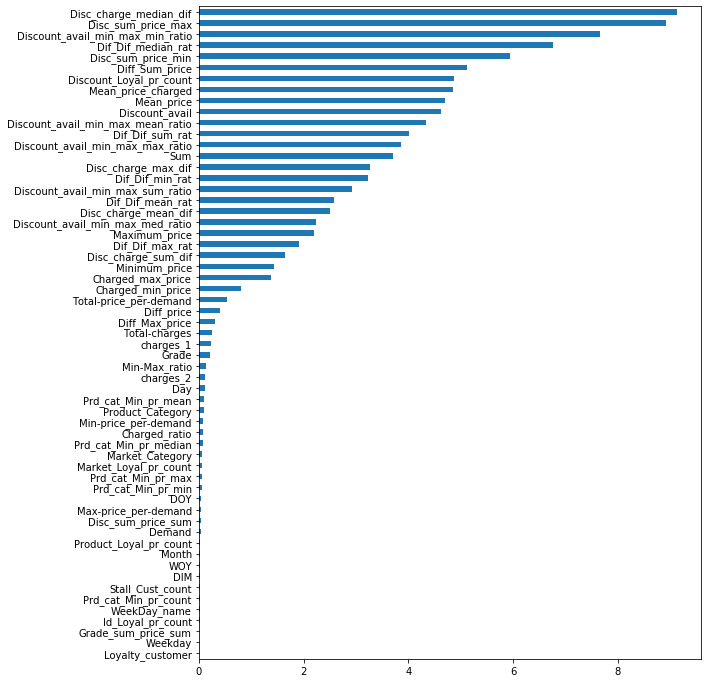

In [1906]:
plt.figure(figsize=(9,12))
result3 = np.exp(model(ExtraTreesRegressor(n_estimators=8000,random_state=seed,n_jobs=-1),train,label,test,9,seed))
result4 = np.exp(model(cat.CatBoostRegressor(n_estimators=10000,random_state=seed),train,label,test,9,seed))

In [1907]:
result3.head()

0             1             2             3             4  \
0   3298.197833   3295.163031   3293.877952   3291.102710   3297.753100   
1   1929.567813   1937.681480   1929.654098   1929.856282   1924.633675   
2  11828.956113  11836.414335  11809.694045  11799.592389  11824.955566   
3   9460.604192   9500.285777   9466.841973   9468.000383   9484.128686   
4   5700.433415   5704.518881   5691.083986   5704.769475   5702.767536   

              5             6             7             8  
0   3287.264734   3295.923219   3293.276341   3297.262866  
1   1938.812131   1922.731098   1928.195025   1921.332986  
2  11829.414369  11712.437740  11789.372046  11809.680268  
3   9476.706843   9471.065425   9465.716348   9463.290634  
4   5693.544615   5672.276272   5714.818231   5727.076530

In [1908]:
result4.head()

0             1             2             3             4  \
0   3268.533363   3267.554522   3278.493381   3265.650114   3277.370024   
1   1925.336446   1957.764308   1935.931006   1943.181758   1944.336544   
2  11958.930247  11906.878057  11990.977230  11939.534571  11841.312196   
3   9430.153776   9494.033155   9461.729793   9431.747745   9510.859677   
4   5780.424083   5748.332576   5752.878707   5762.290875   5735.721950   

              5             6             7             8  
0   3284.094332   3275.681651   3271.946245   3272.804983  
1   1927.607516   1921.668653   1943.864337   1952.680136  
2  11914.136972  12013.760928  11912.198635  11897.116383  
3   9426.148396   9485.827810   9432.252998   9402.981697  
4   5782.696938   5792.637140   5757.081645   5728.492649

In [1909]:
result31 = np.mean(result3,axis=1)

In [1910]:
result1 = (0.7*result4[3]) + (0.3*result31)

In [1898]:
result1 = np.mean(result3,axis=1)

In [1911]:
result1.head()

0     3274.282472
1     1938.976050
2    11899.024762
3     9444.111430
4     5743.979910
dtype: float64

In [1912]:
sample.head()

Product_id  Selling_Price
0  SCHE4YSTDVPVZVXW    3294.594688
1  ACCEGCATKHNRXUHW    1945.603968
2  NKCE6GJ5XVJDXNNZ   11871.830880
3  NKCEB8BK3ZXDHDHM    9421.143424
4  TOPEFDXSAHRNPF94    5717.420625

In [1913]:
final = pd.DataFrame(index = range(len(z)),columns=['Product_id','Selling_Price'])

In [1920]:
final.Product_id = z
final.Selling_Price = result1

In [1921]:
final

Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3274.282472
1     ACCEGCATKHNRXUHW    1938.976050
2     NKCE6GJ5XVJDXNNZ   11899.024762
3     NKCEB8BK3ZXDHDHM    9444.111430
4     TOPEFDXSAHRNPF94    5743.979910
5     ACCE558KZHEPZYMG    9594.371528
6     ACCEAZCVAMFHDPY7    5245.017916
7     NKCDYNY37JPBGBVM    2546.264745
8     NKCEY8KWY33FCUYD    7499.593397
9     RNGE4YPTQYRECV9J    4574.796491
10    NKCE88AHBHJZREXH    3896.938887
11    CLTEJ5ZZGBP4JGGE    7894.776387
12    WATE3NWH5FZWAMDA    8196.956251
13    CAGE53FSFZVFPFHQ    1723.854892
14    PCSEAKVBFFPGCHNZ    3804.785793
15    WATDFFH3KJYBTYGG    7387.558128
16    NKCDWHFQSCHHYZMP    2732.416376
17    RNGEB2PG3Q5RKDW6    3473.105796
18    NKCE5UY9HHPZGGUZ    4448.990511
19    KTAEHETW3ZCMFMJR    4085.852329
20    BRAEBBYRVF9MHJHU    7805.715841
21    NKCEAX7HAQ2RJA3Q   10287.247292
22    CRTECN2RQZWBSP9W    5003.180979
23    WATDEWZ9UHSEHGZG    9581.420837
24    PTPEYW8HNV6G9YYR    2846.718678
25    ACCEAMGZRRYVAHDC    5102.308684
26    SRTEHHXG8MUXTGPA    5981.188661
27    SKIE4S4NN4MHYM3Z    5018.760342
28    HMBE7G34YHWPWKYN    7231.032673
29    LLIEGTMFJBD7ZZZM   13889.998790
30    ACCEJGH6JVTM4CBH     876.589497
31    ACCDQDYBXJ9HZF37   10005.065330
32    RNGE88FRGZCXNKUG     618.390847
33    NKCE7M3QNNPZDXHQ   10208.214580
34    VLBEGFFDP9H6WG2T    3544.431237
35    TOPEAFG4YEQSH5TT    2413.479161
36    WATEYAP3K2QQQWDH    5352.881955
37    PCSEBDFUFJWGARNX   10665.116889
38    SWTEGXQFZY95SKG7    4867.856313
39    BRAEGJFXSM9ZQ6SK    6633.607486
40    CAGE6FYKP34GA4GF    7462.878955
41    HMBEJCMH78VJF3M8    4384.797786
42    HIFEB7J3GSTVN5XJ   10754.308509
43    PBXE6ZHNGZREWWHR    4662.340735
44    PCSEAKVBNXFGZBKB    6778.746941
45    BRAEBBMQQNZ9RZWR    5779.081669
46    ACCEGKFCXHZZH44S     740.192017
47    SHODXQRRGKZ74U9M    4252.444381
48    DREE2Y6DVEKVVQQS    4482.178370
49    PBXE8ZHHG5Y525BT    6858.692400
50    CTTEH9FXZHGFKUA3    8071.122349
51    ACCDXFZXGQTBTM6N    3576.189766
52    NKCE9PFF3TT4KSQJ    7930.802960
53    BRAE6NZAZK77HXZK     858.897271
54    NKCE4TV42BHDP63U    3411.469586
55    AIREDGGD9RJPZGYW    5619.436197
56    PCSEDAPMHR2HNHWP    8338.262929
57    PACE95FMAFXHZB5C    4495.747793
58    WATDG4KP445AV5XC   13765.339748
59    ACCE9EYRRNZYZUBG     457.500203
60    ACCE8XZMAHNC8JVS     640.348859
61    SHOED5DCSTQKZCGF    3462.000601
62    NKCE64Z4NGBHNAY7    3525.961164
63    PBXE8WQTZ5GA2YYQ     749.038100
64    MUGEGZUMGYAPVSZH    4641.853188
65    PBXE4RB3Y3GXWPFV     722.314122
66    PCSE2ZFDJJGFNHC7     700.148646
67    CRTECN2QT5HKHZ8F    4833.334750
68    MUGEACY8Q7ZYSTN8    1568.112648
69    ACCEGG9VGRMQGHRD    7314.465462
70    PCSE76X48PVSDDVK    1007.744100
71    PBXE6677X2D6UFZZ    5718.431068
72    WCKEGGGD2TXHHTJC     322.670782
73    NKCE7MMGF4PPGNA6    2869.673263
74    CRTECN2QYTPHK5YQ    4977.753196
75    OIDEJFCWMMR6JQBE    5643.010322
76    WATE5HFY4MJX6CHD    5431.030752
77    DREE4FC4TAR8M5GN    1434.039469
78    HACEGPF9DZVUZBFY    8176.794719
79    PBXE4Q7YF5KUYJYW   11672.840603
80    SHIED9YEH65NSA8N   10424.219354
81    WATDHMQJ68MVBRFV   13478.793205
82    HMBEGWTFEV4TF2RH    3234.364603
83    SHIE2FH7YTVDHFGT    3056.756088
84    CRTECN2QYRY2KWZF    4320.895024
85    TSHEDJXPN4HNT2UP    6081.855890
86    SHOECZH5WGBZHZES    2635.635891
87    NKCEDCT9MSAYG6H5    5326.929669
88    SOCEGGVYBTZPKXVP    4673.797923
89    PBXECARAQBCDSAZW    3426.604974
90    CAGDU85YDHP9ZJH7    2333.629486
91    TCVEHSMFEGNCAGYN    5108.148607
92    RNGEDAPFZ2GKRUER     864.558639
93    CAGDY9Q7HSNDHGFC    3703.891632
94    NKCECKHYZVHBQU9F     477.700717
95    NKCDQSVCRH8W73GF    6565.293376
96    WATD9H76RKGUUZHY   14178.097593
97    NKCE5HYVDQVATMKF    2015.042814
98    RNGE9GWMKVHGEYZG    4229.150691
99    SHOEAGUMMWFABHUT    3346.224745
100   SWDEGZMPYQGNEBHG    5068.008406
101   TOPEFDXSHZPHCUAU    9342.195893
102   CAGDU85Y85GDJGUD    1124.207310
103   CAGE4BQXK3FSTRRS    3247.218614
104   CAGDZVGTV3SMMMBY

In [1922]:
final.to_csv('multi_model_cat12.csv',index=False)